In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import random
from scipy.stats import ks_2samp
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
def roundR(x, r):
    return [np.round(i,r) for i in np.array(x)]

In [4]:
def update_weights(model_weights):
  for i in range(len(model_weights)):
    for j in range(len(model_weights[i])):
      if isinstance(model_weights[i][j], np.ndarray):
        for k in range(len(model_weights[i][j])):
          #print("chalra h", i, j, k)
            if (np.round(model_weights[i][j][k],2)==0):
                model_weights[i][j][k]=float(f'{model_weights[i][j][k]:.1g}')
            else:
                model_weights[i][j][k]=np.round(model_weights[i][j][k],2)
      else:
        if (np.round(model_weights[i][j],2)==0):
          model_weights[i][j]=float(f'{model_weights[i][j]:.1g}')
        else:
          model_weights[i][j]=np.round(model_weights[i][j],2)
  return model_weights

In [5]:
def node_comparison1(node1, node2, epsilon=0.05):
  for x, y in zip(node1,node2):
    #print(x,y)
    if isinstance(x, list):
        if((np.linalg.norm(np.array(x)-np.array(y))/len(x))<=epsilon):
            continue
        else:
            return False
    else:
        if(abs(x-y)<=epsilon):
            continue
        else:
            return False
  return True

In [6]:
def node_comparison(node1, node2):
  for x, y in zip(node1,node2):
    #print(x,y)
    if isinstance(x, list):
        if(sorted(x)==sorted(y)):
            continue
        else:
            return False
    else:
        if(x==y):
            continue
        else:
            return False
  return True

In [7]:
def layer_comparison(layer1, layer2):
  for node1 in layer1:
    present=False
    for node2 in layer2:
      if (node_comparison1(node1, node2)):
        present=True
    if present==False:
      return False
  return True

In [8]:
def check_models(Model_weights1, Model_weights2):
  for i in range(0,len(Model_weights1), 2):
    layer1=[]
    layer2=[]
    for j in range(len(Model_weights1[i+1].T)):
      Node1=[]
      Node2=[]
      Node1.append(list(Model_weights1[i].T[j]))
      Node1.append(Model_weights1[i+1][j])
      if (i+2<len(Model_weights1)):
        Node1.append(list(Model_weights1[i+2][j]))
      Node2.append(list(Model_weights2[i].T[j]))
      Node2.append(Model_weights2[i+1][j])
      if (i+2<len(Model_weights2)):
        Node2.append(list(Model_weights2[i+2][j]))
      layer1.append(Node1)
      layer2.append(Node2)
    if (layer_comparison(layer1, layer2)):
      continue
    else:
      return False
  return True

In [9]:
def get_initial_model(inp, out):
    model = tf.keras.Sequential([
        Dense(5, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(out, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
def get_initial_model_2(inp, out):
    model = tf.keras.Sequential([
        Dense(1024, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(out, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
def get_initial_model_3(inp, out):
    model = tf.keras.Sequential([
        Dense(10, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(20, activation='relu'),
        Dense(10, activation='relu'),
        Dense(out, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
def get_initial_model_4(inp, out):
    model = tf.keras.Sequential([
        Dense(5, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(10, activation='relu'),
        Dense(20, activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(out, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
def get_DP_initial_model(inp, out):
    model=tf.keras.Sequential([
        Dense(5, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(out, activation='softmax')
        ])
    return model

In [14]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            for k in range(len(avg_sum[j])):
                avg_sum[j][k]=[avg_sum[j][k][l]+models_weights[i][j][k][l] for l in range(len(avg_sum[j][k]))]
            #print(isinstance(avg_sum[j], np.ndarray))
            #else: gayab kr diya
            print('andr aara h')
            for k in range(len(avg_sum[j+1])):
                avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [15]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights_2(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model_2(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            for k in range(len(avg_sum[j])):
                avg_sum[j][k]=[avg_sum[j][k][l]+models_weights[i][j][k][l] for l in range(len(avg_sum[j][k]))]
            #print(isinstance(avg_sum[j], np.ndarray))
            #else: gayab kr diya
            print('andr aara h')
            for k in range(len(avg_sum[j+1])):
                avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [16]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights_3(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model_3(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            for k in range(len(avg_sum[j])):
                avg_sum[j][k]=[avg_sum[j][k][l]+models_weights[i][j][k][l] for l in range(len(avg_sum[j][k]))]
            #print(isinstance(avg_sum[j], np.ndarray))
            #else: gayab kr diya
            print('andr aara h')
            for k in range(len(avg_sum[j+1])):
                avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [17]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights_4(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model_4(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            for k in range(len(avg_sum[j])):
                avg_sum[j][k]=[avg_sum[j][k][l]+models_weights[i][j][k][l] for l in range(len(avg_sum[j][k]))]
            #print(isinstance(avg_sum[j], np.ndarray))
            #else: gayab kr diya
            print('andr aara h')
            for k in range(len(avg_sum[j+1])):
                avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [18]:
# custom functions for f1, precision and recall

from keras import backend as K
from keras.utils import to_categorical

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [12]:
#for SKIN_NonSkin dataset
dataset = pd.read_csv("SUSY.csv",sep=',', header=None)
dataset.round(3)
#print(dataset['label'])
scaler = preprocessing.MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
target_variable=0
print(dataset.head)
Positive=dataset[dataset[target_variable]==0.0]
Negative=dataset[dataset[target_variable]==1.0]
print(len(Positive))
print(len(Negative))

<bound method NDFrame.head of           0         1         2         3         4         5         6   \
0        0.0  0.035371  0.655669  0.838999  0.022344  0.077551  0.247887   
1        1.0  0.069615  0.515424  0.146879  0.002377  0.417663  0.982085   
2        1.0  0.009358  0.468216  0.295368  0.000709  0.108141  0.278343   
3        1.0  0.006226  0.267992  0.699770  0.000625  0.716446  0.304672   
4        1.0  0.051980  0.336027  0.305084  0.035597  0.331627  0.679500   
...      ...       ...       ...       ...       ...       ...       ...   
4999995  1.0  0.029482  0.271408  0.071337  0.007655  0.619779  0.975001   
4999996  0.0  0.034323  0.533305  0.914125  0.013858  0.414505  0.286360   
4999997  0.0  0.028845  0.837689  0.148726  0.023524  0.911611  0.691276   
4999998  1.0  0.075342  0.301903  0.338566  0.016093  0.332685  0.088204   
4999999  0.0  0.024958  0.661996  0.158108  0.018859  0.423049  0.571100   

               7         8         9         10        11

In [72]:
#the below code is for binary classification since MNSIT is a multi-class low-resolution image dataset. I am updating the code in the next cell.
N=10000
#Positive=Pos
#Negative=Neg
positiveN=int((Positive.shape[0]/dataset.shape[0])*N)
negativeN=int(N-positiveN)
print(positiveN, negativeN)
#target variable
#target_variable="default.payment.next.month"
df1=Positive.sample(positiveN)
Positive.drop(df1.index, inplace=True)
df2=Negative.sample(negativeN)
Negative.drop(df2.index, inplace=True)
test_data=df1.append(df2, ignore_index=True)
test_data=test_data.sample(frac = 1) #This is to shuffel the training and testing data
test_data=test_data.sample(frac = 1)
test_data=test_data.sample(frac = 1)
X_test=test_data.drop(columns=[target_variable])
y_test=to_categorical(test_data[target_variable])

# adding dense layer
initial_model= get_initial_model(X_test.shape[1], 2)
initial_model.set_weights(update_weights(initial_model.get_weights()))
Models=[]
val_acc=[]
train_acc=[]
test_acc=[]
val_loss=[]
train_loss=[]
add_weights=[]
while Positive.empty==False and Negative.empty==False:
  print(positiveN, negativeN)
  df1=Positive.sample(min(positiveN, len(Positive)))
  Positive.drop(df1.index, inplace=True)
  df2=Negative.sample(min(negativeN, len(Negative)))
  Negative.drop(df2.index, inplace=True)
  train_data=df1.append(df2, ignore_index=True)
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
    
  #all models have different initialization
  # define the sequential model
  """initial_model = keras.Sequential()

    # adding dense layer
  initial_model.add(Dense(5, input_dim=X_test.shape[1], kernel_initializer='normal', activation='relu'))
  initial_model.add(Dense(10, activation='relu'))
  initial_model.add(Dense(5, activation='relu'))

    # adding dense layer with softmax activation/output layer
  initial_model.add(Dense(2, activation='softmax'))
  #initial_model.summary()"""
  ann_model=get_initial_model(X_test.shape[1], 2) #same intial weights
  ann_model.set_weights(initial_model.get_weights())
  X_train=train_data.drop(columns=[target_variable])
  #train_data[target_variable]=train_data[target_variable]-1 #only for skin_nonskin dataset
  y_train=to_categorical(train_data[target_variable])
  #print(y_train)
  ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']
  history = ann_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
  print(history.history['f1_m'][-1])
  ann_model.set_weights(update_weights(ann_model.get_weights()))
  pred_test=ann_model.predict(X_test)
  present=False
  for i in range(len(Models)):
    if (check_models(Models[i][0], ann_model.get_weights())):
      print("if any")
      Models[i][1]=Models[i][1]+1
      add_weights[i].append(ann_model.get_weights())
      val_acc[i].append(history.history['val_f1_m'])
      train_acc[i].append(history.history['f1_m'])
      test_acc[i].append(f1_m(y_test, pred_test))
      val_loss[i].append(history.history['val_loss'])
      train_loss[i].append(history.history['loss'])
      present=True
  if present==False:
    Models.append([ann_model.get_weights(), 1])
    add_weights.append([ann_model.get_weights()])
    val_acc.append([history.history['val_f1_m']])
    train_acc.append([history.history['f1_m']])
    test_acc.append([f1_m(y_test, pred_test)])
    val_loss.append([history.history['val_loss']])
    train_loss.append([history.history['loss']])
for i in range(len(Models)):
  print(Models[i][1])
print("All Done")

5424 4576


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


5424 4576
Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5669 - val_loss: 0.6503 - val_f1_m: 0.6329
Epoch 2/10
250/250 [==============================] - 0s 899us/step - loss: 0.6086 - f1_m: 0.6981 - val_loss: 0.5713 - val_f1_m: 0.7232
Epoch 3/10
250/250 [==============================] - 0s 874us/step - loss: 0.5475 - f1_m: 0.7301 - val_loss: 0.5386 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 878us/step - loss: 0.5244 - f1_m: 0.7487 - val_loss: 0.5241 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 822us/step - loss: 0.5125 - f1_m: 0.7546 - val_loss: 0.5143 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 850us/step - loss: 0.5038 - f1_m: 0.7609 - val_loss: 0.5062 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 836us/step - loss: 0.4976 - f1_m: 0.7642 - val_loss: 0.5009 - val_f1_m: 0.7629
Epoch 8/10
250/250 [====================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6781 - f1_m: 0.5577 - val_loss: 0.6505 - val_f1_m: 0.6478
Epoch 2/10
250/250 [==============================] - 0s 865us/step - loss: 0.6176 - f1_m: 0.6866 - val_loss: 0.5787 - val_f1_m: 0.7173
Epoch 3/10
250/250 [==============================] - 0s 849us/step - loss: 0.5572 - f1_m: 0.7264 - val_loss: 0.5332 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 850us/step - loss: 0.5282 - f1_m: 0.7462 - val_loss: 0.5162 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 846us/step - loss: 0.5191 - f1_m: 0.7484 - val_loss: 0.5191 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 881us/step - loss: 0.5118 - f1_m: 0.7556 - val_loss: 0.5025 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 846us/step - loss: 0.5033 - f1_m: 0.7614 - val_loss: 0.4961 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6780 - f1_m: 0.5761 - val_loss: 0.6461 - val_f1_m: 0.6364
Epoch 2/10
250/250 [==============================] - 0s 904us/step - loss: 0.5964 - f1_m: 0.7002 - val_loss: 0.5536 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 880us/step - loss: 0.5465 - f1_m: 0.7269 - val_loss: 0.5278 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 829us/step - loss: 0.5321 - f1_m: 0.7436 - val_loss: 0.5158 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 855us/step - loss: 0.5230 - f1_m: 0.7452 - val_loss: 0.5193 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 875us/step - loss: 0.5190 - f1_m: 0.7491 - val_loss: 0.5017 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 830us/step - loss: 0.5095 - f1_m: 0.7535 - val_loss: 0.4973 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6776 - f1_m: 0.5656 - val_loss: 0.6546 - val_f1_m: 0.6096
Epoch 2/10
250/250 [==============================] - 0s 863us/step - loss: 0.6149 - f1_m: 0.6892 - val_loss: 0.5810 - val_f1_m: 0.7103
Epoch 3/10
250/250 [==============================] - 0s 884us/step - loss: 0.5564 - f1_m: 0.7292 - val_loss: 0.5366 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 861us/step - loss: 0.5269 - f1_m: 0.7436 - val_loss: 0.5214 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 845us/step - loss: 0.5136 - f1_m: 0.7529 - val_loss: 0.5103 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 870us/step - loss: 0.5067 - f1_m: 0.7576 - val_loss: 0.5051 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 835us/step - loss: 0.5001 - f1_m: 0.7597 - val_loss: 0.5009 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6768 - f1_m: 0.5660 - val_loss: 0.6542 - val_f1_m: 0.6310
Epoch 2/10
250/250 [==============================] - 0s 857us/step - loss: 0.6108 - f1_m: 0.6952 - val_loss: 0.5912 - val_f1_m: 0.7202
Epoch 3/10
250/250 [==============================] - 0s 826us/step - loss: 0.5502 - f1_m: 0.7360 - val_loss: 0.5455 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 866us/step - loss: 0.5213 - f1_m: 0.7556 - val_loss: 0.5310 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 812us/step - loss: 0.5096 - f1_m: 0.7572 - val_loss: 0.5230 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 846us/step - loss: 0.5020 - f1_m: 0.7632 - val_loss: 0.5135 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 853us/step - loss: 0.4947 - f1_m: 0.7680 - val_loss: 0.5101 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6761 - f1_m: 0.5669 - val_loss: 0.6544 - val_f1_m: 0.6339
Epoch 2/10
250/250 [==============================] - 0s 900us/step - loss: 0.6098 - f1_m: 0.6935 - val_loss: 0.5849 - val_f1_m: 0.7173
Epoch 3/10
250/250 [==============================] - 0s 924us/step - loss: 0.5465 - f1_m: 0.7400 - val_loss: 0.5457 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 847us/step - loss: 0.5184 - f1_m: 0.7576 - val_loss: 0.5266 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 806us/step - loss: 0.5050 - f1_m: 0.7620 - val_loss: 0.5127 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 791us/step - loss: 0.4940 - f1_m: 0.7674 - val_loss: 0.5036 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 922us/step - loss: 0.4867 - f1_m: 0.7724 - val_loss: 0.4978 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6785 - f1_m: 0.5659 - val_loss: 0.6536 - val_f1_m: 0.6543
Epoch 2/10
250/250 [==============================] - 0s 789us/step - loss: 0.6164 - f1_m: 0.6876 - val_loss: 0.5800 - val_f1_m: 0.7123
Epoch 3/10
250/250 [==============================] - 0s 784us/step - loss: 0.5572 - f1_m: 0.7331 - val_loss: 0.5388 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 783us/step - loss: 0.5305 - f1_m: 0.7445 - val_loss: 0.5237 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 787us/step - loss: 0.5190 - f1_m: 0.7515 - val_loss: 0.5101 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 795us/step - loss: 0.5093 - f1_m: 0.7580 - val_loss: 0.5010 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 776us/step - loss: 0.5017 - f1_m: 0.7674 - val_loss: 0.4960 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6778 - f1_m: 0.5682 - val_loss: 0.6481 - val_f1_m: 0.6726
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.5977 - f1_m: 0.6951 - val_loss: 0.5424 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 794us/step - loss: 0.5437 - f1_m: 0.7310 - val_loss: 0.5124 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 820us/step - loss: 0.5255 - f1_m: 0.7441 - val_loss: 0.4962 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 773us/step - loss: 0.5165 - f1_m: 0.7534 - val_loss: 0.4854 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 771us/step - loss: 0.5095 - f1_m: 0.7544 - val_loss: 0.4785 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 774us/step - loss: 0.5008 - f1_m: 0.7602 - val_loss: 0.4707 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5662 - val_loss: 0.6572 - val_f1_m: 0.6721
Epoch 2/10
250/250 [==============================] - 0s 820us/step - loss: 0.6149 - f1_m: 0.6877 - val_loss: 0.5850 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 800us/step - loss: 0.5551 - f1_m: 0.7350 - val_loss: 0.5417 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 808us/step - loss: 0.5284 - f1_m: 0.7440 - val_loss: 0.5249 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 860us/step - loss: 0.5155 - f1_m: 0.7520 - val_loss: 0.5155 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.5067 - f1_m: 0.7590 - val_loss: 0.5066 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 875us/step - loss: 0.4986 - f1_m: 0.7660 - val_loss: 0.4992 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6771 - f1_m: 0.5634 - val_loss: 0.6492 - val_f1_m: 0.6572
Epoch 2/10
250/250 [==============================] - 0s 956us/step - loss: 0.6136 - f1_m: 0.6901 - val_loss: 0.5749 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5551 - f1_m: 0.7329 - val_loss: 0.5364 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 881us/step - loss: 0.5259 - f1_m: 0.7525 - val_loss: 0.5169 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 840us/step - loss: 0.5116 - f1_m: 0.7614 - val_loss: 0.5141 - val_f1_m: 0.7465
Epoch 6/10
250/250 [==============================] - 0s 827us/step - loss: 0.5029 - f1_m: 0.7662 - val_loss: 0.4995 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 845us/step - loss: 0.4968 - f1_m: 0.7661 - val_loss: 0.4938 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6776 - f1_m: 0.5720 - val_loss: 0.6574 - val_f1_m: 0.6414
Epoch 2/10
250/250 [==============================] - 0s 803us/step - loss: 0.5979 - f1_m: 0.6994 - val_loss: 0.5708 - val_f1_m: 0.7123
Epoch 3/10
250/250 [==============================] - 0s 780us/step - loss: 0.5442 - f1_m: 0.7326 - val_loss: 0.5474 - val_f1_m: 0.7232
Epoch 4/10
250/250 [==============================] - 0s 789us/step - loss: 0.5275 - f1_m: 0.7479 - val_loss: 0.5550 - val_f1_m: 0.7232
Epoch 5/10
250/250 [==============================] - 0s 821us/step - loss: 0.5188 - f1_m: 0.7532 - val_loss: 0.5270 - val_f1_m: 0.7366
Epoch 6/10
250/250 [==============================] - 0s 826us/step - loss: 0.5114 - f1_m: 0.7541 - val_loss: 0.5207 - val_f1_m: 0.7401
Epoch 7/10
250/250 [==============================] - 0s 813us/step - loss: 0.5066 - f1_m: 0.7577 - val_loss: 0.5131 - val_f1_m: 0.7416
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6782 - f1_m: 0.5579 - val_loss: 0.6547 - val_f1_m: 0.6384
Epoch 2/10
250/250 [==============================] - 0s 800us/step - loss: 0.6234 - f1_m: 0.6792 - val_loss: 0.5798 - val_f1_m: 0.7183
Epoch 3/10
250/250 [==============================] - 0s 838us/step - loss: 0.5651 - f1_m: 0.7257 - val_loss: 0.5300 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 788us/step - loss: 0.5364 - f1_m: 0.7427 - val_loss: 0.5118 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 807us/step - loss: 0.5245 - f1_m: 0.7495 - val_loss: 0.5038 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 796us/step - loss: 0.5161 - f1_m: 0.7547 - val_loss: 0.5068 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 797us/step - loss: 0.5109 - f1_m: 0.7587 - val_loss: 0.5009 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6759 - f1_m: 0.5756 - val_loss: 0.6345 - val_f1_m: 0.6538
Epoch 2/10
250/250 [==============================] - 0s 830us/step - loss: 0.5859 - f1_m: 0.7030 - val_loss: 0.5302 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 810us/step - loss: 0.5350 - f1_m: 0.7374 - val_loss: 0.5073 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 807us/step - loss: 0.5186 - f1_m: 0.7511 - val_loss: 0.4979 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 803us/step - loss: 0.5091 - f1_m: 0.7591 - val_loss: 0.4957 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 811us/step - loss: 0.5022 - f1_m: 0.7595 - val_loss: 0.4897 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 812us/step - loss: 0.4988 - f1_m: 0.7659 - val_loss: 0.4747 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6790 - f1_m: 0.5642 - val_loss: 0.6524 - val_f1_m: 0.6910
Epoch 2/10
250/250 [==============================] - 0s 823us/step - loss: 0.5938 - f1_m: 0.7007 - val_loss: 0.5486 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 805us/step - loss: 0.5420 - f1_m: 0.7369 - val_loss: 0.5256 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 808us/step - loss: 0.5258 - f1_m: 0.7464 - val_loss: 0.5204 - val_f1_m: 0.7436
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.5165 - f1_m: 0.7552 - val_loss: 0.5220 - val_f1_m: 0.7480
Epoch 6/10
250/250 [==============================] - 0s 802us/step - loss: 0.5138 - f1_m: 0.7581 - val_loss: 0.5035 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 795us/step - loss: 0.5060 - f1_m: 0.7625 - val_loss: 0.4990 - val_f1_m: 0.7579
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6789 - f1_m: 0.5604 - val_loss: 0.6573 - val_f1_m: 0.6543
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.6208 - f1_m: 0.6851 - val_loss: 0.5830 - val_f1_m: 0.7113
Epoch 3/10
250/250 [==============================] - 0s 799us/step - loss: 0.5614 - f1_m: 0.7364 - val_loss: 0.5388 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 876us/step - loss: 0.5311 - f1_m: 0.7524 - val_loss: 0.5206 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 880us/step - loss: 0.5188 - f1_m: 0.7626 - val_loss: 0.5084 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 874us/step - loss: 0.5094 - f1_m: 0.7690 - val_loss: 0.5003 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 868us/step - loss: 0.5012 - f1_m: 0.7735 - val_loss: 0.4915 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6785 - f1_m: 0.5632 - val_loss: 0.6497 - val_f1_m: 0.6900
Epoch 2/10
250/250 [==============================] - 0s 785us/step - loss: 0.6148 - f1_m: 0.6875 - val_loss: 0.5675 - val_f1_m: 0.7267
Epoch 3/10
250/250 [==============================] - 0s 805us/step - loss: 0.5552 - f1_m: 0.7300 - val_loss: 0.5320 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 801us/step - loss: 0.5293 - f1_m: 0.7464 - val_loss: 0.5280 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 798us/step - loss: 0.5145 - f1_m: 0.7587 - val_loss: 0.5180 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 785us/step - loss: 0.5042 - f1_m: 0.7642 - val_loss: 0.4974 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 795us/step - loss: 0.4969 - f1_m: 0.7682 - val_loss: 0.4907 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6757 - f1_m: 0.5677 - val_loss: 0.6514 - val_f1_m: 0.6538
Epoch 2/10
250/250 [==============================] - 0s 804us/step - loss: 0.6172 - f1_m: 0.6804 - val_loss: 0.5901 - val_f1_m: 0.7049
Epoch 3/10
250/250 [==============================] - 0s 787us/step - loss: 0.5645 - f1_m: 0.7224 - val_loss: 0.5468 - val_f1_m: 0.7312
Epoch 4/10
250/250 [==============================] - 0s 796us/step - loss: 0.5368 - f1_m: 0.7422 - val_loss: 0.5273 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 783us/step - loss: 0.5250 - f1_m: 0.7485 - val_loss: 0.5157 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 785us/step - loss: 0.5158 - f1_m: 0.7546 - val_loss: 0.5171 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 787us/step - loss: 0.5098 - f1_m: 0.7552 - val_loss: 0.5031 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6791 - f1_m: 0.5569 - val_loss: 0.6604 - val_f1_m: 0.6126
Epoch 2/10
250/250 [==============================] - 0s 832us/step - loss: 0.6097 - f1_m: 0.6866 - val_loss: 0.5793 - val_f1_m: 0.7073
Epoch 3/10
250/250 [==============================] - 0s 869us/step - loss: 0.5451 - f1_m: 0.7306 - val_loss: 0.5511 - val_f1_m: 0.7277
Epoch 4/10
250/250 [==============================] - 0s 804us/step - loss: 0.5256 - f1_m: 0.7446 - val_loss: 0.5406 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 838us/step - loss: 0.5166 - f1_m: 0.7505 - val_loss: 0.5374 - val_f1_m: 0.7445
Epoch 6/10
250/250 [==============================] - 0s 799us/step - loss: 0.5111 - f1_m: 0.7536 - val_loss: 0.5320 - val_f1_m: 0.7480
Epoch 7/10
250/250 [==============================] - 0s 779us/step - loss: 0.5045 - f1_m: 0.7556 - val_loss: 0.5292 - val_f1_m: 0.7480
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6789 - f1_m: 0.5524 - val_loss: 0.6575 - val_f1_m: 0.6250
Epoch 2/10
250/250 [==============================] - 0s 774us/step - loss: 0.6253 - f1_m: 0.6771 - val_loss: 0.5824 - val_f1_m: 0.7123
Epoch 3/10
250/250 [==============================] - 0s 780us/step - loss: 0.5715 - f1_m: 0.7211 - val_loss: 0.5380 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 771us/step - loss: 0.5436 - f1_m: 0.7334 - val_loss: 0.5161 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 778us/step - loss: 0.5269 - f1_m: 0.7484 - val_loss: 0.5040 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 773us/step - loss: 0.5169 - f1_m: 0.7550 - val_loss: 0.5012 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 824us/step - loss: 0.5085 - f1_m: 0.7612 - val_loss: 0.4909 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5659 - val_loss: 0.6455 - val_f1_m: 0.6657
Epoch 2/10
250/250 [==============================] - 0s 789us/step - loss: 0.6145 - f1_m: 0.6927 - val_loss: 0.5609 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 799us/step - loss: 0.5505 - f1_m: 0.7396 - val_loss: 0.5167 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 866us/step - loss: 0.5239 - f1_m: 0.7559 - val_loss: 0.5032 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 961us/step - loss: 0.5121 - f1_m: 0.7607 - val_loss: 0.4952 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 990us/step - loss: 0.5060 - f1_m: 0.7637 - val_loss: 0.4951 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 994us/step - loss: 0.4986 - f1_m: 0.7649 - val_loss: 0.4823 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6782 - f1_m: 0.5621 - val_loss: 0.6616 - val_f1_m: 0.6513
Epoch 2/10
250/250 [==============================] - 0s 789us/step - loss: 0.6144 - f1_m: 0.6850 - val_loss: 0.5831 - val_f1_m: 0.6925
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5493 - f1_m: 0.7297 - val_loss: 0.5467 - val_f1_m: 0.7262
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5282 - f1_m: 0.7446 - val_loss: 0.5454 - val_f1_m: 0.7237
Epoch 5/10
250/250 [==============================] - 0s 888us/step - loss: 0.5178 - f1_m: 0.7551 - val_loss: 0.5154 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5083 - f1_m: 0.7612 - val_loss: 0.5098 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 955us/step - loss: 0.5016 - f1_m: 0.7670 - val_loss: 0.5074 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6796 - f1_m: 0.5592 - val_loss: 0.6526 - val_f1_m: 0.6349
Epoch 2/10
250/250 [==============================] - 0s 791us/step - loss: 0.6155 - f1_m: 0.6847 - val_loss: 0.5573 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 782us/step - loss: 0.5438 - f1_m: 0.7357 - val_loss: 0.5263 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 785us/step - loss: 0.5261 - f1_m: 0.7467 - val_loss: 0.5095 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 789us/step - loss: 0.5122 - f1_m: 0.7572 - val_loss: 0.5027 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 780us/step - loss: 0.5032 - f1_m: 0.7646 - val_loss: 0.5038 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 777us/step - loss: 0.5003 - f1_m: 0.7655 - val_loss: 0.4911 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6798 - f1_m: 0.5615 - val_loss: 0.6482 - val_f1_m: 0.6667
Epoch 2/10
250/250 [==============================] - 0s 801us/step - loss: 0.6005 - f1_m: 0.6924 - val_loss: 0.5501 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 843us/step - loss: 0.5401 - f1_m: 0.7351 - val_loss: 0.5119 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 809us/step - loss: 0.5227 - f1_m: 0.7476 - val_loss: 0.4989 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 824us/step - loss: 0.5140 - f1_m: 0.7515 - val_loss: 0.5113 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 793us/step - loss: 0.5037 - f1_m: 0.7584 - val_loss: 0.4842 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 816us/step - loss: 0.4955 - f1_m: 0.7647 - val_loss: 0.4794 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6795 - f1_m: 0.5599 - val_loss: 0.6500 - val_f1_m: 0.6548
Epoch 2/10
250/250 [==============================] - 0s 930us/step - loss: 0.6173 - f1_m: 0.6854 - val_loss: 0.5654 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 956us/step - loss: 0.5570 - f1_m: 0.7265 - val_loss: 0.5217 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5246 - f1_m: 0.7522 - val_loss: 0.4913 - val_f1_m: 0.7763
Epoch 5/10
250/250 [==============================] - 0s 919us/step - loss: 0.5112 - f1_m: 0.7577 - val_loss: 0.4924 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 901us/step - loss: 0.4988 - f1_m: 0.7670 - val_loss: 0.4785 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 906us/step - loss: 0.4884 - f1_m: 0.7724 - val_loss: 0.4624 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6724 - f1_m: 0.5775 - val_loss: 0.6281 - val_f1_m: 0.6711
Epoch 2/10
250/250 [==============================] - 0s 846us/step - loss: 0.5824 - f1_m: 0.7092 - val_loss: 0.5518 - val_f1_m: 0.7212
Epoch 3/10
250/250 [==============================] - 0s 830us/step - loss: 0.5397 - f1_m: 0.7380 - val_loss: 0.5345 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 830us/step - loss: 0.5234 - f1_m: 0.7471 - val_loss: 0.5228 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 865us/step - loss: 0.5150 - f1_m: 0.7524 - val_loss: 0.5162 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 857us/step - loss: 0.5063 - f1_m: 0.7586 - val_loss: 0.5131 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 855us/step - loss: 0.4992 - f1_m: 0.7637 - val_loss: 0.5049 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6791 - f1_m: 0.5564 - val_loss: 0.6539 - val_f1_m: 0.6146
Epoch 2/10
250/250 [==============================] - 0s 869us/step - loss: 0.5911 - f1_m: 0.7057 - val_loss: 0.5464 - val_f1_m: 0.7371
Epoch 3/10
250/250 [==============================] - 0s 883us/step - loss: 0.5335 - f1_m: 0.7437 - val_loss: 0.5281 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 848us/step - loss: 0.5196 - f1_m: 0.7545 - val_loss: 0.5242 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 828us/step - loss: 0.5083 - f1_m: 0.7572 - val_loss: 0.5123 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 837us/step - loss: 0.5030 - f1_m: 0.7617 - val_loss: 0.5051 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 849us/step - loss: 0.4930 - f1_m: 0.7687 - val_loss: 0.5014 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6748 - f1_m: 0.5634 - val_loss: 0.6420 - val_f1_m: 0.6379
Epoch 2/10
250/250 [==============================] - 0s 816us/step - loss: 0.6095 - f1_m: 0.6919 - val_loss: 0.5716 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 827us/step - loss: 0.5502 - f1_m: 0.7339 - val_loss: 0.5206 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 839us/step - loss: 0.5258 - f1_m: 0.7490 - val_loss: 0.5028 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 867us/step - loss: 0.5154 - f1_m: 0.7541 - val_loss: 0.4983 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 821us/step - loss: 0.5071 - f1_m: 0.7597 - val_loss: 0.4881 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 916us/step - loss: 0.5005 - f1_m: 0.7644 - val_loss: 0.4832 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6717 - f1_m: 0.5756 - val_loss: 0.6312 - val_f1_m: 0.6880
Epoch 2/10
250/250 [==============================] - 0s 840us/step - loss: 0.5795 - f1_m: 0.7036 - val_loss: 0.5530 - val_f1_m: 0.7247
Epoch 3/10
250/250 [==============================] - 0s 818us/step - loss: 0.5339 - f1_m: 0.7374 - val_loss: 0.5317 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 919us/step - loss: 0.5211 - f1_m: 0.7464 - val_loss: 0.5180 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 836us/step - loss: 0.5144 - f1_m: 0.7524 - val_loss: 0.5135 - val_f1_m: 0.7445
Epoch 6/10
250/250 [==============================] - 0s 789us/step - loss: 0.5095 - f1_m: 0.7540 - val_loss: 0.5083 - val_f1_m: 0.7495
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.5031 - f1_m: 0.7606 - val_loss: 0.5081 - val_f1_m: 0.7520
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6803 - f1_m: 0.5557 - val_loss: 0.6484 - val_f1_m: 0.6696
Epoch 2/10
250/250 [==============================] - 0s 829us/step - loss: 0.6191 - f1_m: 0.6850 - val_loss: 0.5680 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 809us/step - loss: 0.5544 - f1_m: 0.7271 - val_loss: 0.5378 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 810us/step - loss: 0.5248 - f1_m: 0.7441 - val_loss: 0.5145 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 775us/step - loss: 0.5118 - f1_m: 0.7546 - val_loss: 0.5001 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 769us/step - loss: 0.5028 - f1_m: 0.7579 - val_loss: 0.4871 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 823us/step - loss: 0.4919 - f1_m: 0.7652 - val_loss: 0.4772 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6776 - f1_m: 0.5582 - val_loss: 0.6626 - val_f1_m: 0.5878
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.6179 - f1_m: 0.6821 - val_loss: 0.6032 - val_f1_m: 0.6875
Epoch 3/10
250/250 [==============================] - 0s 814us/step - loss: 0.5483 - f1_m: 0.7319 - val_loss: 0.5375 - val_f1_m: 0.7396
Epoch 4/10
250/250 [==============================] - 0s 786us/step - loss: 0.5195 - f1_m: 0.7497 - val_loss: 0.5267 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 769us/step - loss: 0.5086 - f1_m: 0.7579 - val_loss: 0.5076 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 771us/step - loss: 0.5003 - f1_m: 0.7641 - val_loss: 0.5002 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 793us/step - loss: 0.4918 - f1_m: 0.7696 - val_loss: 0.4894 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6788 - f1_m: 0.5590 - val_loss: 0.6554 - val_f1_m: 0.6225
Epoch 2/10
250/250 [==============================] - 0s 868us/step - loss: 0.6058 - f1_m: 0.6910 - val_loss: 0.5571 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 775us/step - loss: 0.5444 - f1_m: 0.7341 - val_loss: 0.5202 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 963us/step - loss: 0.5263 - f1_m: 0.7504 - val_loss: 0.5048 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 860us/step - loss: 0.5177 - f1_m: 0.7560 - val_loss: 0.5118 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 866us/step - loss: 0.5102 - f1_m: 0.7600 - val_loss: 0.4919 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 862us/step - loss: 0.5030 - f1_m: 0.7622 - val_loss: 0.4865 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6795 - f1_m: 0.5595 - val_loss: 0.6566 - val_f1_m: 0.6548
Epoch 2/10
250/250 [==============================] - 0s 787us/step - loss: 0.6249 - f1_m: 0.6831 - val_loss: 0.5850 - val_f1_m: 0.7207
Epoch 3/10
250/250 [==============================] - 0s 772us/step - loss: 0.5728 - f1_m: 0.7205 - val_loss: 0.5457 - val_f1_m: 0.7361
Epoch 4/10
250/250 [==============================] - 0s 810us/step - loss: 0.5465 - f1_m: 0.7359 - val_loss: 0.5341 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 810us/step - loss: 0.5327 - f1_m: 0.7441 - val_loss: 0.5124 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 864us/step - loss: 0.5245 - f1_m: 0.7501 - val_loss: 0.5097 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 840us/step - loss: 0.5151 - f1_m: 0.7539 - val_loss: 0.4956 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6781 - f1_m: 0.5600 - val_loss: 0.6520 - val_f1_m: 0.6409
Epoch 2/10
250/250 [==============================] - 0s 788us/step - loss: 0.6186 - f1_m: 0.6847 - val_loss: 0.5708 - val_f1_m: 0.7192
Epoch 3/10
250/250 [==============================] - 0s 774us/step - loss: 0.5620 - f1_m: 0.7274 - val_loss: 0.5373 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 854us/step - loss: 0.5350 - f1_m: 0.7446 - val_loss: 0.5166 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 807us/step - loss: 0.5224 - f1_m: 0.7511 - val_loss: 0.5061 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 797us/step - loss: 0.5117 - f1_m: 0.7555 - val_loss: 0.4913 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 877us/step - loss: 0.5037 - f1_m: 0.7631 - val_loss: 0.4899 - val_f1_m: 0.7579
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6778 - f1_m: 0.5601 - val_loss: 0.6575 - val_f1_m: 0.6071
Epoch 2/10
250/250 [==============================] - 0s 786us/step - loss: 0.6180 - f1_m: 0.6855 - val_loss: 0.5795 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 789us/step - loss: 0.5593 - f1_m: 0.7307 - val_loss: 0.5309 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 772us/step - loss: 0.5321 - f1_m: 0.7446 - val_loss: 0.5088 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 776us/step - loss: 0.5161 - f1_m: 0.7545 - val_loss: 0.4948 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 832us/step - loss: 0.5075 - f1_m: 0.7619 - val_loss: 0.4869 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 819us/step - loss: 0.5015 - f1_m: 0.7655 - val_loss: 0.4825 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6780 - f1_m: 0.5735 - val_loss: 0.6570 - val_f1_m: 0.6310
Epoch 2/10
250/250 [==============================] - 0s 788us/step - loss: 0.6041 - f1_m: 0.6971 - val_loss: 0.5645 - val_f1_m: 0.7093
Epoch 3/10
250/250 [==============================] - 0s 773us/step - loss: 0.5420 - f1_m: 0.7400 - val_loss: 0.5336 - val_f1_m: 0.7297
Epoch 4/10
250/250 [==============================] - 0s 776us/step - loss: 0.5172 - f1_m: 0.7541 - val_loss: 0.5199 - val_f1_m: 0.7465
Epoch 5/10
250/250 [==============================] - 0s 785us/step - loss: 0.5056 - f1_m: 0.7640 - val_loss: 0.5106 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 983us/step - loss: 0.4981 - f1_m: 0.7629 - val_loss: 0.5033 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 811us/step - loss: 0.4924 - f1_m: 0.7670 - val_loss: 0.5112 - val_f1_m: 0.7480
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6771 - f1_m: 0.5602 - val_loss: 0.6555 - val_f1_m: 0.6528
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.6109 - f1_m: 0.6934 - val_loss: 0.5839 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 805us/step - loss: 0.5502 - f1_m: 0.7366 - val_loss: 0.5441 - val_f1_m: 0.7297
Epoch 4/10
250/250 [==============================] - 0s 793us/step - loss: 0.5207 - f1_m: 0.7587 - val_loss: 0.5320 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 786us/step - loss: 0.5051 - f1_m: 0.7666 - val_loss: 0.5141 - val_f1_m: 0.7455
Epoch 6/10
250/250 [==============================] - 0s 796us/step - loss: 0.4970 - f1_m: 0.7669 - val_loss: 0.5055 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 790us/step - loss: 0.4854 - f1_m: 0.7727 - val_loss: 0.4989 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6779 - f1_m: 0.5629 - val_loss: 0.6546 - val_f1_m: 0.6508
Epoch 2/10
250/250 [==============================] - 0s 832us/step - loss: 0.6157 - f1_m: 0.6854 - val_loss: 0.5837 - val_f1_m: 0.7113
Epoch 3/10
250/250 [==============================] - 0s 899us/step - loss: 0.5580 - f1_m: 0.7277 - val_loss: 0.5369 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 996us/step - loss: 0.5324 - f1_m: 0.7415 - val_loss: 0.5261 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 783us/step - loss: 0.5180 - f1_m: 0.7511 - val_loss: 0.5101 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.5093 - f1_m: 0.7566 - val_loss: 0.4989 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 830us/step - loss: 0.5030 - f1_m: 0.7630 - val_loss: 0.4949 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6771 - f1_m: 0.5765 - val_loss: 0.6510 - val_f1_m: 0.6394
Epoch 2/10
250/250 [==============================] - 0s 774us/step - loss: 0.6156 - f1_m: 0.6899 - val_loss: 0.5781 - val_f1_m: 0.7197
Epoch 3/10
250/250 [==============================] - 0s 774us/step - loss: 0.5577 - f1_m: 0.7324 - val_loss: 0.5430 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 798us/step - loss: 0.5263 - f1_m: 0.7509 - val_loss: 0.5242 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 766us/step - loss: 0.5136 - f1_m: 0.7597 - val_loss: 0.5152 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 771us/step - loss: 0.5052 - f1_m: 0.7641 - val_loss: 0.5153 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 768us/step - loss: 0.4980 - f1_m: 0.7717 - val_loss: 0.5042 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6784 - f1_m: 0.5645 - val_loss: 0.6614 - val_f1_m: 0.5962
Epoch 2/10
250/250 [==============================] - 0s 873us/step - loss: 0.6158 - f1_m: 0.6845 - val_loss: 0.5852 - val_f1_m: 0.7113
Epoch 3/10
250/250 [==============================] - 0s 780us/step - loss: 0.5550 - f1_m: 0.7319 - val_loss: 0.5384 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 769us/step - loss: 0.5235 - f1_m: 0.7496 - val_loss: 0.5196 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 834us/step - loss: 0.5096 - f1_m: 0.7572 - val_loss: 0.5070 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 833us/step - loss: 0.5006 - f1_m: 0.7644 - val_loss: 0.5090 - val_f1_m: 0.7500
Epoch 7/10
250/250 [==============================] - 0s 832us/step - loss: 0.4933 - f1_m: 0.7702 - val_loss: 0.4908 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6783 - f1_m: 0.5629 - val_loss: 0.6506 - val_f1_m: 0.6820
Epoch 2/10
250/250 [==============================] - 0s 780us/step - loss: 0.6203 - f1_m: 0.6805 - val_loss: 0.5721 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 775us/step - loss: 0.5644 - f1_m: 0.7269 - val_loss: 0.5323 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 764us/step - loss: 0.5373 - f1_m: 0.7436 - val_loss: 0.5113 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 917us/step - loss: 0.5203 - f1_m: 0.7545 - val_loss: 0.5018 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5105 - f1_m: 0.7629 - val_loss: 0.4962 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5025 - f1_m: 0.7649 - val_loss: 0.4929 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6764 - f1_m: 0.5644 - val_loss: 0.6483 - val_f1_m: 0.6756
Epoch 2/10
250/250 [==============================] - 0s 843us/step - loss: 0.5921 - f1_m: 0.7022 - val_loss: 0.5492 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.5408 - f1_m: 0.7375 - val_loss: 0.5251 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 976us/step - loss: 0.5250 - f1_m: 0.7496 - val_loss: 0.5145 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5155 - f1_m: 0.7587 - val_loss: 0.5148 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 969us/step - loss: 0.5089 - f1_m: 0.7585 - val_loss: 0.5027 - val_f1_m: 0.7510
Epoch 7/10
250/250 [==============================] - 0s 929us/step - loss: 0.5037 - f1_m: 0.7650 - val_loss: 0.4955 - val_f1_m: 0.7540
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6780 - f1_m: 0.5566 - val_loss: 0.6529 - val_f1_m: 0.6548
Epoch 2/10
250/250 [==============================] - 0s 891us/step - loss: 0.5931 - f1_m: 0.7047 - val_loss: 0.5603 - val_f1_m: 0.7173
Epoch 3/10
250/250 [==============================] - 0s 812us/step - loss: 0.5327 - f1_m: 0.7352 - val_loss: 0.5143 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 789us/step - loss: 0.5132 - f1_m: 0.7554 - val_loss: 0.5090 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 786us/step - loss: 0.5040 - f1_m: 0.7571 - val_loss: 0.4939 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 812us/step - loss: 0.4955 - f1_m: 0.7665 - val_loss: 0.4872 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 883us/step - loss: 0.4889 - f1_m: 0.7697 - val_loss: 0.4821 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6803 - f1_m: 0.5642 - val_loss: 0.6602 - val_f1_m: 0.6305
Epoch 2/10
250/250 [==============================] - 0s 768us/step - loss: 0.6121 - f1_m: 0.6824 - val_loss: 0.5584 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 805us/step - loss: 0.5487 - f1_m: 0.7299 - val_loss: 0.5210 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 803us/step - loss: 0.5296 - f1_m: 0.7410 - val_loss: 0.5081 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 763us/step - loss: 0.5208 - f1_m: 0.7520 - val_loss: 0.5009 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 766us/step - loss: 0.5134 - f1_m: 0.7552 - val_loss: 0.4967 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 919us/step - loss: 0.5108 - f1_m: 0.7587 - val_loss: 0.4903 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6780 - f1_m: 0.5686 - val_loss: 0.6481 - val_f1_m: 0.6786
Epoch 2/10
250/250 [==============================] - 0s 852us/step - loss: 0.5918 - f1_m: 0.7065 - val_loss: 0.5486 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 832us/step - loss: 0.5347 - f1_m: 0.7376 - val_loss: 0.5347 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 865us/step - loss: 0.5198 - f1_m: 0.7504 - val_loss: 0.5176 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 829us/step - loss: 0.5086 - f1_m: 0.7591 - val_loss: 0.5059 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 827us/step - loss: 0.4993 - f1_m: 0.7627 - val_loss: 0.5014 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.4947 - f1_m: 0.7691 - val_loss: 0.4965 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6767 - f1_m: 0.5654 - val_loss: 0.6450 - val_f1_m: 0.6771
Epoch 2/10
250/250 [==============================] - 0s 779us/step - loss: 0.6051 - f1_m: 0.6955 - val_loss: 0.5544 - val_f1_m: 0.7227
Epoch 3/10
250/250 [==============================] - 0s 772us/step - loss: 0.5450 - f1_m: 0.7304 - val_loss: 0.5227 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 771us/step - loss: 0.5239 - f1_m: 0.7480 - val_loss: 0.5256 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 962us/step - loss: 0.5151 - f1_m: 0.7520 - val_loss: 0.5095 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 852us/step - loss: 0.5070 - f1_m: 0.7591 - val_loss: 0.5024 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 856us/step - loss: 0.5024 - f1_m: 0.7630 - val_loss: 0.4971 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6806 - f1_m: 0.5584 - val_loss: 0.6568 - val_f1_m: 0.6195
Epoch 2/10
250/250 [==============================] - 0s 828us/step - loss: 0.6265 - f1_m: 0.6812 - val_loss: 0.5790 - val_f1_m: 0.7207
Epoch 3/10
250/250 [==============================] - 0s 785us/step - loss: 0.5637 - f1_m: 0.7285 - val_loss: 0.5336 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.5330 - f1_m: 0.7484 - val_loss: 0.5193 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 800us/step - loss: 0.5171 - f1_m: 0.7536 - val_loss: 0.5118 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 808us/step - loss: 0.5082 - f1_m: 0.7601 - val_loss: 0.5025 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 987us/step - loss: 0.5019 - f1_m: 0.7649 - val_loss: 0.5004 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6784 - f1_m: 0.5576 - val_loss: 0.6552 - val_f1_m: 0.6369
Epoch 2/10
250/250 [==============================] - 0s 874us/step - loss: 0.6142 - f1_m: 0.6905 - val_loss: 0.5599 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 786us/step - loss: 0.5395 - f1_m: 0.7397 - val_loss: 0.5184 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 786us/step - loss: 0.5159 - f1_m: 0.7515 - val_loss: 0.5071 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.5049 - f1_m: 0.7592 - val_loss: 0.5093 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 795us/step - loss: 0.4996 - f1_m: 0.7649 - val_loss: 0.4949 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 773us/step - loss: 0.4915 - f1_m: 0.7691 - val_loss: 0.4877 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6787 - f1_m: 0.5597 - val_loss: 0.6550 - val_f1_m: 0.6305
Epoch 2/10
250/250 [==============================] - 0s 781us/step - loss: 0.6073 - f1_m: 0.6871 - val_loss: 0.5771 - val_f1_m: 0.7029
Epoch 3/10
250/250 [==============================] - 0s 762us/step - loss: 0.5474 - f1_m: 0.7346 - val_loss: 0.5499 - val_f1_m: 0.7262
Epoch 4/10
250/250 [==============================] - 0s 771us/step - loss: 0.5284 - f1_m: 0.7444 - val_loss: 0.5412 - val_f1_m: 0.7312
Epoch 5/10
250/250 [==============================] - 0s 772us/step - loss: 0.5121 - f1_m: 0.7561 - val_loss: 0.5348 - val_f1_m: 0.7341
Epoch 6/10
250/250 [==============================] - 0s 773us/step - loss: 0.5032 - f1_m: 0.7637 - val_loss: 0.5347 - val_f1_m: 0.7351
Epoch 7/10
250/250 [==============================] - 0s 782us/step - loss: 0.4969 - f1_m: 0.7634 - val_loss: 0.5225 - val_f1_m: 0.7470
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6796 - f1_m: 0.5675 - val_loss: 0.6562 - val_f1_m: 0.6473
Epoch 2/10
250/250 [==============================] - 0s 806us/step - loss: 0.6085 - f1_m: 0.6894 - val_loss: 0.5560 - val_f1_m: 0.7202
Epoch 3/10
250/250 [==============================] - 0s 907us/step - loss: 0.5430 - f1_m: 0.7342 - val_loss: 0.5283 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5213 - f1_m: 0.7510 - val_loss: 0.5075 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5111 - f1_m: 0.7591 - val_loss: 0.4997 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 907us/step - loss: 0.5014 - f1_m: 0.7631 - val_loss: 0.4914 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 808us/step - loss: 0.4959 - f1_m: 0.7696 - val_loss: 0.4846 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6773 - f1_m: 0.5626 - val_loss: 0.6455 - val_f1_m: 0.6543
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.6129 - f1_m: 0.6905 - val_loss: 0.5610 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 772us/step - loss: 0.5564 - f1_m: 0.7271 - val_loss: 0.5269 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 779us/step - loss: 0.5304 - f1_m: 0.7456 - val_loss: 0.5061 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 779us/step - loss: 0.5159 - f1_m: 0.7541 - val_loss: 0.4972 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 777us/step - loss: 0.5041 - f1_m: 0.7619 - val_loss: 0.4848 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 768us/step - loss: 0.4943 - f1_m: 0.7680 - val_loss: 0.4766 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6786 - f1_m: 0.5656 - val_loss: 0.6493 - val_f1_m: 0.6424
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6120 - f1_m: 0.6909 - val_loss: 0.5705 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 921us/step - loss: 0.5500 - f1_m: 0.7326 - val_loss: 0.5348 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 872us/step - loss: 0.5242 - f1_m: 0.7459 - val_loss: 0.5229 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 822us/step - loss: 0.5141 - f1_m: 0.7541 - val_loss: 0.5208 - val_f1_m: 0.7505
Epoch 6/10
250/250 [==============================] - 0s 828us/step - loss: 0.5055 - f1_m: 0.7540 - val_loss: 0.5268 - val_f1_m: 0.7475
Epoch 7/10
250/250 [==============================] - 0s 839us/step - loss: 0.4997 - f1_m: 0.7637 - val_loss: 0.5050 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6777 - f1_m: 0.5646 - val_loss: 0.6459 - val_f1_m: 0.6721
Epoch 2/10
250/250 [==============================] - 0s 815us/step - loss: 0.5884 - f1_m: 0.7027 - val_loss: 0.5500 - val_f1_m: 0.7292
Epoch 3/10
250/250 [==============================] - 0s 886us/step - loss: 0.5289 - f1_m: 0.7441 - val_loss: 0.5288 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 879us/step - loss: 0.5161 - f1_m: 0.7539 - val_loss: 0.5256 - val_f1_m: 0.7445
Epoch 5/10
250/250 [==============================] - 0s 824us/step - loss: 0.5065 - f1_m: 0.7647 - val_loss: 0.5098 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 792us/step - loss: 0.5028 - f1_m: 0.7666 - val_loss: 0.5040 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 781us/step - loss: 0.4980 - f1_m: 0.7657 - val_loss: 0.5025 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6717 - f1_m: 0.5789 - val_loss: 0.6306 - val_f1_m: 0.6706
Epoch 2/10
250/250 [==============================] - 0s 804us/step - loss: 0.5819 - f1_m: 0.7099 - val_loss: 0.5514 - val_f1_m: 0.7267
Epoch 3/10
250/250 [==============================] - 0s 792us/step - loss: 0.5327 - f1_m: 0.7421 - val_loss: 0.5310 - val_f1_m: 0.7381
Epoch 4/10
250/250 [==============================] - 0s 771us/step - loss: 0.5172 - f1_m: 0.7556 - val_loss: 0.5149 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 792us/step - loss: 0.5085 - f1_m: 0.7585 - val_loss: 0.5082 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.5000 - f1_m: 0.7656 - val_loss: 0.5087 - val_f1_m: 0.7520
Epoch 7/10
250/250 [==============================] - 0s 774us/step - loss: 0.4940 - f1_m: 0.7680 - val_loss: 0.4984 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6765 - f1_m: 0.5626 - val_loss: 0.6576 - val_f1_m: 0.6706
Epoch 2/10
250/250 [==============================] - 0s 788us/step - loss: 0.5995 - f1_m: 0.6985 - val_loss: 0.5799 - val_f1_m: 0.7054
Epoch 3/10
250/250 [==============================] - 0s 808us/step - loss: 0.5336 - f1_m: 0.7424 - val_loss: 0.5456 - val_f1_m: 0.7321
Epoch 4/10
250/250 [==============================] - 0s 777us/step - loss: 0.5128 - f1_m: 0.7544 - val_loss: 0.5317 - val_f1_m: 0.7401
Epoch 5/10
250/250 [==============================] - 0s 818us/step - loss: 0.5020 - f1_m: 0.7616 - val_loss: 0.5252 - val_f1_m: 0.7361
Epoch 6/10
250/250 [==============================] - 0s 818us/step - loss: 0.4941 - f1_m: 0.7640 - val_loss: 0.5373 - val_f1_m: 0.7341
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.4892 - f1_m: 0.7692 - val_loss: 0.5132 - val_f1_m: 0.7475
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6799 - f1_m: 0.5596 - val_loss: 0.6571 - val_f1_m: 0.6741
Epoch 2/10
250/250 [==============================] - 0s 800us/step - loss: 0.6184 - f1_m: 0.6829 - val_loss: 0.5730 - val_f1_m: 0.7187
Epoch 3/10
250/250 [==============================] - 0s 794us/step - loss: 0.5558 - f1_m: 0.7282 - val_loss: 0.5330 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 876us/step - loss: 0.5311 - f1_m: 0.7432 - val_loss: 0.5190 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 803us/step - loss: 0.5195 - f1_m: 0.7490 - val_loss: 0.5090 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 769us/step - loss: 0.5112 - f1_m: 0.7524 - val_loss: 0.5000 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 788us/step - loss: 0.5027 - f1_m: 0.7625 - val_loss: 0.4921 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6781 - f1_m: 0.5602 - val_loss: 0.6542 - val_f1_m: 0.6052
Epoch 2/10
250/250 [==============================] - 0s 846us/step - loss: 0.6219 - f1_m: 0.6832 - val_loss: 0.5734 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 809us/step - loss: 0.5605 - f1_m: 0.7310 - val_loss: 0.5316 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 824us/step - loss: 0.5314 - f1_m: 0.7435 - val_loss: 0.5165 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 934us/step - loss: 0.5213 - f1_m: 0.7521 - val_loss: 0.5040 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 820us/step - loss: 0.5125 - f1_m: 0.7596 - val_loss: 0.5004 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 777us/step - loss: 0.5042 - f1_m: 0.7604 - val_loss: 0.4897 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6764 - f1_m: 0.5687 - val_loss: 0.6478 - val_f1_m: 0.6523
Epoch 2/10
250/250 [==============================] - 0s 787us/step - loss: 0.6042 - f1_m: 0.7030 - val_loss: 0.5669 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 796us/step - loss: 0.5373 - f1_m: 0.7462 - val_loss: 0.5258 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 769us/step - loss: 0.5139 - f1_m: 0.7570 - val_loss: 0.5136 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 773us/step - loss: 0.5036 - f1_m: 0.7635 - val_loss: 0.5025 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 777us/step - loss: 0.4968 - f1_m: 0.7667 - val_loss: 0.4959 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 816us/step - loss: 0.4910 - f1_m: 0.7692 - val_loss: 0.4937 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5687 - val_loss: 0.6398 - val_f1_m: 0.6682
Epoch 2/10
250/250 [==============================] - 0s 877us/step - loss: 0.5880 - f1_m: 0.7135 - val_loss: 0.5421 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 824us/step - loss: 0.5390 - f1_m: 0.7376 - val_loss: 0.5211 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 822us/step - loss: 0.5266 - f1_m: 0.7495 - val_loss: 0.5115 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 849us/step - loss: 0.5186 - f1_m: 0.7526 - val_loss: 0.5090 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 771us/step - loss: 0.5121 - f1_m: 0.7580 - val_loss: 0.4976 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 771us/step - loss: 0.5062 - f1_m: 0.7625 - val_loss: 0.5016 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6713 - f1_m: 0.5900 - val_loss: 0.6303 - val_f1_m: 0.6850
Epoch 2/10
250/250 [==============================] - 0s 793us/step - loss: 0.5700 - f1_m: 0.7232 - val_loss: 0.5612 - val_f1_m: 0.7267
Epoch 3/10
250/250 [==============================] - 0s 784us/step - loss: 0.5278 - f1_m: 0.7477 - val_loss: 0.5395 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 805us/step - loss: 0.5144 - f1_m: 0.7515 - val_loss: 0.5295 - val_f1_m: 0.7381
Epoch 5/10
250/250 [==============================] - 0s 895us/step - loss: 0.5044 - f1_m: 0.7639 - val_loss: 0.5249 - val_f1_m: 0.7436
Epoch 6/10
250/250 [==============================] - 0s 809us/step - loss: 0.5023 - f1_m: 0.7656 - val_loss: 0.5191 - val_f1_m: 0.7490
Epoch 7/10
250/250 [==============================] - 0s 806us/step - loss: 0.4955 - f1_m: 0.7682 - val_loss: 0.5100 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6691 - f1_m: 0.5945 - val_loss: 0.6241 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 823us/step - loss: 0.5710 - f1_m: 0.7136 - val_loss: 0.5572 - val_f1_m: 0.7128
Epoch 3/10
250/250 [==============================] - 0s 880us/step - loss: 0.5291 - f1_m: 0.7447 - val_loss: 0.5436 - val_f1_m: 0.7237
Epoch 4/10
250/250 [==============================] - 0s 812us/step - loss: 0.5154 - f1_m: 0.7496 - val_loss: 0.5346 - val_f1_m: 0.7391
Epoch 5/10
250/250 [==============================] - 0s 846us/step - loss: 0.5062 - f1_m: 0.7571 - val_loss: 0.5336 - val_f1_m: 0.7421
Epoch 6/10
250/250 [==============================] - 0s 804us/step - loss: 0.4999 - f1_m: 0.7622 - val_loss: 0.5208 - val_f1_m: 0.7440
Epoch 7/10
250/250 [==============================] - 0s 805us/step - loss: 0.4937 - f1_m: 0.7660 - val_loss: 0.5222 - val_f1_m: 0.7436
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5717 - val_loss: 0.6559 - val_f1_m: 0.6394
Epoch 2/10
250/250 [==============================] - 0s 966us/step - loss: 0.6204 - f1_m: 0.6824 - val_loss: 0.5941 - val_f1_m: 0.6905
Epoch 3/10
250/250 [==============================] - 0s 803us/step - loss: 0.5667 - f1_m: 0.7196 - val_loss: 0.5568 - val_f1_m: 0.7212
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.5373 - f1_m: 0.7400 - val_loss: 0.5209 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 852us/step - loss: 0.5228 - f1_m: 0.7496 - val_loss: 0.5027 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 779us/step - loss: 0.5093 - f1_m: 0.7589 - val_loss: 0.4972 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 773us/step - loss: 0.4988 - f1_m: 0.7647 - val_loss: 0.4929 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6786 - f1_m: 0.5645 - val_loss: 0.6746 - val_f1_m: 0.5541
Epoch 2/10
250/250 [==============================] - 0s 811us/step - loss: 0.6027 - f1_m: 0.6901 - val_loss: 0.5689 - val_f1_m: 0.7078
Epoch 3/10
250/250 [==============================] - 0s 841us/step - loss: 0.5441 - f1_m: 0.7335 - val_loss: 0.5439 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 987us/step - loss: 0.5240 - f1_m: 0.7525 - val_loss: 0.5380 - val_f1_m: 0.7297
Epoch 5/10
250/250 [==============================] - 0s 941us/step - loss: 0.5142 - f1_m: 0.7549 - val_loss: 0.5333 - val_f1_m: 0.7346
Epoch 6/10
250/250 [==============================] - 0s 863us/step - loss: 0.5045 - f1_m: 0.7599 - val_loss: 0.5135 - val_f1_m: 0.7490
Epoch 7/10
250/250 [==============================] - 0s 904us/step - loss: 0.4964 - f1_m: 0.7666 - val_loss: 0.5024 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6755 - f1_m: 0.5697 - val_loss: 0.6344 - val_f1_m: 0.6900
Epoch 2/10
250/250 [==============================] - 0s 775us/step - loss: 0.5825 - f1_m: 0.7147 - val_loss: 0.5399 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 809us/step - loss: 0.5352 - f1_m: 0.7399 - val_loss: 0.5203 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 770us/step - loss: 0.5199 - f1_m: 0.7515 - val_loss: 0.5131 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 772us/step - loss: 0.5143 - f1_m: 0.7524 - val_loss: 0.5016 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 829us/step - loss: 0.5033 - f1_m: 0.7586 - val_loss: 0.4986 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 812us/step - loss: 0.4984 - f1_m: 0.7619 - val_loss: 0.4882 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.5650 - val_loss: 0.6519 - val_f1_m: 0.6711
Epoch 2/10
250/250 [==============================] - 0s 831us/step - loss: 0.6108 - f1_m: 0.6924 - val_loss: 0.5763 - val_f1_m: 0.7148
Epoch 3/10
250/250 [==============================] - 0s 938us/step - loss: 0.5414 - f1_m: 0.7412 - val_loss: 0.5368 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 882us/step - loss: 0.5092 - f1_m: 0.7605 - val_loss: 0.5228 - val_f1_m: 0.7401
Epoch 5/10
250/250 [==============================] - 0s 849us/step - loss: 0.4956 - f1_m: 0.7660 - val_loss: 0.5219 - val_f1_m: 0.7411
Epoch 6/10
250/250 [==============================] - 0s 885us/step - loss: 0.4863 - f1_m: 0.7760 - val_loss: 0.5066 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 833us/step - loss: 0.4782 - f1_m: 0.7802 - val_loss: 0.5017 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6796 - f1_m: 0.5557 - val_loss: 0.6624 - val_f1_m: 0.5982
Epoch 2/10
250/250 [==============================] - 0s 782us/step - loss: 0.6236 - f1_m: 0.6802 - val_loss: 0.5952 - val_f1_m: 0.7153
Epoch 3/10
250/250 [==============================] - 0s 865us/step - loss: 0.5613 - f1_m: 0.7245 - val_loss: 0.5430 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 782us/step - loss: 0.5325 - f1_m: 0.7395 - val_loss: 0.5256 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 772us/step - loss: 0.5174 - f1_m: 0.7476 - val_loss: 0.5148 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 763us/step - loss: 0.5060 - f1_m: 0.7544 - val_loss: 0.5052 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 772us/step - loss: 0.4982 - f1_m: 0.7585 - val_loss: 0.4983 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5715 - val_loss: 0.6394 - val_f1_m: 0.6582
Epoch 2/10
250/250 [==============================] - 0s 980us/step - loss: 0.5893 - f1_m: 0.7117 - val_loss: 0.5554 - val_f1_m: 0.7187
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5425 - f1_m: 0.7369 - val_loss: 0.5180 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 977us/step - loss: 0.5268 - f1_m: 0.7481 - val_loss: 0.5067 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 973us/step - loss: 0.5187 - f1_m: 0.7557 - val_loss: 0.4985 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 955us/step - loss: 0.5106 - f1_m: 0.7580 - val_loss: 0.4913 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 924us/step - loss: 0.5059 - f1_m: 0.7640 - val_loss: 0.4938 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6783 - f1_m: 0.5600 - val_loss: 0.6547 - val_f1_m: 0.6334
Epoch 2/10
250/250 [==============================] - 0s 838us/step - loss: 0.6196 - f1_m: 0.6874 - val_loss: 0.5869 - val_f1_m: 0.7133
Epoch 3/10
250/250 [==============================] - 0s 850us/step - loss: 0.5673 - f1_m: 0.7216 - val_loss: 0.5502 - val_f1_m: 0.7396
Epoch 4/10
250/250 [==============================] - 0s 830us/step - loss: 0.5415 - f1_m: 0.7367 - val_loss: 0.5336 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 889us/step - loss: 0.5299 - f1_m: 0.7454 - val_loss: 0.5250 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 965us/step - loss: 0.5225 - f1_m: 0.7501 - val_loss: 0.5082 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 959us/step - loss: 0.5157 - f1_m: 0.7532 - val_loss: 0.5033 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6710 - f1_m: 0.5824 - val_loss: 0.6170 - val_f1_m: 0.6885
Epoch 2/10
250/250 [==============================] - 0s 941us/step - loss: 0.5706 - f1_m: 0.7186 - val_loss: 0.5406 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 898us/step - loss: 0.5268 - f1_m: 0.7435 - val_loss: 0.5226 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 848us/step - loss: 0.5128 - f1_m: 0.7547 - val_loss: 0.5370 - val_f1_m: 0.7351
Epoch 5/10
250/250 [==============================] - 0s 959us/step - loss: 0.5045 - f1_m: 0.7617 - val_loss: 0.5099 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 806us/step - loss: 0.4988 - f1_m: 0.7644 - val_loss: 0.5073 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 814us/step - loss: 0.4949 - f1_m: 0.7684 - val_loss: 0.5001 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6783 - f1_m: 0.5609 - val_loss: 0.6679 - val_f1_m: 0.6091
Epoch 2/10
250/250 [==============================] - 0s 845us/step - loss: 0.6233 - f1_m: 0.6766 - val_loss: 0.5771 - val_f1_m: 0.7123
Epoch 3/10
250/250 [==============================] - 0s 854us/step - loss: 0.5494 - f1_m: 0.7311 - val_loss: 0.5264 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 794us/step - loss: 0.5202 - f1_m: 0.7511 - val_loss: 0.5127 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 783us/step - loss: 0.5083 - f1_m: 0.7599 - val_loss: 0.5104 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 814us/step - loss: 0.4998 - f1_m: 0.7616 - val_loss: 0.5205 - val_f1_m: 0.7480
Epoch 7/10
250/250 [==============================] - 0s 789us/step - loss: 0.4931 - f1_m: 0.7630 - val_loss: 0.4937 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6809 - f1_m: 0.5566 - val_loss: 0.6547 - val_f1_m: 0.6314
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.6288 - f1_m: 0.6726 - val_loss: 0.5962 - val_f1_m: 0.7019
Epoch 3/10
250/250 [==============================] - 0s 798us/step - loss: 0.5723 - f1_m: 0.7180 - val_loss: 0.5613 - val_f1_m: 0.7282
Epoch 4/10
250/250 [==============================] - 0s 791us/step - loss: 0.5413 - f1_m: 0.7400 - val_loss: 0.5403 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 793us/step - loss: 0.5285 - f1_m: 0.7474 - val_loss: 0.5267 - val_f1_m: 0.7321
Epoch 6/10
250/250 [==============================] - 0s 817us/step - loss: 0.5204 - f1_m: 0.7552 - val_loss: 0.5184 - val_f1_m: 0.7545
Epoch 7/10
250/250 [==============================] - 0s 796us/step - loss: 0.5119 - f1_m: 0.7597 - val_loss: 0.5104 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6764 - f1_m: 0.5735 - val_loss: 0.6456 - val_f1_m: 0.6498
Epoch 2/10
250/250 [==============================] - 0s 797us/step - loss: 0.5851 - f1_m: 0.7071 - val_loss: 0.5673 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 824us/step - loss: 0.5343 - f1_m: 0.7402 - val_loss: 0.5433 - val_f1_m: 0.7361
Epoch 4/10
250/250 [==============================] - 0s 790us/step - loss: 0.5188 - f1_m: 0.7487 - val_loss: 0.5342 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 781us/step - loss: 0.5075 - f1_m: 0.7585 - val_loss: 0.5267 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5029 - f1_m: 0.7619 - val_loss: 0.5206 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 811us/step - loss: 0.4948 - f1_m: 0.7674 - val_loss: 0.5158 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6711 - f1_m: 0.5832 - val_loss: 0.6304 - val_f1_m: 0.6538
Epoch 2/10
250/250 [==============================] - 0s 915us/step - loss: 0.5744 - f1_m: 0.7131 - val_loss: 0.5478 - val_f1_m: 0.7202
Epoch 3/10
250/250 [==============================] - 0s 900us/step - loss: 0.5297 - f1_m: 0.7415 - val_loss: 0.5273 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 921us/step - loss: 0.5167 - f1_m: 0.7524 - val_loss: 0.5233 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 839us/step - loss: 0.5076 - f1_m: 0.7546 - val_loss: 0.5140 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 874us/step - loss: 0.5016 - f1_m: 0.7592 - val_loss: 0.5020 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 949us/step - loss: 0.4939 - f1_m: 0.7654 - val_loss: 0.5007 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6807 - f1_m: 0.5646 - val_loss: 0.6602 - val_f1_m: 0.6726
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.6110 - f1_m: 0.6857 - val_loss: 0.5597 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 863us/step - loss: 0.5421 - f1_m: 0.7352 - val_loss: 0.5309 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 949us/step - loss: 0.5231 - f1_m: 0.7499 - val_loss: 0.5293 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 953us/step - loss: 0.5110 - f1_m: 0.7592 - val_loss: 0.5147 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 883us/step - loss: 0.5049 - f1_m: 0.7612 - val_loss: 0.5152 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4989 - f1_m: 0.7650 - val_loss: 0.5037 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6765 - f1_m: 0.5680 - val_loss: 0.6520 - val_f1_m: 0.6409
Epoch 2/10
250/250 [==============================] - 0s 818us/step - loss: 0.5957 - f1_m: 0.7015 - val_loss: 0.5455 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 770us/step - loss: 0.5423 - f1_m: 0.7380 - val_loss: 0.5164 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 833us/step - loss: 0.5256 - f1_m: 0.7527 - val_loss: 0.5032 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.5159 - f1_m: 0.7585 - val_loss: 0.5237 - val_f1_m: 0.7396
Epoch 6/10
250/250 [==============================] - 0s 874us/step - loss: 0.5085 - f1_m: 0.7597 - val_loss: 0.4859 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 834us/step - loss: 0.5012 - f1_m: 0.7674 - val_loss: 0.4790 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6789 - f1_m: 0.5644 - val_loss: 0.6535 - val_f1_m: 0.6632
Epoch 2/10
250/250 [==============================] - 0s 778us/step - loss: 0.5966 - f1_m: 0.7054 - val_loss: 0.5604 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 795us/step - loss: 0.5340 - f1_m: 0.7441 - val_loss: 0.5364 - val_f1_m: 0.7316
Epoch 4/10
250/250 [==============================] - 0s 797us/step - loss: 0.5145 - f1_m: 0.7605 - val_loss: 0.5207 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 767us/step - loss: 0.5012 - f1_m: 0.7677 - val_loss: 0.5152 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 811us/step - loss: 0.4937 - f1_m: 0.7696 - val_loss: 0.5025 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 775us/step - loss: 0.4841 - f1_m: 0.7736 - val_loss: 0.4940 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6766 - f1_m: 0.5627 - val_loss: 0.6507 - val_f1_m: 0.6225
Epoch 2/10
250/250 [==============================] - 0s 814us/step - loss: 0.6081 - f1_m: 0.6894 - val_loss: 0.5520 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 790us/step - loss: 0.5450 - f1_m: 0.7341 - val_loss: 0.5055 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 817us/step - loss: 0.5226 - f1_m: 0.7484 - val_loss: 0.4903 - val_f1_m: 0.7768
Epoch 5/10
250/250 [==============================] - 0s 783us/step - loss: 0.5101 - f1_m: 0.7580 - val_loss: 0.4809 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 818us/step - loss: 0.5039 - f1_m: 0.7612 - val_loss: 0.4840 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 802us/step - loss: 0.4947 - f1_m: 0.7669 - val_loss: 0.4688 - val_f1_m: 0.7932
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6758 - f1_m: 0.5642 - val_loss: 0.6501 - val_f1_m: 0.6240
Epoch 2/10
250/250 [==============================] - 0s 827us/step - loss: 0.6093 - f1_m: 0.6872 - val_loss: 0.5611 - val_f1_m: 0.7178
Epoch 3/10
250/250 [==============================] - 0s 804us/step - loss: 0.5426 - f1_m: 0.7362 - val_loss: 0.5167 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 785us/step - loss: 0.5218 - f1_m: 0.7450 - val_loss: 0.5007 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 837us/step - loss: 0.5083 - f1_m: 0.7566 - val_loss: 0.4899 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.4993 - f1_m: 0.7652 - val_loss: 0.4851 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.4910 - f1_m: 0.7694 - val_loss: 0.4779 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.5582 - val_loss: 0.6541 - val_f1_m: 0.6260
Epoch 2/10
250/250 [==============================] - 0s 803us/step - loss: 0.6117 - f1_m: 0.6891 - val_loss: 0.5691 - val_f1_m: 0.7148
Epoch 3/10
250/250 [==============================] - 0s 801us/step - loss: 0.5500 - f1_m: 0.7287 - val_loss: 0.5325 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 794us/step - loss: 0.5289 - f1_m: 0.7416 - val_loss: 0.5174 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 838us/step - loss: 0.5178 - f1_m: 0.7510 - val_loss: 0.5106 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 870us/step - loss: 0.5121 - f1_m: 0.7570 - val_loss: 0.5023 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 866us/step - loss: 0.5085 - f1_m: 0.7620 - val_loss: 0.4947 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5592 - val_loss: 0.6530 - val_f1_m: 0.6687
Epoch 2/10
250/250 [==============================] - 0s 921us/step - loss: 0.6149 - f1_m: 0.6911 - val_loss: 0.5866 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.5584 - f1_m: 0.7260 - val_loss: 0.5406 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 832us/step - loss: 0.5327 - f1_m: 0.7474 - val_loss: 0.5194 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 817us/step - loss: 0.5202 - f1_m: 0.7552 - val_loss: 0.5107 - val_f1_m: 0.7421
Epoch 6/10
250/250 [==============================] - 0s 842us/step - loss: 0.5140 - f1_m: 0.7571 - val_loss: 0.5071 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 876us/step - loss: 0.5079 - f1_m: 0.7589 - val_loss: 0.4967 - val_f1_m: 0.7540
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6747 - f1_m: 0.5704 - val_loss: 0.6470 - val_f1_m: 0.6414
Epoch 2/10
250/250 [==============================] - 0s 824us/step - loss: 0.6074 - f1_m: 0.6920 - val_loss: 0.5720 - val_f1_m: 0.7183
Epoch 3/10
250/250 [==============================] - 0s 837us/step - loss: 0.5537 - f1_m: 0.7262 - val_loss: 0.5364 - val_f1_m: 0.7396
Epoch 4/10
250/250 [==============================] - 0s 804us/step - loss: 0.5304 - f1_m: 0.7435 - val_loss: 0.5240 - val_f1_m: 0.7376
Epoch 5/10
250/250 [==============================] - 0s 777us/step - loss: 0.5175 - f1_m: 0.7531 - val_loss: 0.5113 - val_f1_m: 0.7445
Epoch 6/10
250/250 [==============================] - 0s 824us/step - loss: 0.5062 - f1_m: 0.7610 - val_loss: 0.5049 - val_f1_m: 0.7465
Epoch 7/10
250/250 [==============================] - 0s 847us/step - loss: 0.4966 - f1_m: 0.7677 - val_loss: 0.4950 - val_f1_m: 0.7555
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6742 - f1_m: 0.5616 - val_loss: 0.6535 - val_f1_m: 0.6354
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.6109 - f1_m: 0.6964 - val_loss: 0.5935 - val_f1_m: 0.7029
Epoch 3/10
250/250 [==============================] - 0s 846us/step - loss: 0.5487 - f1_m: 0.7404 - val_loss: 0.5460 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 794us/step - loss: 0.5253 - f1_m: 0.7536 - val_loss: 0.5493 - val_f1_m: 0.7277
Epoch 5/10
250/250 [==============================] - 0s 836us/step - loss: 0.5117 - f1_m: 0.7620 - val_loss: 0.5199 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 945us/step - loss: 0.5018 - f1_m: 0.7684 - val_loss: 0.5144 - val_f1_m: 0.7525
Epoch 7/10
250/250 [==============================] - 0s 883us/step - loss: 0.4975 - f1_m: 0.7695 - val_loss: 0.5093 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6750 - f1_m: 0.5727 - val_loss: 0.6635 - val_f1_m: 0.6141
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.6153 - f1_m: 0.6881 - val_loss: 0.6001 - val_f1_m: 0.6885
Epoch 3/10
250/250 [==============================] - 0s 837us/step - loss: 0.5597 - f1_m: 0.7291 - val_loss: 0.5615 - val_f1_m: 0.7178
Epoch 4/10
250/250 [==============================] - 0s 898us/step - loss: 0.5354 - f1_m: 0.7407 - val_loss: 0.5443 - val_f1_m: 0.7465
Epoch 5/10
250/250 [==============================] - 0s 828us/step - loss: 0.5244 - f1_m: 0.7480 - val_loss: 0.5360 - val_f1_m: 0.7381
Epoch 6/10
250/250 [==============================] - 0s 956us/step - loss: 0.5138 - f1_m: 0.7549 - val_loss: 0.5278 - val_f1_m: 0.7445
Epoch 7/10
250/250 [==============================] - 0s 865us/step - loss: 0.5082 - f1_m: 0.7580 - val_loss: 0.5263 - val_f1_m: 0.7450
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6791 - f1_m: 0.5564 - val_loss: 0.6566 - val_f1_m: 0.6756
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.6012 - f1_m: 0.6915 - val_loss: 0.5619 - val_f1_m: 0.7009
Epoch 3/10
250/250 [==============================] - 0s 779us/step - loss: 0.5359 - f1_m: 0.7391 - val_loss: 0.5399 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 833us/step - loss: 0.5162 - f1_m: 0.7540 - val_loss: 0.5252 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 817us/step - loss: 0.5063 - f1_m: 0.7599 - val_loss: 0.5189 - val_f1_m: 0.7480
Epoch 6/10
250/250 [==============================] - 0s 778us/step - loss: 0.4998 - f1_m: 0.7621 - val_loss: 0.5162 - val_f1_m: 0.7495
Epoch 7/10
250/250 [==============================] - 0s 767us/step - loss: 0.4940 - f1_m: 0.7696 - val_loss: 0.5103 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6779 - f1_m: 0.5620 - val_loss: 0.6546 - val_f1_m: 0.6156
Epoch 2/10
250/250 [==============================] - 0s 838us/step - loss: 0.6188 - f1_m: 0.6876 - val_loss: 0.5888 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 804us/step - loss: 0.5598 - f1_m: 0.7362 - val_loss: 0.5458 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 797us/step - loss: 0.5295 - f1_m: 0.7511 - val_loss: 0.5291 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.5175 - f1_m: 0.7522 - val_loss: 0.5223 - val_f1_m: 0.7510
Epoch 6/10
250/250 [==============================] - 0s 819us/step - loss: 0.5051 - f1_m: 0.7654 - val_loss: 0.5103 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 980us/step - loss: 0.4977 - f1_m: 0.7671 - val_loss: 0.5051 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5646 - val_loss: 0.6521 - val_f1_m: 0.6806
Epoch 2/10
250/250 [==============================] - 0s 859us/step - loss: 0.6152 - f1_m: 0.6921 - val_loss: 0.5752 - val_f1_m: 0.7183
Epoch 3/10
250/250 [==============================] - 0s 806us/step - loss: 0.5597 - f1_m: 0.7229 - val_loss: 0.5335 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 791us/step - loss: 0.5283 - f1_m: 0.7425 - val_loss: 0.5123 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 818us/step - loss: 0.5118 - f1_m: 0.7541 - val_loss: 0.5021 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 807us/step - loss: 0.5039 - f1_m: 0.7575 - val_loss: 0.4818 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 899us/step - loss: 0.4914 - f1_m: 0.7670 - val_loss: 0.4736 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6788 - f1_m: 0.5604 - val_loss: 0.6524 - val_f1_m: 0.6339
Epoch 2/10
250/250 [==============================] - 0s 818us/step - loss: 0.6175 - f1_m: 0.6867 - val_loss: 0.5712 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 948us/step - loss: 0.5524 - f1_m: 0.7310 - val_loss: 0.5210 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 897us/step - loss: 0.5202 - f1_m: 0.7555 - val_loss: 0.5035 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5079 - f1_m: 0.7597 - val_loss: 0.4923 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4973 - f1_m: 0.7666 - val_loss: 0.4856 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4932 - f1_m: 0.7642 - val_loss: 0.4870 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5676 - val_loss: 0.6390 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 0s 820us/step - loss: 0.6103 - f1_m: 0.6947 - val_loss: 0.5511 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5533 - f1_m: 0.7317 - val_loss: 0.5135 - val_f1_m: 0.7679
Epoch 4/10
250/250 [==============================] - 0s 856us/step - loss: 0.5283 - f1_m: 0.7474 - val_loss: 0.5011 - val_f1_m: 0.7768
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5177 - f1_m: 0.7536 - val_loss: 0.4984 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 951us/step - loss: 0.5094 - f1_m: 0.7584 - val_loss: 0.4908 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 894us/step - loss: 0.5023 - f1_m: 0.7682 - val_loss: 0.4827 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5620 - val_loss: 0.6597 - val_f1_m: 0.6334
Epoch 2/10
250/250 [==============================] - 0s 835us/step - loss: 0.6177 - f1_m: 0.6851 - val_loss: 0.5924 - val_f1_m: 0.7118
Epoch 3/10
250/250 [==============================] - 0s 939us/step - loss: 0.5649 - f1_m: 0.7202 - val_loss: 0.5554 - val_f1_m: 0.7302
Epoch 4/10
250/250 [==============================] - 0s 974us/step - loss: 0.5365 - f1_m: 0.7385 - val_loss: 0.5370 - val_f1_m: 0.7381
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5214 - f1_m: 0.7467 - val_loss: 0.5249 - val_f1_m: 0.7480
Epoch 6/10
250/250 [==============================] - 0s 922us/step - loss: 0.5119 - f1_m: 0.7555 - val_loss: 0.5127 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 891us/step - loss: 0.5036 - f1_m: 0.7571 - val_loss: 0.5079 - val_f1_m: 0.7520
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6787 - f1_m: 0.5554 - val_loss: 0.6536 - val_f1_m: 0.6195
Epoch 2/10
250/250 [==============================] - 0s 875us/step - loss: 0.6206 - f1_m: 0.6861 - val_loss: 0.5759 - val_f1_m: 0.7133
Epoch 3/10
250/250 [==============================] - 0s 844us/step - loss: 0.5620 - f1_m: 0.7267 - val_loss: 0.5341 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 794us/step - loss: 0.5324 - f1_m: 0.7437 - val_loss: 0.5190 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 790us/step - loss: 0.5216 - f1_m: 0.7505 - val_loss: 0.5105 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 795us/step - loss: 0.5142 - f1_m: 0.7535 - val_loss: 0.5088 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 784us/step - loss: 0.5082 - f1_m: 0.7579 - val_loss: 0.4997 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6783 - f1_m: 0.5595 - val_loss: 0.6509 - val_f1_m: 0.6359
Epoch 2/10
250/250 [==============================] - 0s 932us/step - loss: 0.5953 - f1_m: 0.6991 - val_loss: 0.5436 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 864us/step - loss: 0.5349 - f1_m: 0.7379 - val_loss: 0.5161 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 814us/step - loss: 0.5167 - f1_m: 0.7502 - val_loss: 0.4980 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 820us/step - loss: 0.5053 - f1_m: 0.7610 - val_loss: 0.4879 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 857us/step - loss: 0.4974 - f1_m: 0.7631 - val_loss: 0.4807 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 828us/step - loss: 0.4884 - f1_m: 0.7721 - val_loss: 0.4742 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6791 - f1_m: 0.5605 - val_loss: 0.6563 - val_f1_m: 0.6582
Epoch 2/10
250/250 [==============================] - 0s 935us/step - loss: 0.6266 - f1_m: 0.6777 - val_loss: 0.5958 - val_f1_m: 0.7019
Epoch 3/10
250/250 [==============================] - 0s 826us/step - loss: 0.5735 - f1_m: 0.7214 - val_loss: 0.5596 - val_f1_m: 0.7287
Epoch 4/10
250/250 [==============================] - 0s 773us/step - loss: 0.5446 - f1_m: 0.7361 - val_loss: 0.5420 - val_f1_m: 0.7386
Epoch 5/10
250/250 [==============================] - 0s 769us/step - loss: 0.5318 - f1_m: 0.7419 - val_loss: 0.5332 - val_f1_m: 0.7426
Epoch 6/10
250/250 [==============================] - 0s 813us/step - loss: 0.5207 - f1_m: 0.7504 - val_loss: 0.5254 - val_f1_m: 0.7475
Epoch 7/10
250/250 [==============================] - 0s 790us/step - loss: 0.5141 - f1_m: 0.7535 - val_loss: 0.5177 - val_f1_m: 0.7545
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6704 - f1_m: 0.5882 - val_loss: 0.6301 - val_f1_m: 0.7029
Epoch 2/10
250/250 [==============================] - 0s 830us/step - loss: 0.5831 - f1_m: 0.7115 - val_loss: 0.5499 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.5381 - f1_m: 0.7371 - val_loss: 0.5263 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 827us/step - loss: 0.5223 - f1_m: 0.7551 - val_loss: 0.5197 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 873us/step - loss: 0.5121 - f1_m: 0.7600 - val_loss: 0.5086 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 850us/step - loss: 0.5050 - f1_m: 0.7609 - val_loss: 0.5024 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 862us/step - loss: 0.5003 - f1_m: 0.7670 - val_loss: 0.4997 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6796 - f1_m: 0.5616 - val_loss: 0.6521 - val_f1_m: 0.6622
Epoch 2/10
250/250 [==============================] - 0s 830us/step - loss: 0.6120 - f1_m: 0.6900 - val_loss: 0.5536 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 817us/step - loss: 0.5430 - f1_m: 0.7346 - val_loss: 0.5244 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 832us/step - loss: 0.5176 - f1_m: 0.7505 - val_loss: 0.5065 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.5066 - f1_m: 0.7572 - val_loss: 0.4898 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 823us/step - loss: 0.4984 - f1_m: 0.7647 - val_loss: 0.4840 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 986us/step - loss: 0.4929 - f1_m: 0.7682 - val_loss: 0.4812 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6767 - f1_m: 0.5665 - val_loss: 0.6558 - val_f1_m: 0.6285
Epoch 2/10
250/250 [==============================] - 0s 780us/step - loss: 0.6124 - f1_m: 0.6905 - val_loss: 0.5897 - val_f1_m: 0.7143
Epoch 3/10
250/250 [==============================] - 0s 773us/step - loss: 0.5547 - f1_m: 0.7320 - val_loss: 0.5546 - val_f1_m: 0.7242
Epoch 4/10
250/250 [==============================] - 0s 769us/step - loss: 0.5305 - f1_m: 0.7469 - val_loss: 0.5374 - val_f1_m: 0.7381
Epoch 5/10
250/250 [==============================] - 0s 776us/step - loss: 0.5181 - f1_m: 0.7527 - val_loss: 0.5278 - val_f1_m: 0.7485
Epoch 6/10
250/250 [==============================] - 0s 795us/step - loss: 0.5103 - f1_m: 0.7609 - val_loss: 0.5208 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 801us/step - loss: 0.5058 - f1_m: 0.7629 - val_loss: 0.5138 - val_f1_m: 0.7555
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6798 - f1_m: 0.5620 - val_loss: 0.6632 - val_f1_m: 0.6047
Epoch 2/10
250/250 [==============================] - 0s 807us/step - loss: 0.6256 - f1_m: 0.6764 - val_loss: 0.5745 - val_f1_m: 0.7262
Epoch 3/10
250/250 [==============================] - 0s 812us/step - loss: 0.5587 - f1_m: 0.7199 - val_loss: 0.5320 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 824us/step - loss: 0.5328 - f1_m: 0.7405 - val_loss: 0.5092 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 789us/step - loss: 0.5226 - f1_m: 0.7482 - val_loss: 0.5007 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 773us/step - loss: 0.5126 - f1_m: 0.7574 - val_loss: 0.4931 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 765us/step - loss: 0.5048 - f1_m: 0.7615 - val_loss: 0.4898 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6751 - f1_m: 0.5689 - val_loss: 0.6348 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 773us/step - loss: 0.5903 - f1_m: 0.6971 - val_loss: 0.5430 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 772us/step - loss: 0.5443 - f1_m: 0.7339 - val_loss: 0.5143 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 768us/step - loss: 0.5275 - f1_m: 0.7441 - val_loss: 0.5103 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 766us/step - loss: 0.5191 - f1_m: 0.7542 - val_loss: 0.4890 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 766us/step - loss: 0.5102 - f1_m: 0.7602 - val_loss: 0.4818 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 767us/step - loss: 0.5050 - f1_m: 0.7587 - val_loss: 0.5029 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6796 - f1_m: 0.5610 - val_loss: 0.6578 - val_f1_m: 0.6379
Epoch 2/10
250/250 [==============================] - 0s 777us/step - loss: 0.6251 - f1_m: 0.6777 - val_loss: 0.5849 - val_f1_m: 0.7133
Epoch 3/10
250/250 [==============================] - 0s 773us/step - loss: 0.5662 - f1_m: 0.7216 - val_loss: 0.5396 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 774us/step - loss: 0.5360 - f1_m: 0.7411 - val_loss: 0.5190 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 773us/step - loss: 0.5238 - f1_m: 0.7470 - val_loss: 0.5170 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 768us/step - loss: 0.5167 - f1_m: 0.7499 - val_loss: 0.5050 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 921us/step - loss: 0.5081 - f1_m: 0.7579 - val_loss: 0.5217 - val_f1_m: 0.7500
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6811 - f1_m: 0.5560 - val_loss: 0.6594 - val_f1_m: 0.6037
Epoch 2/10
250/250 [==============================] - 0s 777us/step - loss: 0.6219 - f1_m: 0.6775 - val_loss: 0.5597 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 776us/step - loss: 0.5534 - f1_m: 0.7277 - val_loss: 0.5268 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 767us/step - loss: 0.5335 - f1_m: 0.7425 - val_loss: 0.4981 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 775us/step - loss: 0.5226 - f1_m: 0.7496 - val_loss: 0.4889 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 767us/step - loss: 0.5147 - f1_m: 0.7557 - val_loss: 0.4816 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 770us/step - loss: 0.5070 - f1_m: 0.7585 - val_loss: 0.4775 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6797 - f1_m: 0.5572 - val_loss: 0.6572 - val_f1_m: 0.6562
Epoch 2/10
250/250 [==============================] - 0s 775us/step - loss: 0.6006 - f1_m: 0.6950 - val_loss: 0.5626 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 768us/step - loss: 0.5454 - f1_m: 0.7341 - val_loss: 0.5292 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 764us/step - loss: 0.5255 - f1_m: 0.7490 - val_loss: 0.5135 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 771us/step - loss: 0.5191 - f1_m: 0.7551 - val_loss: 0.5277 - val_f1_m: 0.7445
Epoch 6/10
250/250 [==============================] - 0s 767us/step - loss: 0.5109 - f1_m: 0.7565 - val_loss: 0.5110 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 764us/step - loss: 0.5020 - f1_m: 0.7650 - val_loss: 0.4963 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6751 - f1_m: 0.5707 - val_loss: 0.6281 - val_f1_m: 0.6756
Epoch 2/10
250/250 [==============================] - 0s 778us/step - loss: 0.5821 - f1_m: 0.7106 - val_loss: 0.5568 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 778us/step - loss: 0.5381 - f1_m: 0.7341 - val_loss: 0.5257 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 769us/step - loss: 0.5234 - f1_m: 0.7474 - val_loss: 0.5409 - val_f1_m: 0.7376
Epoch 5/10
250/250 [==============================] - 0s 769us/step - loss: 0.5165 - f1_m: 0.7525 - val_loss: 0.5124 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 767us/step - loss: 0.5092 - f1_m: 0.7582 - val_loss: 0.5108 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 766us/step - loss: 0.5051 - f1_m: 0.7567 - val_loss: 0.5013 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6756 - f1_m: 0.5650 - val_loss: 0.6488 - val_f1_m: 0.6463
Epoch 2/10
250/250 [==============================] - 0s 776us/step - loss: 0.6017 - f1_m: 0.7042 - val_loss: 0.5620 - val_f1_m: 0.7237
Epoch 3/10
250/250 [==============================] - 0s 771us/step - loss: 0.5375 - f1_m: 0.7381 - val_loss: 0.5257 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 770us/step - loss: 0.5116 - f1_m: 0.7585 - val_loss: 0.5139 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 769us/step - loss: 0.4996 - f1_m: 0.7647 - val_loss: 0.5051 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 770us/step - loss: 0.4953 - f1_m: 0.7695 - val_loss: 0.5066 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 771us/step - loss: 0.4890 - f1_m: 0.7702 - val_loss: 0.4967 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6773 - f1_m: 0.5619 - val_loss: 0.6518 - val_f1_m: 0.6691
Epoch 2/10
250/250 [==============================] - 0s 894us/step - loss: 0.6137 - f1_m: 0.6906 - val_loss: 0.5825 - val_f1_m: 0.7039
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5525 - f1_m: 0.7291 - val_loss: 0.5441 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.5240 - f1_m: 0.7460 - val_loss: 0.5397 - val_f1_m: 0.7381
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5109 - f1_m: 0.7530 - val_loss: 0.5171 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 878us/step - loss: 0.5018 - f1_m: 0.7616 - val_loss: 0.5095 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 843us/step - loss: 0.4943 - f1_m: 0.7652 - val_loss: 0.5039 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6783 - f1_m: 0.5650 - val_loss: 0.6506 - val_f1_m: 0.6364
Epoch 2/10
250/250 [==============================] - 0s 774us/step - loss: 0.6022 - f1_m: 0.6951 - val_loss: 0.5506 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 777us/step - loss: 0.5484 - f1_m: 0.7311 - val_loss: 0.5199 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 771us/step - loss: 0.5320 - f1_m: 0.7422 - val_loss: 0.5086 - val_f1_m: 0.7649
Epoch 5/10
250/250 [==============================] - 0s 770us/step - loss: 0.5209 - f1_m: 0.7482 - val_loss: 0.5089 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 769us/step - loss: 0.5141 - f1_m: 0.7525 - val_loss: 0.5096 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 771us/step - loss: 0.5078 - f1_m: 0.7596 - val_loss: 0.4890 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6750 - f1_m: 0.5761 - val_loss: 0.6390 - val_f1_m: 0.6677
Epoch 2/10
250/250 [==============================] - 0s 796us/step - loss: 0.5882 - f1_m: 0.7019 - val_loss: 0.5516 - val_f1_m: 0.7242
Epoch 3/10
250/250 [==============================] - 0s 795us/step - loss: 0.5369 - f1_m: 0.7376 - val_loss: 0.5259 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 767us/step - loss: 0.5219 - f1_m: 0.7487 - val_loss: 0.5154 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 768us/step - loss: 0.5109 - f1_m: 0.7570 - val_loss: 0.5064 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 773us/step - loss: 0.5057 - f1_m: 0.7562 - val_loss: 0.5179 - val_f1_m: 0.7495
Epoch 7/10
250/250 [==============================] - 0s 769us/step - loss: 0.4979 - f1_m: 0.7662 - val_loss: 0.4958 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6756 - f1_m: 0.5687 - val_loss: 0.6506 - val_f1_m: 0.6771
Epoch 2/10
250/250 [==============================] - 0s 774us/step - loss: 0.6137 - f1_m: 0.6936 - val_loss: 0.5758 - val_f1_m: 0.7153
Epoch 3/10
250/250 [==============================] - 0s 767us/step - loss: 0.5567 - f1_m: 0.7281 - val_loss: 0.5338 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 872us/step - loss: 0.5300 - f1_m: 0.7426 - val_loss: 0.5182 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 782us/step - loss: 0.5178 - f1_m: 0.7525 - val_loss: 0.5186 - val_f1_m: 0.7445
Epoch 6/10
250/250 [==============================] - 0s 777us/step - loss: 0.5076 - f1_m: 0.7621 - val_loss: 0.5024 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 797us/step - loss: 0.4988 - f1_m: 0.7669 - val_loss: 0.4949 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6782 - f1_m: 0.5652 - val_loss: 0.6525 - val_f1_m: 0.6835
Epoch 2/10
250/250 [==============================] - 0s 780us/step - loss: 0.5969 - f1_m: 0.7000 - val_loss: 0.5603 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 773us/step - loss: 0.5443 - f1_m: 0.7339 - val_loss: 0.5481 - val_f1_m: 0.7257
Epoch 4/10
250/250 [==============================] - 0s 775us/step - loss: 0.5301 - f1_m: 0.7442 - val_loss: 0.5264 - val_f1_m: 0.7436
Epoch 5/10
250/250 [==============================] - 0s 769us/step - loss: 0.5177 - f1_m: 0.7497 - val_loss: 0.5184 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 770us/step - loss: 0.5103 - f1_m: 0.7591 - val_loss: 0.5110 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 773us/step - loss: 0.5049 - f1_m: 0.7591 - val_loss: 0.5049 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6780 - f1_m: 0.5596 - val_loss: 0.6605 - val_f1_m: 0.6151
Epoch 2/10
250/250 [==============================] - 0s 786us/step - loss: 0.6188 - f1_m: 0.6855 - val_loss: 0.5870 - val_f1_m: 0.7207
Epoch 3/10
250/250 [==============================] - 0s 774us/step - loss: 0.5653 - f1_m: 0.7235 - val_loss: 0.5464 - val_f1_m: 0.7346
Epoch 4/10
250/250 [==============================] - 0s 774us/step - loss: 0.5378 - f1_m: 0.7467 - val_loss: 0.5219 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 772us/step - loss: 0.5248 - f1_m: 0.7530 - val_loss: 0.5131 - val_f1_m: 0.7495
Epoch 6/10
250/250 [==============================] - 0s 791us/step - loss: 0.5167 - f1_m: 0.7585 - val_loss: 0.5193 - val_f1_m: 0.7485
Epoch 7/10
250/250 [==============================] - 0s 766us/step - loss: 0.5096 - f1_m: 0.7621 - val_loss: 0.4949 - val_f1_m: 0.7535
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6795 - f1_m: 0.5652 - val_loss: 0.6537 - val_f1_m: 0.6438
Epoch 2/10
250/250 [==============================] - 0s 777us/step - loss: 0.6177 - f1_m: 0.6827 - val_loss: 0.5749 - val_f1_m: 0.7262
Epoch 3/10
250/250 [==============================] - 0s 767us/step - loss: 0.5548 - f1_m: 0.7281 - val_loss: 0.5292 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 769us/step - loss: 0.5276 - f1_m: 0.7479 - val_loss: 0.5223 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 774us/step - loss: 0.5139 - f1_m: 0.7541 - val_loss: 0.5078 - val_f1_m: 0.7480
Epoch 6/10
250/250 [==============================] - 0s 769us/step - loss: 0.5055 - f1_m: 0.7634 - val_loss: 0.4979 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 768us/step - loss: 0.4977 - f1_m: 0.7671 - val_loss: 0.5041 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6782 - f1_m: 0.5632 - val_loss: 0.6533 - val_f1_m: 0.6359
Epoch 2/10
250/250 [==============================] - 0s 779us/step - loss: 0.6163 - f1_m: 0.6855 - val_loss: 0.6153 - val_f1_m: 0.6691
Epoch 3/10
250/250 [==============================] - 0s 777us/step - loss: 0.5522 - f1_m: 0.7299 - val_loss: 0.5450 - val_f1_m: 0.7292
Epoch 4/10
250/250 [==============================] - 0s 782us/step - loss: 0.5219 - f1_m: 0.7500 - val_loss: 0.5309 - val_f1_m: 0.7356
Epoch 5/10
250/250 [==============================] - 0s 782us/step - loss: 0.5110 - f1_m: 0.7536 - val_loss: 0.5231 - val_f1_m: 0.7436
Epoch 6/10
250/250 [==============================] - 0s 779us/step - loss: 0.5028 - f1_m: 0.7566 - val_loss: 0.5165 - val_f1_m: 0.7525
Epoch 7/10
250/250 [==============================] - 0s 774us/step - loss: 0.4981 - f1_m: 0.7596 - val_loss: 0.5166 - val_f1_m: 0.7500
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6706 - f1_m: 0.5812 - val_loss: 0.6268 - val_f1_m: 0.6850
Epoch 2/10
250/250 [==============================] - 0s 788us/step - loss: 0.5713 - f1_m: 0.7237 - val_loss: 0.5414 - val_f1_m: 0.7277
Epoch 3/10
250/250 [==============================] - 0s 783us/step - loss: 0.5253 - f1_m: 0.7464 - val_loss: 0.5162 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 792us/step - loss: 0.5135 - f1_m: 0.7551 - val_loss: 0.5087 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 769us/step - loss: 0.5033 - f1_m: 0.7606 - val_loss: 0.5012 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 773us/step - loss: 0.4953 - f1_m: 0.7670 - val_loss: 0.4961 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 771us/step - loss: 0.4921 - f1_m: 0.7691 - val_loss: 0.4901 - val_f1_m: 0.7569
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6811 - f1_m: 0.5559 - val_loss: 0.6573 - val_f1_m: 0.6518
Epoch 2/10
250/250 [==============================] - 0s 780us/step - loss: 0.6193 - f1_m: 0.6914 - val_loss: 0.5847 - val_f1_m: 0.7059
Epoch 3/10
250/250 [==============================] - 0s 775us/step - loss: 0.5544 - f1_m: 0.7345 - val_loss: 0.5384 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 772us/step - loss: 0.5253 - f1_m: 0.7475 - val_loss: 0.5242 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 770us/step - loss: 0.5126 - f1_m: 0.7545 - val_loss: 0.5289 - val_f1_m: 0.7401
Epoch 6/10
250/250 [==============================] - 0s 774us/step - loss: 0.5030 - f1_m: 0.7619 - val_loss: 0.5029 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 763us/step - loss: 0.4936 - f1_m: 0.7687 - val_loss: 0.5003 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6757 - f1_m: 0.5721 - val_loss: 0.6425 - val_f1_m: 0.6731
Epoch 2/10
250/250 [==============================] - 0s 785us/step - loss: 0.5830 - f1_m: 0.7067 - val_loss: 0.5758 - val_f1_m: 0.6969
Epoch 3/10
250/250 [==============================] - 0s 776us/step - loss: 0.5311 - f1_m: 0.7440 - val_loss: 0.5539 - val_f1_m: 0.7321
Epoch 4/10
250/250 [==============================] - 0s 780us/step - loss: 0.5160 - f1_m: 0.7551 - val_loss: 0.5361 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 776us/step - loss: 0.5067 - f1_m: 0.7589 - val_loss: 0.5293 - val_f1_m: 0.7490
Epoch 6/10
250/250 [==============================] - 0s 775us/step - loss: 0.4977 - f1_m: 0.7667 - val_loss: 0.5176 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 777us/step - loss: 0.4887 - f1_m: 0.7720 - val_loss: 0.5177 - val_f1_m: 0.7540
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6783 - f1_m: 0.5600 - val_loss: 0.6488 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 778us/step - loss: 0.5954 - f1_m: 0.7021 - val_loss: 0.5523 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 773us/step - loss: 0.5416 - f1_m: 0.7351 - val_loss: 0.5373 - val_f1_m: 0.7336
Epoch 4/10
250/250 [==============================] - 0s 771us/step - loss: 0.5205 - f1_m: 0.7545 - val_loss: 0.5231 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 773us/step - loss: 0.5136 - f1_m: 0.7564 - val_loss: 0.5159 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 771us/step - loss: 0.5073 - f1_m: 0.7605 - val_loss: 0.5145 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 772us/step - loss: 0.5025 - f1_m: 0.7641 - val_loss: 0.5050 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6771 - f1_m: 0.5681 - val_loss: 0.6546 - val_f1_m: 0.6171
Epoch 2/10
250/250 [==============================] - 0s 780us/step - loss: 0.6017 - f1_m: 0.6976 - val_loss: 0.5609 - val_f1_m: 0.7222
Epoch 3/10
250/250 [==============================] - 0s 764us/step - loss: 0.5357 - f1_m: 0.7389 - val_loss: 0.5313 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 764us/step - loss: 0.5143 - f1_m: 0.7539 - val_loss: 0.5214 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 773us/step - loss: 0.5055 - f1_m: 0.7617 - val_loss: 0.5155 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 765us/step - loss: 0.4979 - f1_m: 0.7652 - val_loss: 0.5315 - val_f1_m: 0.7510
Epoch 7/10
250/250 [==============================] - 0s 768us/step - loss: 0.4917 - f1_m: 0.7692 - val_loss: 0.5010 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6737 - f1_m: 0.5867 - val_loss: 0.6326 - val_f1_m: 0.6825
Epoch 2/10
250/250 [==============================] - 0s 774us/step - loss: 0.5818 - f1_m: 0.7081 - val_loss: 0.5559 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 765us/step - loss: 0.5367 - f1_m: 0.7324 - val_loss: 0.5304 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 771us/step - loss: 0.5223 - f1_m: 0.7431 - val_loss: 0.5176 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 768us/step - loss: 0.5158 - f1_m: 0.7489 - val_loss: 0.5499 - val_f1_m: 0.7242
Epoch 6/10
250/250 [==============================] - 0s 766us/step - loss: 0.5078 - f1_m: 0.7541 - val_loss: 0.5156 - val_f1_m: 0.7470
Epoch 7/10
250/250 [==============================] - 0s 768us/step - loss: 0.5024 - f1_m: 0.7561 - val_loss: 0.5070 - val_f1_m: 0.7584
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6789 - f1_m: 0.5627 - val_loss: 0.6535 - val_f1_m: 0.6652
Epoch 2/10
250/250 [==============================] - 0s 909us/step - loss: 0.5922 - f1_m: 0.7062 - val_loss: 0.5746 - val_f1_m: 0.7063
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5392 - f1_m: 0.7364 - val_loss: 0.5478 - val_f1_m: 0.7272
Epoch 4/10
250/250 [==============================] - 0s 791us/step - loss: 0.5217 - f1_m: 0.7489 - val_loss: 0.5374 - val_f1_m: 0.7361
Epoch 5/10
250/250 [==============================] - 0s 816us/step - loss: 0.5148 - f1_m: 0.7522 - val_loss: 0.5298 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 828us/step - loss: 0.5067 - f1_m: 0.7596 - val_loss: 0.5248 - val_f1_m: 0.7520
Epoch 7/10
250/250 [==============================] - 0s 863us/step - loss: 0.4991 - f1_m: 0.7655 - val_loss: 0.5196 - val_f1_m: 0.7579
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6795 - f1_m: 0.5674 - val_loss: 0.6546 - val_f1_m: 0.6617
Epoch 2/10
250/250 [==============================] - 0s 773us/step - loss: 0.6087 - f1_m: 0.6879 - val_loss: 0.5522 - val_f1_m: 0.7262
Epoch 3/10
250/250 [==============================] - 0s 778us/step - loss: 0.5486 - f1_m: 0.7271 - val_loss: 0.5167 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 765us/step - loss: 0.5305 - f1_m: 0.7421 - val_loss: 0.5058 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 766us/step - loss: 0.5211 - f1_m: 0.7496 - val_loss: 0.5073 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 797us/step - loss: 0.5125 - f1_m: 0.7581 - val_loss: 0.4867 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 770us/step - loss: 0.5085 - f1_m: 0.7580 - val_loss: 0.4835 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6764 - f1_m: 0.5666 - val_loss: 0.6559 - val_f1_m: 0.6270
Epoch 2/10
250/250 [==============================] - 0s 781us/step - loss: 0.6131 - f1_m: 0.6910 - val_loss: 0.5793 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 783us/step - loss: 0.5564 - f1_m: 0.7331 - val_loss: 0.5393 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 789us/step - loss: 0.5297 - f1_m: 0.7467 - val_loss: 0.5202 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 770us/step - loss: 0.5181 - f1_m: 0.7546 - val_loss: 0.5103 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 773us/step - loss: 0.5085 - f1_m: 0.7595 - val_loss: 0.5162 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 770us/step - loss: 0.5014 - f1_m: 0.7637 - val_loss: 0.4970 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6746 - f1_m: 0.5690 - val_loss: 0.6495 - val_f1_m: 0.6771
Epoch 2/10
250/250 [==============================] - 0s 793us/step - loss: 0.6109 - f1_m: 0.6926 - val_loss: 0.5774 - val_f1_m: 0.7178
Epoch 3/10
250/250 [==============================] - 0s 773us/step - loss: 0.5578 - f1_m: 0.7252 - val_loss: 0.5408 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 766us/step - loss: 0.5361 - f1_m: 0.7385 - val_loss: 0.5277 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 761us/step - loss: 0.5232 - f1_m: 0.7471 - val_loss: 0.5123 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 791us/step - loss: 0.5172 - f1_m: 0.7517 - val_loss: 0.5090 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 822us/step - loss: 0.5086 - f1_m: 0.7560 - val_loss: 0.4971 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6761 - f1_m: 0.5730 - val_loss: 0.6328 - val_f1_m: 0.6746
Epoch 2/10
250/250 [==============================] - 0s 772us/step - loss: 0.5892 - f1_m: 0.7032 - val_loss: 0.5447 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 769us/step - loss: 0.5412 - f1_m: 0.7380 - val_loss: 0.5220 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 779us/step - loss: 0.5239 - f1_m: 0.7502 - val_loss: 0.5107 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 765us/step - loss: 0.5167 - f1_m: 0.7530 - val_loss: 0.5023 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 778us/step - loss: 0.5074 - f1_m: 0.7620 - val_loss: 0.4968 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 768us/step - loss: 0.5016 - f1_m: 0.7669 - val_loss: 0.4881 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5717 - val_loss: 0.6478 - val_f1_m: 0.6706
Epoch 2/10
250/250 [==============================] - 0s 802us/step - loss: 0.5933 - f1_m: 0.7017 - val_loss: 0.5526 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 777us/step - loss: 0.5366 - f1_m: 0.7399 - val_loss: 0.5246 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 809us/step - loss: 0.5214 - f1_m: 0.7497 - val_loss: 0.5112 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 897us/step - loss: 0.5126 - f1_m: 0.7591 - val_loss: 0.5065 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 819us/step - loss: 0.5034 - f1_m: 0.7620 - val_loss: 0.4988 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 777us/step - loss: 0.4981 - f1_m: 0.7645 - val_loss: 0.4982 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6772 - f1_m: 0.5677 - val_loss: 0.6552 - val_f1_m: 0.6801
Epoch 2/10
250/250 [==============================] - 0s 788us/step - loss: 0.6103 - f1_m: 0.6925 - val_loss: 0.5734 - val_f1_m: 0.7128
Epoch 3/10
250/250 [==============================] - 0s 792us/step - loss: 0.5495 - f1_m: 0.7322 - val_loss: 0.5371 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 799us/step - loss: 0.5273 - f1_m: 0.7469 - val_loss: 0.5226 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 805us/step - loss: 0.5148 - f1_m: 0.7564 - val_loss: 0.5159 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 783us/step - loss: 0.5097 - f1_m: 0.7530 - val_loss: 0.5087 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 785us/step - loss: 0.5000 - f1_m: 0.7624 - val_loss: 0.5021 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6759 - f1_m: 0.5769 - val_loss: 0.6534 - val_f1_m: 0.6533
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5934 - f1_m: 0.6944 - val_loss: 0.5704 - val_f1_m: 0.7054
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5365 - f1_m: 0.7399 - val_loss: 0.5436 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 972us/step - loss: 0.5158 - f1_m: 0.7522 - val_loss: 0.5322 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 865us/step - loss: 0.5044 - f1_m: 0.7626 - val_loss: 0.5247 - val_f1_m: 0.7431
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4960 - f1_m: 0.7656 - val_loss: 0.5217 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 794us/step - loss: 0.4894 - f1_m: 0.7719 - val_loss: 0.5088 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6762 - f1_m: 0.5719 - val_loss: 0.6364 - val_f1_m: 0.6632
Epoch 2/10
250/250 [==============================] - 0s 887us/step - loss: 0.6071 - f1_m: 0.6949 - val_loss: 0.5557 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 876us/step - loss: 0.5516 - f1_m: 0.7305 - val_loss: 0.5291 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5281 - f1_m: 0.7466 - val_loss: 0.4958 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 835us/step - loss: 0.5178 - f1_m: 0.7494 - val_loss: 0.4902 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 804us/step - loss: 0.5094 - f1_m: 0.7577 - val_loss: 0.4815 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 793us/step - loss: 0.5034 - f1_m: 0.7609 - val_loss: 0.4808 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6793 - f1_m: 0.5596 - val_loss: 0.6543 - val_f1_m: 0.6657
Epoch 2/10
250/250 [==============================] - 0s 773us/step - loss: 0.6246 - f1_m: 0.6829 - val_loss: 0.5845 - val_f1_m: 0.7054
Epoch 3/10
250/250 [==============================] - 0s 774us/step - loss: 0.5608 - f1_m: 0.7290 - val_loss: 0.5406 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 797us/step - loss: 0.5314 - f1_m: 0.7451 - val_loss: 0.5260 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 823us/step - loss: 0.5172 - f1_m: 0.7552 - val_loss: 0.5239 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 830us/step - loss: 0.5096 - f1_m: 0.7565 - val_loss: 0.5134 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 845us/step - loss: 0.5030 - f1_m: 0.7587 - val_loss: 0.5081 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6779 - f1_m: 0.5562 - val_loss: 0.6476 - val_f1_m: 0.6478
Epoch 2/10
250/250 [==============================] - 0s 793us/step - loss: 0.6152 - f1_m: 0.6879 - val_loss: 0.5729 - val_f1_m: 0.7272
Epoch 3/10
250/250 [==============================] - 0s 818us/step - loss: 0.5543 - f1_m: 0.7371 - val_loss: 0.5295 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.5290 - f1_m: 0.7494 - val_loss: 0.5102 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5146 - f1_m: 0.7614 - val_loss: 0.5122 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 908us/step - loss: 0.5069 - f1_m: 0.7632 - val_loss: 0.4913 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 911us/step - loss: 0.4962 - f1_m: 0.7671 - val_loss: 0.4838 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5666 - val_loss: 0.6437 - val_f1_m: 0.6880
Epoch 2/10
250/250 [==============================] - 0s 797us/step - loss: 0.5912 - f1_m: 0.7096 - val_loss: 0.5448 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 793us/step - loss: 0.5374 - f1_m: 0.7394 - val_loss: 0.5248 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 793us/step - loss: 0.5208 - f1_m: 0.7524 - val_loss: 0.5165 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 787us/step - loss: 0.5102 - f1_m: 0.7580 - val_loss: 0.5104 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 779us/step - loss: 0.5032 - f1_m: 0.7636 - val_loss: 0.5071 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 767us/step - loss: 0.4970 - f1_m: 0.7685 - val_loss: 0.5017 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6734 - f1_m: 0.5669 - val_loss: 0.6526 - val_f1_m: 0.6280
Epoch 2/10
250/250 [==============================] - 0s 881us/step - loss: 0.6106 - f1_m: 0.6924 - val_loss: 0.5796 - val_f1_m: 0.7267
Epoch 3/10
250/250 [==============================] - 0s 838us/step - loss: 0.5561 - f1_m: 0.7292 - val_loss: 0.5382 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 984us/step - loss: 0.5291 - f1_m: 0.7485 - val_loss: 0.5240 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 800us/step - loss: 0.5178 - f1_m: 0.7545 - val_loss: 0.5142 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 796us/step - loss: 0.5105 - f1_m: 0.7621 - val_loss: 0.5129 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 846us/step - loss: 0.5047 - f1_m: 0.7659 - val_loss: 0.5010 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6778 - f1_m: 0.5559 - val_loss: 0.6537 - val_f1_m: 0.6310
Epoch 2/10
250/250 [==============================] - 0s 812us/step - loss: 0.6009 - f1_m: 0.6899 - val_loss: 0.5605 - val_f1_m: 0.7108
Epoch 3/10
250/250 [==============================] - 0s 835us/step - loss: 0.5445 - f1_m: 0.7350 - val_loss: 0.5297 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 787us/step - loss: 0.5286 - f1_m: 0.7466 - val_loss: 0.5215 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 794us/step - loss: 0.5209 - f1_m: 0.7502 - val_loss: 0.5072 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 788us/step - loss: 0.5128 - f1_m: 0.7587 - val_loss: 0.5012 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 836us/step - loss: 0.5071 - f1_m: 0.7572 - val_loss: 0.5000 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5616 - val_loss: 0.6533 - val_f1_m: 0.6577
Epoch 2/10
250/250 [==============================] - 0s 836us/step - loss: 0.6149 - f1_m: 0.6879 - val_loss: 0.5783 - val_f1_m: 0.7143
Epoch 3/10
250/250 [==============================] - 0s 813us/step - loss: 0.5475 - f1_m: 0.7371 - val_loss: 0.5276 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 785us/step - loss: 0.5200 - f1_m: 0.7519 - val_loss: 0.5090 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 766us/step - loss: 0.5108 - f1_m: 0.7591 - val_loss: 0.5004 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 776us/step - loss: 0.4993 - f1_m: 0.7636 - val_loss: 0.4919 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 792us/step - loss: 0.4944 - f1_m: 0.7725 - val_loss: 0.4853 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6759 - f1_m: 0.5636 - val_loss: 0.6551 - val_f1_m: 0.6126
Epoch 2/10
250/250 [==============================] - 0s 818us/step - loss: 0.6073 - f1_m: 0.6929 - val_loss: 0.5826 - val_f1_m: 0.6984
Epoch 3/10
250/250 [==============================] - 0s 800us/step - loss: 0.5405 - f1_m: 0.7355 - val_loss: 0.5445 - val_f1_m: 0.7242
Epoch 4/10
250/250 [==============================] - 0s 845us/step - loss: 0.5169 - f1_m: 0.7532 - val_loss: 0.5408 - val_f1_m: 0.7381
Epoch 5/10
250/250 [==============================] - 0s 823us/step - loss: 0.5065 - f1_m: 0.7601 - val_loss: 0.5261 - val_f1_m: 0.7376
Epoch 6/10
250/250 [==============================] - 0s 816us/step - loss: 0.5006 - f1_m: 0.7619 - val_loss: 0.5218 - val_f1_m: 0.7510
Epoch 7/10
250/250 [==============================] - 0s 758us/step - loss: 0.4946 - f1_m: 0.7674 - val_loss: 0.5099 - val_f1_m: 0.7530
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5555 - val_loss: 0.6511 - val_f1_m: 0.6503
Epoch 2/10
250/250 [==============================] - 0s 882us/step - loss: 0.6118 - f1_m: 0.6959 - val_loss: 0.5737 - val_f1_m: 0.7173
Epoch 3/10
250/250 [==============================] - 0s 956us/step - loss: 0.5444 - f1_m: 0.7377 - val_loss: 0.5342 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 896us/step - loss: 0.5119 - f1_m: 0.7634 - val_loss: 0.5158 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 914us/step - loss: 0.5014 - f1_m: 0.7639 - val_loss: 0.5140 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 945us/step - loss: 0.4918 - f1_m: 0.7730 - val_loss: 0.5134 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 869us/step - loss: 0.4849 - f1_m: 0.7736 - val_loss: 0.4987 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6781 - f1_m: 0.5622 - val_loss: 0.6550 - val_f1_m: 0.6270
Epoch 2/10
250/250 [==============================] - 0s 899us/step - loss: 0.6123 - f1_m: 0.6801 - val_loss: 0.5755 - val_f1_m: 0.7024
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5525 - f1_m: 0.7239 - val_loss: 0.5309 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 892us/step - loss: 0.5315 - f1_m: 0.7367 - val_loss: 0.5212 - val_f1_m: 0.7445
Epoch 5/10
250/250 [==============================] - 0s 879us/step - loss: 0.5218 - f1_m: 0.7447 - val_loss: 0.5089 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 924us/step - loss: 0.5126 - f1_m: 0.7526 - val_loss: 0.5053 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5053 - f1_m: 0.7565 - val_loss: 0.5017 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6756 - f1_m: 0.5654 - val_loss: 0.6516 - val_f1_m: 0.6166
Epoch 2/10
250/250 [==============================] - 0s 817us/step - loss: 0.6052 - f1_m: 0.7010 - val_loss: 0.5795 - val_f1_m: 0.7093
Epoch 3/10
250/250 [==============================] - 0s 802us/step - loss: 0.5399 - f1_m: 0.7420 - val_loss: 0.5411 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 884us/step - loss: 0.5092 - f1_m: 0.7576 - val_loss: 0.5236 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4934 - f1_m: 0.7662 - val_loss: 0.5093 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 868us/step - loss: 0.4845 - f1_m: 0.7707 - val_loss: 0.5006 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 801us/step - loss: 0.4766 - f1_m: 0.7764 - val_loss: 0.4964 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6760 - f1_m: 0.5714 - val_loss: 0.6545 - val_f1_m: 0.6478
Epoch 2/10
250/250 [==============================] - 0s 931us/step - loss: 0.6144 - f1_m: 0.6891 - val_loss: 0.5890 - val_f1_m: 0.7103
Epoch 3/10
250/250 [==============================] - 0s 830us/step - loss: 0.5601 - f1_m: 0.7284 - val_loss: 0.5577 - val_f1_m: 0.7202
Epoch 4/10
250/250 [==============================] - 0s 786us/step - loss: 0.5306 - f1_m: 0.7512 - val_loss: 0.5305 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 941us/step - loss: 0.5148 - f1_m: 0.7541 - val_loss: 0.5129 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.5048 - f1_m: 0.7656 - val_loss: 0.5112 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 882us/step - loss: 0.4945 - f1_m: 0.7720 - val_loss: 0.4975 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6776 - f1_m: 0.5684 - val_loss: 0.6526 - val_f1_m: 0.6305
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.6183 - f1_m: 0.6832 - val_loss: 0.5879 - val_f1_m: 0.7068
Epoch 3/10
250/250 [==============================] - 0s 862us/step - loss: 0.5591 - f1_m: 0.7240 - val_loss: 0.5505 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 842us/step - loss: 0.5310 - f1_m: 0.7474 - val_loss: 0.5420 - val_f1_m: 0.7351
Epoch 5/10
250/250 [==============================] - 0s 830us/step - loss: 0.5188 - f1_m: 0.7522 - val_loss: 0.5375 - val_f1_m: 0.7401
Epoch 6/10
250/250 [==============================] - 0s 802us/step - loss: 0.5103 - f1_m: 0.7582 - val_loss: 0.5277 - val_f1_m: 0.7445
Epoch 7/10
250/250 [==============================] - 0s 788us/step - loss: 0.5035 - f1_m: 0.7606 - val_loss: 0.5185 - val_f1_m: 0.7470
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6764 - f1_m: 0.5662 - val_loss: 0.6501 - val_f1_m: 0.6553
Epoch 2/10
250/250 [==============================] - 0s 867us/step - loss: 0.6036 - f1_m: 0.7075 - val_loss: 0.5704 - val_f1_m: 0.7183
Epoch 3/10
250/250 [==============================] - 0s 797us/step - loss: 0.5392 - f1_m: 0.7426 - val_loss: 0.5401 - val_f1_m: 0.7321
Epoch 4/10
250/250 [==============================] - 0s 858us/step - loss: 0.5143 - f1_m: 0.7557 - val_loss: 0.5207 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 952us/step - loss: 0.5008 - f1_m: 0.7680 - val_loss: 0.5130 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 830us/step - loss: 0.4919 - f1_m: 0.7717 - val_loss: 0.5020 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 813us/step - loss: 0.4834 - f1_m: 0.7765 - val_loss: 0.4981 - val_f1_m: 0.7545
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6754 - f1_m: 0.5734 - val_loss: 0.6485 - val_f1_m: 0.6478
Epoch 2/10
250/250 [==============================] - 0s 932us/step - loss: 0.5881 - f1_m: 0.7067 - val_loss: 0.5516 - val_f1_m: 0.7277
Epoch 3/10
250/250 [==============================] - 0s 944us/step - loss: 0.5366 - f1_m: 0.7371 - val_loss: 0.5284 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 864us/step - loss: 0.5228 - f1_m: 0.7500 - val_loss: 0.5162 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 820us/step - loss: 0.5143 - f1_m: 0.7527 - val_loss: 0.5088 - val_f1_m: 0.7510
Epoch 6/10
250/250 [==============================] - 0s 904us/step - loss: 0.5073 - f1_m: 0.7575 - val_loss: 0.5023 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 851us/step - loss: 0.5020 - f1_m: 0.7614 - val_loss: 0.5017 - val_f1_m: 0.7520
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6794 - f1_m: 0.5657 - val_loss: 0.6474 - val_f1_m: 0.6627
Epoch 2/10
250/250 [==============================] - 0s 864us/step - loss: 0.6190 - f1_m: 0.6864 - val_loss: 0.5755 - val_f1_m: 0.7163
Epoch 3/10
250/250 [==============================] - 0s 919us/step - loss: 0.5608 - f1_m: 0.7255 - val_loss: 0.5388 - val_f1_m: 0.7341
Epoch 4/10
250/250 [==============================] - 0s 889us/step - loss: 0.5337 - f1_m: 0.7416 - val_loss: 0.5429 - val_f1_m: 0.7341
Epoch 5/10
250/250 [==============================] - 0s 887us/step - loss: 0.5208 - f1_m: 0.7479 - val_loss: 0.5128 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 921us/step - loss: 0.5118 - f1_m: 0.7556 - val_loss: 0.5035 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 938us/step - loss: 0.5032 - f1_m: 0.7615 - val_loss: 0.5007 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5721 - val_loss: 0.6462 - val_f1_m: 0.6240
Epoch 2/10
250/250 [==============================] - 0s 871us/step - loss: 0.5946 - f1_m: 0.7027 - val_loss: 0.5461 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 853us/step - loss: 0.5444 - f1_m: 0.7331 - val_loss: 0.5182 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 829us/step - loss: 0.5291 - f1_m: 0.7472 - val_loss: 0.5180 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 861us/step - loss: 0.5212 - f1_m: 0.7502 - val_loss: 0.4978 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 857us/step - loss: 0.5122 - f1_m: 0.7582 - val_loss: 0.4907 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 910us/step - loss: 0.5062 - f1_m: 0.7619 - val_loss: 0.4900 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5824 - val_loss: 0.6532 - val_f1_m: 0.6195
Epoch 2/10
250/250 [==============================] - 0s 832us/step - loss: 0.6099 - f1_m: 0.6940 - val_loss: 0.5790 - val_f1_m: 0.6959
Epoch 3/10
250/250 [==============================] - 0s 845us/step - loss: 0.5493 - f1_m: 0.7384 - val_loss: 0.5450 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 917us/step - loss: 0.5242 - f1_m: 0.7565 - val_loss: 0.5326 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 839us/step - loss: 0.5121 - f1_m: 0.7597 - val_loss: 0.5328 - val_f1_m: 0.7426
Epoch 6/10
250/250 [==============================] - 0s 788us/step - loss: 0.5066 - f1_m: 0.7627 - val_loss: 0.5191 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 800us/step - loss: 0.4987 - f1_m: 0.7681 - val_loss: 0.5126 - val_f1_m: 0.7520
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6776 - f1_m: 0.5691 - val_loss: 0.6488 - val_f1_m: 0.6721
Epoch 2/10
250/250 [==============================] - 0s 889us/step - loss: 0.5953 - f1_m: 0.6961 - val_loss: 0.5479 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 901us/step - loss: 0.5379 - f1_m: 0.7375 - val_loss: 0.5180 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 912us/step - loss: 0.5214 - f1_m: 0.7491 - val_loss: 0.5098 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 820us/step - loss: 0.5112 - f1_m: 0.7566 - val_loss: 0.5008 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 849us/step - loss: 0.5051 - f1_m: 0.7582 - val_loss: 0.4923 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 830us/step - loss: 0.5002 - f1_m: 0.7625 - val_loss: 0.4876 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6778 - f1_m: 0.5706 - val_loss: 0.6518 - val_f1_m: 0.6706
Epoch 2/10
250/250 [==============================] - 0s 822us/step - loss: 0.5911 - f1_m: 0.7025 - val_loss: 0.5564 - val_f1_m: 0.7207
Epoch 3/10
250/250 [==============================] - 0s 954us/step - loss: 0.5361 - f1_m: 0.7369 - val_loss: 0.5484 - val_f1_m: 0.7272
Epoch 4/10
250/250 [==============================] - 0s 895us/step - loss: 0.5206 - f1_m: 0.7442 - val_loss: 0.5281 - val_f1_m: 0.7366
Epoch 5/10
250/250 [==============================] - 0s 893us/step - loss: 0.5109 - f1_m: 0.7519 - val_loss: 0.5185 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 823us/step - loss: 0.5041 - f1_m: 0.7579 - val_loss: 0.5139 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 794us/step - loss: 0.4972 - f1_m: 0.7632 - val_loss: 0.5128 - val_f1_m: 0.7515
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6715 - f1_m: 0.5865 - val_loss: 0.6366 - val_f1_m: 0.6791
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.5773 - f1_m: 0.7142 - val_loss: 0.5716 - val_f1_m: 0.7113
Epoch 3/10
250/250 [==============================] - 0s 780us/step - loss: 0.5290 - f1_m: 0.7424 - val_loss: 0.5375 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 803us/step - loss: 0.5139 - f1_m: 0.7527 - val_loss: 0.5278 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 776us/step - loss: 0.5063 - f1_m: 0.7606 - val_loss: 0.5295 - val_f1_m: 0.7440
Epoch 6/10
250/250 [==============================] - 0s 779us/step - loss: 0.4981 - f1_m: 0.7669 - val_loss: 0.5417 - val_f1_m: 0.7227
Epoch 7/10
250/250 [==============================] - 0s 798us/step - loss: 0.4921 - f1_m: 0.7710 - val_loss: 0.5078 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6778 - f1_m: 0.5721 - val_loss: 0.6478 - val_f1_m: 0.6562
Epoch 2/10
250/250 [==============================] - 0s 790us/step - loss: 0.5914 - f1_m: 0.7036 - val_loss: 0.5649 - val_f1_m: 0.7128
Epoch 3/10
250/250 [==============================] - 0s 782us/step - loss: 0.5306 - f1_m: 0.7447 - val_loss: 0.5563 - val_f1_m: 0.7202
Epoch 4/10
250/250 [==============================] - 0s 792us/step - loss: 0.5149 - f1_m: 0.7534 - val_loss: 0.5335 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 775us/step - loss: 0.5061 - f1_m: 0.7584 - val_loss: 0.5331 - val_f1_m: 0.7411
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.4969 - f1_m: 0.7649 - val_loss: 0.5343 - val_f1_m: 0.7406
Epoch 7/10
250/250 [==============================] - 0s 830us/step - loss: 0.4954 - f1_m: 0.7682 - val_loss: 0.5178 - val_f1_m: 0.7545
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6762 - f1_m: 0.5661 - val_loss: 0.6490 - val_f1_m: 0.6731
Epoch 2/10
250/250 [==============================] - 0s 916us/step - loss: 0.6056 - f1_m: 0.6974 - val_loss: 0.5739 - val_f1_m: 0.7187
Epoch 3/10
250/250 [==============================] - 0s 907us/step - loss: 0.5462 - f1_m: 0.7366 - val_loss: 0.5476 - val_f1_m: 0.7381
Epoch 4/10
250/250 [==============================] - 0s 916us/step - loss: 0.5210 - f1_m: 0.7509 - val_loss: 0.5316 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5093 - f1_m: 0.7557 - val_loss: 0.5195 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 912us/step - loss: 0.5014 - f1_m: 0.7619 - val_loss: 0.5125 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 942us/step - loss: 0.4969 - f1_m: 0.7652 - val_loss: 0.5082 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6773 - f1_m: 0.5649 - val_loss: 0.6371 - val_f1_m: 0.6915
Epoch 2/10
250/250 [==============================] - 0s 789us/step - loss: 0.5927 - f1_m: 0.7017 - val_loss: 0.5399 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 875us/step - loss: 0.5403 - f1_m: 0.7359 - val_loss: 0.5204 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 876us/step - loss: 0.5226 - f1_m: 0.7489 - val_loss: 0.5105 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 802us/step - loss: 0.5145 - f1_m: 0.7544 - val_loss: 0.4986 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 778us/step - loss: 0.5062 - f1_m: 0.7562 - val_loss: 0.5070 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 784us/step - loss: 0.4997 - f1_m: 0.7621 - val_loss: 0.4893 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.5657 - val_loss: 0.6542 - val_f1_m: 0.6374
Epoch 2/10
250/250 [==============================] - 0s 836us/step - loss: 0.6031 - f1_m: 0.6970 - val_loss: 0.5636 - val_f1_m: 0.7158
Epoch 3/10
250/250 [==============================] - 0s 832us/step - loss: 0.5402 - f1_m: 0.7311 - val_loss: 0.5302 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 944us/step - loss: 0.5201 - f1_m: 0.7446 - val_loss: 0.5155 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 908us/step - loss: 0.5107 - f1_m: 0.7512 - val_loss: 0.5120 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 981us/step - loss: 0.5034 - f1_m: 0.7570 - val_loss: 0.4990 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 899us/step - loss: 0.4955 - f1_m: 0.7615 - val_loss: 0.4915 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6738 - f1_m: 0.5807 - val_loss: 0.6374 - val_f1_m: 0.6508
Epoch 2/10
250/250 [==============================] - 0s 820us/step - loss: 0.5792 - f1_m: 0.7162 - val_loss: 0.5557 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 848us/step - loss: 0.5272 - f1_m: 0.7464 - val_loss: 0.5422 - val_f1_m: 0.7292
Epoch 4/10
250/250 [==============================] - 0s 828us/step - loss: 0.5117 - f1_m: 0.7547 - val_loss: 0.5297 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 889us/step - loss: 0.5032 - f1_m: 0.7590 - val_loss: 0.5197 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 908us/step - loss: 0.4965 - f1_m: 0.7651 - val_loss: 0.5151 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 898us/step - loss: 0.4904 - f1_m: 0.7677 - val_loss: 0.5084 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6795 - f1_m: 0.5585 - val_loss: 0.6599 - val_f1_m: 0.6270
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6256 - f1_m: 0.6769 - val_loss: 0.5863 - val_f1_m: 0.7187
Epoch 3/10
250/250 [==============================] - 0s 857us/step - loss: 0.5675 - f1_m: 0.7231 - val_loss: 0.5397 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 877us/step - loss: 0.5416 - f1_m: 0.7411 - val_loss: 0.5181 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.5253 - f1_m: 0.7511 - val_loss: 0.5061 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 822us/step - loss: 0.5164 - f1_m: 0.7554 - val_loss: 0.4992 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.5108 - f1_m: 0.7540 - val_loss: 0.4955 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6785 - f1_m: 0.5632 - val_loss: 0.6606 - val_f1_m: 0.6533
Epoch 2/10
250/250 [==============================] - 0s 789us/step - loss: 0.6224 - f1_m: 0.6807 - val_loss: 0.5978 - val_f1_m: 0.7024
Epoch 3/10
250/250 [==============================] - 0s 778us/step - loss: 0.5648 - f1_m: 0.7204 - val_loss: 0.5565 - val_f1_m: 0.7267
Epoch 4/10
250/250 [==============================] - 0s 792us/step - loss: 0.5375 - f1_m: 0.7386 - val_loss: 0.5525 - val_f1_m: 0.7277
Epoch 5/10
250/250 [==============================] - 0s 793us/step - loss: 0.5244 - f1_m: 0.7464 - val_loss: 0.5296 - val_f1_m: 0.7480
Epoch 6/10
250/250 [==============================] - 0s 780us/step - loss: 0.5168 - f1_m: 0.7525 - val_loss: 0.5253 - val_f1_m: 0.7470
Epoch 7/10
250/250 [==============================] - 0s 787us/step - loss: 0.5093 - f1_m: 0.7551 - val_loss: 0.5081 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6756 - f1_m: 0.5607 - val_loss: 0.6696 - val_f1_m: 0.5933
Epoch 2/10
250/250 [==============================] - 0s 793us/step - loss: 0.6080 - f1_m: 0.6959 - val_loss: 0.5879 - val_f1_m: 0.7029
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.5409 - f1_m: 0.7409 - val_loss: 0.5331 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 895us/step - loss: 0.5176 - f1_m: 0.7555 - val_loss: 0.5194 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 811us/step - loss: 0.5074 - f1_m: 0.7620 - val_loss: 0.5104 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 792us/step - loss: 0.4967 - f1_m: 0.7689 - val_loss: 0.5059 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 821us/step - loss: 0.4900 - f1_m: 0.7731 - val_loss: 0.5334 - val_f1_m: 0.7406
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6780 - f1_m: 0.5651 - val_loss: 0.6431 - val_f1_m: 0.6825
Epoch 2/10
250/250 [==============================] - 0s 875us/step - loss: 0.5905 - f1_m: 0.7044 - val_loss: 0.5515 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 898us/step - loss: 0.5388 - f1_m: 0.7436 - val_loss: 0.5269 - val_f1_m: 0.7341
Epoch 4/10
250/250 [==============================] - 0s 882us/step - loss: 0.5213 - f1_m: 0.7519 - val_loss: 0.5325 - val_f1_m: 0.7396
Epoch 5/10
250/250 [==============================] - 0s 858us/step - loss: 0.5145 - f1_m: 0.7549 - val_loss: 0.5121 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 846us/step - loss: 0.5068 - f1_m: 0.7642 - val_loss: 0.5079 - val_f1_m: 0.7520
Epoch 7/10
250/250 [==============================] - 0s 895us/step - loss: 0.5023 - f1_m: 0.7659 - val_loss: 0.5085 - val_f1_m: 0.7540
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6728 - f1_m: 0.5871 - val_loss: 0.6342 - val_f1_m: 0.6696
Epoch 2/10
250/250 [==============================] - 0s 788us/step - loss: 0.5843 - f1_m: 0.7076 - val_loss: 0.5541 - val_f1_m: 0.7232
Epoch 3/10
250/250 [==============================] - 0s 775us/step - loss: 0.5377 - f1_m: 0.7385 - val_loss: 0.5314 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 776us/step - loss: 0.5216 - f1_m: 0.7491 - val_loss: 0.5224 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 780us/step - loss: 0.5122 - f1_m: 0.7562 - val_loss: 0.5152 - val_f1_m: 0.7416
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.5045 - f1_m: 0.7622 - val_loss: 0.5114 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 801us/step - loss: 0.4978 - f1_m: 0.7667 - val_loss: 0.5034 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5650 - val_loss: 0.6536 - val_f1_m: 0.6389
Epoch 2/10
250/250 [==============================] - 0s 872us/step - loss: 0.6122 - f1_m: 0.6915 - val_loss: 0.5788 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 795us/step - loss: 0.5530 - f1_m: 0.7337 - val_loss: 0.5369 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 890us/step - loss: 0.5242 - f1_m: 0.7511 - val_loss: 0.5363 - val_f1_m: 0.7396
Epoch 5/10
250/250 [==============================] - 0s 805us/step - loss: 0.5151 - f1_m: 0.7534 - val_loss: 0.5105 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 805us/step - loss: 0.5054 - f1_m: 0.7632 - val_loss: 0.5057 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 779us/step - loss: 0.4958 - f1_m: 0.7709 - val_loss: 0.5071 - val_f1_m: 0.7550
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.5680 - val_loss: 0.6542 - val_f1_m: 0.6682
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.6179 - f1_m: 0.6866 - val_loss: 0.5840 - val_f1_m: 0.7049
Epoch 3/10
250/250 [==============================] - 0s 787us/step - loss: 0.5631 - f1_m: 0.7235 - val_loss: 0.5492 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 839us/step - loss: 0.5334 - f1_m: 0.7435 - val_loss: 0.5348 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 826us/step - loss: 0.5203 - f1_m: 0.7525 - val_loss: 0.5170 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 787us/step - loss: 0.5100 - f1_m: 0.7551 - val_loss: 0.5075 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 800us/step - loss: 0.5021 - f1_m: 0.7655 - val_loss: 0.4984 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6780 - f1_m: 0.5625 - val_loss: 0.6420 - val_f1_m: 0.6448
Epoch 2/10
250/250 [==============================] - 0s 844us/step - loss: 0.5978 - f1_m: 0.7026 - val_loss: 0.5438 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 958us/step - loss: 0.5408 - f1_m: 0.7345 - val_loss: 0.5181 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 978us/step - loss: 0.5215 - f1_m: 0.7485 - val_loss: 0.5108 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 886us/step - loss: 0.5137 - f1_m: 0.7520 - val_loss: 0.4998 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 909us/step - loss: 0.5094 - f1_m: 0.7594 - val_loss: 0.4950 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.5032 - f1_m: 0.7635 - val_loss: 0.4884 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6783 - f1_m: 0.5635 - val_loss: 0.6517 - val_f1_m: 0.6305
Epoch 2/10
250/250 [==============================] - 0s 971us/step - loss: 0.6179 - f1_m: 0.6857 - val_loss: 0.5733 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 910us/step - loss: 0.5609 - f1_m: 0.7309 - val_loss: 0.5279 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 865us/step - loss: 0.5344 - f1_m: 0.7499 - val_loss: 0.5102 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 869us/step - loss: 0.5221 - f1_m: 0.7529 - val_loss: 0.4977 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 914us/step - loss: 0.5143 - f1_m: 0.7532 - val_loss: 0.4943 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 873us/step - loss: 0.5065 - f1_m: 0.7591 - val_loss: 0.4833 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6751 - f1_m: 0.5694 - val_loss: 0.6294 - val_f1_m: 0.6935
Epoch 2/10
250/250 [==============================] - 0s 877us/step - loss: 0.5841 - f1_m: 0.7097 - val_loss: 0.5342 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 824us/step - loss: 0.5360 - f1_m: 0.7389 - val_loss: 0.5097 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 819us/step - loss: 0.5197 - f1_m: 0.7510 - val_loss: 0.5118 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 858us/step - loss: 0.5127 - f1_m: 0.7546 - val_loss: 0.4936 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 869us/step - loss: 0.5044 - f1_m: 0.7600 - val_loss: 0.4873 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 880us/step - loss: 0.4988 - f1_m: 0.7647 - val_loss: 0.4796 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6766 - f1_m: 0.5714 - val_loss: 0.6420 - val_f1_m: 0.6840
Epoch 2/10
250/250 [==============================] - 0s 846us/step - loss: 0.5890 - f1_m: 0.7034 - val_loss: 0.5366 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 840us/step - loss: 0.5329 - f1_m: 0.7377 - val_loss: 0.5093 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 814us/step - loss: 0.5180 - f1_m: 0.7532 - val_loss: 0.4986 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 793us/step - loss: 0.5058 - f1_m: 0.7579 - val_loss: 0.4901 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 815us/step - loss: 0.4989 - f1_m: 0.7626 - val_loss: 0.4832 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.4961 - f1_m: 0.7630 - val_loss: 0.4877 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6779 - f1_m: 0.5609 - val_loss: 0.6563 - val_f1_m: 0.6766
Epoch 2/10
250/250 [==============================] - 0s 878us/step - loss: 0.6151 - f1_m: 0.6850 - val_loss: 0.5700 - val_f1_m: 0.7197
Epoch 3/10
250/250 [==============================] - 0s 849us/step - loss: 0.5473 - f1_m: 0.7326 - val_loss: 0.5516 - val_f1_m: 0.7277
Epoch 4/10
250/250 [==============================] - 0s 801us/step - loss: 0.5244 - f1_m: 0.7435 - val_loss: 0.5203 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 795us/step - loss: 0.5152 - f1_m: 0.7511 - val_loss: 0.5135 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 793us/step - loss: 0.5062 - f1_m: 0.7559 - val_loss: 0.5099 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 804us/step - loss: 0.4976 - f1_m: 0.7632 - val_loss: 0.5029 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6808 - f1_m: 0.5619 - val_loss: 0.6559 - val_f1_m: 0.6220
Epoch 2/10
250/250 [==============================] - 0s 826us/step - loss: 0.6295 - f1_m: 0.6730 - val_loss: 0.5943 - val_f1_m: 0.7009
Epoch 3/10
250/250 [==============================] - 0s 793us/step - loss: 0.5742 - f1_m: 0.7192 - val_loss: 0.5521 - val_f1_m: 0.7371
Epoch 4/10
250/250 [==============================] - 0s 819us/step - loss: 0.5448 - f1_m: 0.7371 - val_loss: 0.5294 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 825us/step - loss: 0.5317 - f1_m: 0.7449 - val_loss: 0.5185 - val_f1_m: 0.7505
Epoch 6/10
250/250 [==============================] - 0s 849us/step - loss: 0.5240 - f1_m: 0.7489 - val_loss: 0.5147 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 807us/step - loss: 0.5155 - f1_m: 0.7519 - val_loss: 0.5023 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6773 - f1_m: 0.5619 - val_loss: 0.6505 - val_f1_m: 0.6463
Epoch 2/10
250/250 [==============================] - 0s 793us/step - loss: 0.6008 - f1_m: 0.7006 - val_loss: 0.5574 - val_f1_m: 0.7158
Epoch 3/10
250/250 [==============================] - 0s 789us/step - loss: 0.5367 - f1_m: 0.7391 - val_loss: 0.5324 - val_f1_m: 0.7341
Epoch 4/10
250/250 [==============================] - 0s 780us/step - loss: 0.5197 - f1_m: 0.7496 - val_loss: 0.5241 - val_f1_m: 0.7416
Epoch 5/10
250/250 [==============================] - 0s 781us/step - loss: 0.5093 - f1_m: 0.7541 - val_loss: 0.5177 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 778us/step - loss: 0.5044 - f1_m: 0.7580 - val_loss: 0.5100 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 788us/step - loss: 0.4971 - f1_m: 0.7594 - val_loss: 0.5035 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6761 - f1_m: 0.5712 - val_loss: 0.6416 - val_f1_m: 0.6845
Epoch 2/10
250/250 [==============================] - 0s 815us/step - loss: 0.5911 - f1_m: 0.7034 - val_loss: 0.5510 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 787us/step - loss: 0.5343 - f1_m: 0.7391 - val_loss: 0.5241 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 819us/step - loss: 0.5189 - f1_m: 0.7457 - val_loss: 0.5131 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 798us/step - loss: 0.5099 - f1_m: 0.7569 - val_loss: 0.5113 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 800us/step - loss: 0.5030 - f1_m: 0.7629 - val_loss: 0.5002 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 903us/step - loss: 0.4959 - f1_m: 0.7665 - val_loss: 0.4952 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6747 - f1_m: 0.5730 - val_loss: 0.6383 - val_f1_m: 0.6850
Epoch 2/10
250/250 [==============================] - 0s 885us/step - loss: 0.5877 - f1_m: 0.7017 - val_loss: 0.5544 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 836us/step - loss: 0.5382 - f1_m: 0.7344 - val_loss: 0.5335 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 788us/step - loss: 0.5220 - f1_m: 0.7439 - val_loss: 0.5105 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 805us/step - loss: 0.5101 - f1_m: 0.7504 - val_loss: 0.5031 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 837us/step - loss: 0.5006 - f1_m: 0.7589 - val_loss: 0.4921 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4911 - f1_m: 0.7635 - val_loss: 0.4830 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6788 - f1_m: 0.5534 - val_loss: 0.6602 - val_f1_m: 0.6369
Epoch 2/10
250/250 [==============================] - 0s 889us/step - loss: 0.6293 - f1_m: 0.6749 - val_loss: 0.5895 - val_f1_m: 0.7108
Epoch 3/10
250/250 [==============================] - 0s 842us/step - loss: 0.5698 - f1_m: 0.7231 - val_loss: 0.5292 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 902us/step - loss: 0.5345 - f1_m: 0.7431 - val_loss: 0.5012 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 911us/step - loss: 0.5177 - f1_m: 0.7490 - val_loss: 0.4892 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 934us/step - loss: 0.5045 - f1_m: 0.7534 - val_loss: 0.4779 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 858us/step - loss: 0.5021 - f1_m: 0.7521 - val_loss: 0.4710 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6769 - f1_m: 0.5610 - val_loss: 0.6486 - val_f1_m: 0.6622
Epoch 2/10
250/250 [==============================] - 0s 803us/step - loss: 0.6137 - f1_m: 0.6829 - val_loss: 0.5574 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 797us/step - loss: 0.5525 - f1_m: 0.7259 - val_loss: 0.5202 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 792us/step - loss: 0.5286 - f1_m: 0.7417 - val_loss: 0.5219 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 765us/step - loss: 0.5202 - f1_m: 0.7470 - val_loss: 0.5075 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 819us/step - loss: 0.5098 - f1_m: 0.7537 - val_loss: 0.4993 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 879us/step - loss: 0.5036 - f1_m: 0.7592 - val_loss: 0.4938 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6782 - f1_m: 0.5597 - val_loss: 0.6548 - val_f1_m: 0.6220
Epoch 2/10
250/250 [==============================] - 0s 888us/step - loss: 0.6207 - f1_m: 0.6804 - val_loss: 0.5833 - val_f1_m: 0.7143
Epoch 3/10
250/250 [==============================] - 0s 798us/step - loss: 0.5663 - f1_m: 0.7207 - val_loss: 0.5387 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 799us/step - loss: 0.5374 - f1_m: 0.7409 - val_loss: 0.5183 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 800us/step - loss: 0.5245 - f1_m: 0.7492 - val_loss: 0.5096 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 866us/step - loss: 0.5149 - f1_m: 0.7549 - val_loss: 0.5108 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 861us/step - loss: 0.5083 - f1_m: 0.7574 - val_loss: 0.4933 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6779 - f1_m: 0.5650 - val_loss: 0.6572 - val_f1_m: 0.6081
Epoch 2/10
250/250 [==============================] - 0s 789us/step - loss: 0.6116 - f1_m: 0.6871 - val_loss: 0.5686 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 768us/step - loss: 0.5404 - f1_m: 0.7355 - val_loss: 0.5285 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 873us/step - loss: 0.5167 - f1_m: 0.7469 - val_loss: 0.5154 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 882us/step - loss: 0.5037 - f1_m: 0.7549 - val_loss: 0.5039 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 869us/step - loss: 0.4955 - f1_m: 0.7617 - val_loss: 0.5059 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 859us/step - loss: 0.4848 - f1_m: 0.7670 - val_loss: 0.4881 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6756 - f1_m: 0.5664 - val_loss: 0.6511 - val_f1_m: 0.6513
Epoch 2/10
250/250 [==============================] - 0s 860us/step - loss: 0.6071 - f1_m: 0.6911 - val_loss: 0.5716 - val_f1_m: 0.7103
Epoch 3/10
250/250 [==============================] - 0s 904us/step - loss: 0.5388 - f1_m: 0.7435 - val_loss: 0.5274 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 836us/step - loss: 0.5033 - f1_m: 0.7599 - val_loss: 0.5035 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 899us/step - loss: 0.4891 - f1_m: 0.7710 - val_loss: 0.5097 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4786 - f1_m: 0.7730 - val_loss: 0.4885 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 883us/step - loss: 0.4720 - f1_m: 0.7795 - val_loss: 0.4837 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6759 - f1_m: 0.5691 - val_loss: 0.6427 - val_f1_m: 0.6736
Epoch 2/10
250/250 [==============================] - 0s 921us/step - loss: 0.5842 - f1_m: 0.7044 - val_loss: 0.5467 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 954us/step - loss: 0.5317 - f1_m: 0.7421 - val_loss: 0.5257 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 882us/step - loss: 0.5176 - f1_m: 0.7501 - val_loss: 0.5124 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 802us/step - loss: 0.5115 - f1_m: 0.7581 - val_loss: 0.5188 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 907us/step - loss: 0.5036 - f1_m: 0.7651 - val_loss: 0.4987 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 985us/step - loss: 0.4979 - f1_m: 0.7700 - val_loss: 0.4983 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6782 - f1_m: 0.5632 - val_loss: 0.6580 - val_f1_m: 0.6627
Epoch 2/10
250/250 [==============================] - 0s 827us/step - loss: 0.6146 - f1_m: 0.6914 - val_loss: 0.5780 - val_f1_m: 0.7153
Epoch 3/10
250/250 [==============================] - 0s 800us/step - loss: 0.5475 - f1_m: 0.7362 - val_loss: 0.5287 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 870us/step - loss: 0.5223 - f1_m: 0.7540 - val_loss: 0.5142 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 874us/step - loss: 0.5146 - f1_m: 0.7566 - val_loss: 0.5144 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 866us/step - loss: 0.5052 - f1_m: 0.7616 - val_loss: 0.5075 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 864us/step - loss: 0.4981 - f1_m: 0.7687 - val_loss: 0.4931 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6786 - f1_m: 0.5587 - val_loss: 0.6528 - val_f1_m: 0.6677
Epoch 2/10
250/250 [==============================] - 0s 900us/step - loss: 0.6215 - f1_m: 0.6806 - val_loss: 0.5860 - val_f1_m: 0.7163
Epoch 3/10
250/250 [==============================] - 0s 872us/step - loss: 0.5703 - f1_m: 0.7221 - val_loss: 0.5721 - val_f1_m: 0.7078
Epoch 4/10
250/250 [==============================] - 0s 869us/step - loss: 0.5453 - f1_m: 0.7335 - val_loss: 0.5221 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 859us/step - loss: 0.5299 - f1_m: 0.7454 - val_loss: 0.5176 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 869us/step - loss: 0.5241 - f1_m: 0.7491 - val_loss: 0.5038 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 872us/step - loss: 0.5137 - f1_m: 0.7557 - val_loss: 0.4929 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6764 - f1_m: 0.5736 - val_loss: 0.6388 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 837us/step - loss: 0.5875 - f1_m: 0.7060 - val_loss: 0.5484 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 881us/step - loss: 0.5390 - f1_m: 0.7340 - val_loss: 0.5254 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5228 - f1_m: 0.7450 - val_loss: 0.5170 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 973us/step - loss: 0.5151 - f1_m: 0.7522 - val_loss: 0.5093 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 914us/step - loss: 0.5104 - f1_m: 0.7554 - val_loss: 0.5048 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 969us/step - loss: 0.5027 - f1_m: 0.7609 - val_loss: 0.5133 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6775 - f1_m: 0.5657 - val_loss: 0.6537 - val_f1_m: 0.6394
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.6066 - f1_m: 0.6912 - val_loss: 0.5652 - val_f1_m: 0.7272
Epoch 3/10
250/250 [==============================] - 0s 784us/step - loss: 0.5418 - f1_m: 0.7357 - val_loss: 0.5298 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 788us/step - loss: 0.5186 - f1_m: 0.7487 - val_loss: 0.5193 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 837us/step - loss: 0.5119 - f1_m: 0.7560 - val_loss: 0.5113 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 892us/step - loss: 0.5007 - f1_m: 0.7609 - val_loss: 0.5069 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 871us/step - loss: 0.4932 - f1_m: 0.7665 - val_loss: 0.4994 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6792 - f1_m: 0.5654 - val_loss: 0.6589 - val_f1_m: 0.6076
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6110 - f1_m: 0.6896 - val_loss: 0.5684 - val_f1_m: 0.7068
Epoch 3/10
250/250 [==============================] - 0s 925us/step - loss: 0.5426 - f1_m: 0.7325 - val_loss: 0.5391 - val_f1_m: 0.7287
Epoch 4/10
250/250 [==============================] - 0s 961us/step - loss: 0.5209 - f1_m: 0.7460 - val_loss: 0.5319 - val_f1_m: 0.7356
Epoch 5/10
250/250 [==============================] - 0s 845us/step - loss: 0.5104 - f1_m: 0.7567 - val_loss: 0.5186 - val_f1_m: 0.7480
Epoch 6/10
250/250 [==============================] - 0s 863us/step - loss: 0.5017 - f1_m: 0.7622 - val_loss: 0.5149 - val_f1_m: 0.7495
Epoch 7/10
250/250 [==============================] - 0s 856us/step - loss: 0.4943 - f1_m: 0.7670 - val_loss: 0.5100 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6779 - f1_m: 0.5570 - val_loss: 0.6553 - val_f1_m: 0.6260
Epoch 2/10
250/250 [==============================] - 0s 911us/step - loss: 0.6222 - f1_m: 0.6802 - val_loss: 0.5831 - val_f1_m: 0.7202
Epoch 3/10
250/250 [==============================] - 0s 810us/step - loss: 0.5656 - f1_m: 0.7226 - val_loss: 0.5543 - val_f1_m: 0.7302
Epoch 4/10
250/250 [==============================] - 0s 792us/step - loss: 0.5374 - f1_m: 0.7407 - val_loss: 0.5194 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 847us/step - loss: 0.5234 - f1_m: 0.7479 - val_loss: 0.5132 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 829us/step - loss: 0.5151 - f1_m: 0.7546 - val_loss: 0.5092 - val_f1_m: 0.7411
Epoch 7/10
250/250 [==============================] - 0s 915us/step - loss: 0.5065 - f1_m: 0.7569 - val_loss: 0.4942 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6783 - f1_m: 0.5599 - val_loss: 0.6609 - val_f1_m: 0.6106
Epoch 2/10
250/250 [==============================] - 0s 839us/step - loss: 0.6208 - f1_m: 0.6800 - val_loss: 0.5904 - val_f1_m: 0.7083
Epoch 3/10
250/250 [==============================] - 0s 782us/step - loss: 0.5603 - f1_m: 0.7250 - val_loss: 0.5426 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 830us/step - loss: 0.5295 - f1_m: 0.7476 - val_loss: 0.5208 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 814us/step - loss: 0.5138 - f1_m: 0.7511 - val_loss: 0.5144 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 847us/step - loss: 0.5087 - f1_m: 0.7530 - val_loss: 0.5024 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 842us/step - loss: 0.5006 - f1_m: 0.7625 - val_loss: 0.4954 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6739 - f1_m: 0.5712 - val_loss: 0.6398 - val_f1_m: 0.6652
Epoch 2/10
250/250 [==============================] - 0s 892us/step - loss: 0.5760 - f1_m: 0.7134 - val_loss: 0.5627 - val_f1_m: 0.7093
Epoch 3/10
250/250 [==============================] - 0s 877us/step - loss: 0.5233 - f1_m: 0.7467 - val_loss: 0.5293 - val_f1_m: 0.7396
Epoch 4/10
250/250 [==============================] - 0s 867us/step - loss: 0.5082 - f1_m: 0.7541 - val_loss: 0.5172 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 914us/step - loss: 0.4976 - f1_m: 0.7596 - val_loss: 0.5009 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 940us/step - loss: 0.4900 - f1_m: 0.7665 - val_loss: 0.4933 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 877us/step - loss: 0.4829 - f1_m: 0.7695 - val_loss: 0.5141 - val_f1_m: 0.7495
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6790 - f1_m: 0.5682 - val_loss: 0.6472 - val_f1_m: 0.6419
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6210 - f1_m: 0.6851 - val_loss: 0.5714 - val_f1_m: 0.7128
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5639 - f1_m: 0.7239 - val_loss: 0.5289 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.5336 - f1_m: 0.7414 - val_loss: 0.5199 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5225 - f1_m: 0.7530 - val_loss: 0.5096 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 877us/step - loss: 0.5159 - f1_m: 0.7510 - val_loss: 0.5007 - val_f1_m: 0.7520
Epoch 7/10
250/250 [==============================] - 0s 900us/step - loss: 0.5072 - f1_m: 0.7585 - val_loss: 0.4971 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6786 - f1_m: 0.5625 - val_loss: 0.6565 - val_f1_m: 0.6607
Epoch 2/10
250/250 [==============================] - 0s 926us/step - loss: 0.6205 - f1_m: 0.6814 - val_loss: 0.5859 - val_f1_m: 0.7083
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5615 - f1_m: 0.7281 - val_loss: 0.5441 - val_f1_m: 0.7237
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5304 - f1_m: 0.7444 - val_loss: 0.5263 - val_f1_m: 0.7381
Epoch 5/10
250/250 [==============================] - 0s 985us/step - loss: 0.5154 - f1_m: 0.7520 - val_loss: 0.5188 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 896us/step - loss: 0.5077 - f1_m: 0.7579 - val_loss: 0.5115 - val_f1_m: 0.7500
Epoch 7/10
250/250 [==============================] - 0s 942us/step - loss: 0.4996 - f1_m: 0.7616 - val_loss: 0.5113 - val_f1_m: 0.7505
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6786 - f1_m: 0.5570 - val_loss: 0.6548 - val_f1_m: 0.6438
Epoch 2/10
250/250 [==============================] - 0s 871us/step - loss: 0.6170 - f1_m: 0.6955 - val_loss: 0.5823 - val_f1_m: 0.7148
Epoch 3/10
250/250 [==============================] - 0s 846us/step - loss: 0.5533 - f1_m: 0.7321 - val_loss: 0.5368 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 841us/step - loss: 0.5223 - f1_m: 0.7534 - val_loss: 0.5263 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 900us/step - loss: 0.5130 - f1_m: 0.7586 - val_loss: 0.5108 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 919us/step - loss: 0.5035 - f1_m: 0.7646 - val_loss: 0.5357 - val_f1_m: 0.7431
Epoch 7/10
250/250 [==============================] - 0s 924us/step - loss: 0.4980 - f1_m: 0.7685 - val_loss: 0.4955 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6780 - f1_m: 0.5604 - val_loss: 0.6504 - val_f1_m: 0.6706
Epoch 2/10
250/250 [==============================] - 0s 822us/step - loss: 0.5962 - f1_m: 0.6974 - val_loss: 0.5559 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 861us/step - loss: 0.5411 - f1_m: 0.7327 - val_loss: 0.5337 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 895us/step - loss: 0.5209 - f1_m: 0.7492 - val_loss: 0.5184 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 918us/step - loss: 0.5125 - f1_m: 0.7561 - val_loss: 0.5114 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 906us/step - loss: 0.5069 - f1_m: 0.7589 - val_loss: 0.5011 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 879us/step - loss: 0.4987 - f1_m: 0.7619 - val_loss: 0.4952 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6769 - f1_m: 0.5646 - val_loss: 0.6479 - val_f1_m: 0.6949
Epoch 2/10
250/250 [==============================] - 0s 880us/step - loss: 0.5931 - f1_m: 0.7044 - val_loss: 0.5521 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 872us/step - loss: 0.5387 - f1_m: 0.7409 - val_loss: 0.5252 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 946us/step - loss: 0.5224 - f1_m: 0.7507 - val_loss: 0.5224 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 871us/step - loss: 0.5133 - f1_m: 0.7555 - val_loss: 0.5086 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 843us/step - loss: 0.5063 - f1_m: 0.7614 - val_loss: 0.5032 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 921us/step - loss: 0.5018 - f1_m: 0.7640 - val_loss: 0.4953 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6737 - f1_m: 0.5740 - val_loss: 0.6333 - val_f1_m: 0.6989
Epoch 2/10
250/250 [==============================] - 0s 791us/step - loss: 0.5768 - f1_m: 0.7210 - val_loss: 0.5413 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 797us/step - loss: 0.5224 - f1_m: 0.7517 - val_loss: 0.5199 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 775us/step - loss: 0.5093 - f1_m: 0.7579 - val_loss: 0.5098 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 775us/step - loss: 0.5008 - f1_m: 0.7635 - val_loss: 0.5055 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 777us/step - loss: 0.4943 - f1_m: 0.7695 - val_loss: 0.5008 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 793us/step - loss: 0.4878 - f1_m: 0.7702 - val_loss: 0.5033 - val_f1_m: 0.7584
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6773 - f1_m: 0.5746 - val_loss: 0.6395 - val_f1_m: 0.6677
Epoch 2/10
250/250 [==============================] - 0s 778us/step - loss: 0.5908 - f1_m: 0.7007 - val_loss: 0.5358 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 765us/step - loss: 0.5375 - f1_m: 0.7374 - val_loss: 0.5123 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 763us/step - loss: 0.5178 - f1_m: 0.7519 - val_loss: 0.4990 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 765us/step - loss: 0.5094 - f1_m: 0.7591 - val_loss: 0.4917 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 767us/step - loss: 0.5020 - f1_m: 0.7640 - val_loss: 0.4810 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 770us/step - loss: 0.4929 - f1_m: 0.7690 - val_loss: 0.4908 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6795 - f1_m: 0.5587 - val_loss: 0.6580 - val_f1_m: 0.6181
Epoch 2/10
250/250 [==============================] - 0s 789us/step - loss: 0.6258 - f1_m: 0.6797 - val_loss: 0.5893 - val_f1_m: 0.7088
Epoch 3/10
250/250 [==============================] - 0s 776us/step - loss: 0.5707 - f1_m: 0.7179 - val_loss: 0.5478 - val_f1_m: 0.7321
Epoch 4/10
250/250 [==============================] - 0s 785us/step - loss: 0.5452 - f1_m: 0.7347 - val_loss: 0.5344 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 775us/step - loss: 0.5299 - f1_m: 0.7436 - val_loss: 0.5256 - val_f1_m: 0.7485
Epoch 6/10
250/250 [==============================] - 0s 777us/step - loss: 0.5190 - f1_m: 0.7510 - val_loss: 0.5147 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 771us/step - loss: 0.5148 - f1_m: 0.7527 - val_loss: 0.5149 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6699 - f1_m: 0.5806 - val_loss: 0.6299 - val_f1_m: 0.6885
Epoch 2/10
250/250 [==============================] - 0s 859us/step - loss: 0.5773 - f1_m: 0.7109 - val_loss: 0.5587 - val_f1_m: 0.7183
Epoch 3/10
250/250 [==============================] - 0s 868us/step - loss: 0.5345 - f1_m: 0.7354 - val_loss: 0.5332 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 797us/step - loss: 0.5205 - f1_m: 0.7505 - val_loss: 0.5262 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 777us/step - loss: 0.5122 - f1_m: 0.7556 - val_loss: 0.5308 - val_f1_m: 0.7475
Epoch 6/10
250/250 [==============================] - 0s 792us/step - loss: 0.5038 - f1_m: 0.7620 - val_loss: 0.5130 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 815us/step - loss: 0.4991 - f1_m: 0.7660 - val_loss: 0.5090 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6780 - f1_m: 0.5545 - val_loss: 0.6556 - val_f1_m: 0.6751
Epoch 2/10
250/250 [==============================] - 0s 782us/step - loss: 0.6102 - f1_m: 0.6897 - val_loss: 0.5706 - val_f1_m: 0.7267
Epoch 3/10
250/250 [==============================] - 0s 781us/step - loss: 0.5424 - f1_m: 0.7334 - val_loss: 0.5299 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 774us/step - loss: 0.5190 - f1_m: 0.7509 - val_loss: 0.5170 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 767us/step - loss: 0.5071 - f1_m: 0.7602 - val_loss: 0.5158 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 800us/step - loss: 0.4986 - f1_m: 0.7620 - val_loss: 0.5131 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 772us/step - loss: 0.4919 - f1_m: 0.7691 - val_loss: 0.4997 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6797 - f1_m: 0.5621 - val_loss: 0.6575 - val_f1_m: 0.6081
Epoch 2/10
250/250 [==============================] - 0s 777us/step - loss: 0.6124 - f1_m: 0.6863 - val_loss: 0.5668 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 780us/step - loss: 0.5469 - f1_m: 0.7335 - val_loss: 0.5221 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 777us/step - loss: 0.5294 - f1_m: 0.7444 - val_loss: 0.5231 - val_f1_m: 0.7411
Epoch 5/10
250/250 [==============================] - 0s 793us/step - loss: 0.5169 - f1_m: 0.7550 - val_loss: 0.5054 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 817us/step - loss: 0.5079 - f1_m: 0.7565 - val_loss: 0.4987 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 829us/step - loss: 0.5035 - f1_m: 0.7606 - val_loss: 0.4918 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6792 - f1_m: 0.5647 - val_loss: 0.6618 - val_f1_m: 0.6076
Epoch 2/10
250/250 [==============================] - 0s 788us/step - loss: 0.6211 - f1_m: 0.6795 - val_loss: 0.5849 - val_f1_m: 0.7024
Epoch 3/10
250/250 [==============================] - 0s 773us/step - loss: 0.5611 - f1_m: 0.7269 - val_loss: 0.5359 - val_f1_m: 0.7302
Epoch 4/10
250/250 [==============================] - 0s 775us/step - loss: 0.5338 - f1_m: 0.7432 - val_loss: 0.5157 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 780us/step - loss: 0.5221 - f1_m: 0.7484 - val_loss: 0.5060 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 803us/step - loss: 0.5124 - f1_m: 0.7565 - val_loss: 0.4993 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 770us/step - loss: 0.5063 - f1_m: 0.7556 - val_loss: 0.4959 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6799 - f1_m: 0.5529 - val_loss: 0.6582 - val_f1_m: 0.6230
Epoch 2/10
250/250 [==============================] - 0s 782us/step - loss: 0.6162 - f1_m: 0.6874 - val_loss: 0.5598 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 777us/step - loss: 0.5453 - f1_m: 0.7345 - val_loss: 0.5283 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 771us/step - loss: 0.5225 - f1_m: 0.7462 - val_loss: 0.5085 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 781us/step - loss: 0.5140 - f1_m: 0.7522 - val_loss: 0.5008 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 778us/step - loss: 0.5048 - f1_m: 0.7572 - val_loss: 0.4954 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 776us/step - loss: 0.4993 - f1_m: 0.7650 - val_loss: 0.4939 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6791 - f1_m: 0.5619 - val_loss: 0.6586 - val_f1_m: 0.6344
Epoch 2/10
250/250 [==============================] - 0s 912us/step - loss: 0.6197 - f1_m: 0.6844 - val_loss: 0.5864 - val_f1_m: 0.7212
Epoch 3/10
250/250 [==============================] - 0s 802us/step - loss: 0.5614 - f1_m: 0.7261 - val_loss: 0.5420 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 832us/step - loss: 0.5327 - f1_m: 0.7431 - val_loss: 0.5236 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 839us/step - loss: 0.5187 - f1_m: 0.7532 - val_loss: 0.5080 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 841us/step - loss: 0.5126 - f1_m: 0.7582 - val_loss: 0.4969 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 819us/step - loss: 0.5046 - f1_m: 0.7606 - val_loss: 0.4892 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6782 - f1_m: 0.5639 - val_loss: 0.6507 - val_f1_m: 0.6399
Epoch 2/10
250/250 [==============================] - 0s 847us/step - loss: 0.6045 - f1_m: 0.6936 - val_loss: 0.5567 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 838us/step - loss: 0.5498 - f1_m: 0.7251 - val_loss: 0.5284 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5307 - f1_m: 0.7376 - val_loss: 0.5172 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.5214 - f1_m: 0.7474 - val_loss: 0.5098 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 960us/step - loss: 0.5136 - f1_m: 0.7525 - val_loss: 0.5041 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 916us/step - loss: 0.5050 - f1_m: 0.7577 - val_loss: 0.4980 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6714 - f1_m: 0.5821 - val_loss: 0.6281 - val_f1_m: 0.6781
Epoch 2/10
250/250 [==============================] - 0s 886us/step - loss: 0.5791 - f1_m: 0.7106 - val_loss: 0.5598 - val_f1_m: 0.7118
Epoch 3/10
250/250 [==============================] - 0s 829us/step - loss: 0.5352 - f1_m: 0.7370 - val_loss: 0.5383 - val_f1_m: 0.7282
Epoch 4/10
250/250 [==============================] - 0s 937us/step - loss: 0.5199 - f1_m: 0.7494 - val_loss: 0.5262 - val_f1_m: 0.7381
Epoch 5/10
250/250 [==============================] - 0s 983us/step - loss: 0.5145 - f1_m: 0.7516 - val_loss: 0.5208 - val_f1_m: 0.7366
Epoch 6/10
250/250 [==============================] - 0s 835us/step - loss: 0.5054 - f1_m: 0.7595 - val_loss: 0.5150 - val_f1_m: 0.7426
Epoch 7/10
250/250 [==============================] - 0s 824us/step - loss: 0.5007 - f1_m: 0.7644 - val_loss: 0.5186 - val_f1_m: 0.7436
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6753 - f1_m: 0.5686 - val_loss: 0.6411 - val_f1_m: 0.6424
Epoch 2/10
250/250 [==============================] - 0s 979us/step - loss: 0.5857 - f1_m: 0.7060 - val_loss: 0.5488 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 909us/step - loss: 0.5340 - f1_m: 0.7392 - val_loss: 0.5235 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 885us/step - loss: 0.5179 - f1_m: 0.7539 - val_loss: 0.5190 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 902us/step - loss: 0.5094 - f1_m: 0.7544 - val_loss: 0.5173 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5036 - f1_m: 0.7606 - val_loss: 0.5071 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 923us/step - loss: 0.5001 - f1_m: 0.7614 - val_loss: 0.4944 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6773 - f1_m: 0.5654 - val_loss: 0.6586 - val_f1_m: 0.6007
Epoch 2/10
250/250 [==============================] - 0s 879us/step - loss: 0.6169 - f1_m: 0.6899 - val_loss: 0.5756 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 897us/step - loss: 0.5546 - f1_m: 0.7330 - val_loss: 0.5301 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 908us/step - loss: 0.5273 - f1_m: 0.7489 - val_loss: 0.5006 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 831us/step - loss: 0.5140 - f1_m: 0.7554 - val_loss: 0.4904 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 811us/step - loss: 0.5058 - f1_m: 0.7635 - val_loss: 0.4833 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 830us/step - loss: 0.4983 - f1_m: 0.7654 - val_loss: 0.4961 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6789 - f1_m: 0.5600 - val_loss: 0.6576 - val_f1_m: 0.6195
Epoch 2/10
250/250 [==============================] - 0s 890us/step - loss: 0.6047 - f1_m: 0.7001 - val_loss: 0.5812 - val_f1_m: 0.7083
Epoch 3/10
250/250 [==============================] - 0s 847us/step - loss: 0.5318 - f1_m: 0.7464 - val_loss: 0.5503 - val_f1_m: 0.7292
Epoch 4/10
250/250 [==============================] - 0s 842us/step - loss: 0.5086 - f1_m: 0.7634 - val_loss: 0.5416 - val_f1_m: 0.7401
Epoch 5/10
250/250 [==============================] - 0s 831us/step - loss: 0.4979 - f1_m: 0.7691 - val_loss: 0.5350 - val_f1_m: 0.7485
Epoch 6/10
250/250 [==============================] - 0s 881us/step - loss: 0.4955 - f1_m: 0.7699 - val_loss: 0.5305 - val_f1_m: 0.7450
Epoch 7/10
250/250 [==============================] - 0s 848us/step - loss: 0.4856 - f1_m: 0.7760 - val_loss: 0.5503 - val_f1_m: 0.7386
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6783 - f1_m: 0.5631 - val_loss: 0.6607 - val_f1_m: 0.6017
Epoch 2/10
250/250 [==============================] - 0s 873us/step - loss: 0.6225 - f1_m: 0.6890 - val_loss: 0.5922 - val_f1_m: 0.6935
Epoch 3/10
250/250 [==============================] - 0s 865us/step - loss: 0.5621 - f1_m: 0.7267 - val_loss: 0.5477 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.5315 - f1_m: 0.7449 - val_loss: 0.5295 - val_f1_m: 0.7445
Epoch 5/10
250/250 [==============================] - 0s 978us/step - loss: 0.5187 - f1_m: 0.7500 - val_loss: 0.5275 - val_f1_m: 0.7401
Epoch 6/10
250/250 [==============================] - 0s 861us/step - loss: 0.5099 - f1_m: 0.7580 - val_loss: 0.5167 - val_f1_m: 0.7500
Epoch 7/10
250/250 [==============================] - 0s 854us/step - loss: 0.5032 - f1_m: 0.7595 - val_loss: 0.5128 - val_f1_m: 0.7460
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6752 - f1_m: 0.5715 - val_loss: 0.6410 - val_f1_m: 0.6721
Epoch 2/10
250/250 [==============================] - 0s 884us/step - loss: 0.6091 - f1_m: 0.6972 - val_loss: 0.5668 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 878us/step - loss: 0.5542 - f1_m: 0.7285 - val_loss: 0.5343 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 866us/step - loss: 0.5272 - f1_m: 0.7420 - val_loss: 0.5221 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5146 - f1_m: 0.7537 - val_loss: 0.5122 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 802us/step - loss: 0.5059 - f1_m: 0.7561 - val_loss: 0.5086 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 816us/step - loss: 0.4976 - f1_m: 0.7631 - val_loss: 0.4970 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6717 - f1_m: 0.5857 - val_loss: 0.6253 - val_f1_m: 0.6840
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5803 - f1_m: 0.7132 - val_loss: 0.5514 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5398 - f1_m: 0.7401 - val_loss: 0.5300 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 965us/step - loss: 0.5257 - f1_m: 0.7490 - val_loss: 0.5207 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 808us/step - loss: 0.5170 - f1_m: 0.7521 - val_loss: 0.5182 - val_f1_m: 0.7465
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.5119 - f1_m: 0.7584 - val_loss: 0.5049 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 985us/step - loss: 0.5072 - f1_m: 0.7595 - val_loss: 0.5015 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6752 - f1_m: 0.5717 - val_loss: 0.6481 - val_f1_m: 0.6592
Epoch 2/10
250/250 [==============================] - 0s 856us/step - loss: 0.6058 - f1_m: 0.6977 - val_loss: 0.5763 - val_f1_m: 0.7098
Epoch 3/10
250/250 [==============================] - 0s 849us/step - loss: 0.5464 - f1_m: 0.7339 - val_loss: 0.5355 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 854us/step - loss: 0.5216 - f1_m: 0.7436 - val_loss: 0.5225 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 856us/step - loss: 0.5110 - f1_m: 0.7517 - val_loss: 0.5122 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 883us/step - loss: 0.5030 - f1_m: 0.7580 - val_loss: 0.5090 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 903us/step - loss: 0.4953 - f1_m: 0.7637 - val_loss: 0.4946 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6760 - f1_m: 0.5737 - val_loss: 0.6527 - val_f1_m: 0.6136
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5901 - f1_m: 0.7032 - val_loss: 0.5734 - val_f1_m: 0.6949
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5356 - f1_m: 0.7364 - val_loss: 0.5542 - val_f1_m: 0.7197
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.5199 - f1_m: 0.7525 - val_loss: 0.5862 - val_f1_m: 0.6984
Epoch 5/10
250/250 [==============================] - 0s 872us/step - loss: 0.5098 - f1_m: 0.7566 - val_loss: 0.5533 - val_f1_m: 0.7222
Epoch 6/10
250/250 [==============================] - 0s 871us/step - loss: 0.5021 - f1_m: 0.7637 - val_loss: 0.5304 - val_f1_m: 0.7396
Epoch 7/10
250/250 [==============================] - 0s 863us/step - loss: 0.4954 - f1_m: 0.7692 - val_loss: 0.5253 - val_f1_m: 0.7431
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6768 - f1_m: 0.5715 - val_loss: 0.6466 - val_f1_m: 0.6533
Epoch 2/10
250/250 [==============================] - 0s 870us/step - loss: 0.5919 - f1_m: 0.7029 - val_loss: 0.5592 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 888us/step - loss: 0.5359 - f1_m: 0.7444 - val_loss: 0.5449 - val_f1_m: 0.7307
Epoch 4/10
250/250 [==============================] - 0s 902us/step - loss: 0.5159 - f1_m: 0.7575 - val_loss: 0.5202 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 837us/step - loss: 0.5077 - f1_m: 0.7621 - val_loss: 0.5155 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 832us/step - loss: 0.4985 - f1_m: 0.7665 - val_loss: 0.5053 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 868us/step - loss: 0.4921 - f1_m: 0.7742 - val_loss: 0.4993 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5620 - val_loss: 0.6571 - val_f1_m: 0.6419
Epoch 2/10
250/250 [==============================] - 0s 831us/step - loss: 0.6073 - f1_m: 0.6871 - val_loss: 0.5615 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 814us/step - loss: 0.5409 - f1_m: 0.7356 - val_loss: 0.5212 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 812us/step - loss: 0.5204 - f1_m: 0.7510 - val_loss: 0.5078 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 811us/step - loss: 0.5084 - f1_m: 0.7596 - val_loss: 0.5013 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 948us/step - loss: 0.5017 - f1_m: 0.7651 - val_loss: 0.4894 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 951us/step - loss: 0.4947 - f1_m: 0.7694 - val_loss: 0.4826 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5621 - val_loss: 0.6476 - val_f1_m: 0.6300
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5932 - f1_m: 0.7047 - val_loss: 0.5524 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.5402 - f1_m: 0.7406 - val_loss: 0.5335 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 915us/step - loss: 0.5242 - f1_m: 0.7507 - val_loss: 0.5222 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 851us/step - loss: 0.5162 - f1_m: 0.7539 - val_loss: 0.5128 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 852us/step - loss: 0.5108 - f1_m: 0.7569 - val_loss: 0.5072 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 873us/step - loss: 0.5053 - f1_m: 0.7625 - val_loss: 0.5019 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6778 - f1_m: 0.5661 - val_loss: 0.6605 - val_f1_m: 0.5937
Epoch 2/10
250/250 [==============================] - 0s 975us/step - loss: 0.6142 - f1_m: 0.6901 - val_loss: 0.5814 - val_f1_m: 0.7093
Epoch 3/10
250/250 [==============================] - 0s 954us/step - loss: 0.5498 - f1_m: 0.7355 - val_loss: 0.5450 - val_f1_m: 0.7262
Epoch 4/10
250/250 [==============================] - 0s 920us/step - loss: 0.5233 - f1_m: 0.7514 - val_loss: 0.5301 - val_f1_m: 0.7302
Epoch 5/10
250/250 [==============================] - 0s 975us/step - loss: 0.5117 - f1_m: 0.7634 - val_loss: 0.5263 - val_f1_m: 0.7436
Epoch 6/10
250/250 [==============================] - 0s 872us/step - loss: 0.5051 - f1_m: 0.7616 - val_loss: 0.5160 - val_f1_m: 0.7505
Epoch 7/10
250/250 [==============================] - 0s 920us/step - loss: 0.4970 - f1_m: 0.7682 - val_loss: 0.5091 - val_f1_m: 0.7495
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6785 - f1_m: 0.5581 - val_loss: 0.6615 - val_f1_m: 0.6181
Epoch 2/10
250/250 [==============================] - 0s 853us/step - loss: 0.6144 - f1_m: 0.6860 - val_loss: 0.5846 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 808us/step - loss: 0.5475 - f1_m: 0.7430 - val_loss: 0.5485 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 782us/step - loss: 0.5212 - f1_m: 0.7536 - val_loss: 0.5290 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 768us/step - loss: 0.5105 - f1_m: 0.7611 - val_loss: 0.5178 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 765us/step - loss: 0.5005 - f1_m: 0.7654 - val_loss: 0.5152 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 774us/step - loss: 0.4919 - f1_m: 0.7712 - val_loss: 0.5019 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6776 - f1_m: 0.5665 - val_loss: 0.6530 - val_f1_m: 0.6468
Epoch 2/10
250/250 [==============================] - 0s 787us/step - loss: 0.6095 - f1_m: 0.6896 - val_loss: 0.5634 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 778us/step - loss: 0.5418 - f1_m: 0.7374 - val_loss: 0.5225 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 796us/step - loss: 0.5204 - f1_m: 0.7501 - val_loss: 0.5056 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 779us/step - loss: 0.5116 - f1_m: 0.7610 - val_loss: 0.4995 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.5036 - f1_m: 0.7646 - val_loss: 0.4900 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 783us/step - loss: 0.4959 - f1_m: 0.7667 - val_loss: 0.4846 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6791 - f1_m: 0.5624 - val_loss: 0.6477 - val_f1_m: 0.6171
Epoch 2/10
250/250 [==============================] - 0s 811us/step - loss: 0.6242 - f1_m: 0.6800 - val_loss: 0.5736 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 902us/step - loss: 0.5622 - f1_m: 0.7244 - val_loss: 0.5287 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 864us/step - loss: 0.5316 - f1_m: 0.7439 - val_loss: 0.5145 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 868us/step - loss: 0.5192 - f1_m: 0.7525 - val_loss: 0.5051 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 887us/step - loss: 0.5099 - f1_m: 0.7604 - val_loss: 0.4998 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 794us/step - loss: 0.5007 - f1_m: 0.7635 - val_loss: 0.4931 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6676 - f1_m: 0.5942 - val_loss: 0.6300 - val_f1_m: 0.6801
Epoch 2/10
250/250 [==============================] - 0s 782us/step - loss: 0.5736 - f1_m: 0.7157 - val_loss: 0.5584 - val_f1_m: 0.7158
Epoch 3/10
250/250 [==============================] - 0s 786us/step - loss: 0.5296 - f1_m: 0.7441 - val_loss: 0.5369 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 846us/step - loss: 0.5144 - f1_m: 0.7531 - val_loss: 0.5249 - val_f1_m: 0.7411
Epoch 5/10
250/250 [==============================] - 0s 819us/step - loss: 0.5062 - f1_m: 0.7594 - val_loss: 0.5241 - val_f1_m: 0.7426
Epoch 6/10
250/250 [==============================] - 0s 805us/step - loss: 0.5008 - f1_m: 0.7600 - val_loss: 0.5156 - val_f1_m: 0.7510
Epoch 7/10
250/250 [==============================] - 0s 785us/step - loss: 0.4945 - f1_m: 0.7654 - val_loss: 0.5058 - val_f1_m: 0.7574
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6763 - f1_m: 0.5685 - val_loss: 0.6395 - val_f1_m: 0.6652
Epoch 2/10
250/250 [==============================] - 0s 783us/step - loss: 0.5896 - f1_m: 0.7025 - val_loss: 0.5473 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 787us/step - loss: 0.5353 - f1_m: 0.7399 - val_loss: 0.5190 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 788us/step - loss: 0.5201 - f1_m: 0.7536 - val_loss: 0.5159 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 780us/step - loss: 0.5102 - f1_m: 0.7596 - val_loss: 0.4996 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 865us/step - loss: 0.5034 - f1_m: 0.7606 - val_loss: 0.4940 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 898us/step - loss: 0.4983 - f1_m: 0.7631 - val_loss: 0.4878 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6776 - f1_m: 0.5637 - val_loss: 0.6503 - val_f1_m: 0.6672
Epoch 2/10
250/250 [==============================] - 0s 833us/step - loss: 0.6146 - f1_m: 0.6869 - val_loss: 0.5607 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 803us/step - loss: 0.5545 - f1_m: 0.7229 - val_loss: 0.5385 - val_f1_m: 0.7326
Epoch 4/10
250/250 [==============================] - 0s 811us/step - loss: 0.5289 - f1_m: 0.7406 - val_loss: 0.4999 - val_f1_m: 0.7649
Epoch 5/10
250/250 [==============================] - 0s 775us/step - loss: 0.5141 - f1_m: 0.7502 - val_loss: 0.5159 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 780us/step - loss: 0.5088 - f1_m: 0.7559 - val_loss: 0.5151 - val_f1_m: 0.7525
Epoch 7/10
250/250 [==============================] - 0s 783us/step - loss: 0.4985 - f1_m: 0.7617 - val_loss: 0.4799 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6790 - f1_m: 0.5590 - val_loss: 0.6554 - val_f1_m: 0.6706
Epoch 2/10
250/250 [==============================] - 0s 775us/step - loss: 0.6164 - f1_m: 0.6914 - val_loss: 0.5853 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 777us/step - loss: 0.5499 - f1_m: 0.7387 - val_loss: 0.5463 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 770us/step - loss: 0.5210 - f1_m: 0.7559 - val_loss: 0.5316 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 767us/step - loss: 0.5083 - f1_m: 0.7646 - val_loss: 0.5263 - val_f1_m: 0.7485
Epoch 6/10
250/250 [==============================] - 0s 778us/step - loss: 0.5016 - f1_m: 0.7694 - val_loss: 0.5274 - val_f1_m: 0.7510
Epoch 7/10
250/250 [==============================] - 0s 767us/step - loss: 0.4952 - f1_m: 0.7727 - val_loss: 0.5121 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6750 - f1_m: 0.5699 - val_loss: 0.6501 - val_f1_m: 0.6240
Epoch 2/10
250/250 [==============================] - 0s 798us/step - loss: 0.5814 - f1_m: 0.7094 - val_loss: 0.5642 - val_f1_m: 0.7088
Epoch 3/10
250/250 [==============================] - 0s 776us/step - loss: 0.5258 - f1_m: 0.7461 - val_loss: 0.5378 - val_f1_m: 0.7262
Epoch 4/10
250/250 [==============================] - 0s 789us/step - loss: 0.5110 - f1_m: 0.7579 - val_loss: 0.5218 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 779us/step - loss: 0.5025 - f1_m: 0.7621 - val_loss: 0.5140 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 768us/step - loss: 0.4969 - f1_m: 0.7655 - val_loss: 0.5078 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 785us/step - loss: 0.4897 - f1_m: 0.7664 - val_loss: 0.5031 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6761 - f1_m: 0.5695 - val_loss: 0.6465 - val_f1_m: 0.6900
Epoch 2/10
250/250 [==============================] - 0s 986us/step - loss: 0.5919 - f1_m: 0.6957 - val_loss: 0.5590 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 887us/step - loss: 0.5441 - f1_m: 0.7316 - val_loss: 0.5372 - val_f1_m: 0.7316
Epoch 4/10
250/250 [==============================] - 0s 882us/step - loss: 0.5266 - f1_m: 0.7442 - val_loss: 0.5192 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.5190 - f1_m: 0.7504 - val_loss: 0.5197 - val_f1_m: 0.7485
Epoch 6/10
250/250 [==============================] - 0s 780us/step - loss: 0.5125 - f1_m: 0.7567 - val_loss: 0.5078 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 773us/step - loss: 0.5063 - f1_m: 0.7567 - val_loss: 0.4981 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6779 - f1_m: 0.5684 - val_loss: 0.6565 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 780us/step - loss: 0.6198 - f1_m: 0.6840 - val_loss: 0.5844 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 777us/step - loss: 0.5606 - f1_m: 0.7284 - val_loss: 0.5458 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 768us/step - loss: 0.5309 - f1_m: 0.7432 - val_loss: 0.5270 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 817us/step - loss: 0.5174 - f1_m: 0.7535 - val_loss: 0.5165 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 845us/step - loss: 0.5075 - f1_m: 0.7622 - val_loss: 0.5090 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 775us/step - loss: 0.4986 - f1_m: 0.7651 - val_loss: 0.5021 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6804 - f1_m: 0.5570 - val_loss: 0.6531 - val_f1_m: 0.6290
Epoch 2/10
250/250 [==============================] - 0s 833us/step - loss: 0.6275 - f1_m: 0.6787 - val_loss: 0.5717 - val_f1_m: 0.7232
Epoch 3/10
250/250 [==============================] - 0s 853us/step - loss: 0.5663 - f1_m: 0.7231 - val_loss: 0.5239 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 795us/step - loss: 0.5395 - f1_m: 0.7399 - val_loss: 0.5005 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 780us/step - loss: 0.5254 - f1_m: 0.7459 - val_loss: 0.4908 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 775us/step - loss: 0.5119 - f1_m: 0.7531 - val_loss: 0.4838 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 768us/step - loss: 0.5075 - f1_m: 0.7589 - val_loss: 0.4772 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6768 - f1_m: 0.5587 - val_loss: 0.6575 - val_f1_m: 0.6002
Epoch 2/10
250/250 [==============================] - 0s 783us/step - loss: 0.6113 - f1_m: 0.6947 - val_loss: 0.5732 - val_f1_m: 0.7158
Epoch 3/10
250/250 [==============================] - 0s 776us/step - loss: 0.5430 - f1_m: 0.7394 - val_loss: 0.5341 - val_f1_m: 0.7396
Epoch 4/10
250/250 [==============================] - 0s 849us/step - loss: 0.5170 - f1_m: 0.7591 - val_loss: 0.5217 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 789us/step - loss: 0.5060 - f1_m: 0.7595 - val_loss: 0.5159 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 787us/step - loss: 0.5002 - f1_m: 0.7662 - val_loss: 0.5111 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 820us/step - loss: 0.4924 - f1_m: 0.7694 - val_loss: 0.5105 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6772 - f1_m: 0.5597 - val_loss: 0.6522 - val_f1_m: 0.6404
Epoch 2/10
250/250 [==============================] - 0s 854us/step - loss: 0.6120 - f1_m: 0.6852 - val_loss: 0.5724 - val_f1_m: 0.7143
Epoch 3/10
250/250 [==============================] - 0s 788us/step - loss: 0.5486 - f1_m: 0.7289 - val_loss: 0.5267 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 897us/step - loss: 0.5268 - f1_m: 0.7422 - val_loss: 0.5131 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.5194 - f1_m: 0.7535 - val_loss: 0.5187 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 856us/step - loss: 0.5102 - f1_m: 0.7540 - val_loss: 0.4955 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 947us/step - loss: 0.5020 - f1_m: 0.7616 - val_loss: 0.4895 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6796 - f1_m: 0.5612 - val_loss: 0.6552 - val_f1_m: 0.6181
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6241 - f1_m: 0.6795 - val_loss: 0.5813 - val_f1_m: 0.7178
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.5620 - f1_m: 0.7257 - val_loss: 0.5384 - val_f1_m: 0.7272
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.5313 - f1_m: 0.7490 - val_loss: 0.5217 - val_f1_m: 0.7406
Epoch 5/10
250/250 [==============================] - 0s 920us/step - loss: 0.5171 - f1_m: 0.7541 - val_loss: 0.5149 - val_f1_m: 0.7490
Epoch 6/10
250/250 [==============================] - 0s 852us/step - loss: 0.5080 - f1_m: 0.7596 - val_loss: 0.5081 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 940us/step - loss: 0.4991 - f1_m: 0.7626 - val_loss: 0.5022 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6787 - f1_m: 0.5645 - val_loss: 0.6493 - val_f1_m: 0.6478
Epoch 2/10
250/250 [==============================] - 0s 867us/step - loss: 0.6167 - f1_m: 0.6887 - val_loss: 0.5788 - val_f1_m: 0.7242
Epoch 3/10
250/250 [==============================] - 0s 844us/step - loss: 0.5553 - f1_m: 0.7339 - val_loss: 0.5420 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5305 - f1_m: 0.7450 - val_loss: 0.5239 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 966us/step - loss: 0.5195 - f1_m: 0.7531 - val_loss: 0.5143 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 852us/step - loss: 0.5116 - f1_m: 0.7582 - val_loss: 0.5073 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 903us/step - loss: 0.5035 - f1_m: 0.7592 - val_loss: 0.5056 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6741 - f1_m: 0.5726 - val_loss: 0.6446 - val_f1_m: 0.6667
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.6025 - f1_m: 0.7035 - val_loss: 0.5609 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 841us/step - loss: 0.5383 - f1_m: 0.7451 - val_loss: 0.5262 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 833us/step - loss: 0.5108 - f1_m: 0.7584 - val_loss: 0.5014 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 885us/step - loss: 0.5018 - f1_m: 0.7641 - val_loss: 0.4939 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 823us/step - loss: 0.4943 - f1_m: 0.7689 - val_loss: 0.4842 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 829us/step - loss: 0.4882 - f1_m: 0.7712 - val_loss: 0.4870 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6789 - f1_m: 0.5627 - val_loss: 0.6601 - val_f1_m: 0.6473
Epoch 2/10
250/250 [==============================] - 0s 869us/step - loss: 0.6159 - f1_m: 0.6897 - val_loss: 0.5906 - val_f1_m: 0.7093
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5549 - f1_m: 0.7315 - val_loss: 0.5576 - val_f1_m: 0.7212
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5279 - f1_m: 0.7537 - val_loss: 0.5320 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5143 - f1_m: 0.7599 - val_loss: 0.5247 - val_f1_m: 0.7490
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5033 - f1_m: 0.7697 - val_loss: 0.5163 - val_f1_m: 0.7440
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4957 - f1_m: 0.7696 - val_loss: 0.5024 - val_f1_m: 0.7574
Epoch 8/10
250/250 [==============================] - 0s 954

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6755 - f1_m: 0.5710 - val_loss: 0.6501 - val_f1_m: 0.6597
Epoch 2/10
250/250 [==============================] - 0s 836us/step - loss: 0.6120 - f1_m: 0.6932 - val_loss: 0.5714 - val_f1_m: 0.7277
Epoch 3/10
250/250 [==============================] - 0s 865us/step - loss: 0.5528 - f1_m: 0.7330 - val_loss: 0.5283 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 805us/step - loss: 0.5255 - f1_m: 0.7506 - val_loss: 0.5121 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.5153 - f1_m: 0.7547 - val_loss: 0.4999 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 810us/step - loss: 0.5051 - f1_m: 0.7640 - val_loss: 0.4916 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 795us/step - loss: 0.4958 - f1_m: 0.7699 - val_loss: 0.5092 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6758 - f1_m: 0.5674 - val_loss: 0.6433 - val_f1_m: 0.6632
Epoch 2/10
250/250 [==============================] - 0s 959us/step - loss: 0.5921 - f1_m: 0.7062 - val_loss: 0.5391 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.5390 - f1_m: 0.7335 - val_loss: 0.5181 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5229 - f1_m: 0.7415 - val_loss: 0.5026 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 959us/step - loss: 0.5141 - f1_m: 0.7505 - val_loss: 0.4950 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 888us/step - loss: 0.5062 - f1_m: 0.7551 - val_loss: 0.4918 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 966us/step - loss: 0.4995 - f1_m: 0.7604 - val_loss: 0.4834 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6772 - f1_m: 0.5671 - val_loss: 0.6477 - val_f1_m: 0.6379
Epoch 2/10
250/250 [==============================] - 0s 798us/step - loss: 0.5894 - f1_m: 0.7100 - val_loss: 0.5610 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 775us/step - loss: 0.5358 - f1_m: 0.7417 - val_loss: 0.5337 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 780us/step - loss: 0.5205 - f1_m: 0.7541 - val_loss: 0.5228 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 780us/step - loss: 0.5128 - f1_m: 0.7561 - val_loss: 0.5156 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 777us/step - loss: 0.5055 - f1_m: 0.7595 - val_loss: 0.5098 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 795us/step - loss: 0.4992 - f1_m: 0.7669 - val_loss: 0.5029 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6795 - f1_m: 0.5576 - val_loss: 0.6533 - val_f1_m: 0.6225
Epoch 2/10
250/250 [==============================] - 0s 835us/step - loss: 0.6015 - f1_m: 0.6982 - val_loss: 0.5586 - val_f1_m: 0.7267
Epoch 3/10
250/250 [==============================] - 0s 769us/step - loss: 0.5440 - f1_m: 0.7394 - val_loss: 0.5295 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 773us/step - loss: 0.5264 - f1_m: 0.7501 - val_loss: 0.5217 - val_f1_m: 0.7465
Epoch 5/10
250/250 [==============================] - 0s 768us/step - loss: 0.5164 - f1_m: 0.7575 - val_loss: 0.5144 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 765us/step - loss: 0.5095 - f1_m: 0.7641 - val_loss: 0.5086 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 754us/step - loss: 0.5031 - f1_m: 0.7675 - val_loss: 0.4993 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5676 - val_loss: 0.6562 - val_f1_m: 0.6518
Epoch 2/10
250/250 [==============================] - 0s 777us/step - loss: 0.6188 - f1_m: 0.6852 - val_loss: 0.5932 - val_f1_m: 0.7034
Epoch 3/10
250/250 [==============================] - 0s 767us/step - loss: 0.5615 - f1_m: 0.7320 - val_loss: 0.5574 - val_f1_m: 0.7277
Epoch 4/10
250/250 [==============================] - 0s 789us/step - loss: 0.5331 - f1_m: 0.7467 - val_loss: 0.5431 - val_f1_m: 0.7376
Epoch 5/10
250/250 [==============================] - 0s 925us/step - loss: 0.5223 - f1_m: 0.7552 - val_loss: 0.5349 - val_f1_m: 0.7426
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.5116 - f1_m: 0.7612 - val_loss: 0.5135 - val_f1_m: 0.7495
Epoch 7/10
250/250 [==============================] - 0s 852us/step - loss: 0.5037 - f1_m: 0.7639 - val_loss: 0.5014 - val_f1_m: 0.7550
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6762 - f1_m: 0.5617 - val_loss: 0.6579 - val_f1_m: 0.6825
Epoch 2/10
250/250 [==============================] - 0s 864us/step - loss: 0.6148 - f1_m: 0.6837 - val_loss: 0.5888 - val_f1_m: 0.6954
Epoch 3/10
250/250 [==============================] - 0s 783us/step - loss: 0.5558 - f1_m: 0.7332 - val_loss: 0.5482 - val_f1_m: 0.7321
Epoch 4/10
250/250 [==============================] - 0s 794us/step - loss: 0.5265 - f1_m: 0.7442 - val_loss: 0.5278 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 772us/step - loss: 0.5138 - f1_m: 0.7546 - val_loss: 0.5218 - val_f1_m: 0.7485
Epoch 6/10
250/250 [==============================] - 0s 852us/step - loss: 0.5051 - f1_m: 0.7570 - val_loss: 0.5167 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 914us/step - loss: 0.4968 - f1_m: 0.7665 - val_loss: 0.5305 - val_f1_m: 0.7470
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6765 - f1_m: 0.5669 - val_loss: 0.6541 - val_f1_m: 0.6448
Epoch 2/10
250/250 [==============================] - 0s 776us/step - loss: 0.6118 - f1_m: 0.6946 - val_loss: 0.5798 - val_f1_m: 0.7078
Epoch 3/10
250/250 [==============================] - 0s 775us/step - loss: 0.5510 - f1_m: 0.7282 - val_loss: 0.5331 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 775us/step - loss: 0.5223 - f1_m: 0.7490 - val_loss: 0.5203 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 762us/step - loss: 0.5104 - f1_m: 0.7535 - val_loss: 0.5059 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 806us/step - loss: 0.5012 - f1_m: 0.7604 - val_loss: 0.5009 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 817us/step - loss: 0.4946 - f1_m: 0.7601 - val_loss: 0.4954 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6795 - f1_m: 0.5547 - val_loss: 0.6523 - val_f1_m: 0.6131
Epoch 2/10
250/250 [==============================] - 0s 790us/step - loss: 0.6202 - f1_m: 0.6814 - val_loss: 0.5754 - val_f1_m: 0.7103
Epoch 3/10
250/250 [==============================] - 0s 784us/step - loss: 0.5584 - f1_m: 0.7286 - val_loss: 0.5422 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 771us/step - loss: 0.5297 - f1_m: 0.7425 - val_loss: 0.5242 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 778us/step - loss: 0.5166 - f1_m: 0.7517 - val_loss: 0.5091 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 777us/step - loss: 0.5100 - f1_m: 0.7600 - val_loss: 0.5166 - val_f1_m: 0.7485
Epoch 7/10
250/250 [==============================] - 0s 795us/step - loss: 0.5013 - f1_m: 0.7634 - val_loss: 0.5007 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5616 - val_loss: 0.6577 - val_f1_m: 0.6384
Epoch 2/10
250/250 [==============================] - 0s 895us/step - loss: 0.6227 - f1_m: 0.6789 - val_loss: 0.5877 - val_f1_m: 0.7093
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.5530 - f1_m: 0.7275 - val_loss: 0.5242 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 983us/step - loss: 0.5256 - f1_m: 0.7449 - val_loss: 0.5072 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 906us/step - loss: 0.5137 - f1_m: 0.7560 - val_loss: 0.4937 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 924us/step - loss: 0.5026 - f1_m: 0.7602 - val_loss: 0.4839 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 987us/step - loss: 0.4940 - f1_m: 0.7657 - val_loss: 0.4842 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6768 - f1_m: 0.5666 - val_loss: 0.6451 - val_f1_m: 0.6503
Epoch 2/10
250/250 [==============================] - 0s 813us/step - loss: 0.5954 - f1_m: 0.6959 - val_loss: 0.5568 - val_f1_m: 0.7222
Epoch 3/10
250/250 [==============================] - 0s 769us/step - loss: 0.5386 - f1_m: 0.7377 - val_loss: 0.5330 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 780us/step - loss: 0.5203 - f1_m: 0.7534 - val_loss: 0.5224 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 784us/step - loss: 0.5098 - f1_m: 0.7582 - val_loss: 0.5041 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 777us/step - loss: 0.5016 - f1_m: 0.7650 - val_loss: 0.5120 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 787us/step - loss: 0.4972 - f1_m: 0.7702 - val_loss: 0.4916 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 796u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6798 - f1_m: 0.5574 - val_loss: 0.6588 - val_f1_m: 0.6488
Epoch 2/10
250/250 [==============================] - 0s 772us/step - loss: 0.6076 - f1_m: 0.6924 - val_loss: 0.5739 - val_f1_m: 0.7014
Epoch 3/10
250/250 [==============================] - 0s 781us/step - loss: 0.5341 - f1_m: 0.7424 - val_loss: 0.5372 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 805us/step - loss: 0.5155 - f1_m: 0.7610 - val_loss: 0.5274 - val_f1_m: 0.7351
Epoch 5/10
250/250 [==============================] - 0s 793us/step - loss: 0.5070 - f1_m: 0.7622 - val_loss: 0.5290 - val_f1_m: 0.7346
Epoch 6/10
250/250 [==============================] - 0s 776us/step - loss: 0.5011 - f1_m: 0.7652 - val_loss: 0.5166 - val_f1_m: 0.7431
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4941 - f1_m: 0.7705 - val_loss: 0.5134 - val_f1_m: 0.7525
Epoch 8/10
250/250 [==============================] - 0s 814us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6761 - f1_m: 0.5599 - val_loss: 0.6444 - val_f1_m: 0.6875
Epoch 2/10
250/250 [==============================] - 0s 773us/step - loss: 0.5979 - f1_m: 0.6980 - val_loss: 0.5286 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 770us/step - loss: 0.5332 - f1_m: 0.7392 - val_loss: 0.4948 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 771us/step - loss: 0.5184 - f1_m: 0.7506 - val_loss: 0.4857 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 772us/step - loss: 0.5085 - f1_m: 0.7577 - val_loss: 0.4759 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 769us/step - loss: 0.5007 - f1_m: 0.7637 - val_loss: 0.4688 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 766us/step - loss: 0.4949 - f1_m: 0.7687 - val_loss: 0.4624 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] - 0s 790u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6743 - f1_m: 0.5696 - val_loss: 0.6385 - val_f1_m: 0.6880
Epoch 2/10
250/250 [==============================] - 0s 814us/step - loss: 0.5780 - f1_m: 0.7189 - val_loss: 0.5352 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 837us/step - loss: 0.5226 - f1_m: 0.7461 - val_loss: 0.5069 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 774us/step - loss: 0.5073 - f1_m: 0.7579 - val_loss: 0.4905 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 776us/step - loss: 0.4985 - f1_m: 0.7656 - val_loss: 0.4813 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 773us/step - loss: 0.4911 - f1_m: 0.7682 - val_loss: 0.4804 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 754us/step - loss: 0.4855 - f1_m: 0.7705 - val_loss: 0.4680 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 770u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6761 - f1_m: 0.5705 - val_loss: 0.6540 - val_f1_m: 0.6047
Epoch 2/10
250/250 [==============================] - 0s 774us/step - loss: 0.5873 - f1_m: 0.7036 - val_loss: 0.5661 - val_f1_m: 0.7163
Epoch 3/10
250/250 [==============================] - 0s 764us/step - loss: 0.5311 - f1_m: 0.7436 - val_loss: 0.5271 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 769us/step - loss: 0.5143 - f1_m: 0.7585 - val_loss: 0.5255 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 770us/step - loss: 0.5062 - f1_m: 0.7574 - val_loss: 0.5107 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 769us/step - loss: 0.5000 - f1_m: 0.7621 - val_loss: 0.5099 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 769us/step - loss: 0.4943 - f1_m: 0.7685 - val_loss: 0.5183 - val_f1_m: 0.7500
Epoch 8/10
250/250 [==============================] - 0s 786u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6761 - f1_m: 0.5671 - val_loss: 0.6584 - val_f1_m: 0.6161
Epoch 2/10
250/250 [==============================] - 0s 777us/step - loss: 0.5949 - f1_m: 0.6979 - val_loss: 0.5790 - val_f1_m: 0.7078
Epoch 3/10
250/250 [==============================] - 0s 774us/step - loss: 0.5366 - f1_m: 0.7374 - val_loss: 0.5595 - val_f1_m: 0.7282
Epoch 4/10
250/250 [==============================] - 0s 766us/step - loss: 0.5205 - f1_m: 0.7457 - val_loss: 0.5616 - val_f1_m: 0.7168
Epoch 5/10
250/250 [==============================] - 0s 816us/step - loss: 0.5125 - f1_m: 0.7519 - val_loss: 0.5401 - val_f1_m: 0.7356
Epoch 6/10
250/250 [==============================] - 0s 768us/step - loss: 0.5063 - f1_m: 0.7575 - val_loss: 0.5339 - val_f1_m: 0.7376
Epoch 7/10
250/250 [==============================] - 0s 772us/step - loss: 0.4982 - f1_m: 0.7587 - val_loss: 0.5360 - val_f1_m: 0.7401
Epoch 8/10
250/250 [==============================] - 0s 771u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6786 - f1_m: 0.5685 - val_loss: 0.6548 - val_f1_m: 0.6458
Epoch 2/10
250/250 [==============================] - 0s 777us/step - loss: 0.6023 - f1_m: 0.6916 - val_loss: 0.5601 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 771us/step - loss: 0.5439 - f1_m: 0.7362 - val_loss: 0.5304 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 772us/step - loss: 0.5294 - f1_m: 0.7435 - val_loss: 0.5212 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 766us/step - loss: 0.5160 - f1_m: 0.7586 - val_loss: 0.5068 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 776us/step - loss: 0.5076 - f1_m: 0.7609 - val_loss: 0.4989 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 842us/step - loss: 0.4948 - f1_m: 0.7659 - val_loss: 0.4930 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] - 0s 772u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6778 - f1_m: 0.5656 - val_loss: 0.6513 - val_f1_m: 0.6438
Epoch 2/10
250/250 [==============================] - 0s 784us/step - loss: 0.6165 - f1_m: 0.6822 - val_loss: 0.5700 - val_f1_m: 0.7232
Epoch 3/10
250/250 [==============================] - 0s 783us/step - loss: 0.5540 - f1_m: 0.7290 - val_loss: 0.5264 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 810us/step - loss: 0.5263 - f1_m: 0.7430 - val_loss: 0.5204 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 806us/step - loss: 0.5180 - f1_m: 0.7512 - val_loss: 0.5006 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 887us/step - loss: 0.5094 - f1_m: 0.7561 - val_loss: 0.5000 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.5043 - f1_m: 0.7610 - val_loss: 0.4857 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s 795u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5682 - val_loss: 0.6567 - val_f1_m: 0.6181
Epoch 2/10
250/250 [==============================] - 0s 836us/step - loss: 0.6125 - f1_m: 0.6864 - val_loss: 0.5863 - val_f1_m: 0.7083
Epoch 3/10
250/250 [==============================] - 0s 799us/step - loss: 0.5533 - f1_m: 0.7357 - val_loss: 0.5431 - val_f1_m: 0.7312
Epoch 4/10
250/250 [==============================] - 0s 817us/step - loss: 0.5271 - f1_m: 0.7486 - val_loss: 0.5265 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 773us/step - loss: 0.5152 - f1_m: 0.7546 - val_loss: 0.5152 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.5041 - f1_m: 0.7620 - val_loss: 0.5035 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 774us/step - loss: 0.4948 - f1_m: 0.7657 - val_loss: 0.4916 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 773u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6781 - f1_m: 0.5591 - val_loss: 0.6518 - val_f1_m: 0.6731
Epoch 2/10
250/250 [==============================] - 0s 918us/step - loss: 0.5917 - f1_m: 0.7026 - val_loss: 0.5583 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 897us/step - loss: 0.5323 - f1_m: 0.7417 - val_loss: 0.5390 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 945us/step - loss: 0.5122 - f1_m: 0.7531 - val_loss: 0.5134 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 923us/step - loss: 0.5042 - f1_m: 0.7626 - val_loss: 0.5080 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 959us/step - loss: 0.4963 - f1_m: 0.7656 - val_loss: 0.5025 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 909us/step - loss: 0.4901 - f1_m: 0.7696 - val_loss: 0.5044 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 981u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6788 - f1_m: 0.5616 - val_loss: 0.6584 - val_f1_m: 0.6027
Epoch 2/10
250/250 [==============================] - 0s 790us/step - loss: 0.6174 - f1_m: 0.6870 - val_loss: 0.5886 - val_f1_m: 0.7123
Epoch 3/10
250/250 [==============================] - 0s 772us/step - loss: 0.5526 - f1_m: 0.7364 - val_loss: 0.5663 - val_f1_m: 0.7173
Epoch 4/10
250/250 [==============================] - 0s 783us/step - loss: 0.5253 - f1_m: 0.7512 - val_loss: 0.5414 - val_f1_m: 0.7386
Epoch 5/10
250/250 [==============================] - 0s 775us/step - loss: 0.5103 - f1_m: 0.7581 - val_loss: 0.5302 - val_f1_m: 0.7490
Epoch 6/10
250/250 [==============================] - 0s 778us/step - loss: 0.5033 - f1_m: 0.7680 - val_loss: 0.5229 - val_f1_m: 0.7505
Epoch 7/10
250/250 [==============================] - 0s 782us/step - loss: 0.4956 - f1_m: 0.7684 - val_loss: 0.5190 - val_f1_m: 0.7485
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6771 - f1_m: 0.5672 - val_loss: 0.6454 - val_f1_m: 0.6845
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5902 - f1_m: 0.7039 - val_loss: 0.5360 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 854us/step - loss: 0.5323 - f1_m: 0.7402 - val_loss: 0.5130 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 787us/step - loss: 0.5142 - f1_m: 0.7531 - val_loss: 0.5029 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 812us/step - loss: 0.5068 - f1_m: 0.7579 - val_loss: 0.4869 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 828us/step - loss: 0.4962 - f1_m: 0.7650 - val_loss: 0.4790 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 865us/step - loss: 0.4892 - f1_m: 0.7691 - val_loss: 0.4721 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6791 - f1_m: 0.5576 - val_loss: 0.6489 - val_f1_m: 0.6359
Epoch 2/10
250/250 [==============================] - 0s 798us/step - loss: 0.6193 - f1_m: 0.6822 - val_loss: 0.5775 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 811us/step - loss: 0.5607 - f1_m: 0.7281 - val_loss: 0.5316 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 799us/step - loss: 0.5323 - f1_m: 0.7451 - val_loss: 0.5139 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 852us/step - loss: 0.5168 - f1_m: 0.7490 - val_loss: 0.5046 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 811us/step - loss: 0.5105 - f1_m: 0.7566 - val_loss: 0.4907 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 826us/step - loss: 0.4972 - f1_m: 0.7634 - val_loss: 0.4784 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 829u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6784 - f1_m: 0.5601 - val_loss: 0.6550 - val_f1_m: 0.6121
Epoch 2/10
250/250 [==============================] - 0s 803us/step - loss: 0.6146 - f1_m: 0.6884 - val_loss: 0.5670 - val_f1_m: 0.7163
Epoch 3/10
250/250 [==============================] - 0s 809us/step - loss: 0.5455 - f1_m: 0.7310 - val_loss: 0.5622 - val_f1_m: 0.7262
Epoch 4/10
250/250 [==============================] - 0s 820us/step - loss: 0.5233 - f1_m: 0.7505 - val_loss: 0.5091 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 804us/step - loss: 0.5140 - f1_m: 0.7580 - val_loss: 0.5006 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 898us/step - loss: 0.5059 - f1_m: 0.7662 - val_loss: 0.4984 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 822us/step - loss: 0.5026 - f1_m: 0.7641 - val_loss: 0.4887 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================] - 0s 794u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5771 - val_loss: 0.6400 - val_f1_m: 0.6409
Epoch 2/10
250/250 [==============================] - 0s 807us/step - loss: 0.5821 - f1_m: 0.7092 - val_loss: 0.5383 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 800us/step - loss: 0.5283 - f1_m: 0.7441 - val_loss: 0.5085 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 815us/step - loss: 0.5130 - f1_m: 0.7550 - val_loss: 0.4980 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 790us/step - loss: 0.5043 - f1_m: 0.7636 - val_loss: 0.4867 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 797us/step - loss: 0.4967 - f1_m: 0.7672 - val_loss: 0.4804 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 793us/step - loss: 0.4912 - f1_m: 0.7745 - val_loss: 0.4764 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s 799u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6759 - f1_m: 0.5755 - val_loss: 0.6339 - val_f1_m: 0.6751
Epoch 2/10
250/250 [==============================] - 0s 932us/step - loss: 0.5863 - f1_m: 0.7001 - val_loss: 0.5354 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5400 - f1_m: 0.7345 - val_loss: 0.5136 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 845us/step - loss: 0.5270 - f1_m: 0.7417 - val_loss: 0.4968 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 795us/step - loss: 0.5160 - f1_m: 0.7547 - val_loss: 0.4942 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 868us/step - loss: 0.5097 - f1_m: 0.7524 - val_loss: 0.4805 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 879us/step - loss: 0.5050 - f1_m: 0.7597 - val_loss: 0.4752 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6744 - f1_m: 0.5727 - val_loss: 0.6296 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 826us/step - loss: 0.5764 - f1_m: 0.7157 - val_loss: 0.5451 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 816us/step - loss: 0.5251 - f1_m: 0.7479 - val_loss: 0.5287 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 870us/step - loss: 0.5104 - f1_m: 0.7555 - val_loss: 0.5140 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 882us/step - loss: 0.4997 - f1_m: 0.7635 - val_loss: 0.5031 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 846us/step - loss: 0.4912 - f1_m: 0.7670 - val_loss: 0.5010 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 848us/step - loss: 0.4864 - f1_m: 0.7705 - val_loss: 0.4888 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s 887u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6803 - f1_m: 0.5584 - val_loss: 0.6548 - val_f1_m: 0.6587
Epoch 2/10
250/250 [==============================] - 0s 827us/step - loss: 0.6093 - f1_m: 0.6866 - val_loss: 0.5504 - val_f1_m: 0.7207
Epoch 3/10
250/250 [==============================] - 0s 792us/step - loss: 0.5475 - f1_m: 0.7346 - val_loss: 0.5280 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 859us/step - loss: 0.5289 - f1_m: 0.7452 - val_loss: 0.5101 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 796us/step - loss: 0.5185 - f1_m: 0.7552 - val_loss: 0.5040 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 784us/step - loss: 0.5092 - f1_m: 0.7576 - val_loss: 0.5020 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 810us/step - loss: 0.5037 - f1_m: 0.7606 - val_loss: 0.4879 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6769 - f1_m: 0.5697 - val_loss: 0.6491 - val_f1_m: 0.6825
Epoch 2/10
250/250 [==============================] - 0s 801us/step - loss: 0.5958 - f1_m: 0.6992 - val_loss: 0.5537 - val_f1_m: 0.7272
Epoch 3/10
250/250 [==============================] - 0s 799us/step - loss: 0.5392 - f1_m: 0.7322 - val_loss: 0.5223 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 784us/step - loss: 0.5229 - f1_m: 0.7444 - val_loss: 0.5137 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 795us/step - loss: 0.5166 - f1_m: 0.7466 - val_loss: 0.5018 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 778us/step - loss: 0.5065 - f1_m: 0.7551 - val_loss: 0.4980 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 782us/step - loss: 0.5019 - f1_m: 0.7551 - val_loss: 0.4924 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 786u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6792 - f1_m: 0.5617 - val_loss: 0.6513 - val_f1_m: 0.6691
Epoch 2/10
250/250 [==============================] - 0s 798us/step - loss: 0.6238 - f1_m: 0.6815 - val_loss: 0.5824 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 823us/step - loss: 0.5664 - f1_m: 0.7212 - val_loss: 0.5411 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 795us/step - loss: 0.5374 - f1_m: 0.7422 - val_loss: 0.5152 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.5251 - f1_m: 0.7467 - val_loss: 0.5047 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 811us/step - loss: 0.5160 - f1_m: 0.7537 - val_loss: 0.5008 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 906us/step - loss: 0.5103 - f1_m: 0.7549 - val_loss: 0.4936 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 867u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6792 - f1_m: 0.5575 - val_loss: 0.6452 - val_f1_m: 0.6652
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.5920 - f1_m: 0.7012 - val_loss: 0.5353 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 768us/step - loss: 0.5348 - f1_m: 0.7414 - val_loss: 0.5282 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 776us/step - loss: 0.5217 - f1_m: 0.7485 - val_loss: 0.5088 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 780us/step - loss: 0.5132 - f1_m: 0.7555 - val_loss: 0.5024 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 802us/step - loss: 0.5080 - f1_m: 0.7591 - val_loss: 0.4980 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 803us/step - loss: 0.5013 - f1_m: 0.7637 - val_loss: 0.4947 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6754 - f1_m: 0.5759 - val_loss: 0.6391 - val_f1_m: 0.6627
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.6043 - f1_m: 0.6991 - val_loss: 0.5562 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 813us/step - loss: 0.5418 - f1_m: 0.7450 - val_loss: 0.5179 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 787us/step - loss: 0.5158 - f1_m: 0.7585 - val_loss: 0.5036 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 799us/step - loss: 0.5050 - f1_m: 0.7667 - val_loss: 0.4990 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 776us/step - loss: 0.4992 - f1_m: 0.7684 - val_loss: 0.4905 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 792us/step - loss: 0.4910 - f1_m: 0.7721 - val_loss: 0.4924 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 796u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6771 - f1_m: 0.5612 - val_loss: 0.6486 - val_f1_m: 0.6910
Epoch 2/10
250/250 [==============================] - 0s 809us/step - loss: 0.5939 - f1_m: 0.7024 - val_loss: 0.5507 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 801us/step - loss: 0.5396 - f1_m: 0.7357 - val_loss: 0.5332 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 853us/step - loss: 0.5233 - f1_m: 0.7475 - val_loss: 0.5111 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 781us/step - loss: 0.5122 - f1_m: 0.7557 - val_loss: 0.5005 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 780us/step - loss: 0.5046 - f1_m: 0.7606 - val_loss: 0.4993 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 829us/step - loss: 0.4975 - f1_m: 0.7657 - val_loss: 0.4914 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 780u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6788 - f1_m: 0.5635 - val_loss: 0.6548 - val_f1_m: 0.6562
Epoch 2/10
250/250 [==============================] - 0s 843us/step - loss: 0.6203 - f1_m: 0.6817 - val_loss: 0.5838 - val_f1_m: 0.7143
Epoch 3/10
250/250 [==============================] - 0s 772us/step - loss: 0.5642 - f1_m: 0.7244 - val_loss: 0.5329 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 805us/step - loss: 0.5366 - f1_m: 0.7392 - val_loss: 0.5117 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 779us/step - loss: 0.5244 - f1_m: 0.7470 - val_loss: 0.5019 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 775us/step - loss: 0.5158 - f1_m: 0.7536 - val_loss: 0.4941 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 800us/step - loss: 0.5090 - f1_m: 0.7586 - val_loss: 0.5013 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 786u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6772 - f1_m: 0.5617 - val_loss: 0.6587 - val_f1_m: 0.6171
Epoch 2/10
250/250 [==============================] - 0s 804us/step - loss: 0.6144 - f1_m: 0.6912 - val_loss: 0.5948 - val_f1_m: 0.6930
Epoch 3/10
250/250 [==============================] - 0s 782us/step - loss: 0.5476 - f1_m: 0.7357 - val_loss: 0.5494 - val_f1_m: 0.7247
Epoch 4/10
250/250 [==============================] - 0s 777us/step - loss: 0.5136 - f1_m: 0.7572 - val_loss: 0.5290 - val_f1_m: 0.7406
Epoch 5/10
250/250 [==============================] - 0s 794us/step - loss: 0.4980 - f1_m: 0.7612 - val_loss: 0.5139 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 778us/step - loss: 0.4828 - f1_m: 0.7715 - val_loss: 0.5024 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 791us/step - loss: 0.4755 - f1_m: 0.7791 - val_loss: 0.4947 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 778u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6772 - f1_m: 0.5662 - val_loss: 0.6482 - val_f1_m: 0.6667
Epoch 2/10
250/250 [==============================] - 0s 782us/step - loss: 0.6095 - f1_m: 0.7004 - val_loss: 0.5654 - val_f1_m: 0.7272
Epoch 3/10
250/250 [==============================] - 0s 792us/step - loss: 0.5525 - f1_m: 0.7349 - val_loss: 0.5292 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 774us/step - loss: 0.5271 - f1_m: 0.7499 - val_loss: 0.5194 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 795us/step - loss: 0.5153 - f1_m: 0.7544 - val_loss: 0.5055 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 783us/step - loss: 0.5084 - f1_m: 0.7634 - val_loss: 0.4991 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 790us/step - loss: 0.4980 - f1_m: 0.7654 - val_loss: 0.5100 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 796u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6760 - f1_m: 0.5699 - val_loss: 0.6554 - val_f1_m: 0.6592
Epoch 2/10
250/250 [==============================] - 0s 874us/step - loss: 0.6110 - f1_m: 0.6939 - val_loss: 0.5790 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 843us/step - loss: 0.5534 - f1_m: 0.7351 - val_loss: 0.5384 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 865us/step - loss: 0.5267 - f1_m: 0.7464 - val_loss: 0.5183 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5174 - f1_m: 0.7527 - val_loss: 0.5079 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 923us/step - loss: 0.5064 - f1_m: 0.7632 - val_loss: 0.4991 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 908us/step - loss: 0.4986 - f1_m: 0.7655 - val_loss: 0.4893 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================] - 0s 884us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6794 - f1_m: 0.5590 - val_loss: 0.6551 - val_f1_m: 0.6711
Epoch 2/10
250/250 [==============================] - 0s 908us/step - loss: 0.6216 - f1_m: 0.6820 - val_loss: 0.5704 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 877us/step - loss: 0.5575 - f1_m: 0.7345 - val_loss: 0.5153 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 844us/step - loss: 0.5288 - f1_m: 0.7524 - val_loss: 0.4968 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 827us/step - loss: 0.5158 - f1_m: 0.7557 - val_loss: 0.4868 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5061 - f1_m: 0.7674 - val_loss: 0.4812 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 901us/step - loss: 0.4980 - f1_m: 0.7670 - val_loss: 0.4726 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 856us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6789 - f1_m: 0.5637 - val_loss: 0.6555 - val_f1_m: 0.6419
Epoch 2/10
250/250 [==============================] - 0s 849us/step - loss: 0.6200 - f1_m: 0.6856 - val_loss: 0.5860 - val_f1_m: 0.7093
Epoch 3/10
250/250 [==============================] - 0s 831us/step - loss: 0.5651 - f1_m: 0.7275 - val_loss: 0.5410 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 969us/step - loss: 0.5382 - f1_m: 0.7432 - val_loss: 0.5204 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.5230 - f1_m: 0.7516 - val_loss: 0.5205 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 921us/step - loss: 0.5143 - f1_m: 0.7555 - val_loss: 0.5005 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 969us/step - loss: 0.5076 - f1_m: 0.7602 - val_loss: 0.4971 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 918u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6798 - f1_m: 0.5575 - val_loss: 0.6581 - val_f1_m: 0.6518
Epoch 2/10
250/250 [==============================] - 0s 827us/step - loss: 0.6265 - f1_m: 0.6782 - val_loss: 0.5876 - val_f1_m: 0.7073
Epoch 3/10
250/250 [==============================] - 0s 812us/step - loss: 0.5681 - f1_m: 0.7206 - val_loss: 0.5505 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 804us/step - loss: 0.5393 - f1_m: 0.7346 - val_loss: 0.5284 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 876us/step - loss: 0.5244 - f1_m: 0.7470 - val_loss: 0.5219 - val_f1_m: 0.7440
Epoch 6/10
250/250 [==============================] - 0s 846us/step - loss: 0.5145 - f1_m: 0.7527 - val_loss: 0.5138 - val_f1_m: 0.7470
Epoch 7/10
250/250 [==============================] - 0s 795us/step - loss: 0.5061 - f1_m: 0.7590 - val_loss: 0.5026 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================] - 0s 810u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6799 - f1_m: 0.5591 - val_loss: 0.6492 - val_f1_m: 0.6667
Epoch 2/10
250/250 [==============================] - 0s 820us/step - loss: 0.6275 - f1_m: 0.6749 - val_loss: 0.5803 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 792us/step - loss: 0.5622 - f1_m: 0.7265 - val_loss: 0.5197 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 811us/step - loss: 0.5356 - f1_m: 0.7410 - val_loss: 0.5048 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 898us/step - loss: 0.5248 - f1_m: 0.7499 - val_loss: 0.5130 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5158 - f1_m: 0.7529 - val_loss: 0.4890 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 872us/step - loss: 0.5103 - f1_m: 0.7547 - val_loss: 0.4819 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s 916us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6793 - f1_m: 0.5600 - val_loss: 0.6571 - val_f1_m: 0.6195
Epoch 2/10
250/250 [==============================] - 0s 806us/step - loss: 0.6130 - f1_m: 0.6917 - val_loss: 0.5684 - val_f1_m: 0.7173
Epoch 3/10
250/250 [==============================] - 0s 796us/step - loss: 0.5420 - f1_m: 0.7386 - val_loss: 0.5467 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 815us/step - loss: 0.5163 - f1_m: 0.7561 - val_loss: 0.5174 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 806us/step - loss: 0.5055 - f1_m: 0.7605 - val_loss: 0.5146 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 835us/step - loss: 0.4958 - f1_m: 0.7674 - val_loss: 0.5036 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 922us/step - loss: 0.4910 - f1_m: 0.7689 - val_loss: 0.4991 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================] - 0s 871u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6796 - f1_m: 0.5576 - val_loss: 0.6542 - val_f1_m: 0.6121
Epoch 2/10
250/250 [==============================] - 0s 817us/step - loss: 0.6258 - f1_m: 0.6766 - val_loss: 0.5939 - val_f1_m: 0.7133
Epoch 3/10
250/250 [==============================] - 0s 782us/step - loss: 0.5662 - f1_m: 0.7260 - val_loss: 0.5370 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 852us/step - loss: 0.5361 - f1_m: 0.7412 - val_loss: 0.5176 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 845us/step - loss: 0.5204 - f1_m: 0.7510 - val_loss: 0.5135 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 890us/step - loss: 0.5112 - f1_m: 0.7544 - val_loss: 0.5028 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 818us/step - loss: 0.5027 - f1_m: 0.7595 - val_loss: 0.4917 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 784u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5630 - val_loss: 0.6533 - val_f1_m: 0.6324
Epoch 2/10
250/250 [==============================] - 0s 843us/step - loss: 0.5941 - f1_m: 0.6991 - val_loss: 0.5460 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 814us/step - loss: 0.5318 - f1_m: 0.7415 - val_loss: 0.5142 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 870us/step - loss: 0.5123 - f1_m: 0.7524 - val_loss: 0.5097 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 801us/step - loss: 0.5038 - f1_m: 0.7607 - val_loss: 0.4948 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 837us/step - loss: 0.4973 - f1_m: 0.7634 - val_loss: 0.4854 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 824us/step - loss: 0.4888 - f1_m: 0.7685 - val_loss: 0.4788 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6772 - f1_m: 0.5626 - val_loss: 0.6602 - val_f1_m: 0.6295
Epoch 2/10
250/250 [==============================] - 0s 985us/step - loss: 0.6193 - f1_m: 0.6825 - val_loss: 0.5959 - val_f1_m: 0.7009
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5662 - f1_m: 0.7231 - val_loss: 0.5539 - val_f1_m: 0.7316
Epoch 4/10
250/250 [==============================] - 0s 941us/step - loss: 0.5379 - f1_m: 0.7411 - val_loss: 0.5377 - val_f1_m: 0.7331
Epoch 5/10
250/250 [==============================] - 0s 913us/step - loss: 0.5276 - f1_m: 0.7467 - val_loss: 0.5260 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 965us/step - loss: 0.5172 - f1_m: 0.7537 - val_loss: 0.5383 - val_f1_m: 0.7292
Epoch 7/10
250/250 [==============================] - 0s 850us/step - loss: 0.5116 - f1_m: 0.7600 - val_loss: 0.5095 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================] - 0s 807us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6752 - f1_m: 0.5737 - val_loss: 0.6465 - val_f1_m: 0.6592
Epoch 2/10
250/250 [==============================] - 0s 798us/step - loss: 0.6068 - f1_m: 0.6949 - val_loss: 0.5768 - val_f1_m: 0.7237
Epoch 3/10
250/250 [==============================] - 0s 780us/step - loss: 0.5507 - f1_m: 0.7331 - val_loss: 0.5636 - val_f1_m: 0.7192
Epoch 4/10
250/250 [==============================] - 0s 786us/step - loss: 0.5257 - f1_m: 0.7522 - val_loss: 0.5234 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 793us/step - loss: 0.5116 - f1_m: 0.7572 - val_loss: 0.5149 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 827us/step - loss: 0.5059 - f1_m: 0.7612 - val_loss: 0.5101 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 799us/step - loss: 0.4982 - f1_m: 0.7639 - val_loss: 0.5067 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 783u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6779 - f1_m: 0.5665 - val_loss: 0.6416 - val_f1_m: 0.6637
Epoch 2/10
250/250 [==============================] - 0s 820us/step - loss: 0.5929 - f1_m: 0.7045 - val_loss: 0.5485 - val_f1_m: 0.7292
Epoch 3/10
250/250 [==============================] - 0s 785us/step - loss: 0.5407 - f1_m: 0.7347 - val_loss: 0.5177 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 792us/step - loss: 0.5255 - f1_m: 0.7454 - val_loss: 0.5057 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 892us/step - loss: 0.5174 - f1_m: 0.7522 - val_loss: 0.4978 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 870us/step - loss: 0.5078 - f1_m: 0.7569 - val_loss: 0.4905 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 815us/step - loss: 0.5024 - f1_m: 0.7625 - val_loss: 0.4894 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================] - 0s 785u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6750 - f1_m: 0.5696 - val_loss: 0.6454 - val_f1_m: 0.6543
Epoch 2/10
250/250 [==============================] - 0s 925us/step - loss: 0.6146 - f1_m: 0.6941 - val_loss: 0.5705 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 891us/step - loss: 0.5594 - f1_m: 0.7252 - val_loss: 0.5306 - val_f1_m: 0.7396
Epoch 4/10
250/250 [==============================] - 0s 886us/step - loss: 0.5314 - f1_m: 0.7426 - val_loss: 0.5261 - val_f1_m: 0.7401
Epoch 5/10
250/250 [==============================] - 0s 858us/step - loss: 0.5177 - f1_m: 0.7510 - val_loss: 0.5060 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 829us/step - loss: 0.5089 - f1_m: 0.7584 - val_loss: 0.4967 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 807us/step - loss: 0.4965 - f1_m: 0.7647 - val_loss: 0.4868 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] - 0s 779u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6764 - f1_m: 0.5647 - val_loss: 0.6525 - val_f1_m: 0.6815
Epoch 2/10
250/250 [==============================] - 0s 783us/step - loss: 0.6096 - f1_m: 0.6965 - val_loss: 0.5722 - val_f1_m: 0.7272
Epoch 3/10
250/250 [==============================] - 0s 792us/step - loss: 0.5458 - f1_m: 0.7387 - val_loss: 0.5315 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 782us/step - loss: 0.5166 - f1_m: 0.7579 - val_loss: 0.5167 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 798us/step - loss: 0.5048 - f1_m: 0.7622 - val_loss: 0.5075 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 801us/step - loss: 0.4965 - f1_m: 0.7652 - val_loss: 0.4990 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 781us/step - loss: 0.4885 - f1_m: 0.7732 - val_loss: 0.4928 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 794u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6790 - f1_m: 0.5680 - val_loss: 0.6581 - val_f1_m: 0.6761
Epoch 2/10
250/250 [==============================] - 0s 834us/step - loss: 0.6195 - f1_m: 0.6855 - val_loss: 0.5895 - val_f1_m: 0.7049
Epoch 3/10
250/250 [==============================] - 0s 779us/step - loss: 0.5613 - f1_m: 0.7280 - val_loss: 0.5429 - val_f1_m: 0.7346
Epoch 4/10
250/250 [==============================] - 0s 794us/step - loss: 0.5318 - f1_m: 0.7459 - val_loss: 0.5382 - val_f1_m: 0.7376
Epoch 5/10
250/250 [==============================] - 0s 839us/step - loss: 0.5189 - f1_m: 0.7497 - val_loss: 0.5237 - val_f1_m: 0.7460
Epoch 6/10
250/250 [==============================] - 0s 937us/step - loss: 0.5089 - f1_m: 0.7585 - val_loss: 0.5138 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 835us/step - loss: 0.5001 - f1_m: 0.7646 - val_loss: 0.4997 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================] - 0s 792u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6794 - f1_m: 0.5675 - val_loss: 0.6493 - val_f1_m: 0.6448
Epoch 2/10
250/250 [==============================] - 0s 810us/step - loss: 0.6178 - f1_m: 0.6891 - val_loss: 0.5745 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 804us/step - loss: 0.5598 - f1_m: 0.7252 - val_loss: 0.5398 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 791us/step - loss: 0.5342 - f1_m: 0.7379 - val_loss: 0.5170 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 780us/step - loss: 0.5228 - f1_m: 0.7419 - val_loss: 0.5073 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 792us/step - loss: 0.5127 - f1_m: 0.7542 - val_loss: 0.4977 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 846us/step - loss: 0.5075 - f1_m: 0.7566 - val_loss: 0.4895 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 872u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6775 - f1_m: 0.5676 - val_loss: 0.6538 - val_f1_m: 0.6612
Epoch 2/10
250/250 [==============================] - 0s 867us/step - loss: 0.5973 - f1_m: 0.6949 - val_loss: 0.5748 - val_f1_m: 0.7128
Epoch 3/10
250/250 [==============================] - 0s 841us/step - loss: 0.5398 - f1_m: 0.7355 - val_loss: 0.5607 - val_f1_m: 0.7247
Epoch 4/10
250/250 [==============================] - 0s 777us/step - loss: 0.5217 - f1_m: 0.7515 - val_loss: 0.5341 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 900us/step - loss: 0.5139 - f1_m: 0.7576 - val_loss: 0.5388 - val_f1_m: 0.7426
Epoch 6/10
250/250 [==============================] - 0s 805us/step - loss: 0.5080 - f1_m: 0.7552 - val_loss: 0.5189 - val_f1_m: 0.7520
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.4989 - f1_m: 0.7639 - val_loss: 0.5159 - val_f1_m: 0.7505
Epoch 8/10
250/250 [==============================] - 0s 806u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6788 - f1_m: 0.5594 - val_loss: 0.6571 - val_f1_m: 0.6290
Epoch 2/10
250/250 [==============================] - 0s 818us/step - loss: 0.6114 - f1_m: 0.6922 - val_loss: 0.5667 - val_f1_m: 0.7158
Epoch 3/10
250/250 [==============================] - 0s 855us/step - loss: 0.5462 - f1_m: 0.7315 - val_loss: 0.5406 - val_f1_m: 0.7346
Epoch 4/10
250/250 [==============================] - 0s 838us/step - loss: 0.5268 - f1_m: 0.7424 - val_loss: 0.5234 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 869us/step - loss: 0.5185 - f1_m: 0.7519 - val_loss: 0.5150 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 805us/step - loss: 0.5124 - f1_m: 0.7520 - val_loss: 0.5090 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.5081 - f1_m: 0.7582 - val_loss: 0.5033 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================] - 0s 828u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5647 - val_loss: 0.6544 - val_f1_m: 0.6865
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.6151 - f1_m: 0.6919 - val_loss: 0.5739 - val_f1_m: 0.7143
Epoch 3/10
250/250 [==============================] - 0s 793us/step - loss: 0.5521 - f1_m: 0.7362 - val_loss: 0.5241 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 828us/step - loss: 0.5228 - f1_m: 0.7532 - val_loss: 0.5037 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 775us/step - loss: 0.5073 - f1_m: 0.7582 - val_loss: 0.4934 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 865us/step - loss: 0.4984 - f1_m: 0.7629 - val_loss: 0.4885 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 869us/step - loss: 0.4908 - f1_m: 0.7696 - val_loss: 0.4862 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 985u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6756 - f1_m: 0.5815 - val_loss: 0.6330 - val_f1_m: 0.6726
Epoch 2/10
250/250 [==============================] - 0s 776us/step - loss: 0.5875 - f1_m: 0.7070 - val_loss: 0.5341 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 787us/step - loss: 0.5402 - f1_m: 0.7367 - val_loss: 0.5207 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 781us/step - loss: 0.5241 - f1_m: 0.7507 - val_loss: 0.5062 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 906us/step - loss: 0.5166 - f1_m: 0.7572 - val_loss: 0.4960 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 803us/step - loss: 0.5091 - f1_m: 0.7626 - val_loss: 0.4943 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 785us/step - loss: 0.5038 - f1_m: 0.7632 - val_loss: 0.4853 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 770u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6744 - f1_m: 0.5830 - val_loss: 0.6333 - val_f1_m: 0.6900
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5805 - f1_m: 0.7110 - val_loss: 0.5681 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 917us/step - loss: 0.5383 - f1_m: 0.7349 - val_loss: 0.5500 - val_f1_m: 0.7262
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5249 - f1_m: 0.7427 - val_loss: 0.5389 - val_f1_m: 0.7307
Epoch 5/10
250/250 [==============================] - 0s 999us/step - loss: 0.5177 - f1_m: 0.7490 - val_loss: 0.5340 - val_f1_m: 0.7396
Epoch 6/10
250/250 [==============================] - 0s 901us/step - loss: 0.5107 - f1_m: 0.7530 - val_loss: 0.5282 - val_f1_m: 0.7465
Epoch 7/10
250/250 [==============================] - 0s 799us/step - loss: 0.5044 - f1_m: 0.7572 - val_loss: 0.5185 - val_f1_m: 0.7445
Epoch 8/10
250/250 [==============================] - 0s 807us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6760 - f1_m: 0.5711 - val_loss: 0.6437 - val_f1_m: 0.6329
Epoch 2/10
250/250 [==============================] - 0s 777us/step - loss: 0.5884 - f1_m: 0.7040 - val_loss: 0.5630 - val_f1_m: 0.7118
Epoch 3/10
250/250 [==============================] - 0s 802us/step - loss: 0.5368 - f1_m: 0.7416 - val_loss: 0.5375 - val_f1_m: 0.7391
Epoch 4/10
250/250 [==============================] - 0s 784us/step - loss: 0.5222 - f1_m: 0.7519 - val_loss: 0.5374 - val_f1_m: 0.7436
Epoch 5/10
250/250 [==============================] - 0s 812us/step - loss: 0.5126 - f1_m: 0.7565 - val_loss: 0.5261 - val_f1_m: 0.7485
Epoch 6/10
250/250 [==============================] - 0s 801us/step - loss: 0.5049 - f1_m: 0.7621 - val_loss: 0.5199 - val_f1_m: 0.7495
Epoch 7/10
250/250 [==============================] - 0s 779us/step - loss: 0.4993 - f1_m: 0.7657 - val_loss: 0.5153 - val_f1_m: 0.7480
Epoch 8/10
250/250 [==============================] - 0s 814u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6769 - f1_m: 0.5751 - val_loss: 0.6400 - val_f1_m: 0.6930
Epoch 2/10
250/250 [==============================] - 0s 780us/step - loss: 0.5924 - f1_m: 0.7030 - val_loss: 0.5476 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 770us/step - loss: 0.5444 - f1_m: 0.7329 - val_loss: 0.5330 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 802us/step - loss: 0.5306 - f1_m: 0.7371 - val_loss: 0.5111 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 804us/step - loss: 0.5205 - f1_m: 0.7506 - val_loss: 0.5029 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 788us/step - loss: 0.5121 - f1_m: 0.7549 - val_loss: 0.4975 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 859us/step - loss: 0.5066 - f1_m: 0.7584 - val_loss: 0.4917 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 832u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6764 - f1_m: 0.5731 - val_loss: 0.6386 - val_f1_m: 0.7024
Epoch 2/10
250/250 [==============================] - 0s 883us/step - loss: 0.5942 - f1_m: 0.7049 - val_loss: 0.5399 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 892us/step - loss: 0.5479 - f1_m: 0.7304 - val_loss: 0.5055 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 849us/step - loss: 0.5339 - f1_m: 0.7399 - val_loss: 0.5037 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 913us/step - loss: 0.5253 - f1_m: 0.7474 - val_loss: 0.4868 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 861us/step - loss: 0.5183 - f1_m: 0.7512 - val_loss: 0.4851 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 884us/step - loss: 0.5129 - f1_m: 0.7552 - val_loss: 0.4777 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6789 - f1_m: 0.5630 - val_loss: 0.6600 - val_f1_m: 0.6339
Epoch 2/10
250/250 [==============================] - 0s 953us/step - loss: 0.6187 - f1_m: 0.6882 - val_loss: 0.5858 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 891us/step - loss: 0.5552 - f1_m: 0.7319 - val_loss: 0.5384 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 946us/step - loss: 0.5271 - f1_m: 0.7485 - val_loss: 0.5230 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 948us/step - loss: 0.5155 - f1_m: 0.7527 - val_loss: 0.5135 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 863us/step - loss: 0.5070 - f1_m: 0.7620 - val_loss: 0.5071 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 826us/step - loss: 0.4999 - f1_m: 0.7666 - val_loss: 0.5021 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================] - 0s 911u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6754 - f1_m: 0.5671 - val_loss: 0.6474 - val_f1_m: 0.6682
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.6046 - f1_m: 0.7009 - val_loss: 0.5592 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 815us/step - loss: 0.5385 - f1_m: 0.7371 - val_loss: 0.5127 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.5121 - f1_m: 0.7581 - val_loss: 0.5035 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 888us/step - loss: 0.5003 - f1_m: 0.7669 - val_loss: 0.4900 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 896us/step - loss: 0.4945 - f1_m: 0.7680 - val_loss: 0.4809 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 846us/step - loss: 0.4886 - f1_m: 0.7719 - val_loss: 0.4760 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 827u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6784 - f1_m: 0.5584 - val_loss: 0.6458 - val_f1_m: 0.6280
Epoch 2/10
250/250 [==============================] - 0s 778us/step - loss: 0.6159 - f1_m: 0.6864 - val_loss: 0.5650 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 767us/step - loss: 0.5490 - f1_m: 0.7324 - val_loss: 0.5369 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 769us/step - loss: 0.5203 - f1_m: 0.7501 - val_loss: 0.5155 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 766us/step - loss: 0.5071 - f1_m: 0.7576 - val_loss: 0.4980 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 769us/step - loss: 0.4990 - f1_m: 0.7697 - val_loss: 0.5020 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 755us/step - loss: 0.4922 - f1_m: 0.7686 - val_loss: 0.4847 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 764u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6775 - f1_m: 0.5584 - val_loss: 0.6479 - val_f1_m: 0.6379
Epoch 2/10
250/250 [==============================] - 0s 762us/step - loss: 0.6197 - f1_m: 0.6907 - val_loss: 0.5712 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 788us/step - loss: 0.5543 - f1_m: 0.7375 - val_loss: 0.5205 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 787us/step - loss: 0.5281 - f1_m: 0.7546 - val_loss: 0.5051 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.5128 - f1_m: 0.7590 - val_loss: 0.4948 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 798us/step - loss: 0.5038 - f1_m: 0.7679 - val_loss: 0.4882 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 800us/step - loss: 0.4928 - f1_m: 0.7737 - val_loss: 0.4749 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 763u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5786 - val_loss: 0.6296 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 810us/step - loss: 0.5900 - f1_m: 0.7049 - val_loss: 0.5382 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 773us/step - loss: 0.5429 - f1_m: 0.7330 - val_loss: 0.5081 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 772us/step - loss: 0.5276 - f1_m: 0.7447 - val_loss: 0.5020 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 804us/step - loss: 0.5185 - f1_m: 0.7510 - val_loss: 0.4978 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 789us/step - loss: 0.5106 - f1_m: 0.7550 - val_loss: 0.4938 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 817us/step - loss: 0.5074 - f1_m: 0.7569 - val_loss: 0.4820 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 810u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6776 - f1_m: 0.5712 - val_loss: 0.6445 - val_f1_m: 0.6731
Epoch 2/10
250/250 [==============================] - 0s 842us/step - loss: 0.5922 - f1_m: 0.6981 - val_loss: 0.5690 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 780us/step - loss: 0.5418 - f1_m: 0.7276 - val_loss: 0.5385 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.5275 - f1_m: 0.7400 - val_loss: 0.5282 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 826us/step - loss: 0.5215 - f1_m: 0.7455 - val_loss: 0.5189 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 775us/step - loss: 0.5117 - f1_m: 0.7511 - val_loss: 0.5163 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 795us/step - loss: 0.5094 - f1_m: 0.7515 - val_loss: 0.5066 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 787u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6757 - f1_m: 0.5706 - val_loss: 0.6510 - val_f1_m: 0.6687
Epoch 2/10
250/250 [==============================] - 0s 843us/step - loss: 0.5906 - f1_m: 0.7040 - val_loss: 0.5542 - val_f1_m: 0.7207
Epoch 3/10
250/250 [==============================] - 0s 826us/step - loss: 0.5338 - f1_m: 0.7414 - val_loss: 0.5284 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 819us/step - loss: 0.5162 - f1_m: 0.7565 - val_loss: 0.5167 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 977us/step - loss: 0.5077 - f1_m: 0.7602 - val_loss: 0.5083 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 904us/step - loss: 0.5005 - f1_m: 0.7645 - val_loss: 0.5000 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 890us/step - loss: 0.4928 - f1_m: 0.7679 - val_loss: 0.4941 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================] - 0s 915u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6751 - f1_m: 0.5754 - val_loss: 0.6336 - val_f1_m: 0.6855
Epoch 2/10
250/250 [==============================] - 0s 815us/step - loss: 0.5869 - f1_m: 0.7070 - val_loss: 0.5555 - val_f1_m: 0.7227
Epoch 3/10
250/250 [==============================] - 0s 864us/step - loss: 0.5412 - f1_m: 0.7369 - val_loss: 0.5367 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 848us/step - loss: 0.5261 - f1_m: 0.7474 - val_loss: 0.5420 - val_f1_m: 0.7391
Epoch 5/10
250/250 [==============================] - 0s 838us/step - loss: 0.5174 - f1_m: 0.7536 - val_loss: 0.5287 - val_f1_m: 0.7450
Epoch 6/10
250/250 [==============================] - 0s 777us/step - loss: 0.5113 - f1_m: 0.7599 - val_loss: 0.5192 - val_f1_m: 0.7440
Epoch 7/10
250/250 [==============================] - 0s 777us/step - loss: 0.5042 - f1_m: 0.7616 - val_loss: 0.5118 - val_f1_m: 0.7495
Epoch 8/10
250/250 [==============================] - 0s 879u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6749 - f1_m: 0.5767 - val_loss: 0.6384 - val_f1_m: 0.6369
Epoch 2/10
250/250 [==============================] - 0s 808us/step - loss: 0.5861 - f1_m: 0.7065 - val_loss: 0.5539 - val_f1_m: 0.7133
Epoch 3/10
250/250 [==============================] - 0s 844us/step - loss: 0.5363 - f1_m: 0.7390 - val_loss: 0.5333 - val_f1_m: 0.7326
Epoch 4/10
250/250 [==============================] - 0s 822us/step - loss: 0.5197 - f1_m: 0.7491 - val_loss: 0.5167 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 807us/step - loss: 0.5127 - f1_m: 0.7575 - val_loss: 0.5122 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.5027 - f1_m: 0.7624 - val_loss: 0.5030 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 831us/step - loss: 0.4959 - f1_m: 0.7669 - val_loss: 0.5023 - val_f1_m: 0.7555
Epoch 8/10
250/250 [==============================] - 0s 837u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6773 - f1_m: 0.5636 - val_loss: 0.6544 - val_f1_m: 0.6235
Epoch 2/10
250/250 [==============================] - 0s 770us/step - loss: 0.6150 - f1_m: 0.6924 - val_loss: 0.5810 - val_f1_m: 0.7113
Epoch 3/10
250/250 [==============================] - 0s 771us/step - loss: 0.5523 - f1_m: 0.7370 - val_loss: 0.5401 - val_f1_m: 0.7396
Epoch 4/10
250/250 [==============================] - 0s 767us/step - loss: 0.5271 - f1_m: 0.7484 - val_loss: 0.5265 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 771us/step - loss: 0.5127 - f1_m: 0.7566 - val_loss: 0.5161 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 768us/step - loss: 0.5047 - f1_m: 0.7619 - val_loss: 0.5104 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 769us/step - loss: 0.4971 - f1_m: 0.7650 - val_loss: 0.5022 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 766u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6757 - f1_m: 0.5720 - val_loss: 0.6490 - val_f1_m: 0.6880
Epoch 2/10
250/250 [==============================] - 0s 774us/step - loss: 0.6089 - f1_m: 0.6992 - val_loss: 0.5623 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 774us/step - loss: 0.5496 - f1_m: 0.7354 - val_loss: 0.5236 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 769us/step - loss: 0.5277 - f1_m: 0.7445 - val_loss: 0.5116 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 763us/step - loss: 0.5160 - f1_m: 0.7579 - val_loss: 0.5018 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 757us/step - loss: 0.5065 - f1_m: 0.7591 - val_loss: 0.4914 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 864us/step - loss: 0.5003 - f1_m: 0.7651 - val_loss: 0.4877 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 787u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6749 - f1_m: 0.5816 - val_loss: 0.6178 - val_f1_m: 0.7029
Epoch 2/10
250/250 [==============================] - 0s 801us/step - loss: 0.5837 - f1_m: 0.7092 - val_loss: 0.5297 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 785us/step - loss: 0.5380 - f1_m: 0.7381 - val_loss: 0.5078 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 771us/step - loss: 0.5252 - f1_m: 0.7470 - val_loss: 0.5083 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 842us/step - loss: 0.5147 - f1_m: 0.7532 - val_loss: 0.4884 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 819us/step - loss: 0.5084 - f1_m: 0.7541 - val_loss: 0.4887 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 806us/step - loss: 0.5011 - f1_m: 0.7646 - val_loss: 0.4793 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] - 0s 784u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6775 - f1_m: 0.5617 - val_loss: 0.6521 - val_f1_m: 0.6310
Epoch 2/10
250/250 [==============================] - 0s 780us/step - loss: 0.6086 - f1_m: 0.6974 - val_loss: 0.5745 - val_f1_m: 0.7158
Epoch 3/10
250/250 [==============================] - 0s 804us/step - loss: 0.5505 - f1_m: 0.7342 - val_loss: 0.5356 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 790us/step - loss: 0.5258 - f1_m: 0.7454 - val_loss: 0.5202 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 770us/step - loss: 0.5136 - f1_m: 0.7579 - val_loss: 0.5112 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 801us/step - loss: 0.5055 - f1_m: 0.7580 - val_loss: 0.5037 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 849us/step - loss: 0.4994 - f1_m: 0.7640 - val_loss: 0.5010 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================] - 0s 873u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.5630 - val_loss: 0.6517 - val_f1_m: 0.6369
Epoch 2/10
250/250 [==============================] - 0s 978us/step - loss: 0.5993 - f1_m: 0.6982 - val_loss: 0.5438 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5322 - f1_m: 0.7399 - val_loss: 0.5113 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5163 - f1_m: 0.7491 - val_loss: 0.4969 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 962us/step - loss: 0.5066 - f1_m: 0.7561 - val_loss: 0.4931 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 847us/step - loss: 0.5011 - f1_m: 0.7602 - val_loss: 0.4798 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 819us/step - loss: 0.4914 - f1_m: 0.7689 - val_loss: 0.4756 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 806us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6773 - f1_m: 0.5595 - val_loss: 0.6572 - val_f1_m: 0.6642
Epoch 2/10
250/250 [==============================] - 0s 784us/step - loss: 0.6000 - f1_m: 0.6945 - val_loss: 0.5533 - val_f1_m: 0.7272
Epoch 3/10
250/250 [==============================] - 0s 766us/step - loss: 0.5334 - f1_m: 0.7429 - val_loss: 0.5248 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 765us/step - loss: 0.5177 - f1_m: 0.7492 - val_loss: 0.5082 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 815us/step - loss: 0.5061 - f1_m: 0.7614 - val_loss: 0.5043 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 767us/step - loss: 0.4975 - f1_m: 0.7625 - val_loss: 0.4967 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 758us/step - loss: 0.4910 - f1_m: 0.7655 - val_loss: 0.5013 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] - 0s 776u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6741 - f1_m: 0.5800 - val_loss: 0.6412 - val_f1_m: 0.6295
Epoch 2/10
250/250 [==============================] - 0s 787us/step - loss: 0.5889 - f1_m: 0.7059 - val_loss: 0.5598 - val_f1_m: 0.7158
Epoch 3/10
250/250 [==============================] - 0s 795us/step - loss: 0.5397 - f1_m: 0.7351 - val_loss: 0.5408 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 784us/step - loss: 0.5246 - f1_m: 0.7482 - val_loss: 0.5435 - val_f1_m: 0.7366
Epoch 5/10
250/250 [==============================] - 0s 847us/step - loss: 0.5155 - f1_m: 0.7556 - val_loss: 0.5114 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 821us/step - loss: 0.5099 - f1_m: 0.7541 - val_loss: 0.5128 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5027 - f1_m: 0.7617 - val_loss: 0.4978 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================] - 0s 963us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6784 - f1_m: 0.5610 - val_loss: 0.6617 - val_f1_m: 0.6260
Epoch 2/10
250/250 [==============================] - 0s 822us/step - loss: 0.6192 - f1_m: 0.6820 - val_loss: 0.5840 - val_f1_m: 0.7059
Epoch 3/10
250/250 [==============================] - 0s 851us/step - loss: 0.5464 - f1_m: 0.7365 - val_loss: 0.5367 - val_f1_m: 0.7371
Epoch 4/10
250/250 [==============================] - 0s 793us/step - loss: 0.5205 - f1_m: 0.7556 - val_loss: 0.5489 - val_f1_m: 0.7197
Epoch 5/10
250/250 [==============================] - 0s 802us/step - loss: 0.5109 - f1_m: 0.7586 - val_loss: 0.5146 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 866us/step - loss: 0.5006 - f1_m: 0.7650 - val_loss: 0.5054 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 814us/step - loss: 0.4965 - f1_m: 0.7695 - val_loss: 0.5030 - val_f1_m: 0.7569
Epoch 8/10
250/250 [==============================] - 0s 786u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6787 - f1_m: 0.5569 - val_loss: 0.6572 - val_f1_m: 0.6369
Epoch 2/10
250/250 [==============================] - 0s 917us/step - loss: 0.6206 - f1_m: 0.6822 - val_loss: 0.5761 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 860us/step - loss: 0.5570 - f1_m: 0.7327 - val_loss: 0.5366 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 866us/step - loss: 0.5277 - f1_m: 0.7500 - val_loss: 0.5164 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 917us/step - loss: 0.5175 - f1_m: 0.7559 - val_loss: 0.5059 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 820us/step - loss: 0.5107 - f1_m: 0.7582 - val_loss: 0.4962 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.5035 - f1_m: 0.7627 - val_loss: 0.4927 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 812u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6792 - f1_m: 0.5562 - val_loss: 0.6501 - val_f1_m: 0.6384
Epoch 2/10
250/250 [==============================] - 0s 824us/step - loss: 0.6206 - f1_m: 0.6822 - val_loss: 0.5712 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 920us/step - loss: 0.5620 - f1_m: 0.7265 - val_loss: 0.5265 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 912us/step - loss: 0.5358 - f1_m: 0.7449 - val_loss: 0.5107 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 817us/step - loss: 0.5254 - f1_m: 0.7514 - val_loss: 0.5066 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 814us/step - loss: 0.5148 - f1_m: 0.7569 - val_loss: 0.4938 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 796us/step - loss: 0.5086 - f1_m: 0.7626 - val_loss: 0.4848 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================] - 0s 823u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6791 - f1_m: 0.5580 - val_loss: 0.6484 - val_f1_m: 0.6582
Epoch 2/10
250/250 [==============================] - 0s 807us/step - loss: 0.6123 - f1_m: 0.6839 - val_loss: 0.5473 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 786us/step - loss: 0.5432 - f1_m: 0.7364 - val_loss: 0.5154 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 832us/step - loss: 0.5228 - f1_m: 0.7479 - val_loss: 0.5018 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 813us/step - loss: 0.5125 - f1_m: 0.7539 - val_loss: 0.4885 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 916us/step - loss: 0.5080 - f1_m: 0.7559 - val_loss: 0.4825 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4992 - f1_m: 0.7632 - val_loss: 0.4760 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 901u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6785 - f1_m: 0.5625 - val_loss: 0.6529 - val_f1_m: 0.6404
Epoch 2/10
250/250 [==============================] - 0s 801us/step - loss: 0.6010 - f1_m: 0.6980 - val_loss: 0.5646 - val_f1_m: 0.7197
Epoch 3/10
250/250 [==============================] - 0s 836us/step - loss: 0.5471 - f1_m: 0.7334 - val_loss: 0.5380 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 797us/step - loss: 0.5313 - f1_m: 0.7417 - val_loss: 0.5290 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 806us/step - loss: 0.5229 - f1_m: 0.7499 - val_loss: 0.5148 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 829us/step - loss: 0.5149 - f1_m: 0.7541 - val_loss: 0.5084 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 779us/step - loss: 0.5086 - f1_m: 0.7572 - val_loss: 0.5013 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================] - 0s 792u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6786 - f1_m: 0.5572 - val_loss: 0.6612 - val_f1_m: 0.6220
Epoch 2/10
250/250 [==============================] - 0s 787us/step - loss: 0.6201 - f1_m: 0.6839 - val_loss: 0.5897 - val_f1_m: 0.7197
Epoch 3/10
250/250 [==============================] - 0s 804us/step - loss: 0.5615 - f1_m: 0.7242 - val_loss: 0.5412 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 772us/step - loss: 0.5310 - f1_m: 0.7460 - val_loss: 0.5266 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 796us/step - loss: 0.5197 - f1_m: 0.7517 - val_loss: 0.5063 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 773us/step - loss: 0.5107 - f1_m: 0.7584 - val_loss: 0.5078 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 774us/step - loss: 0.5032 - f1_m: 0.7652 - val_loss: 0.4918 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s 837u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6759 - f1_m: 0.5657 - val_loss: 0.6450 - val_f1_m: 0.6736
Epoch 2/10
250/250 [==============================] - 0s 819us/step - loss: 0.6137 - f1_m: 0.6904 - val_loss: 0.5717 - val_f1_m: 0.7212
Epoch 3/10
250/250 [==============================] - 0s 836us/step - loss: 0.5573 - f1_m: 0.7351 - val_loss: 0.5316 - val_f1_m: 0.7321
Epoch 4/10
250/250 [==============================] - 0s 784us/step - loss: 0.5304 - f1_m: 0.7525 - val_loss: 0.5126 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 848us/step - loss: 0.5169 - f1_m: 0.7596 - val_loss: 0.5021 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.5079 - f1_m: 0.7640 - val_loss: 0.4975 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 800us/step - loss: 0.5019 - f1_m: 0.7685 - val_loss: 0.4879 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 946u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6780 - f1_m: 0.5659 - val_loss: 0.6438 - val_f1_m: 0.6448
Epoch 2/10
250/250 [==============================] - 0s 814us/step - loss: 0.5927 - f1_m: 0.6957 - val_loss: 0.5498 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 802us/step - loss: 0.5385 - f1_m: 0.7339 - val_loss: 0.5226 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 867us/step - loss: 0.5237 - f1_m: 0.7491 - val_loss: 0.5161 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 813us/step - loss: 0.5148 - f1_m: 0.7557 - val_loss: 0.5053 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 783us/step - loss: 0.5086 - f1_m: 0.7602 - val_loss: 0.4986 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 808us/step - loss: 0.5018 - f1_m: 0.7620 - val_loss: 0.4923 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] - 0s 779u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6799 - f1_m: 0.5615 - val_loss: 0.6546 - val_f1_m: 0.6329
Epoch 2/10
250/250 [==============================] - 0s 773us/step - loss: 0.6183 - f1_m: 0.6800 - val_loss: 0.5681 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 767us/step - loss: 0.5492 - f1_m: 0.7365 - val_loss: 0.5289 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 770us/step - loss: 0.5258 - f1_m: 0.7516 - val_loss: 0.5144 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 794us/step - loss: 0.5166 - f1_m: 0.7597 - val_loss: 0.5063 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 853us/step - loss: 0.5062 - f1_m: 0.7672 - val_loss: 0.5011 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 976us/step - loss: 0.5025 - f1_m: 0.7641 - val_loss: 0.4945 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] - 0s 907u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6773 - f1_m: 0.5576 - val_loss: 0.6520 - val_f1_m: 0.6642
Epoch 2/10
250/250 [==============================] - 0s 777us/step - loss: 0.6126 - f1_m: 0.6921 - val_loss: 0.5645 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 796us/step - loss: 0.5534 - f1_m: 0.7254 - val_loss: 0.5228 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 767us/step - loss: 0.5334 - f1_m: 0.7382 - val_loss: 0.5141 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 767us/step - loss: 0.5218 - f1_m: 0.7471 - val_loss: 0.4997 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 836us/step - loss: 0.5126 - f1_m: 0.7537 - val_loss: 0.4925 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 804us/step - loss: 0.5036 - f1_m: 0.7609 - val_loss: 0.4974 - val_f1_m: 0.7505
Epoch 8/10
250/250 [==============================] - 0s 790u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6765 - f1_m: 0.5730 - val_loss: 0.6396 - val_f1_m: 0.6612
Epoch 2/10
250/250 [==============================] - 0s 773us/step - loss: 0.5878 - f1_m: 0.7041 - val_loss: 0.5570 - val_f1_m: 0.7212
Epoch 3/10
250/250 [==============================] - 0s 797us/step - loss: 0.5379 - f1_m: 0.7376 - val_loss: 0.5275 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 766us/step - loss: 0.5234 - f1_m: 0.7469 - val_loss: 0.5163 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 756us/step - loss: 0.5166 - f1_m: 0.7505 - val_loss: 0.5131 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 774us/step - loss: 0.5096 - f1_m: 0.7575 - val_loss: 0.5024 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 757us/step - loss: 0.5027 - f1_m: 0.7617 - val_loss: 0.4988 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================] - 0s 784u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6778 - f1_m: 0.5599 - val_loss: 0.6588 - val_f1_m: 0.6463
Epoch 2/10
250/250 [==============================] - 0s 777us/step - loss: 0.6180 - f1_m: 0.6804 - val_loss: 0.5976 - val_f1_m: 0.6925
Epoch 3/10
250/250 [==============================] - 0s 793us/step - loss: 0.5585 - f1_m: 0.7262 - val_loss: 0.5536 - val_f1_m: 0.7307
Epoch 4/10
250/250 [==============================] - 0s 774us/step - loss: 0.5315 - f1_m: 0.7499 - val_loss: 0.5450 - val_f1_m: 0.7351
Epoch 5/10
250/250 [==============================] - 0s 769us/step - loss: 0.5225 - f1_m: 0.7522 - val_loss: 0.5423 - val_f1_m: 0.7381
Epoch 6/10
250/250 [==============================] - 0s 772us/step - loss: 0.5129 - f1_m: 0.7589 - val_loss: 0.5232 - val_f1_m: 0.7450
Epoch 7/10
250/250 [==============================] - 0s 792us/step - loss: 0.5056 - f1_m: 0.7647 - val_loss: 0.5360 - val_f1_m: 0.7331
Epoch 8/10
250/250 [==============================] - 0s 775u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6757 - f1_m: 0.5647 - val_loss: 0.6309 - val_f1_m: 0.6989
Epoch 2/10
250/250 [==============================] - 0s 770us/step - loss: 0.5834 - f1_m: 0.7091 - val_loss: 0.5347 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 770us/step - loss: 0.5345 - f1_m: 0.7379 - val_loss: 0.5119 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 774us/step - loss: 0.5187 - f1_m: 0.7475 - val_loss: 0.5053 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 769us/step - loss: 0.5131 - f1_m: 0.7522 - val_loss: 0.5021 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 773us/step - loss: 0.5048 - f1_m: 0.7571 - val_loss: 0.4914 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 903us/step - loss: 0.4993 - f1_m: 0.7642 - val_loss: 0.4920 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 885u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6780 - f1_m: 0.5606 - val_loss: 0.6548 - val_f1_m: 0.6116
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6153 - f1_m: 0.6887 - val_loss: 0.5783 - val_f1_m: 0.7232
Epoch 3/10
250/250 [==============================] - 0s 942us/step - loss: 0.5571 - f1_m: 0.7342 - val_loss: 0.5374 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 966us/step - loss: 0.5281 - f1_m: 0.7460 - val_loss: 0.5192 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 944us/step - loss: 0.5155 - f1_m: 0.7529 - val_loss: 0.5070 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 856us/step - loss: 0.5054 - f1_m: 0.7589 - val_loss: 0.5014 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 779us/step - loss: 0.4992 - f1_m: 0.7612 - val_loss: 0.4939 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 862us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6783 - f1_m: 0.5634 - val_loss: 0.6528 - val_f1_m: 0.6324
Epoch 2/10
250/250 [==============================] - 0s 931us/step - loss: 0.6122 - f1_m: 0.6821 - val_loss: 0.5629 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 919us/step - loss: 0.5468 - f1_m: 0.7339 - val_loss: 0.5208 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 880us/step - loss: 0.5237 - f1_m: 0.7492 - val_loss: 0.5055 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 820us/step - loss: 0.5112 - f1_m: 0.7604 - val_loss: 0.5005 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 850us/step - loss: 0.5056 - f1_m: 0.7587 - val_loss: 0.4894 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 955us/step - loss: 0.4992 - f1_m: 0.7652 - val_loss: 0.4850 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 902u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6714 - f1_m: 0.5895 - val_loss: 0.6223 - val_f1_m: 0.6741
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5777 - f1_m: 0.7117 - val_loss: 0.5387 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 876us/step - loss: 0.5313 - f1_m: 0.7426 - val_loss: 0.5093 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 851us/step - loss: 0.5177 - f1_m: 0.7522 - val_loss: 0.5012 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 881us/step - loss: 0.5086 - f1_m: 0.7575 - val_loss: 0.4904 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 821us/step - loss: 0.5004 - f1_m: 0.7645 - val_loss: 0.4939 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 826us/step - loss: 0.4920 - f1_m: 0.7692 - val_loss: 0.5017 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s 810us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6772 - f1_m: 0.5667 - val_loss: 0.6440 - val_f1_m: 0.6434
Epoch 2/10
250/250 [==============================] - 0s 855us/step - loss: 0.5847 - f1_m: 0.7115 - val_loss: 0.5528 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 897us/step - loss: 0.5343 - f1_m: 0.7410 - val_loss: 0.5460 - val_f1_m: 0.7336
Epoch 4/10
250/250 [==============================] - 0s 894us/step - loss: 0.5203 - f1_m: 0.7484 - val_loss: 0.5288 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 998us/step - loss: 0.5113 - f1_m: 0.7560 - val_loss: 0.5215 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 942us/step - loss: 0.5055 - f1_m: 0.7607 - val_loss: 0.5127 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.5017 - f1_m: 0.7617 - val_loss: 0.5085 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================] - 0s 865u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6766 - f1_m: 0.5711 - val_loss: 0.6382 - val_f1_m: 0.6453
Epoch 2/10
250/250 [==============================] - 0s 831us/step - loss: 0.5870 - f1_m: 0.7054 - val_loss: 0.5509 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 788us/step - loss: 0.5387 - f1_m: 0.7350 - val_loss: 0.5314 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 786us/step - loss: 0.5210 - f1_m: 0.7516 - val_loss: 0.5219 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 810us/step - loss: 0.5117 - f1_m: 0.7574 - val_loss: 0.5218 - val_f1_m: 0.7426
Epoch 6/10
250/250 [==============================] - 0s 783us/step - loss: 0.5041 - f1_m: 0.7594 - val_loss: 0.5150 - val_f1_m: 0.7490
Epoch 7/10
250/250 [==============================] - 0s 799us/step - loss: 0.4982 - f1_m: 0.7639 - val_loss: 0.5000 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================] - 0s 896u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6788 - f1_m: 0.5652 - val_loss: 0.6570 - val_f1_m: 0.6265
Epoch 2/10
250/250 [==============================] - 0s 880us/step - loss: 0.6200 - f1_m: 0.6869 - val_loss: 0.5834 - val_f1_m: 0.7153
Epoch 3/10
250/250 [==============================] - 0s 830us/step - loss: 0.5657 - f1_m: 0.7272 - val_loss: 0.5339 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 861us/step - loss: 0.5373 - f1_m: 0.7437 - val_loss: 0.5116 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 826us/step - loss: 0.5259 - f1_m: 0.7535 - val_loss: 0.4972 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 806us/step - loss: 0.5180 - f1_m: 0.7562 - val_loss: 0.4933 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 784us/step - loss: 0.5098 - f1_m: 0.7595 - val_loss: 0.4884 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s 770u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6797 - f1_m: 0.5620 - val_loss: 0.6597 - val_f1_m: 0.6116
Epoch 2/10
250/250 [==============================] - 0s 943us/step - loss: 0.6220 - f1_m: 0.6795 - val_loss: 0.5866 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 956us/step - loss: 0.5533 - f1_m: 0.7286 - val_loss: 0.5384 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 981us/step - loss: 0.5251 - f1_m: 0.7461 - val_loss: 0.5222 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 993us/step - loss: 0.5135 - f1_m: 0.7544 - val_loss: 0.5160 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 972us/step - loss: 0.5058 - f1_m: 0.7620 - val_loss: 0.5202 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 967us/step - loss: 0.5013 - f1_m: 0.7624 - val_loss: 0.4997 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================] - 0s 999u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5669 - val_loss: 0.6512 - val_f1_m: 0.6384
Epoch 2/10
250/250 [==============================] - 0s 983us/step - loss: 0.6162 - f1_m: 0.6844 - val_loss: 0.5864 - val_f1_m: 0.7173
Epoch 3/10
250/250 [==============================] - 0s 851us/step - loss: 0.5573 - f1_m: 0.7244 - val_loss: 0.5465 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 879us/step - loss: 0.5315 - f1_m: 0.7437 - val_loss: 0.5303 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 844us/step - loss: 0.5186 - f1_m: 0.7509 - val_loss: 0.5256 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 856us/step - loss: 0.5093 - f1_m: 0.7584 - val_loss: 0.5147 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 955us/step - loss: 0.5011 - f1_m: 0.7615 - val_loss: 0.5030 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================] - 0s 937u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6754 - f1_m: 0.5685 - val_loss: 0.6379 - val_f1_m: 0.6582
Epoch 2/10
250/250 [==============================] - 0s 928us/step - loss: 0.5914 - f1_m: 0.7027 - val_loss: 0.5400 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.5318 - f1_m: 0.7364 - val_loss: 0.5115 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 867us/step - loss: 0.5138 - f1_m: 0.7510 - val_loss: 0.5009 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 821us/step - loss: 0.5053 - f1_m: 0.7590 - val_loss: 0.4985 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 810us/step - loss: 0.4985 - f1_m: 0.7661 - val_loss: 0.4904 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 822us/step - loss: 0.4901 - f1_m: 0.7685 - val_loss: 0.4861 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 821u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6791 - f1_m: 0.5544 - val_loss: 0.6534 - val_f1_m: 0.6840
Epoch 2/10
250/250 [==============================] - 0s 935us/step - loss: 0.6247 - f1_m: 0.6821 - val_loss: 0.5762 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 912us/step - loss: 0.5728 - f1_m: 0.7216 - val_loss: 0.5366 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 817us/step - loss: 0.5451 - f1_m: 0.7372 - val_loss: 0.5126 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 816us/step - loss: 0.5311 - f1_m: 0.7419 - val_loss: 0.5068 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 831us/step - loss: 0.5256 - f1_m: 0.7461 - val_loss: 0.4988 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 913us/step - loss: 0.5155 - f1_m: 0.7537 - val_loss: 0.4872 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 861u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6761 - f1_m: 0.5697 - val_loss: 0.6436 - val_f1_m: 0.6438
Epoch 2/10
250/250 [==============================] - 0s 832us/step - loss: 0.5961 - f1_m: 0.7004 - val_loss: 0.5380 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 828us/step - loss: 0.5440 - f1_m: 0.7356 - val_loss: 0.5238 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 807us/step - loss: 0.5280 - f1_m: 0.7471 - val_loss: 0.5000 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 815us/step - loss: 0.5174 - f1_m: 0.7505 - val_loss: 0.4836 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 806us/step - loss: 0.5137 - f1_m: 0.7589 - val_loss: 0.4774 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 820us/step - loss: 0.5068 - f1_m: 0.7606 - val_loss: 0.4885 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 807u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6767 - f1_m: 0.5649 - val_loss: 0.6459 - val_f1_m: 0.6429
Epoch 2/10
250/250 [==============================] - 0s 825us/step - loss: 0.5938 - f1_m: 0.7026 - val_loss: 0.5500 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 822us/step - loss: 0.5259 - f1_m: 0.7480 - val_loss: 0.5160 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 822us/step - loss: 0.5111 - f1_m: 0.7582 - val_loss: 0.5062 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.5023 - f1_m: 0.7599 - val_loss: 0.4980 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 806us/step - loss: 0.4937 - f1_m: 0.7684 - val_loss: 0.4922 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 810us/step - loss: 0.4898 - f1_m: 0.7711 - val_loss: 0.4836 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 801u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6767 - f1_m: 0.5730 - val_loss: 0.6384 - val_f1_m: 0.6949
Epoch 2/10
250/250 [==============================] - 0s 955us/step - loss: 0.5916 - f1_m: 0.7017 - val_loss: 0.5619 - val_f1_m: 0.7227
Epoch 3/10
250/250 [==============================] - 0s 837us/step - loss: 0.5371 - f1_m: 0.7381 - val_loss: 0.5198 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 842us/step - loss: 0.5218 - f1_m: 0.7477 - val_loss: 0.5055 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5110 - f1_m: 0.7554 - val_loss: 0.4999 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 934us/step - loss: 0.5059 - f1_m: 0.7605 - val_loss: 0.4969 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 918us/step - loss: 0.5003 - f1_m: 0.7642 - val_loss: 0.4864 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 872us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6806 - f1_m: 0.5511 - val_loss: 0.6635 - val_f1_m: 0.6052
Epoch 2/10
250/250 [==============================] - 0s 815us/step - loss: 0.6288 - f1_m: 0.6714 - val_loss: 0.5891 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 807us/step - loss: 0.5610 - f1_m: 0.7264 - val_loss: 0.5392 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 795us/step - loss: 0.5280 - f1_m: 0.7481 - val_loss: 0.5178 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 790us/step - loss: 0.5122 - f1_m: 0.7579 - val_loss: 0.5179 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 797us/step - loss: 0.5030 - f1_m: 0.7655 - val_loss: 0.4991 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 812us/step - loss: 0.4956 - f1_m: 0.7719 - val_loss: 0.4963 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] - 0s 804u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6769 - f1_m: 0.5714 - val_loss: 0.6379 - val_f1_m: 0.6801
Epoch 2/10
250/250 [==============================] - 0s 808us/step - loss: 0.5941 - f1_m: 0.6964 - val_loss: 0.5590 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 810us/step - loss: 0.5435 - f1_m: 0.7292 - val_loss: 0.5277 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 819us/step - loss: 0.5284 - f1_m: 0.7436 - val_loss: 0.5176 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 811us/step - loss: 0.5208 - f1_m: 0.7472 - val_loss: 0.5111 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 819us/step - loss: 0.5130 - f1_m: 0.7531 - val_loss: 0.5047 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 817us/step - loss: 0.5057 - f1_m: 0.7559 - val_loss: 0.4993 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 909u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6781 - f1_m: 0.5724 - val_loss: 0.6562 - val_f1_m: 0.6910
Epoch 2/10
250/250 [==============================] - 0s 834us/step - loss: 0.6204 - f1_m: 0.6861 - val_loss: 0.5882 - val_f1_m: 0.7173
Epoch 3/10
250/250 [==============================] - 0s 831us/step - loss: 0.5628 - f1_m: 0.7291 - val_loss: 0.5500 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 830us/step - loss: 0.5332 - f1_m: 0.7454 - val_loss: 0.5399 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 819us/step - loss: 0.5234 - f1_m: 0.7509 - val_loss: 0.5435 - val_f1_m: 0.7391
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5127 - f1_m: 0.7559 - val_loss: 0.5262 - val_f1_m: 0.7510
Epoch 7/10
250/250 [==============================] - 0s 896us/step - loss: 0.5068 - f1_m: 0.7634 - val_loss: 0.5216 - val_f1_m: 0.7460
Epoch 8/10
250/250 [==============================] - 0s 840us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6789 - f1_m: 0.5617 - val_loss: 0.6487 - val_f1_m: 0.6796
Epoch 2/10
250/250 [==============================] - 0s 839us/step - loss: 0.6208 - f1_m: 0.6864 - val_loss: 0.5814 - val_f1_m: 0.7197
Epoch 3/10
250/250 [==============================] - 0s 904us/step - loss: 0.5562 - f1_m: 0.7320 - val_loss: 0.5260 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5302 - f1_m: 0.7487 - val_loss: 0.5081 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.5162 - f1_m: 0.7571 - val_loss: 0.4951 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 961us/step - loss: 0.5076 - f1_m: 0.7601 - val_loss: 0.4834 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 967us/step - loss: 0.5029 - f1_m: 0.7631 - val_loss: 0.4775 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 956us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6793 - f1_m: 0.5560 - val_loss: 0.6611 - val_f1_m: 0.6042
Epoch 2/10
250/250 [==============================] - 0s 890us/step - loss: 0.6109 - f1_m: 0.6897 - val_loss: 0.5631 - val_f1_m: 0.7277
Epoch 3/10
250/250 [==============================] - 0s 913us/step - loss: 0.5412 - f1_m: 0.7417 - val_loss: 0.5316 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.5225 - f1_m: 0.7515 - val_loss: 0.5237 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 849us/step - loss: 0.5102 - f1_m: 0.7639 - val_loss: 0.5078 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 841us/step - loss: 0.5038 - f1_m: 0.7646 - val_loss: 0.5035 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 847us/step - loss: 0.4931 - f1_m: 0.7727 - val_loss: 0.5264 - val_f1_m: 0.7455
Epoch 8/10
250/250 [==============================] - 0s 868u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6805 - f1_m: 0.5520 - val_loss: 0.6590 - val_f1_m: 0.6508
Epoch 2/10
250/250 [==============================] - 0s 819us/step - loss: 0.6135 - f1_m: 0.6911 - val_loss: 0.5631 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 807us/step - loss: 0.5405 - f1_m: 0.7410 - val_loss: 0.5226 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 777us/step - loss: 0.5169 - f1_m: 0.7491 - val_loss: 0.5129 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 812us/step - loss: 0.5073 - f1_m: 0.7556 - val_loss: 0.5494 - val_f1_m: 0.7351
Epoch 6/10
250/250 [==============================] - 0s 856us/step - loss: 0.5022 - f1_m: 0.7637 - val_loss: 0.5002 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 832us/step - loss: 0.4944 - f1_m: 0.7692 - val_loss: 0.5054 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================] - 0s 786u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6789 - f1_m: 0.5581 - val_loss: 0.6576 - val_f1_m: 0.6399
Epoch 2/10
250/250 [==============================] - 0s 780us/step - loss: 0.6112 - f1_m: 0.6919 - val_loss: 0.5646 - val_f1_m: 0.7292
Epoch 3/10
250/250 [==============================] - 0s 779us/step - loss: 0.5479 - f1_m: 0.7319 - val_loss: 0.5320 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 910us/step - loss: 0.5286 - f1_m: 0.7477 - val_loss: 0.5223 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 830us/step - loss: 0.5186 - f1_m: 0.7559 - val_loss: 0.5105 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.5110 - f1_m: 0.7567 - val_loss: 0.5083 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 903us/step - loss: 0.5041 - f1_m: 0.7625 - val_loss: 0.4991 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 877u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6802 - f1_m: 0.5584 - val_loss: 0.6552 - val_f1_m: 0.6622
Epoch 2/10
250/250 [==============================] - 0s 841us/step - loss: 0.6259 - f1_m: 0.6810 - val_loss: 0.5851 - val_f1_m: 0.7143
Epoch 3/10
250/250 [==============================] - 0s 894us/step - loss: 0.5708 - f1_m: 0.7265 - val_loss: 0.5462 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 938us/step - loss: 0.5441 - f1_m: 0.7430 - val_loss: 0.5170 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 894us/step - loss: 0.5313 - f1_m: 0.7480 - val_loss: 0.5126 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 874us/step - loss: 0.5202 - f1_m: 0.7492 - val_loss: 0.5163 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 833us/step - loss: 0.5130 - f1_m: 0.7547 - val_loss: 0.5033 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================] - 0s 859u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.5637 - val_loss: 0.6534 - val_f1_m: 0.6295
Epoch 2/10
250/250 [==============================] - 0s 836us/step - loss: 0.6082 - f1_m: 0.6899 - val_loss: 0.5625 - val_f1_m: 0.7227
Epoch 3/10
250/250 [==============================] - 0s 869us/step - loss: 0.5399 - f1_m: 0.7379 - val_loss: 0.5250 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 867us/step - loss: 0.5154 - f1_m: 0.7530 - val_loss: 0.5196 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 856us/step - loss: 0.5051 - f1_m: 0.7616 - val_loss: 0.5120 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 836us/step - loss: 0.4967 - f1_m: 0.7670 - val_loss: 0.5048 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 816us/step - loss: 0.4918 - f1_m: 0.7695 - val_loss: 0.5092 - val_f1_m: 0.7579
Epoch 8/10
250/250 [==============================] - 0s 771u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6749 - f1_m: 0.5695 - val_loss: 0.6487 - val_f1_m: 0.6275
Epoch 2/10
250/250 [==============================] - 0s 790us/step - loss: 0.6089 - f1_m: 0.6951 - val_loss: 0.5725 - val_f1_m: 0.7227
Epoch 3/10
250/250 [==============================] - 0s 793us/step - loss: 0.5527 - f1_m: 0.7311 - val_loss: 0.5249 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 806us/step - loss: 0.5266 - f1_m: 0.7466 - val_loss: 0.5026 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 789us/step - loss: 0.5123 - f1_m: 0.7560 - val_loss: 0.4953 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 790us/step - loss: 0.5015 - f1_m: 0.7644 - val_loss: 0.4903 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 777us/step - loss: 0.4963 - f1_m: 0.7657 - val_loss: 0.4759 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] - 0s 772u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6791 - f1_m: 0.5601 - val_loss: 0.6595 - val_f1_m: 0.6567
Epoch 2/10
250/250 [==============================] - 0s 816us/step - loss: 0.6257 - f1_m: 0.6747 - val_loss: 0.5846 - val_f1_m: 0.7207
Epoch 3/10
250/250 [==============================] - 0s 938us/step - loss: 0.5642 - f1_m: 0.7282 - val_loss: 0.5381 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 838us/step - loss: 0.5295 - f1_m: 0.7452 - val_loss: 0.5191 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 778us/step - loss: 0.5088 - f1_m: 0.7602 - val_loss: 0.5032 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 846us/step - loss: 0.4950 - f1_m: 0.7707 - val_loss: 0.4920 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 851us/step - loss: 0.4869 - f1_m: 0.7719 - val_loss: 0.4941 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================] - 0s 861u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6776 - f1_m: 0.5587 - val_loss: 0.6541 - val_f1_m: 0.6538
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.6179 - f1_m: 0.6894 - val_loss: 0.5760 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.5580 - f1_m: 0.7247 - val_loss: 0.5392 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 887us/step - loss: 0.5313 - f1_m: 0.7451 - val_loss: 0.5169 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 864us/step - loss: 0.5202 - f1_m: 0.7574 - val_loss: 0.5073 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 898us/step - loss: 0.5104 - f1_m: 0.7590 - val_loss: 0.4988 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5027 - f1_m: 0.7606 - val_loss: 0.4926 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] - 0s 920us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6796 - f1_m: 0.5615 - val_loss: 0.6531 - val_f1_m: 0.6528
Epoch 2/10
250/250 [==============================] - 0s 785us/step - loss: 0.6198 - f1_m: 0.6851 - val_loss: 0.5665 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 824us/step - loss: 0.5541 - f1_m: 0.7311 - val_loss: 0.5214 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 767us/step - loss: 0.5236 - f1_m: 0.7535 - val_loss: 0.5077 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 772us/step - loss: 0.5089 - f1_m: 0.7602 - val_loss: 0.5274 - val_f1_m: 0.7485
Epoch 6/10
250/250 [==============================] - 0s 768us/step - loss: 0.5032 - f1_m: 0.7650 - val_loss: 0.5283 - val_f1_m: 0.7520
Epoch 7/10
250/250 [==============================] - 0s 844us/step - loss: 0.4947 - f1_m: 0.7674 - val_loss: 0.5152 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================] - 0s 814u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6750 - f1_m: 0.5702 - val_loss: 0.6495 - val_f1_m: 0.6721
Epoch 2/10
250/250 [==============================] - 0s 917us/step - loss: 0.6115 - f1_m: 0.6902 - val_loss: 0.5845 - val_f1_m: 0.6989
Epoch 3/10
250/250 [==============================] - 0s 859us/step - loss: 0.5554 - f1_m: 0.7282 - val_loss: 0.5434 - val_f1_m: 0.7371
Epoch 4/10
250/250 [==============================] - 0s 820us/step - loss: 0.5264 - f1_m: 0.7486 - val_loss: 0.5267 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 783us/step - loss: 0.5146 - f1_m: 0.7535 - val_loss: 0.5172 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.5085 - f1_m: 0.7547 - val_loss: 0.5159 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 804us/step - loss: 0.5017 - f1_m: 0.7640 - val_loss: 0.5060 - val_f1_m: 0.7579
Epoch 8/10
250/250 [==============================] - 0s 791u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6771 - f1_m: 0.5724 - val_loss: 0.6517 - val_f1_m: 0.6622
Epoch 2/10
250/250 [==============================] - 0s 804us/step - loss: 0.5961 - f1_m: 0.6985 - val_loss: 0.5507 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 782us/step - loss: 0.5339 - f1_m: 0.7406 - val_loss: 0.5239 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 765us/step - loss: 0.5172 - f1_m: 0.7541 - val_loss: 0.5099 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 812us/step - loss: 0.5082 - f1_m: 0.7582 - val_loss: 0.5019 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 758us/step - loss: 0.4998 - f1_m: 0.7649 - val_loss: 0.4970 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 781us/step - loss: 0.4936 - f1_m: 0.7705 - val_loss: 0.4898 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 797u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6745 - f1_m: 0.5720 - val_loss: 0.6474 - val_f1_m: 0.6538
Epoch 2/10
250/250 [==============================] - 0s 802us/step - loss: 0.6138 - f1_m: 0.6951 - val_loss: 0.6037 - val_f1_m: 0.6910
Epoch 3/10
250/250 [==============================] - 0s 762us/step - loss: 0.5589 - f1_m: 0.7321 - val_loss: 0.5525 - val_f1_m: 0.7321
Epoch 4/10
250/250 [==============================] - 0s 811us/step - loss: 0.5338 - f1_m: 0.7459 - val_loss: 0.5241 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 777us/step - loss: 0.5185 - f1_m: 0.7575 - val_loss: 0.5225 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 812us/step - loss: 0.5095 - f1_m: 0.7627 - val_loss: 0.5088 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 801us/step - loss: 0.5031 - f1_m: 0.7659 - val_loss: 0.4982 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 757u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6750 - f1_m: 0.5787 - val_loss: 0.6378 - val_f1_m: 0.6716
Epoch 2/10
250/250 [==============================] - 0s 768us/step - loss: 0.5870 - f1_m: 0.7044 - val_loss: 0.5587 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 781us/step - loss: 0.5412 - f1_m: 0.7307 - val_loss: 0.5347 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 765us/step - loss: 0.5252 - f1_m: 0.7417 - val_loss: 0.5217 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 770us/step - loss: 0.5191 - f1_m: 0.7474 - val_loss: 0.5204 - val_f1_m: 0.7495
Epoch 6/10
250/250 [==============================] - 0s 811us/step - loss: 0.5106 - f1_m: 0.7574 - val_loss: 0.5062 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 778us/step - loss: 0.5042 - f1_m: 0.7592 - val_loss: 0.5170 - val_f1_m: 0.7431
Epoch 8/10
250/250 [==============================] - 0s 869u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6777 - f1_m: 0.5621 - val_loss: 0.6550 - val_f1_m: 0.6329
Epoch 2/10
250/250 [==============================] - 0s 835us/step - loss: 0.6101 - f1_m: 0.6837 - val_loss: 0.5783 - val_f1_m: 0.7054
Epoch 3/10
250/250 [==============================] - 0s 916us/step - loss: 0.5432 - f1_m: 0.7314 - val_loss: 0.5421 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5249 - f1_m: 0.7462 - val_loss: 0.5295 - val_f1_m: 0.7386
Epoch 5/10
250/250 [==============================] - 0s 881us/step - loss: 0.5127 - f1_m: 0.7531 - val_loss: 0.5200 - val_f1_m: 0.7436
Epoch 6/10
250/250 [==============================] - 0s 890us/step - loss: 0.5066 - f1_m: 0.7587 - val_loss: 0.5174 - val_f1_m: 0.7490
Epoch 7/10
250/250 [==============================] - 0s 851us/step - loss: 0.5010 - f1_m: 0.7591 - val_loss: 0.5085 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================] - 0s 860us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6789 - f1_m: 0.5637 - val_loss: 0.6611 - val_f1_m: 0.5957
Epoch 2/10
250/250 [==============================] - 0s 851us/step - loss: 0.6021 - f1_m: 0.6955 - val_loss: 0.5702 - val_f1_m: 0.7108
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5384 - f1_m: 0.7399 - val_loss: 0.5374 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5228 - f1_m: 0.7485 - val_loss: 0.5209 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 969us/step - loss: 0.5155 - f1_m: 0.7545 - val_loss: 0.5131 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 869us/step - loss: 0.5093 - f1_m: 0.7594 - val_loss: 0.5191 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 881us/step - loss: 0.5038 - f1_m: 0.7581 - val_loss: 0.5022 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 849us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6767 - f1_m: 0.5620 - val_loss: 0.6553 - val_f1_m: 0.6736
Epoch 2/10
250/250 [==============================] - 0s 863us/step - loss: 0.6016 - f1_m: 0.6965 - val_loss: 0.5520 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 870us/step - loss: 0.5337 - f1_m: 0.7394 - val_loss: 0.5233 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 850us/step - loss: 0.5148 - f1_m: 0.7521 - val_loss: 0.5260 - val_f1_m: 0.7386
Epoch 5/10
250/250 [==============================] - 0s 817us/step - loss: 0.5076 - f1_m: 0.7602 - val_loss: 0.5082 - val_f1_m: 0.7495
Epoch 6/10
250/250 [==============================] - 0s 828us/step - loss: 0.4989 - f1_m: 0.7634 - val_loss: 0.5043 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 796us/step - loss: 0.4920 - f1_m: 0.7655 - val_loss: 0.4949 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================] - 0s 784u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6794 - f1_m: 0.5664 - val_loss: 0.6435 - val_f1_m: 0.6543
Epoch 2/10
250/250 [==============================] - 0s 763us/step - loss: 0.6189 - f1_m: 0.6850 - val_loss: 0.5695 - val_f1_m: 0.7158
Epoch 3/10
250/250 [==============================] - 0s 813us/step - loss: 0.5607 - f1_m: 0.7229 - val_loss: 0.5269 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 767us/step - loss: 0.5330 - f1_m: 0.7426 - val_loss: 0.5002 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 901us/step - loss: 0.5226 - f1_m: 0.7437 - val_loss: 0.5042 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 916us/step - loss: 0.5107 - f1_m: 0.7540 - val_loss: 0.4781 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 895us/step - loss: 0.5053 - f1_m: 0.7575 - val_loss: 0.4719 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================] - 0s 880u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6778 - f1_m: 0.5620 - val_loss: 0.6526 - val_f1_m: 0.6443
Epoch 2/10
250/250 [==============================] - 0s 906us/step - loss: 0.6151 - f1_m: 0.6841 - val_loss: 0.5762 - val_f1_m: 0.7232
Epoch 3/10
250/250 [==============================] - 0s 804us/step - loss: 0.5559 - f1_m: 0.7305 - val_loss: 0.5369 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 786us/step - loss: 0.5266 - f1_m: 0.7497 - val_loss: 0.5177 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 767us/step - loss: 0.5130 - f1_m: 0.7572 - val_loss: 0.5127 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 797us/step - loss: 0.5029 - f1_m: 0.7604 - val_loss: 0.5002 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 831us/step - loss: 0.4947 - f1_m: 0.7646 - val_loss: 0.4939 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 859u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6772 - f1_m: 0.5614 - val_loss: 0.6475 - val_f1_m: 0.6602
Epoch 2/10
250/250 [==============================] - 0s 870us/step - loss: 0.6133 - f1_m: 0.6932 - val_loss: 0.5633 - val_f1_m: 0.7262
Epoch 3/10
250/250 [==============================] - 0s 849us/step - loss: 0.5481 - f1_m: 0.7411 - val_loss: 0.5205 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 866us/step - loss: 0.5212 - f1_m: 0.7546 - val_loss: 0.5080 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 828us/step - loss: 0.5071 - f1_m: 0.7656 - val_loss: 0.5012 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 817us/step - loss: 0.4983 - f1_m: 0.7667 - val_loss: 0.4926 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 858us/step - loss: 0.4918 - f1_m: 0.7719 - val_loss: 0.4871 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 812u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6789 - f1_m: 0.5592 - val_loss: 0.6527 - val_f1_m: 0.6682
Epoch 2/10
250/250 [==============================] - 0s 878us/step - loss: 0.6107 - f1_m: 0.6854 - val_loss: 0.5589 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 860us/step - loss: 0.5496 - f1_m: 0.7297 - val_loss: 0.5292 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 944us/step - loss: 0.5284 - f1_m: 0.7439 - val_loss: 0.5058 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 822us/step - loss: 0.5180 - f1_m: 0.7482 - val_loss: 0.5010 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 854us/step - loss: 0.5090 - f1_m: 0.7514 - val_loss: 0.4872 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 865us/step - loss: 0.5040 - f1_m: 0.7590 - val_loss: 0.4826 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================] - 0s 857u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6768 - f1_m: 0.5645 - val_loss: 0.6527 - val_f1_m: 0.6319
Epoch 2/10
250/250 [==============================] - 0s 863us/step - loss: 0.6153 - f1_m: 0.6932 - val_loss: 0.5769 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 859us/step - loss: 0.5576 - f1_m: 0.7331 - val_loss: 0.5313 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 878us/step - loss: 0.5298 - f1_m: 0.7500 - val_loss: 0.5142 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 853us/step - loss: 0.5176 - f1_m: 0.7559 - val_loss: 0.5068 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 860us/step - loss: 0.5116 - f1_m: 0.7565 - val_loss: 0.4973 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 871us/step - loss: 0.5045 - f1_m: 0.7596 - val_loss: 0.4903 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 871u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6792 - f1_m: 0.5625 - val_loss: 0.6549 - val_f1_m: 0.6057
Epoch 2/10
250/250 [==============================] - 0s 852us/step - loss: 0.6194 - f1_m: 0.6825 - val_loss: 0.5771 - val_f1_m: 0.7029
Epoch 3/10
250/250 [==============================] - 0s 856us/step - loss: 0.5467 - f1_m: 0.7361 - val_loss: 0.5171 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 809us/step - loss: 0.5172 - f1_m: 0.7594 - val_loss: 0.4996 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 828us/step - loss: 0.5042 - f1_m: 0.7661 - val_loss: 0.4919 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 885us/step - loss: 0.4928 - f1_m: 0.7707 - val_loss: 0.4858 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 810us/step - loss: 0.4879 - f1_m: 0.7735 - val_loss: 0.4788 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 857u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6754 - f1_m: 0.5681 - val_loss: 0.6539 - val_f1_m: 0.6558
Epoch 2/10
250/250 [==============================] - 0s 845us/step - loss: 0.5989 - f1_m: 0.6989 - val_loss: 0.5658 - val_f1_m: 0.7173
Epoch 3/10
250/250 [==============================] - 0s 890us/step - loss: 0.5356 - f1_m: 0.7372 - val_loss: 0.5311 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 892us/step - loss: 0.5176 - f1_m: 0.7545 - val_loss: 0.5216 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 881us/step - loss: 0.5172 - f1_m: 0.7554 - val_loss: 0.5152 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 836us/step - loss: 0.5067 - f1_m: 0.7576 - val_loss: 0.5097 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 978us/step - loss: 0.4986 - f1_m: 0.7629 - val_loss: 0.5057 - val_f1_m: 0.7584
Epoch 8/10
250/250 [==============================] - 0s 919u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5642 - val_loss: 0.6689 - val_f1_m: 0.5833
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6083 - f1_m: 0.7005 - val_loss: 0.5826 - val_f1_m: 0.7059
Epoch 3/10
250/250 [==============================] - 0s 965us/step - loss: 0.5417 - f1_m: 0.7436 - val_loss: 0.5431 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 895us/step - loss: 0.5147 - f1_m: 0.7590 - val_loss: 0.5178 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 959us/step - loss: 0.5003 - f1_m: 0.7696 - val_loss: 0.5103 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 893us/step - loss: 0.4933 - f1_m: 0.7689 - val_loss: 0.5018 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 859us/step - loss: 0.4905 - f1_m: 0.7727 - val_loss: 0.4963 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s 854us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6779 - f1_m: 0.5601 - val_loss: 0.6516 - val_f1_m: 0.6096
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.6202 - f1_m: 0.6792 - val_loss: 0.5706 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 901us/step - loss: 0.5574 - f1_m: 0.7249 - val_loss: 0.5329 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 827us/step - loss: 0.5262 - f1_m: 0.7426 - val_loss: 0.5061 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 848us/step - loss: 0.5147 - f1_m: 0.7512 - val_loss: 0.4957 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 834us/step - loss: 0.5047 - f1_m: 0.7551 - val_loss: 0.4879 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 887us/step - loss: 0.4978 - f1_m: 0.7607 - val_loss: 0.4835 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 882u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6709 - f1_m: 0.5902 - val_loss: 0.6183 - val_f1_m: 0.7004
Epoch 2/10
250/250 [==============================] - 0s 873us/step - loss: 0.5780 - f1_m: 0.7122 - val_loss: 0.5275 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 826us/step - loss: 0.5364 - f1_m: 0.7377 - val_loss: 0.5253 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 767us/step - loss: 0.5217 - f1_m: 0.7509 - val_loss: 0.4954 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 765us/step - loss: 0.5095 - f1_m: 0.7600 - val_loss: 0.5023 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 763us/step - loss: 0.5011 - f1_m: 0.7637 - val_loss: 0.4843 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 769us/step - loss: 0.4929 - f1_m: 0.7696 - val_loss: 0.4664 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6722 - f1_m: 0.5921 - val_loss: 0.6327 - val_f1_m: 0.6806
Epoch 2/10
250/250 [==============================] - 0s 956us/step - loss: 0.5813 - f1_m: 0.7109 - val_loss: 0.5566 - val_f1_m: 0.7247
Epoch 3/10
250/250 [==============================] - 0s 976us/step - loss: 0.5348 - f1_m: 0.7421 - val_loss: 0.5368 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.5188 - f1_m: 0.7559 - val_loss: 0.5267 - val_f1_m: 0.7416
Epoch 5/10
250/250 [==============================] - 0s 955us/step - loss: 0.5111 - f1_m: 0.7569 - val_loss: 0.5217 - val_f1_m: 0.7450
Epoch 6/10
250/250 [==============================] - 0s 934us/step - loss: 0.5032 - f1_m: 0.7624 - val_loss: 0.5137 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 911us/step - loss: 0.4990 - f1_m: 0.7646 - val_loss: 0.5169 - val_f1_m: 0.7535
Epoch 8/10
250/250 [==============================] - 0s 885u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6789 - f1_m: 0.5627 - val_loss: 0.6524 - val_f1_m: 0.6577
Epoch 2/10
250/250 [==============================] - 0s 928us/step - loss: 0.5989 - f1_m: 0.6979 - val_loss: 0.5606 - val_f1_m: 0.7118
Epoch 3/10
250/250 [==============================] - 0s 869us/step - loss: 0.5391 - f1_m: 0.7360 - val_loss: 0.5371 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 836us/step - loss: 0.5222 - f1_m: 0.7487 - val_loss: 0.5239 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 902us/step - loss: 0.5080 - f1_m: 0.7627 - val_loss: 0.5253 - val_f1_m: 0.7510
Epoch 6/10
250/250 [==============================] - 0s 959us/step - loss: 0.5018 - f1_m: 0.7620 - val_loss: 0.5090 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 963us/step - loss: 0.4943 - f1_m: 0.7704 - val_loss: 0.5020 - val_f1_m: 0.7545
Epoch 8/10
250/250 [==============================] - 0s 907u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6760 - f1_m: 0.5782 - val_loss: 0.6433 - val_f1_m: 0.6701
Epoch 2/10
250/250 [==============================] - 0s 828us/step - loss: 0.5931 - f1_m: 0.6984 - val_loss: 0.5536 - val_f1_m: 0.7272
Epoch 3/10
250/250 [==============================] - 0s 810us/step - loss: 0.5428 - f1_m: 0.7342 - val_loss: 0.5251 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 809us/step - loss: 0.5264 - f1_m: 0.7442 - val_loss: 0.5138 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 811us/step - loss: 0.5183 - f1_m: 0.7514 - val_loss: 0.5083 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 815us/step - loss: 0.5123 - f1_m: 0.7547 - val_loss: 0.5046 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 835us/step - loss: 0.5050 - f1_m: 0.7586 - val_loss: 0.5122 - val_f1_m: 0.7525
Epoch 8/10
250/250 [==============================] - 0s 916u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6777 - f1_m: 0.5646 - val_loss: 0.6660 - val_f1_m: 0.5888
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6208 - f1_m: 0.6827 - val_loss: 0.6003 - val_f1_m: 0.7014
Epoch 3/10
250/250 [==============================] - 0s 909us/step - loss: 0.5606 - f1_m: 0.7280 - val_loss: 0.5464 - val_f1_m: 0.7381
Epoch 4/10
250/250 [==============================] - 0s 843us/step - loss: 0.5338 - f1_m: 0.7430 - val_loss: 0.5226 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 819us/step - loss: 0.5230 - f1_m: 0.7464 - val_loss: 0.5161 - val_f1_m: 0.7480
Epoch 6/10
250/250 [==============================] - 0s 839us/step - loss: 0.5148 - f1_m: 0.7519 - val_loss: 0.5096 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 913us/step - loss: 0.5069 - f1_m: 0.7577 - val_loss: 0.5042 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 926us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6787 - f1_m: 0.5631 - val_loss: 0.6537 - val_f1_m: 0.6364
Epoch 2/10
250/250 [==============================] - 0s 879us/step - loss: 0.6127 - f1_m: 0.6815 - val_loss: 0.5463 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 900us/step - loss: 0.5559 - f1_m: 0.7190 - val_loss: 0.5092 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 912us/step - loss: 0.5356 - f1_m: 0.7345 - val_loss: 0.5024 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 837us/step - loss: 0.5243 - f1_m: 0.7429 - val_loss: 0.4931 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 901us/step - loss: 0.5173 - f1_m: 0.7485 - val_loss: 0.4831 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 822us/step - loss: 0.5081 - f1_m: 0.7527 - val_loss: 0.4751 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 787u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.5620 - val_loss: 0.6432 - val_f1_m: 0.6761
Epoch 2/10
250/250 [==============================] - 0s 867us/step - loss: 0.5904 - f1_m: 0.7025 - val_loss: 0.5514 - val_f1_m: 0.7187
Epoch 3/10
250/250 [==============================] - 0s 810us/step - loss: 0.5365 - f1_m: 0.7395 - val_loss: 0.5511 - val_f1_m: 0.7192
Epoch 4/10
250/250 [==============================] - 0s 774us/step - loss: 0.5219 - f1_m: 0.7476 - val_loss: 0.5195 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.5127 - f1_m: 0.7554 - val_loss: 0.5107 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 773us/step - loss: 0.5050 - f1_m: 0.7611 - val_loss: 0.5038 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 790us/step - loss: 0.5000 - f1_m: 0.7645 - val_loss: 0.4981 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s 777u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5630 - val_loss: 0.6441 - val_f1_m: 0.6627
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.6152 - f1_m: 0.6884 - val_loss: 0.5627 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 768us/step - loss: 0.5572 - f1_m: 0.7265 - val_loss: 0.5185 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 805us/step - loss: 0.5334 - f1_m: 0.7430 - val_loss: 0.5018 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 770us/step - loss: 0.5221 - f1_m: 0.7465 - val_loss: 0.4946 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 784us/step - loss: 0.5129 - f1_m: 0.7526 - val_loss: 0.4975 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 780us/step - loss: 0.5046 - f1_m: 0.7569 - val_loss: 0.4862 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================] - 0s 767u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6794 - f1_m: 0.5624 - val_loss: 0.6582 - val_f1_m: 0.6443
Epoch 2/10
250/250 [==============================] - 0s 975us/step - loss: 0.6096 - f1_m: 0.6882 - val_loss: 0.5646 - val_f1_m: 0.7153
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5477 - f1_m: 0.7339 - val_loss: 0.5288 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 835us/step - loss: 0.5269 - f1_m: 0.7445 - val_loss: 0.5139 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 998us/step - loss: 0.5155 - f1_m: 0.7501 - val_loss: 0.5099 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5070 - f1_m: 0.7605 - val_loss: 0.4945 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4984 - f1_m: 0.7611 - val_loss: 0.4866 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6774 - f1_m: 0.5616 - val_loss: 0.6530 - val_f1_m: 0.6597
Epoch 2/10
250/250 [==============================] - 0s 826us/step - loss: 0.5992 - f1_m: 0.7021 - val_loss: 0.5588 - val_f1_m: 0.7237
Epoch 3/10
250/250 [==============================] - 0s 791us/step - loss: 0.5401 - f1_m: 0.7359 - val_loss: 0.5254 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 789us/step - loss: 0.5212 - f1_m: 0.7546 - val_loss: 0.5185 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 815us/step - loss: 0.5122 - f1_m: 0.7552 - val_loss: 0.5028 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 823us/step - loss: 0.5028 - f1_m: 0.7666 - val_loss: 0.4947 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 897us/step - loss: 0.4962 - f1_m: 0.7687 - val_loss: 0.4849 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================] - 0s 892u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6793 - f1_m: 0.5597 - val_loss: 0.6617 - val_f1_m: 0.5937
Epoch 2/10
250/250 [==============================] - 0s 779us/step - loss: 0.6238 - f1_m: 0.6801 - val_loss: 0.5828 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 816us/step - loss: 0.5585 - f1_m: 0.7256 - val_loss: 0.5348 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 815us/step - loss: 0.5308 - f1_m: 0.7442 - val_loss: 0.5153 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 813us/step - loss: 0.5166 - f1_m: 0.7555 - val_loss: 0.5054 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 805us/step - loss: 0.5089 - f1_m: 0.7570 - val_loss: 0.5025 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 827us/step - loss: 0.5004 - f1_m: 0.7600 - val_loss: 0.4918 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 817u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6778 - f1_m: 0.5647 - val_loss: 0.6528 - val_f1_m: 0.6860
Epoch 2/10
250/250 [==============================] - 0s 851us/step - loss: 0.6157 - f1_m: 0.6867 - val_loss: 0.5861 - val_f1_m: 0.7232
Epoch 3/10
250/250 [==============================] - 0s 875us/step - loss: 0.5613 - f1_m: 0.7296 - val_loss: 0.5267 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 853us/step - loss: 0.5348 - f1_m: 0.7444 - val_loss: 0.5064 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 818us/step - loss: 0.5215 - f1_m: 0.7501 - val_loss: 0.4967 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 908us/step - loss: 0.5134 - f1_m: 0.7544 - val_loss: 0.4940 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 838us/step - loss: 0.5067 - f1_m: 0.7602 - val_loss: 0.4902 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 862u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6690 - f1_m: 0.5966 - val_loss: 0.6287 - val_f1_m: 0.7093
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.5734 - f1_m: 0.7221 - val_loss: 0.5404 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 874us/step - loss: 0.5303 - f1_m: 0.7425 - val_loss: 0.5260 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 862us/step - loss: 0.5137 - f1_m: 0.7550 - val_loss: 0.5106 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 774us/step - loss: 0.5030 - f1_m: 0.7616 - val_loss: 0.5029 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 800us/step - loss: 0.4969 - f1_m: 0.7637 - val_loss: 0.4970 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 826us/step - loss: 0.4891 - f1_m: 0.7695 - val_loss: 0.4920 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================] - 0s 804u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6799 - f1_m: 0.5580 - val_loss: 0.6605 - val_f1_m: 0.6657
Epoch 2/10
250/250 [==============================] - 0s 776us/step - loss: 0.6016 - f1_m: 0.6939 - val_loss: 0.5654 - val_f1_m: 0.7108
Epoch 3/10
250/250 [==============================] - 0s 779us/step - loss: 0.5374 - f1_m: 0.7395 - val_loss: 0.5357 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 782us/step - loss: 0.5158 - f1_m: 0.7544 - val_loss: 0.5225 - val_f1_m: 0.7445
Epoch 5/10
250/250 [==============================] - 0s 777us/step - loss: 0.5069 - f1_m: 0.7595 - val_loss: 0.5126 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 800us/step - loss: 0.4979 - f1_m: 0.7650 - val_loss: 0.5123 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 770us/step - loss: 0.4947 - f1_m: 0.7679 - val_loss: 0.4969 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 824u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6744 - f1_m: 0.5724 - val_loss: 0.6296 - val_f1_m: 0.7054
Epoch 2/10
250/250 [==============================] - 0s 906us/step - loss: 0.5805 - f1_m: 0.7107 - val_loss: 0.5656 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 970us/step - loss: 0.5372 - f1_m: 0.7387 - val_loss: 0.5187 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 979us/step - loss: 0.5221 - f1_m: 0.7491 - val_loss: 0.5135 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 913us/step - loss: 0.5131 - f1_m: 0.7560 - val_loss: 0.5055 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 868us/step - loss: 0.5071 - f1_m: 0.7599 - val_loss: 0.4976 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 891us/step - loss: 0.5009 - f1_m: 0.7609 - val_loss: 0.4936 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s 846u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6781 - f1_m: 0.5605 - val_loss: 0.6409 - val_f1_m: 0.6890
Epoch 2/10
250/250 [==============================] - 0s 903us/step - loss: 0.5930 - f1_m: 0.7011 - val_loss: 0.5483 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 832us/step - loss: 0.5416 - f1_m: 0.7375 - val_loss: 0.5259 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 810us/step - loss: 0.5260 - f1_m: 0.7492 - val_loss: 0.5181 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 845us/step - loss: 0.5204 - f1_m: 0.7517 - val_loss: 0.5073 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 936us/step - loss: 0.5146 - f1_m: 0.7570 - val_loss: 0.5047 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 923us/step - loss: 0.5091 - f1_m: 0.7609 - val_loss: 0.4990 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================] - 0s 888u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6742 - f1_m: 0.5739 - val_loss: 0.6456 - val_f1_m: 0.6543
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6086 - f1_m: 0.6999 - val_loss: 0.5850 - val_f1_m: 0.7108
Epoch 3/10
250/250 [==============================] - 0s 987us/step - loss: 0.5523 - f1_m: 0.7369 - val_loss: 0.5193 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 880us/step - loss: 0.5270 - f1_m: 0.7485 - val_loss: 0.5104 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 833us/step - loss: 0.5145 - f1_m: 0.7587 - val_loss: 0.4909 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 908us/step - loss: 0.5073 - f1_m: 0.7635 - val_loss: 0.4852 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 920us/step - loss: 0.5001 - f1_m: 0.7685 - val_loss: 0.4874 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 966us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6778 - f1_m: 0.5610 - val_loss: 0.6570 - val_f1_m: 0.6275
Epoch 2/10
250/250 [==============================] - 0s 836us/step - loss: 0.6176 - f1_m: 0.6862 - val_loss: 0.5871 - val_f1_m: 0.7158
Epoch 3/10
250/250 [==============================] - 0s 876us/step - loss: 0.5583 - f1_m: 0.7310 - val_loss: 0.5491 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 837us/step - loss: 0.5307 - f1_m: 0.7480 - val_loss: 0.5260 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 817us/step - loss: 0.5161 - f1_m: 0.7531 - val_loss: 0.5216 - val_f1_m: 0.7455
Epoch 6/10
250/250 [==============================] - 0s 897us/step - loss: 0.5069 - f1_m: 0.7595 - val_loss: 0.5055 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 860us/step - loss: 0.4965 - f1_m: 0.7631 - val_loss: 0.5035 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s 833u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5645 - val_loss: 0.6420 - val_f1_m: 0.6553
Epoch 2/10
250/250 [==============================] - 0s 834us/step - loss: 0.5901 - f1_m: 0.7072 - val_loss: 0.5588 - val_f1_m: 0.7173
Epoch 3/10
250/250 [==============================] - 0s 800us/step - loss: 0.5416 - f1_m: 0.7317 - val_loss: 0.5238 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 836us/step - loss: 0.5268 - f1_m: 0.7440 - val_loss: 0.5156 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 942us/step - loss: 0.5160 - f1_m: 0.7514 - val_loss: 0.5055 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.5100 - f1_m: 0.7530 - val_loss: 0.4968 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 870us/step - loss: 0.5041 - f1_m: 0.7594 - val_loss: 0.4939 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 925u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.5650 - val_loss: 0.6530 - val_f1_m: 0.6935
Epoch 2/10
250/250 [==============================] - 0s 826us/step - loss: 0.5946 - f1_m: 0.7039 - val_loss: 0.5439 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 815us/step - loss: 0.5358 - f1_m: 0.7425 - val_loss: 0.5535 - val_f1_m: 0.7302
Epoch 4/10
250/250 [==============================] - 0s 816us/step - loss: 0.5217 - f1_m: 0.7526 - val_loss: 0.5133 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 824us/step - loss: 0.5098 - f1_m: 0.7610 - val_loss: 0.5030 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 875us/step - loss: 0.5034 - f1_m: 0.7674 - val_loss: 0.5100 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 855us/step - loss: 0.4963 - f1_m: 0.7712 - val_loss: 0.4933 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 857u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6776 - f1_m: 0.5650 - val_loss: 0.6591 - val_f1_m: 0.6136
Epoch 2/10
250/250 [==============================] - 0s 816us/step - loss: 0.6061 - f1_m: 0.7054 - val_loss: 0.5877 - val_f1_m: 0.7118
Epoch 3/10
250/250 [==============================] - 0s 816us/step - loss: 0.5450 - f1_m: 0.7420 - val_loss: 0.5453 - val_f1_m: 0.7277
Epoch 4/10
250/250 [==============================] - 0s 816us/step - loss: 0.5201 - f1_m: 0.7535 - val_loss: 0.5300 - val_f1_m: 0.7371
Epoch 5/10
250/250 [==============================] - 0s 815us/step - loss: 0.5095 - f1_m: 0.7622 - val_loss: 0.5201 - val_f1_m: 0.7455
Epoch 6/10
250/250 [==============================] - 0s 820us/step - loss: 0.5015 - f1_m: 0.7685 - val_loss: 0.5133 - val_f1_m: 0.7490
Epoch 7/10
250/250 [==============================] - 0s 818us/step - loss: 0.4954 - f1_m: 0.7726 - val_loss: 0.5184 - val_f1_m: 0.7460
Epoch 8/10
250/250 [==============================] - 0s 839u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5695 - val_loss: 0.6403 - val_f1_m: 0.6458
Epoch 2/10
250/250 [==============================] - 0s 961us/step - loss: 0.6105 - f1_m: 0.6961 - val_loss: 0.5712 - val_f1_m: 0.7148
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5508 - f1_m: 0.7247 - val_loss: 0.5196 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 995us/step - loss: 0.5281 - f1_m: 0.7420 - val_loss: 0.5099 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 985us/step - loss: 0.5173 - f1_m: 0.7461 - val_loss: 0.4966 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5077 - f1_m: 0.7547 - val_loss: 0.4898 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 956us/step - loss: 0.5039 - f1_m: 0.7559 - val_loss: 0.5013 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6758 - f1_m: 0.5740 - val_loss: 0.6379 - val_f1_m: 0.6796
Epoch 2/10
250/250 [==============================] - 0s 810us/step - loss: 0.5850 - f1_m: 0.7077 - val_loss: 0.5493 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 785us/step - loss: 0.5335 - f1_m: 0.7411 - val_loss: 0.5244 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 840us/step - loss: 0.5183 - f1_m: 0.7522 - val_loss: 0.5138 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 770us/step - loss: 0.5088 - f1_m: 0.7619 - val_loss: 0.5035 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 847us/step - loss: 0.5007 - f1_m: 0.7630 - val_loss: 0.4969 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 817us/step - loss: 0.4947 - f1_m: 0.7687 - val_loss: 0.4983 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 804u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6757 - f1_m: 0.5745 - val_loss: 0.6490 - val_f1_m: 0.6384
Epoch 2/10
250/250 [==============================] - 0s 796us/step - loss: 0.6109 - f1_m: 0.6939 - val_loss: 0.5853 - val_f1_m: 0.7113
Epoch 3/10
250/250 [==============================] - 0s 759us/step - loss: 0.5553 - f1_m: 0.7311 - val_loss: 0.5427 - val_f1_m: 0.7312
Epoch 4/10
250/250 [==============================] - 0s 760us/step - loss: 0.5284 - f1_m: 0.7472 - val_loss: 0.5226 - val_f1_m: 0.7436
Epoch 5/10
250/250 [==============================] - 0s 877us/step - loss: 0.5150 - f1_m: 0.7537 - val_loss: 0.5213 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 907us/step - loss: 0.5067 - f1_m: 0.7610 - val_loss: 0.5059 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 894us/step - loss: 0.5019 - f1_m: 0.7651 - val_loss: 0.5005 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 876u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6779 - f1_m: 0.5629 - val_loss: 0.6649 - val_f1_m: 0.6052
Epoch 2/10
250/250 [==============================] - 0s 908us/step - loss: 0.6209 - f1_m: 0.6781 - val_loss: 0.5993 - val_f1_m: 0.6875
Epoch 3/10
250/250 [==============================] - 0s 814us/step - loss: 0.5638 - f1_m: 0.7254 - val_loss: 0.5643 - val_f1_m: 0.7187
Epoch 4/10
250/250 [==============================] - 0s 804us/step - loss: 0.5350 - f1_m: 0.7420 - val_loss: 0.5282 - val_f1_m: 0.7411
Epoch 5/10
250/250 [==============================] - 0s 816us/step - loss: 0.5214 - f1_m: 0.7495 - val_loss: 0.5147 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5109 - f1_m: 0.7542 - val_loss: 0.5055 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 883us/step - loss: 0.5037 - f1_m: 0.7586 - val_loss: 0.5013 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 874us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6796 - f1_m: 0.5571 - val_loss: 0.6563 - val_f1_m: 0.6329
Epoch 2/10
250/250 [==============================] - 0s 765us/step - loss: 0.6181 - f1_m: 0.6886 - val_loss: 0.5791 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 775us/step - loss: 0.5528 - f1_m: 0.7349 - val_loss: 0.5521 - val_f1_m: 0.7287
Epoch 4/10
250/250 [==============================] - 0s 815us/step - loss: 0.5220 - f1_m: 0.7554 - val_loss: 0.5307 - val_f1_m: 0.7376
Epoch 5/10
250/250 [==============================] - 0s 833us/step - loss: 0.5086 - f1_m: 0.7596 - val_loss: 0.5232 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 950us/step - loss: 0.4996 - f1_m: 0.7635 - val_loss: 0.5162 - val_f1_m: 0.7490
Epoch 7/10
250/250 [==============================] - 0s 910us/step - loss: 0.4930 - f1_m: 0.7672 - val_loss: 0.5093 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================] - 0s 880u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6772 - f1_m: 0.5704 - val_loss: 0.6517 - val_f1_m: 0.6091
Epoch 2/10
250/250 [==============================] - 0s 903us/step - loss: 0.5934 - f1_m: 0.7021 - val_loss: 0.5631 - val_f1_m: 0.7128
Epoch 3/10
250/250 [==============================] - 0s 947us/step - loss: 0.5333 - f1_m: 0.7417 - val_loss: 0.5416 - val_f1_m: 0.7341
Epoch 4/10
250/250 [==============================] - 0s 966us/step - loss: 0.5169 - f1_m: 0.7514 - val_loss: 0.5379 - val_f1_m: 0.7361
Epoch 5/10
250/250 [==============================] - 0s 948us/step - loss: 0.5083 - f1_m: 0.7604 - val_loss: 0.5298 - val_f1_m: 0.7401
Epoch 6/10
250/250 [==============================] - 0s 910us/step - loss: 0.5034 - f1_m: 0.7661 - val_loss: 0.5220 - val_f1_m: 0.7480
Epoch 7/10
250/250 [==============================] - 0s 894us/step - loss: 0.4976 - f1_m: 0.7656 - val_loss: 0.5223 - val_f1_m: 0.7525
Epoch 8/10
250/250 [==============================] - 0s 859u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6769 - f1_m: 0.5696 - val_loss: 0.6350 - val_f1_m: 0.6761
Epoch 2/10
250/250 [==============================] - 0s 960us/step - loss: 0.5836 - f1_m: 0.7122 - val_loss: 0.5567 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 969us/step - loss: 0.5300 - f1_m: 0.7409 - val_loss: 0.5417 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 935us/step - loss: 0.5120 - f1_m: 0.7579 - val_loss: 0.5497 - val_f1_m: 0.7391
Epoch 5/10
250/250 [==============================] - 0s 994us/step - loss: 0.5038 - f1_m: 0.7614 - val_loss: 0.5204 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 836us/step - loss: 0.4972 - f1_m: 0.7647 - val_loss: 0.5140 - val_f1_m: 0.7520
Epoch 7/10
250/250 [==============================] - 0s 915us/step - loss: 0.4913 - f1_m: 0.7707 - val_loss: 0.5085 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================] - 0s 927u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6777 - f1_m: 0.5675 - val_loss: 0.6545 - val_f1_m: 0.6146
Epoch 2/10
250/250 [==============================] - 0s 880us/step - loss: 0.5976 - f1_m: 0.6981 - val_loss: 0.5480 - val_f1_m: 0.7277
Epoch 3/10
250/250 [==============================] - 0s 897us/step - loss: 0.5358 - f1_m: 0.7432 - val_loss: 0.5113 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 829us/step - loss: 0.5204 - f1_m: 0.7529 - val_loss: 0.5053 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 774us/step - loss: 0.5120 - f1_m: 0.7537 - val_loss: 0.4938 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 837us/step - loss: 0.5059 - f1_m: 0.7605 - val_loss: 0.4894 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 893us/step - loss: 0.4998 - f1_m: 0.7669 - val_loss: 0.4786 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 934u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6768 - f1_m: 0.5694 - val_loss: 0.6461 - val_f1_m: 0.6602
Epoch 2/10
250/250 [==============================] - 0s 868us/step - loss: 0.5945 - f1_m: 0.6984 - val_loss: 0.5564 - val_f1_m: 0.7237
Epoch 3/10
250/250 [==============================] - 0s 843us/step - loss: 0.5433 - f1_m: 0.7354 - val_loss: 0.5329 - val_f1_m: 0.7371
Epoch 4/10
250/250 [==============================] - 0s 879us/step - loss: 0.5243 - f1_m: 0.7486 - val_loss: 0.5197 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 892us/step - loss: 0.5161 - f1_m: 0.7514 - val_loss: 0.5111 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 951us/step - loss: 0.5075 - f1_m: 0.7570 - val_loss: 0.5046 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 963us/step - loss: 0.5028 - f1_m: 0.7619 - val_loss: 0.4992 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s 910u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6804 - f1_m: 0.5575 - val_loss: 0.6520 - val_f1_m: 0.6523
Epoch 2/10
250/250 [==============================] - 0s 965us/step - loss: 0.6037 - f1_m: 0.6967 - val_loss: 0.5617 - val_f1_m: 0.7202
Epoch 3/10
250/250 [==============================] - 0s 798us/step - loss: 0.5448 - f1_m: 0.7361 - val_loss: 0.5106 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 793us/step - loss: 0.5256 - f1_m: 0.7452 - val_loss: 0.5018 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 962us/step - loss: 0.5171 - f1_m: 0.7492 - val_loss: 0.4883 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 817us/step - loss: 0.5087 - f1_m: 0.7566 - val_loss: 0.4854 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 842us/step - loss: 0.5031 - f1_m: 0.7606 - val_loss: 0.4785 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================] - 0s 809u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6742 - f1_m: 0.5780 - val_loss: 0.6324 - val_f1_m: 0.6885
Epoch 2/10
250/250 [==============================] - 0s 891us/step - loss: 0.5759 - f1_m: 0.7179 - val_loss: 0.5427 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 766us/step - loss: 0.5261 - f1_m: 0.7474 - val_loss: 0.5246 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 773us/step - loss: 0.5135 - f1_m: 0.7547 - val_loss: 0.5114 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 913us/step - loss: 0.5049 - f1_m: 0.7590 - val_loss: 0.5037 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 832us/step - loss: 0.4969 - f1_m: 0.7647 - val_loss: 0.5011 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 779us/step - loss: 0.4900 - f1_m: 0.7712 - val_loss: 0.4995 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================] - 0s 771u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6781 - f1_m: 0.5704 - val_loss: 0.6584 - val_f1_m: 0.6533
Epoch 2/10
250/250 [==============================] - 0s 772us/step - loss: 0.6178 - f1_m: 0.6890 - val_loss: 0.5803 - val_f1_m: 0.7242
Epoch 3/10
250/250 [==============================] - 0s 755us/step - loss: 0.5561 - f1_m: 0.7327 - val_loss: 0.5432 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 765us/step - loss: 0.5262 - f1_m: 0.7529 - val_loss: 0.5201 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 761us/step - loss: 0.5141 - f1_m: 0.7597 - val_loss: 0.5114 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 768us/step - loss: 0.5038 - f1_m: 0.7660 - val_loss: 0.5038 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 757us/step - loss: 0.4967 - f1_m: 0.7717 - val_loss: 0.4987 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 766u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6782 - f1_m: 0.5654 - val_loss: 0.6473 - val_f1_m: 0.6880
Epoch 2/10
250/250 [==============================] - 0s 778us/step - loss: 0.5947 - f1_m: 0.7011 - val_loss: 0.5484 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 824us/step - loss: 0.5415 - f1_m: 0.7329 - val_loss: 0.5326 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 842us/step - loss: 0.5219 - f1_m: 0.7430 - val_loss: 0.5181 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 790us/step - loss: 0.5140 - f1_m: 0.7536 - val_loss: 0.5084 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 792us/step - loss: 0.5084 - f1_m: 0.7551 - val_loss: 0.5038 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 850us/step - loss: 0.5027 - f1_m: 0.7595 - val_loss: 0.5012 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 903u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6717 - f1_m: 0.5789 - val_loss: 0.6379 - val_f1_m: 0.6895
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5986 - f1_m: 0.7040 - val_loss: 0.5584 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5420 - f1_m: 0.7407 - val_loss: 0.5201 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 894us/step - loss: 0.5162 - f1_m: 0.7566 - val_loss: 0.5028 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.5034 - f1_m: 0.7639 - val_loss: 0.5071 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 926us/step - loss: 0.4973 - f1_m: 0.7656 - val_loss: 0.4886 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 903us/step - loss: 0.4879 - f1_m: 0.7742 - val_loss: 0.4858 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 878us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6760 - f1_m: 0.5649 - val_loss: 0.6499 - val_f1_m: 0.6761
Epoch 2/10
250/250 [==============================] - 0s 902us/step - loss: 0.5985 - f1_m: 0.6982 - val_loss: 0.5520 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 833us/step - loss: 0.5432 - f1_m: 0.7325 - val_loss: 0.5234 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 784us/step - loss: 0.5251 - f1_m: 0.7452 - val_loss: 0.5156 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 773us/step - loss: 0.5166 - f1_m: 0.7500 - val_loss: 0.5071 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 816us/step - loss: 0.5091 - f1_m: 0.7585 - val_loss: 0.5018 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 784us/step - loss: 0.5037 - f1_m: 0.7597 - val_loss: 0.5015 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================] - 0s 899u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6740 - f1_m: 0.5846 - val_loss: 0.6321 - val_f1_m: 0.6597
Epoch 2/10
250/250 [==============================] - 0s 801us/step - loss: 0.5833 - f1_m: 0.7132 - val_loss: 0.5677 - val_f1_m: 0.7078
Epoch 3/10
250/250 [==============================] - 0s 859us/step - loss: 0.5422 - f1_m: 0.7361 - val_loss: 0.5467 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 811us/step - loss: 0.5265 - f1_m: 0.7494 - val_loss: 0.5253 - val_f1_m: 0.7411
Epoch 5/10
250/250 [==============================] - 0s 916us/step - loss: 0.5168 - f1_m: 0.7574 - val_loss: 0.5173 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 811us/step - loss: 0.5090 - f1_m: 0.7599 - val_loss: 0.5110 - val_f1_m: 0.7545
Epoch 7/10
250/250 [==============================] - 0s 770us/step - loss: 0.5042 - f1_m: 0.7649 - val_loss: 0.5045 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] - 0s 813u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6797 - f1_m: 0.5575 - val_loss: 0.6567 - val_f1_m: 0.6424
Epoch 2/10
250/250 [==============================] - 0s 774us/step - loss: 0.5979 - f1_m: 0.6971 - val_loss: 0.5606 - val_f1_m: 0.7133
Epoch 3/10
250/250 [==============================] - 0s 763us/step - loss: 0.5387 - f1_m: 0.7325 - val_loss: 0.5359 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 770us/step - loss: 0.5242 - f1_m: 0.7447 - val_loss: 0.5344 - val_f1_m: 0.7361
Epoch 5/10
250/250 [==============================] - 0s 824us/step - loss: 0.5164 - f1_m: 0.7531 - val_loss: 0.5234 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 781us/step - loss: 0.5105 - f1_m: 0.7600 - val_loss: 0.5168 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 769us/step - loss: 0.5055 - f1_m: 0.7584 - val_loss: 0.5120 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6778 - f1_m: 0.5667 - val_loss: 0.6544 - val_f1_m: 0.6305
Epoch 2/10
250/250 [==============================] - 0s 898us/step - loss: 0.6178 - f1_m: 0.6854 - val_loss: 0.5807 - val_f1_m: 0.7143
Epoch 3/10
250/250 [==============================] - 0s 836us/step - loss: 0.5575 - f1_m: 0.7335 - val_loss: 0.5390 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 764us/step - loss: 0.5298 - f1_m: 0.7506 - val_loss: 0.5251 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 793us/step - loss: 0.5165 - f1_m: 0.7576 - val_loss: 0.5167 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 900us/step - loss: 0.5093 - f1_m: 0.7600 - val_loss: 0.5183 - val_f1_m: 0.7500
Epoch 7/10
250/250 [==============================] - 0s 971us/step - loss: 0.5014 - f1_m: 0.7689 - val_loss: 0.5164 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================] - 0s 938u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6776 - f1_m: 0.5637 - val_loss: 0.6576 - val_f1_m: 0.6300
Epoch 2/10
250/250 [==============================] - 0s 769us/step - loss: 0.6178 - f1_m: 0.6799 - val_loss: 0.5789 - val_f1_m: 0.7083
Epoch 3/10
250/250 [==============================] - 0s 809us/step - loss: 0.5513 - f1_m: 0.7299 - val_loss: 0.5337 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 771us/step - loss: 0.5231 - f1_m: 0.7489 - val_loss: 0.5200 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5138 - f1_m: 0.7505 - val_loss: 0.5092 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5035 - f1_m: 0.7584 - val_loss: 0.5092 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 904us/step - loss: 0.4957 - f1_m: 0.7639 - val_loss: 0.5172 - val_f1_m: 0.7525
Epoch 8/10
250/250 [==============================] - 0s 842us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6792 - f1_m: 0.5605 - val_loss: 0.6606 - val_f1_m: 0.6567
Epoch 2/10
250/250 [==============================] - 0s 777us/step - loss: 0.6252 - f1_m: 0.6762 - val_loss: 0.5960 - val_f1_m: 0.7009
Epoch 3/10
250/250 [==============================] - 0s 779us/step - loss: 0.5662 - f1_m: 0.7277 - val_loss: 0.5403 - val_f1_m: 0.7361
Epoch 4/10
250/250 [==============================] - 0s 806us/step - loss: 0.5362 - f1_m: 0.7437 - val_loss: 0.5274 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 766us/step - loss: 0.5249 - f1_m: 0.7500 - val_loss: 0.5070 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 790us/step - loss: 0.5147 - f1_m: 0.7606 - val_loss: 0.4970 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 799us/step - loss: 0.5081 - f1_m: 0.7589 - val_loss: 0.4908 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 782u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6733 - f1_m: 0.5719 - val_loss: 0.6428 - val_f1_m: 0.6523
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.5855 - f1_m: 0.7062 - val_loss: 0.5547 - val_f1_m: 0.7242
Epoch 3/10
250/250 [==============================] - 0s 777us/step - loss: 0.5386 - f1_m: 0.7410 - val_loss: 0.5360 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 788us/step - loss: 0.5234 - f1_m: 0.7495 - val_loss: 0.5175 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 789us/step - loss: 0.5135 - f1_m: 0.7545 - val_loss: 0.5054 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 777us/step - loss: 0.5056 - f1_m: 0.7589 - val_loss: 0.4987 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 785us/step - loss: 0.5035 - f1_m: 0.7612 - val_loss: 0.5003 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================] - 0s 869u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6718 - f1_m: 0.5716 - val_loss: 0.6361 - val_f1_m: 0.6458
Epoch 2/10
250/250 [==============================] - 0s 775us/step - loss: 0.5732 - f1_m: 0.7234 - val_loss: 0.5503 - val_f1_m: 0.7262
Epoch 3/10
250/250 [==============================] - 0s 797us/step - loss: 0.5252 - f1_m: 0.7514 - val_loss: 0.5319 - val_f1_m: 0.7391
Epoch 4/10
250/250 [==============================] - 0s 789us/step - loss: 0.5122 - f1_m: 0.7557 - val_loss: 0.5197 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 812us/step - loss: 0.5041 - f1_m: 0.7611 - val_loss: 0.5156 - val_f1_m: 0.7505
Epoch 6/10
250/250 [==============================] - 0s 783us/step - loss: 0.4972 - f1_m: 0.7661 - val_loss: 0.5120 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 771us/step - loss: 0.4907 - f1_m: 0.7695 - val_loss: 0.5051 - val_f1_m: 0.7584
Epoch 8/10
250/250 [==============================] - 0s 764u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6766 - f1_m: 0.5677 - val_loss: 0.6520 - val_f1_m: 0.6696
Epoch 2/10
250/250 [==============================] - 0s 798us/step - loss: 0.6188 - f1_m: 0.6874 - val_loss: 0.5835 - val_f1_m: 0.7197
Epoch 3/10
250/250 [==============================] - 0s 787us/step - loss: 0.5676 - f1_m: 0.7255 - val_loss: 0.5443 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 802us/step - loss: 0.5400 - f1_m: 0.7427 - val_loss: 0.5330 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 774us/step - loss: 0.5263 - f1_m: 0.7495 - val_loss: 0.5178 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 768us/step - loss: 0.5179 - f1_m: 0.7542 - val_loss: 0.5129 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 839us/step - loss: 0.5111 - f1_m: 0.7569 - val_loss: 0.5038 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] - 0s 781u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6734 - f1_m: 0.5771 - val_loss: 0.6389 - val_f1_m: 0.6850
Epoch 2/10
250/250 [==============================] - 0s 763us/step - loss: 0.5883 - f1_m: 0.7036 - val_loss: 0.5521 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 774us/step - loss: 0.5410 - f1_m: 0.7347 - val_loss: 0.5259 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 849us/step - loss: 0.5279 - f1_m: 0.7445 - val_loss: 0.5242 - val_f1_m: 0.7445
Epoch 5/10
250/250 [==============================] - 0s 843us/step - loss: 0.5167 - f1_m: 0.7500 - val_loss: 0.5074 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 801us/step - loss: 0.5107 - f1_m: 0.7542 - val_loss: 0.5087 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 867us/step - loss: 0.5055 - f1_m: 0.7604 - val_loss: 0.4969 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================] - 0s 817u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6722 - f1_m: 0.5804 - val_loss: 0.6292 - val_f1_m: 0.6860
Epoch 2/10
250/250 [==============================] - 0s 814us/step - loss: 0.5719 - f1_m: 0.7209 - val_loss: 0.5516 - val_f1_m: 0.7212
Epoch 3/10
250/250 [==============================] - 0s 843us/step - loss: 0.5259 - f1_m: 0.7466 - val_loss: 0.5339 - val_f1_m: 0.7312
Epoch 4/10
250/250 [==============================] - 0s 910us/step - loss: 0.5126 - f1_m: 0.7546 - val_loss: 0.5229 - val_f1_m: 0.7411
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.5046 - f1_m: 0.7616 - val_loss: 0.5167 - val_f1_m: 0.7480
Epoch 6/10
250/250 [==============================] - 0s 782us/step - loss: 0.4982 - f1_m: 0.7687 - val_loss: 0.5102 - val_f1_m: 0.7490
Epoch 7/10
250/250 [==============================] - 0s 768us/step - loss: 0.4923 - f1_m: 0.7715 - val_loss: 0.5148 - val_f1_m: 0.7416
Epoch 8/10
250/250 [==============================] - 0s 768u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5632 - val_loss: 0.6496 - val_f1_m: 0.6538
Epoch 2/10
250/250 [==============================] - 0s 907us/step - loss: 0.6125 - f1_m: 0.6872 - val_loss: 0.5712 - val_f1_m: 0.7242
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.5516 - f1_m: 0.7344 - val_loss: 0.5393 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 887us/step - loss: 0.5277 - f1_m: 0.7489 - val_loss: 0.5226 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 902us/step - loss: 0.5155 - f1_m: 0.7575 - val_loss: 0.5150 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 952us/step - loss: 0.5088 - f1_m: 0.7572 - val_loss: 0.5099 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 841us/step - loss: 0.5018 - f1_m: 0.7645 - val_loss: 0.5002 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================] - 0s 837u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6787 - f1_m: 0.5610 - val_loss: 0.6507 - val_f1_m: 0.6488
Epoch 2/10
250/250 [==============================] - 0s 842us/step - loss: 0.5964 - f1_m: 0.6945 - val_loss: 0.5542 - val_f1_m: 0.7277
Epoch 3/10
250/250 [==============================] - 0s 829us/step - loss: 0.5454 - f1_m: 0.7270 - val_loss: 0.5232 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 801us/step - loss: 0.5298 - f1_m: 0.7384 - val_loss: 0.5190 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 877us/step - loss: 0.5189 - f1_m: 0.7456 - val_loss: 0.5008 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 800us/step - loss: 0.5106 - f1_m: 0.7499 - val_loss: 0.4920 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 801us/step - loss: 0.5016 - f1_m: 0.7575 - val_loss: 0.4893 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 983u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5669 - val_loss: 0.6530 - val_f1_m: 0.6205
Epoch 2/10
250/250 [==============================] - 0s 774us/step - loss: 0.5944 - f1_m: 0.7016 - val_loss: 0.5669 - val_f1_m: 0.7123
Epoch 3/10
250/250 [==============================] - 0s 772us/step - loss: 0.5314 - f1_m: 0.7449 - val_loss: 0.5360 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 773us/step - loss: 0.5159 - f1_m: 0.7511 - val_loss: 0.5221 - val_f1_m: 0.7465
Epoch 5/10
250/250 [==============================] - 0s 903us/step - loss: 0.5045 - f1_m: 0.7601 - val_loss: 0.5144 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 857us/step - loss: 0.4987 - f1_m: 0.7607 - val_loss: 0.5105 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 876us/step - loss: 0.4931 - f1_m: 0.7686 - val_loss: 0.5079 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================] - 0s 896u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6721 - f1_m: 0.5906 - val_loss: 0.6314 - val_f1_m: 0.6622
Epoch 2/10
250/250 [==============================] - 0s 779us/step - loss: 0.5750 - f1_m: 0.7185 - val_loss: 0.5593 - val_f1_m: 0.7187
Epoch 3/10
250/250 [==============================] - 0s 791us/step - loss: 0.5274 - f1_m: 0.7484 - val_loss: 0.5487 - val_f1_m: 0.7287
Epoch 4/10
250/250 [==============================] - 0s 779us/step - loss: 0.5166 - f1_m: 0.7567 - val_loss: 0.5380 - val_f1_m: 0.7331
Epoch 5/10
250/250 [==============================] - 0s 767us/step - loss: 0.5074 - f1_m: 0.7609 - val_loss: 0.5192 - val_f1_m: 0.7495
Epoch 6/10
250/250 [==============================] - 0s 826us/step - loss: 0.4995 - f1_m: 0.7657 - val_loss: 0.5113 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 976us/step - loss: 0.4976 - f1_m: 0.7659 - val_loss: 0.5070 - val_f1_m: 0.7525
Epoch 8/10
250/250 [==============================] - 0s 828u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6770 - f1_m: 0.5686 - val_loss: 0.6547 - val_f1_m: 0.6404
Epoch 2/10
250/250 [==============================] - 0s 887us/step - loss: 0.6007 - f1_m: 0.6979 - val_loss: 0.5785 - val_f1_m: 0.7093
Epoch 3/10
250/250 [==============================] - 0s 877us/step - loss: 0.5360 - f1_m: 0.7390 - val_loss: 0.5499 - val_f1_m: 0.7346
Epoch 4/10
250/250 [==============================] - 0s 874us/step - loss: 0.5186 - f1_m: 0.7506 - val_loss: 0.5556 - val_f1_m: 0.7187
Epoch 5/10
250/250 [==============================] - 0s 827us/step - loss: 0.5102 - f1_m: 0.7595 - val_loss: 0.5361 - val_f1_m: 0.7307
Epoch 6/10
250/250 [==============================] - 0s 797us/step - loss: 0.5007 - f1_m: 0.7611 - val_loss: 0.5158 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 761us/step - loss: 0.4922 - f1_m: 0.7661 - val_loss: 0.5073 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================] - 0s 837u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6715 - f1_m: 0.5829 - val_loss: 0.6246 - val_f1_m: 0.6989
Epoch 2/10
250/250 [==============================] - 0s 840us/step - loss: 0.5770 - f1_m: 0.7127 - val_loss: 0.5383 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 816us/step - loss: 0.5352 - f1_m: 0.7387 - val_loss: 0.5259 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 778us/step - loss: 0.5227 - f1_m: 0.7491 - val_loss: 0.5099 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 768us/step - loss: 0.5154 - f1_m: 0.7524 - val_loss: 0.5014 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 765us/step - loss: 0.5053 - f1_m: 0.7595 - val_loss: 0.4988 - val_f1_m: 0.7520
Epoch 7/10
250/250 [==============================] - 0s 771us/step - loss: 0.5020 - f1_m: 0.7631 - val_loss: 0.4881 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 758u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6792 - f1_m: 0.5677 - val_loss: 0.6563 - val_f1_m: 0.6062
Epoch 2/10
250/250 [==============================] - 0s 858us/step - loss: 0.5976 - f1_m: 0.6977 - val_loss: 0.5607 - val_f1_m: 0.7192
Epoch 3/10
250/250 [==============================] - 0s 772us/step - loss: 0.5382 - f1_m: 0.7380 - val_loss: 0.5358 - val_f1_m: 0.7391
Epoch 4/10
250/250 [==============================] - 0s 811us/step - loss: 0.5200 - f1_m: 0.7505 - val_loss: 0.5281 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 777us/step - loss: 0.5129 - f1_m: 0.7587 - val_loss: 0.5212 - val_f1_m: 0.7416
Epoch 6/10
250/250 [==============================] - 0s 816us/step - loss: 0.5098 - f1_m: 0.7606 - val_loss: 0.5152 - val_f1_m: 0.7495
Epoch 7/10
250/250 [==============================] - 0s 772us/step - loss: 0.5046 - f1_m: 0.7630 - val_loss: 0.5110 - val_f1_m: 0.7540
Epoch 8/10
250/250 [==============================] - 0s 814u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5642 - val_loss: 0.6442 - val_f1_m: 0.6726
Epoch 2/10
250/250 [==============================] - 0s 910us/step - loss: 0.6102 - f1_m: 0.6975 - val_loss: 0.5716 - val_f1_m: 0.7173
Epoch 3/10
250/250 [==============================] - 0s 880us/step - loss: 0.5546 - f1_m: 0.7292 - val_loss: 0.5335 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 825us/step - loss: 0.5285 - f1_m: 0.7475 - val_loss: 0.5237 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 791us/step - loss: 0.5158 - f1_m: 0.7596 - val_loss: 0.5214 - val_f1_m: 0.7391
Epoch 6/10
250/250 [==============================] - 0s 755us/step - loss: 0.5077 - f1_m: 0.7589 - val_loss: 0.4999 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 843us/step - loss: 0.5037 - f1_m: 0.7616 - val_loss: 0.5038 - val_f1_m: 0.7490
Epoch 8/10
250/250 [==============================] - 0s 832u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6755 - f1_m: 0.5701 - val_loss: 0.6458 - val_f1_m: 0.6310
Epoch 2/10
250/250 [==============================] - 0s 786us/step - loss: 0.5896 - f1_m: 0.7072 - val_loss: 0.5487 - val_f1_m: 0.7292
Epoch 3/10
250/250 [==============================] - 0s 769us/step - loss: 0.5352 - f1_m: 0.7425 - val_loss: 0.5204 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 827us/step - loss: 0.5204 - f1_m: 0.7477 - val_loss: 0.5100 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 775us/step - loss: 0.5092 - f1_m: 0.7574 - val_loss: 0.5090 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 787us/step - loss: 0.5019 - f1_m: 0.7625 - val_loss: 0.4994 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.4962 - f1_m: 0.7654 - val_loss: 0.4922 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================] - 0s 771u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6783 - f1_m: 0.5681 - val_loss: 0.6523 - val_f1_m: 0.6761
Epoch 2/10
250/250 [==============================] - 0s 769us/step - loss: 0.5979 - f1_m: 0.7010 - val_loss: 0.5566 - val_f1_m: 0.7207
Epoch 3/10
250/250 [==============================] - 0s 782us/step - loss: 0.5392 - f1_m: 0.7395 - val_loss: 0.5331 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 771us/step - loss: 0.5246 - f1_m: 0.7465 - val_loss: 0.5318 - val_f1_m: 0.7416
Epoch 5/10
250/250 [==============================] - 0s 771us/step - loss: 0.5147 - f1_m: 0.7512 - val_loss: 0.5122 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 766us/step - loss: 0.5061 - f1_m: 0.7600 - val_loss: 0.5135 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 807us/step - loss: 0.4998 - f1_m: 0.7630 - val_loss: 0.5013 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================] - 0s 782u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6780 - f1_m: 0.5612 - val_loss: 0.6615 - val_f1_m: 0.6538
Epoch 2/10
250/250 [==============================] - 0s 785us/step - loss: 0.6100 - f1_m: 0.6920 - val_loss: 0.5750 - val_f1_m: 0.7173
Epoch 3/10
250/250 [==============================] - 0s 760us/step - loss: 0.5451 - f1_m: 0.7321 - val_loss: 0.5411 - val_f1_m: 0.7346
Epoch 4/10
250/250 [==============================] - 0s 802us/step - loss: 0.5258 - f1_m: 0.7492 - val_loss: 0.5285 - val_f1_m: 0.7411
Epoch 5/10
250/250 [==============================] - 0s 756us/step - loss: 0.5145 - f1_m: 0.7520 - val_loss: 0.5204 - val_f1_m: 0.7495
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.5056 - f1_m: 0.7595 - val_loss: 0.5124 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 794us/step - loss: 0.4983 - f1_m: 0.7615 - val_loss: 0.5096 - val_f1_m: 0.7500
Epoch 8/10
250/250 [==============================] - 0s 761u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6762 - f1_m: 0.5690 - val_loss: 0.6491 - val_f1_m: 0.6607
Epoch 2/10
250/250 [==============================] - 0s 801us/step - loss: 0.6069 - f1_m: 0.6994 - val_loss: 0.5792 - val_f1_m: 0.7133
Epoch 3/10
250/250 [==============================] - 0s 787us/step - loss: 0.5472 - f1_m: 0.7392 - val_loss: 0.5365 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 770us/step - loss: 0.5187 - f1_m: 0.7564 - val_loss: 0.5185 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 794us/step - loss: 0.5057 - f1_m: 0.7654 - val_loss: 0.5140 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 787us/step - loss: 0.4968 - f1_m: 0.7704 - val_loss: 0.5012 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 800us/step - loss: 0.4889 - f1_m: 0.7759 - val_loss: 0.4918 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 896u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6732 - f1_m: 0.5820 - val_loss: 0.6317 - val_f1_m: 0.6989
Epoch 2/10
250/250 [==============================] - 0s 804us/step - loss: 0.5868 - f1_m: 0.7052 - val_loss: 0.5434 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 772us/step - loss: 0.5374 - f1_m: 0.7369 - val_loss: 0.5216 - val_f1_m: 0.7396
Epoch 4/10
250/250 [==============================] - 0s 814us/step - loss: 0.5225 - f1_m: 0.7512 - val_loss: 0.5128 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 812us/step - loss: 0.5125 - f1_m: 0.7557 - val_loss: 0.5081 - val_f1_m: 0.7455
Epoch 6/10
250/250 [==============================] - 0s 800us/step - loss: 0.5043 - f1_m: 0.7622 - val_loss: 0.5027 - val_f1_m: 0.7490
Epoch 7/10
250/250 [==============================] - 0s 782us/step - loss: 0.4976 - f1_m: 0.7645 - val_loss: 0.5037 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================] - 0s 803u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6785 - f1_m: 0.5675 - val_loss: 0.6531 - val_f1_m: 0.6711
Epoch 2/10
250/250 [==============================] - 0s 768us/step - loss: 0.5897 - f1_m: 0.7104 - val_loss: 0.5543 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 765us/step - loss: 0.5329 - f1_m: 0.7427 - val_loss: 0.5306 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 762us/step - loss: 0.5132 - f1_m: 0.7572 - val_loss: 0.5307 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 762us/step - loss: 0.5049 - f1_m: 0.7642 - val_loss: 0.5115 - val_f1_m: 0.7490
Epoch 6/10
250/250 [==============================] - 0s 751us/step - loss: 0.4993 - f1_m: 0.7656 - val_loss: 0.5051 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 782us/step - loss: 0.4917 - f1_m: 0.7691 - val_loss: 0.5019 - val_f1_m: 0.7574
Epoch 8/10
250/250 [==============================] - 0s 766u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6756 - f1_m: 0.5656 - val_loss: 0.6494 - val_f1_m: 0.6260
Epoch 2/10
250/250 [==============================] - 0s 890us/step - loss: 0.6145 - f1_m: 0.6935 - val_loss: 0.5878 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 857us/step - loss: 0.5586 - f1_m: 0.7380 - val_loss: 0.5564 - val_f1_m: 0.7277
Epoch 4/10
250/250 [==============================] - 0s 780us/step - loss: 0.5299 - f1_m: 0.7532 - val_loss: 0.5333 - val_f1_m: 0.7465
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.5170 - f1_m: 0.7595 - val_loss: 0.5297 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 886us/step - loss: 0.5078 - f1_m: 0.7636 - val_loss: 0.5195 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 803us/step - loss: 0.5016 - f1_m: 0.7666 - val_loss: 0.5104 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================] - 0s 799u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6788 - f1_m: 0.5579 - val_loss: 0.6548 - val_f1_m: 0.6577
Epoch 2/10
250/250 [==============================] - 0s 779us/step - loss: 0.6083 - f1_m: 0.6909 - val_loss: 0.5598 - val_f1_m: 0.7277
Epoch 3/10
250/250 [==============================] - 0s 771us/step - loss: 0.5455 - f1_m: 0.7355 - val_loss: 0.5179 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 768us/step - loss: 0.5248 - f1_m: 0.7559 - val_loss: 0.5112 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 787us/step - loss: 0.5164 - f1_m: 0.7564 - val_loss: 0.5017 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 764us/step - loss: 0.5101 - f1_m: 0.7584 - val_loss: 0.4874 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 763us/step - loss: 0.5043 - f1_m: 0.7626 - val_loss: 0.4890 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 757u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6767 - f1_m: 0.5642 - val_loss: 0.6511 - val_f1_m: 0.6379
Epoch 2/10
250/250 [==============================] - 0s 808us/step - loss: 0.6120 - f1_m: 0.6965 - val_loss: 0.5752 - val_f1_m: 0.7187
Epoch 3/10
250/250 [==============================] - 0s 811us/step - loss: 0.5550 - f1_m: 0.7315 - val_loss: 0.5350 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 797us/step - loss: 0.5270 - f1_m: 0.7517 - val_loss: 0.5190 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 861us/step - loss: 0.5131 - f1_m: 0.7586 - val_loss: 0.5051 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 896us/step - loss: 0.5031 - f1_m: 0.7666 - val_loss: 0.5016 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 839us/step - loss: 0.5004 - f1_m: 0.7670 - val_loss: 0.4973 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 801u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6778 - f1_m: 0.5624 - val_loss: 0.6514 - val_f1_m: 0.6453
Epoch 2/10
250/250 [==============================] - 0s 905us/step - loss: 0.6105 - f1_m: 0.6954 - val_loss: 0.5680 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 860us/step - loss: 0.5492 - f1_m: 0.7355 - val_loss: 0.5245 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 856us/step - loss: 0.5223 - f1_m: 0.7517 - val_loss: 0.5099 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 837us/step - loss: 0.5155 - f1_m: 0.7572 - val_loss: 0.5059 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 840us/step - loss: 0.5064 - f1_m: 0.7627 - val_loss: 0.5006 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 870us/step - loss: 0.5009 - f1_m: 0.7626 - val_loss: 0.4978 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] - 0s 996u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5597 - val_loss: 0.6535 - val_f1_m: 0.6195
Epoch 2/10
250/250 [==============================] - 0s 878us/step - loss: 0.6154 - f1_m: 0.6899 - val_loss: 0.5763 - val_f1_m: 0.7133
Epoch 3/10
250/250 [==============================] - 0s 844us/step - loss: 0.5555 - f1_m: 0.7332 - val_loss: 0.5365 - val_f1_m: 0.7267
Epoch 4/10
250/250 [==============================] - 0s 864us/step - loss: 0.5295 - f1_m: 0.7479 - val_loss: 0.5136 - val_f1_m: 0.7436
Epoch 5/10
250/250 [==============================] - 0s 928us/step - loss: 0.5159 - f1_m: 0.7565 - val_loss: 0.5012 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 901us/step - loss: 0.5079 - f1_m: 0.7576 - val_loss: 0.5104 - val_f1_m: 0.7485
Epoch 7/10
250/250 [==============================] - 0s 921us/step - loss: 0.5012 - f1_m: 0.7592 - val_loss: 0.4872 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] - 0s 927u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6778 - f1_m: 0.5587 - val_loss: 0.6573 - val_f1_m: 0.6617
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.6067 - f1_m: 0.7060 - val_loss: 0.5743 - val_f1_m: 0.7207
Epoch 3/10
250/250 [==============================] - 0s 827us/step - loss: 0.5372 - f1_m: 0.7471 - val_loss: 0.5407 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 826us/step - loss: 0.5120 - f1_m: 0.7615 - val_loss: 0.5216 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 796us/step - loss: 0.5028 - f1_m: 0.7666 - val_loss: 0.5255 - val_f1_m: 0.7376
Epoch 6/10
250/250 [==============================] - 0s 769us/step - loss: 0.4947 - f1_m: 0.7676 - val_loss: 0.5062 - val_f1_m: 0.7525
Epoch 7/10
250/250 [==============================] - 0s 802us/step - loss: 0.4882 - f1_m: 0.7739 - val_loss: 0.5112 - val_f1_m: 0.7495
Epoch 8/10
250/250 [==============================] - 0s 766u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6771 - f1_m: 0.5674 - val_loss: 0.6500 - val_f1_m: 0.6577
Epoch 2/10
250/250 [==============================] - 0s 914us/step - loss: 0.6122 - f1_m: 0.6929 - val_loss: 0.5782 - val_f1_m: 0.7187
Epoch 3/10
250/250 [==============================] - 0s 884us/step - loss: 0.5503 - f1_m: 0.7357 - val_loss: 0.5408 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 849us/step - loss: 0.5238 - f1_m: 0.7481 - val_loss: 0.5246 - val_f1_m: 0.7465
Epoch 5/10
250/250 [==============================] - 0s 921us/step - loss: 0.5094 - f1_m: 0.7579 - val_loss: 0.5177 - val_f1_m: 0.7475
Epoch 6/10
250/250 [==============================] - 0s 792us/step - loss: 0.5010 - f1_m: 0.7642 - val_loss: 0.5064 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 782us/step - loss: 0.4911 - f1_m: 0.7697 - val_loss: 0.4999 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================] - 0s 952u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6741 - f1_m: 0.5765 - val_loss: 0.6362 - val_f1_m: 0.6895
Epoch 2/10
250/250 [==============================] - 0s 867us/step - loss: 0.5905 - f1_m: 0.7064 - val_loss: 0.5585 - val_f1_m: 0.7292
Epoch 3/10
250/250 [==============================] - 0s 875us/step - loss: 0.5419 - f1_m: 0.7344 - val_loss: 0.5138 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 872us/step - loss: 0.5276 - f1_m: 0.7434 - val_loss: 0.5040 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 804us/step - loss: 0.5176 - f1_m: 0.7490 - val_loss: 0.4899 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 790us/step - loss: 0.5105 - f1_m: 0.7547 - val_loss: 0.4841 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 948us/step - loss: 0.5056 - f1_m: 0.7591 - val_loss: 0.4762 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 821u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6788 - f1_m: 0.5657 - val_loss: 0.6593 - val_f1_m: 0.6062
Epoch 2/10
250/250 [==============================] - 0s 824us/step - loss: 0.6109 - f1_m: 0.6889 - val_loss: 0.5649 - val_f1_m: 0.7173
Epoch 3/10
250/250 [==============================] - 0s 839us/step - loss: 0.5458 - f1_m: 0.7325 - val_loss: 0.5368 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 804us/step - loss: 0.5245 - f1_m: 0.7481 - val_loss: 0.5280 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 829us/step - loss: 0.5157 - f1_m: 0.7529 - val_loss: 0.5152 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.5071 - f1_m: 0.7587 - val_loss: 0.5092 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 940us/step - loss: 0.5023 - f1_m: 0.7665 - val_loss: 0.5039 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================] - 0s 941u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6744 - f1_m: 0.5737 - val_loss: 0.6360 - val_f1_m: 0.6731
Epoch 2/10
250/250 [==============================] - 0s 803us/step - loss: 0.5824 - f1_m: 0.7082 - val_loss: 0.5720 - val_f1_m: 0.7133
Epoch 3/10
250/250 [==============================] - 0s 867us/step - loss: 0.5365 - f1_m: 0.7367 - val_loss: 0.5460 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 886us/step - loss: 0.5207 - f1_m: 0.7499 - val_loss: 0.5309 - val_f1_m: 0.7401
Epoch 5/10
250/250 [==============================] - 0s 863us/step - loss: 0.5111 - f1_m: 0.7590 - val_loss: 0.5267 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 956us/step - loss: 0.5037 - f1_m: 0.7622 - val_loss: 0.5181 - val_f1_m: 0.7445
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4981 - f1_m: 0.7666 - val_loss: 0.5224 - val_f1_m: 0.7485
Epoch 8/10
250/250 [==============================] - 0s 779us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6780 - f1_m: 0.5612 - val_loss: 0.6569 - val_f1_m: 0.6701
Epoch 2/10
250/250 [==============================] - 0s 763us/step - loss: 0.6077 - f1_m: 0.6934 - val_loss: 0.5674 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 907us/step - loss: 0.5396 - f1_m: 0.7417 - val_loss: 0.5235 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 860us/step - loss: 0.5168 - f1_m: 0.7557 - val_loss: 0.5120 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 865us/step - loss: 0.5057 - f1_m: 0.7629 - val_loss: 0.5066 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 860us/step - loss: 0.5010 - f1_m: 0.7620 - val_loss: 0.4997 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 897us/step - loss: 0.4952 - f1_m: 0.7671 - val_loss: 0.4905 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] - 0s 865u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6795 - f1_m: 0.5532 - val_loss: 0.6537 - val_f1_m: 0.6870
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.6264 - f1_m: 0.6815 - val_loss: 0.5684 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 823us/step - loss: 0.5650 - f1_m: 0.7304 - val_loss: 0.5258 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 839us/step - loss: 0.5335 - f1_m: 0.7420 - val_loss: 0.4991 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 859us/step - loss: 0.5206 - f1_m: 0.7504 - val_loss: 0.4885 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 854us/step - loss: 0.5063 - f1_m: 0.7582 - val_loss: 0.4845 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 946us/step - loss: 0.4947 - f1_m: 0.7669 - val_loss: 0.4754 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] - 0s 942u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6766 - f1_m: 0.5682 - val_loss: 0.6497 - val_f1_m: 0.6329
Epoch 2/10
250/250 [==============================] - 0s 842us/step - loss: 0.5962 - f1_m: 0.6944 - val_loss: 0.5646 - val_f1_m: 0.7039
Epoch 3/10
250/250 [==============================] - 0s 791us/step - loss: 0.5444 - f1_m: 0.7314 - val_loss: 0.5297 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 867us/step - loss: 0.5288 - f1_m: 0.7452 - val_loss: 0.5223 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 886us/step - loss: 0.5214 - f1_m: 0.7475 - val_loss: 0.5255 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 824us/step - loss: 0.5137 - f1_m: 0.7554 - val_loss: 0.5110 - val_f1_m: 0.7505
Epoch 7/10
250/250 [==============================] - 0s 780us/step - loss: 0.5073 - f1_m: 0.7575 - val_loss: 0.5007 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================] - 0s 798u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6773 - f1_m: 0.5634 - val_loss: 0.6565 - val_f1_m: 0.6404
Epoch 2/10
250/250 [==============================] - 0s 892us/step - loss: 0.6122 - f1_m: 0.6976 - val_loss: 0.5899 - val_f1_m: 0.6999
Epoch 3/10
250/250 [==============================] - 0s 901us/step - loss: 0.5534 - f1_m: 0.7319 - val_loss: 0.5618 - val_f1_m: 0.7183
Epoch 4/10
250/250 [==============================] - 0s 899us/step - loss: 0.5270 - f1_m: 0.7454 - val_loss: 0.5325 - val_f1_m: 0.7391
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.5141 - f1_m: 0.7539 - val_loss: 0.5241 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 938us/step - loss: 0.5068 - f1_m: 0.7586 - val_loss: 0.5127 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 923us/step - loss: 0.4965 - f1_m: 0.7655 - val_loss: 0.5106 - val_f1_m: 0.7495
Epoch 8/10
250/250 [==============================] - 0s 977u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6799 - f1_m: 0.5667 - val_loss: 0.6566 - val_f1_m: 0.6607
Epoch 2/10
250/250 [==============================] - 0s 905us/step - loss: 0.6221 - f1_m: 0.6835 - val_loss: 0.5729 - val_f1_m: 0.7222
Epoch 3/10
250/250 [==============================] - 0s 900us/step - loss: 0.5554 - f1_m: 0.7340 - val_loss: 0.5262 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 807us/step - loss: 0.5235 - f1_m: 0.7510 - val_loss: 0.5071 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 795us/step - loss: 0.5108 - f1_m: 0.7581 - val_loss: 0.4987 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.5025 - f1_m: 0.7597 - val_loss: 0.4892 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 785us/step - loss: 0.4949 - f1_m: 0.7676 - val_loss: 0.4937 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 791u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6745 - f1_m: 0.5740 - val_loss: 0.6425 - val_f1_m: 0.6448
Epoch 2/10
250/250 [==============================] - 0s 875us/step - loss: 0.5799 - f1_m: 0.7187 - val_loss: 0.5587 - val_f1_m: 0.7143
Epoch 3/10
250/250 [==============================] - 0s 889us/step - loss: 0.5266 - f1_m: 0.7495 - val_loss: 0.5281 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 940us/step - loss: 0.5095 - f1_m: 0.7575 - val_loss: 0.5368 - val_f1_m: 0.7396
Epoch 5/10
250/250 [==============================] - 0s 942us/step - loss: 0.5022 - f1_m: 0.7599 - val_loss: 0.5052 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 842us/step - loss: 0.4925 - f1_m: 0.7679 - val_loss: 0.5076 - val_f1_m: 0.7475
Epoch 7/10
250/250 [==============================] - 0s 778us/step - loss: 0.4863 - f1_m: 0.7705 - val_loss: 0.5010 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================] - 0s 787u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6781 - f1_m: 0.5606 - val_loss: 0.6571 - val_f1_m: 0.6126
Epoch 2/10
250/250 [==============================] - 0s 862us/step - loss: 0.6192 - f1_m: 0.6879 - val_loss: 0.5870 - val_f1_m: 0.7247
Epoch 3/10
250/250 [==============================] - 0s 813us/step - loss: 0.5632 - f1_m: 0.7311 - val_loss: 0.5257 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 856us/step - loss: 0.5363 - f1_m: 0.7441 - val_loss: 0.5013 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 837us/step - loss: 0.5237 - f1_m: 0.7550 - val_loss: 0.4894 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 827us/step - loss: 0.5141 - f1_m: 0.7539 - val_loss: 0.4853 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 935us/step - loss: 0.5100 - f1_m: 0.7586 - val_loss: 0.4749 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] - 0s 815u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6782 - f1_m: 0.5627 - val_loss: 0.6529 - val_f1_m: 0.6538
Epoch 2/10
250/250 [==============================] - 0s 786us/step - loss: 0.6165 - f1_m: 0.6890 - val_loss: 0.5801 - val_f1_m: 0.7083
Epoch 3/10
250/250 [==============================] - 0s 829us/step - loss: 0.5574 - f1_m: 0.7317 - val_loss: 0.5454 - val_f1_m: 0.7316
Epoch 4/10
250/250 [==============================] - 0s 776us/step - loss: 0.5326 - f1_m: 0.7444 - val_loss: 0.5238 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 900us/step - loss: 0.5175 - f1_m: 0.7544 - val_loss: 0.5435 - val_f1_m: 0.7292
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.5119 - f1_m: 0.7567 - val_loss: 0.5115 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 870us/step - loss: 0.5056 - f1_m: 0.7590 - val_loss: 0.5133 - val_f1_m: 0.7535
Epoch 8/10
250/250 [==============================] - 0s 899u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6772 - f1_m: 0.5670 - val_loss: 0.6510 - val_f1_m: 0.6300
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.5933 - f1_m: 0.7010 - val_loss: 0.5629 - val_f1_m: 0.7207
Epoch 3/10
250/250 [==============================] - 0s 784us/step - loss: 0.5411 - f1_m: 0.7342 - val_loss: 0.5404 - val_f1_m: 0.7307
Epoch 4/10
250/250 [==============================] - 0s 803us/step - loss: 0.5259 - f1_m: 0.7444 - val_loss: 0.5261 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 818us/step - loss: 0.5164 - f1_m: 0.7486 - val_loss: 0.5189 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 765us/step - loss: 0.5089 - f1_m: 0.7561 - val_loss: 0.5128 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 846us/step - loss: 0.5044 - f1_m: 0.7590 - val_loss: 0.5073 - val_f1_m: 0.7535
Epoch 8/10
250/250 [==============================] - 0s 846u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6772 - f1_m: 0.5641 - val_loss: 0.6628 - val_f1_m: 0.6057
Epoch 2/10
250/250 [==============================] - 0s 778us/step - loss: 0.6158 - f1_m: 0.6865 - val_loss: 0.5906 - val_f1_m: 0.6994
Epoch 3/10
250/250 [==============================] - 0s 759us/step - loss: 0.5514 - f1_m: 0.7336 - val_loss: 0.5454 - val_f1_m: 0.7336
Epoch 4/10
250/250 [==============================] - 0s 772us/step - loss: 0.5235 - f1_m: 0.7516 - val_loss: 0.5314 - val_f1_m: 0.7401
Epoch 5/10
250/250 [==============================] - 0s 798us/step - loss: 0.5126 - f1_m: 0.7587 - val_loss: 0.5224 - val_f1_m: 0.7450
Epoch 6/10
250/250 [==============================] - 0s 772us/step - loss: 0.5095 - f1_m: 0.7595 - val_loss: 0.5252 - val_f1_m: 0.7470
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.5007 - f1_m: 0.7634 - val_loss: 0.5122 - val_f1_m: 0.7540
Epoch 8/10
250/250 [==============================] - 0s 776u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6792 - f1_m: 0.5665 - val_loss: 0.6470 - val_f1_m: 0.6672
Epoch 2/10
250/250 [==============================] - 0s 787us/step - loss: 0.6168 - f1_m: 0.6917 - val_loss: 0.5738 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 785us/step - loss: 0.5494 - f1_m: 0.7334 - val_loss: 0.5396 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 761us/step - loss: 0.5242 - f1_m: 0.7522 - val_loss: 0.5263 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 765us/step - loss: 0.5089 - f1_m: 0.7569 - val_loss: 0.5289 - val_f1_m: 0.7490
Epoch 6/10
250/250 [==============================] - 0s 765us/step - loss: 0.5013 - f1_m: 0.7616 - val_loss: 0.5125 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 780us/step - loss: 0.4918 - f1_m: 0.7685 - val_loss: 0.5051 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================] - 0s 760u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6731 - f1_m: 0.5845 - val_loss: 0.6384 - val_f1_m: 0.6533
Epoch 2/10
250/250 [==============================] - 0s 779us/step - loss: 0.5814 - f1_m: 0.7076 - val_loss: 0.5496 - val_f1_m: 0.7292
Epoch 3/10
250/250 [==============================] - 0s 764us/step - loss: 0.5326 - f1_m: 0.7396 - val_loss: 0.5261 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 776us/step - loss: 0.5173 - f1_m: 0.7512 - val_loss: 0.5163 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 758us/step - loss: 0.5101 - f1_m: 0.7552 - val_loss: 0.5086 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 764us/step - loss: 0.5024 - f1_m: 0.7602 - val_loss: 0.5034 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 765us/step - loss: 0.4962 - f1_m: 0.7632 - val_loss: 0.4929 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 766u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6798 - f1_m: 0.5564 - val_loss: 0.6490 - val_f1_m: 0.6652
Epoch 2/10
250/250 [==============================] - 0s 820us/step - loss: 0.6213 - f1_m: 0.6832 - val_loss: 0.5625 - val_f1_m: 0.7272
Epoch 3/10
250/250 [==============================] - 0s 885us/step - loss: 0.5625 - f1_m: 0.7260 - val_loss: 0.5235 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5342 - f1_m: 0.7416 - val_loss: 0.5030 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 880us/step - loss: 0.5231 - f1_m: 0.7502 - val_loss: 0.4925 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 859us/step - loss: 0.5151 - f1_m: 0.7526 - val_loss: 0.4853 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5065 - f1_m: 0.7582 - val_loss: 0.4840 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s 814us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6782 - f1_m: 0.5722 - val_loss: 0.6458 - val_f1_m: 0.6409
Epoch 2/10
250/250 [==============================] - 0s 947us/step - loss: 0.5933 - f1_m: 0.7030 - val_loss: 0.5612 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 881us/step - loss: 0.5445 - f1_m: 0.7335 - val_loss: 0.5311 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 842us/step - loss: 0.5258 - f1_m: 0.7439 - val_loss: 0.5266 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 851us/step - loss: 0.5156 - f1_m: 0.7515 - val_loss: 0.5134 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.5086 - f1_m: 0.7560 - val_loss: 0.5059 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 851us/step - loss: 0.5035 - f1_m: 0.7565 - val_loss: 0.5100 - val_f1_m: 0.7505
Epoch 8/10
250/250 [==============================] - 0s 955u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6767 - f1_m: 0.5721 - val_loss: 0.6434 - val_f1_m: 0.6696
Epoch 2/10
250/250 [==============================] - 0s 791us/step - loss: 0.5962 - f1_m: 0.7037 - val_loss: 0.5498 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 770us/step - loss: 0.5358 - f1_m: 0.7352 - val_loss: 0.5277 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 800us/step - loss: 0.5235 - f1_m: 0.7451 - val_loss: 0.5148 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 774us/step - loss: 0.5122 - f1_m: 0.7525 - val_loss: 0.5052 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 767us/step - loss: 0.5038 - f1_m: 0.7611 - val_loss: 0.4946 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 762us/step - loss: 0.4981 - f1_m: 0.7630 - val_loss: 0.4905 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 758u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6780 - f1_m: 0.5629 - val_loss: 0.6444 - val_f1_m: 0.6637
Epoch 2/10
250/250 [==============================] - 0s 768us/step - loss: 0.5958 - f1_m: 0.6995 - val_loss: 0.5611 - val_f1_m: 0.7227
Epoch 3/10
250/250 [==============================] - 0s 768us/step - loss: 0.5433 - f1_m: 0.7381 - val_loss: 0.5443 - val_f1_m: 0.7277
Epoch 4/10
250/250 [==============================] - 0s 767us/step - loss: 0.5275 - f1_m: 0.7467 - val_loss: 0.5410 - val_f1_m: 0.7307
Epoch 5/10
250/250 [==============================] - 0s 759us/step - loss: 0.5177 - f1_m: 0.7512 - val_loss: 0.5325 - val_f1_m: 0.7307
Epoch 6/10
250/250 [==============================] - 0s 778us/step - loss: 0.5131 - f1_m: 0.7539 - val_loss: 0.5266 - val_f1_m: 0.7376
Epoch 7/10
250/250 [==============================] - 0s 898us/step - loss: 0.5063 - f1_m: 0.7609 - val_loss: 0.5240 - val_f1_m: 0.7386
Epoch 8/10
250/250 [==============================] - 0s 834u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6792 - f1_m: 0.5640 - val_loss: 0.6512 - val_f1_m: 0.6190
Epoch 2/10
250/250 [==============================] - 0s 884us/step - loss: 0.6226 - f1_m: 0.6811 - val_loss: 0.5782 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 907us/step - loss: 0.5600 - f1_m: 0.7267 - val_loss: 0.5231 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 854us/step - loss: 0.5273 - f1_m: 0.7452 - val_loss: 0.5034 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5154 - f1_m: 0.7502 - val_loss: 0.4963 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 839us/step - loss: 0.5041 - f1_m: 0.7609 - val_loss: 0.4840 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 812us/step - loss: 0.4982 - f1_m: 0.7610 - val_loss: 0.4867 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s 762us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6694 - f1_m: 0.5894 - val_loss: 0.6189 - val_f1_m: 0.6920
Epoch 2/10
250/250 [==============================] - 0s 822us/step - loss: 0.5747 - f1_m: 0.7122 - val_loss: 0.5531 - val_f1_m: 0.7192
Epoch 3/10
250/250 [==============================] - 0s 950us/step - loss: 0.5338 - f1_m: 0.7412 - val_loss: 0.5194 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5226 - f1_m: 0.7481 - val_loss: 0.5174 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 999us/step - loss: 0.5137 - f1_m: 0.7559 - val_loss: 0.5032 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 897us/step - loss: 0.5102 - f1_m: 0.7587 - val_loss: 0.5022 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 997us/step - loss: 0.5029 - f1_m: 0.7625 - val_loss: 0.4971 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 991us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6725 - f1_m: 0.5861 - val_loss: 0.6248 - val_f1_m: 0.6776
Epoch 2/10
250/250 [==============================] - 0s 836us/step - loss: 0.5840 - f1_m: 0.7092 - val_loss: 0.5544 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 810us/step - loss: 0.5426 - f1_m: 0.7316 - val_loss: 0.5171 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 875us/step - loss: 0.5289 - f1_m: 0.7451 - val_loss: 0.5060 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 872us/step - loss: 0.5198 - f1_m: 0.7522 - val_loss: 0.4999 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 837us/step - loss: 0.5133 - f1_m: 0.7566 - val_loss: 0.4934 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 804us/step - loss: 0.5077 - f1_m: 0.7582 - val_loss: 0.4903 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 765u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6788 - f1_m: 0.5576 - val_loss: 0.6516 - val_f1_m: 0.6523
Epoch 2/10
250/250 [==============================] - 0s 877us/step - loss: 0.6183 - f1_m: 0.6811 - val_loss: 0.5696 - val_f1_m: 0.7292
Epoch 3/10
250/250 [==============================] - 0s 814us/step - loss: 0.5548 - f1_m: 0.7216 - val_loss: 0.5504 - val_f1_m: 0.7173
Epoch 4/10
250/250 [==============================] - 0s 767us/step - loss: 0.5324 - f1_m: 0.7344 - val_loss: 0.5009 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 784us/step - loss: 0.5225 - f1_m: 0.7452 - val_loss: 0.4931 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 766us/step - loss: 0.5153 - f1_m: 0.7495 - val_loss: 0.4857 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 803us/step - loss: 0.5131 - f1_m: 0.7522 - val_loss: 0.4806 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 839u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6790 - f1_m: 0.5575 - val_loss: 0.6613 - val_f1_m: 0.6101
Epoch 2/10
250/250 [==============================] - 0s 799us/step - loss: 0.6212 - f1_m: 0.6827 - val_loss: 0.5951 - val_f1_m: 0.6989
Epoch 3/10
250/250 [==============================] - 0s 909us/step - loss: 0.5601 - f1_m: 0.7274 - val_loss: 0.5543 - val_f1_m: 0.7302
Epoch 4/10
250/250 [==============================] - 0s 828us/step - loss: 0.5328 - f1_m: 0.7479 - val_loss: 0.5392 - val_f1_m: 0.7445
Epoch 5/10
250/250 [==============================] - 0s 814us/step - loss: 0.5185 - f1_m: 0.7542 - val_loss: 0.5298 - val_f1_m: 0.7480
Epoch 6/10
250/250 [==============================] - 0s 817us/step - loss: 0.5092 - f1_m: 0.7554 - val_loss: 0.5185 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 782us/step - loss: 0.5039 - f1_m: 0.7604 - val_loss: 0.5186 - val_f1_m: 0.7520
Epoch 8/10
250/250 [==============================] - 0s 821u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6777 - f1_m: 0.5569 - val_loss: 0.6487 - val_f1_m: 0.6488
Epoch 2/10
250/250 [==============================] - 0s 873us/step - loss: 0.6004 - f1_m: 0.6989 - val_loss: 0.5535 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 884us/step - loss: 0.5419 - f1_m: 0.7350 - val_loss: 0.5129 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 857us/step - loss: 0.5236 - f1_m: 0.7495 - val_loss: 0.5053 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 828us/step - loss: 0.5129 - f1_m: 0.7572 - val_loss: 0.5002 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 843us/step - loss: 0.5085 - f1_m: 0.7567 - val_loss: 0.4905 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 807us/step - loss: 0.5054 - f1_m: 0.7582 - val_loss: 0.4809 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 833u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6777 - f1_m: 0.5692 - val_loss: 0.6509 - val_f1_m: 0.6687
Epoch 2/10
250/250 [==============================] - 0s 810us/step - loss: 0.6129 - f1_m: 0.6902 - val_loss: 0.5656 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 838us/step - loss: 0.5477 - f1_m: 0.7370 - val_loss: 0.5249 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5200 - f1_m: 0.7556 - val_loss: 0.5114 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5071 - f1_m: 0.7635 - val_loss: 0.4944 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4971 - f1_m: 0.7714 - val_loss: 0.4869 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 963us/step - loss: 0.4908 - f1_m: 0.7689 - val_loss: 0.4788 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 844us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6775 - f1_m: 0.5627 - val_loss: 0.6509 - val_f1_m: 0.6811
Epoch 2/10
250/250 [==============================] - 0s 769us/step - loss: 0.5881 - f1_m: 0.7076 - val_loss: 0.5431 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 775us/step - loss: 0.5338 - f1_m: 0.7447 - val_loss: 0.5183 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 793us/step - loss: 0.5193 - f1_m: 0.7504 - val_loss: 0.5118 - val_f1_m: 0.7649
Epoch 5/10
250/250 [==============================] - 0s 758us/step - loss: 0.5110 - f1_m: 0.7561 - val_loss: 0.5019 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 803us/step - loss: 0.5052 - f1_m: 0.7641 - val_loss: 0.4951 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 765us/step - loss: 0.4998 - f1_m: 0.7635 - val_loss: 0.4851 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 774u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 4s 14ms/step - loss: 0.6775 - f1_m: 0.5649 - val_loss: 0.6545 - val_f1_m: 0.6384
Epoch 2/10
250/250 [==============================] - 0s 940us/step - loss: 0.6182 - f1_m: 0.6935 - val_loss: 0.5844 - val_f1_m: 0.7044
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.5620 - f1_m: 0.7302 - val_loss: 0.5401 - val_f1_m: 0.7336
Epoch 4/10
250/250 [==============================] - 0s 952us/step - loss: 0.5343 - f1_m: 0.7437 - val_loss: 0.5209 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 925us/step - loss: 0.5247 - f1_m: 0.7522 - val_loss: 0.5144 - val_f1_m: 0.7510
Epoch 6/10
250/250 [==============================] - 0s 834us/step - loss: 0.5139 - f1_m: 0.7601 - val_loss: 0.5171 - val_f1_m: 0.7431
Epoch 7/10
250/250 [==============================] - 0s 834us/step - loss: 0.5076 - f1_m: 0.7631 - val_loss: 0.5054 - val_f1_m: 0.7545
Epoch 8/10
250/250 [==============================] - 0s 902

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6784 - f1_m: 0.5612 - val_loss: 0.6584 - val_f1_m: 0.6230
Epoch 2/10
250/250 [==============================] - 0s 807us/step - loss: 0.6217 - f1_m: 0.6807 - val_loss: 0.5860 - val_f1_m: 0.7183
Epoch 3/10
250/250 [==============================] - 0s 779us/step - loss: 0.5649 - f1_m: 0.7236 - val_loss: 0.5466 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 826us/step - loss: 0.5364 - f1_m: 0.7410 - val_loss: 0.5303 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 785us/step - loss: 0.5236 - f1_m: 0.7486 - val_loss: 0.5230 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 805us/step - loss: 0.5143 - f1_m: 0.7522 - val_loss: 0.5249 - val_f1_m: 0.7450
Epoch 7/10
250/250 [==============================] - 0s 908us/step - loss: 0.5088 - f1_m: 0.7624 - val_loss: 0.5092 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s 903u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6756 - f1_m: 0.5765 - val_loss: 0.6418 - val_f1_m: 0.6468
Epoch 2/10
250/250 [==============================] - 0s 851us/step - loss: 0.5840 - f1_m: 0.7080 - val_loss: 0.5515 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 879us/step - loss: 0.5323 - f1_m: 0.7452 - val_loss: 0.5259 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5186 - f1_m: 0.7514 - val_loss: 0.5160 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 936us/step - loss: 0.5126 - f1_m: 0.7546 - val_loss: 0.5107 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 952us/step - loss: 0.5054 - f1_m: 0.7596 - val_loss: 0.5078 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.5016 - f1_m: 0.7675 - val_loss: 0.4993 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 881us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6769 - f1_m: 0.5584 - val_loss: 0.6588 - val_f1_m: 0.6161
Epoch 2/10
250/250 [==============================] - 0s 834us/step - loss: 0.6177 - f1_m: 0.6780 - val_loss: 0.5779 - val_f1_m: 0.7093
Epoch 3/10
250/250 [==============================] - 0s 803us/step - loss: 0.5560 - f1_m: 0.7232 - val_loss: 0.5355 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 883us/step - loss: 0.5311 - f1_m: 0.7424 - val_loss: 0.5162 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 851us/step - loss: 0.5200 - f1_m: 0.7481 - val_loss: 0.5061 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 870us/step - loss: 0.5152 - f1_m: 0.7497 - val_loss: 0.4995 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5063 - f1_m: 0.7536 - val_loss: 0.4929 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s 919us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6745 - f1_m: 0.5694 - val_loss: 0.6529 - val_f1_m: 0.6612
Epoch 2/10
250/250 [==============================] - 0s 881us/step - loss: 0.5860 - f1_m: 0.7102 - val_loss: 0.5670 - val_f1_m: 0.7063
Epoch 3/10
250/250 [==============================] - 0s 896us/step - loss: 0.5296 - f1_m: 0.7454 - val_loss: 0.5510 - val_f1_m: 0.7178
Epoch 4/10
250/250 [==============================] - 0s 838us/step - loss: 0.5121 - f1_m: 0.7572 - val_loss: 0.5428 - val_f1_m: 0.7292
Epoch 5/10
250/250 [==============================] - 0s 811us/step - loss: 0.5006 - f1_m: 0.7669 - val_loss: 0.5347 - val_f1_m: 0.7351
Epoch 6/10
250/250 [==============================] - 0s 845us/step - loss: 0.4922 - f1_m: 0.7706 - val_loss: 0.5227 - val_f1_m: 0.7396
Epoch 7/10
250/250 [==============================] - 0s 987us/step - loss: 0.4880 - f1_m: 0.7756 - val_loss: 0.5145 - val_f1_m: 0.7455
Epoch 8/10
250/250 [==============================] - 0s 869u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6756 - f1_m: 0.5765 - val_loss: 0.6459 - val_f1_m: 0.6637
Epoch 2/10
250/250 [==============================] - 0s 906us/step - loss: 0.5862 - f1_m: 0.7081 - val_loss: 0.5544 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 892us/step - loss: 0.5333 - f1_m: 0.7407 - val_loss: 0.5365 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 920us/step - loss: 0.5169 - f1_m: 0.7529 - val_loss: 0.5306 - val_f1_m: 0.7396
Epoch 5/10
250/250 [==============================] - 0s 840us/step - loss: 0.5091 - f1_m: 0.7610 - val_loss: 0.5204 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 829us/step - loss: 0.5017 - f1_m: 0.7640 - val_loss: 0.5231 - val_f1_m: 0.7460
Epoch 7/10
250/250 [==============================] - 0s 804us/step - loss: 0.4970 - f1_m: 0.7629 - val_loss: 0.5051 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================] - 0s 820u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6760 - f1_m: 0.5757 - val_loss: 0.6438 - val_f1_m: 0.6682
Epoch 2/10
250/250 [==============================] - 0s 782us/step - loss: 0.5874 - f1_m: 0.7029 - val_loss: 0.5465 - val_f1_m: 0.7222
Epoch 3/10
250/250 [==============================] - 0s 808us/step - loss: 0.5331 - f1_m: 0.7382 - val_loss: 0.5203 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 786us/step - loss: 0.5167 - f1_m: 0.7501 - val_loss: 0.5141 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 802us/step - loss: 0.5068 - f1_m: 0.7597 - val_loss: 0.5045 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.4995 - f1_m: 0.7616 - val_loss: 0.5055 - val_f1_m: 0.7495
Epoch 7/10
250/250 [==============================] - 0s 792us/step - loss: 0.4925 - f1_m: 0.7664 - val_loss: 0.4972 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================] - 0s 846u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6767 - f1_m: 0.5651 - val_loss: 0.6507 - val_f1_m: 0.6706
Epoch 2/10
250/250 [==============================] - 0s 803us/step - loss: 0.6140 - f1_m: 0.6890 - val_loss: 0.5799 - val_f1_m: 0.7178
Epoch 3/10
250/250 [==============================] - 0s 777us/step - loss: 0.5540 - f1_m: 0.7334 - val_loss: 0.5410 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 797us/step - loss: 0.5277 - f1_m: 0.7487 - val_loss: 0.5229 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 787us/step - loss: 0.5173 - f1_m: 0.7557 - val_loss: 0.5141 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 778us/step - loss: 0.5094 - f1_m: 0.7615 - val_loss: 0.5063 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 779us/step - loss: 0.5040 - f1_m: 0.7645 - val_loss: 0.4990 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 784u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6765 - f1_m: 0.5599 - val_loss: 0.6560 - val_f1_m: 0.6096
Epoch 2/10
250/250 [==============================] - 0s 806us/step - loss: 0.5907 - f1_m: 0.7085 - val_loss: 0.5474 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 817us/step - loss: 0.5332 - f1_m: 0.7432 - val_loss: 0.5228 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 780us/step - loss: 0.5167 - f1_m: 0.7544 - val_loss: 0.5078 - val_f1_m: 0.7649
Epoch 5/10
250/250 [==============================] - 0s 798us/step - loss: 0.5053 - f1_m: 0.7636 - val_loss: 0.4989 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 782us/step - loss: 0.4977 - f1_m: 0.7690 - val_loss: 0.5006 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 787us/step - loss: 0.4938 - f1_m: 0.7672 - val_loss: 0.4910 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 799u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6784 - f1_m: 0.5680 - val_loss: 0.6518 - val_f1_m: 0.6612
Epoch 2/10
250/250 [==============================] - 0s 832us/step - loss: 0.6167 - f1_m: 0.6889 - val_loss: 0.5680 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 871us/step - loss: 0.5548 - f1_m: 0.7306 - val_loss: 0.5235 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5252 - f1_m: 0.7524 - val_loss: 0.5080 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 967us/step - loss: 0.5120 - f1_m: 0.7592 - val_loss: 0.4950 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5071 - f1_m: 0.7607 - val_loss: 0.4979 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 923us/step - loss: 0.4977 - f1_m: 0.7706 - val_loss: 0.4826 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 994us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6784 - f1_m: 0.5624 - val_loss: 0.6544 - val_f1_m: 0.6706
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6124 - f1_m: 0.6844 - val_loss: 0.5723 - val_f1_m: 0.7118
Epoch 3/10
250/250 [==============================] - 0s 988us/step - loss: 0.5478 - f1_m: 0.7362 - val_loss: 0.5228 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5214 - f1_m: 0.7519 - val_loss: 0.5071 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 969us/step - loss: 0.5098 - f1_m: 0.7579 - val_loss: 0.4987 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 835us/step - loss: 0.5006 - f1_m: 0.7659 - val_loss: 0.4945 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 803us/step - loss: 0.4935 - f1_m: 0.7665 - val_loss: 0.4881 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 981us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5727 - val_loss: 0.6527 - val_f1_m: 0.6667
Epoch 2/10
250/250 [==============================] - 0s 800us/step - loss: 0.6155 - f1_m: 0.6901 - val_loss: 0.5838 - val_f1_m: 0.6974
Epoch 3/10
250/250 [==============================] - 0s 774us/step - loss: 0.5598 - f1_m: 0.7315 - val_loss: 0.5438 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 811us/step - loss: 0.5312 - f1_m: 0.7452 - val_loss: 0.5323 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 786us/step - loss: 0.5203 - f1_m: 0.7530 - val_loss: 0.5175 - val_f1_m: 0.7450
Epoch 6/10
250/250 [==============================] - 0s 798us/step - loss: 0.5116 - f1_m: 0.7584 - val_loss: 0.5128 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 779us/step - loss: 0.5040 - f1_m: 0.7649 - val_loss: 0.5021 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================] - 0s 767u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6780 - f1_m: 0.5635 - val_loss: 0.6600 - val_f1_m: 0.6473
Epoch 2/10
250/250 [==============================] - 0s 814us/step - loss: 0.6161 - f1_m: 0.6885 - val_loss: 0.5829 - val_f1_m: 0.7068
Epoch 3/10
250/250 [==============================] - 0s 774us/step - loss: 0.5497 - f1_m: 0.7374 - val_loss: 0.5468 - val_f1_m: 0.7217
Epoch 4/10
250/250 [==============================] - 0s 875us/step - loss: 0.5220 - f1_m: 0.7554 - val_loss: 0.5412 - val_f1_m: 0.7262
Epoch 5/10
250/250 [==============================] - 0s 846us/step - loss: 0.5141 - f1_m: 0.7576 - val_loss: 0.5404 - val_f1_m: 0.7321
Epoch 6/10
250/250 [==============================] - 0s 957us/step - loss: 0.5045 - f1_m: 0.7635 - val_loss: 0.5185 - val_f1_m: 0.7421
Epoch 7/10
250/250 [==============================] - 0s 949us/step - loss: 0.4965 - f1_m: 0.7687 - val_loss: 0.5135 - val_f1_m: 0.7450
Epoch 8/10
250/250 [==============================] - 0s 948u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5629 - val_loss: 0.6494 - val_f1_m: 0.6131
Epoch 2/10
250/250 [==============================] - 0s 846us/step - loss: 0.5914 - f1_m: 0.7052 - val_loss: 0.5326 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 947us/step - loss: 0.5381 - f1_m: 0.7405 - val_loss: 0.5147 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 869us/step - loss: 0.5192 - f1_m: 0.7510 - val_loss: 0.4983 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 836us/step - loss: 0.5125 - f1_m: 0.7534 - val_loss: 0.4914 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 817us/step - loss: 0.5051 - f1_m: 0.7631 - val_loss: 0.4841 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 808us/step - loss: 0.4987 - f1_m: 0.7677 - val_loss: 0.4811 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 810u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6785 - f1_m: 0.5695 - val_loss: 0.6382 - val_f1_m: 0.6776
Epoch 2/10
250/250 [==============================] - 0s 857us/step - loss: 0.5967 - f1_m: 0.6976 - val_loss: 0.5412 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 889us/step - loss: 0.5423 - f1_m: 0.7347 - val_loss: 0.5207 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 845us/step - loss: 0.5220 - f1_m: 0.7489 - val_loss: 0.5076 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5132 - f1_m: 0.7550 - val_loss: 0.4923 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5040 - f1_m: 0.7572 - val_loss: 0.4990 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 877us/step - loss: 0.4975 - f1_m: 0.7617 - val_loss: 0.4910 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 851us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6782 - f1_m: 0.5579 - val_loss: 0.6466 - val_f1_m: 0.6478
Epoch 2/10
250/250 [==============================] - 0s 857us/step - loss: 0.5929 - f1_m: 0.7044 - val_loss: 0.5591 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 921us/step - loss: 0.5406 - f1_m: 0.7346 - val_loss: 0.5409 - val_f1_m: 0.7381
Epoch 4/10
250/250 [==============================] - 0s 945us/step - loss: 0.5249 - f1_m: 0.7457 - val_loss: 0.5324 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 887us/step - loss: 0.5161 - f1_m: 0.7509 - val_loss: 0.5514 - val_f1_m: 0.7351
Epoch 6/10
250/250 [==============================] - 0s 845us/step - loss: 0.5121 - f1_m: 0.7556 - val_loss: 0.5269 - val_f1_m: 0.7455
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5047 - f1_m: 0.7586 - val_loss: 0.5174 - val_f1_m: 0.7555
Epoch 8/10
250/250 [==============================] - 0s 944us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6795 - f1_m: 0.5656 - val_loss: 0.6500 - val_f1_m: 0.6691
Epoch 2/10
250/250 [==============================] - 0s 869us/step - loss: 0.5993 - f1_m: 0.7005 - val_loss: 0.5655 - val_f1_m: 0.7197
Epoch 3/10
250/250 [==============================] - 0s 887us/step - loss: 0.5445 - f1_m: 0.7372 - val_loss: 0.5370 - val_f1_m: 0.7312
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5271 - f1_m: 0.7475 - val_loss: 0.5284 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 977us/step - loss: 0.5181 - f1_m: 0.7554 - val_loss: 0.5176 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 854us/step - loss: 0.5122 - f1_m: 0.7574 - val_loss: 0.5080 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 893us/step - loss: 0.5039 - f1_m: 0.7614 - val_loss: 0.5044 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================] - 0s 1ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6785 - f1_m: 0.5636 - val_loss: 0.6532 - val_f1_m: 0.6399
Epoch 2/10
250/250 [==============================] - 0s 860us/step - loss: 0.6209 - f1_m: 0.6866 - val_loss: 0.5893 - val_f1_m: 0.7148
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.5677 - f1_m: 0.7194 - val_loss: 0.5339 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 891us/step - loss: 0.5379 - f1_m: 0.7436 - val_loss: 0.5108 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 847us/step - loss: 0.5249 - f1_m: 0.7489 - val_loss: 0.4999 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 888us/step - loss: 0.5158 - f1_m: 0.7539 - val_loss: 0.4926 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 859us/step - loss: 0.5073 - f1_m: 0.7601 - val_loss: 0.4851 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6810 - f1_m: 0.5596 - val_loss: 0.6538 - val_f1_m: 0.6687
Epoch 2/10
250/250 [==============================] - 0s 953us/step - loss: 0.6279 - f1_m: 0.6771 - val_loss: 0.5774 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 848us/step - loss: 0.5691 - f1_m: 0.7211 - val_loss: 0.5331 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 797us/step - loss: 0.5382 - f1_m: 0.7371 - val_loss: 0.5420 - val_f1_m: 0.7445
Epoch 5/10
250/250 [==============================] - 0s 864us/step - loss: 0.5270 - f1_m: 0.7457 - val_loss: 0.5097 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 883us/step - loss: 0.5139 - f1_m: 0.7521 - val_loss: 0.5075 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 847us/step - loss: 0.5080 - f1_m: 0.7552 - val_loss: 0.4983 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] - 0s 817u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6754 - f1_m: 0.5772 - val_loss: 0.6463 - val_f1_m: 0.6210
Epoch 2/10
250/250 [==============================] - 0s 801us/step - loss: 0.5834 - f1_m: 0.7092 - val_loss: 0.5597 - val_f1_m: 0.7222
Epoch 3/10
250/250 [==============================] - 0s 789us/step - loss: 0.5321 - f1_m: 0.7375 - val_loss: 0.5443 - val_f1_m: 0.7262
Epoch 4/10
250/250 [==============================] - 0s 954us/step - loss: 0.5171 - f1_m: 0.7502 - val_loss: 0.5256 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 840us/step - loss: 0.5088 - f1_m: 0.7586 - val_loss: 0.5185 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 813us/step - loss: 0.5016 - f1_m: 0.7575 - val_loss: 0.5151 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 833us/step - loss: 0.5002 - f1_m: 0.7646 - val_loss: 0.5116 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================] - 0s 882u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6768 - f1_m: 0.5652 - val_loss: 0.6492 - val_f1_m: 0.6543
Epoch 2/10
250/250 [==============================] - 0s 838us/step - loss: 0.6138 - f1_m: 0.6874 - val_loss: 0.5798 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5551 - f1_m: 0.7327 - val_loss: 0.5260 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 933us/step - loss: 0.5310 - f1_m: 0.7460 - val_loss: 0.5046 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 901us/step - loss: 0.5167 - f1_m: 0.7565 - val_loss: 0.4992 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 874us/step - loss: 0.5088 - f1_m: 0.7640 - val_loss: 0.4924 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 870us/step - loss: 0.5006 - f1_m: 0.7629 - val_loss: 0.4786 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================] - 0s 855us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6765 - f1_m: 0.5657 - val_loss: 0.6580 - val_f1_m: 0.5942
Epoch 2/10
250/250 [==============================] - 0s 811us/step - loss: 0.6156 - f1_m: 0.6911 - val_loss: 0.5753 - val_f1_m: 0.7148
Epoch 3/10
250/250 [==============================] - 0s 958us/step - loss: 0.5588 - f1_m: 0.7267 - val_loss: 0.5332 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 885us/step - loss: 0.5293 - f1_m: 0.7420 - val_loss: 0.5135 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 900us/step - loss: 0.5141 - f1_m: 0.7569 - val_loss: 0.5072 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 883us/step - loss: 0.5057 - f1_m: 0.7591 - val_loss: 0.4959 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 875us/step - loss: 0.4963 - f1_m: 0.7645 - val_loss: 0.4913 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 839u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.5641 - val_loss: 0.6486 - val_f1_m: 0.6443
Epoch 2/10
250/250 [==============================] - 0s 811us/step - loss: 0.6098 - f1_m: 0.6874 - val_loss: 0.5557 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.5435 - f1_m: 0.7354 - val_loss: 0.5230 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 829us/step - loss: 0.5208 - f1_m: 0.7525 - val_loss: 0.5093 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 853us/step - loss: 0.5102 - f1_m: 0.7599 - val_loss: 0.5092 - val_f1_m: 0.7495
Epoch 6/10
250/250 [==============================] - 0s 866us/step - loss: 0.5032 - f1_m: 0.7602 - val_loss: 0.4990 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 825us/step - loss: 0.4952 - f1_m: 0.7670 - val_loss: 0.4933 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================] - 0s 869u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6766 - f1_m: 0.5702 - val_loss: 0.6480 - val_f1_m: 0.6463
Epoch 2/10
250/250 [==============================] - 0s 812us/step - loss: 0.6108 - f1_m: 0.6959 - val_loss: 0.5708 - val_f1_m: 0.7088
Epoch 3/10
250/250 [==============================] - 0s 834us/step - loss: 0.5476 - f1_m: 0.7357 - val_loss: 0.5243 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 936us/step - loss: 0.5148 - f1_m: 0.7542 - val_loss: 0.5133 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 914us/step - loss: 0.5025 - f1_m: 0.7609 - val_loss: 0.4971 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 916us/step - loss: 0.4938 - f1_m: 0.7667 - val_loss: 0.4939 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 917us/step - loss: 0.4843 - f1_m: 0.7707 - val_loss: 0.4995 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 922u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6769 - f1_m: 0.5592 - val_loss: 0.6532 - val_f1_m: 0.6473
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.6081 - f1_m: 0.6987 - val_loss: 0.5805 - val_f1_m: 0.7108
Epoch 3/10
250/250 [==============================] - 0s 787us/step - loss: 0.5452 - f1_m: 0.7380 - val_loss: 0.5427 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 833us/step - loss: 0.5209 - f1_m: 0.7511 - val_loss: 0.5306 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 872us/step - loss: 0.5064 - f1_m: 0.7616 - val_loss: 0.5189 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 872us/step - loss: 0.5000 - f1_m: 0.7620 - val_loss: 0.5342 - val_f1_m: 0.7401
Epoch 7/10
250/250 [==============================] - 0s 825us/step - loss: 0.4920 - f1_m: 0.7682 - val_loss: 0.5069 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================] - 0s 837u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6749 - f1_m: 0.5747 - val_loss: 0.6343 - val_f1_m: 0.6701
Epoch 2/10
250/250 [==============================] - 0s 915us/step - loss: 0.5835 - f1_m: 0.7102 - val_loss: 0.5499 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 894us/step - loss: 0.5344 - f1_m: 0.7411 - val_loss: 0.5267 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 915us/step - loss: 0.5193 - f1_m: 0.7504 - val_loss: 0.5166 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 843us/step - loss: 0.5102 - f1_m: 0.7545 - val_loss: 0.5127 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 840us/step - loss: 0.5042 - f1_m: 0.7612 - val_loss: 0.5072 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 822us/step - loss: 0.4961 - f1_m: 0.7682 - val_loss: 0.5025 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] - 0s 805u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6760 - f1_m: 0.5747 - val_loss: 0.6526 - val_f1_m: 0.6329
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6065 - f1_m: 0.6977 - val_loss: 0.5752 - val_f1_m: 0.7148
Epoch 3/10
250/250 [==============================] - 0s 908us/step - loss: 0.5444 - f1_m: 0.7340 - val_loss: 0.5274 - val_f1_m: 0.7396
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5220 - f1_m: 0.7492 - val_loss: 0.5127 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 841us/step - loss: 0.5096 - f1_m: 0.7569 - val_loss: 0.4994 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 800us/step - loss: 0.5010 - f1_m: 0.7644 - val_loss: 0.4886 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 799us/step - loss: 0.4946 - f1_m: 0.7667 - val_loss: 0.4834 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 827us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6769 - f1_m: 0.5657 - val_loss: 0.6507 - val_f1_m: 0.6498
Epoch 2/10
250/250 [==============================] - 0s 816us/step - loss: 0.5974 - f1_m: 0.7000 - val_loss: 0.5514 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 805us/step - loss: 0.5377 - f1_m: 0.7414 - val_loss: 0.5249 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 796us/step - loss: 0.5178 - f1_m: 0.7570 - val_loss: 0.5129 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 835us/step - loss: 0.5090 - f1_m: 0.7626 - val_loss: 0.5088 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 791us/step - loss: 0.5015 - f1_m: 0.7655 - val_loss: 0.4996 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 833us/step - loss: 0.4968 - f1_m: 0.7677 - val_loss: 0.5018 - val_f1_m: 0.7579
Epoch 8/10
250/250 [==============================] - 0s 798u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6777 - f1_m: 0.5612 - val_loss: 0.6528 - val_f1_m: 0.6741
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.5917 - f1_m: 0.7059 - val_loss: 0.5824 - val_f1_m: 0.7054
Epoch 3/10
250/250 [==============================] - 0s 814us/step - loss: 0.5434 - f1_m: 0.7329 - val_loss: 0.5420 - val_f1_m: 0.7391
Epoch 4/10
250/250 [==============================] - 0s 783us/step - loss: 0.5232 - f1_m: 0.7507 - val_loss: 0.5392 - val_f1_m: 0.7282
Epoch 5/10
250/250 [==============================] - 0s 807us/step - loss: 0.5130 - f1_m: 0.7569 - val_loss: 0.5267 - val_f1_m: 0.7411
Epoch 6/10
250/250 [==============================] - 0s 781us/step - loss: 0.5072 - f1_m: 0.7611 - val_loss: 0.5156 - val_f1_m: 0.7520
Epoch 7/10
250/250 [==============================] - 0s 782us/step - loss: 0.5031 - f1_m: 0.7654 - val_loss: 0.5146 - val_f1_m: 0.7475
Epoch 8/10
250/250 [==============================] - 0s 820u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6766 - f1_m: 0.5727 - val_loss: 0.6559 - val_f1_m: 0.6195
Epoch 2/10
250/250 [==============================] - 0s 810us/step - loss: 0.6189 - f1_m: 0.6896 - val_loss: 0.5818 - val_f1_m: 0.7173
Epoch 3/10
250/250 [==============================] - 0s 776us/step - loss: 0.5660 - f1_m: 0.7221 - val_loss: 0.5374 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 792us/step - loss: 0.5396 - f1_m: 0.7369 - val_loss: 0.5130 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 792us/step - loss: 0.5254 - f1_m: 0.7514 - val_loss: 0.5004 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 782us/step - loss: 0.5178 - f1_m: 0.7502 - val_loss: 0.4907 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 821us/step - loss: 0.5105 - f1_m: 0.7560 - val_loss: 0.5165 - val_f1_m: 0.7406
Epoch 8/10
250/250 [==============================] - 0s 786u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6698 - f1_m: 0.5954 - val_loss: 0.6258 - val_f1_m: 0.6652
Epoch 2/10
250/250 [==============================] - 0s 800us/step - loss: 0.5743 - f1_m: 0.7164 - val_loss: 0.5436 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 783us/step - loss: 0.5306 - f1_m: 0.7454 - val_loss: 0.5252 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 802us/step - loss: 0.5208 - f1_m: 0.7522 - val_loss: 0.5241 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 778us/step - loss: 0.5096 - f1_m: 0.7554 - val_loss: 0.5125 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.5042 - f1_m: 0.7572 - val_loss: 0.5107 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 775us/step - loss: 0.4967 - f1_m: 0.7639 - val_loss: 0.5002 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s 815u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5642 - val_loss: 0.6505 - val_f1_m: 0.6508
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.6141 - f1_m: 0.6897 - val_loss: 0.5962 - val_f1_m: 0.6939
Epoch 3/10
250/250 [==============================] - 0s 799us/step - loss: 0.5564 - f1_m: 0.7245 - val_loss: 0.5444 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 799us/step - loss: 0.5286 - f1_m: 0.7452 - val_loss: 0.5269 - val_f1_m: 0.7445
Epoch 5/10
250/250 [==============================] - 0s 801us/step - loss: 0.5169 - f1_m: 0.7522 - val_loss: 0.5262 - val_f1_m: 0.7426
Epoch 6/10
250/250 [==============================] - 0s 846us/step - loss: 0.5085 - f1_m: 0.7586 - val_loss: 0.5102 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 770us/step - loss: 0.5014 - f1_m: 0.7611 - val_loss: 0.5011 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================] - 0s 770u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6778 - f1_m: 0.5672 - val_loss: 0.6542 - val_f1_m: 0.6538
Epoch 2/10
250/250 [==============================] - 0s 800us/step - loss: 0.5989 - f1_m: 0.6926 - val_loss: 0.5579 - val_f1_m: 0.7113
Epoch 3/10
250/250 [==============================] - 0s 784us/step - loss: 0.5439 - f1_m: 0.7282 - val_loss: 0.5264 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 806us/step - loss: 0.5290 - f1_m: 0.7394 - val_loss: 0.5295 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 775us/step - loss: 0.5246 - f1_m: 0.7455 - val_loss: 0.5073 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 777us/step - loss: 0.5155 - f1_m: 0.7530 - val_loss: 0.4989 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 812us/step - loss: 0.5111 - f1_m: 0.7536 - val_loss: 0.4918 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] - 0s 788u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6782 - f1_m: 0.5667 - val_loss: 0.6542 - val_f1_m: 0.6830
Epoch 2/10
250/250 [==============================] - 0s 837us/step - loss: 0.6203 - f1_m: 0.6872 - val_loss: 0.5750 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 837us/step - loss: 0.5586 - f1_m: 0.7304 - val_loss: 0.5361 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 866us/step - loss: 0.5323 - f1_m: 0.7462 - val_loss: 0.5191 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 890us/step - loss: 0.5211 - f1_m: 0.7515 - val_loss: 0.5178 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 872us/step - loss: 0.5140 - f1_m: 0.7566 - val_loss: 0.5056 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 863us/step - loss: 0.5066 - f1_m: 0.7624 - val_loss: 0.5026 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================] - 0s 825u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6761 - f1_m: 0.5687 - val_loss: 0.6416 - val_f1_m: 0.6419
Epoch 2/10
250/250 [==============================] - 0s 980us/step - loss: 0.5879 - f1_m: 0.7046 - val_loss: 0.5608 - val_f1_m: 0.7197
Epoch 3/10
250/250 [==============================] - 0s 944us/step - loss: 0.5411 - f1_m: 0.7350 - val_loss: 0.5320 - val_f1_m: 0.7361
Epoch 4/10
250/250 [==============================] - 0s 897us/step - loss: 0.5274 - f1_m: 0.7444 - val_loss: 0.5192 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 870us/step - loss: 0.5185 - f1_m: 0.7490 - val_loss: 0.5158 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 819us/step - loss: 0.5132 - f1_m: 0.7551 - val_loss: 0.5053 - val_f1_m: 0.7500
Epoch 7/10
250/250 [==============================] - 0s 822us/step - loss: 0.5118 - f1_m: 0.7571 - val_loss: 0.5074 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================] - 0s 788u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6762 - f1_m: 0.5715 - val_loss: 0.6421 - val_f1_m: 0.7103
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5900 - f1_m: 0.7056 - val_loss: 0.5492 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 865us/step - loss: 0.5402 - f1_m: 0.7429 - val_loss: 0.5296 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 835us/step - loss: 0.5219 - f1_m: 0.7525 - val_loss: 0.5210 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 828us/step - loss: 0.5132 - f1_m: 0.7592 - val_loss: 0.5183 - val_f1_m: 0.7510
Epoch 6/10
250/250 [==============================] - 0s 797us/step - loss: 0.5070 - f1_m: 0.7604 - val_loss: 0.5114 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 818us/step - loss: 0.4996 - f1_m: 0.7676 - val_loss: 0.5038 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 789us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6788 - f1_m: 0.5694 - val_loss: 0.6468 - val_f1_m: 0.6473
Epoch 2/10
250/250 [==============================] - 0s 849us/step - loss: 0.5905 - f1_m: 0.7017 - val_loss: 0.5319 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 780us/step - loss: 0.5350 - f1_m: 0.7431 - val_loss: 0.5073 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 804us/step - loss: 0.5193 - f1_m: 0.7529 - val_loss: 0.4986 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 789us/step - loss: 0.5097 - f1_m: 0.7577 - val_loss: 0.4903 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 772us/step - loss: 0.5027 - f1_m: 0.7634 - val_loss: 0.4828 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 776us/step - loss: 0.4926 - f1_m: 0.7697 - val_loss: 0.4759 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 812u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6784 - f1_m: 0.5642 - val_loss: 0.6520 - val_f1_m: 0.6290
Epoch 2/10
250/250 [==============================] - 0s 796us/step - loss: 0.5996 - f1_m: 0.6981 - val_loss: 0.5660 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 791us/step - loss: 0.5389 - f1_m: 0.7410 - val_loss: 0.5374 - val_f1_m: 0.7262
Epoch 4/10
250/250 [==============================] - 0s 774us/step - loss: 0.5230 - f1_m: 0.7474 - val_loss: 0.5359 - val_f1_m: 0.7321
Epoch 5/10
250/250 [==============================] - 0s 781us/step - loss: 0.5105 - f1_m: 0.7561 - val_loss: 0.5318 - val_f1_m: 0.7341
Epoch 6/10
250/250 [==============================] - 0s 803us/step - loss: 0.5043 - f1_m: 0.7586 - val_loss: 0.5190 - val_f1_m: 0.7406
Epoch 7/10
250/250 [==============================] - 0s 785us/step - loss: 0.5001 - f1_m: 0.7644 - val_loss: 0.5174 - val_f1_m: 0.7436
Epoch 8/10
250/250 [==============================] - 0s 777u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5632 - val_loss: 0.6632 - val_f1_m: 0.6091
Epoch 2/10
250/250 [==============================] - 0s 789us/step - loss: 0.6185 - f1_m: 0.6847 - val_loss: 0.5890 - val_f1_m: 0.7009
Epoch 3/10
250/250 [==============================] - 0s 799us/step - loss: 0.5544 - f1_m: 0.7320 - val_loss: 0.5332 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 787us/step - loss: 0.5288 - f1_m: 0.7485 - val_loss: 0.5313 - val_f1_m: 0.7356
Epoch 5/10
250/250 [==============================] - 0s 775us/step - loss: 0.5196 - f1_m: 0.7535 - val_loss: 0.5103 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 816us/step - loss: 0.5130 - f1_m: 0.7566 - val_loss: 0.5422 - val_f1_m: 0.7307
Epoch 7/10
250/250 [==============================] - 0s 782us/step - loss: 0.5055 - f1_m: 0.7631 - val_loss: 0.4958 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================] - 0s 789u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6742 - f1_m: 0.5770 - val_loss: 0.6248 - val_f1_m: 0.6949
Epoch 2/10
250/250 [==============================] - 0s 782us/step - loss: 0.5858 - f1_m: 0.7061 - val_loss: 0.5390 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 795us/step - loss: 0.5403 - f1_m: 0.7381 - val_loss: 0.5223 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 785us/step - loss: 0.5256 - f1_m: 0.7479 - val_loss: 0.5103 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 788us/step - loss: 0.5144 - f1_m: 0.7495 - val_loss: 0.4954 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.5102 - f1_m: 0.7524 - val_loss: 0.4901 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 778us/step - loss: 0.5020 - f1_m: 0.7584 - val_loss: 0.4915 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 776u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6712 - f1_m: 0.5915 - val_loss: 0.6247 - val_f1_m: 0.6825
Epoch 2/10
250/250 [==============================] - 0s 778us/step - loss: 0.5850 - f1_m: 0.7031 - val_loss: 0.5442 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 788us/step - loss: 0.5454 - f1_m: 0.7305 - val_loss: 0.5151 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 814us/step - loss: 0.5309 - f1_m: 0.7442 - val_loss: 0.5031 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 776us/step - loss: 0.5224 - f1_m: 0.7510 - val_loss: 0.4958 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 792us/step - loss: 0.5156 - f1_m: 0.7537 - val_loss: 0.4951 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 785us/step - loss: 0.5107 - f1_m: 0.7582 - val_loss: 0.4854 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s 776u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6768 - f1_m: 0.5635 - val_loss: 0.6531 - val_f1_m: 0.6746
Epoch 2/10
250/250 [==============================] - 0s 811us/step - loss: 0.6021 - f1_m: 0.6907 - val_loss: 0.5693 - val_f1_m: 0.7078
Epoch 3/10
250/250 [==============================] - 0s 775us/step - loss: 0.5495 - f1_m: 0.7286 - val_loss: 0.5327 - val_f1_m: 0.7316
Epoch 4/10
250/250 [==============================] - 0s 784us/step - loss: 0.5295 - f1_m: 0.7394 - val_loss: 0.5272 - val_f1_m: 0.7312
Epoch 5/10
250/250 [==============================] - 0s 793us/step - loss: 0.5207 - f1_m: 0.7517 - val_loss: 0.5120 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 777us/step - loss: 0.5108 - f1_m: 0.7562 - val_loss: 0.5017 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 781us/step - loss: 0.5037 - f1_m: 0.7610 - val_loss: 0.4966 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================] - 0s 940u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5635 - val_loss: 0.6519 - val_f1_m: 0.6587
Epoch 2/10
250/250 [==============================] - 0s 789us/step - loss: 0.5952 - f1_m: 0.6977 - val_loss: 0.5609 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 803us/step - loss: 0.5397 - f1_m: 0.7311 - val_loss: 0.5293 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 806us/step - loss: 0.5254 - f1_m: 0.7414 - val_loss: 0.5201 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 817us/step - loss: 0.5138 - f1_m: 0.7515 - val_loss: 0.5052 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 814us/step - loss: 0.5084 - f1_m: 0.7554 - val_loss: 0.5051 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 787us/step - loss: 0.5029 - f1_m: 0.7567 - val_loss: 0.4875 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 871u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6754 - f1_m: 0.5702 - val_loss: 0.6531 - val_f1_m: 0.6726
Epoch 2/10
250/250 [==============================] - 0s 983us/step - loss: 0.5987 - f1_m: 0.7002 - val_loss: 0.5607 - val_f1_m: 0.7178
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5400 - f1_m: 0.7374 - val_loss: 0.5448 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5237 - f1_m: 0.7490 - val_loss: 0.5155 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 895us/step - loss: 0.5125 - f1_m: 0.7572 - val_loss: 0.5076 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 882us/step - loss: 0.5033 - f1_m: 0.7612 - val_loss: 0.5016 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 831us/step - loss: 0.4998 - f1_m: 0.7624 - val_loss: 0.4916 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 820us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6704 - f1_m: 0.5896 - val_loss: 0.6208 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 0s 827us/step - loss: 0.5766 - f1_m: 0.7150 - val_loss: 0.5305 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 893us/step - loss: 0.5280 - f1_m: 0.7472 - val_loss: 0.5095 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 837us/step - loss: 0.5137 - f1_m: 0.7547 - val_loss: 0.5024 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 808us/step - loss: 0.5011 - f1_m: 0.7670 - val_loss: 0.4878 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 800us/step - loss: 0.4940 - f1_m: 0.7702 - val_loss: 0.4800 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 829us/step - loss: 0.4876 - f1_m: 0.7736 - val_loss: 0.4873 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 813u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6772 - f1_m: 0.5677 - val_loss: 0.6466 - val_f1_m: 0.6701
Epoch 2/10
250/250 [==============================] - 0s 821us/step - loss: 0.6188 - f1_m: 0.6841 - val_loss: 0.5729 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 871us/step - loss: 0.5606 - f1_m: 0.7272 - val_loss: 0.5370 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 836us/step - loss: 0.5376 - f1_m: 0.7404 - val_loss: 0.5297 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 935us/step - loss: 0.5263 - f1_m: 0.7474 - val_loss: 0.5209 - val_f1_m: 0.7505
Epoch 6/10
250/250 [==============================] - 0s 992us/step - loss: 0.5169 - f1_m: 0.7555 - val_loss: 0.5217 - val_f1_m: 0.7416
Epoch 7/10
250/250 [==============================] - 0s 862us/step - loss: 0.5120 - f1_m: 0.7571 - val_loss: 0.5054 - val_f1_m: 0.7520
Epoch 8/10
250/250 [==============================] - 0s 798u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.5772 - val_loss: 0.6455 - val_f1_m: 0.6776
Epoch 2/10
250/250 [==============================] - 0s 806us/step - loss: 0.5927 - f1_m: 0.6985 - val_loss: 0.5760 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 804us/step - loss: 0.5445 - f1_m: 0.7362 - val_loss: 0.5549 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 809us/step - loss: 0.5305 - f1_m: 0.7446 - val_loss: 0.5388 - val_f1_m: 0.7371
Epoch 5/10
250/250 [==============================] - 0s 803us/step - loss: 0.5225 - f1_m: 0.7455 - val_loss: 0.5445 - val_f1_m: 0.7445
Epoch 6/10
250/250 [==============================] - 0s 846us/step - loss: 0.5165 - f1_m: 0.7535 - val_loss: 0.5313 - val_f1_m: 0.7401
Epoch 7/10
250/250 [==============================] - 0s 914us/step - loss: 0.5114 - f1_m: 0.7606 - val_loss: 0.5337 - val_f1_m: 0.7465
Epoch 8/10
250/250 [==============================] - 0s 885u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6757 - f1_m: 0.5685 - val_loss: 0.6467 - val_f1_m: 0.6518
Epoch 2/10
250/250 [==============================] - 0s 848us/step - loss: 0.5942 - f1_m: 0.6987 - val_loss: 0.5660 - val_f1_m: 0.7044
Epoch 3/10
250/250 [==============================] - 0s 905us/step - loss: 0.5415 - f1_m: 0.7359 - val_loss: 0.5246 - val_f1_m: 0.7381
Epoch 4/10
250/250 [==============================] - 0s 846us/step - loss: 0.5260 - f1_m: 0.7454 - val_loss: 0.5141 - val_f1_m: 0.7436
Epoch 5/10
250/250 [==============================] - 0s 851us/step - loss: 0.5186 - f1_m: 0.7526 - val_loss: 0.5232 - val_f1_m: 0.7411
Epoch 6/10
250/250 [==============================] - 0s 902us/step - loss: 0.5122 - f1_m: 0.7559 - val_loss: 0.5126 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 875us/step - loss: 0.5069 - f1_m: 0.7557 - val_loss: 0.4974 - val_f1_m: 0.7584
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6748 - f1_m: 0.5734 - val_loss: 0.6421 - val_f1_m: 0.6528
Epoch 2/10
250/250 [==============================] - 0s 847us/step - loss: 0.5858 - f1_m: 0.7087 - val_loss: 0.5686 - val_f1_m: 0.7237
Epoch 3/10
250/250 [==============================] - 0s 831us/step - loss: 0.5383 - f1_m: 0.7351 - val_loss: 0.5461 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5235 - f1_m: 0.7462 - val_loss: 0.5308 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 941us/step - loss: 0.5151 - f1_m: 0.7516 - val_loss: 0.5221 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 874us/step - loss: 0.5084 - f1_m: 0.7580 - val_loss: 0.5148 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 898us/step - loss: 0.5013 - f1_m: 0.7586 - val_loss: 0.5181 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================] - 0s 906us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6767 - f1_m: 0.5665 - val_loss: 0.6437 - val_f1_m: 0.6915
Epoch 2/10
250/250 [==============================] - 0s 833us/step - loss: 0.5911 - f1_m: 0.7037 - val_loss: 0.5509 - val_f1_m: 0.7222
Epoch 3/10
250/250 [==============================] - 0s 822us/step - loss: 0.5391 - f1_m: 0.7417 - val_loss: 0.5144 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 835us/step - loss: 0.5257 - f1_m: 0.7476 - val_loss: 0.5091 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 874us/step - loss: 0.5156 - f1_m: 0.7567 - val_loss: 0.4958 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 813us/step - loss: 0.5092 - f1_m: 0.7569 - val_loss: 0.4837 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 886us/step - loss: 0.5010 - f1_m: 0.7649 - val_loss: 0.4870 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 860u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6762 - f1_m: 0.5705 - val_loss: 0.6382 - val_f1_m: 0.6538
Epoch 2/10
250/250 [==============================] - 0s 820us/step - loss: 0.5939 - f1_m: 0.7019 - val_loss: 0.5490 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 820us/step - loss: 0.5405 - f1_m: 0.7372 - val_loss: 0.5267 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 806us/step - loss: 0.5250 - f1_m: 0.7487 - val_loss: 0.5148 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 858us/step - loss: 0.5183 - f1_m: 0.7522 - val_loss: 0.5089 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.5107 - f1_m: 0.7571 - val_loss: 0.5003 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 985us/step - loss: 0.5054 - f1_m: 0.7632 - val_loss: 0.4944 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 958u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


246/246 [==============================] - 1s 1ms/step - loss: 0.6788 - f1_m: 0.5624 - val_loss: 0.6555 - val_f1_m: 0.6096
Epoch 2/10
246/246 [==============================] - 0s 901us/step - loss: 0.6274 - f1_m: 0.6745 - val_loss: 0.5873 - val_f1_m: 0.7182
Epoch 3/10
246/246 [==============================] - 0s 832us/step - loss: 0.5714 - f1_m: 0.7233 - val_loss: 0.5335 - val_f1_m: 0.7481
Epoch 4/10
246/246 [==============================] - 0s 823us/step - loss: 0.5382 - f1_m: 0.7449 - val_loss: 0.5194 - val_f1_m: 0.7570
Epoch 5/10
246/246 [==============================] - 0s 824us/step - loss: 0.5220 - f1_m: 0.7520 - val_loss: 0.5016 - val_f1_m: 0.7602
Epoch 6/10
246/246 [==============================] - 0s 803us/step - loss: 0.5123 - f1_m: 0.7603 - val_loss: 0.4931 - val_f1_m: 0.7650
Epoch 7/10
246/246 [==============================] - 0s 878us/step - loss: 0.5017 - f1_m: 0.7666 - val_loss: 0.4877 - val_f1_m: 0.7707
Epoch 8/10
246/246 [==============================] - 0s 1ms/

In [73]:
for i in range(len(Models)):
  print(Models[i][1])
print(len(Models))


13
43
64
36
1
12
19
58
8
6
5
1
48
6
3
7
4
5
42
64
46
1
3
1
14
11
41
5
7
1
3
2
3
5
3
27
2
6
8
17
4
2
2
1
3
1
1
3
2
2
17
2
1
5
1
26
1
1
2
1
1
1
62


In [74]:
#this works for getting sorted recurrent models by frequency
A=np.argsort(np.array(Models).T[1])[::-1][:5]
print(np.array(Models).T[1])
print(A)
temp=list(np.array(Models)[A])
print(temp[2][1])

[13 43 64 36 1 12 19 58 8 6 5 1 48 6 3 7 4 5 42 64 46 1 3 1 14 11 41 5 7 1
 3 2 3 5 3 27 2 6 8 17 4 2 2 1 3 1 1 3 2 2 17 2 1 5 1 26 1 1 2 1 1 1]
[ 2 19  7 12 20]
58


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with

In [75]:
#reducing the metrics lists to top 5 models only
val_acc=list(np.array(val_acc)[A])
test_acc=list(np.array(test_acc)[A])
train_acc=list(np.array(train_acc)[A])
val_loss=list(np.array(val_loss)[A])
train_loss=list(np.array(train_loss)[A])

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with

In [76]:
mean_model_weights=[]
for i in range(5):
    mean_model_weights.append(get_avg_weights(add_weights[A[i]],X_test.shape[1], 2))

[array([[-1.00e-02, -6.60e-01,  5.20e-01, -6.20e-01,  3.00e-02],
       [-3.00e-02,  1.00e-02,  1.30e-01,  8.00e-02, -5.00e-02],
       [-2.00e-02,  4.00e-02,  1.10e-01,  3.00e-04, -3.00e-02],
       [-4.00e-03, -2.40e-01,  9.00e-02, -2.90e-01, -2.00e-02],
       [-3.00e-02,  5.00e-02,  1.10e-01,  1.00e-02, -7.00e-04],
       [-3.00e-02,  4.00e-02,  1.40e-01,  3.00e-02, -8.00e-02],
       [ 4.00e-05, -1.20e+00,  1.23e+00, -1.18e+00,  2.00e-02],
       [-3.00e-02,  5.00e-02,  1.10e-01, -1.00e-02,  2.00e-02],
       [-3.00e-02, -3.20e-01,  3.20e-01, -2.60e-01,  8.00e-02],
       [-4.00e-03,  5.00e-02,  1.70e-01, -1.00e-01, -2.00e-02],
       [ 2.00e-03, -3.00e-02, -1.50e-01, -5.00e-02,  3.00e-02],
       [ 1.00e-01, -3.20e-01,  3.80e-01, -2.40e-01, -1.00e-02],
       [-1.00e-02,  9.00e-02, -4.00e-03,  1.40e-01,  1.00e-02],
       [-4.00e-02,  3.80e-01, -2.70e-01,  4.00e-01, -3.00e-02],
       [-1.00e-02,  1.40e-01, -1.50e-01,  1.00e-01,  4.00e-02],
       [ 1.00e-02, -1.00e-01,  1.20e-01

In [77]:
#mean models
from sklearn.model_selection import train_test_split
mean_models=[]
mean_model_train_metrics=[]
mean_model_loss=[]
mean_model_acc=[]
mean_model_test_metrics=[]
mean_model_test_loss=[]
mean_model_test_acc=[]
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
for i in range(5):
    init_model=get_initial_model(X_test.shape[1], 2)
    init_model.set_weights(get_avg_weights(add_weights[A[i]],X_test.shape[1], 2))
    mean_model_train_metrics.append(init_model.evaluate(X_train, y_train))
    mean_model_loss.append(mean_model_train_metrics[i][0])
    mean_model_acc.append(mean_model_train_metrics[i][1])
    mean_model_test_metrics.append(init_model.evaluate(X_test, y_test))
    mean_model_test_loss.append(mean_model_test_metrics[i][0])
    mean_model_test_acc.append(mean_model_test_metrics[i][1])
print("Done for model selection")

[array([[-1.00e-02, -6.60e-01,  5.20e-01, -6.20e-01,  3.00e-02],
       [-3.00e-02,  1.00e-02,  1.30e-01,  8.00e-02, -5.00e-02],
       [-2.00e-02,  4.00e-02,  1.10e-01,  3.00e-04, -3.00e-02],
       [-4.00e-03, -2.40e-01,  9.00e-02, -2.90e-01, -2.00e-02],
       [-3.00e-02,  5.00e-02,  1.10e-01,  1.00e-02, -7.00e-04],
       [-3.00e-02,  4.00e-02,  1.40e-01,  3.00e-02, -8.00e-02],
       [ 4.00e-05, -1.20e+00,  1.23e+00, -1.18e+00,  2.00e-02],
       [-3.00e-02,  5.00e-02,  1.10e-01, -1.00e-02,  2.00e-02],
       [-3.00e-02, -3.20e-01,  3.20e-01, -2.60e-01,  8.00e-02],
       [-4.00e-03,  5.00e-02,  1.70e-01, -1.00e-01, -2.00e-02],
       [ 2.00e-03, -3.00e-02, -1.50e-01, -5.00e-02,  3.00e-02],
       [ 1.00e-01, -3.20e-01,  3.80e-01, -2.40e-01, -1.00e-02],
       [-1.00e-02,  9.00e-02, -4.00e-03,  1.40e-01,  1.00e-02],
       [-4.00e-02,  3.80e-01, -2.70e-01,  4.00e-01, -3.00e-02],
       [-1.00e-02,  1.40e-01, -1.50e-01,  1.00e-01,  4.00e-02],
       [ 1.00e-02, -1.00e-01,  1.20e-01

46875/46875 [==============================] - 24s 505us/step - loss: 0.4811 - accuracy: 0.7763
[array([[-1.00e-02, -7.20e-01,  2.90e-01, -7.90e-01,  3.00e-02],
       [-3.00e-02,  1.00e-02,  1.60e-01,  6.00e-02, -5.00e-02],
       [-2.00e-02,  5.00e-02,  2.30e-01,  1.00e-03, -3.00e-02],
       [-4.00e-03, -2.80e-01, -1.70e-01, -5.40e-01, -4.00e-02],
       [-3.00e-02,  5.00e-02,  1.70e-01, -1.00e-02,  4.00e-03],
       [-3.00e-02,  4.00e-02,  2.10e-01,  1.00e-02, -8.00e-02],
       [ 4.00e-05, -1.25e+00,  1.10e+00, -1.14e+00,  2.00e-02],
       [-3.00e-02,  4.00e-02,  1.40e-01, -5.00e-03,  2.00e-02],
       [-3.00e-02, -3.10e-01,  2.10e-01, -2.20e-01,  8.00e-02],
       [-4.00e-03,  6.00e-02,  2.50e-01, -1.00e-01, -2.00e-02],
       [ 2.00e-03, -4.00e-02, -3.30e-01, -2.60e-01,  2.00e-02],
       [ 1.00e-01, -3.60e-01,  2.60e-01, -3.30e-01, -1.00e-02],
       [-1.00e-02,  7.00e-02,  8.00e-02,  1.40e-01,  1.00e-02],
       [-4.00e-02,  4.00e-01, -2.80e-01,  4.00e-01, -3.00e-02],
       

46875/46875 [==============================] - 24s 517us/step - loss: 0.4814 - accuracy: 0.7761
[array([[-1.00e-02, -7.10e-01,  4.40e-01, -8.10e-01,  3.00e-02],
       [-3.00e-02,  1.00e-02,  1.70e-01,  5.00e-02, -5.00e-02],
       [-2.00e-02,  4.00e-02,  1.70e-01, -1.00e-02, -3.00e-02],
       [-4.00e-03, -8.00e-02, -1.90e-01, -4.10e-01, -3.00e-02],
       [-3.00e-02,  4.00e-02,  1.50e-01,  1.00e-03,  3.00e-03],
       [-3.00e-02,  3.00e-02,  1.70e-01,  1.00e-02, -7.00e-02],
       [ 4.00e-05, -1.27e+00,  1.17e+00, -1.18e+00,  2.00e-02],
       [-3.00e-02,  4.00e-02,  1.50e-01, -1.00e-02,  3.00e-02],
       [-3.00e-02, -3.10e-01,  2.20e-01, -1.90e-01,  8.00e-02],
       [-4.00e-03,  5.00e-02,  2.30e-01, -1.10e-01, -1.00e-02],
       [ 2.00e-03, -1.00e-02, -2.40e-01, -2.50e-01,  2.00e-02],
       [ 1.00e-01, -3.50e-01,  3.20e-01, -3.20e-01, -1.00e-02],
       [-1.00e-02,  8.00e-02,  2.00e-02,  1.60e-01,  1.00e-02],
       [-4.00e-02,  3.80e-01, -2.60e-01,  4.00e-01, -2.00e-02],
       

In [78]:
print(mean_model_loss, mean_model_acc)
print(mean_model_test_loss, mean_model_test_acc)

[0.48164427280426025, 0.480971097946167, 0.4792880117893219, 0.4813593626022339, 0.47954288125038147] [0.7755991220474243, 0.7760634422302246, 0.7763045430183411, 0.7758520245552063, 0.7766762971878052]
[0.48167794942855835, 0.4810628294944763, 0.47938108444213867, 0.481399804353714, 0.47962409257888794] [0.775842010974884, 0.7763100266456604, 0.7764493227005005, 0.7760940194129944, 0.7766460180282593]


In [79]:
#benchmark model
from sklearn.model_selection import train_test_split
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
benchmark_model=get_initial_model(X_test.shape[1], 2) #same intial weights
benchmark_model.set_weights(initial_model.get_weights())
history = benchmark_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
benchmark_model.set_weights(update_weights(benchmark_model.get_weights()))

Epoch 1/10
87500/87500 [==============================] - 73s 835us/step - loss: 0.4460 - accuracy: 0.7930 - val_loss: 0.4436 - val_accuracy: 0.7944
Epoch 2/10
87500/87500 [==============================] - 69s 791us/step - loss: 0.4382 - accuracy: 0.7971 - val_loss: 0.4356 - val_accuracy: 0.7981
Epoch 3/10
87500/87500 [==============================] - 69s 791us/step - loss: 0.4365 - accuracy: 0.7979 - val_loss: 0.4347 - val_accuracy: 0.7980
Epoch 4/10
87500/87500 [==============================] - 69s 787us/step - loss: 0.4356 - accuracy: 0.7984 - val_loss: 0.4332 - val_accuracy: 0.7991
Epoch 5/10
87500/87500 [==============================] - 74s 842us/step - loss: 0.4349 - accuracy: 0.7987 - val_loss: 0.4336 - val_accuracy: 0.7987
Epoch 6/10
87500/87500 [==============================] - 70s 798us/step - loss: 0.4344 - accuracy: 0.7992 - val_loss: 0.4486 - val_accuracy: 0.7904
Epoch 7/10
87500/87500 [==============================] - 69s 793us/step - loss: 0.4341 - accuracy: 0.7994

In [14]:
from sklearn.model_selection import train_test_split
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
benchmark_model=get_initial_model(X_test.shape[1], 2) #same intial weights
benchmark_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 95        
                                                                 
 dense_5 (Dense)             (None, 10)                60        
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 2)                 12        
                                                                 
Total params: 222
Trainable params: 222
Non-trainable params: 0
_________________________________________________________________


In [80]:
#benchmark metrics
benchmark_loss=history.history['loss']
benchmark_val_loss=history.history['val_loss']
benchmark_acc=history.history['accuracy']
benchmark_val_acc=history.history['val_accuracy']
benchmark_test_metrics=benchmark_model.evaluate(X_test, y_test)
benchmark_test_loss=benchmark_test_metrics[0]
benchmark_test_accuracy=benchmark_test_metrics[1]

46875/46875 [==============================] - 27s 580us/step - loss: 0.4324 - accuracy: 0.8000


In [85]:
#from here onwards the comparison and computation of DP:
import tensorflow as tf
import numpy as np
import tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
l2_norm_clip = 2.5
noise_multiplier = 0.76
num_microbatches = 1

In [86]:
from sklearn.model_selection import train_test_split
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
DP_model=get_DP_initial_model(X_test.shape[1], 2) #same intial weights
optimizer = tensorflow_privacy.DPKerasAdamOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches)
loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True, reduction=tf.losses.Reduction.NONE)
DP_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=[f1_m])
history = DP_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
#benchmark_model.set_weights(update_weights(benchmark_model.get_weights()))

Epoch 1/10
87500/87500 [==============================] - 84s 947us/step - loss: 0.6746 - f1_m: 0.5777 - val_loss: 0.6325 - val_f1_m: 0.6529
Epoch 2/10
87500/87500 [==============================] - 82s 942us/step - loss: 0.5673 - f1_m: 0.7116 - val_loss: 0.5179 - val_f1_m: 0.7504
Epoch 3/10
87500/87500 [==============================] - 83s 947us/step - loss: 0.5051 - f1_m: 0.7605 - val_loss: 0.4936 - val_f1_m: 0.7654
Epoch 4/10
87500/87500 [==============================] - 83s 949us/step - loss: 0.4913 - f1_m: 0.7682 - val_loss: 0.4808 - val_f1_m: 0.7745
Epoch 5/10
87500/87500 [==============================] - 83s 946us/step - loss: 0.4838 - f1_m: 0.7735 - val_loss: 0.4743 - val_f1_m: 0.7792
Epoch 6/10
87500/87500 [==============================] - 82s 940us/step - loss: 0.4755 - f1_m: 0.7774 - val_loss: 0.4751 - val_f1_m: 0.7797
Epoch 7/10
87500/87500 [==============================] - 83s 949us/step - loss: 0.4773 - f1_m: 0.7791 - val_loss: 0.4734 - val_f1_m: 0.7797
Epoch 8/10
87

In [83]:
compute_dp_sgd_privacy.compute_dp_sgd_privacy(n=X_train.shape[0]*0.8,
                                              batch_size=1,
                                              noise_multiplier=0.76,
                                              epochs=10,
                                              delta=1e-5)[0]

DP-SGD with sampling rate = 3.57e-05% and noise_multiplier = 0.76 iterated over 28000000 steps satisfies differential privacy with eps = 0.518 and delta = 1e-05.
The optimal RDP order is 16.0.


0.5182836227815082

In [84]:
#for epsilon ≈ 1
DP_1_loss=history.history['loss']
DP_1_f1=history.history['f1_m']
#DP_1_f1_train=DP_model.evaluate(X_train,y_train)
#DP_1_f1_test=DP_model.evaluate(X_test,y_test)

In [87]:
#for epsilon ≈ 0.5
DP_0_5_loss=history.history['loss']
DP_0_5_f1=history.history['f1_m']
#DP_0_5_f1_train=DP_model.evaluate(X_train,y_train)
#DP_0_5_f1_test=DP_model.evaluate(X_test,y_test)

In [28]:
#for epsilon ≈ 0.1
DP_0_1_loss=history.history['loss']
DP_0_1_f1=history.history['f1_m']
DP_0_1_f1_train=DP_model.evaluate(X_train,y_train)
DP_0_1_f1_test=DP_model.evaluate(X_test,y_test)

46875/46875 [==============================] - 25s 540us/step - loss: 0.4936 - f1_m: 0.7654


[ 1  2  3  4  5  6  7  8  9 10]


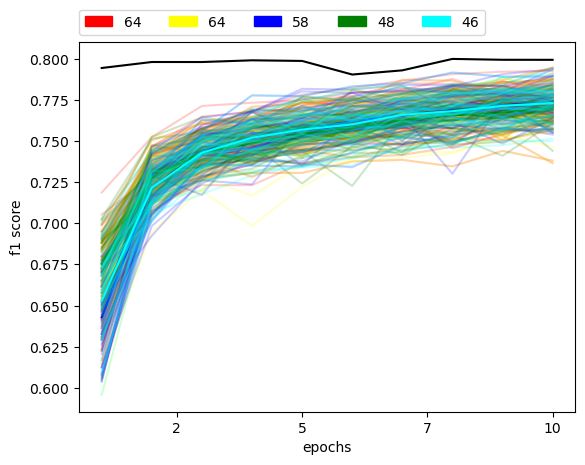

In [88]:
#plotting graphs for loss and accuracies for the top 5 recurrent models:
#plotting val_loss and loss for the models generated and the benchmark model.
from random import randint
import matplotlib.patches as mpatches
color = ['red', 'yellow','blue', 'green','cyan']
leg=[]
for i in range(len(color)):
    leg.append(mpatches.Patch(color=color[i], label=str(len(val_acc[i]))))
n = len(val_acc)
x_axis=np.arange(1, 11, 1)
print(x_axis)
for i in range(n):
    for j in range(len(val_acc[i])):
        plt.plot(x_axis,val_acc[i][j], color=color[i], alpha=0.2)
    plt.plot(x_axis, np.mean(val_acc[i], axis=0), color=color[i])
#plt.xlim(-0.5,20.5)
plt.xticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0],[2,5,7,10,12,15,17,20])
plt.xlabel("epochs")
plt.ylabel("f1 score")
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.plot(x_axis, benchmark_val_acc, color='black')
plt.savefig("fig/SUSY_F1_Val_20Epochs_10000.jpeg")

[0.559749960899353, 0.6871249675750732, 0.7346249222755432, 0.7443749308586121, 0.7561249136924744, 0.7637499570846558, 0.763374924659729, 0.7671249508857727, 0.7717499136924744, 0.7747499346733093]
[ 1  2  3  4  5  6  7  8  9 10]
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31

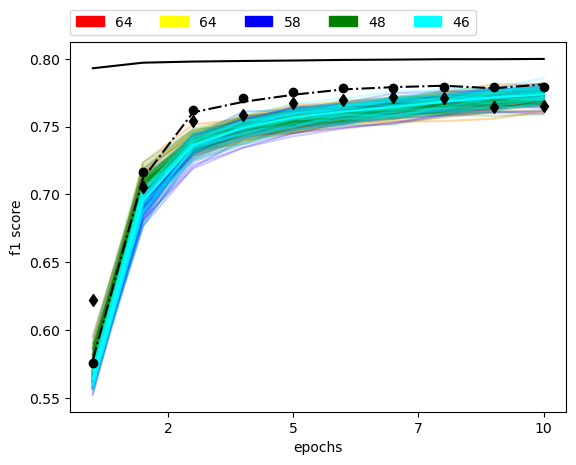

In [89]:
#train accuracy 
from random import randint
color = []
print(train_acc[4][0])
color = ['red', 'yellow','blue', 'green','cyan']
x_axis=np.arange(1, 11, 1)
print(x_axis)
for i in range(n):
    for j in range(len(train_acc[i])):
        print(i,j)
        plt.plot(x_axis,train_acc[i][j], color=color[i], alpha=0.2)
    plt.plot(x_axis,np.mean(train_acc[i], axis=0), color=color[i])
plt.plot(x_axis,benchmark_acc, color='black')
plt.xticks([2.5,5.0,7.5,10.0],[2,5,7,10])
plt.xlabel("epochs")
plt.ylabel("f1 score")
plt.plot(x_axis, DP_1_f1, 'o', color='black')
plt.plot(x_axis, DP_0_5_f1, '-.', color='black')
plt.plot(x_axis, DP_0_1_f1, 'd', color='black')
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/SUSY_F1_train_20Epochs_10000.jpeg")

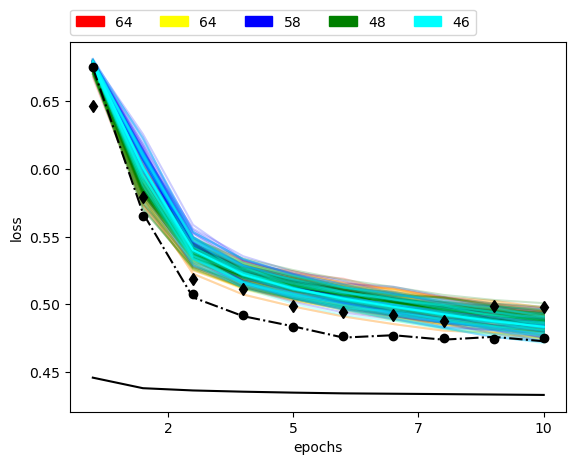

In [90]:
#training loss
from random import randint
color = []
n = len(train_loss)
color = ['red', 'yellow','blue', 'green','cyan']
for i in range(n):
    for j in range(len(train_loss[i])):
        plt.plot(x_axis,train_loss[i][j], color=color[i], alpha=0.2)
    plt.plot(x_axis,np.mean(train_loss[i], axis=0), color=color[i])
plt.plot(x_axis,benchmark_loss, color='black')
plt.xticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0],[2,5,7,10,12,15,17,20])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(x_axis, DP_1_loss, 'o', color='black')
plt.plot(x_axis, DP_0_5_loss, '-.', color='black')
plt.plot(x_axis, DP_0_1_loss, 'd', color='black')
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/SUSY_loss_train_20Epochs_10000.jpeg")

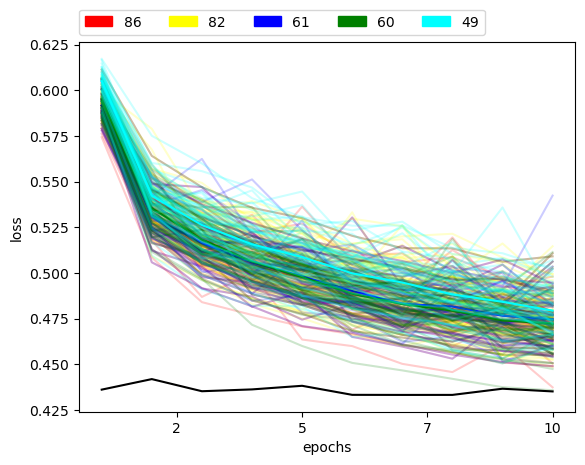

In [58]:
#validation loss loss
from random import randint
color = []
n = len(val_acc)
color = ['red', 'yellow','blue', 'green','cyan']
for i in range(n):
    for j in range(len(train_loss[i])):
        plt.plot(x_axis,val_loss[i][j], color=color[i], alpha=0.2)
    plt.plot(x_axis,np.mean(val_loss[i], axis=0), color=color[i])
plt.plot(x_axis,benchmark_val_loss, color='black')
plt.xticks([2.5,5.0,7.5,10.0],[2,5,7,10])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/SUSY_loss_val_20Epochs_10000.jpeg")

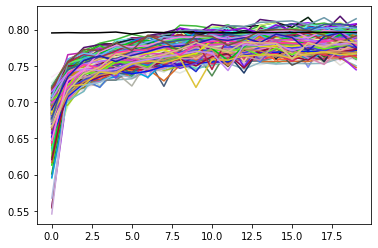

In [74]:
from random import randint
n = len(val_acc)
color=[]
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))
for i in range(n):
    for j in range(len(val_acc[i])):
        plt.plot(val_acc[i][j], color=color[i], alpha=0.1)
    plt.plot(np.mean(val_acc[i], axis=0), color=color[i])
plt.plot(benchmark_val_acc, color='black')

In [92]:
#lets compute the accuracy for bigger test set 30% benchmark test data
high_test_loss=[]
high_test_f1=[]
high_weights=list(np.array(add_weights)[A])
for i in range(len(high_weights)):
    for j in range(len(high_weights[i])):
        high_test_model=get_initial_model(X_test.shape[1], 2) #same intial weights
        high_test_model.set_weights(high_weights[i][j])
        high_test_metrics=high_test_model.evaluate(X_test,y_test)
        if j == 0:
            high_test_loss.append([high_test_metrics[0]])
            high_test_f1.append([high_test_metrics[1]])
        else:
            high_test_loss[i].append(high_test_metrics[0])
            high_test_f1[i].append(high_test_metrics[1])
print(high_test_loss, high_test_f1)

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


46875/46875 [==============================] - 25s 521us/step - loss: 0.4807 - accuracy: 0.7765


46875/46875 [==============================] - 26s 554us/step - loss: 0.4834 - accuracy: 0.7741
[[0.4846300482749939, 0.47933945059776306, 0.49053528904914856, 0.4872662425041199, 0.4843288064002991, 0.48791107535362244, 0.4852476119995117, 0.48648399114608765, 0.48622575402259827, 0.48772838711738586, 0.4891515076160431, 0.48119303584098816, 0.4803756773471832, 0.4844987988471985, 0.48042038083076477, 0.49348217248916626, 0.4797126352787018, 0.485596626996994, 0.4830857813358307, 0.48311424255371094, 0.48970746994018555, 0.49434858560562134, 0.4833812117576599, 0.4906548857688904, 0.4985561966896057, 0.49390122294425964, 0.49412107467651367, 0.5065886378288269, 0.4826512932777405, 0.4848532974720001, 0.4834396541118622, 0.48083192110061646, 0.4854717552661896, 0.48882654309272766, 0.4823877513408661, 0.4846433699131012, 0.4821264445781708, 0.4826900064945221, 0.5007063150405884, 0.4826100468635559, 0.5058023929595947, 0.4967072010040283, 0.4777352213859558, 0.48106345534324646, 0.4843

In [93]:
high_test_accs=list(np.array(high_test_f1))
print(high_test_accs)

[[0.7750566601753235, 0.776939332485199, 0.7702699899673462, 0.7700660228729248, 0.7729493379592896, 0.7733273506164551, 0.7703273296356201, 0.7744173407554626, 0.7744413614273071, 0.7729406952857971, 0.770909309387207, 0.7756080031394958, 0.7774099707603455, 0.7768840193748474, 0.7754579782485962, 0.7689059972763062, 0.7763693332672119, 0.7729086875915527, 0.7732800245285034, 0.7753739953041077, 0.770358681678772, 0.7647960186004639, 0.7737206816673279, 0.7677726745605469, 0.7606973052024841, 0.768774688243866, 0.7653546929359436, 0.7564953565597534, 0.7753400206565857, 0.7724653482437134, 0.7734266519546509, 0.7768966555595398, 0.7748593091964722, 0.7734206914901733, 0.7756513357162476, 0.7747966647148132, 0.7761633396148682, 0.7746453285217285, 0.7627493143081665, 0.7757346630096436, 0.7585773468017578, 0.7625646591186523, 0.776797354221344, 0.7760553359985352, 0.7750693559646606, 0.7716233134269714, 0.7734493613243103, 0.7681726813316345, 0.7727866768836975, 0.7542420029640198, 0.7

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


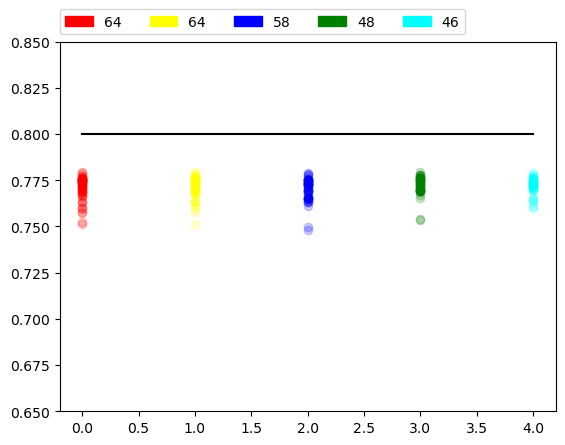

In [96]:
#for test accuracy plot
#plot test accuracy of smaller test set
benchmark_test_accs=[benchmark_test_accuracy]*n
ax = plt.gca()
ax.set_ylim([0.65, 0.85])
for i in range(n):
    plt.scatter([i]*len(test_acc[i]),test_acc[i], color=color[i], alpha=0.2)
    plt.scatter(i,high_test_accs[i][0], color=color[i])
plt.plot(benchmark_test_accs, color='black')
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/SUSY_test_acc_20Epochs_1000.jpeg")
plt.show()

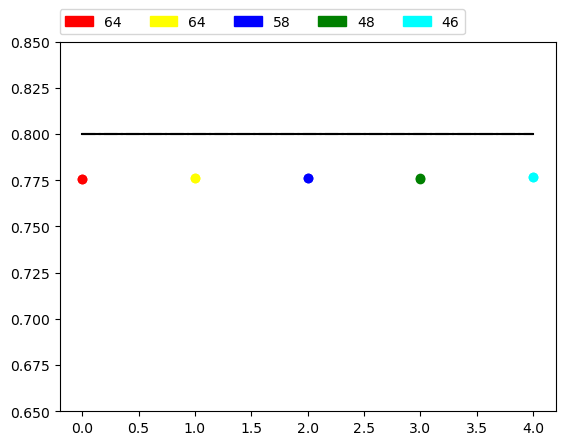

In [99]:
#plot for mean model accuracy and benchmark loss:
n=5
ax = plt.gca()
ax.set_ylim([0.65, 0.85])
for i in range(n):
    plt.plot(i, mean_model_acc[i],'o',color=color[i])
    plt.plot(i, mean_model_test_acc[i],'o', mfc='none',color=color[i])
plt.plot([benchmark_acc[-1]]*n,color='black')
plt.plot([benchmark_test_accuracy]*n,'-.',color='black')
"""
plt.plot([DP_0_1_f1_train]*n, 'o', color='black')
plt.plot([DP_0_1_f1_test]*n, 'o', color='magenta')
plt.plot([DP_0_5_f1_train]*n, '-.', color='black')
plt.plot([DP_0_5_f1_test]*n, '-.', color='magenta')
plt.plot([DP_1_f1_train]*n, 'd', color='black')
plt.plot([DP_1_f1_test]*n, 'd', color='magenta')
"""
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/SUSY_mean_model_results.jpeg")
plt.show()

In [41]:
#ANN-2
#for SKIN_NonSkin dataset
dataset = pd.read_csv("SUSY.csv",sep=',', header=None)
dataset.round(3)
#print(dataset['label'])
scaler = preprocessing.MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
target_variable=0
print(dataset.head)
Positive=dataset[dataset[target_variable]==0.0]
Negative=dataset[dataset[target_variable]==1.0]
print(len(Positive))
print(len(Negative))

<bound method NDFrame.head of           0         1         2         3         4         5         6   \
0        0.0  0.035371  0.655669  0.838999  0.022344  0.077551  0.247887   
1        1.0  0.069615  0.515424  0.146879  0.002377  0.417663  0.982085   
2        1.0  0.009358  0.468216  0.295368  0.000709  0.108141  0.278343   
3        1.0  0.006226  0.267992  0.699770  0.000625  0.716446  0.304672   
4        1.0  0.051980  0.336027  0.305084  0.035597  0.331627  0.679500   
...      ...       ...       ...       ...       ...       ...       ...   
4999995  1.0  0.029482  0.271408  0.071337  0.007655  0.619779  0.975001   
4999996  0.0  0.034323  0.533305  0.914125  0.013858  0.414505  0.286360   
4999997  0.0  0.028845  0.837689  0.148726  0.023524  0.911611  0.691276   
4999998  1.0  0.075342  0.301903  0.338566  0.016093  0.332685  0.088204   
4999999  0.0  0.024958  0.661996  0.158108  0.018859  0.423049  0.571100   

               7         8         9         10        11

In [42]:
#the below code is for binary classification since MNSIT is a multi-class low-resolution image dataset. I am updating the code in the next cell.
N=10000
#Positive=Pos
#Negative=Neg
positiveN=int((Positive.shape[0]/dataset.shape[0])*N)
negativeN=int(N-positiveN)
print(positiveN, negativeN)
#target variable
#target_variable="default.payment.next.month"
df1=Positive.sample(positiveN)
Positive.drop(df1.index, inplace=True)
df2=Negative.sample(negativeN)
Negative.drop(df2.index, inplace=True)
test_data=df1.append(df2, ignore_index=True)
test_data=test_data.sample(frac = 1) #This is to shuffel the training and testing data
test_data=test_data.sample(frac = 1)
test_data=test_data.sample(frac = 1)
X_test=test_data.drop(columns=[target_variable])
y_test=to_categorical(test_data[target_variable])

# adding dense layer
initial_model= get_initial_model_2(X_test.shape[1], 2)
initial_model.set_weights(update_weights(initial_model.get_weights()))
Models=[]
val_acc=[]
train_acc=[]
test_acc=[]
val_loss=[]
train_loss=[]
add_weights=[]
while Positive.empty==False and Negative.empty==False:
  print(positiveN, negativeN)
  df1=Positive.sample(min(positiveN, len(Positive)))
  Positive.drop(df1.index, inplace=True)
  df2=Negative.sample(min(negativeN, len(Negative)))
  Negative.drop(df2.index, inplace=True)
  train_data=df1.append(df2, ignore_index=True)
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
    
  #all models have different initialization
  # define the sequential model
  """initial_model = keras.Sequential()

    # adding dense layer
  initial_model.add(Dense(5, input_dim=X_test.shape[1], kernel_initializer='normal', activation='relu'))
  initial_model.add(Dense(10, activation='relu'))
  initial_model.add(Dense(5, activation='relu'))

    # adding dense layer with softmax activation/output layer
  initial_model.add(Dense(2, activation='softmax'))
  #initial_model.summary()"""
  ann_model=get_initial_model_2(X_test.shape[1], 2) #same intial weights
  ann_model.set_weights(initial_model.get_weights())
  X_train=train_data.drop(columns=[target_variable])
  #train_data[target_variable]=train_data[target_variable]-1 #only for skin_nonskin dataset
  y_train=to_categorical(train_data[target_variable])
  #print(y_train)
  ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']
  history = ann_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
  print(history.history['f1_m'][-1])
  ann_model.set_weights(update_weights(ann_model.get_weights()))
  pred_test=ann_model.predict(X_test)
  present=False
  for i in range(len(Models)):
    if (check_models(Models[i][0], ann_model.get_weights())):
      print("if any")
      Models[i][1]=Models[i][1]+1
      add_weights[i].append(ann_model.get_weights())
      val_acc[i].append(history.history['val_f1_m'])
      train_acc[i].append(history.history['f1_m'])
      test_acc[i].append(f1_m(y_test, pred_test))
      val_loss[i].append(history.history['val_loss'])
      train_loss[i].append(history.history['loss'])
      present=True
  if present==False:
    Models.append([ann_model.get_weights(), 1])
    add_weights.append([ann_model.get_weights()])
    val_acc.append([history.history['val_f1_m']])
    train_acc.append([history.history['f1_m']])
    test_acc.append([f1_m(y_test, pred_test)])
    val_loss.append([history.history['val_loss']])
    train_loss.append([history.history['loss']])
for i in range(len(Models)):
  print(Models[i][1])
print("All Done")

5424 4576


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


5424 4576
Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5711 - f1_m: 0.7087 - val_loss: 0.5464 - val_f1_m: 0.7307
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5082 - f1_m: 0.7570 - val_loss: 0.4998 - val_f1_m: 0.7649
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4822 - f1_m: 0.7754 - val_loss: 0.4886 - val_f1_m: 0.7684
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4694 - f1_m: 0.7819 - val_loss: 0.5003 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4638 - f1_m: 0.7839 - val_loss: 0.4715 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4576 - f1_m: 0.7905 - val_loss: 0.4746 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4595 - f1_m: 0.7856 - val_loss: 0.4897 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5719 - f1_m: 0.7045 - val_loss: 0.5175 - val_f1_m: 0.7579
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4996 - f1_m: 0.7622 - val_loss: 0.4927 - val_f1_m: 0.7674
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4848 - f1_m: 0.7759 - val_loss: 0.4946 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4686 - f1_m: 0.7830 - val_loss: 0.4718 - val_f1_m: 0.7812
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4676 - f1_m: 0.7775 - val_loss: 0.4665 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4616 - f1_m: 0.7814 - val_loss: 0.4736 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4562 - f1_m: 0.7877 - val_loss: 0.4557 - val_f1_m: 0.7941
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5792 - f1_m: 0.6992 - val_loss: 0.5288 - val_f1_m: 0.7411
Epoch 2/10
250/250 [==============================] - 0s 979us/step - loss: 0.5091 - f1_m: 0.7567 - val_loss: 0.5056 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4894 - f1_m: 0.7675 - val_loss: 0.4925 - val_f1_m: 0.7659
Epoch 4/10
250/250 [==============================] - 0s 994us/step - loss: 0.4741 - f1_m: 0.7745 - val_loss: 0.4847 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 974us/step - loss: 0.4636 - f1_m: 0.7829 - val_loss: 0.5087 - val_f1_m: 0.7495
Epoch 6/10
250/250 [==============================] - 0s 965us/step - loss: 0.4601 - f1_m: 0.7840 - val_loss: 0.5015 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 972us/step - loss: 0.4560 - f1_m: 0.7897 - val_loss: 0.4648 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5855 - f1_m: 0.6874 - val_loss: 0.5340 - val_f1_m: 0.7530
Epoch 2/10
250/250 [==============================] - 0s 996us/step - loss: 0.5197 - f1_m: 0.7494 - val_loss: 0.5244 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 962us/step - loss: 0.5005 - f1_m: 0.7627 - val_loss: 0.4919 - val_f1_m: 0.7783
Epoch 4/10
250/250 [==============================] - 0s 951us/step - loss: 0.4887 - f1_m: 0.7667 - val_loss: 0.4804 - val_f1_m: 0.7763
Epoch 5/10
250/250 [==============================] - 0s 951us/step - loss: 0.4809 - f1_m: 0.7716 - val_loss: 0.4828 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 954us/step - loss: 0.4798 - f1_m: 0.7725 - val_loss: 0.4784 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 952us/step - loss: 0.4730 - f1_m: 0.7750 - val_loss: 0.4869 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5747 - f1_m: 0.7099 - val_loss: 0.4972 - val_f1_m: 0.7788
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5114 - f1_m: 0.7566 - val_loss: 0.4681 - val_f1_m: 0.7937
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4939 - f1_m: 0.7649 - val_loss: 0.4683 - val_f1_m: 0.7892
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4820 - f1_m: 0.7724 - val_loss: 0.4571 - val_f1_m: 0.7912
Epoch 5/10
250/250 [==============================] - 0s 963us/step - loss: 0.4715 - f1_m: 0.7777 - val_loss: 0.4597 - val_f1_m: 0.7852
Epoch 6/10
250/250 [==============================] - 0s 976us/step - loss: 0.4684 - f1_m: 0.7799 - val_loss: 0.4464 - val_f1_m: 0.7946
Epoch 7/10
250/250 [==============================] - 0s 988us/step - loss: 0.4665 - f1_m: 0.7817 - val_loss: 0.4617 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5726 - f1_m: 0.7085 - val_loss: 0.5202 - val_f1_m: 0.7406
Epoch 2/10
250/250 [==============================] - 0s 971us/step - loss: 0.5117 - f1_m: 0.7539 - val_loss: 0.5319 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 975us/step - loss: 0.4899 - f1_m: 0.7717 - val_loss: 0.4926 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 968us/step - loss: 0.4782 - f1_m: 0.7786 - val_loss: 0.5086 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 950us/step - loss: 0.4682 - f1_m: 0.7881 - val_loss: 0.4991 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 950us/step - loss: 0.4649 - f1_m: 0.7865 - val_loss: 0.5097 - val_f1_m: 0.7485
Epoch 7/10
250/250 [==============================] - 0s 950us/step - loss: 0.4607 - f1_m: 0.7859 - val_loss: 0.4893 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5877 - f1_m: 0.6945 - val_loss: 0.5369 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 968us/step - loss: 0.5110 - f1_m: 0.7565 - val_loss: 0.4947 - val_f1_m: 0.7718
Epoch 3/10
250/250 [==============================] - 0s 994us/step - loss: 0.4852 - f1_m: 0.7690 - val_loss: 0.4692 - val_f1_m: 0.7922
Epoch 4/10
250/250 [==============================] - 0s 984us/step - loss: 0.4729 - f1_m: 0.7791 - val_loss: 0.4595 - val_f1_m: 0.7912
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4666 - f1_m: 0.7845 - val_loss: 0.4524 - val_f1_m: 0.7912
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4599 - f1_m: 0.7822 - val_loss: 0.4822 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 971us/step - loss: 0.4633 - f1_m: 0.7842 - val_loss: 0.4485 - val_f1_m: 0.8046
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5760 - f1_m: 0.7092 - val_loss: 0.5253 - val_f1_m: 0.7505
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5083 - f1_m: 0.7582 - val_loss: 0.4901 - val_f1_m: 0.7748
Epoch 3/10
250/250 [==============================] - 0s 979us/step - loss: 0.4842 - f1_m: 0.7756 - val_loss: 0.4780 - val_f1_m: 0.7867
Epoch 4/10
250/250 [==============================] - 0s 969us/step - loss: 0.4695 - f1_m: 0.7875 - val_loss: 0.4629 - val_f1_m: 0.7887
Epoch 5/10
250/250 [==============================] - 0s 978us/step - loss: 0.4641 - f1_m: 0.7806 - val_loss: 0.4526 - val_f1_m: 0.7897
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4607 - f1_m: 0.7877 - val_loss: 0.4479 - val_f1_m: 0.7991
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4586 - f1_m: 0.7886 - val_loss: 0.4518 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5821 - f1_m: 0.6966 - val_loss: 0.5111 - val_f1_m: 0.7594
Epoch 2/10
250/250 [==============================] - 0s 998us/step - loss: 0.5086 - f1_m: 0.7610 - val_loss: 0.4813 - val_f1_m: 0.7812
Epoch 3/10
250/250 [==============================] - 0s 961us/step - loss: 0.4837 - f1_m: 0.7661 - val_loss: 0.4662 - val_f1_m: 0.7927
Epoch 4/10
250/250 [==============================] - 0s 960us/step - loss: 0.4672 - f1_m: 0.7799 - val_loss: 0.4630 - val_f1_m: 0.7922
Epoch 5/10
250/250 [==============================] - 0s 952us/step - loss: 0.4609 - f1_m: 0.7814 - val_loss: 0.4509 - val_f1_m: 0.7927
Epoch 6/10
250/250 [==============================] - 0s 950us/step - loss: 0.4553 - f1_m: 0.7900 - val_loss: 0.4555 - val_f1_m: 0.7996
Epoch 7/10
250/250 [==============================] - 0s 952us/step - loss: 0.4542 - f1_m: 0.7904 - val_loss: 0.4597 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5801 - f1_m: 0.6976 - val_loss: 0.5180 - val_f1_m: 0.7560
Epoch 2/10
250/250 [==============================] - 0s 963us/step - loss: 0.5101 - f1_m: 0.7540 - val_loss: 0.4897 - val_f1_m: 0.7728
Epoch 3/10
250/250 [==============================] - 0s 946us/step - loss: 0.4926 - f1_m: 0.7679 - val_loss: 0.4926 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 956us/step - loss: 0.4818 - f1_m: 0.7720 - val_loss: 0.4577 - val_f1_m: 0.7927
Epoch 5/10
250/250 [==============================] - 0s 949us/step - loss: 0.4751 - f1_m: 0.7756 - val_loss: 0.4606 - val_f1_m: 0.7877
Epoch 6/10
250/250 [==============================] - 0s 950us/step - loss: 0.4663 - f1_m: 0.7850 - val_loss: 0.4509 - val_f1_m: 0.7897
Epoch 7/10
250/250 [==============================] - 0s 960us/step - loss: 0.4680 - f1_m: 0.7774 - val_loss: 0.4507 - val_f1_m: 0.7996
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5797 - f1_m: 0.7045 - val_loss: 0.5222 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 966us/step - loss: 0.5085 - f1_m: 0.7595 - val_loss: 0.5129 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 947us/step - loss: 0.4870 - f1_m: 0.7739 - val_loss: 0.4814 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 956us/step - loss: 0.4713 - f1_m: 0.7810 - val_loss: 0.4522 - val_f1_m: 0.7991
Epoch 5/10
250/250 [==============================] - 0s 975us/step - loss: 0.4651 - f1_m: 0.7855 - val_loss: 0.4503 - val_f1_m: 0.7991
Epoch 6/10
250/250 [==============================] - 0s 955us/step - loss: 0.4597 - f1_m: 0.7860 - val_loss: 0.4443 - val_f1_m: 0.8051
Epoch 7/10
250/250 [==============================] - 0s 964us/step - loss: 0.4558 - f1_m: 0.7932 - val_loss: 0.4571 - val_f1_m: 0.7956
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5761 - f1_m: 0.7137 - val_loss: 0.5200 - val_f1_m: 0.7460
Epoch 2/10
250/250 [==============================] - 0s 971us/step - loss: 0.5049 - f1_m: 0.7644 - val_loss: 0.4948 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 949us/step - loss: 0.4845 - f1_m: 0.7729 - val_loss: 0.4913 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 966us/step - loss: 0.4652 - f1_m: 0.7866 - val_loss: 0.5019 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4652 - f1_m: 0.7870 - val_loss: 0.4677 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4631 - f1_m: 0.7854 - val_loss: 0.4709 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 963us/step - loss: 0.4544 - f1_m: 0.7914 - val_loss: 0.4667 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5889 - f1_m: 0.6901 - val_loss: 0.5162 - val_f1_m: 0.7520
Epoch 2/10
250/250 [==============================] - 0s 979us/step - loss: 0.5170 - f1_m: 0.7492 - val_loss: 0.4853 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 970us/step - loss: 0.4937 - f1_m: 0.7636 - val_loss: 0.4669 - val_f1_m: 0.7808
Epoch 4/10
250/250 [==============================] - 0s 960us/step - loss: 0.4843 - f1_m: 0.7735 - val_loss: 0.4545 - val_f1_m: 0.7907
Epoch 5/10
250/250 [==============================] - 0s 969us/step - loss: 0.4814 - f1_m: 0.7722 - val_loss: 0.4559 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 976us/step - loss: 0.4687 - f1_m: 0.7805 - val_loss: 0.4456 - val_f1_m: 0.7917
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4706 - f1_m: 0.7790 - val_loss: 0.4485 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5773 - f1_m: 0.7004 - val_loss: 0.5291 - val_f1_m: 0.7485
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5147 - f1_m: 0.7566 - val_loss: 0.4941 - val_f1_m: 0.7688
Epoch 3/10
250/250 [==============================] - 0s 998us/step - loss: 0.4944 - f1_m: 0.7716 - val_loss: 0.4855 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 964us/step - loss: 0.4814 - f1_m: 0.7807 - val_loss: 0.4760 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 993us/step - loss: 0.4752 - f1_m: 0.7839 - val_loss: 0.4663 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4687 - f1_m: 0.7846 - val_loss: 0.4682 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4643 - f1_m: 0.7842 - val_loss: 0.4670 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5816 - f1_m: 0.6936 - val_loss: 0.5261 - val_f1_m: 0.7515
Epoch 2/10
250/250 [==============================] - 0s 966us/step - loss: 0.5175 - f1_m: 0.7492 - val_loss: 0.4892 - val_f1_m: 0.7758
Epoch 3/10
250/250 [==============================] - 0s 953us/step - loss: 0.4950 - f1_m: 0.7644 - val_loss: 0.4694 - val_f1_m: 0.7837
Epoch 4/10
250/250 [==============================] - 0s 974us/step - loss: 0.4813 - f1_m: 0.7744 - val_loss: 0.4769 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 953us/step - loss: 0.4731 - f1_m: 0.7749 - val_loss: 0.4704 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 960us/step - loss: 0.4714 - f1_m: 0.7794 - val_loss: 0.4509 - val_f1_m: 0.7937
Epoch 7/10
250/250 [==============================] - 0s 955us/step - loss: 0.4694 - f1_m: 0.7777 - val_loss: 0.4499 - val_f1_m: 0.7932
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5808 - f1_m: 0.6987 - val_loss: 0.5333 - val_f1_m: 0.7510
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5109 - f1_m: 0.7606 - val_loss: 0.5025 - val_f1_m: 0.7688
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4909 - f1_m: 0.7674 - val_loss: 0.4826 - val_f1_m: 0.7753
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4797 - f1_m: 0.7792 - val_loss: 0.4707 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4736 - f1_m: 0.7891 - val_loss: 0.4689 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4728 - f1_m: 0.7805 - val_loss: 0.4648 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4670 - f1_m: 0.7875 - val_loss: 0.4745 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5847 - f1_m: 0.6889 - val_loss: 0.5162 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 954us/step - loss: 0.5143 - f1_m: 0.7509 - val_loss: 0.4981 - val_f1_m: 0.7664
Epoch 3/10
250/250 [==============================] - 0s 948us/step - loss: 0.4903 - f1_m: 0.7672 - val_loss: 0.4971 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 948us/step - loss: 0.4784 - f1_m: 0.7750 - val_loss: 0.4614 - val_f1_m: 0.7877
Epoch 5/10
250/250 [==============================] - 0s 956us/step - loss: 0.4670 - f1_m: 0.7827 - val_loss: 0.4607 - val_f1_m: 0.7892
Epoch 6/10
250/250 [==============================] - 0s 945us/step - loss: 0.4627 - f1_m: 0.7826 - val_loss: 0.4520 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 949us/step - loss: 0.4610 - f1_m: 0.7856 - val_loss: 0.4694 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5843 - f1_m: 0.6939 - val_loss: 0.5254 - val_f1_m: 0.7445
Epoch 2/10
250/250 [==============================] - 0s 947us/step - loss: 0.5146 - f1_m: 0.7556 - val_loss: 0.5375 - val_f1_m: 0.7277
Epoch 3/10
250/250 [==============================] - 0s 938us/step - loss: 0.4955 - f1_m: 0.7654 - val_loss: 0.5290 - val_f1_m: 0.7292
Epoch 4/10
250/250 [==============================] - 0s 947us/step - loss: 0.4821 - f1_m: 0.7721 - val_loss: 0.4731 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4737 - f1_m: 0.7755 - val_loss: 0.4806 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 939us/step - loss: 0.4674 - f1_m: 0.7811 - val_loss: 0.4609 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 935us/step - loss: 0.4673 - f1_m: 0.7771 - val_loss: 0.4655 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5786 - f1_m: 0.6990 - val_loss: 0.5203 - val_f1_m: 0.7560
Epoch 2/10
250/250 [==============================] - 0s 953us/step - loss: 0.5152 - f1_m: 0.7531 - val_loss: 0.4938 - val_f1_m: 0.7609
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4901 - f1_m: 0.7662 - val_loss: 0.4747 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 988us/step - loss: 0.4746 - f1_m: 0.7730 - val_loss: 0.4875 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4642 - f1_m: 0.7855 - val_loss: 0.4604 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 977us/step - loss: 0.4645 - f1_m: 0.7834 - val_loss: 0.4909 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 978us/step - loss: 0.4534 - f1_m: 0.7884 - val_loss: 0.4511 - val_f1_m: 0.7976
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5729 - f1_m: 0.7116 - val_loss: 0.5200 - val_f1_m: 0.7555
Epoch 2/10
250/250 [==============================] - 0s 940us/step - loss: 0.5052 - f1_m: 0.7620 - val_loss: 0.4928 - val_f1_m: 0.7733
Epoch 3/10
250/250 [==============================] - 0s 935us/step - loss: 0.4806 - f1_m: 0.7765 - val_loss: 0.4833 - val_f1_m: 0.7837
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.4683 - f1_m: 0.7819 - val_loss: 0.4858 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4655 - f1_m: 0.7880 - val_loss: 0.4712 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 926us/step - loss: 0.4539 - f1_m: 0.7931 - val_loss: 0.5033 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4541 - f1_m: 0.7939 - val_loss: 0.4659 - val_f1_m: 0.7956
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5823 - f1_m: 0.6960 - val_loss: 0.5291 - val_f1_m: 0.7579
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.5150 - f1_m: 0.7560 - val_loss: 0.4962 - val_f1_m: 0.7733
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.4954 - f1_m: 0.7649 - val_loss: 0.4802 - val_f1_m: 0.7773
Epoch 4/10
250/250 [==============================] - 0s 952us/step - loss: 0.4799 - f1_m: 0.7744 - val_loss: 0.4651 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 974us/step - loss: 0.4647 - f1_m: 0.7889 - val_loss: 0.4585 - val_f1_m: 0.7922
Epoch 6/10
250/250 [==============================] - 0s 981us/step - loss: 0.4720 - f1_m: 0.7791 - val_loss: 0.4532 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 963us/step - loss: 0.4635 - f1_m: 0.7854 - val_loss: 0.4538 - val_f1_m: 0.7991
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5679 - f1_m: 0.7112 - val_loss: 0.5425 - val_f1_m: 0.7252
Epoch 2/10
250/250 [==============================] - 0s 952us/step - loss: 0.5070 - f1_m: 0.7594 - val_loss: 0.5003 - val_f1_m: 0.7619
Epoch 3/10
250/250 [==============================] - 0s 922us/step - loss: 0.4791 - f1_m: 0.7770 - val_loss: 0.4735 - val_f1_m: 0.7872
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.4657 - f1_m: 0.7830 - val_loss: 0.4726 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4580 - f1_m: 0.7866 - val_loss: 0.4692 - val_f1_m: 0.7902
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4551 - f1_m: 0.7901 - val_loss: 0.4530 - val_f1_m: 0.7932
Epoch 7/10
250/250 [==============================] - 0s 937us/step - loss: 0.4480 - f1_m: 0.7945 - val_loss: 0.4529 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5851 - f1_m: 0.6974 - val_loss: 0.5171 - val_f1_m: 0.7455
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5134 - f1_m: 0.7537 - val_loss: 0.4878 - val_f1_m: 0.7674
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.4986 - f1_m: 0.7666 - val_loss: 0.4801 - val_f1_m: 0.7738
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.4806 - f1_m: 0.7775 - val_loss: 0.5049 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.4755 - f1_m: 0.7757 - val_loss: 0.4838 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 949us/step - loss: 0.4731 - f1_m: 0.7782 - val_loss: 0.4624 - val_f1_m: 0.7912
Epoch 7/10
250/250 [==============================] - 0s 948us/step - loss: 0.4676 - f1_m: 0.7857 - val_loss: 0.4818 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5883 - f1_m: 0.6882 - val_loss: 0.5266 - val_f1_m: 0.7351
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.5189 - f1_m: 0.7465 - val_loss: 0.5242 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.4952 - f1_m: 0.7659 - val_loss: 0.4764 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4809 - f1_m: 0.7715 - val_loss: 0.4622 - val_f1_m: 0.7832
Epoch 5/10
250/250 [==============================] - 0s 953us/step - loss: 0.4770 - f1_m: 0.7732 - val_loss: 0.4686 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 923us/step - loss: 0.4711 - f1_m: 0.7802 - val_loss: 0.4868 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.4716 - f1_m: 0.7759 - val_loss: 0.5149 - val_f1_m: 0.7316
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5777 - f1_m: 0.6989 - val_loss: 0.5201 - val_f1_m: 0.7560
Epoch 2/10
250/250 [==============================] - 0s 953us/step - loss: 0.5105 - f1_m: 0.7569 - val_loss: 0.4999 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.4921 - f1_m: 0.7666 - val_loss: 0.4900 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 929us/step - loss: 0.4761 - f1_m: 0.7794 - val_loss: 0.4874 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 928us/step - loss: 0.4714 - f1_m: 0.7795 - val_loss: 0.4791 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4684 - f1_m: 0.7829 - val_loss: 0.4901 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4633 - f1_m: 0.7804 - val_loss: 0.4806 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5885 - f1_m: 0.6944 - val_loss: 0.5183 - val_f1_m: 0.7515
Epoch 2/10
250/250 [==============================] - 0s 976us/step - loss: 0.5224 - f1_m: 0.7452 - val_loss: 0.4947 - val_f1_m: 0.7768
Epoch 3/10
250/250 [==============================] - 0s 973us/step - loss: 0.5051 - f1_m: 0.7620 - val_loss: 0.4668 - val_f1_m: 0.7897
Epoch 4/10
250/250 [==============================] - 0s 996us/step - loss: 0.4902 - f1_m: 0.7751 - val_loss: 0.4785 - val_f1_m: 0.7808
Epoch 5/10
250/250 [==============================] - 0s 969us/step - loss: 0.4825 - f1_m: 0.7784 - val_loss: 0.4537 - val_f1_m: 0.7991
Epoch 6/10
250/250 [==============================] - 0s 946us/step - loss: 0.4813 - f1_m: 0.7741 - val_loss: 0.4487 - val_f1_m: 0.7986
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4756 - f1_m: 0.7810 - val_loss: 0.4470 - val_f1_m: 0.7912
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5893 - f1_m: 0.6890 - val_loss: 0.5302 - val_f1_m: 0.7440
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5292 - f1_m: 0.7452 - val_loss: 0.5155 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5072 - f1_m: 0.7574 - val_loss: 0.4844 - val_f1_m: 0.7679
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4955 - f1_m: 0.7667 - val_loss: 0.4736 - val_f1_m: 0.7768
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4840 - f1_m: 0.7695 - val_loss: 0.4685 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4808 - f1_m: 0.7735 - val_loss: 0.4670 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4784 - f1_m: 0.7734 - val_loss: 0.4636 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 944us

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5807 - f1_m: 0.7024 - val_loss: 0.5167 - val_f1_m: 0.7545
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5167 - f1_m: 0.7507 - val_loss: 0.5023 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 982us/step - loss: 0.4878 - f1_m: 0.7744 - val_loss: 0.4681 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 960us/step - loss: 0.4742 - f1_m: 0.7806 - val_loss: 0.4713 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 979us/step - loss: 0.4700 - f1_m: 0.7820 - val_loss: 0.4680 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 942us/step - loss: 0.4621 - f1_m: 0.7896 - val_loss: 0.4692 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 955us/step - loss: 0.4591 - f1_m: 0.7896 - val_loss: 0.4623 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5800 - f1_m: 0.6987 - val_loss: 0.5344 - val_f1_m: 0.7445
Epoch 2/10
250/250 [==============================] - 0s 967us/step - loss: 0.5145 - f1_m: 0.7540 - val_loss: 0.5064 - val_f1_m: 0.7664
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4912 - f1_m: 0.7672 - val_loss: 0.4854 - val_f1_m: 0.7783
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.4835 - f1_m: 0.7749 - val_loss: 0.4888 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.4702 - f1_m: 0.7812 - val_loss: 0.4662 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 937us/step - loss: 0.4666 - f1_m: 0.7837 - val_loss: 0.4797 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4623 - f1_m: 0.7847 - val_loss: 0.4641 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5858 - f1_m: 0.6947 - val_loss: 0.5191 - val_f1_m: 0.7550
Epoch 2/10
250/250 [==============================] - 0s 938us/step - loss: 0.5150 - f1_m: 0.7501 - val_loss: 0.4911 - val_f1_m: 0.7703
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.4948 - f1_m: 0.7611 - val_loss: 0.5033 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 937us/step - loss: 0.4838 - f1_m: 0.7675 - val_loss: 0.4658 - val_f1_m: 0.7808
Epoch 5/10
250/250 [==============================] - 0s 936us/step - loss: 0.4748 - f1_m: 0.7787 - val_loss: 0.4685 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4658 - f1_m: 0.7819 - val_loss: 0.4547 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4667 - f1_m: 0.7805 - val_loss: 0.5108 - val_f1_m: 0.7440
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5802 - f1_m: 0.6940 - val_loss: 0.5105 - val_f1_m: 0.7599
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5110 - f1_m: 0.7550 - val_loss: 0.4894 - val_f1_m: 0.7783
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4888 - f1_m: 0.7640 - val_loss: 0.4970 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4823 - f1_m: 0.7686 - val_loss: 0.4615 - val_f1_m: 0.7832
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4734 - f1_m: 0.7769 - val_loss: 0.4680 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 978us/step - loss: 0.4639 - f1_m: 0.7836 - val_loss: 0.4535 - val_f1_m: 0.7966
Epoch 7/10
250/250 [==============================] - 0s 969us/step - loss: 0.4602 - f1_m: 0.7871 - val_loss: 0.4487 - val_f1_m: 0.7912
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5781 - f1_m: 0.7001 - val_loss: 0.5166 - val_f1_m: 0.7505
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5105 - f1_m: 0.7600 - val_loss: 0.4868 - val_f1_m: 0.7773
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4898 - f1_m: 0.7726 - val_loss: 0.4712 - val_f1_m: 0.7817
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4757 - f1_m: 0.7780 - val_loss: 0.4640 - val_f1_m: 0.7887
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4677 - f1_m: 0.7851 - val_loss: 0.4601 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4629 - f1_m: 0.7910 - val_loss: 0.4554 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4586 - f1_m: 0.7889 - val_loss: 0.4541 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5843 - f1_m: 0.6965 - val_loss: 0.5203 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 975us/step - loss: 0.5140 - f1_m: 0.7541 - val_loss: 0.5088 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 976us/step - loss: 0.4931 - f1_m: 0.7644 - val_loss: 0.4885 - val_f1_m: 0.7733
Epoch 4/10
250/250 [==============================] - 0s 979us/step - loss: 0.4799 - f1_m: 0.7741 - val_loss: 0.4605 - val_f1_m: 0.7827
Epoch 5/10
250/250 [==============================] - 0s 997us/step - loss: 0.4735 - f1_m: 0.7771 - val_loss: 0.4568 - val_f1_m: 0.7882
Epoch 6/10
250/250 [==============================] - 0s 972us/step - loss: 0.4670 - f1_m: 0.7796 - val_loss: 0.4510 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 961us/step - loss: 0.4611 - f1_m: 0.7855 - val_loss: 0.4472 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5803 - f1_m: 0.6997 - val_loss: 0.4969 - val_f1_m: 0.7793
Epoch 2/10
250/250 [==============================] - 0s 974us/step - loss: 0.5112 - f1_m: 0.7509 - val_loss: 0.4750 - val_f1_m: 0.7907
Epoch 3/10
250/250 [==============================] - 0s 964us/step - loss: 0.4948 - f1_m: 0.7624 - val_loss: 0.4683 - val_f1_m: 0.7832
Epoch 4/10
250/250 [==============================] - 0s 957us/step - loss: 0.4798 - f1_m: 0.7735 - val_loss: 0.4416 - val_f1_m: 0.8026
Epoch 5/10
250/250 [==============================] - 0s 952us/step - loss: 0.4751 - f1_m: 0.7764 - val_loss: 0.4470 - val_f1_m: 0.7981
Epoch 6/10
250/250 [==============================] - 0s 964us/step - loss: 0.4641 - f1_m: 0.7857 - val_loss: 0.4453 - val_f1_m: 0.7981
Epoch 7/10
250/250 [==============================] - 0s 963us/step - loss: 0.4668 - f1_m: 0.7804 - val_loss: 0.4487 - val_f1_m: 0.7981
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5837 - f1_m: 0.6954 - val_loss: 0.5323 - val_f1_m: 0.7436
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5178 - f1_m: 0.7481 - val_loss: 0.4948 - val_f1_m: 0.7674
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4985 - f1_m: 0.7650 - val_loss: 0.4820 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4802 - f1_m: 0.7754 - val_loss: 0.4747 - val_f1_m: 0.7793
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4738 - f1_m: 0.7797 - val_loss: 0.4642 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 926us/step - loss: 0.4720 - f1_m: 0.7820 - val_loss: 0.4575 - val_f1_m: 0.7892
Epoch 7/10
250/250 [==============================] - 0s 955us/step - loss: 0.4661 - f1_m: 0.7836 - val_loss: 0.4887 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5793 - f1_m: 0.6980 - val_loss: 0.5132 - val_f1_m: 0.7584
Epoch 2/10
250/250 [==============================] - 0s 984us/step - loss: 0.5199 - f1_m: 0.7481 - val_loss: 0.4988 - val_f1_m: 0.7649
Epoch 3/10
250/250 [==============================] - 0s 985us/step - loss: 0.4935 - f1_m: 0.7625 - val_loss: 0.4770 - val_f1_m: 0.7788
Epoch 4/10
250/250 [==============================] - 0s 964us/step - loss: 0.4821 - f1_m: 0.7749 - val_loss: 0.4799 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 958us/step - loss: 0.4703 - f1_m: 0.7804 - val_loss: 0.4565 - val_f1_m: 0.7951
Epoch 6/10
250/250 [==============================] - 0s 976us/step - loss: 0.4715 - f1_m: 0.7802 - val_loss: 0.4534 - val_f1_m: 0.7912
Epoch 7/10
250/250 [==============================] - 0s 951us/step - loss: 0.4670 - f1_m: 0.7816 - val_loss: 0.4502 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5757 - f1_m: 0.7059 - val_loss: 0.5146 - val_f1_m: 0.7495
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5060 - f1_m: 0.7582 - val_loss: 0.4887 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 982us/step - loss: 0.4910 - f1_m: 0.7654 - val_loss: 0.4873 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4771 - f1_m: 0.7775 - val_loss: 0.4663 - val_f1_m: 0.7872
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.4668 - f1_m: 0.7830 - val_loss: 0.4587 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4614 - f1_m: 0.7844 - val_loss: 0.4625 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 923us/step - loss: 0.4631 - f1_m: 0.7839 - val_loss: 0.4580 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5791 - f1_m: 0.7001 - val_loss: 0.5138 - val_f1_m: 0.7520
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.5086 - f1_m: 0.7567 - val_loss: 0.4936 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 930us/step - loss: 0.4919 - f1_m: 0.7644 - val_loss: 0.5161 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 925us/step - loss: 0.4782 - f1_m: 0.7720 - val_loss: 0.4768 - val_f1_m: 0.7763
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.4657 - f1_m: 0.7834 - val_loss: 0.4801 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 922us/step - loss: 0.4661 - f1_m: 0.7794 - val_loss: 0.4830 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4665 - f1_m: 0.7802 - val_loss: 0.4578 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5818 - f1_m: 0.6994 - val_loss: 0.5081 - val_f1_m: 0.7629
Epoch 2/10
250/250 [==============================] - 0s 986us/step - loss: 0.5151 - f1_m: 0.7587 - val_loss: 0.4826 - val_f1_m: 0.7718
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.4941 - f1_m: 0.7699 - val_loss: 0.4661 - val_f1_m: 0.7798
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4823 - f1_m: 0.7741 - val_loss: 0.4508 - val_f1_m: 0.7956
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4686 - f1_m: 0.7812 - val_loss: 0.4476 - val_f1_m: 0.7917
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4683 - f1_m: 0.7820 - val_loss: 0.4485 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 994us/step - loss: 0.4666 - f1_m: 0.7790 - val_loss: 0.4394 - val_f1_m: 0.7956
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5702 - f1_m: 0.7096 - val_loss: 0.5285 - val_f1_m: 0.7525
Epoch 2/10
250/250 [==============================] - 0s 939us/step - loss: 0.5026 - f1_m: 0.7651 - val_loss: 0.4941 - val_f1_m: 0.7698
Epoch 3/10
250/250 [==============================] - 0s 924us/step - loss: 0.4806 - f1_m: 0.7754 - val_loss: 0.4756 - val_f1_m: 0.7783
Epoch 4/10
250/250 [==============================] - 0s 985us/step - loss: 0.4635 - f1_m: 0.7819 - val_loss: 0.4703 - val_f1_m: 0.7892
Epoch 5/10
250/250 [==============================] - 0s 961us/step - loss: 0.4574 - f1_m: 0.7885 - val_loss: 0.4685 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 963us/step - loss: 0.4555 - f1_m: 0.7889 - val_loss: 0.4639 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 943us/step - loss: 0.4439 - f1_m: 0.7957 - val_loss: 0.4623 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5799 - f1_m: 0.6981 - val_loss: 0.5507 - val_f1_m: 0.7267
Epoch 2/10
250/250 [==============================] - 0s 970us/step - loss: 0.5212 - f1_m: 0.7454 - val_loss: 0.5127 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.4961 - f1_m: 0.7631 - val_loss: 0.5136 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.4808 - f1_m: 0.7707 - val_loss: 0.4732 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.4718 - f1_m: 0.7779 - val_loss: 0.4869 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4753 - f1_m: 0.7726 - val_loss: 0.4648 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 940us/step - loss: 0.4688 - f1_m: 0.7810 - val_loss: 0.4780 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5860 - f1_m: 0.6980 - val_loss: 0.5215 - val_f1_m: 0.7530
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.5241 - f1_m: 0.7525 - val_loss: 0.4819 - val_f1_m: 0.7832
Epoch 3/10
250/250 [==============================] - 0s 921us/step - loss: 0.5077 - f1_m: 0.7599 - val_loss: 0.4665 - val_f1_m: 0.7956
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4947 - f1_m: 0.7670 - val_loss: 0.4785 - val_f1_m: 0.7783
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.4840 - f1_m: 0.7760 - val_loss: 0.4603 - val_f1_m: 0.7946
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4829 - f1_m: 0.7750 - val_loss: 0.4740 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4789 - f1_m: 0.7781 - val_loss: 0.4677 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5815 - f1_m: 0.7005 - val_loss: 0.5523 - val_f1_m: 0.7207
Epoch 2/10
250/250 [==============================] - 0s 954us/step - loss: 0.5185 - f1_m: 0.7521 - val_loss: 0.5052 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 939us/step - loss: 0.5014 - f1_m: 0.7642 - val_loss: 0.5042 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 940us/step - loss: 0.4829 - f1_m: 0.7764 - val_loss: 0.4793 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 954us/step - loss: 0.4764 - f1_m: 0.7769 - val_loss: 0.4834 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 941us/step - loss: 0.4778 - f1_m: 0.7747 - val_loss: 0.4760 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 953us/step - loss: 0.4677 - f1_m: 0.7799 - val_loss: 0.4714 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5764 - f1_m: 0.7070 - val_loss: 0.5164 - val_f1_m: 0.7510
Epoch 2/10
250/250 [==============================] - 0s 952us/step - loss: 0.5119 - f1_m: 0.7591 - val_loss: 0.5066 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 943us/step - loss: 0.4912 - f1_m: 0.7710 - val_loss: 0.4747 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 939us/step - loss: 0.4787 - f1_m: 0.7825 - val_loss: 0.4583 - val_f1_m: 0.7912
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4714 - f1_m: 0.7820 - val_loss: 0.4544 - val_f1_m: 0.7907
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4652 - f1_m: 0.7816 - val_loss: 0.4560 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 937us/step - loss: 0.4628 - f1_m: 0.7877 - val_loss: 0.4504 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5783 - f1_m: 0.6996 - val_loss: 0.5317 - val_f1_m: 0.7500
Epoch 2/10
250/250 [==============================] - 0s 962us/step - loss: 0.5074 - f1_m: 0.7616 - val_loss: 0.4994 - val_f1_m: 0.7763
Epoch 3/10
250/250 [==============================] - 0s 930us/step - loss: 0.4883 - f1_m: 0.7631 - val_loss: 0.4945 - val_f1_m: 0.7763
Epoch 4/10
250/250 [==============================] - 0s 941us/step - loss: 0.4825 - f1_m: 0.7705 - val_loss: 0.4993 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.4705 - f1_m: 0.7802 - val_loss: 0.4904 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 936us/step - loss: 0.4637 - f1_m: 0.7842 - val_loss: 0.4693 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 929us/step - loss: 0.4596 - f1_m: 0.7879 - val_loss: 0.4813 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5743 - f1_m: 0.7089 - val_loss: 0.5016 - val_f1_m: 0.7644
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5036 - f1_m: 0.7630 - val_loss: 0.4704 - val_f1_m: 0.7743
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4829 - f1_m: 0.7752 - val_loss: 0.4597 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4684 - f1_m: 0.7852 - val_loss: 0.4438 - val_f1_m: 0.7956
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4600 - f1_m: 0.7917 - val_loss: 0.4394 - val_f1_m: 0.7986
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4568 - f1_m: 0.7924 - val_loss: 0.4423 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4500 - f1_m: 0.7970 - val_loss: 0.4470 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5634 - f1_m: 0.7097 - val_loss: 0.5193 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 985us/step - loss: 0.4919 - f1_m: 0.7715 - val_loss: 0.5486 - val_f1_m: 0.7178
Epoch 3/10
250/250 [==============================] - 0s 991us/step - loss: 0.4705 - f1_m: 0.7810 - val_loss: 0.4717 - val_f1_m: 0.7808
Epoch 4/10
250/250 [==============================] - 0s 997us/step - loss: 0.4506 - f1_m: 0.7905 - val_loss: 0.4673 - val_f1_m: 0.7867
Epoch 5/10
250/250 [==============================] - 0s 996us/step - loss: 0.4478 - f1_m: 0.7912 - val_loss: 0.4783 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4375 - f1_m: 0.8012 - val_loss: 0.4538 - val_f1_m: 0.7892
Epoch 7/10
250/250 [==============================] - 0s 969us/step - loss: 0.4398 - f1_m: 0.8007 - val_loss: 0.4484 - val_f1_m: 0.7941
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5829 - f1_m: 0.6992 - val_loss: 0.5467 - val_f1_m: 0.7267
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5167 - f1_m: 0.7514 - val_loss: 0.5033 - val_f1_m: 0.7619
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5002 - f1_m: 0.7596 - val_loss: 0.4904 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4831 - f1_m: 0.7676 - val_loss: 0.4851 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4732 - f1_m: 0.7775 - val_loss: 0.4926 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4682 - f1_m: 0.7782 - val_loss: 0.4737 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4673 - f1_m: 0.7782 - val_loss: 0.4813 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5783 - f1_m: 0.7069 - val_loss: 0.5437 - val_f1_m: 0.7287
Epoch 2/10
250/250 [==============================] - 0s 979us/step - loss: 0.5144 - f1_m: 0.7549 - val_loss: 0.5013 - val_f1_m: 0.7698
Epoch 3/10
250/250 [==============================] - 0s 995us/step - loss: 0.4895 - f1_m: 0.7710 - val_loss: 0.4843 - val_f1_m: 0.7743
Epoch 4/10
250/250 [==============================] - 0s 967us/step - loss: 0.4771 - f1_m: 0.7796 - val_loss: 0.4762 - val_f1_m: 0.7768
Epoch 5/10
250/250 [==============================] - 0s 962us/step - loss: 0.4703 - f1_m: 0.7812 - val_loss: 0.4680 - val_f1_m: 0.7892
Epoch 6/10
250/250 [==============================] - 0s 962us/step - loss: 0.4662 - f1_m: 0.7846 - val_loss: 0.4706 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 968us/step - loss: 0.4682 - f1_m: 0.7846 - val_loss: 0.4635 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5810 - f1_m: 0.7001 - val_loss: 0.5162 - val_f1_m: 0.7540
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5081 - f1_m: 0.7579 - val_loss: 0.4816 - val_f1_m: 0.7753
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4863 - f1_m: 0.7694 - val_loss: 0.4758 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4766 - f1_m: 0.7774 - val_loss: 0.5131 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4693 - f1_m: 0.7846 - val_loss: 0.4553 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4593 - f1_m: 0.7864 - val_loss: 0.4439 - val_f1_m: 0.7946
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4568 - f1_m: 0.7852 - val_loss: 0.4436 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================] - 0s 997us

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5766 - f1_m: 0.7049 - val_loss: 0.5310 - val_f1_m: 0.7411
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5125 - f1_m: 0.7571 - val_loss: 0.4885 - val_f1_m: 0.7743
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4911 - f1_m: 0.7672 - val_loss: 0.5075 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4766 - f1_m: 0.7812 - val_loss: 0.4971 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4711 - f1_m: 0.7776 - val_loss: 0.4603 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4624 - f1_m: 0.7911 - val_loss: 0.4685 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 993us/step - loss: 0.4644 - f1_m: 0.7846 - val_loss: 0.4520 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 965

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5761 - f1_m: 0.7059 - val_loss: 0.5461 - val_f1_m: 0.7297
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.5139 - f1_m: 0.7541 - val_loss: 0.5210 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 939us/step - loss: 0.4905 - f1_m: 0.7681 - val_loss: 0.5033 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 939us/step - loss: 0.4762 - f1_m: 0.7772 - val_loss: 0.4705 - val_f1_m: 0.7788
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4759 - f1_m: 0.7776 - val_loss: 0.4771 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 967us/step - loss: 0.4615 - f1_m: 0.7826 - val_loss: 0.4857 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4611 - f1_m: 0.7815 - val_loss: 0.4586 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5819 - f1_m: 0.6994 - val_loss: 0.5109 - val_f1_m: 0.7520
Epoch 2/10
250/250 [==============================] - 0s 968us/step - loss: 0.5116 - f1_m: 0.7596 - val_loss: 0.4740 - val_f1_m: 0.7733
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.4869 - f1_m: 0.7710 - val_loss: 0.4755 - val_f1_m: 0.7748
Epoch 4/10
250/250 [==============================] - 0s 960us/step - loss: 0.4735 - f1_m: 0.7815 - val_loss: 0.4547 - val_f1_m: 0.7887
Epoch 5/10
250/250 [==============================] - 0s 937us/step - loss: 0.4700 - f1_m: 0.7791 - val_loss: 0.4721 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 937us/step - loss: 0.4632 - f1_m: 0.7836 - val_loss: 0.4480 - val_f1_m: 0.7937
Epoch 7/10
250/250 [==============================] - 0s 960us/step - loss: 0.4573 - f1_m: 0.7860 - val_loss: 0.4569 - val_f1_m: 0.7912
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5764 - f1_m: 0.7067 - val_loss: 0.5084 - val_f1_m: 0.7569
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5041 - f1_m: 0.7647 - val_loss: 0.4948 - val_f1_m: 0.7698
Epoch 3/10
250/250 [==============================] - 0s 997us/step - loss: 0.4754 - f1_m: 0.7810 - val_loss: 0.4721 - val_f1_m: 0.7773
Epoch 4/10
250/250 [==============================] - 0s 950us/step - loss: 0.4684 - f1_m: 0.7802 - val_loss: 0.4743 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 964us/step - loss: 0.4601 - f1_m: 0.7880 - val_loss: 0.4554 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4572 - f1_m: 0.7885 - val_loss: 0.4719 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 967us/step - loss: 0.4458 - f1_m: 0.7960 - val_loss: 0.4736 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5830 - f1_m: 0.6952 - val_loss: 0.5202 - val_f1_m: 0.7550
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.5213 - f1_m: 0.7472 - val_loss: 0.4915 - val_f1_m: 0.7788
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.4939 - f1_m: 0.7636 - val_loss: 0.4721 - val_f1_m: 0.7827
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4832 - f1_m: 0.7737 - val_loss: 0.4919 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4764 - f1_m: 0.7771 - val_loss: 0.4643 - val_f1_m: 0.7887
Epoch 6/10
250/250 [==============================] - 0s 999us/step - loss: 0.4701 - f1_m: 0.7757 - val_loss: 0.4715 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4703 - f1_m: 0.7820 - val_loss: 0.4606 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5808 - f1_m: 0.6954 - val_loss: 0.5412 - val_f1_m: 0.7346
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5182 - f1_m: 0.7502 - val_loss: 0.5129 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4913 - f1_m: 0.7641 - val_loss: 0.4915 - val_f1_m: 0.7659
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4759 - f1_m: 0.7765 - val_loss: 0.4972 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4674 - f1_m: 0.7841 - val_loss: 0.4712 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4679 - f1_m: 0.7795 - val_loss: 0.4708 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4633 - f1_m: 0.7814 - val_loss: 0.4678 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5853 - f1_m: 0.6911 - val_loss: 0.5052 - val_f1_m: 0.7679
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5241 - f1_m: 0.7444 - val_loss: 0.4824 - val_f1_m: 0.7783
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5051 - f1_m: 0.7597 - val_loss: 0.4617 - val_f1_m: 0.7847
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4942 - f1_m: 0.7652 - val_loss: 0.4576 - val_f1_m: 0.7902
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4816 - f1_m: 0.7711 - val_loss: 0.4468 - val_f1_m: 0.7946
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4757 - f1_m: 0.7734 - val_loss: 0.4389 - val_f1_m: 0.7951
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4709 - f1_m: 0.7741 - val_loss: 0.4522 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5778 - f1_m: 0.7010 - val_loss: 0.5163 - val_f1_m: 0.7644
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5093 - f1_m: 0.7565 - val_loss: 0.5195 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4938 - f1_m: 0.7656 - val_loss: 0.4765 - val_f1_m: 0.7897
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4778 - f1_m: 0.7759 - val_loss: 0.4743 - val_f1_m: 0.7922
Epoch 5/10
250/250 [==============================] - 0s 994us/step - loss: 0.4706 - f1_m: 0.7820 - val_loss: 0.4678 - val_f1_m: 0.7917
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4660 - f1_m: 0.7824 - val_loss: 0.4586 - val_f1_m: 0.7946
Epoch 7/10
250/250 [==============================] - 0s 996us/step - loss: 0.4664 - f1_m: 0.7800 - val_loss: 0.4708 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5741 - f1_m: 0.7022 - val_loss: 0.5263 - val_f1_m: 0.7540
Epoch 2/10
250/250 [==============================] - 0s 974us/step - loss: 0.5068 - f1_m: 0.7610 - val_loss: 0.5196 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4840 - f1_m: 0.7766 - val_loss: 0.4965 - val_f1_m: 0.7684
Epoch 4/10
250/250 [==============================] - 0s 965us/step - loss: 0.4694 - f1_m: 0.7850 - val_loss: 0.4687 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 971us/step - loss: 0.4623 - f1_m: 0.7872 - val_loss: 0.4843 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 972us/step - loss: 0.4548 - f1_m: 0.7920 - val_loss: 0.4589 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 967us/step - loss: 0.4518 - f1_m: 0.7945 - val_loss: 0.4578 - val_f1_m: 0.7946
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5780 - f1_m: 0.7090 - val_loss: 0.5020 - val_f1_m: 0.7679
Epoch 2/10
250/250 [==============================] - 0s 972us/step - loss: 0.5097 - f1_m: 0.7570 - val_loss: 0.4754 - val_f1_m: 0.7847
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.4860 - f1_m: 0.7726 - val_loss: 0.4646 - val_f1_m: 0.7907
Epoch 4/10
250/250 [==============================] - 0s 973us/step - loss: 0.4776 - f1_m: 0.7740 - val_loss: 0.4594 - val_f1_m: 0.7907
Epoch 5/10
250/250 [==============================] - 0s 981us/step - loss: 0.4664 - f1_m: 0.7846 - val_loss: 0.4392 - val_f1_m: 0.8016
Epoch 6/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4638 - f1_m: 0.7844 - val_loss: 0.4518 - val_f1_m: 0.7937
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4578 - f1_m: 0.7877 - val_loss: 0.5585 - val_f1_m: 0.7024
Epoch 8/10
250/250 [==============================]

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5744 - f1_m: 0.7029 - val_loss: 0.5214 - val_f1_m: 0.7436
Epoch 2/10
250/250 [==============================] - 0s 975us/step - loss: 0.5058 - f1_m: 0.7557 - val_loss: 0.4903 - val_f1_m: 0.7659
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.4854 - f1_m: 0.7676 - val_loss: 0.4821 - val_f1_m: 0.7812
Epoch 4/10
250/250 [==============================] - 0s 969us/step - loss: 0.4707 - f1_m: 0.7826 - val_loss: 0.4724 - val_f1_m: 0.7783
Epoch 5/10
250/250 [==============================] - 0s 965us/step - loss: 0.4608 - f1_m: 0.7891 - val_loss: 0.4708 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 987us/step - loss: 0.4598 - f1_m: 0.7844 - val_loss: 0.4696 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 968us/step - loss: 0.4583 - f1_m: 0.7899 - val_loss: 0.4652 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5821 - f1_m: 0.6992 - val_loss: 0.5128 - val_f1_m: 0.7594
Epoch 2/10
250/250 [==============================] - 0s 987us/step - loss: 0.5182 - f1_m: 0.7499 - val_loss: 0.4901 - val_f1_m: 0.7703
Epoch 3/10
250/250 [==============================] - 0s 961us/step - loss: 0.4984 - f1_m: 0.7621 - val_loss: 0.4911 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 974us/step - loss: 0.4832 - f1_m: 0.7717 - val_loss: 0.4633 - val_f1_m: 0.7917
Epoch 5/10
250/250 [==============================] - 0s 958us/step - loss: 0.4779 - f1_m: 0.7740 - val_loss: 0.4772 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 997us/step - loss: 0.4739 - f1_m: 0.7712 - val_loss: 0.4517 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 967us/step - loss: 0.4692 - f1_m: 0.7806 - val_loss: 0.4445 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5805 - f1_m: 0.6969 - val_loss: 0.5158 - val_f1_m: 0.7505
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5165 - f1_m: 0.7539 - val_loss: 0.4927 - val_f1_m: 0.7664
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4945 - f1_m: 0.7665 - val_loss: 0.4863 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4781 - f1_m: 0.7776 - val_loss: 0.4736 - val_f1_m: 0.7773
Epoch 5/10
250/250 [==============================] - 0s 972us/step - loss: 0.4707 - f1_m: 0.7805 - val_loss: 0.4548 - val_f1_m: 0.7882
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4670 - f1_m: 0.7851 - val_loss: 0.4533 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 998us/step - loss: 0.4659 - f1_m: 0.7829 - val_loss: 0.4518 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5767 - f1_m: 0.6942 - val_loss: 0.5255 - val_f1_m: 0.7525
Epoch 2/10
250/250 [==============================] - 0s 972us/step - loss: 0.5101 - f1_m: 0.7560 - val_loss: 0.4993 - val_f1_m: 0.7743
Epoch 3/10
250/250 [==============================] - 0s 955us/step - loss: 0.4879 - f1_m: 0.7717 - val_loss: 0.4810 - val_f1_m: 0.7793
Epoch 4/10
250/250 [==============================] - 0s 961us/step - loss: 0.4830 - f1_m: 0.7731 - val_loss: 0.4717 - val_f1_m: 0.7842
Epoch 5/10
250/250 [==============================] - 0s 957us/step - loss: 0.4715 - f1_m: 0.7766 - val_loss: 0.4869 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 973us/step - loss: 0.4645 - f1_m: 0.7831 - val_loss: 0.4610 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4604 - f1_m: 0.7844 - val_loss: 0.4790 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5771 - f1_m: 0.7044 - val_loss: 0.5287 - val_f1_m: 0.7460
Epoch 2/10
250/250 [==============================] - 0s 975us/step - loss: 0.5179 - f1_m: 0.7506 - val_loss: 0.5152 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 966us/step - loss: 0.4964 - f1_m: 0.7655 - val_loss: 0.4855 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 982us/step - loss: 0.4803 - f1_m: 0.7737 - val_loss: 0.4782 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 956us/step - loss: 0.4726 - f1_m: 0.7791 - val_loss: 0.4964 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4672 - f1_m: 0.7825 - val_loss: 0.4791 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4651 - f1_m: 0.7845 - val_loss: 0.4691 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5830 - f1_m: 0.6964 - val_loss: 0.5359 - val_f1_m: 0.7307
Epoch 2/10
250/250 [==============================] - 0s 979us/step - loss: 0.5187 - f1_m: 0.7514 - val_loss: 0.5142 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 960us/step - loss: 0.4932 - f1_m: 0.7691 - val_loss: 0.5015 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 974us/step - loss: 0.4795 - f1_m: 0.7794 - val_loss: 0.5004 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 984us/step - loss: 0.4697 - f1_m: 0.7825 - val_loss: 0.4762 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 971us/step - loss: 0.4696 - f1_m: 0.7797 - val_loss: 0.4769 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 956us/step - loss: 0.4693 - f1_m: 0.7816 - val_loss: 0.4728 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5814 - f1_m: 0.6997 - val_loss: 0.5119 - val_f1_m: 0.7584
Epoch 2/10
250/250 [==============================] - 0s 992us/step - loss: 0.5161 - f1_m: 0.7527 - val_loss: 0.4828 - val_f1_m: 0.7837
Epoch 3/10
250/250 [==============================] - 0s 974us/step - loss: 0.4926 - f1_m: 0.7676 - val_loss: 0.4625 - val_f1_m: 0.7951
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4808 - f1_m: 0.7754 - val_loss: 0.4790 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4696 - f1_m: 0.7816 - val_loss: 0.4467 - val_f1_m: 0.7932
Epoch 6/10
250/250 [==============================] - 0s 965us/step - loss: 0.4665 - f1_m: 0.7836 - val_loss: 0.4397 - val_f1_m: 0.7991
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4655 - f1_m: 0.7827 - val_loss: 0.4636 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5754 - f1_m: 0.7099 - val_loss: 0.5482 - val_f1_m: 0.7297
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5064 - f1_m: 0.7586 - val_loss: 0.5224 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 979us/step - loss: 0.4876 - f1_m: 0.7740 - val_loss: 0.5024 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4732 - f1_m: 0.7796 - val_loss: 0.5013 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4733 - f1_m: 0.7842 - val_loss: 0.4859 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 996us/step - loss: 0.4685 - f1_m: 0.7840 - val_loss: 0.4912 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4618 - f1_m: 0.7850 - val_loss: 0.4824 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5784 - f1_m: 0.7037 - val_loss: 0.5268 - val_f1_m: 0.7589
Epoch 2/10
250/250 [==============================] - 0s 977us/step - loss: 0.5166 - f1_m: 0.7505 - val_loss: 0.4925 - val_f1_m: 0.7753
Epoch 3/10
250/250 [==============================] - 0s 964us/step - loss: 0.4930 - f1_m: 0.7646 - val_loss: 0.4768 - val_f1_m: 0.7812
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4803 - f1_m: 0.7729 - val_loss: 0.4776 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4709 - f1_m: 0.7754 - val_loss: 0.4559 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4653 - f1_m: 0.7779 - val_loss: 0.4602 - val_f1_m: 0.7946
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4639 - f1_m: 0.7782 - val_loss: 0.4563 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5755 - f1_m: 0.7021 - val_loss: 0.5194 - val_f1_m: 0.7411
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5090 - f1_m: 0.7559 - val_loss: 0.4765 - val_f1_m: 0.7763
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4859 - f1_m: 0.7695 - val_loss: 0.4624 - val_f1_m: 0.7832
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4718 - f1_m: 0.7785 - val_loss: 0.4505 - val_f1_m: 0.7907
Epoch 5/10
250/250 [==============================] - 0s 990us/step - loss: 0.4612 - f1_m: 0.7864 - val_loss: 0.4759 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 973us/step - loss: 0.4685 - f1_m: 0.7821 - val_loss: 0.4467 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4565 - f1_m: 0.7862 - val_loss: 0.4366 - val_f1_m: 0.7961
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5741 - f1_m: 0.7042 - val_loss: 0.5143 - val_f1_m: 0.7569
Epoch 2/10
250/250 [==============================] - 0s 999us/step - loss: 0.5086 - f1_m: 0.7585 - val_loss: 0.5162 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4872 - f1_m: 0.7711 - val_loss: 0.4837 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 995us/step - loss: 0.4681 - f1_m: 0.7849 - val_loss: 0.4595 - val_f1_m: 0.7852
Epoch 5/10
250/250 [==============================] - 0s 971us/step - loss: 0.4613 - f1_m: 0.7859 - val_loss: 0.4581 - val_f1_m: 0.7912
Epoch 6/10
250/250 [==============================] - 0s 988us/step - loss: 0.4599 - f1_m: 0.7842 - val_loss: 0.4822 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 968us/step - loss: 0.4530 - f1_m: 0.7920 - val_loss: 0.4487 - val_f1_m: 0.7966
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5873 - f1_m: 0.6917 - val_loss: 0.5249 - val_f1_m: 0.7604
Epoch 2/10
250/250 [==============================] - 0s 972us/step - loss: 0.5238 - f1_m: 0.7455 - val_loss: 0.4956 - val_f1_m: 0.7713
Epoch 3/10
250/250 [==============================] - 0s 960us/step - loss: 0.5032 - f1_m: 0.7592 - val_loss: 0.4715 - val_f1_m: 0.7852
Epoch 4/10
250/250 [==============================] - 0s 957us/step - loss: 0.4922 - f1_m: 0.7696 - val_loss: 0.4761 - val_f1_m: 0.7788
Epoch 5/10
250/250 [==============================] - 0s 956us/step - loss: 0.4857 - f1_m: 0.7679 - val_loss: 0.4676 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 951us/step - loss: 0.4819 - f1_m: 0.7736 - val_loss: 0.4562 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 963us/step - loss: 0.4758 - f1_m: 0.7772 - val_loss: 0.4592 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5749 - f1_m: 0.7062 - val_loss: 0.5599 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5047 - f1_m: 0.7589 - val_loss: 0.4880 - val_f1_m: 0.7758
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4822 - f1_m: 0.7761 - val_loss: 0.4672 - val_f1_m: 0.7847
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4667 - f1_m: 0.7869 - val_loss: 0.4613 - val_f1_m: 0.7907
Epoch 5/10
250/250 [==============================] - 0s 997us/step - loss: 0.4607 - f1_m: 0.7897 - val_loss: 0.4627 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 997us/step - loss: 0.4527 - f1_m: 0.7966 - val_loss: 0.4500 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4516 - f1_m: 0.7964 - val_loss: 0.4545 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5833 - f1_m: 0.7004 - val_loss: 0.5339 - val_f1_m: 0.7277
Epoch 2/10
250/250 [==============================] - 0s 993us/step - loss: 0.5189 - f1_m: 0.7534 - val_loss: 0.4980 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 973us/step - loss: 0.4989 - f1_m: 0.7615 - val_loss: 0.4764 - val_f1_m: 0.7763
Epoch 4/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4890 - f1_m: 0.7692 - val_loss: 0.4713 - val_f1_m: 0.7832
Epoch 5/10
250/250 [==============================] - 0s 973us/step - loss: 0.4775 - f1_m: 0.7720 - val_loss: 0.4692 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4743 - f1_m: 0.7760 - val_loss: 0.4581 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4676 - f1_m: 0.7776 - val_loss: 0.4735 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5834 - f1_m: 0.6940 - val_loss: 0.5560 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 979us/step - loss: 0.5194 - f1_m: 0.7469 - val_loss: 0.4969 - val_f1_m: 0.7679
Epoch 3/10
250/250 [==============================] - 0s 967us/step - loss: 0.4963 - f1_m: 0.7622 - val_loss: 0.4877 - val_f1_m: 0.7822
Epoch 4/10
250/250 [==============================] - 0s 968us/step - loss: 0.4828 - f1_m: 0.7731 - val_loss: 0.4700 - val_f1_m: 0.7793
Epoch 5/10
250/250 [==============================] - 0s 992us/step - loss: 0.4743 - f1_m: 0.7705 - val_loss: 0.4731 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 970us/step - loss: 0.4684 - f1_m: 0.7709 - val_loss: 0.4636 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 950us/step - loss: 0.4745 - f1_m: 0.7700 - val_loss: 0.4692 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5798 - f1_m: 0.7031 - val_loss: 0.5575 - val_f1_m: 0.7143
Epoch 2/10
250/250 [==============================] - 0s 976us/step - loss: 0.5179 - f1_m: 0.7491 - val_loss: 0.5251 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 967us/step - loss: 0.4940 - f1_m: 0.7652 - val_loss: 0.5076 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 957us/step - loss: 0.4808 - f1_m: 0.7735 - val_loss: 0.5047 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 971us/step - loss: 0.4765 - f1_m: 0.7732 - val_loss: 0.4913 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 975us/step - loss: 0.4711 - f1_m: 0.7796 - val_loss: 0.4907 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 968us/step - loss: 0.4735 - f1_m: 0.7757 - val_loss: 0.4960 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5781 - f1_m: 0.7017 - val_loss: 0.5269 - val_f1_m: 0.7411
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5157 - f1_m: 0.7541 - val_loss: 0.4880 - val_f1_m: 0.7664
Epoch 3/10
250/250 [==============================] - 0s 985us/step - loss: 0.4960 - f1_m: 0.7645 - val_loss: 0.5048 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.4778 - f1_m: 0.7814 - val_loss: 0.4666 - val_f1_m: 0.7852
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4680 - f1_m: 0.7781 - val_loss: 0.4671 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 973us/step - loss: 0.4647 - f1_m: 0.7865 - val_loss: 0.4607 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 969us/step - loss: 0.4627 - f1_m: 0.7851 - val_loss: 0.4603 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5828 - f1_m: 0.6990 - val_loss: 0.5457 - val_f1_m: 0.7093
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5106 - f1_m: 0.7556 - val_loss: 0.5001 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4935 - f1_m: 0.7702 - val_loss: 0.4832 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4733 - f1_m: 0.7801 - val_loss: 0.4674 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 986us/step - loss: 0.4683 - f1_m: 0.7834 - val_loss: 0.4640 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 982us/step - loss: 0.4622 - f1_m: 0.7854 - val_loss: 0.4561 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4607 - f1_m: 0.7876 - val_loss: 0.5438 - val_f1_m: 0.7153
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5702 - f1_m: 0.7061 - val_loss: 0.5540 - val_f1_m: 0.7312
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5042 - f1_m: 0.7607 - val_loss: 0.5669 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 971us/step - loss: 0.4839 - f1_m: 0.7707 - val_loss: 0.4864 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 957us/step - loss: 0.4689 - f1_m: 0.7831 - val_loss: 0.4911 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 975us/step - loss: 0.4589 - f1_m: 0.7860 - val_loss: 0.4813 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 959us/step - loss: 0.4516 - f1_m: 0.7904 - val_loss: 0.4715 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 959us/step - loss: 0.4505 - f1_m: 0.7941 - val_loss: 0.5018 - val_f1_m: 0.7574
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5798 - f1_m: 0.7030 - val_loss: 0.5338 - val_f1_m: 0.7411
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5037 - f1_m: 0.7611 - val_loss: 0.5173 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4781 - f1_m: 0.7805 - val_loss: 0.4867 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 997us/step - loss: 0.4641 - f1_m: 0.7806 - val_loss: 0.4846 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4577 - f1_m: 0.7854 - val_loss: 0.4771 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4516 - f1_m: 0.7931 - val_loss: 0.4846 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 994us/step - loss: 0.4484 - f1_m: 0.7922 - val_loss: 0.4660 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5773 - f1_m: 0.7104 - val_loss: 0.5147 - val_f1_m: 0.7614
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5157 - f1_m: 0.7544 - val_loss: 0.4918 - val_f1_m: 0.7728
Epoch 3/10
250/250 [==============================] - 0s 983us/step - loss: 0.4920 - f1_m: 0.7632 - val_loss: 0.4899 - val_f1_m: 0.7748
Epoch 4/10
250/250 [==============================] - 0s 997us/step - loss: 0.4788 - f1_m: 0.7737 - val_loss: 0.4757 - val_f1_m: 0.7793
Epoch 5/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4692 - f1_m: 0.7774 - val_loss: 0.4784 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4606 - f1_m: 0.7821 - val_loss: 0.4716 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4618 - f1_m: 0.7812 - val_loss: 0.4707 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5752 - f1_m: 0.7107 - val_loss: 0.5210 - val_f1_m: 0.7545
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5069 - f1_m: 0.7595 - val_loss: 0.4878 - val_f1_m: 0.7748
Epoch 3/10
250/250 [==============================] - 0s 987us/step - loss: 0.4886 - f1_m: 0.7691 - val_loss: 0.4757 - val_f1_m: 0.7733
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4752 - f1_m: 0.7799 - val_loss: 0.4690 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4740 - f1_m: 0.7787 - val_loss: 0.5243 - val_f1_m: 0.7475
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4649 - f1_m: 0.7850 - val_loss: 0.4616 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 996us/step - loss: 0.4615 - f1_m: 0.7844 - val_loss: 0.4732 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5807 - f1_m: 0.6967 - val_loss: 0.5081 - val_f1_m: 0.7569
Epoch 2/10
250/250 [==============================] - 0s 967us/step - loss: 0.5099 - f1_m: 0.7555 - val_loss: 0.4818 - val_f1_m: 0.7703
Epoch 3/10
250/250 [==============================] - 0s 946us/step - loss: 0.4908 - f1_m: 0.7684 - val_loss: 0.4654 - val_f1_m: 0.7887
Epoch 4/10
250/250 [==============================] - 0s 952us/step - loss: 0.4720 - f1_m: 0.7814 - val_loss: 0.4523 - val_f1_m: 0.7922
Epoch 5/10
250/250 [==============================] - 0s 958us/step - loss: 0.4628 - f1_m: 0.7824 - val_loss: 0.4500 - val_f1_m: 0.8011
Epoch 6/10
250/250 [==============================] - 0s 941us/step - loss: 0.4557 - f1_m: 0.7902 - val_loss: 0.4389 - val_f1_m: 0.7976
Epoch 7/10
250/250 [==============================] - 0s 947us/step - loss: 0.4545 - f1_m: 0.7864 - val_loss: 0.4378 - val_f1_m: 0.8011
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5799 - f1_m: 0.7001 - val_loss: 0.5213 - val_f1_m: 0.7510
Epoch 2/10
250/250 [==============================] - 0s 969us/step - loss: 0.5128 - f1_m: 0.7537 - val_loss: 0.4933 - val_f1_m: 0.7728
Epoch 3/10
250/250 [==============================] - 0s 960us/step - loss: 0.4872 - f1_m: 0.7711 - val_loss: 0.4757 - val_f1_m: 0.7877
Epoch 4/10
250/250 [==============================] - 0s 959us/step - loss: 0.4707 - f1_m: 0.7790 - val_loss: 0.4646 - val_f1_m: 0.7912
Epoch 5/10
250/250 [==============================] - 0s 953us/step - loss: 0.4627 - f1_m: 0.7837 - val_loss: 0.4595 - val_f1_m: 0.7971
Epoch 6/10
250/250 [==============================] - 0s 953us/step - loss: 0.4605 - f1_m: 0.7835 - val_loss: 0.4913 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 945us/step - loss: 0.4618 - f1_m: 0.7816 - val_loss: 0.4545 - val_f1_m: 0.7946
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5819 - f1_m: 0.6909 - val_loss: 0.5194 - val_f1_m: 0.7619
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5173 - f1_m: 0.7504 - val_loss: 0.5104 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4973 - f1_m: 0.7639 - val_loss: 0.4816 - val_f1_m: 0.7778
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4877 - f1_m: 0.7651 - val_loss: 0.4716 - val_f1_m: 0.7827
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4781 - f1_m: 0.7739 - val_loss: 0.4670 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4747 - f1_m: 0.7795 - val_loss: 0.4593 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4711 - f1_m: 0.7789 - val_loss: 0.4574 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5754 - f1_m: 0.7054 - val_loss: 0.5416 - val_f1_m: 0.7272
Epoch 2/10
250/250 [==============================] - 0s 979us/step - loss: 0.5040 - f1_m: 0.7624 - val_loss: 0.5072 - val_f1_m: 0.7594
Epoch 3/10
250/250 [==============================] - 0s 975us/step - loss: 0.4822 - f1_m: 0.7767 - val_loss: 0.4957 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4691 - f1_m: 0.7836 - val_loss: 0.4827 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 965us/step - loss: 0.4611 - f1_m: 0.7895 - val_loss: 0.4855 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 966us/step - loss: 0.4547 - f1_m: 0.7910 - val_loss: 0.4858 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 968us/step - loss: 0.4562 - f1_m: 0.7895 - val_loss: 0.4726 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5728 - f1_m: 0.7092 - val_loss: 0.5242 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5023 - f1_m: 0.7600 - val_loss: 0.5284 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4829 - f1_m: 0.7745 - val_loss: 0.4752 - val_f1_m: 0.7803
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4723 - f1_m: 0.7785 - val_loss: 0.4738 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4633 - f1_m: 0.7826 - val_loss: 0.4632 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4625 - f1_m: 0.7825 - val_loss: 0.4822 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4552 - f1_m: 0.7872 - val_loss: 0.4570 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5860 - f1_m: 0.6956 - val_loss: 0.5201 - val_f1_m: 0.7465
Epoch 2/10
250/250 [==============================] - 0s 999us/step - loss: 0.5210 - f1_m: 0.7429 - val_loss: 0.5068 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5008 - f1_m: 0.7581 - val_loss: 0.4815 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4861 - f1_m: 0.7682 - val_loss: 0.4776 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4816 - f1_m: 0.7721 - val_loss: 0.4660 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 997us/step - loss: 0.4738 - f1_m: 0.7785 - val_loss: 0.4666 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4721 - f1_m: 0.7804 - val_loss: 0.4577 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5835 - f1_m: 0.6941 - val_loss: 0.5288 - val_f1_m: 0.7495
Epoch 2/10
250/250 [==============================] - 0s 976us/step - loss: 0.5127 - f1_m: 0.7569 - val_loss: 0.4743 - val_f1_m: 0.7927
Epoch 3/10
250/250 [==============================] - 0s 967us/step - loss: 0.4925 - f1_m: 0.7699 - val_loss: 0.4621 - val_f1_m: 0.7902
Epoch 4/10
250/250 [==============================] - 0s 967us/step - loss: 0.4787 - f1_m: 0.7761 - val_loss: 0.4827 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 960us/step - loss: 0.4722 - f1_m: 0.7804 - val_loss: 0.4603 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 970us/step - loss: 0.4646 - f1_m: 0.7876 - val_loss: 0.4558 - val_f1_m: 0.7882
Epoch 7/10
250/250 [==============================] - 0s 967us/step - loss: 0.4584 - f1_m: 0.7887 - val_loss: 0.4431 - val_f1_m: 0.7937
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5788 - f1_m: 0.6971 - val_loss: 0.5190 - val_f1_m: 0.7460
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5066 - f1_m: 0.7585 - val_loss: 0.4963 - val_f1_m: 0.7743
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4847 - f1_m: 0.7731 - val_loss: 0.4845 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4734 - f1_m: 0.7792 - val_loss: 0.4672 - val_f1_m: 0.7817
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4677 - f1_m: 0.7789 - val_loss: 0.4938 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4657 - f1_m: 0.7805 - val_loss: 0.4696 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4626 - f1_m: 0.7832 - val_loss: 0.4900 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5849 - f1_m: 0.6935 - val_loss: 0.5374 - val_f1_m: 0.7431
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5187 - f1_m: 0.7512 - val_loss: 0.5472 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4959 - f1_m: 0.7697 - val_loss: 0.5238 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4852 - f1_m: 0.7731 - val_loss: 0.4947 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4750 - f1_m: 0.7797 - val_loss: 0.4840 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4700 - f1_m: 0.7816 - val_loss: 0.4910 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4655 - f1_m: 0.7827 - val_loss: 0.4698 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5810 - f1_m: 0.6959 - val_loss: 0.5312 - val_f1_m: 0.7470
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5154 - f1_m: 0.7505 - val_loss: 0.4848 - val_f1_m: 0.7798
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4967 - f1_m: 0.7656 - val_loss: 0.4913 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4764 - f1_m: 0.7792 - val_loss: 0.4644 - val_f1_m: 0.7862
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4766 - f1_m: 0.7754 - val_loss: 0.4525 - val_f1_m: 0.7961
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4695 - f1_m: 0.7789 - val_loss: 0.4546 - val_f1_m: 0.7946
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4619 - f1_m: 0.7820 - val_loss: 0.4653 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5723 - f1_m: 0.7074 - val_loss: 0.5340 - val_f1_m: 0.7346
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5017 - f1_m: 0.7644 - val_loss: 0.4972 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4784 - f1_m: 0.7760 - val_loss: 0.4821 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4610 - f1_m: 0.7879 - val_loss: 0.4640 - val_f1_m: 0.7803
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4572 - f1_m: 0.7916 - val_loss: 0.4636 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4458 - f1_m: 0.7971 - val_loss: 0.4696 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4447 - f1_m: 0.7950 - val_loss: 0.4550 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5834 - f1_m: 0.6950 - val_loss: 0.5283 - val_f1_m: 0.7391
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5106 - f1_m: 0.7554 - val_loss: 0.4899 - val_f1_m: 0.7688
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4861 - f1_m: 0.7715 - val_loss: 0.5071 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4718 - f1_m: 0.7809 - val_loss: 0.4651 - val_f1_m: 0.7867
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4649 - f1_m: 0.7854 - val_loss: 0.4608 - val_f1_m: 0.7882
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4586 - f1_m: 0.7855 - val_loss: 0.4586 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4532 - f1_m: 0.7897 - val_loss: 0.4531 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5812 - f1_m: 0.7030 - val_loss: 0.5467 - val_f1_m: 0.7316
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5182 - f1_m: 0.7529 - val_loss: 0.4950 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4925 - f1_m: 0.7646 - val_loss: 0.4743 - val_f1_m: 0.7808
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4809 - f1_m: 0.7764 - val_loss: 0.4756 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4707 - f1_m: 0.7829 - val_loss: 0.4602 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4716 - f1_m: 0.7776 - val_loss: 0.4627 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4665 - f1_m: 0.7834 - val_loss: 0.4571 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5856 - f1_m: 0.6901 - val_loss: 0.5279 - val_f1_m: 0.7495
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5184 - f1_m: 0.7546 - val_loss: 0.4940 - val_f1_m: 0.7718
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4990 - f1_m: 0.7635 - val_loss: 0.5132 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4908 - f1_m: 0.7749 - val_loss: 0.4721 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4797 - f1_m: 0.7742 - val_loss: 0.4534 - val_f1_m: 0.7892
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4770 - f1_m: 0.7746 - val_loss: 0.4502 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4725 - f1_m: 0.7779 - val_loss: 0.4463 - val_f1_m: 0.7932
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5829 - f1_m: 0.6989 - val_loss: 0.5343 - val_f1_m: 0.7316
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5096 - f1_m: 0.7600 - val_loss: 0.4889 - val_f1_m: 0.7703
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4831 - f1_m: 0.7774 - val_loss: 0.4759 - val_f1_m: 0.7798
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4725 - f1_m: 0.7799 - val_loss: 0.4907 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4616 - f1_m: 0.7869 - val_loss: 0.4627 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4589 - f1_m: 0.7872 - val_loss: 0.4665 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4588 - f1_m: 0.7874 - val_loss: 0.4536 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5824 - f1_m: 0.6994 - val_loss: 0.5265 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 991us/step - loss: 0.5166 - f1_m: 0.7544 - val_loss: 0.5069 - val_f1_m: 0.7619
Epoch 3/10
250/250 [==============================] - 0s 984us/step - loss: 0.4967 - f1_m: 0.7662 - val_loss: 0.4871 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4852 - f1_m: 0.7716 - val_loss: 0.4917 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4768 - f1_m: 0.7760 - val_loss: 0.5171 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4735 - f1_m: 0.7780 - val_loss: 0.4661 - val_f1_m: 0.7941
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4638 - f1_m: 0.7851 - val_loss: 0.4717 - val_f1_m: 0.7917
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5864 - f1_m: 0.6979 - val_loss: 0.5239 - val_f1_m: 0.7515
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5076 - f1_m: 0.7562 - val_loss: 0.5124 - val_f1_m: 0.7644
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4894 - f1_m: 0.7665 - val_loss: 0.4803 - val_f1_m: 0.7788
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4760 - f1_m: 0.7722 - val_loss: 0.4719 - val_f1_m: 0.7783
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4659 - f1_m: 0.7792 - val_loss: 0.4892 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4723 - f1_m: 0.7731 - val_loss: 0.4635 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4605 - f1_m: 0.7791 - val_loss: 0.4600 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5842 - f1_m: 0.6985 - val_loss: 0.5408 - val_f1_m: 0.7192
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5177 - f1_m: 0.7547 - val_loss: 0.5078 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4910 - f1_m: 0.7707 - val_loss: 0.4960 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4828 - f1_m: 0.7761 - val_loss: 0.4758 - val_f1_m: 0.7773
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4720 - f1_m: 0.7769 - val_loss: 0.4708 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4635 - f1_m: 0.7841 - val_loss: 0.4724 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4647 - f1_m: 0.7827 - val_loss: 0.4745 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 997us

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5820 - f1_m: 0.6974 - val_loss: 0.5317 - val_f1_m: 0.7520
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5146 - f1_m: 0.7589 - val_loss: 0.5072 - val_f1_m: 0.7624
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4906 - f1_m: 0.7705 - val_loss: 0.4915 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4806 - f1_m: 0.7739 - val_loss: 0.4783 - val_f1_m: 0.7837
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4695 - f1_m: 0.7841 - val_loss: 0.4730 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4621 - f1_m: 0.7899 - val_loss: 0.4698 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4629 - f1_m: 0.7887 - val_loss: 0.4665 - val_f1_m: 0.7917
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5764 - f1_m: 0.7047 - val_loss: 0.5196 - val_f1_m: 0.7569
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5001 - f1_m: 0.7620 - val_loss: 0.5265 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4814 - f1_m: 0.7755 - val_loss: 0.4786 - val_f1_m: 0.7763
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4639 - f1_m: 0.7837 - val_loss: 0.4811 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4566 - f1_m: 0.7819 - val_loss: 0.4803 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4499 - f1_m: 0.7931 - val_loss: 0.4546 - val_f1_m: 0.7937
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4453 - f1_m: 0.7956 - val_loss: 0.4538 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5886 - f1_m: 0.6936 - val_loss: 0.5149 - val_f1_m: 0.7594
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5161 - f1_m: 0.7560 - val_loss: 0.4918 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4943 - f1_m: 0.7700 - val_loss: 0.4751 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4817 - f1_m: 0.7786 - val_loss: 0.4676 - val_f1_m: 0.7773
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4726 - f1_m: 0.7796 - val_loss: 0.4701 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4698 - f1_m: 0.7796 - val_loss: 0.4603 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 991us/step - loss: 0.4612 - f1_m: 0.7895 - val_loss: 0.4546 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5715 - f1_m: 0.7069 - val_loss: 0.5322 - val_f1_m: 0.7331
Epoch 2/10
250/250 [==============================] - 0s 987us/step - loss: 0.5037 - f1_m: 0.7594 - val_loss: 0.5210 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4871 - f1_m: 0.7717 - val_loss: 0.5125 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4747 - f1_m: 0.7765 - val_loss: 0.4789 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4684 - f1_m: 0.7839 - val_loss: 0.5060 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4604 - f1_m: 0.7877 - val_loss: 0.4793 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4589 - f1_m: 0.7904 - val_loss: 0.4689 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5752 - f1_m: 0.7050 - val_loss: 0.5068 - val_f1_m: 0.7550
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5013 - f1_m: 0.7629 - val_loss: 0.4801 - val_f1_m: 0.7763
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4830 - f1_m: 0.7750 - val_loss: 0.4679 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4674 - f1_m: 0.7836 - val_loss: 0.4525 - val_f1_m: 0.7892
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4537 - f1_m: 0.7934 - val_loss: 0.4482 - val_f1_m: 0.7932
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4529 - f1_m: 0.7954 - val_loss: 0.4653 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4490 - f1_m: 0.7945 - val_loss: 0.4455 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5796 - f1_m: 0.6965 - val_loss: 0.5349 - val_f1_m: 0.7421
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5101 - f1_m: 0.7561 - val_loss: 0.5069 - val_f1_m: 0.7688
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4866 - f1_m: 0.7742 - val_loss: 0.5034 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4748 - f1_m: 0.7757 - val_loss: 0.4957 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4645 - f1_m: 0.7855 - val_loss: 0.4855 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4626 - f1_m: 0.7882 - val_loss: 0.4855 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4617 - f1_m: 0.7852 - val_loss: 0.4848 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5753 - f1_m: 0.7086 - val_loss: 0.5166 - val_f1_m: 0.7331
Epoch 2/10
250/250 [==============================] - 0s 980us/step - loss: 0.5209 - f1_m: 0.7499 - val_loss: 0.4897 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 962us/step - loss: 0.5003 - f1_m: 0.7641 - val_loss: 0.4688 - val_f1_m: 0.7738
Epoch 4/10
250/250 [==============================] - 0s 957us/step - loss: 0.4862 - f1_m: 0.7712 - val_loss: 0.4700 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 969us/step - loss: 0.4779 - f1_m: 0.7805 - val_loss: 0.4714 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 960us/step - loss: 0.4780 - f1_m: 0.7790 - val_loss: 0.4635 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 990us/step - loss: 0.4733 - f1_m: 0.7812 - val_loss: 0.4585 - val_f1_m: 0.7956
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5733 - f1_m: 0.7067 - val_loss: 0.5071 - val_f1_m: 0.7679
Epoch 2/10
250/250 [==============================] - 0s 976us/step - loss: 0.5040 - f1_m: 0.7592 - val_loss: 0.5373 - val_f1_m: 0.7292
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.4847 - f1_m: 0.7714 - val_loss: 0.4637 - val_f1_m: 0.7812
Epoch 4/10
250/250 [==============================] - 0s 989us/step - loss: 0.4705 - f1_m: 0.7811 - val_loss: 0.4457 - val_f1_m: 0.7932
Epoch 5/10
250/250 [==============================] - 0s 970us/step - loss: 0.4600 - f1_m: 0.7837 - val_loss: 0.4857 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 993us/step - loss: 0.4604 - f1_m: 0.7872 - val_loss: 0.4444 - val_f1_m: 0.7961
Epoch 7/10
250/250 [==============================] - 0s 987us/step - loss: 0.4557 - f1_m: 0.7855 - val_loss: 0.4373 - val_f1_m: 0.8016
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5778 - f1_m: 0.6944 - val_loss: 0.5261 - val_f1_m: 0.7381
Epoch 2/10
250/250 [==============================] - 0s 974us/step - loss: 0.5053 - f1_m: 0.7636 - val_loss: 0.4922 - val_f1_m: 0.7674
Epoch 3/10
250/250 [==============================] - 0s 954us/step - loss: 0.4781 - f1_m: 0.7752 - val_loss: 0.4789 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 960us/step - loss: 0.4650 - f1_m: 0.7902 - val_loss: 0.4627 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 965us/step - loss: 0.4594 - f1_m: 0.7874 - val_loss: 0.4687 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 959us/step - loss: 0.4564 - f1_m: 0.7895 - val_loss: 0.4700 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 972us/step - loss: 0.4531 - f1_m: 0.7937 - val_loss: 0.4566 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5817 - f1_m: 0.7030 - val_loss: 0.5372 - val_f1_m: 0.7346
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5192 - f1_m: 0.7531 - val_loss: 0.4948 - val_f1_m: 0.7708
Epoch 3/10
250/250 [==============================] - 0s 963us/step - loss: 0.4961 - f1_m: 0.7669 - val_loss: 0.5018 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 963us/step - loss: 0.4854 - f1_m: 0.7736 - val_loss: 0.4932 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 965us/step - loss: 0.4785 - f1_m: 0.7739 - val_loss: 0.4828 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 975us/step - loss: 0.4737 - f1_m: 0.7757 - val_loss: 0.5234 - val_f1_m: 0.7396
Epoch 7/10
250/250 [==============================] - 0s 966us/step - loss: 0.4669 - f1_m: 0.7834 - val_loss: 0.4629 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5714 - f1_m: 0.7116 - val_loss: 0.5266 - val_f1_m: 0.7520
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5027 - f1_m: 0.7589 - val_loss: 0.4851 - val_f1_m: 0.7778
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4824 - f1_m: 0.7762 - val_loss: 0.4742 - val_f1_m: 0.7783
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4666 - f1_m: 0.7822 - val_loss: 0.4649 - val_f1_m: 0.7892
Epoch 5/10
250/250 [==============================] - 0s 966us/step - loss: 0.4593 - f1_m: 0.7867 - val_loss: 0.4491 - val_f1_m: 0.7991
Epoch 6/10
250/250 [==============================] - 0s 966us/step - loss: 0.4544 - f1_m: 0.7931 - val_loss: 0.4460 - val_f1_m: 0.8011
Epoch 7/10
250/250 [==============================] - 0s 966us/step - loss: 0.4557 - f1_m: 0.7881 - val_loss: 0.4636 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5844 - f1_m: 0.6890 - val_loss: 0.5289 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 974us/step - loss: 0.5136 - f1_m: 0.7559 - val_loss: 0.4901 - val_f1_m: 0.7698
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.4957 - f1_m: 0.7680 - val_loss: 0.4756 - val_f1_m: 0.7738
Epoch 4/10
250/250 [==============================] - 0s 962us/step - loss: 0.4823 - f1_m: 0.7754 - val_loss: 0.4643 - val_f1_m: 0.7847
Epoch 5/10
250/250 [==============================] - 0s 967us/step - loss: 0.4824 - f1_m: 0.7746 - val_loss: 0.4546 - val_f1_m: 0.7917
Epoch 6/10
250/250 [==============================] - 0s 970us/step - loss: 0.4714 - f1_m: 0.7845 - val_loss: 0.4868 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 962us/step - loss: 0.4706 - f1_m: 0.7825 - val_loss: 0.4491 - val_f1_m: 0.7946
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5792 - f1_m: 0.7051 - val_loss: 0.5482 - val_f1_m: 0.7366
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5083 - f1_m: 0.7582 - val_loss: 0.5046 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 976us/step - loss: 0.4863 - f1_m: 0.7709 - val_loss: 0.4887 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 978us/step - loss: 0.4734 - f1_m: 0.7756 - val_loss: 0.4811 - val_f1_m: 0.7649
Epoch 5/10
250/250 [==============================] - 0s 963us/step - loss: 0.4649 - f1_m: 0.7815 - val_loss: 0.4623 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 965us/step - loss: 0.4606 - f1_m: 0.7841 - val_loss: 0.4864 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 963us/step - loss: 0.4588 - f1_m: 0.7834 - val_loss: 0.4598 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5833 - f1_m: 0.6990 - val_loss: 0.5180 - val_f1_m: 0.7535
Epoch 2/10
250/250 [==============================] - 0s 997us/step - loss: 0.5144 - f1_m: 0.7506 - val_loss: 0.4866 - val_f1_m: 0.7728
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4961 - f1_m: 0.7652 - val_loss: 0.5107 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 998us/step - loss: 0.4825 - f1_m: 0.7714 - val_loss: 0.4878 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4766 - f1_m: 0.7686 - val_loss: 0.4768 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 995us/step - loss: 0.4661 - f1_m: 0.7875 - val_loss: 0.4616 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4677 - f1_m: 0.7790 - val_loss: 0.4594 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5721 - f1_m: 0.7055 - val_loss: 0.5494 - val_f1_m: 0.7183
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5113 - f1_m: 0.7549 - val_loss: 0.5025 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4897 - f1_m: 0.7692 - val_loss: 0.4798 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4787 - f1_m: 0.7807 - val_loss: 0.4686 - val_f1_m: 0.7783
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4693 - f1_m: 0.7814 - val_loss: 0.5108 - val_f1_m: 0.7510
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4664 - f1_m: 0.7842 - val_loss: 0.4575 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4611 - f1_m: 0.7856 - val_loss: 0.4674 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 10

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5938 - f1_m: 0.6857 - val_loss: 0.5383 - val_f1_m: 0.7361
Epoch 2/10
250/250 [==============================] - 0s 998us/step - loss: 0.5211 - f1_m: 0.7481 - val_loss: 0.5383 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4971 - f1_m: 0.7617 - val_loss: 0.4893 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 995us/step - loss: 0.4872 - f1_m: 0.7692 - val_loss: 0.4812 - val_f1_m: 0.7793
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4775 - f1_m: 0.7734 - val_loss: 0.4730 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4682 - f1_m: 0.7819 - val_loss: 0.5016 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4688 - f1_m: 0.7800 - val_loss: 0.4663 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5708 - f1_m: 0.7050 - val_loss: 0.5199 - val_f1_m: 0.7530
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5023 - f1_m: 0.7657 - val_loss: 0.4846 - val_f1_m: 0.7723
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4795 - f1_m: 0.7746 - val_loss: 0.4683 - val_f1_m: 0.7817
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4688 - f1_m: 0.7816 - val_loss: 0.4688 - val_f1_m: 0.7837
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4551 - f1_m: 0.7884 - val_loss: 0.4638 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4519 - f1_m: 0.7917 - val_loss: 0.4569 - val_f1_m: 0.7912
Epoch 7/10
250/250 [==============================] - 0s 999us/step - loss: 0.4460 - f1_m: 0.7941 - val_loss: 0.4547 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5729 - f1_m: 0.7054 - val_loss: 0.5344 - val_f1_m: 0.7316
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5097 - f1_m: 0.7569 - val_loss: 0.5175 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 998us/step - loss: 0.4930 - f1_m: 0.7657 - val_loss: 0.4878 - val_f1_m: 0.7659
Epoch 4/10
250/250 [==============================] - 0s 987us/step - loss: 0.4754 - f1_m: 0.7811 - val_loss: 0.4734 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4704 - f1_m: 0.7789 - val_loss: 0.4819 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4629 - f1_m: 0.7867 - val_loss: 0.4671 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 990us/step - loss: 0.4621 - f1_m: 0.7861 - val_loss: 0.4851 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5827 - f1_m: 0.6975 - val_loss: 0.5588 - val_f1_m: 0.7034
Epoch 2/10
250/250 [==============================] - 0s 999us/step - loss: 0.5256 - f1_m: 0.7439 - val_loss: 0.5186 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5068 - f1_m: 0.7571 - val_loss: 0.4801 - val_f1_m: 0.7718
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4868 - f1_m: 0.7732 - val_loss: 0.4795 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4800 - f1_m: 0.7699 - val_loss: 0.4739 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4817 - f1_m: 0.7710 - val_loss: 0.4698 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4721 - f1_m: 0.7787 - val_loss: 0.4587 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5792 - f1_m: 0.7049 - val_loss: 0.5201 - val_f1_m: 0.7470
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5097 - f1_m: 0.7579 - val_loss: 0.4959 - val_f1_m: 0.7693
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4867 - f1_m: 0.7714 - val_loss: 0.4859 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4735 - f1_m: 0.7810 - val_loss: 0.4714 - val_f1_m: 0.7822
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4711 - f1_m: 0.7840 - val_loss: 0.4886 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4625 - f1_m: 0.7862 - val_loss: 0.4715 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4650 - f1_m: 0.7820 - val_loss: 0.4670 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5812 - f1_m: 0.7019 - val_loss: 0.5214 - val_f1_m: 0.7465
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5124 - f1_m: 0.7552 - val_loss: 0.4880 - val_f1_m: 0.7773
Epoch 3/10
250/250 [==============================] - 0s 987us/step - loss: 0.4838 - f1_m: 0.7744 - val_loss: 0.4776 - val_f1_m: 0.7808
Epoch 4/10
250/250 [==============================] - 0s 999us/step - loss: 0.4700 - f1_m: 0.7830 - val_loss: 0.4656 - val_f1_m: 0.7907
Epoch 5/10
250/250 [==============================] - 0s 989us/step - loss: 0.4621 - f1_m: 0.7870 - val_loss: 0.5160 - val_f1_m: 0.7460
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4592 - f1_m: 0.7894 - val_loss: 0.4625 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4522 - f1_m: 0.7926 - val_loss: 0.4670 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5774 - f1_m: 0.7046 - val_loss: 0.5215 - val_f1_m: 0.7401
Epoch 2/10
250/250 [==============================] - 0s 989us/step - loss: 0.5084 - f1_m: 0.7520 - val_loss: 0.4886 - val_f1_m: 0.7693
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4879 - f1_m: 0.7680 - val_loss: 0.4635 - val_f1_m: 0.7887
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4793 - f1_m: 0.7755 - val_loss: 0.4690 - val_f1_m: 0.7847
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4664 - f1_m: 0.7825 - val_loss: 0.4472 - val_f1_m: 0.7951
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4597 - f1_m: 0.7850 - val_loss: 0.4436 - val_f1_m: 0.7981
Epoch 7/10
250/250 [==============================] - 0s 994us/step - loss: 0.4611 - f1_m: 0.7872 - val_loss: 0.4444 - val_f1_m: 0.7971
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5767 - f1_m: 0.7039 - val_loss: 0.5295 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5103 - f1_m: 0.7545 - val_loss: 0.5038 - val_f1_m: 0.7649
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4932 - f1_m: 0.7631 - val_loss: 0.4896 - val_f1_m: 0.7753
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4750 - f1_m: 0.7787 - val_loss: 0.4737 - val_f1_m: 0.7847
Epoch 5/10
250/250 [==============================] - 0s 970us/step - loss: 0.4707 - f1_m: 0.7824 - val_loss: 0.4678 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 967us/step - loss: 0.4622 - f1_m: 0.7852 - val_loss: 0.4661 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 986us/step - loss: 0.4655 - f1_m: 0.7820 - val_loss: 0.4833 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5857 - f1_m: 0.6986 - val_loss: 0.5374 - val_f1_m: 0.7465
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5152 - f1_m: 0.7522 - val_loss: 0.5075 - val_f1_m: 0.7574
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4940 - f1_m: 0.7704 - val_loss: 0.5019 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4846 - f1_m: 0.7720 - val_loss: 0.4779 - val_f1_m: 0.7842
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4736 - f1_m: 0.7841 - val_loss: 0.4700 - val_f1_m: 0.7887
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4687 - f1_m: 0.7825 - val_loss: 0.4637 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4698 - f1_m: 0.7796 - val_loss: 0.4672 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5829 - f1_m: 0.6937 - val_loss: 0.5154 - val_f1_m: 0.7490
Epoch 2/10
250/250 [==============================] - 0s 984us/step - loss: 0.5180 - f1_m: 0.7511 - val_loss: 0.5002 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 961us/step - loss: 0.4917 - f1_m: 0.7644 - val_loss: 0.4699 - val_f1_m: 0.7912
Epoch 4/10
250/250 [==============================] - 0s 961us/step - loss: 0.4778 - f1_m: 0.7760 - val_loss: 0.4910 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 966us/step - loss: 0.4730 - f1_m: 0.7792 - val_loss: 0.4852 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 964us/step - loss: 0.4703 - f1_m: 0.7785 - val_loss: 0.4765 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 978us/step - loss: 0.4636 - f1_m: 0.7831 - val_loss: 0.5077 - val_f1_m: 0.7555
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5891 - f1_m: 0.6932 - val_loss: 0.5599 - val_f1_m: 0.7202
Epoch 2/10
250/250 [==============================] - 0s 999us/step - loss: 0.5272 - f1_m: 0.7446 - val_loss: 0.5160 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 969us/step - loss: 0.5070 - f1_m: 0.7565 - val_loss: 0.5039 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 996us/step - loss: 0.4942 - f1_m: 0.7634 - val_loss: 0.4884 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 963us/step - loss: 0.4860 - f1_m: 0.7716 - val_loss: 0.4841 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 967us/step - loss: 0.4776 - f1_m: 0.7754 - val_loss: 0.4973 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 968us/step - loss: 0.4756 - f1_m: 0.7792 - val_loss: 0.4784 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5777 - f1_m: 0.6970 - val_loss: 0.5110 - val_f1_m: 0.7574
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5139 - f1_m: 0.7571 - val_loss: 0.4747 - val_f1_m: 0.7768
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4878 - f1_m: 0.7739 - val_loss: 0.4737 - val_f1_m: 0.7748
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4754 - f1_m: 0.7737 - val_loss: 0.4516 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 980us/step - loss: 0.4670 - f1_m: 0.7822 - val_loss: 0.4505 - val_f1_m: 0.7986
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4617 - f1_m: 0.7825 - val_loss: 0.4386 - val_f1_m: 0.8075
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4589 - f1_m: 0.7861 - val_loss: 0.4436 - val_f1_m: 0.7976
Epoch 8/10
250/250 [==============================] - 0s 993

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5783 - f1_m: 0.7050 - val_loss: 0.5264 - val_f1_m: 0.7440
Epoch 2/10
250/250 [==============================] - 0s 989us/step - loss: 0.5152 - f1_m: 0.7565 - val_loss: 0.5134 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 988us/step - loss: 0.4894 - f1_m: 0.7687 - val_loss: 0.4848 - val_f1_m: 0.7788
Epoch 4/10
250/250 [==============================] - 0s 994us/step - loss: 0.4799 - f1_m: 0.7820 - val_loss: 0.4653 - val_f1_m: 0.7803
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4724 - f1_m: 0.7817 - val_loss: 0.4627 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4660 - f1_m: 0.7811 - val_loss: 0.4556 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4651 - f1_m: 0.7845 - val_loss: 0.4508 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5831 - f1_m: 0.7020 - val_loss: 0.5109 - val_f1_m: 0.7609
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5184 - f1_m: 0.7517 - val_loss: 0.4856 - val_f1_m: 0.7763
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4926 - f1_m: 0.7705 - val_loss: 0.4759 - val_f1_m: 0.7733
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4837 - f1_m: 0.7702 - val_loss: 0.4603 - val_f1_m: 0.7832
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4769 - f1_m: 0.7789 - val_loss: 0.4582 - val_f1_m: 0.7842
Epoch 6/10
250/250 [==============================] - 0s 996us/step - loss: 0.4693 - f1_m: 0.7801 - val_loss: 0.4729 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 989us/step - loss: 0.4707 - f1_m: 0.7806 - val_loss: 0.4630 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5799 - f1_m: 0.6965 - val_loss: 0.5265 - val_f1_m: 0.7426
Epoch 2/10
250/250 [==============================] - 0s 996us/step - loss: 0.5154 - f1_m: 0.7504 - val_loss: 0.4989 - val_f1_m: 0.7703
Epoch 3/10
250/250 [==============================] - 0s 997us/step - loss: 0.4934 - f1_m: 0.7639 - val_loss: 0.4866 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 969us/step - loss: 0.4790 - f1_m: 0.7786 - val_loss: 0.4776 - val_f1_m: 0.7783
Epoch 5/10
250/250 [==============================] - 0s 961us/step - loss: 0.4715 - f1_m: 0.7802 - val_loss: 0.4722 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 995us/step - loss: 0.4704 - f1_m: 0.7782 - val_loss: 0.4657 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 988us/step - loss: 0.4648 - f1_m: 0.7844 - val_loss: 0.4667 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5895 - f1_m: 0.6947 - val_loss: 0.5434 - val_f1_m: 0.7307
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5124 - f1_m: 0.7597 - val_loss: 0.5091 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 990us/step - loss: 0.4870 - f1_m: 0.7757 - val_loss: 0.4867 - val_f1_m: 0.7748
Epoch 4/10
250/250 [==============================] - 0s 991us/step - loss: 0.4749 - f1_m: 0.7835 - val_loss: 0.4885 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4648 - f1_m: 0.7880 - val_loss: 0.5133 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4632 - f1_m: 0.7877 - val_loss: 0.4776 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 994us/step - loss: 0.4606 - f1_m: 0.7889 - val_loss: 0.4698 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5704 - f1_m: 0.7045 - val_loss: 0.5600 - val_f1_m: 0.7029
Epoch 2/10
250/250 [==============================] - 0s 975us/step - loss: 0.5107 - f1_m: 0.7582 - val_loss: 0.4835 - val_f1_m: 0.7793
Epoch 3/10
250/250 [==============================] - 0s 964us/step - loss: 0.4823 - f1_m: 0.7701 - val_loss: 0.4694 - val_f1_m: 0.7803
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.4705 - f1_m: 0.7837 - val_loss: 0.4573 - val_f1_m: 0.7966
Epoch 5/10
250/250 [==============================] - 0s 971us/step - loss: 0.4580 - f1_m: 0.7916 - val_loss: 0.4505 - val_f1_m: 0.7991
Epoch 6/10
250/250 [==============================] - 0s 962us/step - loss: 0.4561 - f1_m: 0.7896 - val_loss: 0.4482 - val_f1_m: 0.7951
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4555 - f1_m: 0.7896 - val_loss: 0.4513 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5787 - f1_m: 0.7031 - val_loss: 0.5086 - val_f1_m: 0.7589
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5096 - f1_m: 0.7557 - val_loss: 0.4693 - val_f1_m: 0.7842
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4848 - f1_m: 0.7714 - val_loss: 0.4552 - val_f1_m: 0.7902
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4692 - f1_m: 0.7824 - val_loss: 0.4413 - val_f1_m: 0.8006
Epoch 5/10
250/250 [==============================] - 0s 996us/step - loss: 0.4613 - f1_m: 0.7860 - val_loss: 0.4382 - val_f1_m: 0.7966
Epoch 6/10
250/250 [==============================] - 0s 994us/step - loss: 0.4584 - f1_m: 0.7864 - val_loss: 0.4449 - val_f1_m: 0.8026
Epoch 7/10
250/250 [==============================] - 0s 989us/step - loss: 0.4552 - f1_m: 0.7862 - val_loss: 0.4269 - val_f1_m: 0.8110
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5724 - f1_m: 0.7081 - val_loss: 0.5234 - val_f1_m: 0.7361
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5068 - f1_m: 0.7576 - val_loss: 0.5116 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4870 - f1_m: 0.7679 - val_loss: 0.4873 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4709 - f1_m: 0.7811 - val_loss: 0.4789 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 985us/step - loss: 0.4634 - f1_m: 0.7855 - val_loss: 0.4731 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4565 - f1_m: 0.7902 - val_loss: 0.4721 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4586 - f1_m: 0.7869 - val_loss: 0.4783 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5873 - f1_m: 0.6975 - val_loss: 0.5343 - val_f1_m: 0.7381
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5195 - f1_m: 0.7512 - val_loss: 0.4972 - val_f1_m: 0.7753
Epoch 3/10
250/250 [==============================] - 0s 991us/step - loss: 0.4960 - f1_m: 0.7646 - val_loss: 0.4827 - val_f1_m: 0.7753
Epoch 4/10
250/250 [==============================] - 0s 982us/step - loss: 0.4821 - f1_m: 0.7764 - val_loss: 0.4836 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 989us/step - loss: 0.4730 - f1_m: 0.7794 - val_loss: 0.4692 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 968us/step - loss: 0.4670 - f1_m: 0.7821 - val_loss: 0.4704 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 980us/step - loss: 0.4684 - f1_m: 0.7796 - val_loss: 0.4628 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5760 - f1_m: 0.7090 - val_loss: 0.5432 - val_f1_m: 0.7237
Epoch 2/10
250/250 [==============================] - 0s 985us/step - loss: 0.5061 - f1_m: 0.7624 - val_loss: 0.4984 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 967us/step - loss: 0.4827 - f1_m: 0.7776 - val_loss: 0.4821 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 966us/step - loss: 0.4691 - f1_m: 0.7872 - val_loss: 0.4842 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 992us/step - loss: 0.4575 - f1_m: 0.7901 - val_loss: 0.4680 - val_f1_m: 0.7847
Epoch 6/10
250/250 [==============================] - 0s 968us/step - loss: 0.4576 - f1_m: 0.7895 - val_loss: 0.4803 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 975us/step - loss: 0.4495 - f1_m: 0.7945 - val_loss: 0.4817 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5879 - f1_m: 0.6970 - val_loss: 0.5194 - val_f1_m: 0.7530
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5168 - f1_m: 0.7510 - val_loss: 0.4964 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4973 - f1_m: 0.7620 - val_loss: 0.4693 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 998us/step - loss: 0.4846 - f1_m: 0.7714 - val_loss: 0.4768 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 989us/step - loss: 0.4729 - f1_m: 0.7789 - val_loss: 0.4594 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 974us/step - loss: 0.4736 - f1_m: 0.7755 - val_loss: 0.4734 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4689 - f1_m: 0.7774 - val_loss: 0.4516 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5759 - f1_m: 0.7030 - val_loss: 0.5256 - val_f1_m: 0.7569
Epoch 2/10
250/250 [==============================] - 0s 995us/step - loss: 0.5045 - f1_m: 0.7611 - val_loss: 0.5110 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4805 - f1_m: 0.7746 - val_loss: 0.5057 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 993us/step - loss: 0.4723 - f1_m: 0.7801 - val_loss: 0.4845 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 974us/step - loss: 0.4615 - f1_m: 0.7844 - val_loss: 0.4793 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4602 - f1_m: 0.7877 - val_loss: 0.4841 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 987us/step - loss: 0.4527 - f1_m: 0.7946 - val_loss: 0.4780 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5820 - f1_m: 0.6960 - val_loss: 0.5209 - val_f1_m: 0.7579
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5164 - f1_m: 0.7489 - val_loss: 0.4894 - val_f1_m: 0.7624
Epoch 3/10
250/250 [==============================] - 0s 995us/step - loss: 0.4947 - f1_m: 0.7655 - val_loss: 0.4814 - val_f1_m: 0.7842
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4810 - f1_m: 0.7749 - val_loss: 0.4657 - val_f1_m: 0.7847
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4754 - f1_m: 0.7796 - val_loss: 0.4647 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4725 - f1_m: 0.7786 - val_loss: 0.4613 - val_f1_m: 0.7897
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4676 - f1_m: 0.7796 - val_loss: 0.4598 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================] - 0s 995

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5834 - f1_m: 0.6942 - val_loss: 0.5293 - val_f1_m: 0.7530
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5149 - f1_m: 0.7551 - val_loss: 0.5116 - val_f1_m: 0.7624
Epoch 3/10
250/250 [==============================] - 0s 998us/step - loss: 0.4913 - f1_m: 0.7734 - val_loss: 0.4809 - val_f1_m: 0.7902
Epoch 4/10
250/250 [==============================] - 0s 993us/step - loss: 0.4782 - f1_m: 0.7800 - val_loss: 0.4705 - val_f1_m: 0.7867
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4691 - f1_m: 0.7846 - val_loss: 0.4611 - val_f1_m: 0.7897
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4665 - f1_m: 0.7852 - val_loss: 0.4685 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4608 - f1_m: 0.7897 - val_loss: 0.4589 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5770 - f1_m: 0.7001 - val_loss: 0.5137 - val_f1_m: 0.7574
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5147 - f1_m: 0.7497 - val_loss: 0.4873 - val_f1_m: 0.7728
Epoch 3/10
250/250 [==============================] - 0s 966us/step - loss: 0.4951 - f1_m: 0.7621 - val_loss: 0.4704 - val_f1_m: 0.7822
Epoch 4/10
250/250 [==============================] - 0s 967us/step - loss: 0.4846 - f1_m: 0.7675 - val_loss: 0.4607 - val_f1_m: 0.7862
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4751 - f1_m: 0.7775 - val_loss: 0.5058 - val_f1_m: 0.7386
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4703 - f1_m: 0.7774 - val_loss: 0.4535 - val_f1_m: 0.7917
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4692 - f1_m: 0.7809 - val_loss: 0.4601 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5853 - f1_m: 0.6910 - val_loss: 0.5120 - val_f1_m: 0.7584
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5175 - f1_m: 0.7557 - val_loss: 0.4840 - val_f1_m: 0.7768
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4998 - f1_m: 0.7636 - val_loss: 0.4648 - val_f1_m: 0.7946
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4838 - f1_m: 0.7754 - val_loss: 0.4548 - val_f1_m: 0.7932
Epoch 5/10
250/250 [==============================] - 0s 981us/step - loss: 0.4817 - f1_m: 0.7730 - val_loss: 0.4544 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4767 - f1_m: 0.7811 - val_loss: 0.4593 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4734 - f1_m: 0.7820 - val_loss: 0.4429 - val_f1_m: 0.7961
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5771 - f1_m: 0.7049 - val_loss: 0.5243 - val_f1_m: 0.7401
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5118 - f1_m: 0.7582 - val_loss: 0.4995 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 994us/step - loss: 0.4918 - f1_m: 0.7649 - val_loss: 0.4729 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.4760 - f1_m: 0.7749 - val_loss: 0.4625 - val_f1_m: 0.7803
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4690 - f1_m: 0.7824 - val_loss: 0.5021 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 998us/step - loss: 0.4632 - f1_m: 0.7830 - val_loss: 0.4798 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4610 - f1_m: 0.7851 - val_loss: 0.4542 - val_f1_m: 0.7941
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5866 - f1_m: 0.6954 - val_loss: 0.5191 - val_f1_m: 0.7619
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5189 - f1_m: 0.7519 - val_loss: 0.5256 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4983 - f1_m: 0.7666 - val_loss: 0.4833 - val_f1_m: 0.7753
Epoch 4/10
250/250 [==============================] - 0s 970us/step - loss: 0.4837 - f1_m: 0.7701 - val_loss: 0.5269 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4794 - f1_m: 0.7732 - val_loss: 0.4575 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4753 - f1_m: 0.7757 - val_loss: 0.4670 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4703 - f1_m: 0.7816 - val_loss: 0.4545 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5791 - f1_m: 0.7024 - val_loss: 0.5135 - val_f1_m: 0.7510
Epoch 2/10
250/250 [==============================] - 0s 981us/step - loss: 0.5125 - f1_m: 0.7541 - val_loss: 0.4884 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 963us/step - loss: 0.4923 - f1_m: 0.7735 - val_loss: 0.4710 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4785 - f1_m: 0.7774 - val_loss: 0.4530 - val_f1_m: 0.7837
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4732 - f1_m: 0.7871 - val_loss: 0.4547 - val_f1_m: 0.7887
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4713 - f1_m: 0.7782 - val_loss: 0.4483 - val_f1_m: 0.7956
Epoch 7/10
250/250 [==============================] - 0s 970us/step - loss: 0.4657 - f1_m: 0.7865 - val_loss: 0.4499 - val_f1_m: 0.7991
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5797 - f1_m: 0.6996 - val_loss: 0.5361 - val_f1_m: 0.7455
Epoch 2/10
250/250 [==============================] - 0s 971us/step - loss: 0.5073 - f1_m: 0.7527 - val_loss: 0.4944 - val_f1_m: 0.7669
Epoch 3/10
250/250 [==============================] - 0s 974us/step - loss: 0.4895 - f1_m: 0.7669 - val_loss: 0.4778 - val_f1_m: 0.7738
Epoch 4/10
250/250 [==============================] - 0s 961us/step - loss: 0.4729 - f1_m: 0.7755 - val_loss: 0.4665 - val_f1_m: 0.7822
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4684 - f1_m: 0.7820 - val_loss: 0.4600 - val_f1_m: 0.7887
Epoch 6/10
250/250 [==============================] - 0s 967us/step - loss: 0.4620 - f1_m: 0.7869 - val_loss: 0.4634 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 993us/step - loss: 0.4555 - f1_m: 0.7877 - val_loss: 0.4625 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5799 - f1_m: 0.6995 - val_loss: 0.5265 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5110 - f1_m: 0.7559 - val_loss: 0.5350 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4935 - f1_m: 0.7695 - val_loss: 0.4912 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4837 - f1_m: 0.7750 - val_loss: 0.4886 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4729 - f1_m: 0.7792 - val_loss: 0.4730 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4712 - f1_m: 0.7811 - val_loss: 0.4707 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4656 - f1_m: 0.7854 - val_loss: 0.4626 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 997us

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5832 - f1_m: 0.6959 - val_loss: 0.4999 - val_f1_m: 0.7812
Epoch 2/10
250/250 [==============================] - 0s 981us/step - loss: 0.5172 - f1_m: 0.7496 - val_loss: 0.4817 - val_f1_m: 0.7768
Epoch 3/10
250/250 [==============================] - 0s 971us/step - loss: 0.4979 - f1_m: 0.7626 - val_loss: 0.4587 - val_f1_m: 0.8051
Epoch 4/10
250/250 [==============================] - 0s 965us/step - loss: 0.4875 - f1_m: 0.7672 - val_loss: 0.4466 - val_f1_m: 0.7996
Epoch 5/10
250/250 [==============================] - 0s 968us/step - loss: 0.4787 - f1_m: 0.7751 - val_loss: 0.4901 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 989us/step - loss: 0.4714 - f1_m: 0.7815 - val_loss: 0.4415 - val_f1_m: 0.8006
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4755 - f1_m: 0.7734 - val_loss: 0.4507 - val_f1_m: 0.7937
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5773 - f1_m: 0.7115 - val_loss: 0.5238 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5101 - f1_m: 0.7566 - val_loss: 0.4988 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4828 - f1_m: 0.7811 - val_loss: 0.4897 - val_f1_m: 0.7684
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4772 - f1_m: 0.7774 - val_loss: 0.4856 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4673 - f1_m: 0.7850 - val_loss: 0.4731 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4633 - f1_m: 0.7862 - val_loss: 0.4741 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4539 - f1_m: 0.7947 - val_loss: 0.4864 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5806 - f1_m: 0.6975 - val_loss: 0.5387 - val_f1_m: 0.7450
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5114 - f1_m: 0.7604 - val_loss: 0.5104 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4923 - f1_m: 0.7682 - val_loss: 0.4959 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 997us/step - loss: 0.4753 - f1_m: 0.7815 - val_loss: 0.4902 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4636 - f1_m: 0.7856 - val_loss: 0.4934 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 996us/step - loss: 0.4592 - f1_m: 0.7891 - val_loss: 0.4806 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4563 - f1_m: 0.7917 - val_loss: 0.4796 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5744 - f1_m: 0.7017 - val_loss: 0.5270 - val_f1_m: 0.7416
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5073 - f1_m: 0.7624 - val_loss: 0.4998 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4875 - f1_m: 0.7679 - val_loss: 0.4838 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4749 - f1_m: 0.7790 - val_loss: 0.4662 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4676 - f1_m: 0.7811 - val_loss: 0.4987 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4675 - f1_m: 0.7817 - val_loss: 0.4544 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4612 - f1_m: 0.7879 - val_loss: 0.4562 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5753 - f1_m: 0.6997 - val_loss: 0.5194 - val_f1_m: 0.7629
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5071 - f1_m: 0.7671 - val_loss: 0.4942 - val_f1_m: 0.7753
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4888 - f1_m: 0.7700 - val_loss: 0.4878 - val_f1_m: 0.7753
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4714 - f1_m: 0.7774 - val_loss: 0.4946 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4653 - f1_m: 0.7861 - val_loss: 0.5069 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4596 - f1_m: 0.7855 - val_loss: 0.4598 - val_f1_m: 0.8016
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4639 - f1_m: 0.7804 - val_loss: 0.4733 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5728 - f1_m: 0.7079 - val_loss: 0.5269 - val_f1_m: 0.7421
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5006 - f1_m: 0.7624 - val_loss: 0.5006 - val_f1_m: 0.7669
Epoch 3/10
250/250 [==============================] - 0s 994us/step - loss: 0.4762 - f1_m: 0.7789 - val_loss: 0.4876 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4656 - f1_m: 0.7855 - val_loss: 0.4851 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4613 - f1_m: 0.7822 - val_loss: 0.4714 - val_f1_m: 0.7907
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4548 - f1_m: 0.7860 - val_loss: 0.4947 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4555 - f1_m: 0.7875 - val_loss: 0.4644 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5793 - f1_m: 0.6934 - val_loss: 0.5042 - val_f1_m: 0.7718
Epoch 2/10
250/250 [==============================] - 0s 989us/step - loss: 0.5167 - f1_m: 0.7506 - val_loss: 0.4824 - val_f1_m: 0.7852
Epoch 3/10
250/250 [==============================] - 0s 978us/step - loss: 0.4930 - f1_m: 0.7715 - val_loss: 0.4691 - val_f1_m: 0.7867
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4761 - f1_m: 0.7789 - val_loss: 0.4672 - val_f1_m: 0.7882
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4732 - f1_m: 0.7799 - val_loss: 0.4504 - val_f1_m: 0.8041
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4632 - f1_m: 0.7875 - val_loss: 0.4495 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4660 - f1_m: 0.7830 - val_loss: 0.4478 - val_f1_m: 0.7996
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5688 - f1_m: 0.7079 - val_loss: 0.5199 - val_f1_m: 0.7505
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5030 - f1_m: 0.7607 - val_loss: 0.4883 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4808 - f1_m: 0.7767 - val_loss: 0.4779 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4711 - f1_m: 0.7812 - val_loss: 0.4722 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4634 - f1_m: 0.7841 - val_loss: 0.4745 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4671 - f1_m: 0.7824 - val_loss: 0.4521 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4540 - f1_m: 0.7897 - val_loss: 0.4571 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5884 - f1_m: 0.6885 - val_loss: 0.5316 - val_f1_m: 0.7292
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5130 - f1_m: 0.7540 - val_loss: 0.4957 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4982 - f1_m: 0.7585 - val_loss: 0.4829 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4799 - f1_m: 0.7734 - val_loss: 0.4763 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4691 - f1_m: 0.7817 - val_loss: 0.4728 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4641 - f1_m: 0.7794 - val_loss: 0.4647 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4579 - f1_m: 0.7837 - val_loss: 0.4646 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5825 - f1_m: 0.6959 - val_loss: 0.5089 - val_f1_m: 0.7654
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5149 - f1_m: 0.7540 - val_loss: 0.4805 - val_f1_m: 0.7783
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4977 - f1_m: 0.7584 - val_loss: 0.4931 - val_f1_m: 0.7812
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4844 - f1_m: 0.7706 - val_loss: 0.4610 - val_f1_m: 0.7956
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4780 - f1_m: 0.7707 - val_loss: 0.4571 - val_f1_m: 0.8001
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4745 - f1_m: 0.7729 - val_loss: 0.4554 - val_f1_m: 0.8011
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4704 - f1_m: 0.7789 - val_loss: 0.4732 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5803 - f1_m: 0.7035 - val_loss: 0.5142 - val_f1_m: 0.7485
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5126 - f1_m: 0.7541 - val_loss: 0.4873 - val_f1_m: 0.7698
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4975 - f1_m: 0.7637 - val_loss: 0.4739 - val_f1_m: 0.7803
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4789 - f1_m: 0.7745 - val_loss: 0.4883 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4725 - f1_m: 0.7791 - val_loss: 0.4593 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4786 - f1_m: 0.7735 - val_loss: 0.4571 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4657 - f1_m: 0.7846 - val_loss: 0.4656 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5827 - f1_m: 0.6961 - val_loss: 0.5052 - val_f1_m: 0.7758
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5098 - f1_m: 0.7607 - val_loss: 0.4835 - val_f1_m: 0.7832
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4858 - f1_m: 0.7741 - val_loss: 0.4606 - val_f1_m: 0.7822
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4710 - f1_m: 0.7816 - val_loss: 0.4607 - val_f1_m: 0.7946
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4676 - f1_m: 0.7794 - val_loss: 0.4454 - val_f1_m: 0.8021
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4645 - f1_m: 0.7849 - val_loss: 0.4337 - val_f1_m: 0.8016
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4593 - f1_m: 0.7867 - val_loss: 0.4326 - val_f1_m: 0.8095
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5799 - f1_m: 0.7034 - val_loss: 0.5401 - val_f1_m: 0.7326
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5203 - f1_m: 0.7460 - val_loss: 0.4999 - val_f1_m: 0.7698
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4957 - f1_m: 0.7639 - val_loss: 0.4823 - val_f1_m: 0.7798
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4878 - f1_m: 0.7674 - val_loss: 0.4771 - val_f1_m: 0.7867
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4781 - f1_m: 0.7747 - val_loss: 0.4730 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4730 - f1_m: 0.7775 - val_loss: 0.4702 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4723 - f1_m: 0.7787 - val_loss: 0.4662 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 995us

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5736 - f1_m: 0.7075 - val_loss: 0.5336 - val_f1_m: 0.7386
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4988 - f1_m: 0.7627 - val_loss: 0.5094 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4820 - f1_m: 0.7735 - val_loss: 0.5043 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4650 - f1_m: 0.7836 - val_loss: 0.4871 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4558 - f1_m: 0.7874 - val_loss: 0.4885 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4519 - f1_m: 0.7907 - val_loss: 0.5010 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 995us/step - loss: 0.4493 - f1_m: 0.7951 - val_loss: 0.4809 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5746 - f1_m: 0.7001 - val_loss: 0.5278 - val_f1_m: 0.7505
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5036 - f1_m: 0.7571 - val_loss: 0.4962 - val_f1_m: 0.7713
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4829 - f1_m: 0.7704 - val_loss: 0.4803 - val_f1_m: 0.7882
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4679 - f1_m: 0.7780 - val_loss: 0.4761 - val_f1_m: 0.7822
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4572 - f1_m: 0.7837 - val_loss: 0.4723 - val_f1_m: 0.7847
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4553 - f1_m: 0.7805 - val_loss: 0.4681 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4557 - f1_m: 0.7840 - val_loss: 0.4935 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5712 - f1_m: 0.7044 - val_loss: 0.5622 - val_f1_m: 0.7143
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5095 - f1_m: 0.7555 - val_loss: 0.5015 - val_f1_m: 0.7669
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4844 - f1_m: 0.7706 - val_loss: 0.4835 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4732 - f1_m: 0.7777 - val_loss: 0.4770 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4641 - f1_m: 0.7875 - val_loss: 0.4785 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4606 - f1_m: 0.7905 - val_loss: 0.4743 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4594 - f1_m: 0.7872 - val_loss: 0.4793 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5813 - f1_m: 0.6995 - val_loss: 0.5143 - val_f1_m: 0.7594
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5149 - f1_m: 0.7481 - val_loss: 0.5155 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5018 - f1_m: 0.7592 - val_loss: 0.4789 - val_f1_m: 0.7788
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4898 - f1_m: 0.7669 - val_loss: 0.4969 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4795 - f1_m: 0.7706 - val_loss: 0.4692 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4742 - f1_m: 0.7765 - val_loss: 0.4643 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4710 - f1_m: 0.7825 - val_loss: 0.4917 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5844 - f1_m: 0.6974 - val_loss: 0.5065 - val_f1_m: 0.7649
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5120 - f1_m: 0.7554 - val_loss: 0.4813 - val_f1_m: 0.7679
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4915 - f1_m: 0.7669 - val_loss: 0.4630 - val_f1_m: 0.7803
Epoch 4/10
250/250 [==============================] - 0s 997us/step - loss: 0.4724 - f1_m: 0.7820 - val_loss: 0.4500 - val_f1_m: 0.7897
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4673 - f1_m: 0.7815 - val_loss: 0.4485 - val_f1_m: 0.7852
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4675 - f1_m: 0.7802 - val_loss: 0.4573 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4587 - f1_m: 0.7811 - val_loss: 0.4452 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5813 - f1_m: 0.7031 - val_loss: 0.5466 - val_f1_m: 0.7202
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5206 - f1_m: 0.7524 - val_loss: 0.4939 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5012 - f1_m: 0.7591 - val_loss: 0.4729 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4876 - f1_m: 0.7647 - val_loss: 0.4580 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4865 - f1_m: 0.7706 - val_loss: 0.4505 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4768 - f1_m: 0.7734 - val_loss: 0.4735 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4732 - f1_m: 0.7721 - val_loss: 0.4452 - val_f1_m: 0.7937
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5813 - f1_m: 0.6972 - val_loss: 0.5254 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5146 - f1_m: 0.7540 - val_loss: 0.5232 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4946 - f1_m: 0.7646 - val_loss: 0.4944 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4797 - f1_m: 0.7759 - val_loss: 0.4775 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4734 - f1_m: 0.7811 - val_loss: 0.4799 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4736 - f1_m: 0.7780 - val_loss: 0.4763 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4656 - f1_m: 0.7812 - val_loss: 0.4769 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5887 - f1_m: 0.6917 - val_loss: 0.5500 - val_f1_m: 0.7282
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5147 - f1_m: 0.7550 - val_loss: 0.5235 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4927 - f1_m: 0.7657 - val_loss: 0.5075 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4790 - f1_m: 0.7746 - val_loss: 0.5073 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4751 - f1_m: 0.7762 - val_loss: 0.5012 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4678 - f1_m: 0.7790 - val_loss: 0.4786 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4659 - f1_m: 0.7775 - val_loss: 0.4774 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5820 - f1_m: 0.6996 - val_loss: 0.5215 - val_f1_m: 0.7520
Epoch 2/10
250/250 [==============================] - 0s 1000us/step - loss: 0.5152 - f1_m: 0.7544 - val_loss: 0.4942 - val_f1_m: 0.7728
Epoch 3/10
250/250 [==============================] - 0s 965us/step - loss: 0.4948 - f1_m: 0.7632 - val_loss: 0.4839 - val_f1_m: 0.7862
Epoch 4/10
250/250 [==============================] - 0s 960us/step - loss: 0.4787 - f1_m: 0.7732 - val_loss: 0.4665 - val_f1_m: 0.7971
Epoch 5/10
250/250 [==============================] - 0s 974us/step - loss: 0.4708 - f1_m: 0.7795 - val_loss: 0.4781 - val_f1_m: 0.7842
Epoch 6/10
250/250 [==============================] - 0s 955us/step - loss: 0.4669 - f1_m: 0.7794 - val_loss: 0.4602 - val_f1_m: 0.8051
Epoch 7/10
250/250 [==============================] - 0s 971us/step - loss: 0.4585 - f1_m: 0.7866 - val_loss: 0.4536 - val_f1_m: 0.8001
Epoch 8/10
250/250 [=============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5829 - f1_m: 0.6989 - val_loss: 0.5371 - val_f1_m: 0.7406
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5147 - f1_m: 0.7576 - val_loss: 0.5100 - val_f1_m: 0.7589
Epoch 3/10
250/250 [==============================] - 0s 998us/step - loss: 0.4923 - f1_m: 0.7685 - val_loss: 0.4909 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4777 - f1_m: 0.7729 - val_loss: 0.4918 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4693 - f1_m: 0.7807 - val_loss: 0.4768 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4682 - f1_m: 0.7807 - val_loss: 0.4739 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4619 - f1_m: 0.7832 - val_loss: 0.4772 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5758 - f1_m: 0.7027 - val_loss: 0.5029 - val_f1_m: 0.7564
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5070 - f1_m: 0.7617 - val_loss: 0.4750 - val_f1_m: 0.7827
Epoch 3/10
250/250 [==============================] - 0s 964us/step - loss: 0.4858 - f1_m: 0.7747 - val_loss: 0.4560 - val_f1_m: 0.7877
Epoch 4/10
250/250 [==============================] - 0s 976us/step - loss: 0.4752 - f1_m: 0.7805 - val_loss: 0.4465 - val_f1_m: 0.7956
Epoch 5/10
250/250 [==============================] - 0s 962us/step - loss: 0.4657 - f1_m: 0.7864 - val_loss: 0.4519 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 964us/step - loss: 0.4649 - f1_m: 0.7876 - val_loss: 0.4633 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 961us/step - loss: 0.4587 - f1_m: 0.7926 - val_loss: 0.4499 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5758 - f1_m: 0.7084 - val_loss: 0.5284 - val_f1_m: 0.7391
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5141 - f1_m: 0.7584 - val_loss: 0.5167 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4942 - f1_m: 0.7691 - val_loss: 0.4865 - val_f1_m: 0.7684
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4792 - f1_m: 0.7756 - val_loss: 0.4940 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4746 - f1_m: 0.7755 - val_loss: 0.4705 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4684 - f1_m: 0.7845 - val_loss: 0.4706 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 998us/step - loss: 0.4658 - f1_m: 0.7842 - val_loss: 0.4587 - val_f1_m: 0.7917
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5777 - f1_m: 0.7049 - val_loss: 0.5372 - val_f1_m: 0.7316
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5152 - f1_m: 0.7501 - val_loss: 0.5036 - val_f1_m: 0.7599
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4933 - f1_m: 0.7666 - val_loss: 0.4797 - val_f1_m: 0.7808
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4798 - f1_m: 0.7730 - val_loss: 0.4681 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4773 - f1_m: 0.7754 - val_loss: 0.4670 - val_f1_m: 0.7907
Epoch 6/10
250/250 [==============================] - 0s 994us/step - loss: 0.4715 - f1_m: 0.7786 - val_loss: 0.4951 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4653 - f1_m: 0.7802 - val_loss: 0.4702 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5798 - f1_m: 0.7015 - val_loss: 0.5196 - val_f1_m: 0.7555
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5138 - f1_m: 0.7536 - val_loss: 0.5068 - val_f1_m: 0.7599
Epoch 3/10
250/250 [==============================] - 0s 997us/step - loss: 0.4915 - f1_m: 0.7671 - val_loss: 0.5025 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 992us/step - loss: 0.4770 - f1_m: 0.7772 - val_loss: 0.4716 - val_f1_m: 0.7773
Epoch 5/10
250/250 [==============================] - 0s 973us/step - loss: 0.4707 - f1_m: 0.7796 - val_loss: 0.4707 - val_f1_m: 0.7882
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4714 - f1_m: 0.7779 - val_loss: 0.4825 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4624 - f1_m: 0.7817 - val_loss: 0.4873 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5889 - f1_m: 0.6876 - val_loss: 0.5366 - val_f1_m: 0.7386
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5180 - f1_m: 0.7497 - val_loss: 0.5177 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4969 - f1_m: 0.7662 - val_loss: 0.4931 - val_f1_m: 0.7718
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4812 - f1_m: 0.7731 - val_loss: 0.4827 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 983us/step - loss: 0.4748 - f1_m: 0.7786 - val_loss: 0.5144 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 974us/step - loss: 0.4724 - f1_m: 0.7770 - val_loss: 0.4734 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 984us/step - loss: 0.4657 - f1_m: 0.7807 - val_loss: 0.4747 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5742 - f1_m: 0.7087 - val_loss: 0.5196 - val_f1_m: 0.7619
Epoch 2/10
250/250 [==============================] - 0s 983us/step - loss: 0.5015 - f1_m: 0.7585 - val_loss: 0.4904 - val_f1_m: 0.7733
Epoch 3/10
250/250 [==============================] - 0s 990us/step - loss: 0.4846 - f1_m: 0.7762 - val_loss: 0.4711 - val_f1_m: 0.7798
Epoch 4/10
250/250 [==============================] - 0s 965us/step - loss: 0.4736 - f1_m: 0.7780 - val_loss: 0.4624 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 975us/step - loss: 0.4698 - f1_m: 0.7796 - val_loss: 0.4702 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 974us/step - loss: 0.4679 - f1_m: 0.7831 - val_loss: 0.4558 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 972us/step - loss: 0.4584 - f1_m: 0.7851 - val_loss: 0.4767 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5858 - f1_m: 0.6959 - val_loss: 0.5281 - val_f1_m: 0.7545
Epoch 2/10
250/250 [==============================] - 0s 989us/step - loss: 0.5167 - f1_m: 0.7560 - val_loss: 0.5012 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 995us/step - loss: 0.4922 - f1_m: 0.7659 - val_loss: 0.4786 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 990us/step - loss: 0.4770 - f1_m: 0.7755 - val_loss: 0.4846 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 968us/step - loss: 0.4705 - f1_m: 0.7847 - val_loss: 0.4633 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 985us/step - loss: 0.4670 - f1_m: 0.7822 - val_loss: 0.5008 - val_f1_m: 0.7525
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4643 - f1_m: 0.7852 - val_loss: 0.4631 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5764 - f1_m: 0.6992 - val_loss: 0.5055 - val_f1_m: 0.7619
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5114 - f1_m: 0.7582 - val_loss: 0.4793 - val_f1_m: 0.7733
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4896 - f1_m: 0.7736 - val_loss: 0.4613 - val_f1_m: 0.7887
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4835 - f1_m: 0.7752 - val_loss: 0.4497 - val_f1_m: 0.7927
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4722 - f1_m: 0.7816 - val_loss: 0.4456 - val_f1_m: 0.7966
Epoch 6/10
250/250 [==============================] - 0s 994us/step - loss: 0.4702 - f1_m: 0.7835 - val_loss: 0.4632 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 998us/step - loss: 0.4681 - f1_m: 0.7844 - val_loss: 0.4502 - val_f1_m: 0.7966
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5783 - f1_m: 0.6966 - val_loss: 0.5243 - val_f1_m: 0.7505
Epoch 2/10
250/250 [==============================] - 0s 973us/step - loss: 0.5078 - f1_m: 0.7579 - val_loss: 0.5276 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 962us/step - loss: 0.4883 - f1_m: 0.7706 - val_loss: 0.5035 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 967us/step - loss: 0.4731 - f1_m: 0.7781 - val_loss: 0.5062 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 998us/step - loss: 0.4684 - f1_m: 0.7812 - val_loss: 0.5179 - val_f1_m: 0.7341
Epoch 6/10
250/250 [==============================] - 0s 987us/step - loss: 0.4596 - f1_m: 0.7877 - val_loss: 0.4723 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 965us/step - loss: 0.4560 - f1_m: 0.7881 - val_loss: 0.4720 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5818 - f1_m: 0.7014 - val_loss: 0.5345 - val_f1_m: 0.7391
Epoch 2/10
250/250 [==============================] - 0s 987us/step - loss: 0.5123 - f1_m: 0.7589 - val_loss: 0.5029 - val_f1_m: 0.7574
Epoch 3/10
250/250 [==============================] - 0s 965us/step - loss: 0.4943 - f1_m: 0.7655 - val_loss: 0.4900 - val_f1_m: 0.7684
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4796 - f1_m: 0.7760 - val_loss: 0.4988 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 970us/step - loss: 0.4699 - f1_m: 0.7800 - val_loss: 0.4917 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4614 - f1_m: 0.7855 - val_loss: 0.4740 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 998us/step - loss: 0.4608 - f1_m: 0.7830 - val_loss: 0.4749 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5806 - f1_m: 0.6955 - val_loss: 0.5236 - val_f1_m: 0.7426
Epoch 2/10
250/250 [==============================] - 0s 957us/step - loss: 0.5104 - f1_m: 0.7532 - val_loss: 0.5011 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.4849 - f1_m: 0.7689 - val_loss: 0.4757 - val_f1_m: 0.7788
Epoch 4/10
250/250 [==============================] - 0s 963us/step - loss: 0.4766 - f1_m: 0.7725 - val_loss: 0.4659 - val_f1_m: 0.7922
Epoch 5/10
250/250 [==============================] - 0s 947us/step - loss: 0.4662 - f1_m: 0.7812 - val_loss: 0.4617 - val_f1_m: 0.7892
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4610 - f1_m: 0.7862 - val_loss: 0.4611 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 947us/step - loss: 0.4587 - f1_m: 0.7822 - val_loss: 0.4569 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5740 - f1_m: 0.7006 - val_loss: 0.5287 - val_f1_m: 0.7465
Epoch 2/10
250/250 [==============================] - 0s 955us/step - loss: 0.5030 - f1_m: 0.7550 - val_loss: 0.4927 - val_f1_m: 0.7619
Epoch 3/10
250/250 [==============================] - 0s 938us/step - loss: 0.4851 - f1_m: 0.7696 - val_loss: 0.4906 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 949us/step - loss: 0.4723 - f1_m: 0.7776 - val_loss: 0.4620 - val_f1_m: 0.7877
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.4611 - f1_m: 0.7810 - val_loss: 0.4626 - val_f1_m: 0.7897
Epoch 6/10
250/250 [==============================] - 0s 940us/step - loss: 0.4645 - f1_m: 0.7777 - val_loss: 0.4855 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4519 - f1_m: 0.7864 - val_loss: 0.4474 - val_f1_m: 0.7971
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5826 - f1_m: 0.6939 - val_loss: 0.5290 - val_f1_m: 0.7455
Epoch 2/10
250/250 [==============================] - 0s 952us/step - loss: 0.5125 - f1_m: 0.7509 - val_loss: 0.5091 - val_f1_m: 0.7664
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.4907 - f1_m: 0.7679 - val_loss: 0.4826 - val_f1_m: 0.7738
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.4784 - f1_m: 0.7766 - val_loss: 0.4806 - val_f1_m: 0.7768
Epoch 5/10
250/250 [==============================] - 0s 934us/step - loss: 0.4739 - f1_m: 0.7736 - val_loss: 0.4689 - val_f1_m: 0.7892
Epoch 6/10
250/250 [==============================] - 0s 936us/step - loss: 0.4662 - f1_m: 0.7812 - val_loss: 0.4777 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4631 - f1_m: 0.7820 - val_loss: 0.4618 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5719 - f1_m: 0.7030 - val_loss: 0.5216 - val_f1_m: 0.7505
Epoch 2/10
250/250 [==============================] - 0s 947us/step - loss: 0.4994 - f1_m: 0.7647 - val_loss: 0.4970 - val_f1_m: 0.7748
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.4792 - f1_m: 0.7769 - val_loss: 0.4723 - val_f1_m: 0.7837
Epoch 4/10
250/250 [==============================] - 0s 940us/step - loss: 0.4622 - f1_m: 0.7901 - val_loss: 0.4785 - val_f1_m: 0.7852
Epoch 5/10
250/250 [==============================] - 0s 934us/step - loss: 0.4604 - f1_m: 0.7877 - val_loss: 0.4628 - val_f1_m: 0.7887
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4539 - f1_m: 0.7916 - val_loss: 0.4598 - val_f1_m: 0.7897
Epoch 7/10
250/250 [==============================] - 0s 936us/step - loss: 0.4494 - f1_m: 0.7937 - val_loss: 0.4621 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5799 - f1_m: 0.6994 - val_loss: 0.5274 - val_f1_m: 0.7599
Epoch 2/10
250/250 [==============================] - 0s 951us/step - loss: 0.5116 - f1_m: 0.7534 - val_loss: 0.5030 - val_f1_m: 0.7649
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.4909 - f1_m: 0.7707 - val_loss: 0.4890 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.4773 - f1_m: 0.7769 - val_loss: 0.4808 - val_f1_m: 0.7793
Epoch 5/10
250/250 [==============================] - 0s 953us/step - loss: 0.4717 - f1_m: 0.7812 - val_loss: 0.4969 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 937us/step - loss: 0.4665 - f1_m: 0.7862 - val_loss: 0.4830 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4636 - f1_m: 0.7837 - val_loss: 0.4939 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5696 - f1_m: 0.7116 - val_loss: 0.5604 - val_f1_m: 0.7059
Epoch 2/10
250/250 [==============================] - 0s 950us/step - loss: 0.5026 - f1_m: 0.7627 - val_loss: 0.5140 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.4824 - f1_m: 0.7762 - val_loss: 0.5243 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4726 - f1_m: 0.7814 - val_loss: 0.4986 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4672 - f1_m: 0.7874 - val_loss: 0.4955 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 937us/step - loss: 0.4583 - f1_m: 0.7889 - val_loss: 0.4846 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4521 - f1_m: 0.7945 - val_loss: 0.4816 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5766 - f1_m: 0.7026 - val_loss: 0.5076 - val_f1_m: 0.7609
Epoch 2/10
250/250 [==============================] - 0s 947us/step - loss: 0.5119 - f1_m: 0.7580 - val_loss: 0.5044 - val_f1_m: 0.7574
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4928 - f1_m: 0.7701 - val_loss: 0.4657 - val_f1_m: 0.7812
Epoch 4/10
250/250 [==============================] - 0s 941us/step - loss: 0.4847 - f1_m: 0.7727 - val_loss: 0.4574 - val_f1_m: 0.7852
Epoch 5/10
250/250 [==============================] - 0s 939us/step - loss: 0.4820 - f1_m: 0.7700 - val_loss: 0.4774 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 938us/step - loss: 0.4672 - f1_m: 0.7839 - val_loss: 0.4487 - val_f1_m: 0.7902
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4625 - f1_m: 0.7871 - val_loss: 0.4466 - val_f1_m: 0.7956
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5798 - f1_m: 0.7049 - val_loss: 0.5262 - val_f1_m: 0.7406
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5113 - f1_m: 0.7554 - val_loss: 0.4987 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 950us/step - loss: 0.4853 - f1_m: 0.7714 - val_loss: 0.4991 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 947us/step - loss: 0.4732 - f1_m: 0.7750 - val_loss: 0.4739 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.4653 - f1_m: 0.7802 - val_loss: 0.4758 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4632 - f1_m: 0.7829 - val_loss: 0.4657 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 939us/step - loss: 0.4605 - f1_m: 0.7831 - val_loss: 0.5068 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5775 - f1_m: 0.7010 - val_loss: 0.5582 - val_f1_m: 0.7173
Epoch 2/10
250/250 [==============================] - 0s 941us/step - loss: 0.5078 - f1_m: 0.7560 - val_loss: 0.5049 - val_f1_m: 0.7639
Epoch 3/10
250/250 [==============================] - 0s 939us/step - loss: 0.4830 - f1_m: 0.7717 - val_loss: 0.4788 - val_f1_m: 0.7738
Epoch 4/10
250/250 [==============================] - 0s 929us/step - loss: 0.4721 - f1_m: 0.7791 - val_loss: 0.4680 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 934us/step - loss: 0.4698 - f1_m: 0.7797 - val_loss: 0.4689 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4618 - f1_m: 0.7832 - val_loss: 0.4715 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 929us/step - loss: 0.4567 - f1_m: 0.7891 - val_loss: 0.4840 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5684 - f1_m: 0.7141 - val_loss: 0.5391 - val_f1_m: 0.7282
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.4998 - f1_m: 0.7604 - val_loss: 0.5148 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.4778 - f1_m: 0.7730 - val_loss: 0.5038 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.4679 - f1_m: 0.7816 - val_loss: 0.5201 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 944us/step - loss: 0.4580 - f1_m: 0.7846 - val_loss: 0.4704 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4573 - f1_m: 0.7861 - val_loss: 0.5190 - val_f1_m: 0.7505
Epoch 7/10
250/250 [==============================] - 0s 939us/step - loss: 0.4577 - f1_m: 0.7842 - val_loss: 0.4759 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5767 - f1_m: 0.7054 - val_loss: 0.5425 - val_f1_m: 0.7416
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5129 - f1_m: 0.7566 - val_loss: 0.4970 - val_f1_m: 0.7738
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.4823 - f1_m: 0.7765 - val_loss: 0.4964 - val_f1_m: 0.7733
Epoch 4/10
250/250 [==============================] - 0s 939us/step - loss: 0.4708 - f1_m: 0.7815 - val_loss: 0.4929 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4567 - f1_m: 0.7890 - val_loss: 0.4568 - val_f1_m: 0.7981
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4532 - f1_m: 0.7876 - val_loss: 0.4531 - val_f1_m: 0.8021
Epoch 7/10
250/250 [==============================] - 0s 936us/step - loss: 0.4520 - f1_m: 0.7934 - val_loss: 0.4583 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5823 - f1_m: 0.7031 - val_loss: 0.5242 - val_f1_m: 0.7411
Epoch 2/10
250/250 [==============================] - 0s 953us/step - loss: 0.5217 - f1_m: 0.7495 - val_loss: 0.5057 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 938us/step - loss: 0.4914 - f1_m: 0.7667 - val_loss: 0.4783 - val_f1_m: 0.7803
Epoch 4/10
250/250 [==============================] - 0s 933us/step - loss: 0.4756 - f1_m: 0.7785 - val_loss: 0.4645 - val_f1_m: 0.7808
Epoch 5/10
250/250 [==============================] - 0s 942us/step - loss: 0.4709 - f1_m: 0.7827 - val_loss: 0.4580 - val_f1_m: 0.7902
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4631 - f1_m: 0.7876 - val_loss: 0.4603 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 962us/step - loss: 0.4603 - f1_m: 0.7887 - val_loss: 0.5062 - val_f1_m: 0.7475
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5850 - f1_m: 0.7034 - val_loss: 0.5262 - val_f1_m: 0.7555
Epoch 2/10
250/250 [==============================] - 0s 941us/step - loss: 0.5200 - f1_m: 0.7496 - val_loss: 0.5126 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.5017 - f1_m: 0.7619 - val_loss: 0.4887 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4843 - f1_m: 0.7729 - val_loss: 0.4940 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.4760 - f1_m: 0.7745 - val_loss: 0.4730 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4700 - f1_m: 0.7814 - val_loss: 0.4730 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4644 - f1_m: 0.7836 - val_loss: 0.4762 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5931 - f1_m: 0.6885 - val_loss: 0.5316 - val_f1_m: 0.7525
Epoch 2/10
250/250 [==============================] - 0s 935us/step - loss: 0.5297 - f1_m: 0.7474 - val_loss: 0.5424 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.5056 - f1_m: 0.7611 - val_loss: 0.4765 - val_f1_m: 0.7798
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4974 - f1_m: 0.7665 - val_loss: 0.4651 - val_f1_m: 0.7882
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4847 - f1_m: 0.7719 - val_loss: 0.4642 - val_f1_m: 0.7892
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4769 - f1_m: 0.7784 - val_loss: 0.4554 - val_f1_m: 0.7981
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4770 - f1_m: 0.7769 - val_loss: 0.4523 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5841 - f1_m: 0.6972 - val_loss: 0.5214 - val_f1_m: 0.7465
Epoch 2/10
250/250 [==============================] - 0s 956us/step - loss: 0.5174 - f1_m: 0.7519 - val_loss: 0.5286 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 939us/step - loss: 0.4989 - f1_m: 0.7597 - val_loss: 0.4844 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 965us/step - loss: 0.4845 - f1_m: 0.7695 - val_loss: 0.4729 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 936us/step - loss: 0.4787 - f1_m: 0.7725 - val_loss: 0.4817 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 947us/step - loss: 0.4687 - f1_m: 0.7782 - val_loss: 0.4692 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4681 - f1_m: 0.7796 - val_loss: 0.4709 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5801 - f1_m: 0.7087 - val_loss: 0.5650 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5158 - f1_m: 0.7555 - val_loss: 0.5001 - val_f1_m: 0.7584
Epoch 3/10
250/250 [==============================] - 0s 924us/step - loss: 0.4973 - f1_m: 0.7630 - val_loss: 0.4882 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 938us/step - loss: 0.4806 - f1_m: 0.7771 - val_loss: 0.4723 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 935us/step - loss: 0.4726 - f1_m: 0.7780 - val_loss: 0.4802 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 926us/step - loss: 0.4702 - f1_m: 0.7799 - val_loss: 0.4782 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4627 - f1_m: 0.7840 - val_loss: 0.4764 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5775 - f1_m: 0.6987 - val_loss: 0.5357 - val_f1_m: 0.7386
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.5128 - f1_m: 0.7517 - val_loss: 0.5369 - val_f1_m: 0.7232
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.4974 - f1_m: 0.7627 - val_loss: 0.5084 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.4793 - f1_m: 0.7731 - val_loss: 0.4785 - val_f1_m: 0.7788
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.4749 - f1_m: 0.7769 - val_loss: 0.5037 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4692 - f1_m: 0.7820 - val_loss: 0.4785 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 929us/step - loss: 0.4663 - f1_m: 0.7797 - val_loss: 0.4730 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5831 - f1_m: 0.7029 - val_loss: 0.5451 - val_f1_m: 0.7391
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5191 - f1_m: 0.7552 - val_loss: 0.5231 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 930us/step - loss: 0.4933 - f1_m: 0.7670 - val_loss: 0.5083 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4773 - f1_m: 0.7785 - val_loss: 0.5127 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 940us/step - loss: 0.4694 - f1_m: 0.7832 - val_loss: 0.4878 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 937us/step - loss: 0.4690 - f1_m: 0.7859 - val_loss: 0.4887 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4649 - f1_m: 0.7889 - val_loss: 0.4828 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5862 - f1_m: 0.6974 - val_loss: 0.5236 - val_f1_m: 0.7455
Epoch 2/10
250/250 [==============================] - 0s 951us/step - loss: 0.5236 - f1_m: 0.7469 - val_loss: 0.5550 - val_f1_m: 0.7083
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.4988 - f1_m: 0.7654 - val_loss: 0.4733 - val_f1_m: 0.7862
Epoch 4/10
250/250 [==============================] - 0s 938us/step - loss: 0.4843 - f1_m: 0.7700 - val_loss: 0.4629 - val_f1_m: 0.7832
Epoch 5/10
250/250 [==============================] - 0s 921us/step - loss: 0.4741 - f1_m: 0.7760 - val_loss: 0.4579 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4669 - f1_m: 0.7757 - val_loss: 0.4520 - val_f1_m: 0.7961
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4665 - f1_m: 0.7780 - val_loss: 0.4589 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5762 - f1_m: 0.7036 - val_loss: 0.5184 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5093 - f1_m: 0.7585 - val_loss: 0.4873 - val_f1_m: 0.7664
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.4807 - f1_m: 0.7711 - val_loss: 0.4775 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 936us/step - loss: 0.4694 - f1_m: 0.7809 - val_loss: 0.4719 - val_f1_m: 0.7817
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.4592 - f1_m: 0.7864 - val_loss: 0.4655 - val_f1_m: 0.7852
Epoch 6/10
250/250 [==============================] - 0s 977us/step - loss: 0.4557 - f1_m: 0.7851 - val_loss: 0.5144 - val_f1_m: 0.7341
Epoch 7/10
250/250 [==============================] - 0s 943us/step - loss: 0.4560 - f1_m: 0.7886 - val_loss: 0.4549 - val_f1_m: 0.7946
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5672 - f1_m: 0.7122 - val_loss: 0.5152 - val_f1_m: 0.7436
Epoch 2/10
250/250 [==============================] - 0s 956us/step - loss: 0.4933 - f1_m: 0.7664 - val_loss: 0.4891 - val_f1_m: 0.7733
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4733 - f1_m: 0.7817 - val_loss: 0.4874 - val_f1_m: 0.7773
Epoch 4/10
250/250 [==============================] - 0s 942us/step - loss: 0.4685 - f1_m: 0.7812 - val_loss: 0.4744 - val_f1_m: 0.7812
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4569 - f1_m: 0.7854 - val_loss: 0.4771 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 924us/step - loss: 0.4512 - f1_m: 0.7926 - val_loss: 0.4658 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 924us/step - loss: 0.4477 - f1_m: 0.7926 - val_loss: 0.4921 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5716 - f1_m: 0.7051 - val_loss: 0.5364 - val_f1_m: 0.7431
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5055 - f1_m: 0.7587 - val_loss: 0.5144 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4828 - f1_m: 0.7744 - val_loss: 0.4985 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 935us/step - loss: 0.4734 - f1_m: 0.7810 - val_loss: 0.5402 - val_f1_m: 0.7287
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.4640 - f1_m: 0.7857 - val_loss: 0.4907 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4599 - f1_m: 0.7915 - val_loss: 0.4915 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 934us/step - loss: 0.4596 - f1_m: 0.7886 - val_loss: 0.4911 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5712 - f1_m: 0.7086 - val_loss: 0.5103 - val_f1_m: 0.7525
Epoch 2/10
250/250 [==============================] - 0s 956us/step - loss: 0.5024 - f1_m: 0.7657 - val_loss: 0.4973 - val_f1_m: 0.7594
Epoch 3/10
250/250 [==============================] - 0s 925us/step - loss: 0.4850 - f1_m: 0.7776 - val_loss: 0.4868 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4708 - f1_m: 0.7812 - val_loss: 0.4494 - val_f1_m: 0.8011
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.4647 - f1_m: 0.7865 - val_loss: 0.4702 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 953us/step - loss: 0.4628 - f1_m: 0.7840 - val_loss: 0.4422 - val_f1_m: 0.8070
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4566 - f1_m: 0.7902 - val_loss: 0.4505 - val_f1_m: 0.7932
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5759 - f1_m: 0.7027 - val_loss: 0.5795 - val_f1_m: 0.6860
Epoch 2/10
250/250 [==============================] - 0s 957us/step - loss: 0.5125 - f1_m: 0.7545 - val_loss: 0.4851 - val_f1_m: 0.7738
Epoch 3/10
250/250 [==============================] - 0s 964us/step - loss: 0.4932 - f1_m: 0.7679 - val_loss: 0.4821 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 945us/step - loss: 0.4812 - f1_m: 0.7751 - val_loss: 0.4619 - val_f1_m: 0.7887
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.4698 - f1_m: 0.7810 - val_loss: 0.4621 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4655 - f1_m: 0.7876 - val_loss: 0.4882 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 936us/step - loss: 0.4651 - f1_m: 0.7851 - val_loss: 0.4758 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5715 - f1_m: 0.7087 - val_loss: 0.5219 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 941us/step - loss: 0.4986 - f1_m: 0.7636 - val_loss: 0.5087 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.4810 - f1_m: 0.7691 - val_loss: 0.4820 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4679 - f1_m: 0.7792 - val_loss: 0.4763 - val_f1_m: 0.7788
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.4589 - f1_m: 0.7879 - val_loss: 0.4829 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 937us/step - loss: 0.4546 - f1_m: 0.7925 - val_loss: 0.4737 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 936us/step - loss: 0.4538 - f1_m: 0.7865 - val_loss: 0.4625 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5839 - f1_m: 0.6940 - val_loss: 0.5222 - val_f1_m: 0.7396
Epoch 2/10
250/250 [==============================] - 0s 952us/step - loss: 0.5156 - f1_m: 0.7530 - val_loss: 0.4998 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 935us/step - loss: 0.4957 - f1_m: 0.7682 - val_loss: 0.5025 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4836 - f1_m: 0.7777 - val_loss: 0.4772 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 939us/step - loss: 0.4732 - f1_m: 0.7846 - val_loss: 0.4610 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4692 - f1_m: 0.7829 - val_loss: 0.4602 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 937us/step - loss: 0.4664 - f1_m: 0.7816 - val_loss: 0.4551 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5843 - f1_m: 0.6989 - val_loss: 0.5280 - val_f1_m: 0.7505
Epoch 2/10
250/250 [==============================] - 0s 954us/step - loss: 0.5139 - f1_m: 0.7596 - val_loss: 0.5404 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.4931 - f1_m: 0.7681 - val_loss: 0.5101 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 937us/step - loss: 0.4788 - f1_m: 0.7757 - val_loss: 0.4851 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 936us/step - loss: 0.4670 - f1_m: 0.7836 - val_loss: 0.4668 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4625 - f1_m: 0.7797 - val_loss: 0.4619 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4610 - f1_m: 0.7854 - val_loss: 0.4681 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5776 - f1_m: 0.7070 - val_loss: 0.5194 - val_f1_m: 0.7604
Epoch 2/10
250/250 [==============================] - 0s 943us/step - loss: 0.5098 - f1_m: 0.7566 - val_loss: 0.4942 - val_f1_m: 0.7718
Epoch 3/10
250/250 [==============================] - 0s 930us/step - loss: 0.4870 - f1_m: 0.7700 - val_loss: 0.4819 - val_f1_m: 0.7763
Epoch 4/10
250/250 [==============================] - 0s 950us/step - loss: 0.4730 - f1_m: 0.7836 - val_loss: 0.4662 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.4681 - f1_m: 0.7859 - val_loss: 0.4841 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4607 - f1_m: 0.7907 - val_loss: 0.4497 - val_f1_m: 0.7907
Epoch 7/10
250/250 [==============================] - 0s 935us/step - loss: 0.4577 - f1_m: 0.7920 - val_loss: 0.4644 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5754 - f1_m: 0.7089 - val_loss: 0.5305 - val_f1_m: 0.7460
Epoch 2/10
250/250 [==============================] - 0s 953us/step - loss: 0.5089 - f1_m: 0.7579 - val_loss: 0.5232 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.4853 - f1_m: 0.7725 - val_loss: 0.5054 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 933us/step - loss: 0.4733 - f1_m: 0.7815 - val_loss: 0.4961 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4686 - f1_m: 0.7851 - val_loss: 0.4926 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4675 - f1_m: 0.7832 - val_loss: 0.4725 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4593 - f1_m: 0.7855 - val_loss: 0.4662 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5762 - f1_m: 0.7025 - val_loss: 0.5196 - val_f1_m: 0.7406
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5063 - f1_m: 0.7612 - val_loss: 0.5099 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.4796 - f1_m: 0.7764 - val_loss: 0.4745 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.4648 - f1_m: 0.7807 - val_loss: 0.4759 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 936us/step - loss: 0.4597 - f1_m: 0.7855 - val_loss: 0.4674 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4561 - f1_m: 0.7871 - val_loss: 0.4638 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4526 - f1_m: 0.7894 - val_loss: 0.4606 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5754 - f1_m: 0.7052 - val_loss: 0.5316 - val_f1_m: 0.7426
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5075 - f1_m: 0.7596 - val_loss: 0.5060 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 935us/step - loss: 0.4825 - f1_m: 0.7789 - val_loss: 0.5033 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.4779 - f1_m: 0.7791 - val_loss: 0.4869 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 948us/step - loss: 0.4661 - f1_m: 0.7847 - val_loss: 0.4847 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 973us/step - loss: 0.4579 - f1_m: 0.7897 - val_loss: 0.4992 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4603 - f1_m: 0.7897 - val_loss: 0.4969 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5793 - f1_m: 0.6982 - val_loss: 0.5222 - val_f1_m: 0.7455
Epoch 2/10
250/250 [==============================] - 0s 950us/step - loss: 0.5108 - f1_m: 0.7581 - val_loss: 0.4882 - val_f1_m: 0.7684
Epoch 3/10
250/250 [==============================] - 0s 941us/step - loss: 0.4924 - f1_m: 0.7694 - val_loss: 0.4854 - val_f1_m: 0.7733
Epoch 4/10
250/250 [==============================] - 0s 938us/step - loss: 0.4771 - f1_m: 0.7785 - val_loss: 0.4620 - val_f1_m: 0.7837
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4692 - f1_m: 0.7811 - val_loss: 0.4717 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4629 - f1_m: 0.7874 - val_loss: 0.4661 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4613 - f1_m: 0.7856 - val_loss: 0.4584 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5784 - f1_m: 0.6989 - val_loss: 0.5361 - val_f1_m: 0.7297
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5096 - f1_m: 0.7577 - val_loss: 0.4879 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.4927 - f1_m: 0.7709 - val_loss: 0.4769 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4717 - f1_m: 0.7846 - val_loss: 0.4640 - val_f1_m: 0.7817
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4665 - f1_m: 0.7835 - val_loss: 0.4548 - val_f1_m: 0.7897
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4623 - f1_m: 0.7845 - val_loss: 0.4718 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 922us/step - loss: 0.4575 - f1_m: 0.7884 - val_loss: 0.4469 - val_f1_m: 0.7937
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5681 - f1_m: 0.7106 - val_loss: 0.5343 - val_f1_m: 0.7282
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.5126 - f1_m: 0.7531 - val_loss: 0.5056 - val_f1_m: 0.7594
Epoch 3/10
250/250 [==============================] - 0s 941us/step - loss: 0.4874 - f1_m: 0.7711 - val_loss: 0.4920 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4762 - f1_m: 0.7784 - val_loss: 0.4820 - val_f1_m: 0.7862
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.4691 - f1_m: 0.7831 - val_loss: 0.4702 - val_f1_m: 0.7927
Epoch 6/10
250/250 [==============================] - 0s 937us/step - loss: 0.4626 - f1_m: 0.7870 - val_loss: 0.4708 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4624 - f1_m: 0.7867 - val_loss: 0.4761 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5724 - f1_m: 0.7077 - val_loss: 0.5251 - val_f1_m: 0.7470
Epoch 2/10
250/250 [==============================] - 0s 957us/step - loss: 0.5058 - f1_m: 0.7644 - val_loss: 0.4912 - val_f1_m: 0.7693
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.4845 - f1_m: 0.7741 - val_loss: 0.4792 - val_f1_m: 0.7827
Epoch 4/10
250/250 [==============================] - 0s 942us/step - loss: 0.4758 - f1_m: 0.7777 - val_loss: 0.4634 - val_f1_m: 0.7892
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4656 - f1_m: 0.7860 - val_loss: 0.4581 - val_f1_m: 0.7897
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4582 - f1_m: 0.7860 - val_loss: 0.4524 - val_f1_m: 0.7912
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4525 - f1_m: 0.7942 - val_loss: 0.4659 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5763 - f1_m: 0.7070 - val_loss: 0.5179 - val_f1_m: 0.7564
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5188 - f1_m: 0.7426 - val_loss: 0.4892 - val_f1_m: 0.7703
Epoch 3/10
250/250 [==============================] - 0s 950us/step - loss: 0.4862 - f1_m: 0.7704 - val_loss: 0.4755 - val_f1_m: 0.7743
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.4786 - f1_m: 0.7746 - val_loss: 0.4691 - val_f1_m: 0.7783
Epoch 5/10
250/250 [==============================] - 0s 925us/step - loss: 0.4719 - f1_m: 0.7784 - val_loss: 0.4571 - val_f1_m: 0.7887
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4630 - f1_m: 0.7831 - val_loss: 0.4582 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4584 - f1_m: 0.7886 - val_loss: 0.4554 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 935u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5884 - f1_m: 0.6819 - val_loss: 0.5438 - val_f1_m: 0.7356
Epoch 2/10
250/250 [==============================] - 0s 955us/step - loss: 0.5174 - f1_m: 0.7487 - val_loss: 0.5089 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.4904 - f1_m: 0.7694 - val_loss: 0.4988 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 940us/step - loss: 0.4802 - f1_m: 0.7709 - val_loss: 0.4835 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4722 - f1_m: 0.7759 - val_loss: 0.4866 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4611 - f1_m: 0.7881 - val_loss: 0.4718 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4628 - f1_m: 0.7862 - val_loss: 0.4782 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5829 - f1_m: 0.6962 - val_loss: 0.5358 - val_f1_m: 0.7316
Epoch 2/10
250/250 [==============================] - 0s 943us/step - loss: 0.5088 - f1_m: 0.7560 - val_loss: 0.4917 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4869 - f1_m: 0.7695 - val_loss: 0.4787 - val_f1_m: 0.7659
Epoch 4/10
250/250 [==============================] - 0s 965us/step - loss: 0.4733 - f1_m: 0.7814 - val_loss: 0.4666 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 945us/step - loss: 0.4688 - f1_m: 0.7834 - val_loss: 0.4829 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4603 - f1_m: 0.7889 - val_loss: 0.4595 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 948us/step - loss: 0.4531 - f1_m: 0.7941 - val_loss: 0.4674 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 938u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5866 - f1_m: 0.6942 - val_loss: 0.5339 - val_f1_m: 0.7247
Epoch 2/10
250/250 [==============================] - 0s 941us/step - loss: 0.5159 - f1_m: 0.7530 - val_loss: 0.4740 - val_f1_m: 0.7817
Epoch 3/10
250/250 [==============================] - 0s 935us/step - loss: 0.4905 - f1_m: 0.7694 - val_loss: 0.4648 - val_f1_m: 0.7887
Epoch 4/10
250/250 [==============================] - 0s 936us/step - loss: 0.4802 - f1_m: 0.7759 - val_loss: 0.4531 - val_f1_m: 0.7892
Epoch 5/10
250/250 [==============================] - 0s 952us/step - loss: 0.4734 - f1_m: 0.7789 - val_loss: 0.4571 - val_f1_m: 0.7852
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4705 - f1_m: 0.7822 - val_loss: 0.4542 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4645 - f1_m: 0.7815 - val_loss: 0.4412 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================] - 0s 927u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5815 - f1_m: 0.6941 - val_loss: 0.5350 - val_f1_m: 0.7500
Epoch 2/10
250/250 [==============================] - 0s 959us/step - loss: 0.5126 - f1_m: 0.7555 - val_loss: 0.4862 - val_f1_m: 0.7763
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.4963 - f1_m: 0.7679 - val_loss: 0.4704 - val_f1_m: 0.7852
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4801 - f1_m: 0.7729 - val_loss: 0.4644 - val_f1_m: 0.7892
Epoch 5/10
250/250 [==============================] - 0s 937us/step - loss: 0.4727 - f1_m: 0.7811 - val_loss: 0.4569 - val_f1_m: 0.7966
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4655 - f1_m: 0.7846 - val_loss: 0.4498 - val_f1_m: 0.7971
Epoch 7/10
250/250 [==============================] - 0s 937us/step - loss: 0.4606 - f1_m: 0.7866 - val_loss: 0.4491 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================] - 0s 925u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5778 - f1_m: 0.7036 - val_loss: 0.5311 - val_f1_m: 0.7436
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5066 - f1_m: 0.7614 - val_loss: 0.5064 - val_f1_m: 0.7619
Epoch 3/10
250/250 [==============================] - 0s 944us/step - loss: 0.4853 - f1_m: 0.7776 - val_loss: 0.4848 - val_f1_m: 0.7743
Epoch 4/10
250/250 [==============================] - 0s 978us/step - loss: 0.4720 - f1_m: 0.7770 - val_loss: 0.4791 - val_f1_m: 0.7822
Epoch 5/10
250/250 [==============================] - 0s 955us/step - loss: 0.4642 - f1_m: 0.7837 - val_loss: 0.4896 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 970us/step - loss: 0.4627 - f1_m: 0.7846 - val_loss: 0.4769 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 936us/step - loss: 0.4586 - f1_m: 0.7846 - val_loss: 0.4857 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5714 - f1_m: 0.7055 - val_loss: 0.5444 - val_f1_m: 0.7282
Epoch 2/10
250/250 [==============================] - 0s 939us/step - loss: 0.5008 - f1_m: 0.7609 - val_loss: 0.4982 - val_f1_m: 0.7634
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4828 - f1_m: 0.7720 - val_loss: 0.4946 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 935us/step - loss: 0.4706 - f1_m: 0.7794 - val_loss: 0.4793 - val_f1_m: 0.7803
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.4583 - f1_m: 0.7874 - val_loss: 0.4755 - val_f1_m: 0.7847
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4553 - f1_m: 0.7902 - val_loss: 0.4742 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4512 - f1_m: 0.7906 - val_loss: 0.4944 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5725 - f1_m: 0.7121 - val_loss: 0.5109 - val_f1_m: 0.7510
Epoch 2/10
250/250 [==============================] - 0s 940us/step - loss: 0.5133 - f1_m: 0.7535 - val_loss: 0.4922 - val_f1_m: 0.7634
Epoch 3/10
250/250 [==============================] - 0s 926us/step - loss: 0.4842 - f1_m: 0.7744 - val_loss: 0.4970 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 933us/step - loss: 0.4780 - f1_m: 0.7807 - val_loss: 0.4584 - val_f1_m: 0.7817
Epoch 5/10
250/250 [==============================] - 0s 939us/step - loss: 0.4663 - f1_m: 0.7865 - val_loss: 0.4538 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4615 - f1_m: 0.7920 - val_loss: 0.4579 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 949us/step - loss: 0.4595 - f1_m: 0.7890 - val_loss: 0.4504 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 929u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5830 - f1_m: 0.6936 - val_loss: 0.5423 - val_f1_m: 0.7381
Epoch 2/10
250/250 [==============================] - 0s 938us/step - loss: 0.5095 - f1_m: 0.7551 - val_loss: 0.5145 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.4868 - f1_m: 0.7662 - val_loss: 0.5003 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 920us/step - loss: 0.4737 - f1_m: 0.7776 - val_loss: 0.4965 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.4632 - f1_m: 0.7829 - val_loss: 0.4878 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 926us/step - loss: 0.4598 - f1_m: 0.7836 - val_loss: 0.4852 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4576 - f1_m: 0.7840 - val_loss: 0.4873 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5795 - f1_m: 0.7035 - val_loss: 0.5177 - val_f1_m: 0.7525
Epoch 2/10
250/250 [==============================] - 0s 952us/step - loss: 0.5092 - f1_m: 0.7585 - val_loss: 0.4841 - val_f1_m: 0.7669
Epoch 3/10
250/250 [==============================] - 0s 926us/step - loss: 0.4877 - f1_m: 0.7724 - val_loss: 0.4658 - val_f1_m: 0.7748
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4725 - f1_m: 0.7821 - val_loss: 0.4530 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.4713 - f1_m: 0.7781 - val_loss: 0.4576 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 918us/step - loss: 0.4667 - f1_m: 0.7821 - val_loss: 0.4729 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4584 - f1_m: 0.7896 - val_loss: 0.4480 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 935u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5729 - f1_m: 0.7045 - val_loss: 0.5257 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 940us/step - loss: 0.5058 - f1_m: 0.7595 - val_loss: 0.4915 - val_f1_m: 0.7688
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.4891 - f1_m: 0.7704 - val_loss: 0.5032 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 950us/step - loss: 0.4683 - f1_m: 0.7802 - val_loss: 0.4645 - val_f1_m: 0.7827
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4615 - f1_m: 0.7890 - val_loss: 0.4654 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4562 - f1_m: 0.7872 - val_loss: 0.4770 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 936us/step - loss: 0.4522 - f1_m: 0.7910 - val_loss: 0.4758 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================] - 0s 933u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5825 - f1_m: 0.6990 - val_loss: 0.5257 - val_f1_m: 0.7445
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5195 - f1_m: 0.7514 - val_loss: 0.4954 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.5010 - f1_m: 0.7616 - val_loss: 0.4804 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4846 - f1_m: 0.7704 - val_loss: 0.4831 - val_f1_m: 0.7793
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.4783 - f1_m: 0.7760 - val_loss: 0.4657 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4743 - f1_m: 0.7786 - val_loss: 0.4569 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 936us/step - loss: 0.4731 - f1_m: 0.7800 - val_loss: 0.4554 - val_f1_m: 0.7966
Epoch 8/10
250/250 [==============================] - 0s 932u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5764 - f1_m: 0.7035 - val_loss: 0.5211 - val_f1_m: 0.7555
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5099 - f1_m: 0.7577 - val_loss: 0.5095 - val_f1_m: 0.7589
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.4819 - f1_m: 0.7751 - val_loss: 0.4799 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4694 - f1_m: 0.7795 - val_loss: 0.4715 - val_f1_m: 0.7803
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4606 - f1_m: 0.7839 - val_loss: 0.4666 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 923us/step - loss: 0.4578 - f1_m: 0.7864 - val_loss: 0.4623 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4549 - f1_m: 0.7885 - val_loss: 0.4612 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 943u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5745 - f1_m: 0.7001 - val_loss: 0.5648 - val_f1_m: 0.7098
Epoch 2/10
250/250 [==============================] - 0s 939us/step - loss: 0.5063 - f1_m: 0.7620 - val_loss: 0.5140 - val_f1_m: 0.7644
Epoch 3/10
250/250 [==============================] - 0s 960us/step - loss: 0.4874 - f1_m: 0.7697 - val_loss: 0.5053 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 933us/step - loss: 0.4751 - f1_m: 0.7769 - val_loss: 0.4857 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 934us/step - loss: 0.4670 - f1_m: 0.7820 - val_loss: 0.4877 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4598 - f1_m: 0.7882 - val_loss: 0.4880 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 945us/step - loss: 0.4552 - f1_m: 0.7922 - val_loss: 0.4827 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 944u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5809 - f1_m: 0.6981 - val_loss: 0.5256 - val_f1_m: 0.7470
Epoch 2/10
250/250 [==============================] - 0s 957us/step - loss: 0.5142 - f1_m: 0.7542 - val_loss: 0.4962 - val_f1_m: 0.7599
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.4921 - f1_m: 0.7701 - val_loss: 0.4869 - val_f1_m: 0.7718
Epoch 4/10
250/250 [==============================] - 0s 938us/step - loss: 0.4729 - f1_m: 0.7825 - val_loss: 0.5072 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 941us/step - loss: 0.4699 - f1_m: 0.7817 - val_loss: 0.4699 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 935us/step - loss: 0.4635 - f1_m: 0.7854 - val_loss: 0.4849 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 943us/step - loss: 0.4559 - f1_m: 0.7902 - val_loss: 0.4591 - val_f1_m: 0.7917
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5884 - f1_m: 0.6946 - val_loss: 0.5313 - val_f1_m: 0.7381
Epoch 2/10
250/250 [==============================] - 0s 989us/step - loss: 0.5185 - f1_m: 0.7557 - val_loss: 0.4994 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4954 - f1_m: 0.7644 - val_loss: 0.4808 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4814 - f1_m: 0.7752 - val_loss: 0.4853 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 991us/step - loss: 0.4686 - f1_m: 0.7807 - val_loss: 0.4934 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 964us/step - loss: 0.4731 - f1_m: 0.7780 - val_loss: 0.4698 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 985us/step - loss: 0.4660 - f1_m: 0.7860 - val_loss: 0.4716 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================] - 0s 948us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5815 - f1_m: 0.7011 - val_loss: 0.5303 - val_f1_m: 0.7406
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5198 - f1_m: 0.7461 - val_loss: 0.4906 - val_f1_m: 0.7738
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.4950 - f1_m: 0.7654 - val_loss: 0.4684 - val_f1_m: 0.7882
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4758 - f1_m: 0.7796 - val_loss: 0.4607 - val_f1_m: 0.7907
Epoch 5/10
250/250 [==============================] - 0s 940us/step - loss: 0.4709 - f1_m: 0.7806 - val_loss: 0.4552 - val_f1_m: 0.7927
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4700 - f1_m: 0.7834 - val_loss: 0.4573 - val_f1_m: 0.7937
Epoch 7/10
250/250 [==============================] - 0s 937us/step - loss: 0.4621 - f1_m: 0.7829 - val_loss: 0.4508 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================] - 0s 925u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5807 - f1_m: 0.7007 - val_loss: 0.5218 - val_f1_m: 0.7485
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5128 - f1_m: 0.7569 - val_loss: 0.4924 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.4884 - f1_m: 0.7687 - val_loss: 0.4740 - val_f1_m: 0.7763
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.4750 - f1_m: 0.7790 - val_loss: 0.4629 - val_f1_m: 0.7867
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.4668 - f1_m: 0.7780 - val_loss: 0.4680 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 924us/step - loss: 0.4635 - f1_m: 0.7776 - val_loss: 0.4510 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.4607 - f1_m: 0.7820 - val_loss: 0.4475 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================] - 0s 936u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5817 - f1_m: 0.6940 - val_loss: 0.5359 - val_f1_m: 0.7356
Epoch 2/10
250/250 [==============================] - 0s 951us/step - loss: 0.5108 - f1_m: 0.7565 - val_loss: 0.5026 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 925us/step - loss: 0.4881 - f1_m: 0.7681 - val_loss: 0.4867 - val_f1_m: 0.7738
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.4781 - f1_m: 0.7754 - val_loss: 0.4986 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.4718 - f1_m: 0.7804 - val_loss: 0.4744 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4613 - f1_m: 0.7844 - val_loss: 0.4951 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4645 - f1_m: 0.7854 - val_loss: 0.4804 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 922u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5902 - f1_m: 0.6915 - val_loss: 0.5415 - val_f1_m: 0.7277
Epoch 2/10
250/250 [==============================] - 0s 950us/step - loss: 0.5229 - f1_m: 0.7516 - val_loss: 0.5198 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 940us/step - loss: 0.4973 - f1_m: 0.7636 - val_loss: 0.5037 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 942us/step - loss: 0.4842 - f1_m: 0.7762 - val_loss: 0.4985 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 939us/step - loss: 0.4746 - f1_m: 0.7815 - val_loss: 0.4947 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4716 - f1_m: 0.7831 - val_loss: 0.4891 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 934us/step - loss: 0.4677 - f1_m: 0.7807 - val_loss: 0.4887 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 928u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5793 - f1_m: 0.6991 - val_loss: 0.5487 - val_f1_m: 0.7307
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.5134 - f1_m: 0.7520 - val_loss: 0.5012 - val_f1_m: 0.7679
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.4942 - f1_m: 0.7634 - val_loss: 0.4998 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 933us/step - loss: 0.4838 - f1_m: 0.7741 - val_loss: 0.4879 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 921us/step - loss: 0.4765 - f1_m: 0.7779 - val_loss: 0.4710 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4670 - f1_m: 0.7847 - val_loss: 0.4779 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 922us/step - loss: 0.4664 - f1_m: 0.7834 - val_loss: 0.4593 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================] - 0s 935u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5718 - f1_m: 0.7090 - val_loss: 0.5250 - val_f1_m: 0.7485
Epoch 2/10
250/250 [==============================] - 0s 956us/step - loss: 0.5022 - f1_m: 0.7617 - val_loss: 0.4956 - val_f1_m: 0.7728
Epoch 3/10
250/250 [==============================] - 0s 990us/step - loss: 0.4800 - f1_m: 0.7744 - val_loss: 0.4773 - val_f1_m: 0.7788
Epoch 4/10
250/250 [==============================] - 0s 939us/step - loss: 0.4690 - f1_m: 0.7835 - val_loss: 0.4708 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4572 - f1_m: 0.7920 - val_loss: 0.4609 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 921us/step - loss: 0.4505 - f1_m: 0.7917 - val_loss: 0.4960 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 948us/step - loss: 0.4462 - f1_m: 0.7959 - val_loss: 0.4657 - val_f1_m: 0.7912
Epoch 8/10
250/250 [==============================] - 0s 924u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5747 - f1_m: 0.7149 - val_loss: 0.5315 - val_f1_m: 0.7312
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.5035 - f1_m: 0.7686 - val_loss: 0.5052 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 942us/step - loss: 0.4806 - f1_m: 0.7827 - val_loss: 0.4630 - val_f1_m: 0.7822
Epoch 4/10
250/250 [==============================] - 0s 937us/step - loss: 0.4659 - f1_m: 0.7886 - val_loss: 0.4667 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 936us/step - loss: 0.4654 - f1_m: 0.7857 - val_loss: 0.4545 - val_f1_m: 0.7892
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4608 - f1_m: 0.7842 - val_loss: 0.4471 - val_f1_m: 0.7971
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4499 - f1_m: 0.7941 - val_loss: 0.4484 - val_f1_m: 0.7976
Epoch 8/10
250/250 [==============================] - 0s 939u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5700 - f1_m: 0.7041 - val_loss: 0.5320 - val_f1_m: 0.7341
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.4994 - f1_m: 0.7634 - val_loss: 0.4847 - val_f1_m: 0.7723
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.4794 - f1_m: 0.7737 - val_loss: 0.4790 - val_f1_m: 0.7743
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4669 - f1_m: 0.7815 - val_loss: 0.4799 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 923us/step - loss: 0.4588 - f1_m: 0.7846 - val_loss: 0.4597 - val_f1_m: 0.7842
Epoch 6/10
250/250 [==============================] - 0s 940us/step - loss: 0.4540 - f1_m: 0.7854 - val_loss: 0.4873 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.4523 - f1_m: 0.7895 - val_loss: 0.4540 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================] - 0s 926u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5786 - f1_m: 0.6987 - val_loss: 0.5358 - val_f1_m: 0.7470
Epoch 2/10
250/250 [==============================] - 0s 947us/step - loss: 0.5110 - f1_m: 0.7582 - val_loss: 0.5136 - val_f1_m: 0.7634
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.4858 - f1_m: 0.7731 - val_loss: 0.4835 - val_f1_m: 0.7763
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.4735 - f1_m: 0.7815 - val_loss: 0.4828 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 941us/step - loss: 0.4679 - f1_m: 0.7801 - val_loss: 0.4753 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4649 - f1_m: 0.7830 - val_loss: 0.4789 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 929us/step - loss: 0.4586 - f1_m: 0.7836 - val_loss: 0.4894 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 950u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5698 - f1_m: 0.7067 - val_loss: 0.5388 - val_f1_m: 0.7307
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5037 - f1_m: 0.7534 - val_loss: 0.4957 - val_f1_m: 0.7619
Epoch 3/10
250/250 [==============================] - 0s 946us/step - loss: 0.4799 - f1_m: 0.7746 - val_loss: 0.4840 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4706 - f1_m: 0.7779 - val_loss: 0.5043 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 940us/step - loss: 0.4671 - f1_m: 0.7794 - val_loss: 0.4726 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 926us/step - loss: 0.4547 - f1_m: 0.7876 - val_loss: 0.4681 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4534 - f1_m: 0.7880 - val_loss: 0.4638 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 941u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5780 - f1_m: 0.7006 - val_loss: 0.5153 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 950us/step - loss: 0.5110 - f1_m: 0.7531 - val_loss: 0.5152 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.4917 - f1_m: 0.7706 - val_loss: 0.4849 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 938us/step - loss: 0.4826 - f1_m: 0.7717 - val_loss: 0.5045 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 925us/step - loss: 0.4693 - f1_m: 0.7797 - val_loss: 0.4463 - val_f1_m: 0.7877
Epoch 6/10
250/250 [==============================] - 0s 938us/step - loss: 0.4669 - f1_m: 0.7792 - val_loss: 0.4587 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4616 - f1_m: 0.7825 - val_loss: 0.4379 - val_f1_m: 0.7986
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5846 - f1_m: 0.6959 - val_loss: 0.5154 - val_f1_m: 0.7545
Epoch 2/10
250/250 [==============================] - 0s 941us/step - loss: 0.5228 - f1_m: 0.7529 - val_loss: 0.4807 - val_f1_m: 0.7753
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.5015 - f1_m: 0.7647 - val_loss: 0.4907 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.4911 - f1_m: 0.7706 - val_loss: 0.4646 - val_f1_m: 0.7877
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.4781 - f1_m: 0.7749 - val_loss: 0.4711 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 934us/step - loss: 0.4788 - f1_m: 0.7775 - val_loss: 0.4500 - val_f1_m: 0.7961
Epoch 7/10
250/250 [==============================] - 0s 929us/step - loss: 0.4779 - f1_m: 0.7770 - val_loss: 0.4625 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 927u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5777 - f1_m: 0.6967 - val_loss: 0.5430 - val_f1_m: 0.7391
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5073 - f1_m: 0.7550 - val_loss: 0.5250 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 949us/step - loss: 0.4911 - f1_m: 0.7694 - val_loss: 0.5081 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 925us/step - loss: 0.4823 - f1_m: 0.7719 - val_loss: 0.4887 - val_f1_m: 0.7773
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.4729 - f1_m: 0.7757 - val_loss: 0.4811 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 923us/step - loss: 0.4685 - f1_m: 0.7804 - val_loss: 0.4848 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 920us/step - loss: 0.4667 - f1_m: 0.7826 - val_loss: 0.4887 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 917u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5753 - f1_m: 0.7075 - val_loss: 0.5222 - val_f1_m: 0.7594
Epoch 2/10
250/250 [==============================] - 0s 951us/step - loss: 0.5075 - f1_m: 0.7595 - val_loss: 0.5064 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.4910 - f1_m: 0.7714 - val_loss: 0.4865 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 929us/step - loss: 0.4743 - f1_m: 0.7800 - val_loss: 0.4826 - val_f1_m: 0.7822
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.4648 - f1_m: 0.7822 - val_loss: 0.4998 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4624 - f1_m: 0.7816 - val_loss: 0.4756 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4559 - f1_m: 0.7887 - val_loss: 0.4649 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 930u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5766 - f1_m: 0.7014 - val_loss: 0.5660 - val_f1_m: 0.7178
Epoch 2/10
250/250 [==============================] - 0s 936us/step - loss: 0.5081 - f1_m: 0.7546 - val_loss: 0.5040 - val_f1_m: 0.7594
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.4869 - f1_m: 0.7729 - val_loss: 0.4978 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4767 - f1_m: 0.7781 - val_loss: 0.4877 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.4687 - f1_m: 0.7799 - val_loss: 0.4728 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4629 - f1_m: 0.7891 - val_loss: 0.4773 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4660 - f1_m: 0.7874 - val_loss: 0.4697 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 924u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5793 - f1_m: 0.7064 - val_loss: 0.5374 - val_f1_m: 0.7331
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5140 - f1_m: 0.7532 - val_loss: 0.4889 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 935us/step - loss: 0.4947 - f1_m: 0.7666 - val_loss: 0.4795 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 935us/step - loss: 0.4809 - f1_m: 0.7735 - val_loss: 0.4651 - val_f1_m: 0.7842
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.4769 - f1_m: 0.7761 - val_loss: 0.4536 - val_f1_m: 0.7937
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4735 - f1_m: 0.7796 - val_loss: 0.4500 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4660 - f1_m: 0.7827 - val_loss: 0.4481 - val_f1_m: 0.7986
Epoch 8/10
250/250 [==============================] - 0s 934u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5757 - f1_m: 0.7080 - val_loss: 0.5434 - val_f1_m: 0.7267
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5144 - f1_m: 0.7584 - val_loss: 0.5117 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.4909 - f1_m: 0.7702 - val_loss: 0.5275 - val_f1_m: 0.7371
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4768 - f1_m: 0.7750 - val_loss: 0.5249 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.4691 - f1_m: 0.7837 - val_loss: 0.4713 - val_f1_m: 0.7847
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4651 - f1_m: 0.7847 - val_loss: 0.4865 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 938us/step - loss: 0.4621 - f1_m: 0.7897 - val_loss: 0.4641 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================] - 0s 941u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5816 - f1_m: 0.6991 - val_loss: 0.5272 - val_f1_m: 0.7445
Epoch 2/10
250/250 [==============================] - 0s 952us/step - loss: 0.5159 - f1_m: 0.7554 - val_loss: 0.5019 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 946us/step - loss: 0.4957 - f1_m: 0.7689 - val_loss: 0.4824 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 925us/step - loss: 0.4830 - f1_m: 0.7731 - val_loss: 0.4823 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.4743 - f1_m: 0.7810 - val_loss: 0.4787 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4700 - f1_m: 0.7849 - val_loss: 0.4731 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4682 - f1_m: 0.7861 - val_loss: 0.4701 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 930u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5758 - f1_m: 0.7030 - val_loss: 0.5222 - val_f1_m: 0.7579
Epoch 2/10
250/250 [==============================] - 0s 940us/step - loss: 0.5075 - f1_m: 0.7597 - val_loss: 0.4970 - val_f1_m: 0.7753
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.4914 - f1_m: 0.7697 - val_loss: 0.4781 - val_f1_m: 0.7837
Epoch 4/10
250/250 [==============================] - 0s 935us/step - loss: 0.4763 - f1_m: 0.7815 - val_loss: 0.5058 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 939us/step - loss: 0.4715 - f1_m: 0.7816 - val_loss: 0.4664 - val_f1_m: 0.7912
Epoch 6/10
250/250 [==============================] - 0s 923us/step - loss: 0.4613 - f1_m: 0.7899 - val_loss: 0.5038 - val_f1_m: 0.7520
Epoch 7/10
250/250 [==============================] - 0s 938us/step - loss: 0.4556 - f1_m: 0.7927 - val_loss: 0.4629 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 920u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5793 - f1_m: 0.7004 - val_loss: 0.5144 - val_f1_m: 0.7679
Epoch 2/10
250/250 [==============================] - 0s 940us/step - loss: 0.5119 - f1_m: 0.7556 - val_loss: 0.4928 - val_f1_m: 0.7733
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.4897 - f1_m: 0.7704 - val_loss: 0.4764 - val_f1_m: 0.7842
Epoch 4/10
250/250 [==============================] - 0s 921us/step - loss: 0.4773 - f1_m: 0.7761 - val_loss: 0.4756 - val_f1_m: 0.7867
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.4727 - f1_m: 0.7741 - val_loss: 0.4693 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 922us/step - loss: 0.4646 - f1_m: 0.7846 - val_loss: 0.4687 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.4594 - f1_m: 0.7909 - val_loss: 0.4680 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 928u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5716 - f1_m: 0.7014 - val_loss: 0.5227 - val_f1_m: 0.7594
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.5025 - f1_m: 0.7532 - val_loss: 0.5414 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.4804 - f1_m: 0.7705 - val_loss: 0.4824 - val_f1_m: 0.7743
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4690 - f1_m: 0.7781 - val_loss: 0.4896 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 961us/step - loss: 0.4614 - f1_m: 0.7861 - val_loss: 0.4662 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4551 - f1_m: 0.7815 - val_loss: 0.4615 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4570 - f1_m: 0.7835 - val_loss: 0.4641 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 927u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5809 - f1_m: 0.7031 - val_loss: 0.5120 - val_f1_m: 0.7609
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.5143 - f1_m: 0.7530 - val_loss: 0.4888 - val_f1_m: 0.7664
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.4996 - f1_m: 0.7616 - val_loss: 0.4656 - val_f1_m: 0.7892
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4831 - f1_m: 0.7745 - val_loss: 0.4571 - val_f1_m: 0.7932
Epoch 5/10
250/250 [==============================] - 0s 949us/step - loss: 0.4742 - f1_m: 0.7759 - val_loss: 0.4871 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 954us/step - loss: 0.4687 - f1_m: 0.7806 - val_loss: 0.4733 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 935us/step - loss: 0.4694 - f1_m: 0.7756 - val_loss: 0.4562 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] - 0s 929u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5909 - f1_m: 0.6909 - val_loss: 0.5413 - val_f1_m: 0.7237
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.5271 - f1_m: 0.7469 - val_loss: 0.5051 - val_f1_m: 0.7634
Epoch 3/10
250/250 [==============================] - 0s 930us/step - loss: 0.5075 - f1_m: 0.7582 - val_loss: 0.4840 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.4922 - f1_m: 0.7694 - val_loss: 0.4764 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 928us/step - loss: 0.4834 - f1_m: 0.7740 - val_loss: 0.4752 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 926us/step - loss: 0.4814 - f1_m: 0.7736 - val_loss: 0.4599 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4761 - f1_m: 0.7799 - val_loss: 0.4799 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5843 - f1_m: 0.6970 - val_loss: 0.5342 - val_f1_m: 0.7341
Epoch 2/10
250/250 [==============================] - 0s 937us/step - loss: 0.5155 - f1_m: 0.7514 - val_loss: 0.5047 - val_f1_m: 0.7599
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.4951 - f1_m: 0.7642 - val_loss: 0.4834 - val_f1_m: 0.7788
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.4781 - f1_m: 0.7729 - val_loss: 0.4732 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.4676 - f1_m: 0.7810 - val_loss: 0.4741 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4699 - f1_m: 0.7811 - val_loss: 0.4764 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 921us/step - loss: 0.4618 - f1_m: 0.7881 - val_loss: 0.4655 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 928u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5719 - f1_m: 0.7052 - val_loss: 0.5237 - val_f1_m: 0.7574
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5024 - f1_m: 0.7602 - val_loss: 0.4953 - val_f1_m: 0.7788
Epoch 3/10
250/250 [==============================] - 0s 938us/step - loss: 0.4739 - f1_m: 0.7816 - val_loss: 0.4762 - val_f1_m: 0.7837
Epoch 4/10
250/250 [==============================] - 0s 936us/step - loss: 0.4643 - f1_m: 0.7875 - val_loss: 0.4785 - val_f1_m: 0.7793
Epoch 5/10
250/250 [==============================] - 0s 940us/step - loss: 0.4551 - f1_m: 0.7886 - val_loss: 0.4778 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 936us/step - loss: 0.4547 - f1_m: 0.7929 - val_loss: 0.4567 - val_f1_m: 0.7907
Epoch 7/10
250/250 [==============================] - 0s 935us/step - loss: 0.4509 - f1_m: 0.7900 - val_loss: 0.4554 - val_f1_m: 0.7941
Epoch 8/10
250/250 [==============================] - 0s 936u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5856 - f1_m: 0.6919 - val_loss: 0.5512 - val_f1_m: 0.7312
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.5106 - f1_m: 0.7524 - val_loss: 0.5157 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.4875 - f1_m: 0.7677 - val_loss: 0.4974 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 925us/step - loss: 0.4783 - f1_m: 0.7751 - val_loss: 0.4893 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 953us/step - loss: 0.4681 - f1_m: 0.7810 - val_loss: 0.4791 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 924us/step - loss: 0.4629 - f1_m: 0.7801 - val_loss: 0.4764 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 923us/step - loss: 0.4609 - f1_m: 0.7811 - val_loss: 0.5093 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================] - 0s 929u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5782 - f1_m: 0.7060 - val_loss: 0.5347 - val_f1_m: 0.7505
Epoch 2/10
250/250 [==============================] - 0s 953us/step - loss: 0.5088 - f1_m: 0.7594 - val_loss: 0.5265 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4876 - f1_m: 0.7680 - val_loss: 0.5017 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 939us/step - loss: 0.4772 - f1_m: 0.7781 - val_loss: 0.5312 - val_f1_m: 0.7465
Epoch 5/10
250/250 [==============================] - 0s 941us/step - loss: 0.4674 - f1_m: 0.7822 - val_loss: 0.5056 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4640 - f1_m: 0.7849 - val_loss: 0.4982 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4579 - f1_m: 0.7915 - val_loss: 0.5096 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================] - 0s 926u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5877 - f1_m: 0.6949 - val_loss: 0.5364 - val_f1_m: 0.7505
Epoch 2/10
250/250 [==============================] - 0s 941us/step - loss: 0.5252 - f1_m: 0.7504 - val_loss: 0.5066 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 923us/step - loss: 0.4965 - f1_m: 0.7652 - val_loss: 0.4793 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.4859 - f1_m: 0.7751 - val_loss: 0.4635 - val_f1_m: 0.7803
Epoch 5/10
250/250 [==============================] - 0s 935us/step - loss: 0.4753 - f1_m: 0.7746 - val_loss: 0.4619 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 926us/step - loss: 0.4760 - f1_m: 0.7711 - val_loss: 0.4989 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 922us/step - loss: 0.4693 - f1_m: 0.7812 - val_loss: 0.4638 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 920u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5780 - f1_m: 0.7040 - val_loss: 0.5275 - val_f1_m: 0.7460
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5125 - f1_m: 0.7524 - val_loss: 0.4964 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.4917 - f1_m: 0.7646 - val_loss: 0.5139 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4811 - f1_m: 0.7747 - val_loss: 0.4900 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 923us/step - loss: 0.4733 - f1_m: 0.7769 - val_loss: 0.4635 - val_f1_m: 0.7842
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4702 - f1_m: 0.7775 - val_loss: 0.4652 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4631 - f1_m: 0.7865 - val_loss: 0.4738 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 935u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5762 - f1_m: 0.7051 - val_loss: 0.5156 - val_f1_m: 0.7584
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5109 - f1_m: 0.7529 - val_loss: 0.4887 - val_f1_m: 0.7733
Epoch 3/10
250/250 [==============================] - 0s 946us/step - loss: 0.4920 - f1_m: 0.7672 - val_loss: 0.4903 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.4821 - f1_m: 0.7695 - val_loss: 0.4876 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.4735 - f1_m: 0.7737 - val_loss: 0.4812 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4693 - f1_m: 0.7797 - val_loss: 0.4587 - val_f1_m: 0.7892
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4683 - f1_m: 0.7811 - val_loss: 0.4545 - val_f1_m: 0.7981
Epoch 8/10
250/250 [==============================] - 0s 935us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5837 - f1_m: 0.6967 - val_loss: 0.5417 - val_f1_m: 0.7396
Epoch 2/10
250/250 [==============================] - 0s 943us/step - loss: 0.5093 - f1_m: 0.7555 - val_loss: 0.5110 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.4889 - f1_m: 0.7679 - val_loss: 0.4860 - val_f1_m: 0.7798
Epoch 4/10
250/250 [==============================] - 0s 933us/step - loss: 0.4717 - f1_m: 0.7797 - val_loss: 0.4810 - val_f1_m: 0.7837
Epoch 5/10
250/250 [==============================] - 0s 925us/step - loss: 0.4667 - f1_m: 0.7835 - val_loss: 0.4770 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4662 - f1_m: 0.7841 - val_loss: 0.4688 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4576 - f1_m: 0.7951 - val_loss: 0.4798 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 934u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5785 - f1_m: 0.6952 - val_loss: 0.5238 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5082 - f1_m: 0.7624 - val_loss: 0.4962 - val_f1_m: 0.7698
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4875 - f1_m: 0.7700 - val_loss: 0.4862 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4742 - f1_m: 0.7811 - val_loss: 0.4775 - val_f1_m: 0.7862
Epoch 5/10
250/250 [==============================] - 0s 977us/step - loss: 0.4647 - f1_m: 0.7851 - val_loss: 0.4783 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 950us/step - loss: 0.4601 - f1_m: 0.7849 - val_loss: 0.4901 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 984us/step - loss: 0.4610 - f1_m: 0.7841 - val_loss: 0.4743 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 960us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5810 - f1_m: 0.7051 - val_loss: 0.5272 - val_f1_m: 0.7416
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5149 - f1_m: 0.7512 - val_loss: 0.5315 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4949 - f1_m: 0.7667 - val_loss: 0.4865 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 920us/step - loss: 0.4836 - f1_m: 0.7717 - val_loss: 0.4826 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.4734 - f1_m: 0.7781 - val_loss: 0.4971 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4720 - f1_m: 0.7770 - val_loss: 0.4760 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 941us/step - loss: 0.4665 - f1_m: 0.7802 - val_loss: 0.4804 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 934u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5881 - f1_m: 0.6981 - val_loss: 0.5166 - val_f1_m: 0.7540
Epoch 2/10
250/250 [==============================] - 0s 964us/step - loss: 0.5219 - f1_m: 0.7476 - val_loss: 0.4976 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.5033 - f1_m: 0.7624 - val_loss: 0.4690 - val_f1_m: 0.7812
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.4859 - f1_m: 0.7702 - val_loss: 0.4490 - val_f1_m: 0.7907
Epoch 5/10
250/250 [==============================] - 0s 922us/step - loss: 0.4782 - f1_m: 0.7720 - val_loss: 0.4518 - val_f1_m: 0.7912
Epoch 6/10
250/250 [==============================] - 0s 935us/step - loss: 0.4786 - f1_m: 0.7737 - val_loss: 0.4461 - val_f1_m: 0.7897
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4690 - f1_m: 0.7829 - val_loss: 0.4411 - val_f1_m: 0.7941
Epoch 8/10
250/250 [==============================] - 0s 944u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5821 - f1_m: 0.6970 - val_loss: 0.5079 - val_f1_m: 0.7619
Epoch 2/10
250/250 [==============================] - 0s 936us/step - loss: 0.5066 - f1_m: 0.7599 - val_loss: 0.4759 - val_f1_m: 0.7763
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.4840 - f1_m: 0.7716 - val_loss: 0.4521 - val_f1_m: 0.7897
Epoch 4/10
250/250 [==============================] - 0s 938us/step - loss: 0.4686 - f1_m: 0.7842 - val_loss: 0.4637 - val_f1_m: 0.7822
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.4606 - f1_m: 0.7874 - val_loss: 0.4466 - val_f1_m: 0.7927
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4585 - f1_m: 0.7897 - val_loss: 0.4372 - val_f1_m: 0.8016
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4566 - f1_m: 0.7874 - val_loss: 0.4764 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================] - 0s 934u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5770 - f1_m: 0.7100 - val_loss: 0.5266 - val_f1_m: 0.7470
Epoch 2/10
250/250 [==============================] - 0s 939us/step - loss: 0.5053 - f1_m: 0.7614 - val_loss: 0.4973 - val_f1_m: 0.7669
Epoch 3/10
250/250 [==============================] - 0s 930us/step - loss: 0.4841 - f1_m: 0.7776 - val_loss: 0.4770 - val_f1_m: 0.7753
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.4662 - f1_m: 0.7850 - val_loss: 0.4617 - val_f1_m: 0.7892
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.4580 - f1_m: 0.7914 - val_loss: 0.4527 - val_f1_m: 0.7971
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4548 - f1_m: 0.7910 - val_loss: 0.4570 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4473 - f1_m: 0.8006 - val_loss: 0.4490 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================] - 0s 929u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5888 - f1_m: 0.6955 - val_loss: 0.5214 - val_f1_m: 0.7515
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.5204 - f1_m: 0.7519 - val_loss: 0.4938 - val_f1_m: 0.7684
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.5000 - f1_m: 0.7639 - val_loss: 0.4812 - val_f1_m: 0.7748
Epoch 4/10
250/250 [==============================] - 0s 929us/step - loss: 0.4835 - f1_m: 0.7757 - val_loss: 0.4684 - val_f1_m: 0.7907
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4763 - f1_m: 0.7781 - val_loss: 0.4627 - val_f1_m: 0.7842
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4698 - f1_m: 0.7807 - val_loss: 0.4582 - val_f1_m: 0.7882
Epoch 7/10
250/250 [==============================] - 0s 950us/step - loss: 0.4685 - f1_m: 0.7820 - val_loss: 0.4637 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 942u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5743 - f1_m: 0.7052 - val_loss: 0.5152 - val_f1_m: 0.7614
Epoch 2/10
250/250 [==============================] - 0s 956us/step - loss: 0.5062 - f1_m: 0.7574 - val_loss: 0.4964 - val_f1_m: 0.7644
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.4818 - f1_m: 0.7736 - val_loss: 0.5085 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.4708 - f1_m: 0.7767 - val_loss: 0.4687 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4613 - f1_m: 0.7867 - val_loss: 0.4702 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4580 - f1_m: 0.7852 - val_loss: 0.4614 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.4549 - f1_m: 0.7916 - val_loss: 0.4696 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5781 - f1_m: 0.7025 - val_loss: 0.5257 - val_f1_m: 0.7436
Epoch 2/10
250/250 [==============================] - 0s 935us/step - loss: 0.5102 - f1_m: 0.7559 - val_loss: 0.5321 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 950us/step - loss: 0.4973 - f1_m: 0.7676 - val_loss: 0.5021 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.4795 - f1_m: 0.7762 - val_loss: 0.4837 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 925us/step - loss: 0.4702 - f1_m: 0.7817 - val_loss: 0.4909 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4722 - f1_m: 0.7807 - val_loss: 0.4608 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 935us/step - loss: 0.4636 - f1_m: 0.7857 - val_loss: 0.4716 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 921u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5842 - f1_m: 0.6970 - val_loss: 0.5439 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 938us/step - loss: 0.5144 - f1_m: 0.7482 - val_loss: 0.5110 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 926us/step - loss: 0.4901 - f1_m: 0.7665 - val_loss: 0.4869 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 929us/step - loss: 0.4791 - f1_m: 0.7736 - val_loss: 0.4774 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 928us/step - loss: 0.4660 - f1_m: 0.7814 - val_loss: 0.4696 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4659 - f1_m: 0.7814 - val_loss: 0.4762 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 922us/step - loss: 0.4618 - f1_m: 0.7821 - val_loss: 0.4717 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 934u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5694 - f1_m: 0.7060 - val_loss: 0.5153 - val_f1_m: 0.7674
Epoch 2/10
250/250 [==============================] - 0s 952us/step - loss: 0.5065 - f1_m: 0.7557 - val_loss: 0.4917 - val_f1_m: 0.7808
Epoch 3/10
250/250 [==============================] - 0s 941us/step - loss: 0.4857 - f1_m: 0.7712 - val_loss: 0.5242 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 989us/step - loss: 0.4716 - f1_m: 0.7769 - val_loss: 0.4693 - val_f1_m: 0.7917
Epoch 5/10
250/250 [==============================] - 0s 941us/step - loss: 0.4654 - f1_m: 0.7829 - val_loss: 0.4653 - val_f1_m: 0.7927
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4588 - f1_m: 0.7857 - val_loss: 0.4679 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4534 - f1_m: 0.7857 - val_loss: 0.4514 - val_f1_m: 0.8001
Epoch 8/10
250/250 [==============================] - 0s 957u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5766 - f1_m: 0.7017 - val_loss: 0.5165 - val_f1_m: 0.7535
Epoch 2/10
250/250 [==============================] - 0s 933us/step - loss: 0.5063 - f1_m: 0.7607 - val_loss: 0.4881 - val_f1_m: 0.7644
Epoch 3/10
250/250 [==============================] - 0s 926us/step - loss: 0.4852 - f1_m: 0.7711 - val_loss: 0.4756 - val_f1_m: 0.7733
Epoch 4/10
250/250 [==============================] - 0s 940us/step - loss: 0.4743 - f1_m: 0.7807 - val_loss: 0.4862 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 928us/step - loss: 0.4654 - f1_m: 0.7879 - val_loss: 0.4520 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 922us/step - loss: 0.4618 - f1_m: 0.7897 - val_loss: 0.4575 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.4546 - f1_m: 0.7921 - val_loss: 0.4635 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 922u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5862 - f1_m: 0.6939 - val_loss: 0.5441 - val_f1_m: 0.7316
Epoch 2/10
250/250 [==============================] - 0s 951us/step - loss: 0.5189 - f1_m: 0.7504 - val_loss: 0.5204 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.4943 - f1_m: 0.7674 - val_loss: 0.5120 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.4787 - f1_m: 0.7776 - val_loss: 0.4993 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.4706 - f1_m: 0.7835 - val_loss: 0.4908 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 920us/step - loss: 0.4658 - f1_m: 0.7802 - val_loss: 0.4926 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.4637 - f1_m: 0.7856 - val_loss: 0.4850 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 934u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5708 - f1_m: 0.7100 - val_loss: 0.5194 - val_f1_m: 0.7545
Epoch 2/10
250/250 [==============================] - 0s 938us/step - loss: 0.5043 - f1_m: 0.7657 - val_loss: 0.4924 - val_f1_m: 0.7738
Epoch 3/10
250/250 [==============================] - 0s 935us/step - loss: 0.4874 - f1_m: 0.7694 - val_loss: 0.4757 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 933us/step - loss: 0.4768 - f1_m: 0.7754 - val_loss: 0.4696 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4698 - f1_m: 0.7842 - val_loss: 0.4639 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4628 - f1_m: 0.7875 - val_loss: 0.4680 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4597 - f1_m: 0.7851 - val_loss: 0.4532 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================] - 0s 926u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5736 - f1_m: 0.7012 - val_loss: 0.5265 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 937us/step - loss: 0.5145 - f1_m: 0.7539 - val_loss: 0.5018 - val_f1_m: 0.7644
Epoch 3/10
250/250 [==============================] - 0s 930us/step - loss: 0.4866 - f1_m: 0.7700 - val_loss: 0.4885 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.4742 - f1_m: 0.7764 - val_loss: 0.4933 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.4731 - f1_m: 0.7791 - val_loss: 0.4817 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4622 - f1_m: 0.7860 - val_loss: 0.4781 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 934us/step - loss: 0.4609 - f1_m: 0.7832 - val_loss: 0.4737 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 928u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5790 - f1_m: 0.7016 - val_loss: 0.5455 - val_f1_m: 0.7292
Epoch 2/10
250/250 [==============================] - 0s 956us/step - loss: 0.5140 - f1_m: 0.7567 - val_loss: 0.5647 - val_f1_m: 0.7039
Epoch 3/10
250/250 [==============================] - 0s 941us/step - loss: 0.4915 - f1_m: 0.7690 - val_loss: 0.4972 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.4809 - f1_m: 0.7756 - val_loss: 0.4953 - val_f1_m: 0.7649
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4788 - f1_m: 0.7809 - val_loss: 0.4726 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4684 - f1_m: 0.7860 - val_loss: 0.4731 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 918us/step - loss: 0.4596 - f1_m: 0.7902 - val_loss: 0.4690 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5802 - f1_m: 0.6994 - val_loss: 0.5349 - val_f1_m: 0.7391
Epoch 2/10
250/250 [==============================] - 0s 954us/step - loss: 0.5185 - f1_m: 0.7525 - val_loss: 0.4893 - val_f1_m: 0.7718
Epoch 3/10
250/250 [==============================] - 0s 939us/step - loss: 0.4963 - f1_m: 0.7644 - val_loss: 0.4728 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.4852 - f1_m: 0.7742 - val_loss: 0.4776 - val_f1_m: 0.7793
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4755 - f1_m: 0.7800 - val_loss: 0.4655 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 938us/step - loss: 0.4700 - f1_m: 0.7804 - val_loss: 0.4565 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.4691 - f1_m: 0.7794 - val_loss: 0.4576 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 923u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5755 - f1_m: 0.7010 - val_loss: 0.5198 - val_f1_m: 0.7708
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5041 - f1_m: 0.7624 - val_loss: 0.4864 - val_f1_m: 0.7827
Epoch 3/10
250/250 [==============================] - 0s 939us/step - loss: 0.4824 - f1_m: 0.7784 - val_loss: 0.4689 - val_f1_m: 0.7822
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.4710 - f1_m: 0.7817 - val_loss: 0.5072 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.4636 - f1_m: 0.7879 - val_loss: 0.4527 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4569 - f1_m: 0.7914 - val_loss: 0.4601 - val_f1_m: 0.7951
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4585 - f1_m: 0.7916 - val_loss: 0.4521 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================] - 0s 923u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5854 - f1_m: 0.6974 - val_loss: 0.5489 - val_f1_m: 0.7450
Epoch 2/10
250/250 [==============================] - 0s 937us/step - loss: 0.5193 - f1_m: 0.7497 - val_loss: 0.5023 - val_f1_m: 0.7728
Epoch 3/10
250/250 [==============================] - 0s 940us/step - loss: 0.4985 - f1_m: 0.7617 - val_loss: 0.4897 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 933us/step - loss: 0.4881 - f1_m: 0.7702 - val_loss: 0.4749 - val_f1_m: 0.7803
Epoch 5/10
250/250 [==============================] - 0s 937us/step - loss: 0.4791 - f1_m: 0.7706 - val_loss: 0.4678 - val_f1_m: 0.7852
Epoch 6/10
250/250 [==============================] - 0s 934us/step - loss: 0.4740 - f1_m: 0.7776 - val_loss: 0.4674 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.4709 - f1_m: 0.7776 - val_loss: 0.4626 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5754 - f1_m: 0.7132 - val_loss: 0.5302 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 937us/step - loss: 0.5118 - f1_m: 0.7609 - val_loss: 0.4992 - val_f1_m: 0.7649
Epoch 3/10
250/250 [==============================] - 0s 940us/step - loss: 0.4915 - f1_m: 0.7734 - val_loss: 0.4830 - val_f1_m: 0.7743
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4726 - f1_m: 0.7865 - val_loss: 0.4677 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.4693 - f1_m: 0.7821 - val_loss: 0.4612 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4590 - f1_m: 0.7896 - val_loss: 0.4738 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4575 - f1_m: 0.7899 - val_loss: 0.4772 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 927u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5841 - f1_m: 0.6955 - val_loss: 0.5285 - val_f1_m: 0.7406
Epoch 2/10
250/250 [==============================] - 0s 973us/step - loss: 0.5171 - f1_m: 0.7550 - val_loss: 0.5332 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.5001 - f1_m: 0.7621 - val_loss: 0.4801 - val_f1_m: 0.7822
Epoch 4/10
250/250 [==============================] - 0s 948us/step - loss: 0.4839 - f1_m: 0.7747 - val_loss: 0.4715 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 936us/step - loss: 0.4750 - f1_m: 0.7775 - val_loss: 0.4743 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 936us/step - loss: 0.4773 - f1_m: 0.7770 - val_loss: 0.4622 - val_f1_m: 0.7907
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4692 - f1_m: 0.7857 - val_loss: 0.4552 - val_f1_m: 0.7986
Epoch 8/10
250/250 [==============================] - 0s 922u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5744 - f1_m: 0.7047 - val_loss: 0.5373 - val_f1_m: 0.7455
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5081 - f1_m: 0.7591 - val_loss: 0.5491 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.4905 - f1_m: 0.7684 - val_loss: 0.4964 - val_f1_m: 0.7684
Epoch 4/10
250/250 [==============================] - 0s 929us/step - loss: 0.4735 - f1_m: 0.7839 - val_loss: 0.4886 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4663 - f1_m: 0.7850 - val_loss: 0.4838 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 935us/step - loss: 0.4579 - f1_m: 0.7899 - val_loss: 0.4800 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4549 - f1_m: 0.7942 - val_loss: 0.4771 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================] - 0s 926u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5770 - f1_m: 0.7075 - val_loss: 0.5169 - val_f1_m: 0.7584
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5109 - f1_m: 0.7585 - val_loss: 0.4907 - val_f1_m: 0.7708
Epoch 3/10
250/250 [==============================] - 0s 950us/step - loss: 0.4834 - f1_m: 0.7742 - val_loss: 0.4719 - val_f1_m: 0.7808
Epoch 4/10
250/250 [==============================] - 0s 942us/step - loss: 0.4751 - f1_m: 0.7792 - val_loss: 0.4797 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4641 - f1_m: 0.7876 - val_loss: 0.4605 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4602 - f1_m: 0.7876 - val_loss: 0.4562 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4565 - f1_m: 0.7904 - val_loss: 0.4736 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 960us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5765 - f1_m: 0.6995 - val_loss: 0.5161 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 955us/step - loss: 0.5138 - f1_m: 0.7560 - val_loss: 0.4895 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.4960 - f1_m: 0.7684 - val_loss: 0.5043 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.4840 - f1_m: 0.7752 - val_loss: 0.4715 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 936us/step - loss: 0.4720 - f1_m: 0.7810 - val_loss: 0.4820 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4706 - f1_m: 0.7810 - val_loss: 0.4691 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4665 - f1_m: 0.7845 - val_loss: 0.4640 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 933u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5743 - f1_m: 0.7011 - val_loss: 0.5418 - val_f1_m: 0.7421
Epoch 2/10
250/250 [==============================] - 0s 951us/step - loss: 0.5081 - f1_m: 0.7595 - val_loss: 0.5142 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.4888 - f1_m: 0.7737 - val_loss: 0.4983 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 922us/step - loss: 0.4700 - f1_m: 0.7810 - val_loss: 0.5116 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 936us/step - loss: 0.4659 - f1_m: 0.7881 - val_loss: 0.4742 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4585 - f1_m: 0.7896 - val_loss: 0.4723 - val_f1_m: 0.7892
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4565 - f1_m: 0.7894 - val_loss: 0.4721 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 932u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5782 - f1_m: 0.7026 - val_loss: 0.5307 - val_f1_m: 0.7386
Epoch 2/10
250/250 [==============================] - 0s 940us/step - loss: 0.5185 - f1_m: 0.7525 - val_loss: 0.4976 - val_f1_m: 0.7649
Epoch 3/10
250/250 [==============================] - 0s 926us/step - loss: 0.5014 - f1_m: 0.7637 - val_loss: 0.4847 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.4881 - f1_m: 0.7697 - val_loss: 0.4810 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4836 - f1_m: 0.7745 - val_loss: 0.4805 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4809 - f1_m: 0.7741 - val_loss: 0.4850 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 955us/step - loss: 0.4784 - f1_m: 0.7749 - val_loss: 0.4624 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 941u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5814 - f1_m: 0.7011 - val_loss: 0.5283 - val_f1_m: 0.7440
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5109 - f1_m: 0.7539 - val_loss: 0.5192 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 944us/step - loss: 0.4887 - f1_m: 0.7691 - val_loss: 0.4869 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 938us/step - loss: 0.4749 - f1_m: 0.7800 - val_loss: 0.5070 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4686 - f1_m: 0.7819 - val_loss: 0.5012 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 936us/step - loss: 0.4650 - f1_m: 0.7847 - val_loss: 0.4638 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4573 - f1_m: 0.7926 - val_loss: 0.4635 - val_f1_m: 0.7917
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5808 - f1_m: 0.6939 - val_loss: 0.5284 - val_f1_m: 0.7530
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.5050 - f1_m: 0.7634 - val_loss: 0.5245 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 976us/step - loss: 0.4881 - f1_m: 0.7739 - val_loss: 0.4884 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 937us/step - loss: 0.4721 - f1_m: 0.7847 - val_loss: 0.4947 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 939us/step - loss: 0.4615 - f1_m: 0.7866 - val_loss: 0.4751 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4603 - f1_m: 0.7902 - val_loss: 0.4703 - val_f1_m: 0.7946
Epoch 7/10
250/250 [==============================] - 0s 929us/step - loss: 0.4512 - f1_m: 0.7929 - val_loss: 0.5175 - val_f1_m: 0.7351
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5814 - f1_m: 0.6989 - val_loss: 0.5559 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5110 - f1_m: 0.7637 - val_loss: 0.5029 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 925us/step - loss: 0.4873 - f1_m: 0.7825 - val_loss: 0.4867 - val_f1_m: 0.7822
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.4711 - f1_m: 0.7812 - val_loss: 0.4722 - val_f1_m: 0.7793
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.4636 - f1_m: 0.7866 - val_loss: 0.4762 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4580 - f1_m: 0.7864 - val_loss: 0.4617 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 924us/step - loss: 0.4579 - f1_m: 0.7904 - val_loss: 0.4637 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 0s 929u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5773 - f1_m: 0.6995 - val_loss: 0.5292 - val_f1_m: 0.7574
Epoch 2/10
250/250 [==============================] - 0s 960us/step - loss: 0.5083 - f1_m: 0.7569 - val_loss: 0.4992 - val_f1_m: 0.7679
Epoch 3/10
250/250 [==============================] - 0s 935us/step - loss: 0.4845 - f1_m: 0.7754 - val_loss: 0.4832 - val_f1_m: 0.7783
Epoch 4/10
250/250 [==============================] - 0s 946us/step - loss: 0.4749 - f1_m: 0.7819 - val_loss: 0.4706 - val_f1_m: 0.7788
Epoch 5/10
250/250 [==============================] - 0s 937us/step - loss: 0.4638 - f1_m: 0.7845 - val_loss: 0.4683 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 953us/step - loss: 0.4611 - f1_m: 0.7856 - val_loss: 0.4929 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 939us/step - loss: 0.4588 - f1_m: 0.7877 - val_loss: 0.4585 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 925u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5744 - f1_m: 0.7070 - val_loss: 0.5331 - val_f1_m: 0.7386
Epoch 2/10
250/250 [==============================] - 0s 940us/step - loss: 0.5140 - f1_m: 0.7582 - val_loss: 0.5031 - val_f1_m: 0.7674
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.4929 - f1_m: 0.7709 - val_loss: 0.4841 - val_f1_m: 0.7773
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.4842 - f1_m: 0.7697 - val_loss: 0.4833 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 934us/step - loss: 0.4741 - f1_m: 0.7805 - val_loss: 0.4689 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 923us/step - loss: 0.4679 - f1_m: 0.7805 - val_loss: 0.5180 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4645 - f1_m: 0.7839 - val_loss: 0.4675 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5699 - f1_m: 0.7124 - val_loss: 0.5213 - val_f1_m: 0.7545
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5144 - f1_m: 0.7550 - val_loss: 0.4927 - val_f1_m: 0.7788
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.4903 - f1_m: 0.7697 - val_loss: 0.4728 - val_f1_m: 0.7822
Epoch 4/10
250/250 [==============================] - 0s 939us/step - loss: 0.4847 - f1_m: 0.7719 - val_loss: 0.4628 - val_f1_m: 0.7927
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.4774 - f1_m: 0.7774 - val_loss: 0.4534 - val_f1_m: 0.8026
Epoch 6/10
250/250 [==============================] - 0s 937us/step - loss: 0.4741 - f1_m: 0.7759 - val_loss: 0.4494 - val_f1_m: 0.8006
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4664 - f1_m: 0.7816 - val_loss: 0.4509 - val_f1_m: 0.7986
Epoch 8/10
250/250 [==============================] - 0s 932u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5727 - f1_m: 0.7059 - val_loss: 0.5116 - val_f1_m: 0.7545
Epoch 2/10
250/250 [==============================] - 0s 958us/step - loss: 0.5069 - f1_m: 0.7599 - val_loss: 0.4909 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.4959 - f1_m: 0.7621 - val_loss: 0.4674 - val_f1_m: 0.7862
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4757 - f1_m: 0.7759 - val_loss: 0.4735 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.4711 - f1_m: 0.7766 - val_loss: 0.4648 - val_f1_m: 0.7937
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4631 - f1_m: 0.7881 - val_loss: 0.4473 - val_f1_m: 0.8031
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4668 - f1_m: 0.7812 - val_loss: 0.4476 - val_f1_m: 0.8001
Epoch 8/10
250/250 [==============================] - 0s 924u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5805 - f1_m: 0.7055 - val_loss: 0.5194 - val_f1_m: 0.7520
Epoch 2/10
250/250 [==============================] - 0s 951us/step - loss: 0.5143 - f1_m: 0.7542 - val_loss: 0.4955 - val_f1_m: 0.7679
Epoch 3/10
250/250 [==============================] - 0s 930us/step - loss: 0.4938 - f1_m: 0.7660 - val_loss: 0.4805 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.4757 - f1_m: 0.7766 - val_loss: 0.4955 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4731 - f1_m: 0.7782 - val_loss: 0.4860 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 919us/step - loss: 0.4655 - f1_m: 0.7815 - val_loss: 0.4638 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4640 - f1_m: 0.7836 - val_loss: 0.4735 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 928u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5833 - f1_m: 0.6926 - val_loss: 0.5178 - val_f1_m: 0.7639
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5200 - f1_m: 0.7497 - val_loss: 0.4943 - val_f1_m: 0.7763
Epoch 3/10
250/250 [==============================] - 0s 930us/step - loss: 0.4983 - f1_m: 0.7629 - val_loss: 0.4789 - val_f1_m: 0.7827
Epoch 4/10
250/250 [==============================] - 0s 935us/step - loss: 0.4811 - f1_m: 0.7747 - val_loss: 0.4695 - val_f1_m: 0.7822
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.4712 - f1_m: 0.7814 - val_loss: 0.5082 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4732 - f1_m: 0.7762 - val_loss: 0.4588 - val_f1_m: 0.7932
Epoch 7/10
250/250 [==============================] - 0s 929us/step - loss: 0.4675 - f1_m: 0.7815 - val_loss: 0.4588 - val_f1_m: 0.7961
Epoch 8/10
250/250 [==============================] - 0s 938u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5720 - f1_m: 0.7041 - val_loss: 0.5045 - val_f1_m: 0.7684
Epoch 2/10
250/250 [==============================] - 0s 941us/step - loss: 0.4989 - f1_m: 0.7646 - val_loss: 0.4795 - val_f1_m: 0.7907
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.4793 - f1_m: 0.7759 - val_loss: 0.4572 - val_f1_m: 0.7837
Epoch 4/10
250/250 [==============================] - 0s 933us/step - loss: 0.4702 - f1_m: 0.7832 - val_loss: 0.4449 - val_f1_m: 0.8036
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.4552 - f1_m: 0.7939 - val_loss: 0.4660 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 934us/step - loss: 0.4540 - f1_m: 0.7942 - val_loss: 0.4416 - val_f1_m: 0.8051
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4541 - f1_m: 0.7955 - val_loss: 0.4378 - val_f1_m: 0.8021
Epoch 8/10
250/250 [==============================] - 0s 929u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5862 - f1_m: 0.6979 - val_loss: 0.5446 - val_f1_m: 0.7321
Epoch 2/10
250/250 [==============================] - 0s 935us/step - loss: 0.5185 - f1_m: 0.7506 - val_loss: 0.5031 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.5004 - f1_m: 0.7672 - val_loss: 0.4875 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4860 - f1_m: 0.7741 - val_loss: 0.4792 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.4817 - f1_m: 0.7762 - val_loss: 0.4720 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4813 - f1_m: 0.7736 - val_loss: 0.4672 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4738 - f1_m: 0.7790 - val_loss: 0.5112 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] - 0s 940u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5726 - f1_m: 0.7035 - val_loss: 0.5257 - val_f1_m: 0.7470
Epoch 2/10
250/250 [==============================] - 0s 939us/step - loss: 0.5115 - f1_m: 0.7589 - val_loss: 0.5104 - val_f1_m: 0.7584
Epoch 3/10
250/250 [==============================] - 0s 948us/step - loss: 0.4901 - f1_m: 0.7721 - val_loss: 0.4819 - val_f1_m: 0.7798
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4789 - f1_m: 0.7755 - val_loss: 0.4911 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4758 - f1_m: 0.7740 - val_loss: 0.4652 - val_f1_m: 0.7847
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4652 - f1_m: 0.7852 - val_loss: 0.4740 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4666 - f1_m: 0.7861 - val_loss: 0.4733 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5798 - f1_m: 0.7030 - val_loss: 0.5361 - val_f1_m: 0.7426
Epoch 2/10
250/250 [==============================] - 0s 954us/step - loss: 0.5144 - f1_m: 0.7536 - val_loss: 0.5163 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.4948 - f1_m: 0.7666 - val_loss: 0.4932 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 937us/step - loss: 0.4830 - f1_m: 0.7697 - val_loss: 0.4831 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4771 - f1_m: 0.7794 - val_loss: 0.4921 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 934us/step - loss: 0.4674 - f1_m: 0.7809 - val_loss: 0.4713 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 938us/step - loss: 0.4644 - f1_m: 0.7871 - val_loss: 0.4719 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 926u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5781 - f1_m: 0.6944 - val_loss: 0.5006 - val_f1_m: 0.7589
Epoch 2/10
250/250 [==============================] - 0s 943us/step - loss: 0.5162 - f1_m: 0.7484 - val_loss: 0.4746 - val_f1_m: 0.7783
Epoch 3/10
250/250 [==============================] - 0s 926us/step - loss: 0.4866 - f1_m: 0.7729 - val_loss: 0.4546 - val_f1_m: 0.7922
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4821 - f1_m: 0.7710 - val_loss: 0.4526 - val_f1_m: 0.7847
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4674 - f1_m: 0.7805 - val_loss: 0.4554 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4645 - f1_m: 0.7836 - val_loss: 0.4700 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 935us/step - loss: 0.4576 - f1_m: 0.7882 - val_loss: 0.4408 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 0s 935u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5781 - f1_m: 0.6971 - val_loss: 0.5129 - val_f1_m: 0.7530
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5064 - f1_m: 0.7582 - val_loss: 0.4795 - val_f1_m: 0.7808
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.4863 - f1_m: 0.7685 - val_loss: 0.4608 - val_f1_m: 0.7937
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.4720 - f1_m: 0.7791 - val_loss: 0.4744 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4662 - f1_m: 0.7837 - val_loss: 0.4807 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4609 - f1_m: 0.7896 - val_loss: 0.4482 - val_f1_m: 0.7951
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4559 - f1_m: 0.7912 - val_loss: 0.4357 - val_f1_m: 0.8051
Epoch 8/10
250/250 [==============================] - 0s 942u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5796 - f1_m: 0.6930 - val_loss: 0.5251 - val_f1_m: 0.7624
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5076 - f1_m: 0.7555 - val_loss: 0.4917 - val_f1_m: 0.7688
Epoch 3/10
250/250 [==============================] - 0s 941us/step - loss: 0.4889 - f1_m: 0.7701 - val_loss: 0.4694 - val_f1_m: 0.7882
Epoch 4/10
250/250 [==============================] - 0s 925us/step - loss: 0.4760 - f1_m: 0.7744 - val_loss: 0.4696 - val_f1_m: 0.7847
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.4664 - f1_m: 0.7851 - val_loss: 0.4578 - val_f1_m: 0.7907
Epoch 6/10
250/250 [==============================] - 0s 952us/step - loss: 0.4594 - f1_m: 0.7887 - val_loss: 0.4655 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 937us/step - loss: 0.4565 - f1_m: 0.7917 - val_loss: 0.4499 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================] - 0s 938u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5792 - f1_m: 0.7017 - val_loss: 0.5280 - val_f1_m: 0.7460
Epoch 2/10
250/250 [==============================] - 0s 943us/step - loss: 0.5093 - f1_m: 0.7574 - val_loss: 0.4986 - val_f1_m: 0.7589
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.4839 - f1_m: 0.7746 - val_loss: 0.4804 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 935us/step - loss: 0.4731 - f1_m: 0.7801 - val_loss: 0.4803 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 941us/step - loss: 0.4645 - f1_m: 0.7877 - val_loss: 0.4786 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 919us/step - loss: 0.4551 - f1_m: 0.7896 - val_loss: 0.4723 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4579 - f1_m: 0.7876 - val_loss: 0.4629 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 920u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5795 - f1_m: 0.6959 - val_loss: 0.5108 - val_f1_m: 0.7659
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5101 - f1_m: 0.7552 - val_loss: 0.4937 - val_f1_m: 0.7664
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4931 - f1_m: 0.7720 - val_loss: 0.4598 - val_f1_m: 0.7922
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4772 - f1_m: 0.7764 - val_loss: 0.4489 - val_f1_m: 0.8080
Epoch 5/10
250/250 [==============================] - 0s 941us/step - loss: 0.4679 - f1_m: 0.7840 - val_loss: 0.4437 - val_f1_m: 0.8056
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4643 - f1_m: 0.7792 - val_loss: 0.4338 - val_f1_m: 0.8110
Epoch 7/10
250/250 [==============================] - 0s 919us/step - loss: 0.4663 - f1_m: 0.7846 - val_loss: 0.4363 - val_f1_m: 0.8135
Epoch 8/10
250/250 [==============================] - 0s 941u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5764 - f1_m: 0.7006 - val_loss: 0.5377 - val_f1_m: 0.7252
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5066 - f1_m: 0.7607 - val_loss: 0.5042 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.4906 - f1_m: 0.7662 - val_loss: 0.4906 - val_f1_m: 0.7684
Epoch 4/10
250/250 [==============================] - 0s 925us/step - loss: 0.4693 - f1_m: 0.7842 - val_loss: 0.4830 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 934us/step - loss: 0.4653 - f1_m: 0.7860 - val_loss: 0.5266 - val_f1_m: 0.7361
Epoch 6/10
250/250 [==============================] - 0s 939us/step - loss: 0.4609 - f1_m: 0.7840 - val_loss: 0.4771 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4560 - f1_m: 0.7897 - val_loss: 0.4673 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 930u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5783 - f1_m: 0.7045 - val_loss: 0.5104 - val_f1_m: 0.7609
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5213 - f1_m: 0.7524 - val_loss: 0.4888 - val_f1_m: 0.7753
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4943 - f1_m: 0.7670 - val_loss: 0.4709 - val_f1_m: 0.7822
Epoch 4/10
250/250 [==============================] - 0s 941us/step - loss: 0.4804 - f1_m: 0.7736 - val_loss: 0.4876 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.4777 - f1_m: 0.7787 - val_loss: 0.4606 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 940us/step - loss: 0.4666 - f1_m: 0.7835 - val_loss: 0.4615 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 936us/step - loss: 0.4625 - f1_m: 0.7921 - val_loss: 0.4535 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5725 - f1_m: 0.7119 - val_loss: 0.5105 - val_f1_m: 0.7579
Epoch 2/10
250/250 [==============================] - 0s 951us/step - loss: 0.5050 - f1_m: 0.7691 - val_loss: 0.4994 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.4920 - f1_m: 0.7717 - val_loss: 0.5174 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4785 - f1_m: 0.7787 - val_loss: 0.4589 - val_f1_m: 0.7822
Epoch 5/10
250/250 [==============================] - 0s 942us/step - loss: 0.4703 - f1_m: 0.7874 - val_loss: 0.4554 - val_f1_m: 0.7927
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4594 - f1_m: 0.7949 - val_loss: 0.4539 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 936us/step - loss: 0.4615 - f1_m: 0.7880 - val_loss: 0.4473 - val_f1_m: 0.7937
Epoch 8/10
250/250 [==============================] - 0s 926u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5729 - f1_m: 0.7046 - val_loss: 0.5259 - val_f1_m: 0.7421
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.5082 - f1_m: 0.7591 - val_loss: 0.5475 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 941us/step - loss: 0.4926 - f1_m: 0.7682 - val_loss: 0.4870 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 942us/step - loss: 0.4768 - f1_m: 0.7762 - val_loss: 0.4850 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.4671 - f1_m: 0.7836 - val_loss: 0.4759 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 957us/step - loss: 0.4623 - f1_m: 0.7870 - val_loss: 0.4701 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 936us/step - loss: 0.4581 - f1_m: 0.7894 - val_loss: 0.4661 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5786 - f1_m: 0.7056 - val_loss: 0.5380 - val_f1_m: 0.7173
Epoch 2/10
250/250 [==============================] - 0s 934us/step - loss: 0.5088 - f1_m: 0.7571 - val_loss: 0.5026 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.4843 - f1_m: 0.7717 - val_loss: 0.4826 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4685 - f1_m: 0.7829 - val_loss: 0.5235 - val_f1_m: 0.7391
Epoch 5/10
250/250 [==============================] - 0s 965us/step - loss: 0.4616 - f1_m: 0.7875 - val_loss: 0.4796 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 948us/step - loss: 0.4559 - f1_m: 0.7909 - val_loss: 0.4705 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 929us/step - loss: 0.4522 - f1_m: 0.7937 - val_loss: 0.4885 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 928u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5723 - f1_m: 0.7016 - val_loss: 0.5129 - val_f1_m: 0.7569
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.5052 - f1_m: 0.7600 - val_loss: 0.4888 - val_f1_m: 0.7693
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.4808 - f1_m: 0.7740 - val_loss: 0.4664 - val_f1_m: 0.7852
Epoch 4/10
250/250 [==============================] - 0s 929us/step - loss: 0.4697 - f1_m: 0.7810 - val_loss: 0.4736 - val_f1_m: 0.7768
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.4621 - f1_m: 0.7859 - val_loss: 0.4613 - val_f1_m: 0.7907
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4564 - f1_m: 0.7876 - val_loss: 0.4592 - val_f1_m: 0.7941
Epoch 7/10
250/250 [==============================] - 0s 937us/step - loss: 0.4526 - f1_m: 0.7927 - val_loss: 0.4644 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 924u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5786 - f1_m: 0.7010 - val_loss: 0.5281 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 947us/step - loss: 0.5123 - f1_m: 0.7549 - val_loss: 0.5025 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.4938 - f1_m: 0.7676 - val_loss: 0.4975 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 938us/step - loss: 0.4773 - f1_m: 0.7754 - val_loss: 0.4751 - val_f1_m: 0.7783
Epoch 5/10
250/250 [==============================] - 0s 940us/step - loss: 0.4751 - f1_m: 0.7772 - val_loss: 0.4646 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 939us/step - loss: 0.4668 - f1_m: 0.7847 - val_loss: 0.4696 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 948us/step - loss: 0.4740 - f1_m: 0.7764 - val_loss: 0.5099 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s 941u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5780 - f1_m: 0.7041 - val_loss: 0.5183 - val_f1_m: 0.7649
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5035 - f1_m: 0.7620 - val_loss: 0.4954 - val_f1_m: 0.7822
Epoch 3/10
250/250 [==============================] - 0s 941us/step - loss: 0.4843 - f1_m: 0.7722 - val_loss: 0.5107 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.4733 - f1_m: 0.7786 - val_loss: 0.4761 - val_f1_m: 0.7961
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4686 - f1_m: 0.7767 - val_loss: 0.4700 - val_f1_m: 0.7951
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4647 - f1_m: 0.7817 - val_loss: 0.4672 - val_f1_m: 0.7991
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4624 - f1_m: 0.7856 - val_loss: 0.4791 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5801 - f1_m: 0.7005 - val_loss: 0.5415 - val_f1_m: 0.7307
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5109 - f1_m: 0.7559 - val_loss: 0.4995 - val_f1_m: 0.7634
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.4895 - f1_m: 0.7680 - val_loss: 0.4848 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 922us/step - loss: 0.4776 - f1_m: 0.7754 - val_loss: 0.4983 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4715 - f1_m: 0.7779 - val_loss: 0.4793 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 920us/step - loss: 0.4646 - f1_m: 0.7854 - val_loss: 0.4867 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.4583 - f1_m: 0.7870 - val_loss: 0.4769 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================] - 0s 927u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5811 - f1_m: 0.7040 - val_loss: 0.5237 - val_f1_m: 0.7416
Epoch 2/10
250/250 [==============================] - 0s 938us/step - loss: 0.5161 - f1_m: 0.7559 - val_loss: 0.4952 - val_f1_m: 0.7738
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.4926 - f1_m: 0.7654 - val_loss: 0.4977 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 937us/step - loss: 0.4805 - f1_m: 0.7739 - val_loss: 0.4627 - val_f1_m: 0.7922
Epoch 5/10
250/250 [==============================] - 0s 939us/step - loss: 0.4707 - f1_m: 0.7795 - val_loss: 0.4672 - val_f1_m: 0.7902
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4671 - f1_m: 0.7835 - val_loss: 0.4604 - val_f1_m: 0.7971
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4588 - f1_m: 0.7877 - val_loss: 0.4589 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================] - 0s 943u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5934 - f1_m: 0.6837 - val_loss: 0.5415 - val_f1_m: 0.7307
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.5226 - f1_m: 0.7509 - val_loss: 0.5260 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 958us/step - loss: 0.5054 - f1_m: 0.7586 - val_loss: 0.4857 - val_f1_m: 0.7733
Epoch 4/10
250/250 [==============================] - 0s 938us/step - loss: 0.4947 - f1_m: 0.7659 - val_loss: 0.4749 - val_f1_m: 0.7837
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.4835 - f1_m: 0.7682 - val_loss: 0.4629 - val_f1_m: 0.7922
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4790 - f1_m: 0.7766 - val_loss: 0.4578 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4743 - f1_m: 0.7782 - val_loss: 0.4568 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] - 0s 932u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5773 - f1_m: 0.7005 - val_loss: 0.5326 - val_f1_m: 0.7312
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5104 - f1_m: 0.7572 - val_loss: 0.4950 - val_f1_m: 0.7584
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.4874 - f1_m: 0.7735 - val_loss: 0.4760 - val_f1_m: 0.7743
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4694 - f1_m: 0.7810 - val_loss: 0.4585 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 934us/step - loss: 0.4624 - f1_m: 0.7872 - val_loss: 0.4580 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 934us/step - loss: 0.4583 - f1_m: 0.7904 - val_loss: 0.4509 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4517 - f1_m: 0.7901 - val_loss: 0.4621 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5883 - f1_m: 0.6872 - val_loss: 0.5241 - val_f1_m: 0.7416
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5207 - f1_m: 0.7475 - val_loss: 0.5193 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.4986 - f1_m: 0.7665 - val_loss: 0.4824 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.4880 - f1_m: 0.7657 - val_loss: 0.4826 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.4783 - f1_m: 0.7752 - val_loss: 0.4758 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4705 - f1_m: 0.7785 - val_loss: 0.4744 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4678 - f1_m: 0.7794 - val_loss: 0.4688 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 926u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5759 - f1_m: 0.7049 - val_loss: 0.5336 - val_f1_m: 0.7465
Epoch 2/10
250/250 [==============================] - 0s 956us/step - loss: 0.5102 - f1_m: 0.7549 - val_loss: 0.5133 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4925 - f1_m: 0.7682 - val_loss: 0.5135 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 941us/step - loss: 0.4822 - f1_m: 0.7706 - val_loss: 0.4925 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 942us/step - loss: 0.4722 - f1_m: 0.7770 - val_loss: 0.4851 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 989us/step - loss: 0.4661 - f1_m: 0.7805 - val_loss: 0.4784 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 940us/step - loss: 0.4650 - f1_m: 0.7871 - val_loss: 0.4900 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 948u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5708 - f1_m: 0.7057 - val_loss: 0.5223 - val_f1_m: 0.7564
Epoch 2/10
250/250 [==============================] - 0s 961us/step - loss: 0.5083 - f1_m: 0.7551 - val_loss: 0.4968 - val_f1_m: 0.7619
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.4870 - f1_m: 0.7691 - val_loss: 0.4887 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4733 - f1_m: 0.7771 - val_loss: 0.4657 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 934us/step - loss: 0.4683 - f1_m: 0.7814 - val_loss: 0.4648 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4644 - f1_m: 0.7836 - val_loss: 0.4611 - val_f1_m: 0.7892
Epoch 7/10
250/250 [==============================] - 0s 929us/step - loss: 0.4603 - f1_m: 0.7837 - val_loss: 0.4769 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================] - 0s 928u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5819 - f1_m: 0.6976 - val_loss: 0.5425 - val_f1_m: 0.7316
Epoch 2/10
250/250 [==============================] - 0s 962us/step - loss: 0.5122 - f1_m: 0.7594 - val_loss: 0.4839 - val_f1_m: 0.7768
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4868 - f1_m: 0.7717 - val_loss: 0.4728 - val_f1_m: 0.7827
Epoch 4/10
250/250 [==============================] - 0s 929us/step - loss: 0.4779 - f1_m: 0.7791 - val_loss: 0.4655 - val_f1_m: 0.7812
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.4668 - f1_m: 0.7816 - val_loss: 0.4572 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4679 - f1_m: 0.7844 - val_loss: 0.4686 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 939us/step - loss: 0.4602 - f1_m: 0.7880 - val_loss: 0.4623 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================] - 0s 927u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5778 - f1_m: 0.6971 - val_loss: 0.5209 - val_f1_m: 0.7510
Epoch 2/10
250/250 [==============================] - 0s 937us/step - loss: 0.5117 - f1_m: 0.7564 - val_loss: 0.4947 - val_f1_m: 0.7743
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.4867 - f1_m: 0.7719 - val_loss: 0.5003 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.4783 - f1_m: 0.7761 - val_loss: 0.4768 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 925us/step - loss: 0.4637 - f1_m: 0.7842 - val_loss: 0.4646 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 920us/step - loss: 0.4619 - f1_m: 0.7855 - val_loss: 0.4861 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 949us/step - loss: 0.4585 - f1_m: 0.7895 - val_loss: 0.4613 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s 926u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5775 - f1_m: 0.7049 - val_loss: 0.5229 - val_f1_m: 0.7525
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5124 - f1_m: 0.7577 - val_loss: 0.5028 - val_f1_m: 0.7609
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4877 - f1_m: 0.7685 - val_loss: 0.4864 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4748 - f1_m: 0.7735 - val_loss: 0.4804 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 940us/step - loss: 0.4675 - f1_m: 0.7797 - val_loss: 0.4697 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 941us/step - loss: 0.4597 - f1_m: 0.7836 - val_loss: 0.4673 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 951us/step - loss: 0.4597 - f1_m: 0.7822 - val_loss: 0.4651 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5897 - f1_m: 0.6876 - val_loss: 0.5491 - val_f1_m: 0.7168
Epoch 2/10
250/250 [==============================] - 0s 974us/step - loss: 0.5204 - f1_m: 0.7497 - val_loss: 0.5062 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.5007 - f1_m: 0.7601 - val_loss: 0.4878 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4854 - f1_m: 0.7701 - val_loss: 0.4899 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.4797 - f1_m: 0.7711 - val_loss: 0.4713 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 923us/step - loss: 0.4731 - f1_m: 0.7756 - val_loss: 0.4812 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4751 - f1_m: 0.7781 - val_loss: 0.4699 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 930u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5713 - f1_m: 0.7126 - val_loss: 0.5254 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5057 - f1_m: 0.7602 - val_loss: 0.5072 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 940us/step - loss: 0.4868 - f1_m: 0.7666 - val_loss: 0.4836 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.4673 - f1_m: 0.7836 - val_loss: 0.4542 - val_f1_m: 0.7902
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.4638 - f1_m: 0.7874 - val_loss: 0.4532 - val_f1_m: 0.7981
Epoch 6/10
250/250 [==============================] - 0s 924us/step - loss: 0.4582 - f1_m: 0.7886 - val_loss: 0.4463 - val_f1_m: 0.7941
Epoch 7/10
250/250 [==============================] - 0s 935us/step - loss: 0.4516 - f1_m: 0.7941 - val_loss: 0.4832 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================] - 0s 952u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5751 - f1_m: 0.7036 - val_loss: 0.5132 - val_f1_m: 0.7569
Epoch 2/10
250/250 [==============================] - 0s 940us/step - loss: 0.5095 - f1_m: 0.7566 - val_loss: 0.4999 - val_f1_m: 0.7589
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4882 - f1_m: 0.7715 - val_loss: 0.4730 - val_f1_m: 0.7882
Epoch 4/10
250/250 [==============================] - 0s 951us/step - loss: 0.4765 - f1_m: 0.7767 - val_loss: 0.4701 - val_f1_m: 0.7842
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.4693 - f1_m: 0.7811 - val_loss: 0.4574 - val_f1_m: 0.7922
Epoch 6/10
250/250 [==============================] - 0s 937us/step - loss: 0.4636 - f1_m: 0.7800 - val_loss: 0.4553 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 942us/step - loss: 0.4583 - f1_m: 0.7865 - val_loss: 0.4691 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 939u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5752 - f1_m: 0.7051 - val_loss: 0.5028 - val_f1_m: 0.7560
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5052 - f1_m: 0.7619 - val_loss: 0.4762 - val_f1_m: 0.7718
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.4846 - f1_m: 0.7727 - val_loss: 0.4570 - val_f1_m: 0.7812
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.4700 - f1_m: 0.7859 - val_loss: 0.4465 - val_f1_m: 0.7966
Epoch 5/10
250/250 [==============================] - 0s 935us/step - loss: 0.4633 - f1_m: 0.7847 - val_loss: 0.4762 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4626 - f1_m: 0.7841 - val_loss: 0.4561 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 935us/step - loss: 0.4534 - f1_m: 0.7930 - val_loss: 0.4405 - val_f1_m: 0.8041
Epoch 8/10
250/250 [==============================] - 0s 933u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5863 - f1_m: 0.6962 - val_loss: 0.5289 - val_f1_m: 0.7515
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5159 - f1_m: 0.7544 - val_loss: 0.4925 - val_f1_m: 0.7684
Epoch 3/10
250/250 [==============================] - 0s 941us/step - loss: 0.4955 - f1_m: 0.7709 - val_loss: 0.4758 - val_f1_m: 0.7783
Epoch 4/10
250/250 [==============================] - 0s 944us/step - loss: 0.4800 - f1_m: 0.7794 - val_loss: 0.5199 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.4746 - f1_m: 0.7824 - val_loss: 0.4699 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 926us/step - loss: 0.4750 - f1_m: 0.7842 - val_loss: 0.4942 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4670 - f1_m: 0.7864 - val_loss: 0.4740 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 943u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5761 - f1_m: 0.7015 - val_loss: 0.5174 - val_f1_m: 0.7560
Epoch 2/10
250/250 [==============================] - 0s 943us/step - loss: 0.5030 - f1_m: 0.7592 - val_loss: 0.4892 - val_f1_m: 0.7693
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.4812 - f1_m: 0.7756 - val_loss: 0.4768 - val_f1_m: 0.7798
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.4721 - f1_m: 0.7782 - val_loss: 0.5273 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.4634 - f1_m: 0.7834 - val_loss: 0.4589 - val_f1_m: 0.7922
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4532 - f1_m: 0.7907 - val_loss: 0.4669 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 935us/step - loss: 0.4535 - f1_m: 0.7892 - val_loss: 0.4732 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 925u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5848 - f1_m: 0.6956 - val_loss: 0.5247 - val_f1_m: 0.7381
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5147 - f1_m: 0.7539 - val_loss: 0.5114 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.4953 - f1_m: 0.7630 - val_loss: 0.4839 - val_f1_m: 0.7773
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.4832 - f1_m: 0.7707 - val_loss: 0.4627 - val_f1_m: 0.7907
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.4801 - f1_m: 0.7727 - val_loss: 0.4560 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 952us/step - loss: 0.4745 - f1_m: 0.7761 - val_loss: 0.4491 - val_f1_m: 0.7937
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4729 - f1_m: 0.7812 - val_loss: 0.4462 - val_f1_m: 0.7966
Epoch 8/10
250/250 [==============================] - 0s 930u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5867 - f1_m: 0.6940 - val_loss: 0.5236 - val_f1_m: 0.7540
Epoch 2/10
250/250 [==============================] - 0s 936us/step - loss: 0.5201 - f1_m: 0.7471 - val_loss: 0.4950 - val_f1_m: 0.7822
Epoch 3/10
250/250 [==============================] - 0s 924us/step - loss: 0.4916 - f1_m: 0.7647 - val_loss: 0.4764 - val_f1_m: 0.7867
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.4839 - f1_m: 0.7741 - val_loss: 0.4860 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.4746 - f1_m: 0.7776 - val_loss: 0.4618 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4717 - f1_m: 0.7802 - val_loss: 0.4933 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 934us/step - loss: 0.4672 - f1_m: 0.7796 - val_loss: 0.4580 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 926u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5864 - f1_m: 0.6954 - val_loss: 0.5234 - val_f1_m: 0.7574
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5232 - f1_m: 0.7476 - val_loss: 0.5007 - val_f1_m: 0.7659
Epoch 3/10
250/250 [==============================] - 0s 923us/step - loss: 0.4977 - f1_m: 0.7629 - val_loss: 0.5104 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.4957 - f1_m: 0.7577 - val_loss: 0.4602 - val_f1_m: 0.7867
Epoch 5/10
250/250 [==============================] - 0s 918us/step - loss: 0.4791 - f1_m: 0.7720 - val_loss: 0.4518 - val_f1_m: 0.7986
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4720 - f1_m: 0.7784 - val_loss: 0.4418 - val_f1_m: 0.7966
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4690 - f1_m: 0.7826 - val_loss: 0.4420 - val_f1_m: 0.7961
Epoch 8/10
250/250 [==============================] - 0s 928u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5831 - f1_m: 0.7001 - val_loss: 0.5334 - val_f1_m: 0.7316
Epoch 2/10
250/250 [==============================] - 0s 937us/step - loss: 0.5179 - f1_m: 0.7530 - val_loss: 0.5071 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 941us/step - loss: 0.5001 - f1_m: 0.7637 - val_loss: 0.4916 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 937us/step - loss: 0.4900 - f1_m: 0.7674 - val_loss: 0.4858 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4776 - f1_m: 0.7767 - val_loss: 0.4914 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 934us/step - loss: 0.4761 - f1_m: 0.7756 - val_loss: 0.4777 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 917us/step - loss: 0.4712 - f1_m: 0.7800 - val_loss: 0.4748 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] - 0s 925u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5850 - f1_m: 0.6981 - val_loss: 0.5322 - val_f1_m: 0.7445
Epoch 2/10
250/250 [==============================] - 0s 961us/step - loss: 0.5236 - f1_m: 0.7461 - val_loss: 0.5050 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 924us/step - loss: 0.5060 - f1_m: 0.7611 - val_loss: 0.4926 - val_f1_m: 0.7718
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.4876 - f1_m: 0.7699 - val_loss: 0.4842 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4839 - f1_m: 0.7716 - val_loss: 0.4733 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4786 - f1_m: 0.7742 - val_loss: 0.4890 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 919us/step - loss: 0.4736 - f1_m: 0.7764 - val_loss: 0.4682 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================] - 0s 937u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5857 - f1_m: 0.6916 - val_loss: 0.5116 - val_f1_m: 0.7599
Epoch 2/10
250/250 [==============================] - 0s 947us/step - loss: 0.5161 - f1_m: 0.7476 - val_loss: 0.5064 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.4956 - f1_m: 0.7662 - val_loss: 0.4710 - val_f1_m: 0.7842
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.4763 - f1_m: 0.7791 - val_loss: 0.4595 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 928us/step - loss: 0.4729 - f1_m: 0.7860 - val_loss: 0.4537 - val_f1_m: 0.7902
Epoch 6/10
250/250 [==============================] - 0s 936us/step - loss: 0.4661 - f1_m: 0.7881 - val_loss: 0.4603 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4636 - f1_m: 0.7866 - val_loss: 0.4440 - val_f1_m: 0.7946
Epoch 8/10
250/250 [==============================] - 0s 922u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5842 - f1_m: 0.6950 - val_loss: 0.5436 - val_f1_m: 0.7366
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5118 - f1_m: 0.7574 - val_loss: 0.5106 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4887 - f1_m: 0.7730 - val_loss: 0.4834 - val_f1_m: 0.7743
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4763 - f1_m: 0.7764 - val_loss: 0.5035 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4715 - f1_m: 0.7799 - val_loss: 0.4700 - val_f1_m: 0.7847
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4684 - f1_m: 0.7754 - val_loss: 0.4664 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4589 - f1_m: 0.7851 - val_loss: 0.4641 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5841 - f1_m: 0.6937 - val_loss: 0.5122 - val_f1_m: 0.7644
Epoch 2/10
250/250 [==============================] - 0s 939us/step - loss: 0.5154 - f1_m: 0.7542 - val_loss: 0.5013 - val_f1_m: 0.7708
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4943 - f1_m: 0.7636 - val_loss: 0.4926 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.4807 - f1_m: 0.7691 - val_loss: 0.4648 - val_f1_m: 0.7773
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.4696 - f1_m: 0.7784 - val_loss: 0.4553 - val_f1_m: 0.7852
Epoch 6/10
250/250 [==============================] - 0s 924us/step - loss: 0.4713 - f1_m: 0.7741 - val_loss: 0.4506 - val_f1_m: 0.7956
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4627 - f1_m: 0.7819 - val_loss: 0.4513 - val_f1_m: 0.7961
Epoch 8/10
250/250 [==============================] - 0s 930u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5778 - f1_m: 0.7007 - val_loss: 0.5233 - val_f1_m: 0.7426
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.5095 - f1_m: 0.7565 - val_loss: 0.4937 - val_f1_m: 0.7748
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.4831 - f1_m: 0.7722 - val_loss: 0.4824 - val_f1_m: 0.7778
Epoch 4/10
250/250 [==============================] - 0s 937us/step - loss: 0.4769 - f1_m: 0.7736 - val_loss: 0.4707 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.4701 - f1_m: 0.7790 - val_loss: 0.4852 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4622 - f1_m: 0.7865 - val_loss: 0.4627 - val_f1_m: 0.7937
Epoch 7/10
250/250 [==============================] - 0s 939us/step - loss: 0.4570 - f1_m: 0.7880 - val_loss: 0.4638 - val_f1_m: 0.7961
Epoch 8/10
250/250 [==============================] - 0s 925u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5832 - f1_m: 0.7006 - val_loss: 0.5265 - val_f1_m: 0.7450
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5239 - f1_m: 0.7499 - val_loss: 0.5040 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.5026 - f1_m: 0.7616 - val_loss: 0.4807 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4858 - f1_m: 0.7731 - val_loss: 0.4894 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 928us/step - loss: 0.4776 - f1_m: 0.7786 - val_loss: 0.4817 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4763 - f1_m: 0.7789 - val_loss: 0.4635 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 949us/step - loss: 0.4718 - f1_m: 0.7785 - val_loss: 0.4564 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 938u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5807 - f1_m: 0.7029 - val_loss: 0.5211 - val_f1_m: 0.7455
Epoch 2/10
250/250 [==============================] - 0s 934us/step - loss: 0.5058 - f1_m: 0.7632 - val_loss: 0.5015 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 938us/step - loss: 0.4870 - f1_m: 0.7739 - val_loss: 0.4701 - val_f1_m: 0.7773
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4739 - f1_m: 0.7792 - val_loss: 0.4605 - val_f1_m: 0.7812
Epoch 5/10
250/250 [==============================] - 0s 928us/step - loss: 0.4668 - f1_m: 0.7830 - val_loss: 0.4849 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 934us/step - loss: 0.4579 - f1_m: 0.7917 - val_loss: 0.4762 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 923us/step - loss: 0.4533 - f1_m: 0.7922 - val_loss: 0.4502 - val_f1_m: 0.7966
Epoch 8/10
250/250 [==============================] - 0s 928u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5804 - f1_m: 0.7002 - val_loss: 0.4970 - val_f1_m: 0.7748
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5087 - f1_m: 0.7544 - val_loss: 0.4914 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 930us/step - loss: 0.4888 - f1_m: 0.7662 - val_loss: 0.4671 - val_f1_m: 0.7862
Epoch 4/10
250/250 [==============================] - 0s 936us/step - loss: 0.4750 - f1_m: 0.7767 - val_loss: 0.4464 - val_f1_m: 0.7966
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.4689 - f1_m: 0.7832 - val_loss: 0.4373 - val_f1_m: 0.7971
Epoch 6/10
250/250 [==============================] - 0s 923us/step - loss: 0.4642 - f1_m: 0.7834 - val_loss: 0.4369 - val_f1_m: 0.8006
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4582 - f1_m: 0.7877 - val_loss: 0.4392 - val_f1_m: 0.7917
Epoch 8/10
250/250 [==============================] - 0s 930u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5848 - f1_m: 0.6956 - val_loss: 0.5422 - val_f1_m: 0.7292
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.5165 - f1_m: 0.7510 - val_loss: 0.5079 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.4932 - f1_m: 0.7702 - val_loss: 0.4886 - val_f1_m: 0.7773
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.4822 - f1_m: 0.7761 - val_loss: 0.4925 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.4699 - f1_m: 0.7804 - val_loss: 0.4877 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 926us/step - loss: 0.4677 - f1_m: 0.7856 - val_loss: 0.4922 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4630 - f1_m: 0.7877 - val_loss: 0.4776 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] - 0s 925us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5782 - f1_m: 0.7040 - val_loss: 0.5105 - val_f1_m: 0.7639
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5178 - f1_m: 0.7519 - val_loss: 0.4977 - val_f1_m: 0.7679
Epoch 3/10
250/250 [==============================] - 0s 943us/step - loss: 0.4923 - f1_m: 0.7629 - val_loss: 0.4745 - val_f1_m: 0.7808
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.4793 - f1_m: 0.7764 - val_loss: 0.4568 - val_f1_m: 0.7927
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.4708 - f1_m: 0.7794 - val_loss: 0.4418 - val_f1_m: 0.8001
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4696 - f1_m: 0.7799 - val_loss: 0.4425 - val_f1_m: 0.7966
Epoch 7/10
250/250 [==============================] - 0s 924us/step - loss: 0.4631 - f1_m: 0.7844 - val_loss: 0.4403 - val_f1_m: 0.8031
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5787 - f1_m: 0.6955 - val_loss: 0.5249 - val_f1_m: 0.7465
Epoch 2/10
250/250 [==============================] - 0s 964us/step - loss: 0.5132 - f1_m: 0.7556 - val_loss: 0.4979 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 980us/step - loss: 0.4898 - f1_m: 0.7659 - val_loss: 0.4820 - val_f1_m: 0.7773
Epoch 4/10
250/250 [==============================] - 0s 950us/step - loss: 0.4739 - f1_m: 0.7801 - val_loss: 0.4685 - val_f1_m: 0.7847
Epoch 5/10
250/250 [==============================] - 0s 954us/step - loss: 0.4671 - f1_m: 0.7826 - val_loss: 0.4871 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4624 - f1_m: 0.7815 - val_loss: 0.4660 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4591 - f1_m: 0.7861 - val_loss: 0.4610 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 929u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5784 - f1_m: 0.7090 - val_loss: 0.5403 - val_f1_m: 0.7326
Epoch 2/10
250/250 [==============================] - 0s 985us/step - loss: 0.5090 - f1_m: 0.7591 - val_loss: 0.5142 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4916 - f1_m: 0.7639 - val_loss: 0.4908 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4738 - f1_m: 0.7787 - val_loss: 0.4795 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4632 - f1_m: 0.7812 - val_loss: 0.4840 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4561 - f1_m: 0.7837 - val_loss: 0.4761 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4567 - f1_m: 0.7851 - val_loss: 0.4706 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5649 - f1_m: 0.7157 - val_loss: 0.5197 - val_f1_m: 0.7426
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4980 - f1_m: 0.7655 - val_loss: 0.4825 - val_f1_m: 0.7634
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4737 - f1_m: 0.7771 - val_loss: 0.4791 - val_f1_m: 0.7718
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4655 - f1_m: 0.7854 - val_loss: 0.4649 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4533 - f1_m: 0.7907 - val_loss: 0.4627 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4517 - f1_m: 0.7920 - val_loss: 0.4697 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4451 - f1_m: 0.7936 - val_loss: 0.4570 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5703 - f1_m: 0.7072 - val_loss: 0.5116 - val_f1_m: 0.7569
Epoch 2/10
250/250 [==============================] - 0s 997us/step - loss: 0.5055 - f1_m: 0.7600 - val_loss: 0.4915 - val_f1_m: 0.7619
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4842 - f1_m: 0.7730 - val_loss: 0.4873 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4724 - f1_m: 0.7780 - val_loss: 0.4707 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4665 - f1_m: 0.7844 - val_loss: 0.4686 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4636 - f1_m: 0.7842 - val_loss: 0.4592 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4608 - f1_m: 0.7864 - val_loss: 0.4560 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 973us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5849 - f1_m: 0.6920 - val_loss: 0.5567 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5169 - f1_m: 0.7504 - val_loss: 0.5482 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 961us/step - loss: 0.4976 - f1_m: 0.7650 - val_loss: 0.5534 - val_f1_m: 0.7257
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.4824 - f1_m: 0.7750 - val_loss: 0.5097 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 955us/step - loss: 0.4731 - f1_m: 0.7752 - val_loss: 0.4969 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 968us/step - loss: 0.4657 - f1_m: 0.7839 - val_loss: 0.5501 - val_f1_m: 0.7192
Epoch 7/10
250/250 [==============================] - 0s 953us/step - loss: 0.4654 - f1_m: 0.7846 - val_loss: 0.5185 - val_f1_m: 0.7569
Epoch 8/10
250/250 [==============================] - 0s 968us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5801 - f1_m: 0.6981 - val_loss: 0.5362 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 996us/step - loss: 0.5104 - f1_m: 0.7565 - val_loss: 0.4970 - val_f1_m: 0.7733
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4847 - f1_m: 0.7752 - val_loss: 0.4845 - val_f1_m: 0.7793
Epoch 4/10
250/250 [==============================] - 0s 991us/step - loss: 0.4712 - f1_m: 0.7814 - val_loss: 0.4729 - val_f1_m: 0.7847
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4617 - f1_m: 0.7865 - val_loss: 0.4734 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 994us/step - loss: 0.4627 - f1_m: 0.7837 - val_loss: 0.4688 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 997us/step - loss: 0.4548 - f1_m: 0.7881 - val_loss: 0.4660 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================] - 0s 1000us/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5724 - f1_m: 0.7062 - val_loss: 0.5310 - val_f1_m: 0.7440
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5068 - f1_m: 0.7585 - val_loss: 0.5054 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4851 - f1_m: 0.7727 - val_loss: 0.5107 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 966us/step - loss: 0.4728 - f1_m: 0.7826 - val_loss: 0.4819 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 992us/step - loss: 0.4731 - f1_m: 0.7794 - val_loss: 0.4682 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4586 - f1_m: 0.7871 - val_loss: 0.4712 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4586 - f1_m: 0.7881 - val_loss: 0.4626 - val_f1_m: 0.7912
Epoch 8/10
250/250 [==============================] - 0s 992us/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5821 - f1_m: 0.6995 - val_loss: 0.5219 - val_f1_m: 0.7465
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5107 - f1_m: 0.7562 - val_loss: 0.4939 - val_f1_m: 0.7669
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4854 - f1_m: 0.7721 - val_loss: 0.4776 - val_f1_m: 0.7773
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4771 - f1_m: 0.7771 - val_loss: 0.4656 - val_f1_m: 0.7862
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4669 - f1_m: 0.7820 - val_loss: 0.4588 - val_f1_m: 0.7937
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4585 - f1_m: 0.7832 - val_loss: 0.4624 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4546 - f1_m: 0.7871 - val_loss: 0.4590 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5772 - f1_m: 0.7026 - val_loss: 0.5554 - val_f1_m: 0.7277
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5058 - f1_m: 0.7620 - val_loss: 0.5107 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4850 - f1_m: 0.7720 - val_loss: 0.4944 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4715 - f1_m: 0.7795 - val_loss: 0.4845 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 996us/step - loss: 0.4652 - f1_m: 0.7841 - val_loss: 0.4807 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 991us/step - loss: 0.4600 - f1_m: 0.7901 - val_loss: 0.4711 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 989us/step - loss: 0.4541 - f1_m: 0.7886 - val_loss: 0.4662 - val_f1_m: 0.7961
Epoch 8/10
250/250 [==============================] - 0s 969us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5846 - f1_m: 0.6942 - val_loss: 0.5347 - val_f1_m: 0.7361
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5152 - f1_m: 0.7445 - val_loss: 0.4896 - val_f1_m: 0.7783
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4858 - f1_m: 0.7704 - val_loss: 0.4756 - val_f1_m: 0.7783
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4810 - f1_m: 0.7711 - val_loss: 0.4606 - val_f1_m: 0.7882
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4660 - f1_m: 0.7796 - val_loss: 0.4579 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4660 - f1_m: 0.7785 - val_loss: 0.4601 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4567 - f1_m: 0.7874 - val_loss: 0.4466 - val_f1_m: 0.7971
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5932 - f1_m: 0.6886 - val_loss: 0.5267 - val_f1_m: 0.7500
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5249 - f1_m: 0.7466 - val_loss: 0.5047 - val_f1_m: 0.7609
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5079 - f1_m: 0.7587 - val_loss: 0.4855 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4900 - f1_m: 0.7705 - val_loss: 0.4776 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4818 - f1_m: 0.7780 - val_loss: 0.4689 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4755 - f1_m: 0.7806 - val_loss: 0.4660 - val_f1_m: 0.7912
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4780 - f1_m: 0.7731 - val_loss: 0.4844 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5926 - f1_m: 0.6922 - val_loss: 0.5350 - val_f1_m: 0.7445
Epoch 2/10
250/250 [==============================] - 0s 987us/step - loss: 0.5227 - f1_m: 0.7472 - val_loss: 0.4965 - val_f1_m: 0.7708
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4929 - f1_m: 0.7672 - val_loss: 0.4908 - val_f1_m: 0.7718
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4789 - f1_m: 0.7777 - val_loss: 0.4776 - val_f1_m: 0.7827
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4749 - f1_m: 0.7796 - val_loss: 0.4787 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4665 - f1_m: 0.7870 - val_loss: 0.4677 - val_f1_m: 0.7892
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4628 - f1_m: 0.7864 - val_loss: 0.4616 - val_f1_m: 0.7937
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5716 - f1_m: 0.7055 - val_loss: 0.5268 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5037 - f1_m: 0.7644 - val_loss: 0.5006 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4813 - f1_m: 0.7720 - val_loss: 0.4816 - val_f1_m: 0.7753
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4698 - f1_m: 0.7827 - val_loss: 0.5006 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4583 - f1_m: 0.7861 - val_loss: 0.4612 - val_f1_m: 0.7912
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4518 - f1_m: 0.7890 - val_loss: 0.4869 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4520 - f1_m: 0.7915 - val_loss: 0.4543 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5827 - f1_m: 0.7014 - val_loss: 0.5577 - val_f1_m: 0.7103
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5225 - f1_m: 0.7490 - val_loss: 0.4935 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4973 - f1_m: 0.7669 - val_loss: 0.4929 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4839 - f1_m: 0.7720 - val_loss: 0.4707 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4771 - f1_m: 0.7764 - val_loss: 0.5187 - val_f1_m: 0.7450
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4724 - f1_m: 0.7780 - val_loss: 0.4525 - val_f1_m: 0.7907
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4706 - f1_m: 0.7832 - val_loss: 0.4555 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5899 - f1_m: 0.6932 - val_loss: 0.5231 - val_f1_m: 0.7391
Epoch 2/10
250/250 [==============================] - 0s 980us/step - loss: 0.5247 - f1_m: 0.7482 - val_loss: 0.4971 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 969us/step - loss: 0.5015 - f1_m: 0.7604 - val_loss: 0.5010 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 968us/step - loss: 0.4864 - f1_m: 0.7691 - val_loss: 0.4715 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4782 - f1_m: 0.7731 - val_loss: 0.4690 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4761 - f1_m: 0.7736 - val_loss: 0.4807 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 983us/step - loss: 0.4723 - f1_m: 0.7780 - val_loss: 0.4693 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5823 - f1_m: 0.7002 - val_loss: 0.5092 - val_f1_m: 0.7555
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5217 - f1_m: 0.7482 - val_loss: 0.4915 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5000 - f1_m: 0.7551 - val_loss: 0.4787 - val_f1_m: 0.7803
Epoch 4/10
250/250 [==============================] - 0s 960us/step - loss: 0.4834 - f1_m: 0.7700 - val_loss: 0.4550 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 964us/step - loss: 0.4806 - f1_m: 0.7685 - val_loss: 0.4632 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 963us/step - loss: 0.4727 - f1_m: 0.7746 - val_loss: 0.4504 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 967us/step - loss: 0.4676 - f1_m: 0.7761 - val_loss: 0.4504 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] - 0s 982us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5698 - f1_m: 0.7092 - val_loss: 0.5491 - val_f1_m: 0.7202
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5065 - f1_m: 0.7590 - val_loss: 0.5049 - val_f1_m: 0.7574
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4847 - f1_m: 0.7720 - val_loss: 0.4814 - val_f1_m: 0.7753
Epoch 4/10
250/250 [==============================] - 0s 995us/step - loss: 0.4717 - f1_m: 0.7797 - val_loss: 0.4644 - val_f1_m: 0.7956
Epoch 5/10
250/250 [==============================] - 0s 993us/step - loss: 0.4654 - f1_m: 0.7817 - val_loss: 0.4581 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 986us/step - loss: 0.4573 - f1_m: 0.7860 - val_loss: 0.4556 - val_f1_m: 0.7946
Epoch 7/10
250/250 [==============================] - 0s 990us/step - loss: 0.4567 - f1_m: 0.7847 - val_loss: 0.4653 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 994us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5837 - f1_m: 0.7012 - val_loss: 0.5351 - val_f1_m: 0.7257
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5097 - f1_m: 0.7576 - val_loss: 0.5008 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 997us/step - loss: 0.4854 - f1_m: 0.7716 - val_loss: 0.4853 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 991us/step - loss: 0.4720 - f1_m: 0.7776 - val_loss: 0.4780 - val_f1_m: 0.7649
Epoch 5/10
250/250 [==============================] - 0s 968us/step - loss: 0.4651 - f1_m: 0.7819 - val_loss: 0.4767 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 995us/step - loss: 0.4638 - f1_m: 0.7871 - val_loss: 0.4775 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4628 - f1_m: 0.7865 - val_loss: 0.4855 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================] - 0s 996us

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5775 - f1_m: 0.7017 - val_loss: 0.5413 - val_f1_m: 0.7207
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5137 - f1_m: 0.7559 - val_loss: 0.5185 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 975us/step - loss: 0.4943 - f1_m: 0.7645 - val_loss: 0.4882 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 999us/step - loss: 0.4778 - f1_m: 0.7724 - val_loss: 0.4783 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4706 - f1_m: 0.7754 - val_loss: 0.4688 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4637 - f1_m: 0.7820 - val_loss: 0.4662 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 996us/step - loss: 0.4594 - f1_m: 0.7837 - val_loss: 0.4675 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5904 - f1_m: 0.6902 - val_loss: 0.5251 - val_f1_m: 0.7465
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5242 - f1_m: 0.7486 - val_loss: 0.4873 - val_f1_m: 0.7902
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5119 - f1_m: 0.7482 - val_loss: 0.4674 - val_f1_m: 0.7872
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4929 - f1_m: 0.7659 - val_loss: 0.4753 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4835 - f1_m: 0.7711 - val_loss: 0.4566 - val_f1_m: 0.7961
Epoch 6/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4794 - f1_m: 0.7770 - val_loss: 0.4593 - val_f1_m: 0.7966
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4750 - f1_m: 0.7771 - val_loss: 0.4471 - val_f1_m: 0.8070
Epoch 8/10
250/250 [==============================] - 0s 975us/step - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5782 - f1_m: 0.7111 - val_loss: 0.5105 - val_f1_m: 0.7679
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5129 - f1_m: 0.7536 - val_loss: 0.4826 - val_f1_m: 0.7753
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4911 - f1_m: 0.7700 - val_loss: 0.4649 - val_f1_m: 0.7882
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4786 - f1_m: 0.7782 - val_loss: 0.4586 - val_f1_m: 0.7902
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4698 - f1_m: 0.7776 - val_loss: 0.4517 - val_f1_m: 0.7912
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4673 - f1_m: 0.7820 - val_loss: 0.4524 - val_f1_m: 0.7897
Epoch 7/10
250/250 [==============================] - 0s 989us/step - loss: 0.4637 - f1_m: 0.7835 - val_loss: 0.4502 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5877 - f1_m: 0.6926 - val_loss: 0.5206 - val_f1_m: 0.7569
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5120 - f1_m: 0.7617 - val_loss: 0.4955 - val_f1_m: 0.7723
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4875 - f1_m: 0.7755 - val_loss: 0.5199 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4747 - f1_m: 0.7791 - val_loss: 0.5285 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 998us/step - loss: 0.4718 - f1_m: 0.7801 - val_loss: 0.4720 - val_f1_m: 0.7887
Epoch 6/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4650 - f1_m: 0.7860 - val_loss: 0.4709 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 988us/step - loss: 0.4634 - f1_m: 0.7901 - val_loss: 0.4708 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 998us/ste

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5810 - f1_m: 0.7026 - val_loss: 0.5106 - val_f1_m: 0.7614
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5171 - f1_m: 0.7512 - val_loss: 0.4908 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5008 - f1_m: 0.7647 - val_loss: 0.4768 - val_f1_m: 0.7783
Epoch 4/10
250/250 [==============================] - 0s 997us/step - loss: 0.4851 - f1_m: 0.7691 - val_loss: 0.4796 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 969us/step - loss: 0.4805 - f1_m: 0.7756 - val_loss: 0.4510 - val_f1_m: 0.7902
Epoch 6/10
250/250 [==============================] - 0s 964us/step - loss: 0.4751 - f1_m: 0.7766 - val_loss: 0.4562 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 966us/step - loss: 0.4704 - f1_m: 0.7772 - val_loss: 0.4425 - val_f1_m: 0.7932
Epoch 8/10
250/250 [==============================] - 0s 955us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5859 - f1_m: 0.6974 - val_loss: 0.5151 - val_f1_m: 0.7619
Epoch 2/10
250/250 [==============================] - 0s 994us/step - loss: 0.5181 - f1_m: 0.7520 - val_loss: 0.4785 - val_f1_m: 0.7817
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4938 - f1_m: 0.7659 - val_loss: 0.4682 - val_f1_m: 0.7917
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4760 - f1_m: 0.7759 - val_loss: 0.4598 - val_f1_m: 0.7956
Epoch 5/10
250/250 [==============================] - 0s 996us/step - loss: 0.4714 - f1_m: 0.7781 - val_loss: 0.4781 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 998us/step - loss: 0.4688 - f1_m: 0.7832 - val_loss: 0.4432 - val_f1_m: 0.8085
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4605 - f1_m: 0.7849 - val_loss: 0.4422 - val_f1_m: 0.8090
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5781 - f1_m: 0.6986 - val_loss: 0.5201 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5027 - f1_m: 0.7634 - val_loss: 0.4850 - val_f1_m: 0.7718
Epoch 3/10
250/250 [==============================] - 0s 997us/step - loss: 0.4855 - f1_m: 0.7737 - val_loss: 0.4680 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 988us/step - loss: 0.4701 - f1_m: 0.7859 - val_loss: 0.4589 - val_f1_m: 0.7822
Epoch 5/10
250/250 [==============================] - 0s 996us/step - loss: 0.4624 - f1_m: 0.7887 - val_loss: 0.4540 - val_f1_m: 0.7842
Epoch 6/10
250/250 [==============================] - 0s 993us/step - loss: 0.4591 - f1_m: 0.7882 - val_loss: 0.4489 - val_f1_m: 0.7882
Epoch 7/10
250/250 [==============================] - 0s 995us/step - loss: 0.4640 - f1_m: 0.7859 - val_loss: 0.4452 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 997us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5796 - f1_m: 0.6970 - val_loss: 0.5953 - val_f1_m: 0.6915
Epoch 2/10
250/250 [==============================] - 0s 1000us/step - loss: 0.5068 - f1_m: 0.7559 - val_loss: 0.5040 - val_f1_m: 0.7693
Epoch 3/10
250/250 [==============================] - 0s 998us/step - loss: 0.4935 - f1_m: 0.7680 - val_loss: 0.5016 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4752 - f1_m: 0.7747 - val_loss: 0.4893 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4688 - f1_m: 0.7825 - val_loss: 0.4815 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4636 - f1_m: 0.7890 - val_loss: 0.4717 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 993us/step - loss: 0.4640 - f1_m: 0.7835 - val_loss: 0.4950 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 999us/ste

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5892 - f1_m: 0.6982 - val_loss: 0.5338 - val_f1_m: 0.7426
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5201 - f1_m: 0.7505 - val_loss: 0.5115 - val_f1_m: 0.7639
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4932 - f1_m: 0.7651 - val_loss: 0.4975 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 991us/step - loss: 0.4798 - f1_m: 0.7729 - val_loss: 0.5113 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4772 - f1_m: 0.7729 - val_loss: 0.4966 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 993us/step - loss: 0.4696 - f1_m: 0.7801 - val_loss: 0.4831 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4660 - f1_m: 0.7787 - val_loss: 0.5008 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s 994us/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5851 - f1_m: 0.6907 - val_loss: 0.5266 - val_f1_m: 0.7530
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5115 - f1_m: 0.7495 - val_loss: 0.4995 - val_f1_m: 0.7698
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4923 - f1_m: 0.7636 - val_loss: 0.5001 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 999us/step - loss: 0.4837 - f1_m: 0.7674 - val_loss: 0.4782 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4724 - f1_m: 0.7737 - val_loss: 0.4735 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4636 - f1_m: 0.7822 - val_loss: 0.4631 - val_f1_m: 0.7986
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4626 - f1_m: 0.7846 - val_loss: 0.4624 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 996us/step 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5800 - f1_m: 0.7007 - val_loss: 0.5419 - val_f1_m: 0.7312
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5123 - f1_m: 0.7570 - val_loss: 0.5862 - val_f1_m: 0.6771
Epoch 3/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4888 - f1_m: 0.7685 - val_loss: 0.4887 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4715 - f1_m: 0.7764 - val_loss: 0.4950 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 991us/step - loss: 0.4643 - f1_m: 0.7844 - val_loss: 0.5504 - val_f1_m: 0.7049
Epoch 6/10
250/250 [==============================] - 0s 996us/step - loss: 0.4591 - f1_m: 0.7807 - val_loss: 0.4751 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4541 - f1_m: 0.7869 - val_loss: 0.4667 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================] - 0s 987us/ste

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5825 - f1_m: 0.7004 - val_loss: 0.5209 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5209 - f1_m: 0.7484 - val_loss: 0.4924 - val_f1_m: 0.7659
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4975 - f1_m: 0.7636 - val_loss: 0.4773 - val_f1_m: 0.7951
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4809 - f1_m: 0.7750 - val_loss: 0.4634 - val_f1_m: 0.7872
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4764 - f1_m: 0.7746 - val_loss: 0.4650 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 998us/step - loss: 0.4678 - f1_m: 0.7836 - val_loss: 0.4696 - val_f1_m: 0.7917
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4716 - f1_m: 0.7775 - val_loss: 0.4717 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 997us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5802 - f1_m: 0.6984 - val_loss: 0.5384 - val_f1_m: 0.7401
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5133 - f1_m: 0.7544 - val_loss: 0.5061 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 991us/step - loss: 0.4888 - f1_m: 0.7706 - val_loss: 0.4882 - val_f1_m: 0.7753
Epoch 4/10
250/250 [==============================] - 0s 997us/step - loss: 0.4748 - f1_m: 0.7765 - val_loss: 0.4690 - val_f1_m: 0.7837
Epoch 5/10
250/250 [==============================] - 0s 993us/step - loss: 0.4730 - f1_m: 0.7757 - val_loss: 0.4682 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 996us/step - loss: 0.4602 - f1_m: 0.7916 - val_loss: 0.4646 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4658 - f1_m: 0.7817 - val_loss: 0.4591 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5750 - f1_m: 0.7095 - val_loss: 0.5358 - val_f1_m: 0.7426
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5027 - f1_m: 0.7652 - val_loss: 0.5073 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4773 - f1_m: 0.7791 - val_loss: 0.4875 - val_f1_m: 0.7718
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4681 - f1_m: 0.7805 - val_loss: 0.4794 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4577 - f1_m: 0.7905 - val_loss: 0.4751 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4535 - f1_m: 0.7866 - val_loss: 0.4750 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4507 - f1_m: 0.7955 - val_loss: 0.4703 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 994us/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5791 - f1_m: 0.7007 - val_loss: 0.5329 - val_f1_m: 0.7391
Epoch 2/10
250/250 [==============================] - 0s 998us/step - loss: 0.5146 - f1_m: 0.7614 - val_loss: 0.5350 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 999us/step - loss: 0.4954 - f1_m: 0.7676 - val_loss: 0.4900 - val_f1_m: 0.7763
Epoch 4/10
250/250 [==============================] - 0s 989us/step - loss: 0.4844 - f1_m: 0.7720 - val_loss: 0.5003 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 978us/step - loss: 0.4752 - f1_m: 0.7759 - val_loss: 0.4892 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4728 - f1_m: 0.7807 - val_loss: 0.4778 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 991us/step - loss: 0.4736 - f1_m: 0.7805 - val_loss: 0.4682 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================] - 0s 993us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5814 - f1_m: 0.7001 - val_loss: 0.5131 - val_f1_m: 0.7574
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5121 - f1_m: 0.7577 - val_loss: 0.4861 - val_f1_m: 0.7684
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4989 - f1_m: 0.7656 - val_loss: 0.4736 - val_f1_m: 0.7788
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4792 - f1_m: 0.7752 - val_loss: 0.4602 - val_f1_m: 0.7917
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4699 - f1_m: 0.7817 - val_loss: 0.4490 - val_f1_m: 0.7922
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4753 - f1_m: 0.7772 - val_loss: 0.4598 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4641 - f1_m: 0.7859 - val_loss: 0.4489 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5785 - f1_m: 0.7001 - val_loss: 0.5207 - val_f1_m: 0.7574
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5016 - f1_m: 0.7612 - val_loss: 0.4930 - val_f1_m: 0.7703
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4836 - f1_m: 0.7712 - val_loss: 0.4670 - val_f1_m: 0.7857
Epoch 4/10
250/250 [==============================] - 0s 975us/step - loss: 0.4722 - f1_m: 0.7740 - val_loss: 0.4792 - val_f1_m: 0.7808
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4635 - f1_m: 0.7815 - val_loss: 0.4742 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 998us/step - loss: 0.4611 - f1_m: 0.7839 - val_loss: 0.4501 - val_f1_m: 0.8011
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4546 - f1_m: 0.7859 - val_loss: 0.4558 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5804 - f1_m: 0.6996 - val_loss: 0.5317 - val_f1_m: 0.7530
Epoch 2/10
250/250 [==============================] - 0s 991us/step - loss: 0.5089 - f1_m: 0.7566 - val_loss: 0.5002 - val_f1_m: 0.7748
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.4818 - f1_m: 0.7764 - val_loss: 0.4886 - val_f1_m: 0.7827
Epoch 4/10
250/250 [==============================] - 0s 998us/step - loss: 0.4688 - f1_m: 0.7787 - val_loss: 0.4722 - val_f1_m: 0.7927
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4635 - f1_m: 0.7851 - val_loss: 0.4725 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4590 - f1_m: 0.7890 - val_loss: 0.4879 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4576 - f1_m: 0.7891 - val_loss: 0.4721 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5922 - f1_m: 0.6866 - val_loss: 0.5400 - val_f1_m: 0.7401
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5205 - f1_m: 0.7517 - val_loss: 0.5094 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4964 - f1_m: 0.7695 - val_loss: 0.4967 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4813 - f1_m: 0.7756 - val_loss: 0.4771 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4747 - f1_m: 0.7765 - val_loss: 0.5135 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4661 - f1_m: 0.7852 - val_loss: 0.4654 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4664 - f1_m: 0.7835 - val_loss: 0.4766 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5774 - f1_m: 0.7044 - val_loss: 0.5278 - val_f1_m: 0.7495
Epoch 2/10
250/250 [==============================] - 0s 986us/step - loss: 0.5041 - f1_m: 0.7567 - val_loss: 0.4980 - val_f1_m: 0.7624
Epoch 3/10
250/250 [==============================] - 0s 989us/step - loss: 0.4822 - f1_m: 0.7762 - val_loss: 0.4848 - val_f1_m: 0.7718
Epoch 4/10
250/250 [==============================] - 0s 975us/step - loss: 0.4655 - f1_m: 0.7870 - val_loss: 0.4805 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4581 - f1_m: 0.7874 - val_loss: 0.4950 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4572 - f1_m: 0.7874 - val_loss: 0.4630 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4496 - f1_m: 0.7931 - val_loss: 0.4553 - val_f1_m: 0.7932
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5861 - f1_m: 0.6984 - val_loss: 0.5131 - val_f1_m: 0.7614
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5228 - f1_m: 0.7490 - val_loss: 0.5064 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4993 - f1_m: 0.7645 - val_loss: 0.4669 - val_f1_m: 0.7862
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4845 - f1_m: 0.7704 - val_loss: 0.4626 - val_f1_m: 0.8001
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4783 - f1_m: 0.7784 - val_loss: 0.4677 - val_f1_m: 0.7966
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4707 - f1_m: 0.7759 - val_loss: 0.4471 - val_f1_m: 0.7941
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4689 - f1_m: 0.7795 - val_loss: 0.4887 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5834 - f1_m: 0.6976 - val_loss: 0.5164 - val_f1_m: 0.7679
Epoch 2/10
250/250 [==============================] - 0s 972us/step - loss: 0.5216 - f1_m: 0.7512 - val_loss: 0.4927 - val_f1_m: 0.7763
Epoch 3/10
250/250 [==============================] - 0s 971us/step - loss: 0.4991 - f1_m: 0.7616 - val_loss: 0.4758 - val_f1_m: 0.7877
Epoch 4/10
250/250 [==============================] - 0s 986us/step - loss: 0.4884 - f1_m: 0.7682 - val_loss: 0.4666 - val_f1_m: 0.7897
Epoch 5/10
250/250 [==============================] - 0s 995us/step - loss: 0.4800 - f1_m: 0.7737 - val_loss: 0.4637 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 971us/step - loss: 0.4741 - f1_m: 0.7769 - val_loss: 0.4554 - val_f1_m: 0.7897
Epoch 7/10
250/250 [==============================] - 0s 971us/step - loss: 0.4700 - f1_m: 0.7786 - val_loss: 0.4548 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================] - 0s 991u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5826 - f1_m: 0.6991 - val_loss: 0.5161 - val_f1_m: 0.7629
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5118 - f1_m: 0.7581 - val_loss: 0.4889 - val_f1_m: 0.7852
Epoch 3/10
250/250 [==============================] - 0s 997us/step - loss: 0.4901 - f1_m: 0.7686 - val_loss: 0.4757 - val_f1_m: 0.7832
Epoch 4/10
250/250 [==============================] - 0s 989us/step - loss: 0.4777 - f1_m: 0.7771 - val_loss: 0.4624 - val_f1_m: 0.7981
Epoch 5/10
250/250 [==============================] - 0s 964us/step - loss: 0.4748 - f1_m: 0.7797 - val_loss: 0.4574 - val_f1_m: 0.7996
Epoch 6/10
250/250 [==============================] - 0s 997us/step - loss: 0.4691 - f1_m: 0.7831 - val_loss: 0.4560 - val_f1_m: 0.7941
Epoch 7/10
250/250 [==============================] - 0s 996us/step - loss: 0.4707 - f1_m: 0.7802 - val_loss: 0.4476 - val_f1_m: 0.8085
Epoch 8/10
250/250 [==============================] - 0s 1ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5767 - f1_m: 0.7041 - val_loss: 0.5419 - val_f1_m: 0.7222
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5137 - f1_m: 0.7507 - val_loss: 0.5509 - val_f1_m: 0.7133
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4976 - f1_m: 0.7609 - val_loss: 0.5234 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4823 - f1_m: 0.7677 - val_loss: 0.5025 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4778 - f1_m: 0.7760 - val_loss: 0.5031 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 998us/step - loss: 0.4721 - f1_m: 0.7756 - val_loss: 0.4809 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4671 - f1_m: 0.7804 - val_loss: 0.4712 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5845 - f1_m: 0.6980 - val_loss: 0.5181 - val_f1_m: 0.7411
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5181 - f1_m: 0.7504 - val_loss: 0.4822 - val_f1_m: 0.7803
Epoch 3/10
250/250 [==============================] - 0s 996us/step - loss: 0.4905 - f1_m: 0.7712 - val_loss: 0.4665 - val_f1_m: 0.7882
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4769 - f1_m: 0.7786 - val_loss: 0.4544 - val_f1_m: 0.7941
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4752 - f1_m: 0.7784 - val_loss: 0.4546 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 997us/step - loss: 0.4660 - f1_m: 0.7797 - val_loss: 0.4500 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4649 - f1_m: 0.7829 - val_loss: 0.4582 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 994us/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5873 - f1_m: 0.6962 - val_loss: 0.5079 - val_f1_m: 0.7584
Epoch 2/10
250/250 [==============================] - 0s 987us/step - loss: 0.5175 - f1_m: 0.7507 - val_loss: 0.4808 - val_f1_m: 0.7674
Epoch 3/10
250/250 [==============================] - 0s 992us/step - loss: 0.4893 - f1_m: 0.7647 - val_loss: 0.4596 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 991us/step - loss: 0.4802 - f1_m: 0.7704 - val_loss: 0.4673 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 992us/step - loss: 0.4702 - f1_m: 0.7772 - val_loss: 0.4467 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4664 - f1_m: 0.7757 - val_loss: 0.4465 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 998us/step - loss: 0.4602 - f1_m: 0.7829 - val_loss: 0.5056 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================] - 0s 992us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5749 - f1_m: 0.7084 - val_loss: 0.6200 - val_f1_m: 0.6771
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5069 - f1_m: 0.7596 - val_loss: 0.4946 - val_f1_m: 0.7659
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4887 - f1_m: 0.7642 - val_loss: 0.4956 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4703 - f1_m: 0.7781 - val_loss: 0.4846 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4674 - f1_m: 0.7815 - val_loss: 0.4655 - val_f1_m: 0.7882
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4641 - f1_m: 0.7795 - val_loss: 0.4586 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4573 - f1_m: 0.7867 - val_loss: 0.4480 - val_f1_m: 0.7976
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5768 - f1_m: 0.7022 - val_loss: 0.5221 - val_f1_m: 0.7654
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5095 - f1_m: 0.7570 - val_loss: 0.4883 - val_f1_m: 0.7688
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4909 - f1_m: 0.7776 - val_loss: 0.4788 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4783 - f1_m: 0.7755 - val_loss: 0.5140 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4767 - f1_m: 0.7790 - val_loss: 0.4743 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4624 - f1_m: 0.7872 - val_loss: 0.4824 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4614 - f1_m: 0.7864 - val_loss: 0.4680 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5852 - f1_m: 0.6904 - val_loss: 0.5504 - val_f1_m: 0.7237
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5200 - f1_m: 0.7496 - val_loss: 0.5234 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5059 - f1_m: 0.7624 - val_loss: 0.5054 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4920 - f1_m: 0.7649 - val_loss: 0.4967 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 994us/step - loss: 0.4819 - f1_m: 0.7735 - val_loss: 0.5115 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 965us/step - loss: 0.4760 - f1_m: 0.7786 - val_loss: 0.4868 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 993us/step - loss: 0.4764 - f1_m: 0.7756 - val_loss: 0.5079 - val_f1_m: 0.7574
Epoch 8/10
250/250 [==============================] - 0s 990us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5716 - f1_m: 0.7094 - val_loss: 0.5195 - val_f1_m: 0.7436
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5083 - f1_m: 0.7584 - val_loss: 0.4977 - val_f1_m: 0.7594
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4910 - f1_m: 0.7714 - val_loss: 0.4881 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4698 - f1_m: 0.7821 - val_loss: 0.4970 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4656 - f1_m: 0.7846 - val_loss: 0.4672 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4628 - f1_m: 0.7849 - val_loss: 0.4993 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4587 - f1_m: 0.7865 - val_loss: 0.4614 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5852 - f1_m: 0.6947 - val_loss: 0.5479 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5182 - f1_m: 0.7472 - val_loss: 0.5050 - val_f1_m: 0.7589
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4938 - f1_m: 0.7672 - val_loss: 0.4849 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4811 - f1_m: 0.7769 - val_loss: 0.4797 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4766 - f1_m: 0.7795 - val_loss: 0.4810 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4677 - f1_m: 0.7845 - val_loss: 0.4663 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4677 - f1_m: 0.7825 - val_loss: 0.4627 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5843 - f1_m: 0.6937 - val_loss: 0.5224 - val_f1_m: 0.7525
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5144 - f1_m: 0.7560 - val_loss: 0.4934 - val_f1_m: 0.7753
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4932 - f1_m: 0.7641 - val_loss: 0.5556 - val_f1_m: 0.7168
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4851 - f1_m: 0.7691 - val_loss: 0.4648 - val_f1_m: 0.7986
Epoch 5/10
250/250 [==============================] - 0s 993us/step - loss: 0.4752 - f1_m: 0.7760 - val_loss: 0.4572 - val_f1_m: 0.8021
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4706 - f1_m: 0.7734 - val_loss: 0.4600 - val_f1_m: 0.7951
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4701 - f1_m: 0.7814 - val_loss: 0.4703 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 995us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5833 - f1_m: 0.6974 - val_loss: 0.5157 - val_f1_m: 0.7550
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5155 - f1_m: 0.7577 - val_loss: 0.4842 - val_f1_m: 0.7788
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4941 - f1_m: 0.7691 - val_loss: 0.4709 - val_f1_m: 0.7917
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4809 - f1_m: 0.7772 - val_loss: 0.4597 - val_f1_m: 0.7971
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4782 - f1_m: 0.7787 - val_loss: 0.4539 - val_f1_m: 0.8026
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4640 - f1_m: 0.7834 - val_loss: 0.4521 - val_f1_m: 0.8016
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4628 - f1_m: 0.7882 - val_loss: 0.4435 - val_f1_m: 0.8056
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5742 - f1_m: 0.7010 - val_loss: 0.5433 - val_f1_m: 0.7341
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5107 - f1_m: 0.7522 - val_loss: 0.4979 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4858 - f1_m: 0.7725 - val_loss: 0.5080 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4766 - f1_m: 0.7762 - val_loss: 0.5013 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4697 - f1_m: 0.7786 - val_loss: 0.4801 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4643 - f1_m: 0.7825 - val_loss: 0.4803 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4637 - f1_m: 0.7815 - val_loss: 0.5976 - val_f1_m: 0.6751
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5844 - f1_m: 0.6969 - val_loss: 0.5387 - val_f1_m: 0.7381
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5199 - f1_m: 0.7475 - val_loss: 0.4750 - val_f1_m: 0.7872
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4949 - f1_m: 0.7645 - val_loss: 0.4669 - val_f1_m: 0.7887
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4823 - f1_m: 0.7711 - val_loss: 0.4499 - val_f1_m: 0.8021
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4734 - f1_m: 0.7792 - val_loss: 0.4574 - val_f1_m: 0.7927
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4635 - f1_m: 0.7829 - val_loss: 0.4383 - val_f1_m: 0.8031
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4702 - f1_m: 0.7810 - val_loss: 0.4724 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5805 - f1_m: 0.6991 - val_loss: 0.5165 - val_f1_m: 0.7411
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5100 - f1_m: 0.7552 - val_loss: 0.4861 - val_f1_m: 0.7684
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4841 - f1_m: 0.7710 - val_loss: 0.4668 - val_f1_m: 0.7827
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4718 - f1_m: 0.7789 - val_loss: 0.4606 - val_f1_m: 0.7877
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4650 - f1_m: 0.7794 - val_loss: 0.4579 - val_f1_m: 0.7907
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4593 - f1_m: 0.7860 - val_loss: 0.4557 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4522 - f1_m: 0.7884 - val_loss: 0.4554 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5754 - f1_m: 0.7097 - val_loss: 0.5414 - val_f1_m: 0.7292
Epoch 2/10
250/250 [==============================] - 0s 991us/step - loss: 0.5108 - f1_m: 0.7602 - val_loss: 0.5142 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 973us/step - loss: 0.4919 - f1_m: 0.7736 - val_loss: 0.5204 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 993us/step - loss: 0.4758 - f1_m: 0.7810 - val_loss: 0.4893 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 996us/step - loss: 0.4698 - f1_m: 0.7831 - val_loss: 0.4915 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 988us/step - loss: 0.4626 - f1_m: 0.7894 - val_loss: 0.4971 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 988us/step - loss: 0.4595 - f1_m: 0.7892 - val_loss: 0.4779 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] - 0s 962u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5696 - f1_m: 0.7042 - val_loss: 0.5253 - val_f1_m: 0.7515
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5077 - f1_m: 0.7572 - val_loss: 0.5038 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 992us/step - loss: 0.4837 - f1_m: 0.7707 - val_loss: 0.4866 - val_f1_m: 0.7718
Epoch 4/10
250/250 [==============================] - 0s 995us/step - loss: 0.4800 - f1_m: 0.7754 - val_loss: 0.4974 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4683 - f1_m: 0.7816 - val_loss: 0.4759 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 994us/step - loss: 0.4651 - f1_m: 0.7842 - val_loss: 0.4685 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 974us/step - loss: 0.4589 - f1_m: 0.7894 - val_loss: 0.4960 - val_f1_m: 0.7579
Epoch 8/10
250/250 [==============================] - 0s 997us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5898 - f1_m: 0.6866 - val_loss: 0.5302 - val_f1_m: 0.7341
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5169 - f1_m: 0.7465 - val_loss: 0.4976 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 998us/step - loss: 0.4958 - f1_m: 0.7616 - val_loss: 0.5065 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4877 - f1_m: 0.7649 - val_loss: 0.4729 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 991us/step - loss: 0.4731 - f1_m: 0.7782 - val_loss: 0.4634 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 984us/step - loss: 0.4664 - f1_m: 0.7789 - val_loss: 0.4570 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 974us/step - loss: 0.4609 - f1_m: 0.7840 - val_loss: 0.4578 - val_f1_m: 0.7932
Epoch 8/10
250/250 [==============================] - 0s 992us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5898 - f1_m: 0.6831 - val_loss: 0.5147 - val_f1_m: 0.7629
Epoch 2/10
250/250 [==============================] - 0s 977us/step - loss: 0.5145 - f1_m: 0.7564 - val_loss: 0.4913 - val_f1_m: 0.7758
Epoch 3/10
250/250 [==============================] - 0s 995us/step - loss: 0.4969 - f1_m: 0.7629 - val_loss: 0.4771 - val_f1_m: 0.7827
Epoch 4/10
250/250 [==============================] - 0s 972us/step - loss: 0.4857 - f1_m: 0.7741 - val_loss: 0.4856 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 994us/step - loss: 0.4732 - f1_m: 0.7810 - val_loss: 0.4915 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 989us/step - loss: 0.4720 - f1_m: 0.7780 - val_loss: 0.4581 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4667 - f1_m: 0.7854 - val_loss: 0.4645 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 989us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5817 - f1_m: 0.7015 - val_loss: 0.5243 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5061 - f1_m: 0.7670 - val_loss: 0.4945 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4892 - f1_m: 0.7746 - val_loss: 0.4861 - val_f1_m: 0.7738
Epoch 4/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4757 - f1_m: 0.7825 - val_loss: 0.4671 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4628 - f1_m: 0.7916 - val_loss: 0.4735 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 978us/step - loss: 0.4587 - f1_m: 0.7932 - val_loss: 0.4693 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 994us/step - loss: 0.4538 - f1_m: 0.7967 - val_loss: 0.4636 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 997us/ste

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5712 - f1_m: 0.7092 - val_loss: 0.5246 - val_f1_m: 0.7401
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5037 - f1_m: 0.7582 - val_loss: 0.4904 - val_f1_m: 0.7703
Epoch 3/10
250/250 [==============================] - 0s 997us/step - loss: 0.4812 - f1_m: 0.7761 - val_loss: 0.4883 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4720 - f1_m: 0.7785 - val_loss: 0.4591 - val_f1_m: 0.7877
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4586 - f1_m: 0.7867 - val_loss: 0.4477 - val_f1_m: 0.8016
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4591 - f1_m: 0.7866 - val_loss: 0.4468 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4503 - f1_m: 0.7896 - val_loss: 0.4447 - val_f1_m: 0.7991
Epoch 8/10
250/250 [==============================] - 0s 993us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5767 - f1_m: 0.6987 - val_loss: 0.5162 - val_f1_m: 0.7445
Epoch 2/10
250/250 [==============================] - 0s 983us/step - loss: 0.5087 - f1_m: 0.7527 - val_loss: 0.4847 - val_f1_m: 0.7684
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4801 - f1_m: 0.7744 - val_loss: 0.4823 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 994us/step - loss: 0.4675 - f1_m: 0.7805 - val_loss: 0.4568 - val_f1_m: 0.7867
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4615 - f1_m: 0.7857 - val_loss: 0.4694 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 991us/step - loss: 0.4559 - f1_m: 0.7879 - val_loss: 0.4608 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 972us/step - loss: 0.4548 - f1_m: 0.7857 - val_loss: 0.4467 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5757 - f1_m: 0.6955 - val_loss: 0.5329 - val_f1_m: 0.7485
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5022 - f1_m: 0.7557 - val_loss: 0.5128 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4824 - f1_m: 0.7716 - val_loss: 0.4917 - val_f1_m: 0.7763
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4636 - f1_m: 0.7839 - val_loss: 0.4776 - val_f1_m: 0.7862
Epoch 5/10
250/250 [==============================] - 0s 993us/step - loss: 0.4567 - f1_m: 0.7890 - val_loss: 0.4705 - val_f1_m: 0.7897
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4529 - f1_m: 0.7877 - val_loss: 0.4704 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4461 - f1_m: 0.7947 - val_loss: 0.4625 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s 997us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5835 - f1_m: 0.6945 - val_loss: 0.5412 - val_f1_m: 0.7262
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5212 - f1_m: 0.7464 - val_loss: 0.4952 - val_f1_m: 0.7644
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4942 - f1_m: 0.7670 - val_loss: 0.4766 - val_f1_m: 0.7778
Epoch 4/10
250/250 [==============================] - 0s 989us/step - loss: 0.4886 - f1_m: 0.7660 - val_loss: 0.4895 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 967us/step - loss: 0.4782 - f1_m: 0.7745 - val_loss: 0.4731 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4739 - f1_m: 0.7784 - val_loss: 0.4628 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4697 - f1_m: 0.7814 - val_loss: 0.4634 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 970us/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5790 - f1_m: 0.7022 - val_loss: 0.5450 - val_f1_m: 0.7346
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5080 - f1_m: 0.7561 - val_loss: 0.5320 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4875 - f1_m: 0.7700 - val_loss: 0.5145 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4706 - f1_m: 0.7790 - val_loss: 0.4843 - val_f1_m: 0.7852
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4666 - f1_m: 0.7792 - val_loss: 0.5033 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4638 - f1_m: 0.7834 - val_loss: 0.5212 - val_f1_m: 0.7411
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4635 - f1_m: 0.7845 - val_loss: 0.4775 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5718 - f1_m: 0.7062 - val_loss: 0.5262 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 998us/step - loss: 0.5135 - f1_m: 0.7554 - val_loss: 0.5055 - val_f1_m: 0.7584
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4920 - f1_m: 0.7665 - val_loss: 0.4884 - val_f1_m: 0.7679
Epoch 4/10
250/250 [==============================] - 0s 968us/step - loss: 0.4766 - f1_m: 0.7740 - val_loss: 0.4755 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 974us/step - loss: 0.4712 - f1_m: 0.7735 - val_loss: 0.4711 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 963us/step - loss: 0.4656 - f1_m: 0.7815 - val_loss: 0.4657 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 989us/step - loss: 0.4624 - f1_m: 0.7834 - val_loss: 0.4715 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 990us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5775 - f1_m: 0.7021 - val_loss: 0.5124 - val_f1_m: 0.7669
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5116 - f1_m: 0.7614 - val_loss: 0.4974 - val_f1_m: 0.7639
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4958 - f1_m: 0.7659 - val_loss: 0.4588 - val_f1_m: 0.8011
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4792 - f1_m: 0.7751 - val_loss: 0.4541 - val_f1_m: 0.7927
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4763 - f1_m: 0.7799 - val_loss: 0.4445 - val_f1_m: 0.7971
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4690 - f1_m: 0.7852 - val_loss: 0.4385 - val_f1_m: 0.8046
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4676 - f1_m: 0.7842 - val_loss: 0.4392 - val_f1_m: 0.7971
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5848 - f1_m: 0.6947 - val_loss: 0.5310 - val_f1_m: 0.7257
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5149 - f1_m: 0.7572 - val_loss: 0.4821 - val_f1_m: 0.7644
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4911 - f1_m: 0.7696 - val_loss: 0.4565 - val_f1_m: 0.7981
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4831 - f1_m: 0.7766 - val_loss: 0.4585 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4768 - f1_m: 0.7796 - val_loss: 0.4616 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4690 - f1_m: 0.7851 - val_loss: 0.4464 - val_f1_m: 0.7981
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4670 - f1_m: 0.7825 - val_loss: 0.4364 - val_f1_m: 0.8016
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5841 - f1_m: 0.6934 - val_loss: 0.5151 - val_f1_m: 0.7624
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5093 - f1_m: 0.7610 - val_loss: 0.5311 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4893 - f1_m: 0.7702 - val_loss: 0.4924 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4704 - f1_m: 0.7817 - val_loss: 0.4685 - val_f1_m: 0.7852
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4677 - f1_m: 0.7844 - val_loss: 0.4552 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4591 - f1_m: 0.7929 - val_loss: 0.4568 - val_f1_m: 0.7937
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4583 - f1_m: 0.7884 - val_loss: 0.4510 - val_f1_m: 0.7937
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5822 - f1_m: 0.6970 - val_loss: 0.5384 - val_f1_m: 0.7356
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5088 - f1_m: 0.7539 - val_loss: 0.5140 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4910 - f1_m: 0.7712 - val_loss: 0.4952 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4754 - f1_m: 0.7795 - val_loss: 0.4883 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4662 - f1_m: 0.7869 - val_loss: 0.4811 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4674 - f1_m: 0.7834 - val_loss: 0.4738 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4578 - f1_m: 0.7899 - val_loss: 0.4681 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5791 - f1_m: 0.6997 - val_loss: 0.5220 - val_f1_m: 0.7545
Epoch 2/10
250/250 [==============================] - 0s 970us/step - loss: 0.5069 - f1_m: 0.7616 - val_loss: 0.5001 - val_f1_m: 0.7649
Epoch 3/10
250/250 [==============================] - 0s 943us/step - loss: 0.4839 - f1_m: 0.7725 - val_loss: 0.4626 - val_f1_m: 0.7981
Epoch 4/10
250/250 [==============================] - 0s 936us/step - loss: 0.4707 - f1_m: 0.7800 - val_loss: 0.4499 - val_f1_m: 0.8075
Epoch 5/10
250/250 [==============================] - 0s 955us/step - loss: 0.4602 - f1_m: 0.7847 - val_loss: 0.4598 - val_f1_m: 0.7956
Epoch 6/10
250/250 [==============================] - 0s 947us/step - loss: 0.4637 - f1_m: 0.7861 - val_loss: 0.4412 - val_f1_m: 0.8105
Epoch 7/10
250/250 [==============================] - 0s 952us/step - loss: 0.4509 - f1_m: 0.7942 - val_loss: 0.4500 - val_f1_m: 0.7971
Epoch 8/10
250/250 [==============================] - 0s 948u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5767 - f1_m: 0.7062 - val_loss: 0.5144 - val_f1_m: 0.7564
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5042 - f1_m: 0.7607 - val_loss: 0.4870 - val_f1_m: 0.7723
Epoch 3/10
250/250 [==============================] - 0s 986us/step - loss: 0.4789 - f1_m: 0.7730 - val_loss: 0.4730 - val_f1_m: 0.7788
Epoch 4/10
250/250 [==============================] - 0s 961us/step - loss: 0.4651 - f1_m: 0.7812 - val_loss: 0.5049 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 958us/step - loss: 0.4635 - f1_m: 0.7829 - val_loss: 0.4550 - val_f1_m: 0.7912
Epoch 6/10
250/250 [==============================] - 0s 950us/step - loss: 0.4533 - f1_m: 0.7891 - val_loss: 0.4483 - val_f1_m: 0.7966
Epoch 7/10
250/250 [==============================] - 0s 939us/step - loss: 0.4587 - f1_m: 0.7805 - val_loss: 0.4453 - val_f1_m: 0.7956
Epoch 8/10
250/250 [==============================] - 0s 941us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5786 - f1_m: 0.6989 - val_loss: 0.5099 - val_f1_m: 0.7674
Epoch 2/10
250/250 [==============================] - 0s 981us/step - loss: 0.5108 - f1_m: 0.7512 - val_loss: 0.4894 - val_f1_m: 0.7733
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.4903 - f1_m: 0.7649 - val_loss: 0.5141 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 946us/step - loss: 0.4765 - f1_m: 0.7746 - val_loss: 0.4848 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 977us/step - loss: 0.4684 - f1_m: 0.7810 - val_loss: 0.4602 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 950us/step - loss: 0.4625 - f1_m: 0.7821 - val_loss: 0.4527 - val_f1_m: 0.7917
Epoch 7/10
250/250 [==============================] - 0s 942us/step - loss: 0.4586 - f1_m: 0.7839 - val_loss: 0.4852 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 940u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5727 - f1_m: 0.7022 - val_loss: 0.5317 - val_f1_m: 0.7361
Epoch 2/10
250/250 [==============================] - 0s 956us/step - loss: 0.5053 - f1_m: 0.7630 - val_loss: 0.5010 - val_f1_m: 0.7589
Epoch 3/10
250/250 [==============================] - 0s 992us/step - loss: 0.4844 - f1_m: 0.7727 - val_loss: 0.4928 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 968us/step - loss: 0.4701 - f1_m: 0.7809 - val_loss: 0.4838 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 940us/step - loss: 0.4641 - f1_m: 0.7844 - val_loss: 0.4902 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 966us/step - loss: 0.4594 - f1_m: 0.7877 - val_loss: 0.4849 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 941us/step - loss: 0.4553 - f1_m: 0.7919 - val_loss: 0.4668 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 964u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5736 - f1_m: 0.7070 - val_loss: 0.5519 - val_f1_m: 0.7326
Epoch 2/10
250/250 [==============================] - 0s 939us/step - loss: 0.5044 - f1_m: 0.7585 - val_loss: 0.4877 - val_f1_m: 0.7634
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4819 - f1_m: 0.7719 - val_loss: 0.4818 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.4689 - f1_m: 0.7826 - val_loss: 0.4670 - val_f1_m: 0.7842
Epoch 5/10
250/250 [==============================] - 0s 943us/step - loss: 0.4624 - f1_m: 0.7835 - val_loss: 0.5035 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4599 - f1_m: 0.7864 - val_loss: 0.4586 - val_f1_m: 0.7907
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4539 - f1_m: 0.7919 - val_loss: 0.4565 - val_f1_m: 0.7912
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5715 - f1_m: 0.7059 - val_loss: 0.5416 - val_f1_m: 0.7391
Epoch 2/10
250/250 [==============================] - 0s 940us/step - loss: 0.5060 - f1_m: 0.7522 - val_loss: 0.5131 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.4854 - f1_m: 0.7676 - val_loss: 0.4902 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 923us/step - loss: 0.4729 - f1_m: 0.7764 - val_loss: 0.4805 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.4615 - f1_m: 0.7839 - val_loss: 0.4831 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4619 - f1_m: 0.7810 - val_loss: 0.4960 - val_f1_m: 0.7505
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.4573 - f1_m: 0.7831 - val_loss: 0.5057 - val_f1_m: 0.7505
Epoch 8/10
250/250 [==============================] - 0s 926u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5797 - f1_m: 0.6965 - val_loss: 0.5192 - val_f1_m: 0.7584
Epoch 2/10
250/250 [==============================] - 0s 965us/step - loss: 0.5180 - f1_m: 0.7511 - val_loss: 0.4932 - val_f1_m: 0.7679
Epoch 3/10
250/250 [==============================] - 0s 978us/step - loss: 0.4899 - f1_m: 0.7685 - val_loss: 0.4730 - val_f1_m: 0.7832
Epoch 4/10
250/250 [==============================] - 0s 951us/step - loss: 0.4838 - f1_m: 0.7707 - val_loss: 0.4666 - val_f1_m: 0.7887
Epoch 5/10
250/250 [==============================] - 0s 947us/step - loss: 0.4719 - f1_m: 0.7800 - val_loss: 0.5037 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4673 - f1_m: 0.7827 - val_loss: 0.4744 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4666 - f1_m: 0.7801 - val_loss: 0.4613 - val_f1_m: 0.7946
Epoch 8/10
250/250 [==============================] - 0s 946u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5826 - f1_m: 0.6987 - val_loss: 0.5180 - val_f1_m: 0.7669
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5093 - f1_m: 0.7572 - val_loss: 0.4801 - val_f1_m: 0.7688
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.4870 - f1_m: 0.7689 - val_loss: 0.4630 - val_f1_m: 0.7842
Epoch 4/10
250/250 [==============================] - 0s 935us/step - loss: 0.4721 - f1_m: 0.7770 - val_loss: 0.5076 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 983us/step - loss: 0.4678 - f1_m: 0.7835 - val_loss: 0.5215 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4632 - f1_m: 0.7880 - val_loss: 0.4530 - val_f1_m: 0.7912
Epoch 7/10
250/250 [==============================] - 0s 935us/step - loss: 0.4600 - f1_m: 0.7859 - val_loss: 0.4362 - val_f1_m: 0.8011
Epoch 8/10
250/250 [==============================] - 0s 921u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5733 - f1_m: 0.7056 - val_loss: 0.5163 - val_f1_m: 0.7599
Epoch 2/10
250/250 [==============================] - 0s 936us/step - loss: 0.5092 - f1_m: 0.7572 - val_loss: 0.4884 - val_f1_m: 0.7793
Epoch 3/10
250/250 [==============================] - 0s 923us/step - loss: 0.4903 - f1_m: 0.7694 - val_loss: 0.4814 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.4719 - f1_m: 0.7789 - val_loss: 0.4752 - val_f1_m: 0.7793
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.4623 - f1_m: 0.7835 - val_loss: 0.4548 - val_f1_m: 0.7902
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4588 - f1_m: 0.7885 - val_loss: 0.4637 - val_f1_m: 0.7912
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4544 - f1_m: 0.7842 - val_loss: 0.4504 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 0s 930u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5809 - f1_m: 0.6976 - val_loss: 0.5309 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 936us/step - loss: 0.5159 - f1_m: 0.7526 - val_loss: 0.5222 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.4987 - f1_m: 0.7626 - val_loss: 0.4969 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 938us/step - loss: 0.4808 - f1_m: 0.7740 - val_loss: 0.4872 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 928us/step - loss: 0.4767 - f1_m: 0.7744 - val_loss: 0.4735 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4686 - f1_m: 0.7816 - val_loss: 0.4648 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4668 - f1_m: 0.7844 - val_loss: 0.4835 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 928u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5864 - f1_m: 0.6952 - val_loss: 0.5324 - val_f1_m: 0.7282
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.5135 - f1_m: 0.7541 - val_loss: 0.4986 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 941us/step - loss: 0.4932 - f1_m: 0.7646 - val_loss: 0.4831 - val_f1_m: 0.7803
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4849 - f1_m: 0.7659 - val_loss: 0.4706 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.4701 - f1_m: 0.7804 - val_loss: 0.4616 - val_f1_m: 0.7937
Epoch 6/10
250/250 [==============================] - 0s 950us/step - loss: 0.4711 - f1_m: 0.7777 - val_loss: 0.4602 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 924us/step - loss: 0.4685 - f1_m: 0.7782 - val_loss: 0.5205 - val_f1_m: 0.7450
Epoch 8/10
250/250 [==============================] - 0s 924u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5833 - f1_m: 0.6999 - val_loss: 0.5232 - val_f1_m: 0.7594
Epoch 2/10
250/250 [==============================] - 0s 947us/step - loss: 0.5142 - f1_m: 0.7567 - val_loss: 0.4972 - val_f1_m: 0.7639
Epoch 3/10
250/250 [==============================] - 0s 941us/step - loss: 0.4933 - f1_m: 0.7651 - val_loss: 0.5203 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 937us/step - loss: 0.4827 - f1_m: 0.7747 - val_loss: 0.4886 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 923us/step - loss: 0.4712 - f1_m: 0.7801 - val_loss: 0.4588 - val_f1_m: 0.7852
Epoch 6/10
250/250 [==============================] - 0s 944us/step - loss: 0.4670 - f1_m: 0.7802 - val_loss: 0.4568 - val_f1_m: 0.7902
Epoch 7/10
250/250 [==============================] - 0s 939us/step - loss: 0.4653 - f1_m: 0.7830 - val_loss: 0.4540 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 961u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5835 - f1_m: 0.6915 - val_loss: 0.5169 - val_f1_m: 0.7654
Epoch 2/10
250/250 [==============================] - 0s 990us/step - loss: 0.5184 - f1_m: 0.7475 - val_loss: 0.4870 - val_f1_m: 0.7733
Epoch 3/10
250/250 [==============================] - 0s 953us/step - loss: 0.4987 - f1_m: 0.7574 - val_loss: 0.4665 - val_f1_m: 0.7817
Epoch 4/10
250/250 [==============================] - 0s 943us/step - loss: 0.4826 - f1_m: 0.7730 - val_loss: 0.4697 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 951us/step - loss: 0.4801 - f1_m: 0.7726 - val_loss: 0.4813 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 973us/step - loss: 0.4770 - f1_m: 0.7722 - val_loss: 0.4567 - val_f1_m: 0.7917
Epoch 7/10
250/250 [==============================] - 0s 934us/step - loss: 0.4690 - f1_m: 0.7797 - val_loss: 0.4517 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================] - 0s 926u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5851 - f1_m: 0.6916 - val_loss: 0.5214 - val_f1_m: 0.7426
Epoch 2/10
250/250 [==============================] - 0s 958us/step - loss: 0.5189 - f1_m: 0.7484 - val_loss: 0.4947 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 996us/step - loss: 0.5017 - f1_m: 0.7600 - val_loss: 0.4709 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4835 - f1_m: 0.7715 - val_loss: 0.4588 - val_f1_m: 0.7837
Epoch 5/10
250/250 [==============================] - 0s 922us/step - loss: 0.4785 - f1_m: 0.7744 - val_loss: 0.4503 - val_f1_m: 0.7946
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4721 - f1_m: 0.7794 - val_loss: 0.4546 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 948us/step - loss: 0.4713 - f1_m: 0.7794 - val_loss: 0.4962 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================] - 0s 922u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5692 - f1_m: 0.7107 - val_loss: 0.5344 - val_f1_m: 0.7411
Epoch 2/10
250/250 [==============================] - 0s 950us/step - loss: 0.4973 - f1_m: 0.7717 - val_loss: 0.5124 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.4720 - f1_m: 0.7830 - val_loss: 0.4953 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 936us/step - loss: 0.4617 - f1_m: 0.7847 - val_loss: 0.4802 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 940us/step - loss: 0.4501 - f1_m: 0.7947 - val_loss: 0.4689 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4460 - f1_m: 0.7984 - val_loss: 0.5012 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4406 - f1_m: 0.7991 - val_loss: 0.4688 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 934u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5793 - f1_m: 0.7032 - val_loss: 0.5123 - val_f1_m: 0.7495
Epoch 2/10
250/250 [==============================] - 0s 947us/step - loss: 0.5060 - f1_m: 0.7591 - val_loss: 0.4801 - val_f1_m: 0.7808
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.4794 - f1_m: 0.7765 - val_loss: 0.4730 - val_f1_m: 0.7812
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.4696 - f1_m: 0.7822 - val_loss: 0.4572 - val_f1_m: 0.7842
Epoch 5/10
250/250 [==============================] - 0s 934us/step - loss: 0.4590 - f1_m: 0.7864 - val_loss: 0.4506 - val_f1_m: 0.7907
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4548 - f1_m: 0.7880 - val_loss: 0.4545 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.4476 - f1_m: 0.7921 - val_loss: 0.4523 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 936u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5850 - f1_m: 0.6892 - val_loss: 0.5259 - val_f1_m: 0.7391
Epoch 2/10
250/250 [==============================] - 0s 936us/step - loss: 0.5027 - f1_m: 0.7579 - val_loss: 0.5052 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 951us/step - loss: 0.4802 - f1_m: 0.7746 - val_loss: 0.4904 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 974us/step - loss: 0.4681 - f1_m: 0.7800 - val_loss: 0.5037 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 968us/step - loss: 0.4615 - f1_m: 0.7861 - val_loss: 0.4763 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4633 - f1_m: 0.7832 - val_loss: 0.4840 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4557 - f1_m: 0.7871 - val_loss: 0.4756 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] - 0s 995us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5743 - f1_m: 0.7087 - val_loss: 0.5154 - val_f1_m: 0.7599
Epoch 2/10
250/250 [==============================] - 0s 973us/step - loss: 0.5002 - f1_m: 0.7620 - val_loss: 0.4847 - val_f1_m: 0.7768
Epoch 3/10
250/250 [==============================] - 0s 966us/step - loss: 0.4800 - f1_m: 0.7734 - val_loss: 0.4828 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4673 - f1_m: 0.7812 - val_loss: 0.4585 - val_f1_m: 0.7867
Epoch 5/10
250/250 [==============================] - 0s 991us/step - loss: 0.4561 - f1_m: 0.7901 - val_loss: 0.4558 - val_f1_m: 0.8001
Epoch 6/10
250/250 [==============================] - 0s 951us/step - loss: 0.4510 - f1_m: 0.7901 - val_loss: 0.4455 - val_f1_m: 0.8011
Epoch 7/10
250/250 [==============================] - 0s 968us/step - loss: 0.4472 - f1_m: 0.7939 - val_loss: 0.4905 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================] - 0s 966us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5806 - f1_m: 0.7005 - val_loss: 0.5397 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 971us/step - loss: 0.5164 - f1_m: 0.7515 - val_loss: 0.5105 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4931 - f1_m: 0.7671 - val_loss: 0.4752 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4810 - f1_m: 0.7736 - val_loss: 0.4675 - val_f1_m: 0.7892
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4709 - f1_m: 0.7821 - val_loss: 0.4450 - val_f1_m: 0.8011
Epoch 6/10
250/250 [==============================] - 0s 967us/step - loss: 0.4724 - f1_m: 0.7785 - val_loss: 0.4458 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 967us/step - loss: 0.4627 - f1_m: 0.7825 - val_loss: 0.4547 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5846 - f1_m: 0.6985 - val_loss: 0.5562 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 987us/step - loss: 0.5208 - f1_m: 0.7491 - val_loss: 0.5020 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 951us/step - loss: 0.4975 - f1_m: 0.7650 - val_loss: 0.4753 - val_f1_m: 0.7803
Epoch 4/10
250/250 [==============================] - 0s 959us/step - loss: 0.4845 - f1_m: 0.7700 - val_loss: 0.4614 - val_f1_m: 0.7907
Epoch 5/10
250/250 [==============================] - 0s 928us/step - loss: 0.4758 - f1_m: 0.7749 - val_loss: 0.4702 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 940us/step - loss: 0.4711 - f1_m: 0.7792 - val_loss: 0.4545 - val_f1_m: 0.7941
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4703 - f1_m: 0.7745 - val_loss: 0.4527 - val_f1_m: 0.7991
Epoch 8/10
250/250 [==============================] - 0s 957u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5828 - f1_m: 0.6984 - val_loss: 0.5363 - val_f1_m: 0.7396
Epoch 2/10
250/250 [==============================] - 0s 954us/step - loss: 0.5179 - f1_m: 0.7519 - val_loss: 0.5055 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 950us/step - loss: 0.4924 - f1_m: 0.7695 - val_loss: 0.5244 - val_f1_m: 0.7381
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4880 - f1_m: 0.7639 - val_loss: 0.5003 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 942us/step - loss: 0.4777 - f1_m: 0.7730 - val_loss: 0.5035 - val_f1_m: 0.7480
Epoch 6/10
250/250 [==============================] - 0s 948us/step - loss: 0.4715 - f1_m: 0.7764 - val_loss: 0.4872 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 934us/step - loss: 0.4704 - f1_m: 0.7754 - val_loss: 0.4770 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 934u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5705 - f1_m: 0.7116 - val_loss: 0.5512 - val_f1_m: 0.7178
Epoch 2/10
250/250 [==============================] - 0s 967us/step - loss: 0.5056 - f1_m: 0.7635 - val_loss: 0.5191 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 996us/step - loss: 0.4854 - f1_m: 0.7715 - val_loss: 0.4955 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 962us/step - loss: 0.4671 - f1_m: 0.7861 - val_loss: 0.4949 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 970us/step - loss: 0.4640 - f1_m: 0.7844 - val_loss: 0.5065 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 961us/step - loss: 0.4590 - f1_m: 0.7874 - val_loss: 0.4831 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 958us/step - loss: 0.4524 - f1_m: 0.7897 - val_loss: 0.4802 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 929u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.5748 - f1_m: 0.7052 - val_loss: 0.5209 - val_f1_m: 0.7505
Epoch 2/10
250/250 [==============================] - 0s 947us/step - loss: 0.5164 - f1_m: 0.7507 - val_loss: 0.4919 - val_f1_m: 0.7649
Epoch 3/10
250/250 [==============================] - 0s 926us/step - loss: 0.4934 - f1_m: 0.7685 - val_loss: 0.4795 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4795 - f1_m: 0.7766 - val_loss: 0.4724 - val_f1_m: 0.7812
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.4690 - f1_m: 0.7835 - val_loss: 0.4634 - val_f1_m: 0.7887
Epoch 6/10
250/250 [==============================] - 0s 935us/step - loss: 0.4638 - f1_m: 0.7901 - val_loss: 0.4536 - val_f1_m: 0.7917
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4625 - f1_m: 0.7879 - val_loss: 0.4682 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 929u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5707 - f1_m: 0.7082 - val_loss: 0.5273 - val_f1_m: 0.7356
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5116 - f1_m: 0.7535 - val_loss: 0.4940 - val_f1_m: 0.7723
Epoch 3/10
250/250 [==============================] - 0s 998us/step - loss: 0.4905 - f1_m: 0.7707 - val_loss: 0.5010 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4738 - f1_m: 0.7792 - val_loss: 0.4735 - val_f1_m: 0.7847
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4678 - f1_m: 0.7816 - val_loss: 0.4824 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4640 - f1_m: 0.7836 - val_loss: 0.4616 - val_f1_m: 0.7917
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4599 - f1_m: 0.7836 - val_loss: 0.4571 - val_f1_m: 0.7932
Epoch 8/10
250/250 [==============================] - 0s 994us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5886 - f1_m: 0.6951 - val_loss: 0.5252 - val_f1_m: 0.7426
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5223 - f1_m: 0.7464 - val_loss: 0.5223 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5054 - f1_m: 0.7551 - val_loss: 0.4896 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4870 - f1_m: 0.7684 - val_loss: 0.4799 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4837 - f1_m: 0.7766 - val_loss: 0.4717 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4752 - f1_m: 0.7766 - val_loss: 0.4719 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4726 - f1_m: 0.7804 - val_loss: 0.4541 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5829 - f1_m: 0.7005 - val_loss: 0.5344 - val_f1_m: 0.7505
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5167 - f1_m: 0.7507 - val_loss: 0.5032 - val_f1_m: 0.7609
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4987 - f1_m: 0.7580 - val_loss: 0.4822 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4844 - f1_m: 0.7699 - val_loss: 0.4765 - val_f1_m: 0.7832
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4739 - f1_m: 0.7751 - val_loss: 0.4714 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4685 - f1_m: 0.7756 - val_loss: 0.4617 - val_f1_m: 0.7941
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4700 - f1_m: 0.7804 - val_loss: 0.4685 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 995us/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5753 - f1_m: 0.7067 - val_loss: 0.5217 - val_f1_m: 0.7520
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5074 - f1_m: 0.7590 - val_loss: 0.4963 - val_f1_m: 0.7708
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4889 - f1_m: 0.7647 - val_loss: 0.4843 - val_f1_m: 0.7753
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4723 - f1_m: 0.7781 - val_loss: 0.4774 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4688 - f1_m: 0.7800 - val_loss: 0.4719 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4642 - f1_m: 0.7836 - val_loss: 0.4716 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4598 - f1_m: 0.7809 - val_loss: 0.4878 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 1000us/step - lo

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5808 - f1_m: 0.6969 - val_loss: 0.5038 - val_f1_m: 0.7624
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5175 - f1_m: 0.7531 - val_loss: 0.4792 - val_f1_m: 0.7773
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4987 - f1_m: 0.7630 - val_loss: 0.4628 - val_f1_m: 0.7867
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4859 - f1_m: 0.7691 - val_loss: 0.4548 - val_f1_m: 0.7971
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4789 - f1_m: 0.7760 - val_loss: 0.4448 - val_f1_m: 0.7912
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4760 - f1_m: 0.7746 - val_loss: 0.4456 - val_f1_m: 0.8120
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4722 - f1_m: 0.7779 - val_loss: 0.4444 - val_f1_m: 0.8026
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5846 - f1_m: 0.6969 - val_loss: 0.5267 - val_f1_m: 0.7411
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5227 - f1_m: 0.7459 - val_loss: 0.4799 - val_f1_m: 0.7902
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5000 - f1_m: 0.7654 - val_loss: 0.4848 - val_f1_m: 0.7763
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4835 - f1_m: 0.7700 - val_loss: 0.4508 - val_f1_m: 0.8090
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4726 - f1_m: 0.7786 - val_loss: 0.4599 - val_f1_m: 0.7892
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4659 - f1_m: 0.7881 - val_loss: 0.4504 - val_f1_m: 0.7932
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4647 - f1_m: 0.7861 - val_loss: 0.4508 - val_f1_m: 0.7946
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5793 - f1_m: 0.6992 - val_loss: 0.5402 - val_f1_m: 0.7396
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5108 - f1_m: 0.7559 - val_loss: 0.5086 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4947 - f1_m: 0.7660 - val_loss: 0.4919 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4786 - f1_m: 0.7770 - val_loss: 0.4757 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4648 - f1_m: 0.7835 - val_loss: 0.4669 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4673 - f1_m: 0.7827 - val_loss: 0.4630 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4602 - f1_m: 0.7865 - val_loss: 0.4697 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5878 - f1_m: 0.6954 - val_loss: 0.5060 - val_f1_m: 0.7629
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5147 - f1_m: 0.7527 - val_loss: 0.4764 - val_f1_m: 0.7842
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4891 - f1_m: 0.7710 - val_loss: 0.4554 - val_f1_m: 0.7971
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4814 - f1_m: 0.7755 - val_loss: 0.4749 - val_f1_m: 0.7788
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4727 - f1_m: 0.7807 - val_loss: 0.4570 - val_f1_m: 0.7986
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4640 - f1_m: 0.7827 - val_loss: 0.4389 - val_f1_m: 0.8110
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4601 - f1_m: 0.7882 - val_loss: 0.4438 - val_f1_m: 0.7971
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5726 - f1_m: 0.7076 - val_loss: 0.5164 - val_f1_m: 0.7520
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5014 - f1_m: 0.7581 - val_loss: 0.4917 - val_f1_m: 0.7703
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4766 - f1_m: 0.7734 - val_loss: 0.4801 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4664 - f1_m: 0.7787 - val_loss: 0.4677 - val_f1_m: 0.7832
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4627 - f1_m: 0.7849 - val_loss: 0.4578 - val_f1_m: 0.7882
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4510 - f1_m: 0.7907 - val_loss: 0.4555 - val_f1_m: 0.7907
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4480 - f1_m: 0.7925 - val_loss: 0.4452 - val_f1_m: 0.7946
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5806 - f1_m: 0.7011 - val_loss: 0.5134 - val_f1_m: 0.7634
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5156 - f1_m: 0.7535 - val_loss: 0.4842 - val_f1_m: 0.7857
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4955 - f1_m: 0.7677 - val_loss: 0.4734 - val_f1_m: 0.7892
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4851 - f1_m: 0.7750 - val_loss: 0.4540 - val_f1_m: 0.8026
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4735 - f1_m: 0.7805 - val_loss: 0.4810 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4728 - f1_m: 0.7819 - val_loss: 0.4725 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4652 - f1_m: 0.7806 - val_loss: 0.4362 - val_f1_m: 0.8065
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5796 - f1_m: 0.6971 - val_loss: 0.5205 - val_f1_m: 0.7644
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5152 - f1_m: 0.7470 - val_loss: 0.5021 - val_f1_m: 0.7748
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4949 - f1_m: 0.7655 - val_loss: 0.4833 - val_f1_m: 0.7803
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4763 - f1_m: 0.7765 - val_loss: 0.4727 - val_f1_m: 0.7862
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4725 - f1_m: 0.7779 - val_loss: 0.4797 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4671 - f1_m: 0.7811 - val_loss: 0.4594 - val_f1_m: 0.7991
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4672 - f1_m: 0.7806 - val_loss: 0.4593 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5760 - f1_m: 0.6994 - val_loss: 0.5169 - val_f1_m: 0.7515
Epoch 2/10
250/250 [==============================] - 0s 995us/step - loss: 0.5038 - f1_m: 0.7581 - val_loss: 0.4907 - val_f1_m: 0.7649
Epoch 3/10
250/250 [==============================] - 0s 985us/step - loss: 0.4864 - f1_m: 0.7692 - val_loss: 0.4894 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 999us/step - loss: 0.4730 - f1_m: 0.7761 - val_loss: 0.4641 - val_f1_m: 0.7867
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4667 - f1_m: 0.7822 - val_loss: 0.4613 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4627 - f1_m: 0.7810 - val_loss: 0.4580 - val_f1_m: 0.7892
Epoch 7/10
250/250 [==============================] - 0s 997us/step - loss: 0.4567 - f1_m: 0.7884 - val_loss: 0.4588 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 997us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5811 - f1_m: 0.6950 - val_loss: 0.5230 - val_f1_m: 0.7560
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5115 - f1_m: 0.7585 - val_loss: 0.4875 - val_f1_m: 0.7718
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4871 - f1_m: 0.7792 - val_loss: 0.4754 - val_f1_m: 0.7832
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4780 - f1_m: 0.7781 - val_loss: 0.4647 - val_f1_m: 0.7852
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4718 - f1_m: 0.7830 - val_loss: 0.4952 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 990us/step - loss: 0.4640 - f1_m: 0.7884 - val_loss: 0.4579 - val_f1_m: 0.7986
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4658 - f1_m: 0.7850 - val_loss: 0.4661 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 994us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5737 - f1_m: 0.7019 - val_loss: 0.5228 - val_f1_m: 0.7421
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5109 - f1_m: 0.7530 - val_loss: 0.5009 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4792 - f1_m: 0.7731 - val_loss: 0.4956 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4659 - f1_m: 0.7831 - val_loss: 0.5251 - val_f1_m: 0.7262
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4563 - f1_m: 0.7892 - val_loss: 0.4596 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4584 - f1_m: 0.7869 - val_loss: 0.4789 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4503 - f1_m: 0.7932 - val_loss: 0.4496 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5869 - f1_m: 0.6912 - val_loss: 0.5331 - val_f1_m: 0.7436
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5218 - f1_m: 0.7512 - val_loss: 0.4920 - val_f1_m: 0.7703
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5042 - f1_m: 0.7585 - val_loss: 0.4909 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4880 - f1_m: 0.7699 - val_loss: 0.4678 - val_f1_m: 0.7897
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4827 - f1_m: 0.7720 - val_loss: 0.4652 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4787 - f1_m: 0.7745 - val_loss: 0.4892 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4762 - f1_m: 0.7759 - val_loss: 0.4970 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5727 - f1_m: 0.7024 - val_loss: 0.5270 - val_f1_m: 0.7391
Epoch 2/10
250/250 [==============================] - 0s 985us/step - loss: 0.5061 - f1_m: 0.7540 - val_loss: 0.5016 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4838 - f1_m: 0.7642 - val_loss: 0.4860 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4692 - f1_m: 0.7766 - val_loss: 0.4818 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4623 - f1_m: 0.7845 - val_loss: 0.4729 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4603 - f1_m: 0.7827 - val_loss: 0.4749 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4559 - f1_m: 0.7865 - val_loss: 0.4600 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5741 - f1_m: 0.7035 - val_loss: 0.5171 - val_f1_m: 0.7550
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5026 - f1_m: 0.7636 - val_loss: 0.4953 - val_f1_m: 0.7708
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4833 - f1_m: 0.7734 - val_loss: 0.4857 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4683 - f1_m: 0.7797 - val_loss: 0.4761 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4638 - f1_m: 0.7844 - val_loss: 0.4766 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4591 - f1_m: 0.7872 - val_loss: 0.4657 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4554 - f1_m: 0.7877 - val_loss: 0.4769 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5789 - f1_m: 0.7077 - val_loss: 0.5148 - val_f1_m: 0.7569
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5113 - f1_m: 0.7597 - val_loss: 0.4930 - val_f1_m: 0.7743
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4843 - f1_m: 0.7731 - val_loss: 0.4830 - val_f1_m: 0.7783
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4697 - f1_m: 0.7819 - val_loss: 0.4984 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4631 - f1_m: 0.7865 - val_loss: 0.4757 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4575 - f1_m: 0.7897 - val_loss: 0.4713 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4518 - f1_m: 0.7879 - val_loss: 0.4803 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5792 - f1_m: 0.7042 - val_loss: 0.5367 - val_f1_m: 0.7406
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5139 - f1_m: 0.7529 - val_loss: 0.4962 - val_f1_m: 0.7684
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4938 - f1_m: 0.7681 - val_loss: 0.4763 - val_f1_m: 0.7783
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4828 - f1_m: 0.7732 - val_loss: 0.4681 - val_f1_m: 0.7867
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4748 - f1_m: 0.7817 - val_loss: 0.4670 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4691 - f1_m: 0.7822 - val_loss: 0.4613 - val_f1_m: 0.7897
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4679 - f1_m: 0.7796 - val_loss: 0.4542 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5708 - f1_m: 0.7034 - val_loss: 0.5587 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5031 - f1_m: 0.7574 - val_loss: 0.4906 - val_f1_m: 0.7679
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4758 - f1_m: 0.7756 - val_loss: 0.4864 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4653 - f1_m: 0.7771 - val_loss: 0.4676 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 995us/step - loss: 0.4613 - f1_m: 0.7856 - val_loss: 0.4620 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4579 - f1_m: 0.7871 - val_loss: 0.4650 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4501 - f1_m: 0.7925 - val_loss: 0.4863 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5797 - f1_m: 0.7019 - val_loss: 0.5176 - val_f1_m: 0.7505
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5122 - f1_m: 0.7595 - val_loss: 0.4861 - val_f1_m: 0.7788
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4821 - f1_m: 0.7772 - val_loss: 0.4792 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4754 - f1_m: 0.7784 - val_loss: 0.5075 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4687 - f1_m: 0.7841 - val_loss: 0.4707 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4602 - f1_m: 0.7882 - val_loss: 0.4736 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4561 - f1_m: 0.7902 - val_loss: 0.4715 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5735 - f1_m: 0.7115 - val_loss: 0.5355 - val_f1_m: 0.7366
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5069 - f1_m: 0.7642 - val_loss: 0.5106 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4904 - f1_m: 0.7726 - val_loss: 0.5105 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4766 - f1_m: 0.7745 - val_loss: 0.5089 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4699 - f1_m: 0.7841 - val_loss: 0.4895 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4699 - f1_m: 0.7829 - val_loss: 0.5119 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4626 - f1_m: 0.7880 - val_loss: 0.4828 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5821 - f1_m: 0.6965 - val_loss: 0.5707 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5088 - f1_m: 0.7536 - val_loss: 0.4924 - val_f1_m: 0.7634
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4910 - f1_m: 0.7675 - val_loss: 0.4885 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4703 - f1_m: 0.7760 - val_loss: 0.4629 - val_f1_m: 0.7941
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4678 - f1_m: 0.7807 - val_loss: 0.4567 - val_f1_m: 0.7981
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4622 - f1_m: 0.7826 - val_loss: 0.4627 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4623 - f1_m: 0.7801 - val_loss: 0.4557 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5831 - f1_m: 0.6981 - val_loss: 0.5083 - val_f1_m: 0.7569
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5145 - f1_m: 0.7560 - val_loss: 0.4798 - val_f1_m: 0.7728
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4985 - f1_m: 0.7605 - val_loss: 0.4647 - val_f1_m: 0.7852
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4821 - f1_m: 0.7730 - val_loss: 0.4679 - val_f1_m: 0.7763
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4785 - f1_m: 0.7735 - val_loss: 0.4599 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4711 - f1_m: 0.7780 - val_loss: 0.4446 - val_f1_m: 0.7991
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4672 - f1_m: 0.7830 - val_loss: 0.4525 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5733 - f1_m: 0.7029 - val_loss: 0.5192 - val_f1_m: 0.7485
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5071 - f1_m: 0.7605 - val_loss: 0.4969 - val_f1_m: 0.7698
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4860 - f1_m: 0.7676 - val_loss: 0.5029 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4720 - f1_m: 0.7772 - val_loss: 0.4726 - val_f1_m: 0.7812
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4670 - f1_m: 0.7814 - val_loss: 0.4924 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4620 - f1_m: 0.7844 - val_loss: 0.4705 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4602 - f1_m: 0.7865 - val_loss: 0.4595 - val_f1_m: 0.7937
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5770 - f1_m: 0.7022 - val_loss: 0.5227 - val_f1_m: 0.7500
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5023 - f1_m: 0.7572 - val_loss: 0.4934 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4801 - f1_m: 0.7711 - val_loss: 0.5179 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4705 - f1_m: 0.7750 - val_loss: 0.4777 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4608 - f1_m: 0.7847 - val_loss: 0.4806 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4612 - f1_m: 0.7784 - val_loss: 0.4637 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4500 - f1_m: 0.7907 - val_loss: 0.4602 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5866 - f1_m: 0.6999 - val_loss: 0.5381 - val_f1_m: 0.7292
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5190 - f1_m: 0.7494 - val_loss: 0.4979 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4925 - f1_m: 0.7621 - val_loss: 0.4832 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4837 - f1_m: 0.7706 - val_loss: 0.4945 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 989us/step - loss: 0.4745 - f1_m: 0.7749 - val_loss: 0.4661 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4719 - f1_m: 0.7775 - val_loss: 0.4646 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4670 - f1_m: 0.7812 - val_loss: 0.4639 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5857 - f1_m: 0.6982 - val_loss: 0.5347 - val_f1_m: 0.7485
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5129 - f1_m: 0.7552 - val_loss: 0.4986 - val_f1_m: 0.7763
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4933 - f1_m: 0.7631 - val_loss: 0.4791 - val_f1_m: 0.7822
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4789 - f1_m: 0.7735 - val_loss: 0.5045 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4701 - f1_m: 0.7786 - val_loss: 0.4664 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4685 - f1_m: 0.7779 - val_loss: 0.4611 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4578 - f1_m: 0.7866 - val_loss: 0.4567 - val_f1_m: 0.7981
Epoch 8/10
250/250 [==============================] - 0s 999us/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5791 - f1_m: 0.6964 - val_loss: 0.5295 - val_f1_m: 0.7416
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5179 - f1_m: 0.7456 - val_loss: 0.5088 - val_f1_m: 0.7659
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4934 - f1_m: 0.7585 - val_loss: 0.4930 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4805 - f1_m: 0.7710 - val_loss: 0.5083 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4749 - f1_m: 0.7771 - val_loss: 0.4894 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4668 - f1_m: 0.7746 - val_loss: 0.4912 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4653 - f1_m: 0.7845 - val_loss: 0.4810 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5723 - f1_m: 0.7034 - val_loss: 0.5120 - val_f1_m: 0.7604
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5075 - f1_m: 0.7615 - val_loss: 0.4793 - val_f1_m: 0.7783
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4887 - f1_m: 0.7700 - val_loss: 0.4695 - val_f1_m: 0.7827
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4749 - f1_m: 0.7789 - val_loss: 0.4672 - val_f1_m: 0.7902
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4641 - f1_m: 0.7834 - val_loss: 0.4489 - val_f1_m: 0.7986
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4645 - f1_m: 0.7845 - val_loss: 0.4548 - val_f1_m: 0.7956
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4577 - f1_m: 0.7907 - val_loss: 0.4434 - val_f1_m: 0.7981
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5798 - f1_m: 0.6976 - val_loss: 0.5289 - val_f1_m: 0.7361
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5165 - f1_m: 0.7504 - val_loss: 0.5373 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4962 - f1_m: 0.7667 - val_loss: 0.4879 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4829 - f1_m: 0.7715 - val_loss: 0.4802 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4774 - f1_m: 0.7739 - val_loss: 0.4728 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4686 - f1_m: 0.7776 - val_loss: 0.4716 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4631 - f1_m: 0.7846 - val_loss: 0.5098 - val_f1_m: 0.7520
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5826 - f1_m: 0.6962 - val_loss: 0.5332 - val_f1_m: 0.7460
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5150 - f1_m: 0.7475 - val_loss: 0.4885 - val_f1_m: 0.7703
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5051 - f1_m: 0.7569 - val_loss: 0.4767 - val_f1_m: 0.7808
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4813 - f1_m: 0.7750 - val_loss: 0.4747 - val_f1_m: 0.7812
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4743 - f1_m: 0.7807 - val_loss: 0.4558 - val_f1_m: 0.7842
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4691 - f1_m: 0.7819 - val_loss: 0.4596 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4664 - f1_m: 0.7835 - val_loss: 0.4551 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5776 - f1_m: 0.7056 - val_loss: 0.4980 - val_f1_m: 0.7679
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5045 - f1_m: 0.7626 - val_loss: 0.4567 - val_f1_m: 0.7912
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4810 - f1_m: 0.7730 - val_loss: 0.4494 - val_f1_m: 0.7956
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4719 - f1_m: 0.7804 - val_loss: 0.4352 - val_f1_m: 0.8046
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4638 - f1_m: 0.7884 - val_loss: 0.4319 - val_f1_m: 0.8061
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4543 - f1_m: 0.7919 - val_loss: 0.4249 - val_f1_m: 0.8036
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4530 - f1_m: 0.7914 - val_loss: 0.4378 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5826 - f1_m: 0.7032 - val_loss: 0.5264 - val_f1_m: 0.7431
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5172 - f1_m: 0.7526 - val_loss: 0.5018 - val_f1_m: 0.7619
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4965 - f1_m: 0.7679 - val_loss: 0.5021 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4868 - f1_m: 0.7651 - val_loss: 0.4774 - val_f1_m: 0.7788
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4781 - f1_m: 0.7734 - val_loss: 0.4700 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4778 - f1_m: 0.7732 - val_loss: 0.4720 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4745 - f1_m: 0.7731 - val_loss: 0.4742 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5902 - f1_m: 0.6890 - val_loss: 0.5440 - val_f1_m: 0.7510
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5219 - f1_m: 0.7449 - val_loss: 0.5105 - val_f1_m: 0.7609
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5012 - f1_m: 0.7610 - val_loss: 0.4841 - val_f1_m: 0.7748
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4924 - f1_m: 0.7639 - val_loss: 0.4793 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4833 - f1_m: 0.7704 - val_loss: 0.4948 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4772 - f1_m: 0.7734 - val_loss: 0.4695 - val_f1_m: 0.7951
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4723 - f1_m: 0.7769 - val_loss: 0.4636 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5814 - f1_m: 0.6977 - val_loss: 0.5120 - val_f1_m: 0.7634
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5144 - f1_m: 0.7547 - val_loss: 0.4843 - val_f1_m: 0.7788
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4843 - f1_m: 0.7719 - val_loss: 0.4793 - val_f1_m: 0.7788
Epoch 4/10
250/250 [==============================] - 0s 992us/step - loss: 0.4708 - f1_m: 0.7816 - val_loss: 0.5060 - val_f1_m: 0.7445
Epoch 5/10
250/250 [==============================] - 0s 995us/step - loss: 0.4704 - f1_m: 0.7769 - val_loss: 0.4773 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4668 - f1_m: 0.7834 - val_loss: 0.4601 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4569 - f1_m: 0.7892 - val_loss: 0.4591 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5829 - f1_m: 0.6962 - val_loss: 0.5382 - val_f1_m: 0.7331
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5135 - f1_m: 0.7520 - val_loss: 0.5068 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4980 - f1_m: 0.7612 - val_loss: 0.4871 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4781 - f1_m: 0.7717 - val_loss: 0.4810 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4731 - f1_m: 0.7781 - val_loss: 0.4979 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4697 - f1_m: 0.7740 - val_loss: 0.4826 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4680 - f1_m: 0.7785 - val_loss: 0.4726 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5857 - f1_m: 0.6977 - val_loss: 0.5235 - val_f1_m: 0.7386
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5214 - f1_m: 0.7492 - val_loss: 0.5017 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5012 - f1_m: 0.7619 - val_loss: 0.4824 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4861 - f1_m: 0.7730 - val_loss: 0.4786 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4788 - f1_m: 0.7769 - val_loss: 0.4652 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4743 - f1_m: 0.7766 - val_loss: 0.4568 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4763 - f1_m: 0.7725 - val_loss: 0.4567 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5706 - f1_m: 0.7049 - val_loss: 0.5517 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5029 - f1_m: 0.7614 - val_loss: 0.5139 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4817 - f1_m: 0.7750 - val_loss: 0.5066 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4636 - f1_m: 0.7864 - val_loss: 0.4868 - val_f1_m: 0.7862
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4562 - f1_m: 0.7901 - val_loss: 0.4815 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4546 - f1_m: 0.7916 - val_loss: 0.4892 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4516 - f1_m: 0.7931 - val_loss: 0.4810 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5804 - f1_m: 0.6996 - val_loss: 0.5256 - val_f1_m: 0.7450
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5148 - f1_m: 0.7522 - val_loss: 0.4843 - val_f1_m: 0.7644
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4874 - f1_m: 0.7720 - val_loss: 0.4824 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4724 - f1_m: 0.7811 - val_loss: 0.4544 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4734 - f1_m: 0.7770 - val_loss: 0.4654 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4644 - f1_m: 0.7831 - val_loss: 0.4494 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4640 - f1_m: 0.7844 - val_loss: 0.4507 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5775 - f1_m: 0.6995 - val_loss: 0.5055 - val_f1_m: 0.7619
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5145 - f1_m: 0.7497 - val_loss: 0.4865 - val_f1_m: 0.7659
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4905 - f1_m: 0.7654 - val_loss: 0.4907 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4818 - f1_m: 0.7725 - val_loss: 0.4635 - val_f1_m: 0.7803
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4719 - f1_m: 0.7819 - val_loss: 0.4429 - val_f1_m: 0.7976
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4743 - f1_m: 0.7709 - val_loss: 0.4438 - val_f1_m: 0.8026
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4675 - f1_m: 0.7779 - val_loss: 0.4487 - val_f1_m: 0.8036
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5839 - f1_m: 0.6974 - val_loss: 0.5106 - val_f1_m: 0.7614
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5201 - f1_m: 0.7469 - val_loss: 0.4830 - val_f1_m: 0.7793
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4964 - f1_m: 0.7640 - val_loss: 0.4834 - val_f1_m: 0.7718
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4805 - f1_m: 0.7745 - val_loss: 0.4633 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4821 - f1_m: 0.7689 - val_loss: 0.4531 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4693 - f1_m: 0.7754 - val_loss: 0.4565 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4689 - f1_m: 0.7809 - val_loss: 0.4476 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5731 - f1_m: 0.7037 - val_loss: 0.5342 - val_f1_m: 0.7416
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5063 - f1_m: 0.7551 - val_loss: 0.5090 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4813 - f1_m: 0.7742 - val_loss: 0.4949 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4686 - f1_m: 0.7799 - val_loss: 0.4850 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4632 - f1_m: 0.7864 - val_loss: 0.4845 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4564 - f1_m: 0.7889 - val_loss: 0.4784 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4537 - f1_m: 0.7902 - val_loss: 0.4765 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5792 - f1_m: 0.7017 - val_loss: 0.5151 - val_f1_m: 0.7530
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5112 - f1_m: 0.7570 - val_loss: 0.4830 - val_f1_m: 0.7783
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4929 - f1_m: 0.7676 - val_loss: 0.4645 - val_f1_m: 0.7857
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4861 - f1_m: 0.7705 - val_loss: 0.4581 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4748 - f1_m: 0.7811 - val_loss: 0.4555 - val_f1_m: 0.7951
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4672 - f1_m: 0.7856 - val_loss: 0.4538 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4676 - f1_m: 0.7832 - val_loss: 0.4490 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5778 - f1_m: 0.7020 - val_loss: 0.5222 - val_f1_m: 0.7465
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5160 - f1_m: 0.7544 - val_loss: 0.4859 - val_f1_m: 0.7827
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4916 - f1_m: 0.7664 - val_loss: 0.4817 - val_f1_m: 0.7837
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4821 - f1_m: 0.7670 - val_loss: 0.4670 - val_f1_m: 0.7892
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4678 - f1_m: 0.7802 - val_loss: 0.4524 - val_f1_m: 0.7937
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4630 - f1_m: 0.7836 - val_loss: 0.4815 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4613 - f1_m: 0.7857 - val_loss: 0.4509 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5787 - f1_m: 0.6977 - val_loss: 0.5390 - val_f1_m: 0.7178
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5079 - f1_m: 0.7562 - val_loss: 0.4982 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4813 - f1_m: 0.7735 - val_loss: 0.4777 - val_f1_m: 0.7738
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4667 - f1_m: 0.7830 - val_loss: 0.4957 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4587 - f1_m: 0.7835 - val_loss: 0.4739 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4564 - f1_m: 0.7852 - val_loss: 0.4885 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 992us/step - loss: 0.4567 - f1_m: 0.7847 - val_loss: 0.4690 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 994us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5813 - f1_m: 0.7009 - val_loss: 0.5389 - val_f1_m: 0.7386
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5175 - f1_m: 0.7507 - val_loss: 0.5328 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4952 - f1_m: 0.7625 - val_loss: 0.4929 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4776 - f1_m: 0.7754 - val_loss: 0.4757 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4726 - f1_m: 0.7762 - val_loss: 0.4667 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4678 - f1_m: 0.7832 - val_loss: 0.4657 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 997us/step - loss: 0.4651 - f1_m: 0.7862 - val_loss: 0.4608 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5756 - f1_m: 0.6996 - val_loss: 0.5201 - val_f1_m: 0.7510
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5068 - f1_m: 0.7564 - val_loss: 0.4868 - val_f1_m: 0.7778
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4889 - f1_m: 0.7636 - val_loss: 0.4834 - val_f1_m: 0.7857
Epoch 4/10
250/250 [==============================] - 0s 994us/step - loss: 0.4754 - f1_m: 0.7760 - val_loss: 0.4639 - val_f1_m: 0.7872
Epoch 5/10
250/250 [==============================] - 0s 994us/step - loss: 0.4661 - f1_m: 0.7840 - val_loss: 0.4803 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4609 - f1_m: 0.7852 - val_loss: 0.4623 - val_f1_m: 0.7897
Epoch 7/10
250/250 [==============================] - 0s 994us/step - loss: 0.4567 - f1_m: 0.7844 - val_loss: 0.4567 - val_f1_m: 0.7961
Epoch 8/10
250/250 [==============================] - 0s 1000us/ste

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5853 - f1_m: 0.6980 - val_loss: 0.5331 - val_f1_m: 0.7341
Epoch 2/10
250/250 [==============================] - 0s 978us/step - loss: 0.5136 - f1_m: 0.7521 - val_loss: 0.4942 - val_f1_m: 0.7684
Epoch 3/10
250/250 [==============================] - 0s 998us/step - loss: 0.4902 - f1_m: 0.7689 - val_loss: 0.4879 - val_f1_m: 0.7773
Epoch 4/10
250/250 [==============================] - 0s 998us/step - loss: 0.4793 - f1_m: 0.7766 - val_loss: 0.5016 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4683 - f1_m: 0.7839 - val_loss: 0.4745 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 990us/step - loss: 0.4665 - f1_m: 0.7862 - val_loss: 0.4929 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 990us/step - loss: 0.4569 - f1_m: 0.7935 - val_loss: 0.4709 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 1ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5767 - f1_m: 0.7055 - val_loss: 0.5306 - val_f1_m: 0.7510
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5099 - f1_m: 0.7594 - val_loss: 0.5140 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.4887 - f1_m: 0.7676 - val_loss: 0.4985 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.4735 - f1_m: 0.7821 - val_loss: 0.5001 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 976us/step - loss: 0.4645 - f1_m: 0.7807 - val_loss: 0.4691 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 998us/step - loss: 0.4601 - f1_m: 0.7846 - val_loss: 0.4761 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 995us/step - loss: 0.4632 - f1_m: 0.7802 - val_loss: 0.4917 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] - 0s 1ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5774 - f1_m: 0.7029 - val_loss: 0.5397 - val_f1_m: 0.7406
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5089 - f1_m: 0.7561 - val_loss: 0.5372 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 976us/step - loss: 0.4836 - f1_m: 0.7729 - val_loss: 0.5169 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 972us/step - loss: 0.4698 - f1_m: 0.7810 - val_loss: 0.4834 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 989us/step - loss: 0.4715 - f1_m: 0.7796 - val_loss: 0.4784 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 997us/step - loss: 0.4569 - f1_m: 0.7904 - val_loss: 0.4740 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 990us/step - loss: 0.4572 - f1_m: 0.7897 - val_loss: 0.4762 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 995us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5726 - f1_m: 0.7074 - val_loss: 0.5143 - val_f1_m: 0.7440
Epoch 2/10
250/250 [==============================] - 0s 995us/step - loss: 0.5041 - f1_m: 0.7599 - val_loss: 0.4814 - val_f1_m: 0.7758
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4754 - f1_m: 0.7805 - val_loss: 0.4650 - val_f1_m: 0.7897
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4608 - f1_m: 0.7832 - val_loss: 0.4611 - val_f1_m: 0.7872
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4594 - f1_m: 0.7872 - val_loss: 0.4888 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4555 - f1_m: 0.7901 - val_loss: 0.4538 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4490 - f1_m: 0.7965 - val_loss: 0.4591 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================] - 0s 999us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5747 - f1_m: 0.7050 - val_loss: 0.5374 - val_f1_m: 0.7426
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5061 - f1_m: 0.7621 - val_loss: 0.5150 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 998us/step - loss: 0.4837 - f1_m: 0.7769 - val_loss: 0.4918 - val_f1_m: 0.7748
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4706 - f1_m: 0.7831 - val_loss: 0.4847 - val_f1_m: 0.7793
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4666 - f1_m: 0.7839 - val_loss: 0.4800 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4598 - f1_m: 0.7892 - val_loss: 0.4744 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4598 - f1_m: 0.7844 - val_loss: 0.4786 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5791 - f1_m: 0.6977 - val_loss: 0.5380 - val_f1_m: 0.7312
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5126 - f1_m: 0.7522 - val_loss: 0.5030 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4916 - f1_m: 0.7665 - val_loss: 0.4900 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4778 - f1_m: 0.7784 - val_loss: 0.4838 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4712 - f1_m: 0.7810 - val_loss: 0.4880 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4736 - f1_m: 0.7790 - val_loss: 0.4744 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4678 - f1_m: 0.7802 - val_loss: 0.4740 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================] - 0s 990us/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5812 - f1_m: 0.7000 - val_loss: 0.5281 - val_f1_m: 0.7460
Epoch 2/10
250/250 [==============================] - 0s 981us/step - loss: 0.5150 - f1_m: 0.7572 - val_loss: 0.5263 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 971us/step - loss: 0.4932 - f1_m: 0.7650 - val_loss: 0.4772 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4775 - f1_m: 0.7759 - val_loss: 0.4608 - val_f1_m: 0.7912
Epoch 5/10
250/250 [==============================] - 0s 993us/step - loss: 0.4678 - f1_m: 0.7784 - val_loss: 0.4571 - val_f1_m: 0.7941
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4645 - f1_m: 0.7821 - val_loss: 0.4560 - val_f1_m: 0.7956
Epoch 7/10
250/250 [==============================] - 0s 971us/step - loss: 0.4593 - f1_m: 0.7871 - val_loss: 0.4511 - val_f1_m: 0.7956
Epoch 8/10
250/250 [==============================] - 0s 989us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5799 - f1_m: 0.7035 - val_loss: 0.5479 - val_f1_m: 0.7302
Epoch 2/10
250/250 [==============================] - 0s 975us/step - loss: 0.5119 - f1_m: 0.7571 - val_loss: 0.5329 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4945 - f1_m: 0.7649 - val_loss: 0.5002 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4807 - f1_m: 0.7761 - val_loss: 0.5258 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4707 - f1_m: 0.7855 - val_loss: 0.4732 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 963us/step - loss: 0.4686 - f1_m: 0.7771 - val_loss: 0.4727 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 960us/step - loss: 0.4608 - f1_m: 0.7859 - val_loss: 0.4729 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 958us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5769 - f1_m: 0.7029 - val_loss: 0.5348 - val_f1_m: 0.7376
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5101 - f1_m: 0.7600 - val_loss: 0.5217 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4915 - f1_m: 0.7727 - val_loss: 0.5020 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 987us/step - loss: 0.4751 - f1_m: 0.7799 - val_loss: 0.4924 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 999us/step - loss: 0.4665 - f1_m: 0.7811 - val_loss: 0.4972 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4671 - f1_m: 0.7817 - val_loss: 0.4792 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 988us/step - loss: 0.4598 - f1_m: 0.7895 - val_loss: 0.4899 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 999us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5817 - f1_m: 0.7015 - val_loss: 0.5191 - val_f1_m: 0.7520
Epoch 2/10
250/250 [==============================] - 0s 999us/step - loss: 0.5111 - f1_m: 0.7560 - val_loss: 0.4909 - val_f1_m: 0.7698
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4920 - f1_m: 0.7624 - val_loss: 0.4828 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4762 - f1_m: 0.7801 - val_loss: 0.4692 - val_f1_m: 0.7783
Epoch 5/10
250/250 [==============================] - 0s 999us/step - loss: 0.4666 - f1_m: 0.7842 - val_loss: 0.5114 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 968us/step - loss: 0.4639 - f1_m: 0.7870 - val_loss: 0.4674 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4649 - f1_m: 0.7844 - val_loss: 0.4841 - val_f1_m: 0.7569
Epoch 8/10
250/250 [==============================] - 0s 988us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5831 - f1_m: 0.7030 - val_loss: 0.5270 - val_f1_m: 0.7371
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5180 - f1_m: 0.7529 - val_loss: 0.4901 - val_f1_m: 0.7718
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4971 - f1_m: 0.7666 - val_loss: 0.4849 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 976us/step - loss: 0.4844 - f1_m: 0.7737 - val_loss: 0.4688 - val_f1_m: 0.7808
Epoch 5/10
250/250 [==============================] - 0s 999us/step - loss: 0.4798 - f1_m: 0.7784 - val_loss: 0.4540 - val_f1_m: 0.7946
Epoch 6/10
250/250 [==============================] - 0s 994us/step - loss: 0.4677 - f1_m: 0.7827 - val_loss: 0.4649 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4643 - f1_m: 0.7849 - val_loss: 0.4435 - val_f1_m: 0.8011
Epoch 8/10
250/250 [==============================] - 0s 991us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5790 - f1_m: 0.7067 - val_loss: 0.5264 - val_f1_m: 0.7366
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5146 - f1_m: 0.7561 - val_loss: 0.5096 - val_f1_m: 0.7634
Epoch 3/10
250/250 [==============================] - 0s 996us/step - loss: 0.4926 - f1_m: 0.7672 - val_loss: 0.5369 - val_f1_m: 0.7326
Epoch 4/10
250/250 [==============================] - 0s 988us/step - loss: 0.4823 - f1_m: 0.7777 - val_loss: 0.4856 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 992us/step - loss: 0.4729 - f1_m: 0.7772 - val_loss: 0.4795 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 989us/step - loss: 0.4651 - f1_m: 0.7832 - val_loss: 0.4805 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 971us/step - loss: 0.4657 - f1_m: 0.7852 - val_loss: 0.5205 - val_f1_m: 0.7401
Epoch 8/10
250/250 [==============================] - 0s 999us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5842 - f1_m: 0.6915 - val_loss: 0.5269 - val_f1_m: 0.7326
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5142 - f1_m: 0.7525 - val_loss: 0.4725 - val_f1_m: 0.7852
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4912 - f1_m: 0.7692 - val_loss: 0.4649 - val_f1_m: 0.7862
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4781 - f1_m: 0.7737 - val_loss: 0.4534 - val_f1_m: 0.7887
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4711 - f1_m: 0.7804 - val_loss: 0.4507 - val_f1_m: 0.7897
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4657 - f1_m: 0.7815 - val_loss: 0.4471 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4604 - f1_m: 0.7821 - val_loss: 0.4470 - val_f1_m: 0.7976
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.5822 - f1_m: 0.6969 - val_loss: 0.5200 - val_f1_m: 0.7540
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5142 - f1_m: 0.7512 - val_loss: 0.4945 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4911 - f1_m: 0.7649 - val_loss: 0.4652 - val_f1_m: 0.7862
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4802 - f1_m: 0.7716 - val_loss: 0.4823 - val_f1_m: 0.7817
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4746 - f1_m: 0.7787 - val_loss: 0.4505 - val_f1_m: 0.7937
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4695 - f1_m: 0.7784 - val_loss: 0.4588 - val_f1_m: 0.7932
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4668 - f1_m: 0.7802 - val_loss: 0.4448 - val_f1_m: 0.7961
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.5686 - f1_m: 0.7079 - val_loss: 0.5590 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4961 - f1_m: 0.7662 - val_loss: 0.5234 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4738 - f1_m: 0.7765 - val_loss: 0.5033 - val_f1_m: 0.7718
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4617 - f1_m: 0.7877 - val_loss: 0.5008 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4566 - f1_m: 0.7842 - val_loss: 0.4915 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4535 - f1_m: 0.7909 - val_loss: 0.4893 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4485 - f1_m: 0.7945 - val_loss: 0.4912 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


246/246 [==============================] - 1s 2ms/step - loss: 0.5810 - f1_m: 0.7004 - val_loss: 0.5282 - val_f1_m: 0.7476
Epoch 2/10
246/246 [==============================] - 0s 1ms/step - loss: 0.5154 - f1_m: 0.7584 - val_loss: 0.5188 - val_f1_m: 0.7586
Epoch 3/10
246/246 [==============================] - 0s 1ms/step - loss: 0.4929 - f1_m: 0.7685 - val_loss: 0.4990 - val_f1_m: 0.7643
Epoch 4/10
246/246 [==============================] - 0s 1ms/step - loss: 0.4747 - f1_m: 0.7754 - val_loss: 0.4930 - val_f1_m: 0.7692
Epoch 5/10
246/246 [==============================] - 0s 1ms/step - loss: 0.4676 - f1_m: 0.7781 - val_loss: 0.4787 - val_f1_m: 0.7768
Epoch 6/10
246/246 [==============================] - 0s 1ms/step - loss: 0.4638 - f1_m: 0.7847 - val_loss: 0.4685 - val_f1_m: 0.7884
Epoch 7/10
246/246 [==============================] - 0s 1ms/step - loss: 0.4575 - f1_m: 0.7871 - val_loss: 0.4693 - val_f1_m: 0.7865
Epoch 8/10
246/246 [==============================] - 0s 1ms/step - loss:

In [44]:
len(add_weights[1])

366

In [45]:
mean_model_weights=get_avg_weights_2(add_weights[1],X_test.shape[1], 2)

[array([[-0.29  , -0.3   , -0.29  , ...,  0.05  , -0.04  , -0.29  ],
       [-0.03  ,  0.01  ,  0.05  , ...,  0.01  ,  0.0008,  0.02  ],
       [-0.12  , -0.13  ,  0.01  , ..., -0.08  , -0.04  ,  0.02  ],
       ...,
       [-0.04  , -0.01  ,  0.01  , ...,  0.06  , -0.06  , -0.13  ],
       [ 0.03  ,  0.04  ,  0.06  , ...,  0.02  ,  0.02  ,  0.03  ],
       [-0.003 ,  0.04  , -0.01  , ...,  0.04  , -0.03  , -0.02  ]],
      dtype=float32), array([ 0.02,  0.02,  0.01, ..., -0.01,  0.  ,  0.05], dtype=float32), array([[ 0.13, -0.11],
       [ 0.14, -0.09],
       [ 0.06, -0.05],
       ...,
       [-0.01, -0.03],
       [ 0.06,  0.04],
       [ 0.09, -0.07]], dtype=float32), array([ 0.01, -0.01], dtype=float32)]
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr

andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
yhn tk
366
Done


In [47]:
from sklearn.model_selection import train_test_split

y = to_categorical(dataset[target_variable], num_classes=2)
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
init_model=get_initial_model_2(X_test.shape[1], 2)
init_model.set_weights(mean_model_weights)
init_model.evaluate(X_test, y_test)
print("Done for model selection")

46875/46875 [==============================] - 25s 537us/step - loss: 0.4538 - accuracy: 0.7917
Done for model selection


In [49]:
#ANN-3
#for SKIN_NonSkin dataset
dataset = pd.read_csv("SUSY.csv",sep=',', header=None)
dataset.round(3)
#print(dataset['label'])
scaler = preprocessing.MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
target_variable=0
print(dataset.head)
Positive=dataset[dataset[target_variable]==0.0]
Negative=dataset[dataset[target_variable]==1.0]
print(len(Positive))
print(len(Negative))

<bound method NDFrame.head of           0         1         2         3         4         5         6   \
0        0.0  0.035371  0.655669  0.838999  0.022344  0.077551  0.247887   
1        1.0  0.069615  0.515424  0.146879  0.002377  0.417663  0.982085   
2        1.0  0.009358  0.468216  0.295368  0.000709  0.108141  0.278343   
3        1.0  0.006226  0.267992  0.699770  0.000625  0.716446  0.304672   
4        1.0  0.051980  0.336027  0.305084  0.035597  0.331627  0.679500   
...      ...       ...       ...       ...       ...       ...       ...   
4999995  1.0  0.029482  0.271408  0.071337  0.007655  0.619779  0.975001   
4999996  0.0  0.034323  0.533305  0.914125  0.013858  0.414505  0.286360   
4999997  0.0  0.028845  0.837689  0.148726  0.023524  0.911611  0.691276   
4999998  1.0  0.075342  0.301903  0.338566  0.016093  0.332685  0.088204   
4999999  0.0  0.024958  0.661996  0.158108  0.018859  0.423049  0.571100   

               7         8         9         10        11

In [50]:
#the below code is for binary classification since MNSIT is a multi-class low-resolution image dataset. I am updating the code in the next cell.
N=10000
#Positive=Pos
#Negative=Neg
positiveN=int((Positive.shape[0]/dataset.shape[0])*N)
negativeN=int(N-positiveN)
print(positiveN, negativeN)
#target variable
#target_variable="default.payment.next.month"
df1=Positive.sample(positiveN)
Positive.drop(df1.index, inplace=True)
df2=Negative.sample(negativeN)
Negative.drop(df2.index, inplace=True)
test_data=df1.append(df2, ignore_index=True)
test_data=test_data.sample(frac = 1) #This is to shuffel the training and testing data
test_data=test_data.sample(frac = 1)
test_data=test_data.sample(frac = 1)
X_test=test_data.drop(columns=[target_variable])
y_test=to_categorical(test_data[target_variable])

# adding dense layer
initial_model= get_initial_model_3(X_test.shape[1], 2)
initial_model.set_weights(update_weights(initial_model.get_weights()))
Models=[]
val_acc=[]
train_acc=[]
test_acc=[]
val_loss=[]
train_loss=[]
add_weights=[]
ann_model=get_initial_model_3(X_test.shape[1], 2) 
while Positive.empty==False and Negative.empty==False:
  print(positiveN, negativeN)
  df1=Positive.sample(min(positiveN, len(Positive)))
  Positive.drop(df1.index, inplace=True)
  df2=Negative.sample(min(negativeN, len(Negative)))
  Negative.drop(df2.index, inplace=True)
  train_data=df1.append(df2, ignore_index=True)
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
    
  #all models have different initialization
  # define the sequential model
  """initial_model = keras.Sequential()

    # adding dense layer
  initial_model.add(Dense(5, input_dim=X_test.shape[1], kernel_initializer='normal', activation='relu'))
  initial_model.add(Dense(10, activation='relu'))
  initial_model.add(Dense(5, activation='relu'))

    # adding dense layer with softmax activation/output layer
  initial_model.add(Dense(2, activation='softmax'))
  #initial_model.summary()"""
  
  ann_model.set_weights(initial_model.get_weights())#same intial weights
  X_train=train_data.drop(columns=[target_variable])
  #train_data[target_variable]=train_data[target_variable]-1 #only for skin_nonskin dataset
  y_train=to_categorical(train_data[target_variable])
  #print(y_train)
  ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']
  history = ann_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
  print(history.history['f1_m'][-1])
  ann_model.set_weights(update_weights(ann_model.get_weights()))
  pred_test=ann_model.predict(X_test)
  present=False
  for i in range(len(Models)):
    if (check_models(Models[i][0], ann_model.get_weights())):
      print("if any")
      Models[i][1]=Models[i][1]+1
      add_weights[i].append(ann_model.get_weights())
      val_acc[i].append(history.history['val_f1_m'])
      train_acc[i].append(history.history['f1_m'])
      test_acc[i].append(f1_m(y_test, pred_test))
      val_loss[i].append(history.history['val_loss'])
      train_loss[i].append(history.history['loss'])
      present=True
  if present==False:
    Models.append([ann_model.get_weights(), 1])
    add_weights.append([ann_model.get_weights()])
    val_acc.append([history.history['val_f1_m']])
    train_acc.append([history.history['f1_m']])
    test_acc.append([f1_m(y_test, pred_test)])
    val_loss.append([history.history['val_loss']])
    train_loss.append([history.history['loss']])
for i in range(len(Models)):
  print(Models[i][1])
print("All Done")

5424 4576


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


5424 4576
Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6543 - f1_m: 0.6157 - val_loss: 0.5868 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 891us/step - loss: 0.5483 - f1_m: 0.7297 - val_loss: 0.5384 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 911us/step - loss: 0.5182 - f1_m: 0.7455 - val_loss: 0.5143 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.5055 - f1_m: 0.7534 - val_loss: 0.5021 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 915us/step - loss: 0.4950 - f1_m: 0.7625 - val_loss: 0.4929 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 825us/step - loss: 0.4879 - f1_m: 0.7692 - val_loss: 0.4845 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 814us/step - loss: 0.4788 - f1_m: 0.7786 - val_loss: 0.4802 - val_f1_m: 0.7793
Epoch 8/10
250/250 [====================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6409 - f1_m: 0.6465 - val_loss: 0.5682 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 791us/step - loss: 0.5389 - f1_m: 0.7355 - val_loss: 0.5299 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 784us/step - loss: 0.5158 - f1_m: 0.7510 - val_loss: 0.5127 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 843us/step - loss: 0.5054 - f1_m: 0.7609 - val_loss: 0.5022 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 822us/step - loss: 0.4924 - f1_m: 0.7655 - val_loss: 0.4889 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 787us/step - loss: 0.4858 - f1_m: 0.7720 - val_loss: 0.4828 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 836us/step - loss: 0.4765 - f1_m: 0.7761 - val_loss: 0.4826 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6471 - f1_m: 0.6344 - val_loss: 0.5684 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 855us/step - loss: 0.5499 - f1_m: 0.7265 - val_loss: 0.5204 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 884us/step - loss: 0.5243 - f1_m: 0.7490 - val_loss: 0.5087 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 880us/step - loss: 0.5147 - f1_m: 0.7534 - val_loss: 0.4941 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 837us/step - loss: 0.5018 - f1_m: 0.7616 - val_loss: 0.4830 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 809us/step - loss: 0.4946 - f1_m: 0.7647 - val_loss: 0.4775 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 785us/step - loss: 0.4851 - f1_m: 0.7717 - val_loss: 0.4699 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6494 - f1_m: 0.6236 - val_loss: 0.5768 - val_f1_m: 0.7063
Epoch 2/10
250/250 [==============================] - 0s 928us/step - loss: 0.5421 - f1_m: 0.7325 - val_loss: 0.5377 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 905us/step - loss: 0.5147 - f1_m: 0.7565 - val_loss: 0.5334 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 848us/step - loss: 0.5062 - f1_m: 0.7617 - val_loss: 0.5256 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 852us/step - loss: 0.4961 - f1_m: 0.7654 - val_loss: 0.5060 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 871us/step - loss: 0.4864 - f1_m: 0.7714 - val_loss: 0.5011 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 855us/step - loss: 0.4841 - f1_m: 0.7750 - val_loss: 0.4901 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6511 - f1_m: 0.6265 - val_loss: 0.5746 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 788us/step - loss: 0.5527 - f1_m: 0.7292 - val_loss: 0.5328 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 788us/step - loss: 0.5274 - f1_m: 0.7432 - val_loss: 0.5207 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 782us/step - loss: 0.5148 - f1_m: 0.7551 - val_loss: 0.5124 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 762us/step - loss: 0.5073 - f1_m: 0.7542 - val_loss: 0.5078 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 757us/step - loss: 0.4992 - f1_m: 0.7634 - val_loss: 0.4955 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 812us/step - loss: 0.4929 - f1_m: 0.7700 - val_loss: 0.4921 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6449 - f1_m: 0.6381 - val_loss: 0.5682 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 767us/step - loss: 0.5436 - f1_m: 0.7346 - val_loss: 0.5369 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 754us/step - loss: 0.5183 - f1_m: 0.7560 - val_loss: 0.5069 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 779us/step - loss: 0.5041 - f1_m: 0.7621 - val_loss: 0.5088 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 787us/step - loss: 0.4928 - f1_m: 0.7719 - val_loss: 0.4907 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 756us/step - loss: 0.4810 - f1_m: 0.7732 - val_loss: 0.4765 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 772us/step - loss: 0.4773 - f1_m: 0.7766 - val_loss: 0.4714 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6389 - f1_m: 0.6349 - val_loss: 0.5761 - val_f1_m: 0.7034
Epoch 2/10
250/250 [==============================] - 0s 757us/step - loss: 0.5396 - f1_m: 0.7320 - val_loss: 0.5286 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 743us/step - loss: 0.5194 - f1_m: 0.7496 - val_loss: 0.5200 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 760us/step - loss: 0.5040 - f1_m: 0.7581 - val_loss: 0.5016 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 763us/step - loss: 0.4927 - f1_m: 0.7717 - val_loss: 0.4929 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 779us/step - loss: 0.4835 - f1_m: 0.7732 - val_loss: 0.4828 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 756us/step - loss: 0.4780 - f1_m: 0.7756 - val_loss: 0.4827 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6506 - f1_m: 0.6331 - val_loss: 0.5912 - val_f1_m: 0.6885
Epoch 2/10
250/250 [==============================] - 0s 765us/step - loss: 0.5596 - f1_m: 0.7201 - val_loss: 0.5463 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 781us/step - loss: 0.5307 - f1_m: 0.7474 - val_loss: 0.5333 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 781us/step - loss: 0.5194 - f1_m: 0.7557 - val_loss: 0.5514 - val_f1_m: 0.7247
Epoch 5/10
250/250 [==============================] - 0s 751us/step - loss: 0.5112 - f1_m: 0.7575 - val_loss: 0.5064 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 749us/step - loss: 0.4998 - f1_m: 0.7650 - val_loss: 0.5035 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 752us/step - loss: 0.4958 - f1_m: 0.7687 - val_loss: 0.5093 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6543 - f1_m: 0.6211 - val_loss: 0.5756 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 745us/step - loss: 0.5455 - f1_m: 0.7352 - val_loss: 0.5162 - val_f1_m: 0.7589
Epoch 3/10
250/250 [==============================] - 0s 757us/step - loss: 0.5145 - f1_m: 0.7529 - val_loss: 0.5028 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 740us/step - loss: 0.5077 - f1_m: 0.7582 - val_loss: 0.5081 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 749us/step - loss: 0.4929 - f1_m: 0.7685 - val_loss: 0.4924 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 757us/step - loss: 0.4871 - f1_m: 0.7701 - val_loss: 0.4735 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 761us/step - loss: 0.4778 - f1_m: 0.7787 - val_loss: 0.4648 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6451 - f1_m: 0.6394 - val_loss: 0.5783 - val_f1_m: 0.6979
Epoch 2/10
250/250 [==============================] - 0s 760us/step - loss: 0.5504 - f1_m: 0.7292 - val_loss: 0.5538 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 754us/step - loss: 0.5259 - f1_m: 0.7435 - val_loss: 0.5342 - val_f1_m: 0.7341
Epoch 4/10
250/250 [==============================] - 0s 757us/step - loss: 0.5081 - f1_m: 0.7594 - val_loss: 0.5144 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 758us/step - loss: 0.4976 - f1_m: 0.7680 - val_loss: 0.5080 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 757us/step - loss: 0.4853 - f1_m: 0.7724 - val_loss: 0.4899 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 758us/step - loss: 0.4803 - f1_m: 0.7735 - val_loss: 0.4856 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6410 - f1_m: 0.6411 - val_loss: 0.5633 - val_f1_m: 0.7217
Epoch 2/10
250/250 [==============================] - 0s 762us/step - loss: 0.5466 - f1_m: 0.7271 - val_loss: 0.5186 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 761us/step - loss: 0.5270 - f1_m: 0.7447 - val_loss: 0.5152 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 751us/step - loss: 0.5151 - f1_m: 0.7516 - val_loss: 0.4957 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 754us/step - loss: 0.5059 - f1_m: 0.7545 - val_loss: 0.4883 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 761us/step - loss: 0.5026 - f1_m: 0.7601 - val_loss: 0.4829 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 758us/step - loss: 0.4957 - f1_m: 0.7664 - val_loss: 0.4752 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6553 - f1_m: 0.6262 - val_loss: 0.5888 - val_f1_m: 0.7059
Epoch 2/10
250/250 [==============================] - 0s 757us/step - loss: 0.5535 - f1_m: 0.7309 - val_loss: 0.5383 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 754us/step - loss: 0.5273 - f1_m: 0.7472 - val_loss: 0.5237 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 746us/step - loss: 0.5135 - f1_m: 0.7550 - val_loss: 0.5143 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 748us/step - loss: 0.5042 - f1_m: 0.7596 - val_loss: 0.5113 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 758us/step - loss: 0.4936 - f1_m: 0.7635 - val_loss: 0.5003 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 755us/step - loss: 0.4912 - f1_m: 0.7675 - val_loss: 0.4919 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6563 - f1_m: 0.6167 - val_loss: 0.5954 - val_f1_m: 0.6949
Epoch 2/10
250/250 [==============================] - 0s 766us/step - loss: 0.5519 - f1_m: 0.7335 - val_loss: 0.5400 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 756us/step - loss: 0.5188 - f1_m: 0.7537 - val_loss: 0.5399 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 754us/step - loss: 0.5090 - f1_m: 0.7569 - val_loss: 0.5159 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 749us/step - loss: 0.5005 - f1_m: 0.7680 - val_loss: 0.5132 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 762us/step - loss: 0.4913 - f1_m: 0.7687 - val_loss: 0.5149 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 753us/step - loss: 0.4819 - f1_m: 0.7760 - val_loss: 0.4931 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6555 - f1_m: 0.6124 - val_loss: 0.5971 - val_f1_m: 0.6930
Epoch 2/10
250/250 [==============================] - 0s 788us/step - loss: 0.5460 - f1_m: 0.7290 - val_loss: 0.5398 - val_f1_m: 0.7222
Epoch 3/10
250/250 [==============================] - 0s 760us/step - loss: 0.5157 - f1_m: 0.7546 - val_loss: 0.5210 - val_f1_m: 0.7391
Epoch 4/10
250/250 [==============================] - 0s 752us/step - loss: 0.5048 - f1_m: 0.7601 - val_loss: 0.5131 - val_f1_m: 0.7411
Epoch 5/10
250/250 [==============================] - 0s 750us/step - loss: 0.4945 - f1_m: 0.7650 - val_loss: 0.5067 - val_f1_m: 0.7440
Epoch 6/10
250/250 [==============================] - 0s 775us/step - loss: 0.4870 - f1_m: 0.7700 - val_loss: 0.4932 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 756us/step - loss: 0.4815 - f1_m: 0.7744 - val_loss: 0.4867 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6526 - f1_m: 0.6242 - val_loss: 0.5844 - val_f1_m: 0.7118
Epoch 2/10
250/250 [==============================] - 0s 754us/step - loss: 0.5486 - f1_m: 0.7344 - val_loss: 0.5308 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 782us/step - loss: 0.5173 - f1_m: 0.7541 - val_loss: 0.5224 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 749us/step - loss: 0.5040 - f1_m: 0.7624 - val_loss: 0.5121 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 745us/step - loss: 0.4899 - f1_m: 0.7736 - val_loss: 0.5019 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 780us/step - loss: 0.4841 - f1_m: 0.7781 - val_loss: 0.4903 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 779us/step - loss: 0.4770 - f1_m: 0.7804 - val_loss: 0.4853 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6343 - f1_m: 0.6544 - val_loss: 0.5741 - val_f1_m: 0.7128
Epoch 2/10
250/250 [==============================] - 0s 761us/step - loss: 0.5333 - f1_m: 0.7402 - val_loss: 0.5383 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 759us/step - loss: 0.5129 - f1_m: 0.7547 - val_loss: 0.5226 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 749us/step - loss: 0.5032 - f1_m: 0.7611 - val_loss: 0.5124 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 765us/step - loss: 0.4944 - f1_m: 0.7626 - val_loss: 0.4963 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 750us/step - loss: 0.4878 - f1_m: 0.7671 - val_loss: 0.4949 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 749us/step - loss: 0.4832 - f1_m: 0.7740 - val_loss: 0.4921 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6529 - f1_m: 0.6201 - val_loss: 0.5631 - val_f1_m: 0.7262
Epoch 2/10
250/250 [==============================] - 0s 761us/step - loss: 0.5550 - f1_m: 0.7220 - val_loss: 0.5108 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 756us/step - loss: 0.5260 - f1_m: 0.7466 - val_loss: 0.4981 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 758us/step - loss: 0.5150 - f1_m: 0.7547 - val_loss: 0.4927 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 762us/step - loss: 0.5027 - f1_m: 0.7592 - val_loss: 0.4783 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 763us/step - loss: 0.4965 - f1_m: 0.7660 - val_loss: 0.4624 - val_f1_m: 0.7912
Epoch 7/10
250/250 [==============================] - 0s 745us/step - loss: 0.4900 - f1_m: 0.7709 - val_loss: 0.4566 - val_f1_m: 0.7946
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6516 - f1_m: 0.6326 - val_loss: 0.5861 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 759us/step - loss: 0.5379 - f1_m: 0.7379 - val_loss: 0.5400 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 745us/step - loss: 0.5115 - f1_m: 0.7526 - val_loss: 0.5254 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 757us/step - loss: 0.4994 - f1_m: 0.7641 - val_loss: 0.5171 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 761us/step - loss: 0.4951 - f1_m: 0.7650 - val_loss: 0.5153 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 750us/step - loss: 0.4843 - f1_m: 0.7732 - val_loss: 0.5070 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 746us/step - loss: 0.4775 - f1_m: 0.7811 - val_loss: 0.4991 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6414 - f1_m: 0.6406 - val_loss: 0.5714 - val_f1_m: 0.7128
Epoch 2/10
250/250 [==============================] - 0s 819us/step - loss: 0.5439 - f1_m: 0.7280 - val_loss: 0.5528 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 811us/step - loss: 0.5200 - f1_m: 0.7510 - val_loss: 0.5153 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 811us/step - loss: 0.5113 - f1_m: 0.7527 - val_loss: 0.5065 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 813us/step - loss: 0.5049 - f1_m: 0.7582 - val_loss: 0.5099 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 814us/step - loss: 0.4955 - f1_m: 0.7669 - val_loss: 0.5112 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 797us/step - loss: 0.4908 - f1_m: 0.7695 - val_loss: 0.4907 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6438 - f1_m: 0.6302 - val_loss: 0.5767 - val_f1_m: 0.7103
Epoch 2/10
250/250 [==============================] - 0s 866us/step - loss: 0.5427 - f1_m: 0.7315 - val_loss: 0.5539 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 878us/step - loss: 0.5190 - f1_m: 0.7474 - val_loss: 0.5239 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 884us/step - loss: 0.5097 - f1_m: 0.7570 - val_loss: 0.5266 - val_f1_m: 0.7386
Epoch 5/10
250/250 [==============================] - 0s 847us/step - loss: 0.5017 - f1_m: 0.7615 - val_loss: 0.5007 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 888us/step - loss: 0.4932 - f1_m: 0.7662 - val_loss: 0.4972 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 890us/step - loss: 0.4845 - f1_m: 0.7702 - val_loss: 0.4959 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6478 - f1_m: 0.6291 - val_loss: 0.5824 - val_f1_m: 0.6959
Epoch 2/10
250/250 [==============================] - 0s 865us/step - loss: 0.5466 - f1_m: 0.7345 - val_loss: 0.5336 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 860us/step - loss: 0.5219 - f1_m: 0.7496 - val_loss: 0.5179 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 854us/step - loss: 0.5085 - f1_m: 0.7590 - val_loss: 0.5107 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 872us/step - loss: 0.5023 - f1_m: 0.7630 - val_loss: 0.4995 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 868us/step - loss: 0.4935 - f1_m: 0.7724 - val_loss: 0.5019 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 846us/step - loss: 0.4893 - f1_m: 0.7709 - val_loss: 0.4871 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6431 - f1_m: 0.6375 - val_loss: 0.5804 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 908us/step - loss: 0.5428 - f1_m: 0.7317 - val_loss: 0.5441 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 781us/step - loss: 0.5212 - f1_m: 0.7506 - val_loss: 0.5277 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 941us/step - loss: 0.5101 - f1_m: 0.7584 - val_loss: 0.5147 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 962us/step - loss: 0.4957 - f1_m: 0.7670 - val_loss: 0.5045 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4931 - f1_m: 0.7696 - val_loss: 0.5176 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 922us/step - loss: 0.4838 - f1_m: 0.7735 - val_loss: 0.5041 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6464 - f1_m: 0.6260 - val_loss: 0.5939 - val_f1_m: 0.6890
Epoch 2/10
250/250 [==============================] - 0s 842us/step - loss: 0.5349 - f1_m: 0.7404 - val_loss: 0.5172 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 856us/step - loss: 0.5113 - f1_m: 0.7580 - val_loss: 0.5023 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 869us/step - loss: 0.4966 - f1_m: 0.7634 - val_loss: 0.4897 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 873us/step - loss: 0.4853 - f1_m: 0.7731 - val_loss: 0.4780 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 829us/step - loss: 0.4763 - f1_m: 0.7769 - val_loss: 0.4835 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 858us/step - loss: 0.4696 - f1_m: 0.7801 - val_loss: 0.4697 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6369 - f1_m: 0.6479 - val_loss: 0.5496 - val_f1_m: 0.7262
Epoch 2/10
250/250 [==============================] - 0s 850us/step - loss: 0.5418 - f1_m: 0.7335 - val_loss: 0.5213 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 863us/step - loss: 0.5161 - f1_m: 0.7526 - val_loss: 0.5059 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 870us/step - loss: 0.5084 - f1_m: 0.7607 - val_loss: 0.4862 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 851us/step - loss: 0.4959 - f1_m: 0.7700 - val_loss: 0.4862 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 887us/step - loss: 0.4916 - f1_m: 0.7679 - val_loss: 0.4767 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 861us/step - loss: 0.4832 - f1_m: 0.7724 - val_loss: 0.5008 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6475 - f1_m: 0.6369 - val_loss: 0.5657 - val_f1_m: 0.7312
Epoch 2/10
250/250 [==============================] - 0s 908us/step - loss: 0.5466 - f1_m: 0.7275 - val_loss: 0.5209 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 915us/step - loss: 0.5220 - f1_m: 0.7515 - val_loss: 0.5013 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.5105 - f1_m: 0.7580 - val_loss: 0.5082 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 928us/step - loss: 0.5069 - f1_m: 0.7589 - val_loss: 0.4905 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 774us/step - loss: 0.4985 - f1_m: 0.7627 - val_loss: 0.4877 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 875us/step - loss: 0.4890 - f1_m: 0.7704 - val_loss: 0.4866 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6389 - f1_m: 0.6415 - val_loss: 0.5869 - val_f1_m: 0.6944
Epoch 2/10
250/250 [==============================] - 0s 881us/step - loss: 0.5416 - f1_m: 0.7330 - val_loss: 0.5297 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 869us/step - loss: 0.5175 - f1_m: 0.7501 - val_loss: 0.5120 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 863us/step - loss: 0.5026 - f1_m: 0.7622 - val_loss: 0.4978 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 762us/step - loss: 0.4915 - f1_m: 0.7664 - val_loss: 0.4901 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 756us/step - loss: 0.4789 - f1_m: 0.7746 - val_loss: 0.4864 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 760us/step - loss: 0.4754 - f1_m: 0.7762 - val_loss: 0.4788 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6546 - f1_m: 0.6271 - val_loss: 0.5834 - val_f1_m: 0.7078
Epoch 2/10
250/250 [==============================] - 0s 869us/step - loss: 0.5450 - f1_m: 0.7299 - val_loss: 0.5364 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 864us/step - loss: 0.5103 - f1_m: 0.7544 - val_loss: 0.5161 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 843us/step - loss: 0.4952 - f1_m: 0.7660 - val_loss: 0.5103 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 853us/step - loss: 0.4849 - f1_m: 0.7755 - val_loss: 0.5078 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 793us/step - loss: 0.4766 - f1_m: 0.7776 - val_loss: 0.4859 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 826us/step - loss: 0.4729 - f1_m: 0.7801 - val_loss: 0.4831 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6438 - f1_m: 0.6291 - val_loss: 0.5760 - val_f1_m: 0.7202
Epoch 2/10
250/250 [==============================] - 0s 801us/step - loss: 0.5436 - f1_m: 0.7310 - val_loss: 0.5283 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 854us/step - loss: 0.5200 - f1_m: 0.7499 - val_loss: 0.5105 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 851us/step - loss: 0.5074 - f1_m: 0.7556 - val_loss: 0.5037 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 860us/step - loss: 0.4977 - f1_m: 0.7626 - val_loss: 0.4938 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 817us/step - loss: 0.4898 - f1_m: 0.7701 - val_loss: 0.4810 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 799us/step - loss: 0.4812 - f1_m: 0.7742 - val_loss: 0.4764 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6531 - f1_m: 0.6277 - val_loss: 0.5653 - val_f1_m: 0.7237
Epoch 2/10
250/250 [==============================] - 0s 854us/step - loss: 0.5525 - f1_m: 0.7246 - val_loss: 0.5260 - val_f1_m: 0.7574
Epoch 3/10
250/250 [==============================] - 0s 868us/step - loss: 0.5242 - f1_m: 0.7451 - val_loss: 0.5065 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 871us/step - loss: 0.5118 - f1_m: 0.7596 - val_loss: 0.5052 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 839us/step - loss: 0.4974 - f1_m: 0.7629 - val_loss: 0.4963 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 854us/step - loss: 0.4903 - f1_m: 0.7671 - val_loss: 0.4787 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 869us/step - loss: 0.4825 - f1_m: 0.7719 - val_loss: 0.4716 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6532 - f1_m: 0.6122 - val_loss: 0.5879 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 899us/step - loss: 0.5425 - f1_m: 0.7349 - val_loss: 0.5442 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 855us/step - loss: 0.5131 - f1_m: 0.7552 - val_loss: 0.5320 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 878us/step - loss: 0.5023 - f1_m: 0.7615 - val_loss: 0.5248 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 899us/step - loss: 0.4891 - f1_m: 0.7706 - val_loss: 0.5144 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 839us/step - loss: 0.4820 - f1_m: 0.7774 - val_loss: 0.4947 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 875us/step - loss: 0.4733 - f1_m: 0.7817 - val_loss: 0.4884 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6378 - f1_m: 0.6424 - val_loss: 0.5606 - val_f1_m: 0.7237
Epoch 2/10
250/250 [==============================] - 0s 820us/step - loss: 0.5418 - f1_m: 0.7312 - val_loss: 0.5409 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 773us/step - loss: 0.5240 - f1_m: 0.7460 - val_loss: 0.5268 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 876us/step - loss: 0.5100 - f1_m: 0.7509 - val_loss: 0.5108 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 863us/step - loss: 0.5030 - f1_m: 0.7601 - val_loss: 0.5010 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 870us/step - loss: 0.4970 - f1_m: 0.7645 - val_loss: 0.4950 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 885us/step - loss: 0.4911 - f1_m: 0.7631 - val_loss: 0.4923 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6457 - f1_m: 0.6372 - val_loss: 0.5639 - val_f1_m: 0.7326
Epoch 2/10
250/250 [==============================] - 0s 951us/step - loss: 0.5464 - f1_m: 0.7365 - val_loss: 0.5080 - val_f1_m: 0.7679
Epoch 3/10
250/250 [==============================] - 0s 842us/step - loss: 0.5184 - f1_m: 0.7550 - val_loss: 0.5043 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 872us/step - loss: 0.5072 - f1_m: 0.7595 - val_loss: 0.4803 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 870us/step - loss: 0.4978 - f1_m: 0.7646 - val_loss: 0.4729 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 882us/step - loss: 0.4881 - f1_m: 0.7711 - val_loss: 0.4642 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 838us/step - loss: 0.4801 - f1_m: 0.7747 - val_loss: 0.4564 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6500 - f1_m: 0.6274 - val_loss: 0.5769 - val_f1_m: 0.7178
Epoch 2/10
250/250 [==============================] - 0s 870us/step - loss: 0.5528 - f1_m: 0.7222 - val_loss: 0.5288 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 852us/step - loss: 0.5258 - f1_m: 0.7431 - val_loss: 0.5241 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 865us/step - loss: 0.5120 - f1_m: 0.7502 - val_loss: 0.5091 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 865us/step - loss: 0.5015 - f1_m: 0.7581 - val_loss: 0.4925 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 836us/step - loss: 0.4914 - f1_m: 0.7637 - val_loss: 0.4956 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 893us/step - loss: 0.4852 - f1_m: 0.7692 - val_loss: 0.4770 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6562 - f1_m: 0.6176 - val_loss: 0.5921 - val_f1_m: 0.6910
Epoch 2/10
250/250 [==============================] - 0s 875us/step - loss: 0.5543 - f1_m: 0.7249 - val_loss: 0.5258 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 867us/step - loss: 0.5280 - f1_m: 0.7444 - val_loss: 0.5201 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 883us/step - loss: 0.5153 - f1_m: 0.7561 - val_loss: 0.5038 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 864us/step - loss: 0.5042 - f1_m: 0.7624 - val_loss: 0.5162 - val_f1_m: 0.7495
Epoch 6/10
250/250 [==============================] - 0s 871us/step - loss: 0.5035 - f1_m: 0.7582 - val_loss: 0.5020 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 806us/step - loss: 0.4945 - f1_m: 0.7664 - val_loss: 0.4883 - val_f1_m: 0.7574
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6485 - f1_m: 0.6326 - val_loss: 0.5662 - val_f1_m: 0.7237
Epoch 2/10
250/250 [==============================] - 0s 921us/step - loss: 0.5503 - f1_m: 0.7240 - val_loss: 0.5209 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.5248 - f1_m: 0.7489 - val_loss: 0.5126 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 857us/step - loss: 0.5115 - f1_m: 0.7560 - val_loss: 0.5138 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 856us/step - loss: 0.4999 - f1_m: 0.7616 - val_loss: 0.4854 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 839us/step - loss: 0.4919 - f1_m: 0.7647 - val_loss: 0.4785 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 828us/step - loss: 0.4844 - f1_m: 0.7704 - val_loss: 0.4800 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6436 - f1_m: 0.6381 - val_loss: 0.5747 - val_f1_m: 0.7044
Epoch 2/10
250/250 [==============================] - 0s 887us/step - loss: 0.5569 - f1_m: 0.7177 - val_loss: 0.5399 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 916us/step - loss: 0.5332 - f1_m: 0.7386 - val_loss: 0.5195 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 864us/step - loss: 0.5210 - f1_m: 0.7490 - val_loss: 0.5110 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 867us/step - loss: 0.5079 - f1_m: 0.7609 - val_loss: 0.5006 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 878us/step - loss: 0.5011 - f1_m: 0.7590 - val_loss: 0.4927 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 891us/step - loss: 0.4931 - f1_m: 0.7669 - val_loss: 0.4857 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6502 - f1_m: 0.6235 - val_loss: 0.5973 - val_f1_m: 0.6900
Epoch 2/10
250/250 [==============================] - 0s 927us/step - loss: 0.5498 - f1_m: 0.7222 - val_loss: 0.5421 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 920us/step - loss: 0.5252 - f1_m: 0.7444 - val_loss: 0.5330 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 876us/step - loss: 0.5123 - f1_m: 0.7557 - val_loss: 0.5141 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 870us/step - loss: 0.5027 - f1_m: 0.7587 - val_loss: 0.5013 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 883us/step - loss: 0.4897 - f1_m: 0.7689 - val_loss: 0.4983 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 858us/step - loss: 0.4803 - f1_m: 0.7764 - val_loss: 0.4815 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6568 - f1_m: 0.6084 - val_loss: 0.5944 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 884us/step - loss: 0.5615 - f1_m: 0.7231 - val_loss: 0.5449 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 839us/step - loss: 0.5328 - f1_m: 0.7382 - val_loss: 0.5225 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 878us/step - loss: 0.5181 - f1_m: 0.7531 - val_loss: 0.5151 - val_f1_m: 0.7465
Epoch 5/10
250/250 [==============================] - 0s 868us/step - loss: 0.5047 - f1_m: 0.7570 - val_loss: 0.4977 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 856us/step - loss: 0.4899 - f1_m: 0.7702 - val_loss: 0.4870 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 800us/step - loss: 0.4809 - f1_m: 0.7760 - val_loss: 0.4809 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6481 - f1_m: 0.6292 - val_loss: 0.5806 - val_f1_m: 0.7029
Epoch 2/10
250/250 [==============================] - 0s 860us/step - loss: 0.5453 - f1_m: 0.7346 - val_loss: 0.5537 - val_f1_m: 0.7163
Epoch 3/10
250/250 [==============================] - 0s 878us/step - loss: 0.5222 - f1_m: 0.7480 - val_loss: 0.5251 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 878us/step - loss: 0.5119 - f1_m: 0.7554 - val_loss: 0.5104 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 865us/step - loss: 0.5034 - f1_m: 0.7614 - val_loss: 0.5004 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 825us/step - loss: 0.4949 - f1_m: 0.7651 - val_loss: 0.5058 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 898us/step - loss: 0.4897 - f1_m: 0.7704 - val_loss: 0.4948 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6588 - f1_m: 0.6115 - val_loss: 0.6021 - val_f1_m: 0.6910
Epoch 2/10
250/250 [==============================] - 0s 853us/step - loss: 0.5512 - f1_m: 0.7237 - val_loss: 0.5125 - val_f1_m: 0.7589
Epoch 3/10
250/250 [==============================] - 0s 872us/step - loss: 0.5234 - f1_m: 0.7455 - val_loss: 0.4981 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 890us/step - loss: 0.5097 - f1_m: 0.7522 - val_loss: 0.4819 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 870us/step - loss: 0.5036 - f1_m: 0.7531 - val_loss: 0.4726 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 825us/step - loss: 0.4963 - f1_m: 0.7614 - val_loss: 0.4663 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 853us/step - loss: 0.4893 - f1_m: 0.7696 - val_loss: 0.4679 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6611 - f1_m: 0.6066 - val_loss: 0.5992 - val_f1_m: 0.6949
Epoch 2/10
250/250 [==============================] - 0s 847us/step - loss: 0.5576 - f1_m: 0.7191 - val_loss: 0.5379 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 893us/step - loss: 0.5208 - f1_m: 0.7464 - val_loss: 0.5223 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 895us/step - loss: 0.5104 - f1_m: 0.7565 - val_loss: 0.5138 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 817us/step - loss: 0.5014 - f1_m: 0.7611 - val_loss: 0.5020 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 878us/step - loss: 0.4939 - f1_m: 0.7666 - val_loss: 0.4969 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 866us/step - loss: 0.4871 - f1_m: 0.7684 - val_loss: 0.4882 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6378 - f1_m: 0.6484 - val_loss: 0.5763 - val_f1_m: 0.7019
Epoch 2/10
250/250 [==============================] - 0s 821us/step - loss: 0.5368 - f1_m: 0.7346 - val_loss: 0.5309 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 791us/step - loss: 0.5120 - f1_m: 0.7516 - val_loss: 0.5147 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 818us/step - loss: 0.4995 - f1_m: 0.7616 - val_loss: 0.5041 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 867us/step - loss: 0.4924 - f1_m: 0.7645 - val_loss: 0.4928 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 872us/step - loss: 0.4845 - f1_m: 0.7686 - val_loss: 0.4851 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 877us/step - loss: 0.4757 - f1_m: 0.7741 - val_loss: 0.4843 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6482 - f1_m: 0.6375 - val_loss: 0.5751 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 899us/step - loss: 0.5412 - f1_m: 0.7357 - val_loss: 0.5418 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 855us/step - loss: 0.5146 - f1_m: 0.7582 - val_loss: 0.5095 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 869us/step - loss: 0.5022 - f1_m: 0.7652 - val_loss: 0.5232 - val_f1_m: 0.7445
Epoch 5/10
250/250 [==============================] - 0s 868us/step - loss: 0.4941 - f1_m: 0.7671 - val_loss: 0.4974 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 858us/step - loss: 0.4841 - f1_m: 0.7751 - val_loss: 0.4805 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 854us/step - loss: 0.4794 - f1_m: 0.7794 - val_loss: 0.4741 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6427 - f1_m: 0.6450 - val_loss: 0.5698 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 769us/step - loss: 0.5432 - f1_m: 0.7305 - val_loss: 0.5203 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 800us/step - loss: 0.5176 - f1_m: 0.7499 - val_loss: 0.5043 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 835us/step - loss: 0.5074 - f1_m: 0.7571 - val_loss: 0.5082 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 810us/step - loss: 0.5019 - f1_m: 0.7582 - val_loss: 0.4864 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 890us/step - loss: 0.4931 - f1_m: 0.7620 - val_loss: 0.4815 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 902us/step - loss: 0.4861 - f1_m: 0.7662 - val_loss: 0.4735 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6462 - f1_m: 0.6339 - val_loss: 0.5736 - val_f1_m: 0.7063
Epoch 2/10
250/250 [==============================] - 0s 917us/step - loss: 0.5419 - f1_m: 0.7410 - val_loss: 0.5097 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 907us/step - loss: 0.5171 - f1_m: 0.7584 - val_loss: 0.5398 - val_f1_m: 0.7237
Epoch 4/10
250/250 [==============================] - 0s 904us/step - loss: 0.5066 - f1_m: 0.7606 - val_loss: 0.4866 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 935us/step - loss: 0.4932 - f1_m: 0.7699 - val_loss: 0.4768 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 911us/step - loss: 0.4851 - f1_m: 0.7746 - val_loss: 0.4714 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 873us/step - loss: 0.4812 - f1_m: 0.7771 - val_loss: 0.4673 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6613 - f1_m: 0.6077 - val_loss: 0.6082 - val_f1_m: 0.6721
Epoch 2/10
250/250 [==============================] - 0s 884us/step - loss: 0.5604 - f1_m: 0.7224 - val_loss: 0.5526 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 878us/step - loss: 0.5261 - f1_m: 0.7487 - val_loss: 0.5295 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 872us/step - loss: 0.5131 - f1_m: 0.7542 - val_loss: 0.5204 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 870us/step - loss: 0.4978 - f1_m: 0.7630 - val_loss: 0.4981 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 862us/step - loss: 0.4854 - f1_m: 0.7680 - val_loss: 0.4924 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 891us/step - loss: 0.4785 - f1_m: 0.7725 - val_loss: 0.4821 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6553 - f1_m: 0.6240 - val_loss: 0.5886 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 785us/step - loss: 0.5502 - f1_m: 0.7250 - val_loss: 0.5309 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 808us/step - loss: 0.5206 - f1_m: 0.7506 - val_loss: 0.5049 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 869us/step - loss: 0.5083 - f1_m: 0.7557 - val_loss: 0.5044 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 893us/step - loss: 0.5009 - f1_m: 0.7601 - val_loss: 0.4868 - val_f1_m: 0.7882
Epoch 6/10
250/250 [==============================] - 0s 847us/step - loss: 0.4927 - f1_m: 0.7676 - val_loss: 0.4843 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 880us/step - loss: 0.4871 - f1_m: 0.7697 - val_loss: 0.4973 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6358 - f1_m: 0.6477 - val_loss: 0.5591 - val_f1_m: 0.7163
Epoch 2/10
250/250 [==============================] - 0s 900us/step - loss: 0.5424 - f1_m: 0.7356 - val_loss: 0.5143 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 883us/step - loss: 0.5205 - f1_m: 0.7499 - val_loss: 0.5172 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 906us/step - loss: 0.5070 - f1_m: 0.7576 - val_loss: 0.4859 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 901us/step - loss: 0.4939 - f1_m: 0.7676 - val_loss: 0.4777 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 865us/step - loss: 0.4861 - f1_m: 0.7747 - val_loss: 0.4865 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 858us/step - loss: 0.4810 - f1_m: 0.7782 - val_loss: 0.4663 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6506 - f1_m: 0.6420 - val_loss: 0.5801 - val_f1_m: 0.7197
Epoch 2/10
250/250 [==============================] - 0s 888us/step - loss: 0.5445 - f1_m: 0.7347 - val_loss: 0.5259 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 903us/step - loss: 0.5168 - f1_m: 0.7540 - val_loss: 0.5147 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 890us/step - loss: 0.5027 - f1_m: 0.7620 - val_loss: 0.4983 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 891us/step - loss: 0.4914 - f1_m: 0.7680 - val_loss: 0.4879 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 881us/step - loss: 0.4817 - f1_m: 0.7730 - val_loss: 0.4809 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 867us/step - loss: 0.4722 - f1_m: 0.7796 - val_loss: 0.4882 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6456 - f1_m: 0.6366 - val_loss: 0.5782 - val_f1_m: 0.7207
Epoch 2/10
250/250 [==============================] - 0s 893us/step - loss: 0.5486 - f1_m: 0.7300 - val_loss: 0.5279 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 837us/step - loss: 0.5254 - f1_m: 0.7429 - val_loss: 0.5098 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 783us/step - loss: 0.5103 - f1_m: 0.7530 - val_loss: 0.5140 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 795us/step - loss: 0.5010 - f1_m: 0.7615 - val_loss: 0.4940 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 806us/step - loss: 0.4917 - f1_m: 0.7646 - val_loss: 0.4964 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 778us/step - loss: 0.4855 - f1_m: 0.7696 - val_loss: 0.4793 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6433 - f1_m: 0.6412 - val_loss: 0.5695 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 832us/step - loss: 0.5408 - f1_m: 0.7327 - val_loss: 0.5266 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 853us/step - loss: 0.5197 - f1_m: 0.7517 - val_loss: 0.5098 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 817us/step - loss: 0.5061 - f1_m: 0.7614 - val_loss: 0.4943 - val_f1_m: 0.7808
Epoch 5/10
250/250 [==============================] - 0s 820us/step - loss: 0.4953 - f1_m: 0.7689 - val_loss: 0.4888 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 818us/step - loss: 0.4920 - f1_m: 0.7690 - val_loss: 0.4814 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 796us/step - loss: 0.4834 - f1_m: 0.7741 - val_loss: 0.4755 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6444 - f1_m: 0.6409 - val_loss: 0.5647 - val_f1_m: 0.7173
Epoch 2/10
250/250 [==============================] - 0s 874us/step - loss: 0.5508 - f1_m: 0.7222 - val_loss: 0.5220 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 892us/step - loss: 0.5325 - f1_m: 0.7386 - val_loss: 0.5079 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 873us/step - loss: 0.5175 - f1_m: 0.7482 - val_loss: 0.4962 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 836us/step - loss: 0.5059 - f1_m: 0.7554 - val_loss: 0.4891 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 847us/step - loss: 0.4942 - f1_m: 0.7636 - val_loss: 0.4819 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 853us/step - loss: 0.4859 - f1_m: 0.7677 - val_loss: 0.4861 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6425 - f1_m: 0.6349 - val_loss: 0.5827 - val_f1_m: 0.6974
Epoch 2/10
250/250 [==============================] - 0s 804us/step - loss: 0.5430 - f1_m: 0.7359 - val_loss: 0.5477 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 822us/step - loss: 0.5136 - f1_m: 0.7532 - val_loss: 0.5351 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 800us/step - loss: 0.4997 - f1_m: 0.7639 - val_loss: 0.5287 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 801us/step - loss: 0.4899 - f1_m: 0.7695 - val_loss: 0.5172 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 887us/step - loss: 0.4824 - f1_m: 0.7759 - val_loss: 0.5181 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 893us/step - loss: 0.4783 - f1_m: 0.7747 - val_loss: 0.5092 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6550 - f1_m: 0.6211 - val_loss: 0.5690 - val_f1_m: 0.7277
Epoch 2/10
250/250 [==============================] - 0s 834us/step - loss: 0.5522 - f1_m: 0.7311 - val_loss: 0.5163 - val_f1_m: 0.7574
Epoch 3/10
250/250 [==============================] - 0s 838us/step - loss: 0.5223 - f1_m: 0.7540 - val_loss: 0.4948 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 802us/step - loss: 0.5090 - f1_m: 0.7605 - val_loss: 0.4841 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 777us/step - loss: 0.4970 - f1_m: 0.7691 - val_loss: 0.4787 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 789us/step - loss: 0.4897 - f1_m: 0.7751 - val_loss: 0.4735 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 785us/step - loss: 0.4813 - f1_m: 0.7780 - val_loss: 0.4675 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6424 - f1_m: 0.6445 - val_loss: 0.5557 - val_f1_m: 0.7257
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5407 - f1_m: 0.7291 - val_loss: 0.5143 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 951us/step - loss: 0.5160 - f1_m: 0.7501 - val_loss: 0.5044 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 905us/step - loss: 0.4999 - f1_m: 0.7636 - val_loss: 0.4900 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 808us/step - loss: 0.4913 - f1_m: 0.7674 - val_loss: 0.4848 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4824 - f1_m: 0.7724 - val_loss: 0.4776 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4772 - f1_m: 0.7709 - val_loss: 0.4816 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6447 - f1_m: 0.6415 - val_loss: 0.5926 - val_f1_m: 0.6870
Epoch 2/10
250/250 [==============================] - 0s 826us/step - loss: 0.5349 - f1_m: 0.7392 - val_loss: 0.5408 - val_f1_m: 0.7371
Epoch 3/10
250/250 [==============================] - 0s 796us/step - loss: 0.5092 - f1_m: 0.7581 - val_loss: 0.5354 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 855us/step - loss: 0.4986 - f1_m: 0.7664 - val_loss: 0.5234 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 791us/step - loss: 0.4899 - f1_m: 0.7732 - val_loss: 0.5219 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 767us/step - loss: 0.4850 - f1_m: 0.7720 - val_loss: 0.5128 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 778us/step - loss: 0.4773 - f1_m: 0.7786 - val_loss: 0.5398 - val_f1_m: 0.7455
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6500 - f1_m: 0.6326 - val_loss: 0.5874 - val_f1_m: 0.6915
Epoch 2/10
250/250 [==============================] - 0s 832us/step - loss: 0.5491 - f1_m: 0.7314 - val_loss: 0.5493 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 791us/step - loss: 0.5243 - f1_m: 0.7505 - val_loss: 0.5419 - val_f1_m: 0.7297
Epoch 4/10
250/250 [==============================] - 51s 203ms/step - loss: 0.5127 - f1_m: 0.7576 - val_loss: 0.5285 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 977us/step - loss: 0.5035 - f1_m: 0.7634 - val_loss: 0.5176 - val_f1_m: 0.7445
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4947 - f1_m: 0.7694 - val_loss: 0.5064 - val_f1_m: 0.7505
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4878 - f1_m: 0.7756 - val_loss: 0.5043 - val_f1_m: 0.7569
Epoch 8/10
250/250 [==============================] -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6385 - f1_m: 0.6519 - val_loss: 0.5560 - val_f1_m: 0.7326
Epoch 2/10
250/250 [==============================] - 0s 768us/step - loss: 0.5502 - f1_m: 0.7297 - val_loss: 0.5088 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 762us/step - loss: 0.5235 - f1_m: 0.7497 - val_loss: 0.4921 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 747us/step - loss: 0.5110 - f1_m: 0.7566 - val_loss: 0.5185 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 747us/step - loss: 0.5003 - f1_m: 0.7591 - val_loss: 0.4728 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 758us/step - loss: 0.4941 - f1_m: 0.7710 - val_loss: 0.4702 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 751us/step - loss: 0.4869 - f1_m: 0.7710 - val_loss: 0.4713 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6555 - f1_m: 0.6196 - val_loss: 0.5991 - val_f1_m: 0.6920
Epoch 2/10
250/250 [==============================] - 0s 778us/step - loss: 0.5516 - f1_m: 0.7296 - val_loss: 0.5440 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 741us/step - loss: 0.5194 - f1_m: 0.7486 - val_loss: 0.5293 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 740us/step - loss: 0.5045 - f1_m: 0.7620 - val_loss: 0.5364 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 759us/step - loss: 0.4957 - f1_m: 0.7674 - val_loss: 0.5375 - val_f1_m: 0.7426
Epoch 6/10
250/250 [==============================] - 0s 746us/step - loss: 0.4875 - f1_m: 0.7729 - val_loss: 0.5043 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 754us/step - loss: 0.4812 - f1_m: 0.7782 - val_loss: 0.5033 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6601 - f1_m: 0.6191 - val_loss: 0.6040 - val_f1_m: 0.6900
Epoch 2/10
250/250 [==============================] - 0s 763us/step - loss: 0.5564 - f1_m: 0.7230 - val_loss: 0.5391 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 741us/step - loss: 0.5244 - f1_m: 0.7457 - val_loss: 0.5220 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 752us/step - loss: 0.5131 - f1_m: 0.7581 - val_loss: 0.5097 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 753us/step - loss: 0.5066 - f1_m: 0.7652 - val_loss: 0.5074 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 764us/step - loss: 0.4972 - f1_m: 0.7685 - val_loss: 0.4949 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 751us/step - loss: 0.4945 - f1_m: 0.7706 - val_loss: 0.4906 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6573 - f1_m: 0.6172 - val_loss: 0.5710 - val_f1_m: 0.7371
Epoch 2/10
250/250 [==============================] - 0s 752us/step - loss: 0.5532 - f1_m: 0.7220 - val_loss: 0.5106 - val_f1_m: 0.7639
Epoch 3/10
250/250 [==============================] - 0s 744us/step - loss: 0.5309 - f1_m: 0.7394 - val_loss: 0.4946 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 746us/step - loss: 0.5144 - f1_m: 0.7559 - val_loss: 0.4823 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 762us/step - loss: 0.5041 - f1_m: 0.7615 - val_loss: 0.4742 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 741us/step - loss: 0.4945 - f1_m: 0.7639 - val_loss: 0.4732 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 735us/step - loss: 0.4931 - f1_m: 0.7715 - val_loss: 0.4875 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6454 - f1_m: 0.6355 - val_loss: 0.5662 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 756us/step - loss: 0.5470 - f1_m: 0.7372 - val_loss: 0.5175 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 746us/step - loss: 0.5207 - f1_m: 0.7529 - val_loss: 0.5052 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 737us/step - loss: 0.5100 - f1_m: 0.7556 - val_loss: 0.4894 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 777us/step - loss: 0.4996 - f1_m: 0.7665 - val_loss: 0.4799 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 742us/step - loss: 0.4878 - f1_m: 0.7746 - val_loss: 0.4750 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 748us/step - loss: 0.4825 - f1_m: 0.7761 - val_loss: 0.4705 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6473 - f1_m: 0.6242 - val_loss: 0.5833 - val_f1_m: 0.7054
Epoch 2/10
250/250 [==============================] - 0s 760us/step - loss: 0.5411 - f1_m: 0.7375 - val_loss: 0.5350 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 755us/step - loss: 0.5116 - f1_m: 0.7547 - val_loss: 0.5205 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 756us/step - loss: 0.4972 - f1_m: 0.7610 - val_loss: 0.5137 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 743us/step - loss: 0.4848 - f1_m: 0.7752 - val_loss: 0.5065 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 747us/step - loss: 0.4742 - f1_m: 0.7774 - val_loss: 0.4977 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 748us/step - loss: 0.4676 - f1_m: 0.7816 - val_loss: 0.4939 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6533 - f1_m: 0.6261 - val_loss: 0.5995 - val_f1_m: 0.6796
Epoch 2/10
250/250 [==============================] - 0s 756us/step - loss: 0.5533 - f1_m: 0.7262 - val_loss: 0.5217 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 747us/step - loss: 0.5251 - f1_m: 0.7447 - val_loss: 0.5118 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 757us/step - loss: 0.5131 - f1_m: 0.7534 - val_loss: 0.5211 - val_f1_m: 0.7386
Epoch 5/10
250/250 [==============================] - 0s 776us/step - loss: 0.5012 - f1_m: 0.7587 - val_loss: 0.4851 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 750us/step - loss: 0.4903 - f1_m: 0.7661 - val_loss: 0.4857 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 753us/step - loss: 0.4855 - f1_m: 0.7687 - val_loss: 0.4727 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6512 - f1_m: 0.6317 - val_loss: 0.5743 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 762us/step - loss: 0.5504 - f1_m: 0.7230 - val_loss: 0.5151 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 741us/step - loss: 0.5256 - f1_m: 0.7439 - val_loss: 0.5062 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 749us/step - loss: 0.5139 - f1_m: 0.7515 - val_loss: 0.4890 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 756us/step - loss: 0.5028 - f1_m: 0.7572 - val_loss: 0.4824 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 739us/step - loss: 0.4952 - f1_m: 0.7625 - val_loss: 0.4881 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 745us/step - loss: 0.4900 - f1_m: 0.7649 - val_loss: 0.4672 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6353 - f1_m: 0.6472 - val_loss: 0.5707 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 764us/step - loss: 0.5299 - f1_m: 0.7437 - val_loss: 0.5535 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 751us/step - loss: 0.5129 - f1_m: 0.7571 - val_loss: 0.5584 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 16s 66ms/step - loss: 0.5041 - f1_m: 0.7639 - val_loss: 0.5191 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 836us/step - loss: 0.4918 - f1_m: 0.7666 - val_loss: 0.5118 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 868us/step - loss: 0.4848 - f1_m: 0.7755 - val_loss: 0.5017 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 787us/step - loss: 0.4797 - f1_m: 0.7736 - val_loss: 0.4966 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6421 - f1_m: 0.6477 - val_loss: 0.5733 - val_f1_m: 0.7083
Epoch 2/10
250/250 [==============================] - 0s 770us/step - loss: 0.5383 - f1_m: 0.7409 - val_loss: 0.5326 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 751us/step - loss: 0.5169 - f1_m: 0.7532 - val_loss: 0.5168 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 720us/step - loss: 0.5038 - f1_m: 0.7654 - val_loss: 0.5146 - val_f1_m: 0.7381
Epoch 5/10
250/250 [==============================] - 0s 717us/step - loss: 0.4978 - f1_m: 0.7699 - val_loss: 0.5000 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 720us/step - loss: 0.4892 - f1_m: 0.7692 - val_loss: 0.4922 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 723us/step - loss: 0.4849 - f1_m: 0.7745 - val_loss: 0.4970 - val_f1_m: 0.7550
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6511 - f1_m: 0.6281 - val_loss: 0.5930 - val_f1_m: 0.6964
Epoch 2/10
250/250 [==============================] - 0s 724us/step - loss: 0.5506 - f1_m: 0.7247 - val_loss: 0.5490 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 719us/step - loss: 0.5209 - f1_m: 0.7459 - val_loss: 0.5566 - val_f1_m: 0.7252
Epoch 4/10
250/250 [==============================] - 0s 720us/step - loss: 0.5078 - f1_m: 0.7550 - val_loss: 0.5219 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 717us/step - loss: 0.4950 - f1_m: 0.7654 - val_loss: 0.5086 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 715us/step - loss: 0.4841 - f1_m: 0.7709 - val_loss: 0.5020 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 718us/step - loss: 0.4775 - f1_m: 0.7737 - val_loss: 0.4964 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6406 - f1_m: 0.6507 - val_loss: 0.5665 - val_f1_m: 0.7173
Epoch 2/10
250/250 [==============================] - 0s 728us/step - loss: 0.5394 - f1_m: 0.7361 - val_loss: 0.5173 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 723us/step - loss: 0.5129 - f1_m: 0.7520 - val_loss: 0.4962 - val_f1_m: 0.7679
Epoch 4/10
250/250 [==============================] - 0s 723us/step - loss: 0.4973 - f1_m: 0.7624 - val_loss: 0.5151 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 720us/step - loss: 0.4890 - f1_m: 0.7685 - val_loss: 0.4912 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 721us/step - loss: 0.4759 - f1_m: 0.7757 - val_loss: 0.4725 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 719us/step - loss: 0.4700 - f1_m: 0.7802 - val_loss: 0.4654 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6499 - f1_m: 0.6215 - val_loss: 0.5731 - val_f1_m: 0.7192
Epoch 2/10
250/250 [==============================] - 0s 729us/step - loss: 0.5442 - f1_m: 0.7301 - val_loss: 0.5251 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 734us/step - loss: 0.5172 - f1_m: 0.7486 - val_loss: 0.5098 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 722us/step - loss: 0.5037 - f1_m: 0.7584 - val_loss: 0.5052 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 749us/step - loss: 0.4929 - f1_m: 0.7662 - val_loss: 0.4911 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 734us/step - loss: 0.4865 - f1_m: 0.7667 - val_loss: 0.4783 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 717us/step - loss: 0.4734 - f1_m: 0.7771 - val_loss: 0.4815 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6556 - f1_m: 0.6144 - val_loss: 0.5751 - val_f1_m: 0.7173
Epoch 2/10
250/250 [==============================] - 0s 750us/step - loss: 0.5478 - f1_m: 0.7276 - val_loss: 0.5166 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 741us/step - loss: 0.5188 - f1_m: 0.7467 - val_loss: 0.4994 - val_f1_m: 0.7743
Epoch 4/10
250/250 [==============================] - 0s 751us/step - loss: 0.5077 - f1_m: 0.7557 - val_loss: 0.4894 - val_f1_m: 0.7788
Epoch 5/10
250/250 [==============================] - 0s 749us/step - loss: 0.4980 - f1_m: 0.7636 - val_loss: 0.4727 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 719us/step - loss: 0.4945 - f1_m: 0.7632 - val_loss: 0.4820 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 722us/step - loss: 0.4825 - f1_m: 0.7734 - val_loss: 0.4595 - val_f1_m: 0.8001
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6496 - f1_m: 0.6369 - val_loss: 0.5715 - val_f1_m: 0.7391
Epoch 2/10
250/250 [==============================] - 0s 725us/step - loss: 0.5496 - f1_m: 0.7307 - val_loss: 0.5147 - val_f1_m: 0.7684
Epoch 3/10
250/250 [==============================] - 0s 723us/step - loss: 0.5240 - f1_m: 0.7501 - val_loss: 0.4993 - val_f1_m: 0.7788
Epoch 4/10
250/250 [==============================] - 0s 718us/step - loss: 0.5148 - f1_m: 0.7532 - val_loss: 0.4947 - val_f1_m: 0.7763
Epoch 5/10
250/250 [==============================] - 0s 721us/step - loss: 0.5046 - f1_m: 0.7627 - val_loss: 0.4754 - val_f1_m: 0.7917
Epoch 6/10
250/250 [==============================] - 0s 736us/step - loss: 0.4992 - f1_m: 0.7647 - val_loss: 0.4706 - val_f1_m: 0.7966
Epoch 7/10
250/250 [==============================] - 0s 726us/step - loss: 0.4923 - f1_m: 0.7720 - val_loss: 0.4713 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6507 - f1_m: 0.6301 - val_loss: 0.5730 - val_f1_m: 0.7158
Epoch 2/10
250/250 [==============================] - 0s 725us/step - loss: 0.5441 - f1_m: 0.7306 - val_loss: 0.5525 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 724us/step - loss: 0.5194 - f1_m: 0.7502 - val_loss: 0.5197 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 719us/step - loss: 0.5066 - f1_m: 0.7577 - val_loss: 0.5000 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 724us/step - loss: 0.4945 - f1_m: 0.7661 - val_loss: 0.4892 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 730us/step - loss: 0.4890 - f1_m: 0.7699 - val_loss: 0.4877 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 721us/step - loss: 0.4802 - f1_m: 0.7726 - val_loss: 0.5107 - val_f1_m: 0.7550
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6499 - f1_m: 0.6304 - val_loss: 0.5922 - val_f1_m: 0.6875
Epoch 2/10
250/250 [==============================] - 0s 729us/step - loss: 0.5527 - f1_m: 0.7290 - val_loss: 0.5389 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 719us/step - loss: 0.5212 - f1_m: 0.7482 - val_loss: 0.5195 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 722us/step - loss: 0.5078 - f1_m: 0.7630 - val_loss: 0.5131 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 722us/step - loss: 0.4974 - f1_m: 0.7631 - val_loss: 0.5040 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 720us/step - loss: 0.4900 - f1_m: 0.7686 - val_loss: 0.4926 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 720us/step - loss: 0.4788 - f1_m: 0.7761 - val_loss: 0.4904 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6448 - f1_m: 0.6427 - val_loss: 0.5653 - val_f1_m: 0.7222
Epoch 2/10
250/250 [==============================] - 0s 734us/step - loss: 0.5429 - f1_m: 0.7349 - val_loss: 0.5142 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 743us/step - loss: 0.5171 - f1_m: 0.7495 - val_loss: 0.5019 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 719us/step - loss: 0.5068 - f1_m: 0.7615 - val_loss: 0.4992 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 719us/step - loss: 0.4973 - f1_m: 0.7642 - val_loss: 0.4800 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 721us/step - loss: 0.4902 - f1_m: 0.7714 - val_loss: 0.4791 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 719us/step - loss: 0.4851 - f1_m: 0.7747 - val_loss: 0.4639 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6430 - f1_m: 0.6421 - val_loss: 0.5702 - val_f1_m: 0.7078
Epoch 2/10
250/250 [==============================] - 0s 728us/step - loss: 0.5414 - f1_m: 0.7351 - val_loss: 0.5357 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 721us/step - loss: 0.5184 - f1_m: 0.7509 - val_loss: 0.5186 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 720us/step - loss: 0.5066 - f1_m: 0.7591 - val_loss: 0.4973 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 719us/step - loss: 0.4986 - f1_m: 0.7682 - val_loss: 0.4882 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 729us/step - loss: 0.4909 - f1_m: 0.7692 - val_loss: 0.4850 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 720us/step - loss: 0.4845 - f1_m: 0.7751 - val_loss: 0.4854 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6444 - f1_m: 0.6429 - val_loss: 0.5805 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 731us/step - loss: 0.5474 - f1_m: 0.7305 - val_loss: 0.5272 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 719us/step - loss: 0.5273 - f1_m: 0.7414 - val_loss: 0.5218 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 720us/step - loss: 0.5179 - f1_m: 0.7465 - val_loss: 0.5081 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 723us/step - loss: 0.5059 - f1_m: 0.7561 - val_loss: 0.5083 - val_f1_m: 0.7510
Epoch 6/10
250/250 [==============================] - 0s 721us/step - loss: 0.5008 - f1_m: 0.7599 - val_loss: 0.4925 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 727us/step - loss: 0.4942 - f1_m: 0.7654 - val_loss: 0.5081 - val_f1_m: 0.7550
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6514 - f1_m: 0.6221 - val_loss: 0.5812 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 745us/step - loss: 0.5474 - f1_m: 0.7327 - val_loss: 0.5154 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 745us/step - loss: 0.5219 - f1_m: 0.7539 - val_loss: 0.5016 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 730us/step - loss: 0.5079 - f1_m: 0.7601 - val_loss: 0.4988 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 748us/step - loss: 0.4980 - f1_m: 0.7665 - val_loss: 0.4858 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 736us/step - loss: 0.4918 - f1_m: 0.7690 - val_loss: 0.4803 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 728us/step - loss: 0.4852 - f1_m: 0.7717 - val_loss: 0.4787 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6502 - f1_m: 0.6247 - val_loss: 0.5741 - val_f1_m: 0.7103
Epoch 2/10
250/250 [==============================] - 0s 755us/step - loss: 0.5570 - f1_m: 0.7236 - val_loss: 0.5193 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 766us/step - loss: 0.5277 - f1_m: 0.7445 - val_loss: 0.5052 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 750us/step - loss: 0.5171 - f1_m: 0.7502 - val_loss: 0.4929 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 745us/step - loss: 0.5057 - f1_m: 0.7625 - val_loss: 0.4948 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 768us/step - loss: 0.4982 - f1_m: 0.7670 - val_loss: 0.4912 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 771us/step - loss: 0.4918 - f1_m: 0.7692 - val_loss: 0.4897 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6473 - f1_m: 0.6360 - val_loss: 0.5886 - val_f1_m: 0.7068
Epoch 2/10
250/250 [==============================] - 0s 751us/step - loss: 0.5367 - f1_m: 0.7367 - val_loss: 0.5307 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 752us/step - loss: 0.5080 - f1_m: 0.7607 - val_loss: 0.5357 - val_f1_m: 0.7381
Epoch 4/10
250/250 [==============================] - 0s 752us/step - loss: 0.4977 - f1_m: 0.7682 - val_loss: 0.5219 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 739us/step - loss: 0.4867 - f1_m: 0.7771 - val_loss: 0.5136 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 734us/step - loss: 0.4785 - f1_m: 0.7782 - val_loss: 0.4954 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 763us/step - loss: 0.4675 - f1_m: 0.7829 - val_loss: 0.4871 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6441 - f1_m: 0.6432 - val_loss: 0.5636 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 758us/step - loss: 0.5351 - f1_m: 0.7387 - val_loss: 0.5183 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 738us/step - loss: 0.5094 - f1_m: 0.7615 - val_loss: 0.5041 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 743us/step - loss: 0.5043 - f1_m: 0.7610 - val_loss: 0.4944 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 755us/step - loss: 0.4895 - f1_m: 0.7721 - val_loss: 0.4854 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 747us/step - loss: 0.4832 - f1_m: 0.7785 - val_loss: 0.4866 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 738us/step - loss: 0.4802 - f1_m: 0.7759 - val_loss: 0.4799 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6602 - f1_m: 0.6177 - val_loss: 0.6143 - val_f1_m: 0.6701
Epoch 2/10
250/250 [==============================] - 0s 756us/step - loss: 0.5597 - f1_m: 0.7225 - val_loss: 0.5457 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 768us/step - loss: 0.5233 - f1_m: 0.7512 - val_loss: 0.5349 - val_f1_m: 0.7336
Epoch 4/10
250/250 [==============================] - 0s 741us/step - loss: 0.5060 - f1_m: 0.7562 - val_loss: 0.5206 - val_f1_m: 0.7376
Epoch 5/10
250/250 [==============================] - 0s 746us/step - loss: 0.4974 - f1_m: 0.7634 - val_loss: 0.5179 - val_f1_m: 0.7411
Epoch 6/10
250/250 [==============================] - 0s 765us/step - loss: 0.4850 - f1_m: 0.7735 - val_loss: 0.5027 - val_f1_m: 0.7500
Epoch 7/10
250/250 [==============================] - 0s 730us/step - loss: 0.4767 - f1_m: 0.7750 - val_loss: 0.5153 - val_f1_m: 0.7485
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6540 - f1_m: 0.6256 - val_loss: 0.5723 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 753us/step - loss: 0.5567 - f1_m: 0.7215 - val_loss: 0.5265 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 741us/step - loss: 0.5274 - f1_m: 0.7411 - val_loss: 0.5072 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 755us/step - loss: 0.5116 - f1_m: 0.7499 - val_loss: 0.4933 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 788us/step - loss: 0.5032 - f1_m: 0.7575 - val_loss: 0.4844 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 741us/step - loss: 0.4873 - f1_m: 0.7696 - val_loss: 0.4720 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 757us/step - loss: 0.4852 - f1_m: 0.7705 - val_loss: 0.4691 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6385 - f1_m: 0.6507 - val_loss: 0.5955 - val_f1_m: 0.6870
Epoch 2/10
250/250 [==============================] - 0s 749us/step - loss: 0.5419 - f1_m: 0.7277 - val_loss: 0.5355 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 745us/step - loss: 0.5231 - f1_m: 0.7449 - val_loss: 0.5266 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 741us/step - loss: 0.5110 - f1_m: 0.7526 - val_loss: 0.5266 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 774us/step - loss: 0.5012 - f1_m: 0.7579 - val_loss: 0.4993 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4994 - f1_m: 0.7587 - val_loss: 0.4937 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 849us/step - loss: 0.4897 - f1_m: 0.7672 - val_loss: 0.4854 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6478 - f1_m: 0.6424 - val_loss: 0.5714 - val_f1_m: 0.7192
Epoch 2/10
250/250 [==============================] - 0s 756us/step - loss: 0.5555 - f1_m: 0.7249 - val_loss: 0.5208 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 770us/step - loss: 0.5319 - f1_m: 0.7445 - val_loss: 0.5137 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 759us/step - loss: 0.5208 - f1_m: 0.7524 - val_loss: 0.4909 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 756us/step - loss: 0.5122 - f1_m: 0.7546 - val_loss: 0.4827 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 751us/step - loss: 0.5021 - f1_m: 0.7644 - val_loss: 0.4841 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 752us/step - loss: 0.4952 - f1_m: 0.7637 - val_loss: 0.4707 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6619 - f1_m: 0.6097 - val_loss: 0.6090 - val_f1_m: 0.6830
Epoch 2/10
250/250 [==============================] - 0s 750us/step - loss: 0.5590 - f1_m: 0.7239 - val_loss: 0.5527 - val_f1_m: 0.7247
Epoch 3/10
250/250 [==============================] - 0s 750us/step - loss: 0.5281 - f1_m: 0.7461 - val_loss: 0.5392 - val_f1_m: 0.7361
Epoch 4/10
250/250 [==============================] - 0s 750us/step - loss: 0.5168 - f1_m: 0.7529 - val_loss: 0.5294 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 743us/step - loss: 0.5075 - f1_m: 0.7626 - val_loss: 0.5272 - val_f1_m: 0.7455
Epoch 6/10
250/250 [==============================] - 0s 746us/step - loss: 0.5028 - f1_m: 0.7621 - val_loss: 0.5445 - val_f1_m: 0.7386
Epoch 7/10
250/250 [==============================] - 0s 743us/step - loss: 0.4967 - f1_m: 0.7671 - val_loss: 0.5083 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6468 - f1_m: 0.6355 - val_loss: 0.5589 - val_f1_m: 0.7381
Epoch 2/10
250/250 [==============================] - 0s 745us/step - loss: 0.5434 - f1_m: 0.7401 - val_loss: 0.5055 - val_f1_m: 0.7624
Epoch 3/10
250/250 [==============================] - 0s 749us/step - loss: 0.5176 - f1_m: 0.7592 - val_loss: 0.4803 - val_f1_m: 0.7842
Epoch 4/10
250/250 [==============================] - 0s 751us/step - loss: 0.5055 - f1_m: 0.7657 - val_loss: 0.4739 - val_f1_m: 0.7867
Epoch 5/10
250/250 [==============================] - 0s 772us/step - loss: 0.4993 - f1_m: 0.7661 - val_loss: 0.4658 - val_f1_m: 0.7897
Epoch 6/10
250/250 [==============================] - 0s 755us/step - loss: 0.4881 - f1_m: 0.7735 - val_loss: 0.4537 - val_f1_m: 0.7996
Epoch 7/10
250/250 [==============================] - 0s 740us/step - loss: 0.4850 - f1_m: 0.7730 - val_loss: 0.4513 - val_f1_m: 0.8011
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6463 - f1_m: 0.6402 - val_loss: 0.5693 - val_f1_m: 0.7178
Epoch 2/10
250/250 [==============================] - 0s 740us/step - loss: 0.5458 - f1_m: 0.7284 - val_loss: 0.5301 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 750us/step - loss: 0.5210 - f1_m: 0.7477 - val_loss: 0.5087 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 748us/step - loss: 0.5022 - f1_m: 0.7635 - val_loss: 0.4978 - val_f1_m: 0.7649
Epoch 5/10
250/250 [==============================] - 0s 742us/step - loss: 0.4913 - f1_m: 0.7704 - val_loss: 0.4849 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 748us/step - loss: 0.4765 - f1_m: 0.7801 - val_loss: 0.4959 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 777us/step - loss: 0.4710 - f1_m: 0.7810 - val_loss: 0.4799 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6360 - f1_m: 0.6501 - val_loss: 0.5658 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 766us/step - loss: 0.5420 - f1_m: 0.7330 - val_loss: 0.5277 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 751us/step - loss: 0.5204 - f1_m: 0.7512 - val_loss: 0.5242 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 738us/step - loss: 0.5124 - f1_m: 0.7530 - val_loss: 0.5027 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 737us/step - loss: 0.4994 - f1_m: 0.7627 - val_loss: 0.4905 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 733us/step - loss: 0.4905 - f1_m: 0.7689 - val_loss: 0.4839 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 743us/step - loss: 0.4863 - f1_m: 0.7710 - val_loss: 0.4810 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6426 - f1_m: 0.6391 - val_loss: 0.5701 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 765us/step - loss: 0.5524 - f1_m: 0.7226 - val_loss: 0.5389 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 757us/step - loss: 0.5294 - f1_m: 0.7419 - val_loss: 0.5219 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 737us/step - loss: 0.5192 - f1_m: 0.7521 - val_loss: 0.5131 - val_f1_m: 0.7436
Epoch 5/10
250/250 [==============================] - 0s 912us/step - loss: 0.5105 - f1_m: 0.7576 - val_loss: 0.5181 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 745us/step - loss: 0.5043 - f1_m: 0.7629 - val_loss: 0.4973 - val_f1_m: 0.7545
Epoch 7/10
250/250 [==============================] - 0s 739us/step - loss: 0.4962 - f1_m: 0.7662 - val_loss: 0.4936 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6503 - f1_m: 0.6340 - val_loss: 0.5783 - val_f1_m: 0.7103
Epoch 2/10
250/250 [==============================] - 0s 761us/step - loss: 0.5515 - f1_m: 0.7280 - val_loss: 0.5270 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 738us/step - loss: 0.5291 - f1_m: 0.7442 - val_loss: 0.5347 - val_f1_m: 0.7336
Epoch 4/10
250/250 [==============================] - 0s 739us/step - loss: 0.5174 - f1_m: 0.7510 - val_loss: 0.5049 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 743us/step - loss: 0.5039 - f1_m: 0.7640 - val_loss: 0.5056 - val_f1_m: 0.7505
Epoch 6/10
250/250 [==============================] - 0s 745us/step - loss: 0.4959 - f1_m: 0.7709 - val_loss: 0.4942 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 741us/step - loss: 0.4907 - f1_m: 0.7707 - val_loss: 0.4811 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 979s 4s/step - loss: 0.6408 - f1_m: 0.6391 - val_loss: 0.5700 - val_f1_m: 0.7103
Epoch 2/10
250/250 [==============================] - 0s 930us/step - loss: 0.5354 - f1_m: 0.7357 - val_loss: 0.5225 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 800us/step - loss: 0.5107 - f1_m: 0.7505 - val_loss: 0.5076 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 800us/step - loss: 0.4973 - f1_m: 0.7629 - val_loss: 0.5032 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 773us/step - loss: 0.4863 - f1_m: 0.7716 - val_loss: 0.4885 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 790us/step - loss: 0.4765 - f1_m: 0.7784 - val_loss: 0.4795 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 783us/step - loss: 0.4677 - f1_m: 0.7809 - val_loss: 0.4752 - val_f1_m: 0.7723
Epoch 8/10
250/250 [=============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6573 - f1_m: 0.6162 - val_loss: 0.5914 - val_f1_m: 0.7019
Epoch 2/10
250/250 [==============================] - 0s 741us/step - loss: 0.5599 - f1_m: 0.7182 - val_loss: 0.5390 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 727us/step - loss: 0.5273 - f1_m: 0.7434 - val_loss: 0.5093 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 746us/step - loss: 0.5147 - f1_m: 0.7462 - val_loss: 0.4993 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 730us/step - loss: 0.5058 - f1_m: 0.7566 - val_loss: 0.5063 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 720us/step - loss: 0.4959 - f1_m: 0.7629 - val_loss: 0.4821 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 720us/step - loss: 0.4894 - f1_m: 0.7647 - val_loss: 0.4753 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6675 - f1_m: 0.5907 - val_loss: 0.5957 - val_f1_m: 0.7178
Epoch 2/10
250/250 [==============================] - 0s 729us/step - loss: 0.5667 - f1_m: 0.7124 - val_loss: 0.5323 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 723us/step - loss: 0.5345 - f1_m: 0.7416 - val_loss: 0.5038 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 722us/step - loss: 0.5238 - f1_m: 0.7475 - val_loss: 0.5106 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 721us/step - loss: 0.5133 - f1_m: 0.7572 - val_loss: 0.4867 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 722us/step - loss: 0.5080 - f1_m: 0.7611 - val_loss: 0.4832 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 721us/step - loss: 0.5025 - f1_m: 0.7640 - val_loss: 0.4774 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6554 - f1_m: 0.6267 - val_loss: 0.5869 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 741us/step - loss: 0.5561 - f1_m: 0.7242 - val_loss: 0.5338 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 736us/step - loss: 0.5258 - f1_m: 0.7415 - val_loss: 0.5190 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 723us/step - loss: 0.5131 - f1_m: 0.7526 - val_loss: 0.5071 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 721us/step - loss: 0.4985 - f1_m: 0.7612 - val_loss: 0.4977 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 723us/step - loss: 0.4886 - f1_m: 0.7715 - val_loss: 0.4858 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 717us/step - loss: 0.4821 - f1_m: 0.7777 - val_loss: 0.4803 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6408 - f1_m: 0.6461 - val_loss: 0.5836 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 735us/step - loss: 0.5426 - f1_m: 0.7381 - val_loss: 0.5364 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 721us/step - loss: 0.5194 - f1_m: 0.7501 - val_loss: 0.5179 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 723us/step - loss: 0.5014 - f1_m: 0.7639 - val_loss: 0.5044 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 720us/step - loss: 0.4892 - f1_m: 0.7697 - val_loss: 0.4943 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 720us/step - loss: 0.4809 - f1_m: 0.7746 - val_loss: 0.4882 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 720us/step - loss: 0.4753 - f1_m: 0.7732 - val_loss: 0.4835 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6511 - f1_m: 0.6232 - val_loss: 0.5881 - val_f1_m: 0.6905
Epoch 2/10
250/250 [==============================] - 0s 738us/step - loss: 0.5575 - f1_m: 0.7212 - val_loss: 0.5255 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 725us/step - loss: 0.5275 - f1_m: 0.7494 - val_loss: 0.5176 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 737us/step - loss: 0.5145 - f1_m: 0.7547 - val_loss: 0.4966 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 730us/step - loss: 0.5010 - f1_m: 0.7651 - val_loss: 0.5055 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 750us/step - loss: 0.4946 - f1_m: 0.7680 - val_loss: 0.4822 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 740us/step - loss: 0.4880 - f1_m: 0.7677 - val_loss: 0.4831 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6525 - f1_m: 0.6180 - val_loss: 0.5946 - val_f1_m: 0.6835
Epoch 2/10
250/250 [==============================] - 0s 737us/step - loss: 0.5607 - f1_m: 0.7187 - val_loss: 0.5466 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 735us/step - loss: 0.5389 - f1_m: 0.7344 - val_loss: 0.5283 - val_f1_m: 0.7346
Epoch 4/10
250/250 [==============================] - 0s 743us/step - loss: 0.5262 - f1_m: 0.7446 - val_loss: 0.5243 - val_f1_m: 0.7371
Epoch 5/10
250/250 [==============================] - 0s 747us/step - loss: 0.5155 - f1_m: 0.7496 - val_loss: 0.5164 - val_f1_m: 0.7450
Epoch 6/10
250/250 [==============================] - 901s 4s/step - loss: 0.5080 - f1_m: 0.7551 - val_loss: 0.4987 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 892us/step - loss: 0.5004 - f1_m: 0.7629 - val_loss: 0.4901 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================]

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6504 - f1_m: 0.6265 - val_loss: 0.5714 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 0s 764us/step - loss: 0.5466 - f1_m: 0.7312 - val_loss: 0.5222 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 740us/step - loss: 0.5241 - f1_m: 0.7404 - val_loss: 0.5128 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 747us/step - loss: 0.5126 - f1_m: 0.7496 - val_loss: 0.5062 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 750us/step - loss: 0.5035 - f1_m: 0.7580 - val_loss: 0.4923 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 743us/step - loss: 0.4956 - f1_m: 0.7591 - val_loss: 0.4922 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 752us/step - loss: 0.4891 - f1_m: 0.7654 - val_loss: 0.4833 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6460 - f1_m: 0.6352 - val_loss: 0.5740 - val_f1_m: 0.7024
Epoch 2/10
250/250 [==============================] - 0s 747us/step - loss: 0.5488 - f1_m: 0.7250 - val_loss: 0.5294 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 748us/step - loss: 0.5255 - f1_m: 0.7425 - val_loss: 0.5141 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 731us/step - loss: 0.5136 - f1_m: 0.7517 - val_loss: 0.5012 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 742us/step - loss: 0.5029 - f1_m: 0.7594 - val_loss: 0.4892 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 743us/step - loss: 0.4893 - f1_m: 0.7690 - val_loss: 0.4767 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 744us/step - loss: 0.4785 - f1_m: 0.7754 - val_loss: 0.4676 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6397 - f1_m: 0.6425 - val_loss: 0.5729 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 737us/step - loss: 0.5514 - f1_m: 0.7234 - val_loss: 0.5296 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 754us/step - loss: 0.5295 - f1_m: 0.7456 - val_loss: 0.5170 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 749us/step - loss: 0.5168 - f1_m: 0.7506 - val_loss: 0.5058 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 743us/step - loss: 0.5102 - f1_m: 0.7574 - val_loss: 0.4991 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 767us/step - loss: 0.4988 - f1_m: 0.7637 - val_loss: 0.5015 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 755us/step - loss: 0.4908 - f1_m: 0.7700 - val_loss: 0.4840 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6376 - f1_m: 0.6537 - val_loss: 0.6049 - val_f1_m: 0.6711
Epoch 2/10
250/250 [==============================] - 0s 758us/step - loss: 0.5385 - f1_m: 0.7402 - val_loss: 0.5451 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 755us/step - loss: 0.5197 - f1_m: 0.7500 - val_loss: 0.5370 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 738us/step - loss: 0.5037 - f1_m: 0.7574 - val_loss: 0.5164 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 751us/step - loss: 0.4981 - f1_m: 0.7661 - val_loss: 0.5190 - val_f1_m: 0.7505
Epoch 6/10
250/250 [==============================] - 0s 759us/step - loss: 0.4881 - f1_m: 0.7694 - val_loss: 0.4895 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 752us/step - loss: 0.4810 - f1_m: 0.7749 - val_loss: 0.5007 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6412 - f1_m: 0.6456 - val_loss: 0.5490 - val_f1_m: 0.7436
Epoch 2/10
250/250 [==============================] - 0s 747us/step - loss: 0.5402 - f1_m: 0.7306 - val_loss: 0.5086 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 738us/step - loss: 0.5145 - f1_m: 0.7492 - val_loss: 0.4868 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 755us/step - loss: 0.5055 - f1_m: 0.7560 - val_loss: 0.4770 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 751us/step - loss: 0.4940 - f1_m: 0.7652 - val_loss: 0.4675 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 746us/step - loss: 0.4864 - f1_m: 0.7709 - val_loss: 0.4741 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 753us/step - loss: 0.4795 - f1_m: 0.7750 - val_loss: 0.4645 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6488 - f1_m: 0.6314 - val_loss: 0.5942 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 764us/step - loss: 0.5547 - f1_m: 0.7289 - val_loss: 0.5460 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 760us/step - loss: 0.5258 - f1_m: 0.7379 - val_loss: 0.5303 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 765us/step - loss: 0.5109 - f1_m: 0.7524 - val_loss: 0.5174 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 757us/step - loss: 0.5023 - f1_m: 0.7579 - val_loss: 0.5178 - val_f1_m: 0.7450
Epoch 6/10
250/250 [==============================] - 0s 753us/step - loss: 0.4942 - f1_m: 0.7625 - val_loss: 0.5261 - val_f1_m: 0.7485
Epoch 7/10
250/250 [==============================] - 0s 754us/step - loss: 0.4898 - f1_m: 0.7652 - val_loss: 0.4838 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6594 - f1_m: 0.6182 - val_loss: 0.5872 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 739s 3s/step - loss: 0.5574 - f1_m: 0.7185 - val_loss: 0.5273 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 915us/step - loss: 0.5271 - f1_m: 0.7455 - val_loss: 0.5236 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 832us/step - loss: 0.5153 - f1_m: 0.7532 - val_loss: 0.4985 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 785us/step - loss: 0.5054 - f1_m: 0.7579 - val_loss: 0.4899 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 772us/step - loss: 0.4982 - f1_m: 0.7582 - val_loss: 0.4875 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 808us/step - loss: 0.4937 - f1_m: 0.7645 - val_loss: 0.4772 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================]

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6454 - f1_m: 0.6367 - val_loss: 0.5719 - val_f1_m: 0.7128
Epoch 2/10
250/250 [==============================] - 0s 763us/step - loss: 0.5320 - f1_m: 0.7415 - val_loss: 0.5198 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 762us/step - loss: 0.5062 - f1_m: 0.7605 - val_loss: 0.5042 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 750us/step - loss: 0.4968 - f1_m: 0.7682 - val_loss: 0.4957 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 739us/step - loss: 0.4879 - f1_m: 0.7704 - val_loss: 0.4879 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 746us/step - loss: 0.4783 - f1_m: 0.7794 - val_loss: 0.4870 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 753us/step - loss: 0.4764 - f1_m: 0.7767 - val_loss: 0.4757 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6412 - f1_m: 0.6536 - val_loss: 0.5639 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 751us/step - loss: 0.5441 - f1_m: 0.7275 - val_loss: 0.5217 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 743us/step - loss: 0.5193 - f1_m: 0.7496 - val_loss: 0.5111 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 764us/step - loss: 0.5110 - f1_m: 0.7530 - val_loss: 0.5077 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 756us/step - loss: 0.5008 - f1_m: 0.7641 - val_loss: 0.4955 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 757us/step - loss: 0.4900 - f1_m: 0.7665 - val_loss: 0.4887 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 735us/step - loss: 0.4829 - f1_m: 0.7721 - val_loss: 0.4870 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6489 - f1_m: 0.6272 - val_loss: 0.5985 - val_f1_m: 0.6885
Epoch 2/10
250/250 [==============================] - 0s 755us/step - loss: 0.5468 - f1_m: 0.7286 - val_loss: 0.5499 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 751us/step - loss: 0.5170 - f1_m: 0.7521 - val_loss: 0.5420 - val_f1_m: 0.7336
Epoch 4/10
250/250 [==============================] - 0s 772us/step - loss: 0.5074 - f1_m: 0.7562 - val_loss: 0.5319 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 760us/step - loss: 0.4917 - f1_m: 0.7735 - val_loss: 0.5232 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 757us/step - loss: 0.4823 - f1_m: 0.7802 - val_loss: 0.5056 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 766us/step - loss: 0.4762 - f1_m: 0.7806 - val_loss: 0.5186 - val_f1_m: 0.7436
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6579 - f1_m: 0.6206 - val_loss: 0.5909 - val_f1_m: 0.6915
Epoch 2/10
250/250 [==============================] - 0s 760us/step - loss: 0.5512 - f1_m: 0.7249 - val_loss: 0.5392 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 753us/step - loss: 0.5193 - f1_m: 0.7459 - val_loss: 0.5087 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 747us/step - loss: 0.5050 - f1_m: 0.7594 - val_loss: 0.4959 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 763us/step - loss: 0.4948 - f1_m: 0.7627 - val_loss: 0.4840 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 748us/step - loss: 0.4827 - f1_m: 0.7699 - val_loss: 0.4742 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 741us/step - loss: 0.4746 - f1_m: 0.7791 - val_loss: 0.4664 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6565 - f1_m: 0.6134 - val_loss: 0.5968 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 760us/step - loss: 0.5580 - f1_m: 0.7251 - val_loss: 0.5416 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 750us/step - loss: 0.5280 - f1_m: 0.7515 - val_loss: 0.5343 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 756us/step - loss: 0.5164 - f1_m: 0.7560 - val_loss: 0.5286 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 745us/step - loss: 0.5071 - f1_m: 0.7581 - val_loss: 0.5095 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 748us/step - loss: 0.4933 - f1_m: 0.7659 - val_loss: 0.5011 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 804us/step - loss: 0.4832 - f1_m: 0.7760 - val_loss: 0.5001 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6498 - f1_m: 0.6286 - val_loss: 0.5964 - val_f1_m: 0.6840
Epoch 2/10
250/250 [==============================] - 0s 751us/step - loss: 0.5500 - f1_m: 0.7306 - val_loss: 0.5302 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 752us/step - loss: 0.5212 - f1_m: 0.7517 - val_loss: 0.5103 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 741us/step - loss: 0.5057 - f1_m: 0.7602 - val_loss: 0.4976 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 745us/step - loss: 0.4974 - f1_m: 0.7649 - val_loss: 0.4888 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 735us/step - loss: 0.4864 - f1_m: 0.7714 - val_loss: 0.4823 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 748us/step - loss: 0.4794 - f1_m: 0.7784 - val_loss: 0.4668 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6591 - f1_m: 0.6210 - val_loss: 0.5898 - val_f1_m: 0.7063
Epoch 2/10
250/250 [==============================] - 0s 747us/step - loss: 0.5549 - f1_m: 0.7276 - val_loss: 0.5238 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 779us/step - loss: 0.5230 - f1_m: 0.7464 - val_loss: 0.5166 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 744us/step - loss: 0.5120 - f1_m: 0.7526 - val_loss: 0.4980 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 749us/step - loss: 0.4997 - f1_m: 0.7642 - val_loss: 0.4886 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 748us/step - loss: 0.4949 - f1_m: 0.7644 - val_loss: 0.4855 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 751us/step - loss: 0.4854 - f1_m: 0.7657 - val_loss: 0.4747 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6519 - f1_m: 0.6261 - val_loss: 0.5847 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 757us/step - loss: 0.5550 - f1_m: 0.7216 - val_loss: 0.5369 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 753us/step - loss: 0.5340 - f1_m: 0.7349 - val_loss: 0.5303 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 737us/step - loss: 0.5204 - f1_m: 0.7424 - val_loss: 0.5142 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 739us/step - loss: 0.5131 - f1_m: 0.7530 - val_loss: 0.4940 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 750us/step - loss: 0.5036 - f1_m: 0.7579 - val_loss: 0.4869 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 753us/step - loss: 0.4944 - f1_m: 0.7629 - val_loss: 0.4823 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6531 - f1_m: 0.6190 - val_loss: 0.5802 - val_f1_m: 0.7128
Epoch 2/10
250/250 [==============================] - 0s 821us/step - loss: 0.5568 - f1_m: 0.7211 - val_loss: 0.5255 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 784us/step - loss: 0.5279 - f1_m: 0.7446 - val_loss: 0.5076 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 764us/step - loss: 0.5144 - f1_m: 0.7515 - val_loss: 0.4969 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 766us/step - loss: 0.5016 - f1_m: 0.7599 - val_loss: 0.4812 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 766us/step - loss: 0.4916 - f1_m: 0.7689 - val_loss: 0.4821 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 758us/step - loss: 0.4822 - f1_m: 0.7701 - val_loss: 0.4740 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6540 - f1_m: 0.6204 - val_loss: 0.5851 - val_f1_m: 0.6870
Epoch 2/10
250/250 [==============================] - 0s 752us/step - loss: 0.5483 - f1_m: 0.7285 - val_loss: 0.5344 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 744us/step - loss: 0.5178 - f1_m: 0.7506 - val_loss: 0.5175 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 744us/step - loss: 0.5053 - f1_m: 0.7585 - val_loss: 0.5048 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 742us/step - loss: 0.4934 - f1_m: 0.7689 - val_loss: 0.4957 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 745us/step - loss: 0.4853 - f1_m: 0.7715 - val_loss: 0.4848 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 748us/step - loss: 0.4759 - f1_m: 0.7752 - val_loss: 0.4892 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6530 - f1_m: 0.6256 - val_loss: 0.5754 - val_f1_m: 0.7173
Epoch 2/10
250/250 [==============================] - 0s 780us/step - loss: 0.5567 - f1_m: 0.7229 - val_loss: 0.5249 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 777us/step - loss: 0.5289 - f1_m: 0.7385 - val_loss: 0.5204 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 760us/step - loss: 0.5153 - f1_m: 0.7519 - val_loss: 0.4997 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 766us/step - loss: 0.5042 - f1_m: 0.7587 - val_loss: 0.4890 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 762us/step - loss: 0.4918 - f1_m: 0.7689 - val_loss: 0.4774 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 758us/step - loss: 0.4860 - f1_m: 0.7714 - val_loss: 0.4703 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6613 - f1_m: 0.6132 - val_loss: 0.6022 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 758us/step - loss: 0.5632 - f1_m: 0.7172 - val_loss: 0.5366 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 748us/step - loss: 0.5286 - f1_m: 0.7404 - val_loss: 0.5220 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 754us/step - loss: 0.5136 - f1_m: 0.7501 - val_loss: 0.4999 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 755us/step - loss: 0.4991 - f1_m: 0.7610 - val_loss: 0.4848 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 758us/step - loss: 0.4888 - f1_m: 0.7682 - val_loss: 0.4774 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 756us/step - loss: 0.4819 - f1_m: 0.7721 - val_loss: 0.4696 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6532 - f1_m: 0.6335 - val_loss: 0.5892 - val_f1_m: 0.6979
Epoch 2/10
250/250 [==============================] - 0s 756us/step - loss: 0.5506 - f1_m: 0.7275 - val_loss: 0.5225 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 727us/step - loss: 0.5180 - f1_m: 0.7515 - val_loss: 0.5053 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 737us/step - loss: 0.5077 - f1_m: 0.7591 - val_loss: 0.4895 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 745us/step - loss: 0.4991 - f1_m: 0.7645 - val_loss: 0.4878 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 738us/step - loss: 0.4886 - f1_m: 0.7672 - val_loss: 0.4792 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 734us/step - loss: 0.4818 - f1_m: 0.7747 - val_loss: 0.4782 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6604 - f1_m: 0.6112 - val_loss: 0.5930 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 762us/step - loss: 0.5614 - f1_m: 0.7167 - val_loss: 0.5349 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 761us/step - loss: 0.5243 - f1_m: 0.7452 - val_loss: 0.5187 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 759us/step - loss: 0.5143 - f1_m: 0.7492 - val_loss: 0.5093 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 746us/step - loss: 0.5026 - f1_m: 0.7567 - val_loss: 0.4989 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 749us/step - loss: 0.4958 - f1_m: 0.7622 - val_loss: 0.4904 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 737us/step - loss: 0.4865 - f1_m: 0.7717 - val_loss: 0.4892 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6516 - f1_m: 0.6276 - val_loss: 0.5726 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 0s 770us/step - loss: 0.5524 - f1_m: 0.7254 - val_loss: 0.5213 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 747us/step - loss: 0.5285 - f1_m: 0.7410 - val_loss: 0.5092 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 754us/step - loss: 0.5126 - f1_m: 0.7527 - val_loss: 0.5273 - val_f1_m: 0.7416
Epoch 5/10
250/250 [==============================] - 0s 751us/step - loss: 0.5057 - f1_m: 0.7556 - val_loss: 0.4889 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 753us/step - loss: 0.4959 - f1_m: 0.7660 - val_loss: 0.4731 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 745us/step - loss: 0.4866 - f1_m: 0.7729 - val_loss: 0.4771 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6590 - f1_m: 0.6136 - val_loss: 0.6025 - val_f1_m: 0.6811
Epoch 2/10
250/250 [==============================] - 400s 2s/step - loss: 0.5562 - f1_m: 0.7236 - val_loss: 0.5374 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 856us/step - loss: 0.5258 - f1_m: 0.7530 - val_loss: 0.5633 - val_f1_m: 0.7232
Epoch 4/10
250/250 [==============================] - 0s 826us/step - loss: 0.5079 - f1_m: 0.7592 - val_loss: 0.5027 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 788us/step - loss: 0.4933 - f1_m: 0.7711 - val_loss: 0.4898 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 783us/step - loss: 0.4817 - f1_m: 0.7726 - val_loss: 0.4838 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 800us/step - loss: 0.4741 - f1_m: 0.7807 - val_loss: 0.4809 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================]

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6405 - f1_m: 0.6456 - val_loss: 0.5564 - val_f1_m: 0.7341
Epoch 2/10
250/250 [==============================] - 0s 763us/step - loss: 0.5452 - f1_m: 0.7294 - val_loss: 0.5101 - val_f1_m: 0.7639
Epoch 3/10
250/250 [==============================] - 0s 737us/step - loss: 0.5213 - f1_m: 0.7494 - val_loss: 0.4983 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 744us/step - loss: 0.5104 - f1_m: 0.7539 - val_loss: 0.4847 - val_f1_m: 0.7763
Epoch 5/10
250/250 [==============================] - 0s 745us/step - loss: 0.5024 - f1_m: 0.7606 - val_loss: 0.4790 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 749us/step - loss: 0.4930 - f1_m: 0.7670 - val_loss: 0.4901 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 753us/step - loss: 0.4905 - f1_m: 0.7664 - val_loss: 0.4687 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6360 - f1_m: 0.6395 - val_loss: 0.5835 - val_f1_m: 0.6959
Epoch 2/10
250/250 [==============================] - 0s 748us/step - loss: 0.5407 - f1_m: 0.7322 - val_loss: 0.5454 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 747us/step - loss: 0.5160 - f1_m: 0.7501 - val_loss: 0.5363 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 756us/step - loss: 0.5029 - f1_m: 0.7565 - val_loss: 0.5211 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 738us/step - loss: 0.4916 - f1_m: 0.7661 - val_loss: 0.5117 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 750us/step - loss: 0.4847 - f1_m: 0.7700 - val_loss: 0.5055 - val_f1_m: 0.7545
Epoch 7/10
250/250 [==============================] - 0s 744us/step - loss: 0.4775 - f1_m: 0.7729 - val_loss: 0.4989 - val_f1_m: 0.7569
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6434 - f1_m: 0.6372 - val_loss: 0.5830 - val_f1_m: 0.6885
Epoch 2/10
250/250 [==============================] - 0s 754us/step - loss: 0.5518 - f1_m: 0.7317 - val_loss: 0.5469 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 757us/step - loss: 0.5253 - f1_m: 0.7477 - val_loss: 0.5213 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 763us/step - loss: 0.5123 - f1_m: 0.7597 - val_loss: 0.5016 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 758us/step - loss: 0.5038 - f1_m: 0.7672 - val_loss: 0.4962 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 734us/step - loss: 0.4964 - f1_m: 0.7649 - val_loss: 0.4929 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 756us/step - loss: 0.4885 - f1_m: 0.7715 - val_loss: 0.4863 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6478 - f1_m: 0.6350 - val_loss: 0.5739 - val_f1_m: 0.7178
Epoch 2/10
250/250 [==============================] - 0s 747us/step - loss: 0.5498 - f1_m: 0.7309 - val_loss: 0.5183 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 745us/step - loss: 0.5226 - f1_m: 0.7530 - val_loss: 0.5006 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 746us/step - loss: 0.5099 - f1_m: 0.7572 - val_loss: 0.4899 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 764us/step - loss: 0.4985 - f1_m: 0.7647 - val_loss: 0.4777 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 758us/step - loss: 0.4912 - f1_m: 0.7726 - val_loss: 0.4946 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 743us/step - loss: 0.4843 - f1_m: 0.7701 - val_loss: 0.4710 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6534 - f1_m: 0.6257 - val_loss: 0.5829 - val_f1_m: 0.7148
Epoch 2/10
250/250 [==============================] - 0s 759us/step - loss: 0.5514 - f1_m: 0.7280 - val_loss: 0.5312 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 754us/step - loss: 0.5239 - f1_m: 0.7470 - val_loss: 0.5154 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 755us/step - loss: 0.5154 - f1_m: 0.7509 - val_loss: 0.5057 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 742us/step - loss: 0.5035 - f1_m: 0.7587 - val_loss: 0.4984 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 734us/step - loss: 0.4960 - f1_m: 0.7656 - val_loss: 0.4894 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 738us/step - loss: 0.4911 - f1_m: 0.7695 - val_loss: 0.4863 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6368 - f1_m: 0.6539 - val_loss: 0.5640 - val_f1_m: 0.7222
Epoch 2/10
250/250 [==============================] - 0s 764us/step - loss: 0.5368 - f1_m: 0.7402 - val_loss: 0.5183 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 755us/step - loss: 0.5165 - f1_m: 0.7500 - val_loss: 0.5119 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 752us/step - loss: 0.5017 - f1_m: 0.7620 - val_loss: 0.5073 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 739us/step - loss: 0.4955 - f1_m: 0.7609 - val_loss: 0.4902 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 752us/step - loss: 0.4870 - f1_m: 0.7710 - val_loss: 0.4724 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 757us/step - loss: 0.4817 - f1_m: 0.7737 - val_loss: 0.4675 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6481 - f1_m: 0.6260 - val_loss: 0.5731 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 96s 385ms/step - loss: 0.5500 - f1_m: 0.7259 - val_loss: 0.5269 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 913us/step - loss: 0.5262 - f1_m: 0.7440 - val_loss: 0.5111 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 805us/step - loss: 0.5149 - f1_m: 0.7499 - val_loss: 0.5000 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 788us/step - loss: 0.5044 - f1_m: 0.7536 - val_loss: 0.4907 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.4999 - f1_m: 0.7569 - val_loss: 0.4883 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 767us/step - loss: 0.4925 - f1_m: 0.7650 - val_loss: 0.4758 - val_f1_m: 0.7758
Epoch 8/10
250/250 [=============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6429 - f1_m: 0.6340 - val_loss: 0.5690 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 754us/step - loss: 0.5382 - f1_m: 0.7415 - val_loss: 0.5274 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 782us/step - loss: 0.5128 - f1_m: 0.7585 - val_loss: 0.5084 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 773us/step - loss: 0.4995 - f1_m: 0.7639 - val_loss: 0.4921 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 772us/step - loss: 0.4854 - f1_m: 0.7760 - val_loss: 0.4823 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 759us/step - loss: 0.4758 - f1_m: 0.7817 - val_loss: 0.4732 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 750us/step - loss: 0.4724 - f1_m: 0.7804 - val_loss: 0.4755 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6472 - f1_m: 0.6377 - val_loss: 0.5727 - val_f1_m: 0.7148
Epoch 2/10
250/250 [==============================] - 0s 761us/step - loss: 0.5511 - f1_m: 0.7270 - val_loss: 0.5323 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 736us/step - loss: 0.5248 - f1_m: 0.7454 - val_loss: 0.5194 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 743us/step - loss: 0.5069 - f1_m: 0.7572 - val_loss: 0.5112 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 751us/step - loss: 0.4947 - f1_m: 0.7650 - val_loss: 0.4957 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 753us/step - loss: 0.4866 - f1_m: 0.7687 - val_loss: 0.4879 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 734us/step - loss: 0.4799 - f1_m: 0.7692 - val_loss: 0.4835 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 43s 1ms/step - loss: 0.6388 - f1_m: 0.6452 - val_loss: 0.5780 - val_f1_m: 0.6895
Epoch 2/10
250/250 [==============================] - 0s 783us/step - loss: 0.5404 - f1_m: 0.7321 - val_loss: 0.5220 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 760us/step - loss: 0.5163 - f1_m: 0.7524 - val_loss: 0.5014 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 776us/step - loss: 0.5072 - f1_m: 0.7557 - val_loss: 0.4901 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 761us/step - loss: 0.4984 - f1_m: 0.7640 - val_loss: 0.4823 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 764us/step - loss: 0.4918 - f1_m: 0.7644 - val_loss: 0.4799 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 767us/step - loss: 0.4852 - f1_m: 0.7684 - val_loss: 0.4703 - val_f1_m: 0.7842
Epoch 8/10
250/250 [=============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6599 - f1_m: 0.6142 - val_loss: 0.5788 - val_f1_m: 0.7168
Epoch 2/10
250/250 [==============================] - 0s 750us/step - loss: 0.5554 - f1_m: 0.7289 - val_loss: 0.5045 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 755us/step - loss: 0.5218 - f1_m: 0.7529 - val_loss: 0.4894 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 746us/step - loss: 0.5091 - f1_m: 0.7576 - val_loss: 0.4721 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 748us/step - loss: 0.4985 - f1_m: 0.7680 - val_loss: 0.4629 - val_f1_m: 0.7842
Epoch 6/10
250/250 [==============================] - 0s 760us/step - loss: 0.4906 - f1_m: 0.7672 - val_loss: 0.4688 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 765us/step - loss: 0.4858 - f1_m: 0.7741 - val_loss: 0.4586 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6554 - f1_m: 0.6161 - val_loss: 0.5896 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 782us/step - loss: 0.5458 - f1_m: 0.7274 - val_loss: 0.5278 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 780us/step - loss: 0.5165 - f1_m: 0.7497 - val_loss: 0.5167 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 758us/step - loss: 0.5044 - f1_m: 0.7594 - val_loss: 0.4952 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 739us/step - loss: 0.4923 - f1_m: 0.7666 - val_loss: 0.4850 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 759us/step - loss: 0.4835 - f1_m: 0.7701 - val_loss: 0.4755 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 758us/step - loss: 0.4784 - f1_m: 0.7757 - val_loss: 0.4703 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6455 - f1_m: 0.6354 - val_loss: 0.5624 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 781us/step - loss: 0.5435 - f1_m: 0.7319 - val_loss: 0.5353 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 747us/step - loss: 0.5215 - f1_m: 0.7440 - val_loss: 0.5080 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 838us/step - loss: 0.5108 - f1_m: 0.7564 - val_loss: 0.5081 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 779us/step - loss: 0.5008 - f1_m: 0.7631 - val_loss: 0.4884 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 906us/step - loss: 0.4922 - f1_m: 0.7680 - val_loss: 0.4802 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 964us/step - loss: 0.4848 - f1_m: 0.7721 - val_loss: 0.4729 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6348 - f1_m: 0.6462 - val_loss: 0.5563 - val_f1_m: 0.7336
Epoch 2/10
250/250 [==============================] - 0s 747us/step - loss: 0.5364 - f1_m: 0.7380 - val_loss: 0.5219 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 737us/step - loss: 0.5128 - f1_m: 0.7552 - val_loss: 0.5203 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 746us/step - loss: 0.4970 - f1_m: 0.7611 - val_loss: 0.4900 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 747us/step - loss: 0.4888 - f1_m: 0.7705 - val_loss: 0.4872 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 747us/step - loss: 0.4798 - f1_m: 0.7744 - val_loss: 0.4777 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 735us/step - loss: 0.4718 - f1_m: 0.7832 - val_loss: 0.4694 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6630 - f1_m: 0.6057 - val_loss: 0.6026 - val_f1_m: 0.6944
Epoch 2/10
250/250 [==============================] - 0s 752us/step - loss: 0.5620 - f1_m: 0.7212 - val_loss: 0.5659 - val_f1_m: 0.7083
Epoch 3/10
250/250 [==============================] - 0s 753us/step - loss: 0.5300 - f1_m: 0.7444 - val_loss: 0.5219 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 753us/step - loss: 0.5150 - f1_m: 0.7560 - val_loss: 0.5056 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 794us/step - loss: 0.5029 - f1_m: 0.7620 - val_loss: 0.5012 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 768us/step - loss: 0.4950 - f1_m: 0.7699 - val_loss: 0.4894 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 806us/step - loss: 0.4875 - f1_m: 0.7706 - val_loss: 0.4841 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6380 - f1_m: 0.6474 - val_loss: 0.5655 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 754us/step - loss: 0.5437 - f1_m: 0.7330 - val_loss: 0.5315 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 753us/step - loss: 0.5218 - f1_m: 0.7442 - val_loss: 0.5214 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 758us/step - loss: 0.5129 - f1_m: 0.7506 - val_loss: 0.5126 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 748us/step - loss: 0.5046 - f1_m: 0.7584 - val_loss: 0.5075 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 446s 2s/step - loss: 0.4947 - f1_m: 0.7676 - val_loss: 0.4997 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 873us/step - loss: 0.4886 - f1_m: 0.7707 - val_loss: 0.4938 - val_f1_m: 0.7579
Epoch 8/10
250/250 [==============================]

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6538 - f1_m: 0.6220 - val_loss: 0.5909 - val_f1_m: 0.7019
Epoch 2/10
250/250 [==============================] - 0s 754us/step - loss: 0.5538 - f1_m: 0.7250 - val_loss: 0.5354 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 762us/step - loss: 0.5229 - f1_m: 0.7480 - val_loss: 0.5143 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 750us/step - loss: 0.5081 - f1_m: 0.7602 - val_loss: 0.5090 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 741us/step - loss: 0.4974 - f1_m: 0.7654 - val_loss: 0.4882 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 742us/step - loss: 0.4868 - f1_m: 0.7716 - val_loss: 0.4790 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 760us/step - loss: 0.4794 - f1_m: 0.7765 - val_loss: 0.4714 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6446 - f1_m: 0.6302 - val_loss: 0.5711 - val_f1_m: 0.7207
Epoch 2/10
250/250 [==============================] - 0s 750us/step - loss: 0.5433 - f1_m: 0.7236 - val_loss: 0.5327 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 750us/step - loss: 0.5159 - f1_m: 0.7519 - val_loss: 0.5284 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 763us/step - loss: 0.5038 - f1_m: 0.7605 - val_loss: 0.5264 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 765us/step - loss: 0.4921 - f1_m: 0.7709 - val_loss: 0.4950 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 760us/step - loss: 0.4835 - f1_m: 0.7729 - val_loss: 0.4832 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 779us/step - loss: 0.4761 - f1_m: 0.7770 - val_loss: 0.4829 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6453 - f1_m: 0.6365 - val_loss: 0.5621 - val_f1_m: 0.7277
Epoch 2/10
250/250 [==============================] - 0s 776us/step - loss: 0.5325 - f1_m: 0.7411 - val_loss: 0.5078 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 757us/step - loss: 0.5068 - f1_m: 0.7585 - val_loss: 0.4940 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 754us/step - loss: 0.4934 - f1_m: 0.7685 - val_loss: 0.4830 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 755us/step - loss: 0.4818 - f1_m: 0.7766 - val_loss: 0.4738 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 763us/step - loss: 0.4712 - f1_m: 0.7786 - val_loss: 0.4711 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 757us/step - loss: 0.4619 - f1_m: 0.7867 - val_loss: 0.4624 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6378 - f1_m: 0.6487 - val_loss: 0.5588 - val_f1_m: 0.7202
Epoch 2/10
250/250 [==============================] - 0s 752us/step - loss: 0.5408 - f1_m: 0.7362 - val_loss: 0.5165 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 751us/step - loss: 0.5189 - f1_m: 0.7464 - val_loss: 0.5117 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 759us/step - loss: 0.5075 - f1_m: 0.7579 - val_loss: 0.5001 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 747us/step - loss: 0.5009 - f1_m: 0.7576 - val_loss: 0.4868 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 753us/step - loss: 0.4903 - f1_m: 0.7676 - val_loss: 0.4892 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 767us/step - loss: 0.4856 - f1_m: 0.7684 - val_loss: 0.4769 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6403 - f1_m: 0.6377 - val_loss: 0.5843 - val_f1_m: 0.6855
Epoch 2/10
250/250 [==============================] - 0s 997us/step - loss: 0.5396 - f1_m: 0.7326 - val_loss: 0.5292 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 818us/step - loss: 0.5137 - f1_m: 0.7542 - val_loss: 0.5293 - val_f1_m: 0.7341
Epoch 4/10
250/250 [==============================] - 0s 831us/step - loss: 0.5038 - f1_m: 0.7625 - val_loss: 0.5070 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 813us/step - loss: 0.4928 - f1_m: 0.7709 - val_loss: 0.5251 - val_f1_m: 0.7411
Epoch 6/10
250/250 [==============================] - 0s 869us/step - loss: 0.4832 - f1_m: 0.7745 - val_loss: 0.4876 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 908us/step - loss: 0.4787 - f1_m: 0.7782 - val_loss: 0.4825 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6416 - f1_m: 0.6422 - val_loss: 0.5808 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 867us/step - loss: 0.5453 - f1_m: 0.7312 - val_loss: 0.5247 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5203 - f1_m: 0.7505 - val_loss: 0.5105 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 889us/step - loss: 0.5084 - f1_m: 0.7584 - val_loss: 0.5005 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4994 - f1_m: 0.7667 - val_loss: 0.4910 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 873us/step - loss: 0.4923 - f1_m: 0.7722 - val_loss: 0.4821 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 864us/step - loss: 0.4876 - f1_m: 0.7707 - val_loss: 0.4737 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6548 - f1_m: 0.6224 - val_loss: 0.5950 - val_f1_m: 0.6855
Epoch 2/10
250/250 [==============================] - 0s 919us/step - loss: 0.5544 - f1_m: 0.7222 - val_loss: 0.5191 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 994us/step - loss: 0.5231 - f1_m: 0.7504 - val_loss: 0.4995 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 941us/step - loss: 0.5099 - f1_m: 0.7584 - val_loss: 0.4931 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 913us/step - loss: 0.5009 - f1_m: 0.7622 - val_loss: 0.4749 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 893us/step - loss: 0.4945 - f1_m: 0.7694 - val_loss: 0.4722 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 895us/step - loss: 0.4869 - f1_m: 0.7741 - val_loss: 0.4605 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6388 - f1_m: 0.6450 - val_loss: 0.5775 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 886us/step - loss: 0.5453 - f1_m: 0.7285 - val_loss: 0.5418 - val_f1_m: 0.7267
Epoch 3/10
250/250 [==============================] - 0s 840us/step - loss: 0.5215 - f1_m: 0.7410 - val_loss: 0.5278 - val_f1_m: 0.7381
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.5093 - f1_m: 0.7489 - val_loss: 0.5206 - val_f1_m: 0.7406
Epoch 5/10
250/250 [==============================] - 0s 910us/step - loss: 0.5043 - f1_m: 0.7589 - val_loss: 0.5120 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 967us/step - loss: 0.4963 - f1_m: 0.7616 - val_loss: 0.5024 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 845us/step - loss: 0.4868 - f1_m: 0.7675 - val_loss: 0.4956 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6435 - f1_m: 0.6471 - val_loss: 0.5636 - val_f1_m: 0.7247
Epoch 2/10
250/250 [==============================] - 0s 840us/step - loss: 0.5491 - f1_m: 0.7309 - val_loss: 0.5230 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 823us/step - loss: 0.5267 - f1_m: 0.7407 - val_loss: 0.5190 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 843us/step - loss: 0.5131 - f1_m: 0.7521 - val_loss: 0.4937 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 819us/step - loss: 0.5048 - f1_m: 0.7572 - val_loss: 0.4922 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 814us/step - loss: 0.4962 - f1_m: 0.7629 - val_loss: 0.4850 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 794us/step - loss: 0.4917 - f1_m: 0.7666 - val_loss: 0.4768 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6539 - f1_m: 0.6162 - val_loss: 0.5792 - val_f1_m: 0.7078
Epoch 2/10
250/250 [==============================] - 0s 808us/step - loss: 0.5467 - f1_m: 0.7285 - val_loss: 0.5342 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 829us/step - loss: 0.5166 - f1_m: 0.7521 - val_loss: 0.5168 - val_f1_m: 0.7396
Epoch 4/10
250/250 [==============================] - 0s 819us/step - loss: 0.5051 - f1_m: 0.7609 - val_loss: 0.4934 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 841us/step - loss: 0.4951 - f1_m: 0.7645 - val_loss: 0.4853 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 821us/step - loss: 0.4879 - f1_m: 0.7725 - val_loss: 0.4733 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 912us/step - loss: 0.4833 - f1_m: 0.7746 - val_loss: 0.4679 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6480 - f1_m: 0.6212 - val_loss: 0.5679 - val_f1_m: 0.7252
Epoch 2/10
250/250 [==============================] - 0s 854us/step - loss: 0.5367 - f1_m: 0.7359 - val_loss: 0.5205 - val_f1_m: 0.7584
Epoch 3/10
250/250 [==============================] - 0s 846us/step - loss: 0.5119 - f1_m: 0.7570 - val_loss: 0.5066 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 794us/step - loss: 0.5011 - f1_m: 0.7581 - val_loss: 0.5056 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 963us/step - loss: 0.4907 - f1_m: 0.7710 - val_loss: 0.4997 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 909us/step - loss: 0.4836 - f1_m: 0.7712 - val_loss: 0.4835 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 956us/step - loss: 0.4757 - f1_m: 0.7767 - val_loss: 0.4892 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6465 - f1_m: 0.6201 - val_loss: 0.5730 - val_f1_m: 0.7103
Epoch 2/10
250/250 [==============================] - 0s 940us/step - loss: 0.5431 - f1_m: 0.7339 - val_loss: 0.5274 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 907us/step - loss: 0.5203 - f1_m: 0.7499 - val_loss: 0.5337 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.5078 - f1_m: 0.7560 - val_loss: 0.5004 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.4962 - f1_m: 0.7644 - val_loss: 0.4948 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 905us/step - loss: 0.4870 - f1_m: 0.7710 - val_loss: 0.4806 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 874us/step - loss: 0.4841 - f1_m: 0.7744 - val_loss: 0.4970 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6492 - f1_m: 0.6264 - val_loss: 0.5735 - val_f1_m: 0.7262
Epoch 2/10
250/250 [==============================] - 0s 889us/step - loss: 0.5380 - f1_m: 0.7411 - val_loss: 0.5282 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 884us/step - loss: 0.5080 - f1_m: 0.7561 - val_loss: 0.5129 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 957us/step - loss: 0.4947 - f1_m: 0.7671 - val_loss: 0.5022 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 896us/step - loss: 0.4852 - f1_m: 0.7744 - val_loss: 0.4943 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 839us/step - loss: 0.4741 - f1_m: 0.7801 - val_loss: 0.4879 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 956us/step - loss: 0.4648 - f1_m: 0.7872 - val_loss: 0.4778 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6547 - f1_m: 0.6145 - val_loss: 0.5958 - val_f1_m: 0.6905
Epoch 2/10
250/250 [==============================] - 0s 933us/step - loss: 0.5459 - f1_m: 0.7339 - val_loss: 0.5446 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 904us/step - loss: 0.5134 - f1_m: 0.7535 - val_loss: 0.5205 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 888us/step - loss: 0.5031 - f1_m: 0.7590 - val_loss: 0.5107 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 814us/step - loss: 0.4923 - f1_m: 0.7717 - val_loss: 0.4999 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 894us/step - loss: 0.4864 - f1_m: 0.7715 - val_loss: 0.5033 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 923us/step - loss: 0.4800 - f1_m: 0.7749 - val_loss: 0.4860 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6413 - f1_m: 0.6361 - val_loss: 0.5766 - val_f1_m: 0.7128
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.5334 - f1_m: 0.7454 - val_loss: 0.5483 - val_f1_m: 0.7247
Epoch 3/10
250/250 [==============================] - 0s 825us/step - loss: 0.5058 - f1_m: 0.7602 - val_loss: 0.5407 - val_f1_m: 0.7336
Epoch 4/10
250/250 [==============================] - 0s 814us/step - loss: 0.4961 - f1_m: 0.7655 - val_loss: 0.5275 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 834us/step - loss: 0.4836 - f1_m: 0.7786 - val_loss: 0.5113 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 860us/step - loss: 0.4730 - f1_m: 0.7837 - val_loss: 0.5067 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 854us/step - loss: 0.4697 - f1_m: 0.7862 - val_loss: 0.4996 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6459 - f1_m: 0.6390 - val_loss: 0.5695 - val_f1_m: 0.7277
Epoch 2/10
250/250 [==============================] - 0s 843us/step - loss: 0.5539 - f1_m: 0.7240 - val_loss: 0.5239 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 922us/step - loss: 0.5260 - f1_m: 0.7477 - val_loss: 0.5023 - val_f1_m: 0.7679
Epoch 4/10
250/250 [==============================] - 0s 965us/step - loss: 0.5144 - f1_m: 0.7557 - val_loss: 0.4903 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 899us/step - loss: 0.5029 - f1_m: 0.7630 - val_loss: 0.4817 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 796us/step - loss: 0.4965 - f1_m: 0.7646 - val_loss: 0.4797 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 807us/step - loss: 0.4901 - f1_m: 0.7661 - val_loss: 0.4676 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6625 - f1_m: 0.6095 - val_loss: 0.6065 - val_f1_m: 0.6820
Epoch 2/10
250/250 [==============================] - 0s 897us/step - loss: 0.5563 - f1_m: 0.7217 - val_loss: 0.5469 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 874us/step - loss: 0.5238 - f1_m: 0.7456 - val_loss: 0.5280 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 868us/step - loss: 0.5114 - f1_m: 0.7554 - val_loss: 0.5198 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 844us/step - loss: 0.5020 - f1_m: 0.7596 - val_loss: 0.5079 - val_f1_m: 0.7510
Epoch 6/10
250/250 [==============================] - 0s 871us/step - loss: 0.4950 - f1_m: 0.7677 - val_loss: 0.5021 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 870us/step - loss: 0.4891 - f1_m: 0.7660 - val_loss: 0.4971 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6599 - f1_m: 0.6132 - val_loss: 0.5860 - val_f1_m: 0.6935
Epoch 2/10
250/250 [==============================] - 0s 899us/step - loss: 0.5547 - f1_m: 0.7257 - val_loss: 0.5059 - val_f1_m: 0.7659
Epoch 3/10
250/250 [==============================] - 0s 768us/step - loss: 0.5212 - f1_m: 0.7505 - val_loss: 0.4894 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 793us/step - loss: 0.5063 - f1_m: 0.7577 - val_loss: 0.4781 - val_f1_m: 0.7847
Epoch 5/10
250/250 [==============================] - 0s 838us/step - loss: 0.4977 - f1_m: 0.7640 - val_loss: 0.4771 - val_f1_m: 0.7842
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.4906 - f1_m: 0.7677 - val_loss: 0.4702 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 815us/step - loss: 0.4847 - f1_m: 0.7729 - val_loss: 0.4602 - val_f1_m: 0.7917
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6516 - f1_m: 0.6237 - val_loss: 0.5983 - val_f1_m: 0.6890
Epoch 2/10
250/250 [==============================] - 0s 832us/step - loss: 0.5452 - f1_m: 0.7321 - val_loss: 0.5323 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 811us/step - loss: 0.5135 - f1_m: 0.7536 - val_loss: 0.5233 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 773us/step - loss: 0.5002 - f1_m: 0.7654 - val_loss: 0.5176 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 798us/step - loss: 0.4900 - f1_m: 0.7701 - val_loss: 0.4943 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 876us/step - loss: 0.4806 - f1_m: 0.7785 - val_loss: 0.4856 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 807us/step - loss: 0.4733 - f1_m: 0.7801 - val_loss: 0.4796 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6429 - f1_m: 0.6380 - val_loss: 0.5686 - val_f1_m: 0.7083
Epoch 2/10
250/250 [==============================] - 0s 831us/step - loss: 0.5470 - f1_m: 0.7279 - val_loss: 0.5363 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 761us/step - loss: 0.5163 - f1_m: 0.7496 - val_loss: 0.5160 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 763us/step - loss: 0.5046 - f1_m: 0.7571 - val_loss: 0.5026 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 771us/step - loss: 0.4935 - f1_m: 0.7619 - val_loss: 0.4997 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 818us/step - loss: 0.4838 - f1_m: 0.7724 - val_loss: 0.4913 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 810us/step - loss: 0.4751 - f1_m: 0.7762 - val_loss: 0.4856 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6435 - f1_m: 0.6276 - val_loss: 0.5761 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 800us/step - loss: 0.5417 - f1_m: 0.7354 - val_loss: 0.5269 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 801us/step - loss: 0.5237 - f1_m: 0.7454 - val_loss: 0.5081 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 907us/step - loss: 0.5056 - f1_m: 0.7582 - val_loss: 0.4942 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 795us/step - loss: 0.4938 - f1_m: 0.7687 - val_loss: 0.4843 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 880us/step - loss: 0.4868 - f1_m: 0.7690 - val_loss: 0.4715 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 849us/step - loss: 0.4812 - f1_m: 0.7764 - val_loss: 0.4670 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6456 - f1_m: 0.6309 - val_loss: 0.5699 - val_f1_m: 0.7083
Epoch 2/10
250/250 [==============================] - 0s 914us/step - loss: 0.5551 - f1_m: 0.7186 - val_loss: 0.5250 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 856us/step - loss: 0.5319 - f1_m: 0.7399 - val_loss: 0.5095 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 883us/step - loss: 0.5199 - f1_m: 0.7501 - val_loss: 0.5135 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 800us/step - loss: 0.5082 - f1_m: 0.7552 - val_loss: 0.4734 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 773us/step - loss: 0.4993 - f1_m: 0.7616 - val_loss: 0.4654 - val_f1_m: 0.7882
Epoch 7/10
250/250 [==============================] - 0s 862us/step - loss: 0.4909 - f1_m: 0.7676 - val_loss: 0.4582 - val_f1_m: 0.7912
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6543 - f1_m: 0.6236 - val_loss: 0.5863 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 835us/step - loss: 0.5427 - f1_m: 0.7337 - val_loss: 0.5325 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 796us/step - loss: 0.5115 - f1_m: 0.7585 - val_loss: 0.5330 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 812us/step - loss: 0.5011 - f1_m: 0.7611 - val_loss: 0.5128 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 808us/step - loss: 0.4925 - f1_m: 0.7710 - val_loss: 0.5055 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 819us/step - loss: 0.4835 - f1_m: 0.7764 - val_loss: 0.5067 - val_f1_m: 0.7485
Epoch 7/10
250/250 [==============================] - 0s 770us/step - loss: 0.4762 - f1_m: 0.7796 - val_loss: 0.5006 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6455 - f1_m: 0.6369 - val_loss: 0.5661 - val_f1_m: 0.7232
Epoch 2/10
250/250 [==============================] - 0s 770us/step - loss: 0.5435 - f1_m: 0.7280 - val_loss: 0.5179 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 783us/step - loss: 0.5180 - f1_m: 0.7532 - val_loss: 0.5068 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 788us/step - loss: 0.5050 - f1_m: 0.7647 - val_loss: 0.5034 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 775us/step - loss: 0.4961 - f1_m: 0.7685 - val_loss: 0.4950 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 767us/step - loss: 0.4875 - f1_m: 0.7731 - val_loss: 0.4734 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 800us/step - loss: 0.4816 - f1_m: 0.7760 - val_loss: 0.4694 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6414 - f1_m: 0.6360 - val_loss: 0.5653 - val_f1_m: 0.7207
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.5483 - f1_m: 0.7267 - val_loss: 0.5255 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 766us/step - loss: 0.5237 - f1_m: 0.7430 - val_loss: 0.5225 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 783us/step - loss: 0.5077 - f1_m: 0.7541 - val_loss: 0.5033 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 769us/step - loss: 0.4959 - f1_m: 0.7622 - val_loss: 0.4944 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 767us/step - loss: 0.4864 - f1_m: 0.7726 - val_loss: 0.4896 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 762us/step - loss: 0.4857 - f1_m: 0.7722 - val_loss: 0.4996 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6418 - f1_m: 0.6426 - val_loss: 0.5580 - val_f1_m: 0.7346
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.5415 - f1_m: 0.7374 - val_loss: 0.5133 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 791us/step - loss: 0.5167 - f1_m: 0.7564 - val_loss: 0.5029 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 791us/step - loss: 0.5052 - f1_m: 0.7607 - val_loss: 0.4910 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 783us/step - loss: 0.4959 - f1_m: 0.7679 - val_loss: 0.4807 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4908 - f1_m: 0.7719 - val_loss: 0.5030 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 860us/step - loss: 0.4831 - f1_m: 0.7750 - val_loss: 0.4679 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6439 - f1_m: 0.6397 - val_loss: 0.5683 - val_f1_m: 0.7212
Epoch 2/10
250/250 [==============================] - 0s 875us/step - loss: 0.5388 - f1_m: 0.7351 - val_loss: 0.5314 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 939us/step - loss: 0.5133 - f1_m: 0.7537 - val_loss: 0.5105 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 849us/step - loss: 0.4994 - f1_m: 0.7620 - val_loss: 0.5156 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 857us/step - loss: 0.4902 - f1_m: 0.7672 - val_loss: 0.4999 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.4854 - f1_m: 0.7687 - val_loss: 0.4858 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 857us/step - loss: 0.4809 - f1_m: 0.7706 - val_loss: 0.4874 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6534 - f1_m: 0.6244 - val_loss: 0.5753 - val_f1_m: 0.7237
Epoch 2/10
250/250 [==============================] - 0s 796us/step - loss: 0.5441 - f1_m: 0.7344 - val_loss: 0.5224 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 883us/step - loss: 0.5165 - f1_m: 0.7547 - val_loss: 0.5067 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 914us/step - loss: 0.5020 - f1_m: 0.7634 - val_loss: 0.5329 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 793us/step - loss: 0.4922 - f1_m: 0.7721 - val_loss: 0.4860 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 765us/step - loss: 0.4833 - f1_m: 0.7741 - val_loss: 0.4790 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 875us/step - loss: 0.4771 - f1_m: 0.7802 - val_loss: 0.4726 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6467 - f1_m: 0.6341 - val_loss: 0.5878 - val_f1_m: 0.7004
Epoch 2/10
250/250 [==============================] - 0s 860us/step - loss: 0.5559 - f1_m: 0.7260 - val_loss: 0.5454 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 789us/step - loss: 0.5255 - f1_m: 0.7444 - val_loss: 0.5245 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 795us/step - loss: 0.5126 - f1_m: 0.7565 - val_loss: 0.5200 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 816us/step - loss: 0.5043 - f1_m: 0.7605 - val_loss: 0.5079 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 809us/step - loss: 0.4973 - f1_m: 0.7617 - val_loss: 0.4904 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 804us/step - loss: 0.4900 - f1_m: 0.7731 - val_loss: 0.4842 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6650 - f1_m: 0.6060 - val_loss: 0.6010 - val_f1_m: 0.6964
Epoch 2/10
250/250 [==============================] - 0s 807us/step - loss: 0.5623 - f1_m: 0.7222 - val_loss: 0.5400 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 792us/step - loss: 0.5295 - f1_m: 0.7456 - val_loss: 0.5212 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 785us/step - loss: 0.5178 - f1_m: 0.7515 - val_loss: 0.5104 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 770us/step - loss: 0.5077 - f1_m: 0.7594 - val_loss: 0.5046 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 788us/step - loss: 0.5022 - f1_m: 0.7626 - val_loss: 0.5132 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 787us/step - loss: 0.4940 - f1_m: 0.7650 - val_loss: 0.4828 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6600 - f1_m: 0.6132 - val_loss: 0.6062 - val_f1_m: 0.6771
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.5585 - f1_m: 0.7230 - val_loss: 0.5430 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 771us/step - loss: 0.5252 - f1_m: 0.7472 - val_loss: 0.5228 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 842us/step - loss: 0.5124 - f1_m: 0.7575 - val_loss: 0.5269 - val_f1_m: 0.7346
Epoch 5/10
250/250 [==============================] - 0s 918us/step - loss: 0.4957 - f1_m: 0.7646 - val_loss: 0.5093 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 919us/step - loss: 0.4812 - f1_m: 0.7741 - val_loss: 0.4918 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 846us/step - loss: 0.4733 - f1_m: 0.7796 - val_loss: 0.4908 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6553 - f1_m: 0.6176 - val_loss: 0.5917 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.5452 - f1_m: 0.7356 - val_loss: 0.5171 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 860us/step - loss: 0.5130 - f1_m: 0.7522 - val_loss: 0.4960 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 846us/step - loss: 0.4994 - f1_m: 0.7611 - val_loss: 0.4835 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 875us/step - loss: 0.4880 - f1_m: 0.7696 - val_loss: 0.4781 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 757us/step - loss: 0.4785 - f1_m: 0.7749 - val_loss: 0.4616 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 767us/step - loss: 0.4678 - f1_m: 0.7819 - val_loss: 0.4539 - val_f1_m: 0.7946
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6482 - f1_m: 0.6279 - val_loss: 0.5674 - val_f1_m: 0.7272
Epoch 2/10
250/250 [==============================] - 0s 790us/step - loss: 0.5460 - f1_m: 0.7311 - val_loss: 0.5117 - val_f1_m: 0.7599
Epoch 3/10
250/250 [==============================] - 0s 755us/step - loss: 0.5159 - f1_m: 0.7517 - val_loss: 0.4972 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 743us/step - loss: 0.5049 - f1_m: 0.7642 - val_loss: 0.4793 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 738us/step - loss: 0.4938 - f1_m: 0.7679 - val_loss: 0.4798 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 741us/step - loss: 0.4833 - f1_m: 0.7741 - val_loss: 0.4620 - val_f1_m: 0.7941
Epoch 7/10
250/250 [==============================] - 0s 746us/step - loss: 0.4718 - f1_m: 0.7802 - val_loss: 0.4616 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6408 - f1_m: 0.6456 - val_loss: 0.5789 - val_f1_m: 0.7103
Epoch 2/10
250/250 [==============================] - 0s 806us/step - loss: 0.5486 - f1_m: 0.7321 - val_loss: 0.5311 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 756us/step - loss: 0.5280 - f1_m: 0.7486 - val_loss: 0.5128 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 758us/step - loss: 0.5154 - f1_m: 0.7537 - val_loss: 0.5074 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 753us/step - loss: 0.5061 - f1_m: 0.7634 - val_loss: 0.4950 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 758us/step - loss: 0.4992 - f1_m: 0.7659 - val_loss: 0.4875 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 752us/step - loss: 0.4922 - f1_m: 0.7699 - val_loss: 0.4806 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6455 - f1_m: 0.6446 - val_loss: 0.5718 - val_f1_m: 0.7207
Epoch 2/10
250/250 [==============================] - 0s 797us/step - loss: 0.5503 - f1_m: 0.7225 - val_loss: 0.5324 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 846us/step - loss: 0.5230 - f1_m: 0.7449 - val_loss: 0.5202 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 818us/step - loss: 0.5127 - f1_m: 0.7516 - val_loss: 0.5041 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.4977 - f1_m: 0.7610 - val_loss: 0.5011 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 783us/step - loss: 0.4887 - f1_m: 0.7656 - val_loss: 0.4903 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 750us/step - loss: 0.4813 - f1_m: 0.7670 - val_loss: 0.4977 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6454 - f1_m: 0.6319 - val_loss: 0.5863 - val_f1_m: 0.6865
Epoch 2/10
250/250 [==============================] - 0s 820us/step - loss: 0.5478 - f1_m: 0.7284 - val_loss: 0.5355 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 788us/step - loss: 0.5234 - f1_m: 0.7474 - val_loss: 0.5160 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 784us/step - loss: 0.5121 - f1_m: 0.7526 - val_loss: 0.5063 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 790us/step - loss: 0.5000 - f1_m: 0.7631 - val_loss: 0.4983 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 836us/step - loss: 0.4922 - f1_m: 0.7715 - val_loss: 0.4928 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 751us/step - loss: 0.4920 - f1_m: 0.7687 - val_loss: 0.5537 - val_f1_m: 0.7138
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6441 - f1_m: 0.6320 - val_loss: 0.5837 - val_f1_m: 0.6949
Epoch 2/10
250/250 [==============================] - 0s 803us/step - loss: 0.5427 - f1_m: 0.7331 - val_loss: 0.5463 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 760us/step - loss: 0.5185 - f1_m: 0.7517 - val_loss: 0.5272 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 750us/step - loss: 0.5075 - f1_m: 0.7586 - val_loss: 0.5134 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 749us/step - loss: 0.4985 - f1_m: 0.7659 - val_loss: 0.5170 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 748us/step - loss: 0.4918 - f1_m: 0.7714 - val_loss: 0.4916 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 754us/step - loss: 0.4822 - f1_m: 0.7774 - val_loss: 0.4980 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6393 - f1_m: 0.6479 - val_loss: 0.5778 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 777us/step - loss: 0.5446 - f1_m: 0.7307 - val_loss: 0.5489 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 753us/step - loss: 0.5236 - f1_m: 0.7477 - val_loss: 0.5268 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 752us/step - loss: 0.5083 - f1_m: 0.7595 - val_loss: 0.5201 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 751us/step - loss: 0.5020 - f1_m: 0.7657 - val_loss: 0.5201 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.4940 - f1_m: 0.7721 - val_loss: 0.5633 - val_f1_m: 0.7073
Epoch 7/10
250/250 [==============================] - 0s 897us/step - loss: 0.4916 - f1_m: 0.7679 - val_loss: 0.5661 - val_f1_m: 0.7222
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6437 - f1_m: 0.6324 - val_loss: 0.5558 - val_f1_m: 0.7351
Epoch 2/10
250/250 [==============================] - 0s 742us/step - loss: 0.5354 - f1_m: 0.7336 - val_loss: 0.5092 - val_f1_m: 0.7619
Epoch 3/10
250/250 [==============================] - 0s 737us/step - loss: 0.5114 - f1_m: 0.7522 - val_loss: 0.4941 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 745us/step - loss: 0.4988 - f1_m: 0.7661 - val_loss: 0.4862 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 756us/step - loss: 0.4899 - f1_m: 0.7710 - val_loss: 0.4719 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 739us/step - loss: 0.4849 - f1_m: 0.7734 - val_loss: 0.4686 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 745us/step - loss: 0.4780 - f1_m: 0.7766 - val_loss: 0.4614 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6439 - f1_m: 0.6342 - val_loss: 0.5809 - val_f1_m: 0.7143
Epoch 2/10
250/250 [==============================] - 0s 766us/step - loss: 0.5417 - f1_m: 0.7365 - val_loss: 0.5493 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 741us/step - loss: 0.5188 - f1_m: 0.7504 - val_loss: 0.5377 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 740us/step - loss: 0.5032 - f1_m: 0.7639 - val_loss: 0.5276 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 907us/step - loss: 0.4956 - f1_m: 0.7660 - val_loss: 0.5220 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 746us/step - loss: 0.4884 - f1_m: 0.7706 - val_loss: 0.5252 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 741us/step - loss: 0.4860 - f1_m: 0.7735 - val_loss: 0.5115 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6463 - f1_m: 0.6459 - val_loss: 0.5837 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 803us/step - loss: 0.5489 - f1_m: 0.7344 - val_loss: 0.5332 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 739us/step - loss: 0.5230 - f1_m: 0.7502 - val_loss: 0.5257 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 748us/step - loss: 0.5065 - f1_m: 0.7595 - val_loss: 0.5069 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 765us/step - loss: 0.4977 - f1_m: 0.7659 - val_loss: 0.5042 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 775us/step - loss: 0.4876 - f1_m: 0.7717 - val_loss: 0.4863 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 874us/step - loss: 0.4810 - f1_m: 0.7742 - val_loss: 0.4874 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6414 - f1_m: 0.6297 - val_loss: 0.5653 - val_f1_m: 0.7118
Epoch 2/10
250/250 [==============================] - 0s 822us/step - loss: 0.5458 - f1_m: 0.7250 - val_loss: 0.5266 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 813us/step - loss: 0.5261 - f1_m: 0.7422 - val_loss: 0.5147 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 780us/step - loss: 0.5158 - f1_m: 0.7541 - val_loss: 0.5051 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 842us/step - loss: 0.5064 - f1_m: 0.7521 - val_loss: 0.5006 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 810us/step - loss: 0.4972 - f1_m: 0.7604 - val_loss: 0.4960 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 789us/step - loss: 0.4923 - f1_m: 0.7644 - val_loss: 0.4832 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6498 - f1_m: 0.6300 - val_loss: 0.5797 - val_f1_m: 0.7063
Epoch 2/10
250/250 [==============================] - 0s 827us/step - loss: 0.5483 - f1_m: 0.7249 - val_loss: 0.5193 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 767us/step - loss: 0.5219 - f1_m: 0.7444 - val_loss: 0.5056 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 762us/step - loss: 0.5088 - f1_m: 0.7560 - val_loss: 0.4910 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 751us/step - loss: 0.4957 - f1_m: 0.7612 - val_loss: 0.4787 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 746us/step - loss: 0.4846 - f1_m: 0.7676 - val_loss: 0.4712 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 771us/step - loss: 0.4819 - f1_m: 0.7719 - val_loss: 0.4642 - val_f1_m: 0.7912
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6447 - f1_m: 0.6376 - val_loss: 0.5768 - val_f1_m: 0.7098
Epoch 2/10
250/250 [==============================] - 0s 757us/step - loss: 0.5377 - f1_m: 0.7350 - val_loss: 0.5515 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 751us/step - loss: 0.5048 - f1_m: 0.7605 - val_loss: 0.5201 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 753us/step - loss: 0.4935 - f1_m: 0.7652 - val_loss: 0.5139 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 794us/step - loss: 0.4828 - f1_m: 0.7746 - val_loss: 0.5069 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 762us/step - loss: 0.4709 - f1_m: 0.7821 - val_loss: 0.4935 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 752us/step - loss: 0.4604 - f1_m: 0.7847 - val_loss: 0.4826 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6449 - f1_m: 0.6380 - val_loss: 0.5845 - val_f1_m: 0.6989
Epoch 2/10
250/250 [==============================] - 0s 774us/step - loss: 0.5530 - f1_m: 0.7205 - val_loss: 0.5497 - val_f1_m: 0.7222
Epoch 3/10
250/250 [==============================] - 0s 851us/step - loss: 0.5257 - f1_m: 0.7465 - val_loss: 0.5129 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 789us/step - loss: 0.5117 - f1_m: 0.7530 - val_loss: 0.4969 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 751us/step - loss: 0.5036 - f1_m: 0.7609 - val_loss: 0.4851 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 856us/step - loss: 0.4901 - f1_m: 0.7677 - val_loss: 0.4760 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 891us/step - loss: 0.4817 - f1_m: 0.7720 - val_loss: 0.4646 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6525 - f1_m: 0.6262 - val_loss: 0.5830 - val_f1_m: 0.7183
Epoch 2/10
250/250 [==============================] - 0s 770us/step - loss: 0.5411 - f1_m: 0.7375 - val_loss: 0.5225 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 791us/step - loss: 0.5132 - f1_m: 0.7536 - val_loss: 0.5147 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 790us/step - loss: 0.5013 - f1_m: 0.7612 - val_loss: 0.4982 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 801us/step - loss: 0.4948 - f1_m: 0.7667 - val_loss: 0.4898 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 882us/step - loss: 0.4850 - f1_m: 0.7757 - val_loss: 0.4805 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 798us/step - loss: 0.4805 - f1_m: 0.7761 - val_loss: 0.4826 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6618 - f1_m: 0.6082 - val_loss: 0.6083 - val_f1_m: 0.6850
Epoch 2/10
250/250 [==============================] - 0s 835us/step - loss: 0.5562 - f1_m: 0.7241 - val_loss: 0.5709 - val_f1_m: 0.7123
Epoch 3/10
250/250 [==============================] - 0s 851us/step - loss: 0.5221 - f1_m: 0.7470 - val_loss: 0.5281 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 807us/step - loss: 0.5027 - f1_m: 0.7605 - val_loss: 0.5106 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 770us/step - loss: 0.4922 - f1_m: 0.7654 - val_loss: 0.5099 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 758us/step - loss: 0.4857 - f1_m: 0.7726 - val_loss: 0.5211 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 889us/step - loss: 0.4735 - f1_m: 0.7807 - val_loss: 0.4809 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6452 - f1_m: 0.6414 - val_loss: 0.5756 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 913us/step - loss: 0.5544 - f1_m: 0.7241 - val_loss: 0.5362 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 835us/step - loss: 0.5304 - f1_m: 0.7454 - val_loss: 0.5101 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 780us/step - loss: 0.5174 - f1_m: 0.7529 - val_loss: 0.5195 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 769us/step - loss: 0.5114 - f1_m: 0.7515 - val_loss: 0.4899 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 746us/step - loss: 0.4994 - f1_m: 0.7610 - val_loss: 0.4991 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 750us/step - loss: 0.4934 - f1_m: 0.7664 - val_loss: 0.4769 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6455 - f1_m: 0.6374 - val_loss: 0.5817 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 757us/step - loss: 0.5483 - f1_m: 0.7280 - val_loss: 0.5382 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 772us/step - loss: 0.5281 - f1_m: 0.7422 - val_loss: 0.5253 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 846us/step - loss: 0.5144 - f1_m: 0.7560 - val_loss: 0.5134 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 778us/step - loss: 0.5061 - f1_m: 0.7631 - val_loss: 0.5158 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 799us/step - loss: 0.4990 - f1_m: 0.7672 - val_loss: 0.5027 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 893us/step - loss: 0.4962 - f1_m: 0.7652 - val_loss: 0.4959 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6330 - f1_m: 0.6564 - val_loss: 0.5529 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 887us/step - loss: 0.5316 - f1_m: 0.7422 - val_loss: 0.5212 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 805us/step - loss: 0.5102 - f1_m: 0.7514 - val_loss: 0.5220 - val_f1_m: 0.7396
Epoch 4/10
250/250 [==============================] - 0s 818us/step - loss: 0.4961 - f1_m: 0.7642 - val_loss: 0.4846 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 815us/step - loss: 0.4854 - f1_m: 0.7715 - val_loss: 0.4775 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 806us/step - loss: 0.4769 - f1_m: 0.7761 - val_loss: 0.4638 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 893us/step - loss: 0.4673 - f1_m: 0.7812 - val_loss: 0.4541 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6520 - f1_m: 0.6274 - val_loss: 0.5922 - val_f1_m: 0.6949
Epoch 2/10
250/250 [==============================] - 0s 752us/step - loss: 0.5547 - f1_m: 0.7260 - val_loss: 0.5340 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 739us/step - loss: 0.5246 - f1_m: 0.7477 - val_loss: 0.5174 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 742us/step - loss: 0.5147 - f1_m: 0.7544 - val_loss: 0.5167 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 981us/step - loss: 0.5036 - f1_m: 0.7607 - val_loss: 0.5232 - val_f1_m: 0.7475
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4935 - f1_m: 0.7676 - val_loss: 0.4887 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 761us/step - loss: 0.4887 - f1_m: 0.7726 - val_loss: 0.4824 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6459 - f1_m: 0.6315 - val_loss: 0.5672 - val_f1_m: 0.7207
Epoch 2/10
250/250 [==============================] - 0s 833us/step - loss: 0.5352 - f1_m: 0.7380 - val_loss: 0.5339 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 815us/step - loss: 0.5149 - f1_m: 0.7522 - val_loss: 0.5157 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 751us/step - loss: 0.5044 - f1_m: 0.7602 - val_loss: 0.5312 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 750us/step - loss: 0.4951 - f1_m: 0.7691 - val_loss: 0.5028 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 754us/step - loss: 0.4865 - f1_m: 0.7677 - val_loss: 0.4911 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 825us/step - loss: 0.4833 - f1_m: 0.7729 - val_loss: 0.4890 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6480 - f1_m: 0.6321 - val_loss: 0.5803 - val_f1_m: 0.7063
Epoch 2/10
250/250 [==============================] - 0s 756us/step - loss: 0.5443 - f1_m: 0.7356 - val_loss: 0.5388 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 869us/step - loss: 0.5220 - f1_m: 0.7491 - val_loss: 0.5302 - val_f1_m: 0.7391
Epoch 4/10
250/250 [==============================] - 0s 835us/step - loss: 0.5065 - f1_m: 0.7596 - val_loss: 0.5106 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 828us/step - loss: 0.4977 - f1_m: 0.7687 - val_loss: 0.5096 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 801us/step - loss: 0.4914 - f1_m: 0.7692 - val_loss: 0.5027 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 830us/step - loss: 0.4831 - f1_m: 0.7764 - val_loss: 0.4850 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6400 - f1_m: 0.6470 - val_loss: 0.5693 - val_f1_m: 0.7168
Epoch 2/10
250/250 [==============================] - 0s 747us/step - loss: 0.5405 - f1_m: 0.7336 - val_loss: 0.5176 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 767us/step - loss: 0.5153 - f1_m: 0.7497 - val_loss: 0.5063 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 802us/step - loss: 0.5022 - f1_m: 0.7552 - val_loss: 0.4904 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 749us/step - loss: 0.4990 - f1_m: 0.7610 - val_loss: 0.4893 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 739us/step - loss: 0.4868 - f1_m: 0.7665 - val_loss: 0.4834 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 745us/step - loss: 0.4836 - f1_m: 0.7702 - val_loss: 0.4719 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6507 - f1_m: 0.6355 - val_loss: 0.5722 - val_f1_m: 0.7192
Epoch 2/10
250/250 [==============================] - 0s 803us/step - loss: 0.5470 - f1_m: 0.7311 - val_loss: 0.5143 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 756us/step - loss: 0.5202 - f1_m: 0.7457 - val_loss: 0.4971 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 801us/step - loss: 0.5081 - f1_m: 0.7536 - val_loss: 0.4926 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 742us/step - loss: 0.5008 - f1_m: 0.7595 - val_loss: 0.4800 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 831us/step - loss: 0.4892 - f1_m: 0.7691 - val_loss: 0.4754 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 890us/step - loss: 0.4830 - f1_m: 0.7716 - val_loss: 0.4689 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6524 - f1_m: 0.6240 - val_loss: 0.5855 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 754us/step - loss: 0.5511 - f1_m: 0.7244 - val_loss: 0.5359 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 743us/step - loss: 0.5213 - f1_m: 0.7446 - val_loss: 0.5226 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 770us/step - loss: 0.5079 - f1_m: 0.7545 - val_loss: 0.5152 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 825us/step - loss: 0.5010 - f1_m: 0.7626 - val_loss: 0.5048 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 803us/step - loss: 0.4921 - f1_m: 0.7676 - val_loss: 0.5012 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 916us/step - loss: 0.4846 - f1_m: 0.7680 - val_loss: 0.4934 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6466 - f1_m: 0.6422 - val_loss: 0.5791 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 786us/step - loss: 0.5551 - f1_m: 0.7267 - val_loss: 0.5321 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 778us/step - loss: 0.5302 - f1_m: 0.7416 - val_loss: 0.5199 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 747us/step - loss: 0.5180 - f1_m: 0.7484 - val_loss: 0.5025 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 777us/step - loss: 0.5043 - f1_m: 0.7619 - val_loss: 0.5035 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 767us/step - loss: 0.4982 - f1_m: 0.7622 - val_loss: 0.4887 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 754us/step - loss: 0.4947 - f1_m: 0.7664 - val_loss: 0.4770 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6406 - f1_m: 0.6449 - val_loss: 0.5937 - val_f1_m: 0.6890
Epoch 2/10
250/250 [==============================] - 0s 763us/step - loss: 0.5490 - f1_m: 0.7300 - val_loss: 0.5518 - val_f1_m: 0.7262
Epoch 3/10
250/250 [==============================] - 0s 938us/step - loss: 0.5193 - f1_m: 0.7497 - val_loss: 0.5158 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 795us/step - loss: 0.5057 - f1_m: 0.7579 - val_loss: 0.5054 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 767us/step - loss: 0.4965 - f1_m: 0.7686 - val_loss: 0.4956 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 779us/step - loss: 0.4876 - f1_m: 0.7734 - val_loss: 0.4915 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 751us/step - loss: 0.4810 - f1_m: 0.7762 - val_loss: 0.4860 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6654 - f1_m: 0.5996 - val_loss: 0.5963 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 752us/step - loss: 0.5619 - f1_m: 0.7169 - val_loss: 0.5370 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 783us/step - loss: 0.5278 - f1_m: 0.7426 - val_loss: 0.5248 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 818us/step - loss: 0.5129 - f1_m: 0.7549 - val_loss: 0.5113 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 774us/step - loss: 0.5022 - f1_m: 0.7606 - val_loss: 0.4960 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 748us/step - loss: 0.4955 - f1_m: 0.7645 - val_loss: 0.4886 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 749us/step - loss: 0.4864 - f1_m: 0.7704 - val_loss: 0.4822 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6430 - f1_m: 0.6481 - val_loss: 0.5875 - val_f1_m: 0.6974
Epoch 2/10
250/250 [==============================] - 0s 752us/step - loss: 0.5512 - f1_m: 0.7249 - val_loss: 0.5393 - val_f1_m: 0.7371
Epoch 3/10
250/250 [==============================] - 0s 754us/step - loss: 0.5282 - f1_m: 0.7440 - val_loss: 0.5259 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 745us/step - loss: 0.5132 - f1_m: 0.7520 - val_loss: 0.5223 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 751us/step - loss: 0.5031 - f1_m: 0.7594 - val_loss: 0.5089 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 744us/step - loss: 0.4973 - f1_m: 0.7630 - val_loss: 0.5155 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 748us/step - loss: 0.4889 - f1_m: 0.7645 - val_loss: 0.5010 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6519 - f1_m: 0.6242 - val_loss: 0.5715 - val_f1_m: 0.7222
Epoch 2/10
250/250 [==============================] - 0s 752us/step - loss: 0.5456 - f1_m: 0.7305 - val_loss: 0.5243 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 779us/step - loss: 0.5202 - f1_m: 0.7499 - val_loss: 0.5111 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 755us/step - loss: 0.5092 - f1_m: 0.7569 - val_loss: 0.4996 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 748us/step - loss: 0.5002 - f1_m: 0.7669 - val_loss: 0.4953 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 742us/step - loss: 0.4922 - f1_m: 0.7652 - val_loss: 0.4830 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 749us/step - loss: 0.4871 - f1_m: 0.7706 - val_loss: 0.4788 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6464 - f1_m: 0.6411 - val_loss: 0.5716 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 751us/step - loss: 0.5562 - f1_m: 0.7242 - val_loss: 0.5306 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 753us/step - loss: 0.5302 - f1_m: 0.7446 - val_loss: 0.5199 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 743us/step - loss: 0.5176 - f1_m: 0.7536 - val_loss: 0.5088 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 747us/step - loss: 0.5087 - f1_m: 0.7577 - val_loss: 0.4994 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 749us/step - loss: 0.4977 - f1_m: 0.7672 - val_loss: 0.4940 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 763us/step - loss: 0.4951 - f1_m: 0.7622 - val_loss: 0.4986 - val_f1_m: 0.7530
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6525 - f1_m: 0.6222 - val_loss: 0.5939 - val_f1_m: 0.6915
Epoch 2/10
250/250 [==============================] - 0s 756us/step - loss: 0.5527 - f1_m: 0.7269 - val_loss: 0.5327 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 741us/step - loss: 0.5256 - f1_m: 0.7500 - val_loss: 0.5148 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 743us/step - loss: 0.5115 - f1_m: 0.7571 - val_loss: 0.5025 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 747us/step - loss: 0.5054 - f1_m: 0.7607 - val_loss: 0.4942 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 741us/step - loss: 0.4912 - f1_m: 0.7720 - val_loss: 0.4854 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 750us/step - loss: 0.4823 - f1_m: 0.7800 - val_loss: 0.4798 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6483 - f1_m: 0.6241 - val_loss: 0.5748 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 773us/step - loss: 0.5503 - f1_m: 0.7286 - val_loss: 0.5189 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.5250 - f1_m: 0.7494 - val_loss: 0.5188 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 980us/step - loss: 0.5100 - f1_m: 0.7555 - val_loss: 0.4912 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 846us/step - loss: 0.5009 - f1_m: 0.7634 - val_loss: 0.4824 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 848us/step - loss: 0.4998 - f1_m: 0.7612 - val_loss: 0.4766 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 903us/step - loss: 0.4874 - f1_m: 0.7726 - val_loss: 0.4802 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6538 - f1_m: 0.6270 - val_loss: 0.5850 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 759us/step - loss: 0.5628 - f1_m: 0.7204 - val_loss: 0.5365 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 750us/step - loss: 0.5344 - f1_m: 0.7430 - val_loss: 0.5118 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 767us/step - loss: 0.5234 - f1_m: 0.7484 - val_loss: 0.5001 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 751us/step - loss: 0.5156 - f1_m: 0.7550 - val_loss: 0.4901 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 799us/step - loss: 0.5064 - f1_m: 0.7637 - val_loss: 0.4872 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 748us/step - loss: 0.4966 - f1_m: 0.7677 - val_loss: 0.4761 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6501 - f1_m: 0.6390 - val_loss: 0.5749 - val_f1_m: 0.7192
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.5588 - f1_m: 0.7185 - val_loss: 0.5190 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 796us/step - loss: 0.5312 - f1_m: 0.7400 - val_loss: 0.5119 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 881us/step - loss: 0.5186 - f1_m: 0.7529 - val_loss: 0.4921 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 782us/step - loss: 0.5074 - f1_m: 0.7602 - val_loss: 0.4807 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 811us/step - loss: 0.4995 - f1_m: 0.7642 - val_loss: 0.4819 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 877us/step - loss: 0.4913 - f1_m: 0.7664 - val_loss: 0.4669 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6513 - f1_m: 0.6271 - val_loss: 0.5820 - val_f1_m: 0.7163
Epoch 2/10
250/250 [==============================] - 0s 797us/step - loss: 0.5509 - f1_m: 0.7259 - val_loss: 0.5272 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 763us/step - loss: 0.5256 - f1_m: 0.7452 - val_loss: 0.5093 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 813us/step - loss: 0.5114 - f1_m: 0.7550 - val_loss: 0.5055 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 787us/step - loss: 0.5048 - f1_m: 0.7591 - val_loss: 0.5067 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 775us/step - loss: 0.4964 - f1_m: 0.7642 - val_loss: 0.4874 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 788us/step - loss: 0.4845 - f1_m: 0.7714 - val_loss: 0.4748 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6460 - f1_m: 0.6299 - val_loss: 0.5628 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 809us/step - loss: 0.5396 - f1_m: 0.7339 - val_loss: 0.5037 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 874us/step - loss: 0.5118 - f1_m: 0.7524 - val_loss: 0.4929 - val_f1_m: 0.7743
Epoch 4/10
250/250 [==============================] - 0s 821us/step - loss: 0.4960 - f1_m: 0.7611 - val_loss: 0.4835 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 770us/step - loss: 0.4874 - f1_m: 0.7687 - val_loss: 0.4640 - val_f1_m: 0.7847
Epoch 6/10
250/250 [==============================] - 0s 768us/step - loss: 0.4786 - f1_m: 0.7717 - val_loss: 0.4574 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 794us/step - loss: 0.4727 - f1_m: 0.7792 - val_loss: 0.4506 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6447 - f1_m: 0.6389 - val_loss: 0.5748 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 855us/step - loss: 0.5472 - f1_m: 0.7319 - val_loss: 0.5142 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 781us/step - loss: 0.5216 - f1_m: 0.7487 - val_loss: 0.4975 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 763us/step - loss: 0.5130 - f1_m: 0.7544 - val_loss: 0.5008 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 769us/step - loss: 0.5020 - f1_m: 0.7636 - val_loss: 0.4728 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 762us/step - loss: 0.4945 - f1_m: 0.7645 - val_loss: 0.4656 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 787us/step - loss: 0.4925 - f1_m: 0.7702 - val_loss: 0.4627 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6389 - f1_m: 0.6424 - val_loss: 0.5571 - val_f1_m: 0.7346
Epoch 2/10
250/250 [==============================] - 0s 776us/step - loss: 0.5473 - f1_m: 0.7277 - val_loss: 0.5156 - val_f1_m: 0.7599
Epoch 3/10
250/250 [==============================] - 0s 778us/step - loss: 0.5308 - f1_m: 0.7414 - val_loss: 0.4960 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 757us/step - loss: 0.5153 - f1_m: 0.7512 - val_loss: 0.4903 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 764us/step - loss: 0.5047 - f1_m: 0.7590 - val_loss: 0.4813 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.4917 - f1_m: 0.7692 - val_loss: 0.4712 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 808us/step - loss: 0.4840 - f1_m: 0.7732 - val_loss: 0.4671 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6519 - f1_m: 0.6205 - val_loss: 0.5723 - val_f1_m: 0.7252
Epoch 2/10
250/250 [==============================] - 0s 835us/step - loss: 0.5491 - f1_m: 0.7274 - val_loss: 0.5204 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 771us/step - loss: 0.5241 - f1_m: 0.7462 - val_loss: 0.5066 - val_f1_m: 0.7679
Epoch 4/10
250/250 [==============================] - 0s 786us/step - loss: 0.5129 - f1_m: 0.7536 - val_loss: 0.4914 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 836us/step - loss: 0.5027 - f1_m: 0.7635 - val_loss: 0.4838 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 818us/step - loss: 0.4945 - f1_m: 0.7651 - val_loss: 0.4757 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 812us/step - loss: 0.4859 - f1_m: 0.7710 - val_loss: 0.4674 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6447 - f1_m: 0.6395 - val_loss: 0.5682 - val_f1_m: 0.7237
Epoch 2/10
250/250 [==============================] - 0s 785us/step - loss: 0.5473 - f1_m: 0.7316 - val_loss: 0.5227 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 778us/step - loss: 0.5231 - f1_m: 0.7490 - val_loss: 0.5047 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 788us/step - loss: 0.5098 - f1_m: 0.7589 - val_loss: 0.4979 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 861us/step - loss: 0.4997 - f1_m: 0.7649 - val_loss: 0.4917 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 815us/step - loss: 0.4915 - f1_m: 0.7677 - val_loss: 0.5164 - val_f1_m: 0.7545
Epoch 7/10
250/250 [==============================] - 0s 821us/step - loss: 0.4835 - f1_m: 0.7747 - val_loss: 0.4737 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6458 - f1_m: 0.6341 - val_loss: 0.5682 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 0s 750us/step - loss: 0.5428 - f1_m: 0.7327 - val_loss: 0.5420 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 773us/step - loss: 0.5176 - f1_m: 0.7535 - val_loss: 0.5023 - val_f1_m: 0.7684
Epoch 4/10
250/250 [==============================] - 0s 818us/step - loss: 0.5031 - f1_m: 0.7617 - val_loss: 0.4974 - val_f1_m: 0.7649
Epoch 5/10
250/250 [==============================] - 0s 752us/step - loss: 0.4978 - f1_m: 0.7642 - val_loss: 0.4999 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 749us/step - loss: 0.4884 - f1_m: 0.7685 - val_loss: 0.4819 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 748us/step - loss: 0.4767 - f1_m: 0.7791 - val_loss: 0.4731 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6455 - f1_m: 0.6257 - val_loss: 0.5834 - val_f1_m: 0.7019
Epoch 2/10
250/250 [==============================] - 0s 752us/step - loss: 0.5536 - f1_m: 0.7264 - val_loss: 0.5471 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 740us/step - loss: 0.5307 - f1_m: 0.7411 - val_loss: 0.5507 - val_f1_m: 0.7287
Epoch 4/10
250/250 [==============================] - 0s 740us/step - loss: 0.5193 - f1_m: 0.7489 - val_loss: 0.5222 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 741us/step - loss: 0.5057 - f1_m: 0.7611 - val_loss: 0.5285 - val_f1_m: 0.7371
Epoch 6/10
250/250 [==============================] - 0s 856us/step - loss: 0.4954 - f1_m: 0.7644 - val_loss: 0.5082 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 835us/step - loss: 0.4870 - f1_m: 0.7722 - val_loss: 0.4953 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6561 - f1_m: 0.6212 - val_loss: 0.5821 - val_f1_m: 0.7163
Epoch 2/10
250/250 [==============================] - 0s 791us/step - loss: 0.5561 - f1_m: 0.7279 - val_loss: 0.5193 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 742us/step - loss: 0.5275 - f1_m: 0.7459 - val_loss: 0.5046 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 744us/step - loss: 0.5120 - f1_m: 0.7546 - val_loss: 0.4991 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 747us/step - loss: 0.5023 - f1_m: 0.7641 - val_loss: 0.4903 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 742us/step - loss: 0.4894 - f1_m: 0.7690 - val_loss: 0.4957 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 744us/step - loss: 0.4818 - f1_m: 0.7747 - val_loss: 0.4759 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6453 - f1_m: 0.6336 - val_loss: 0.5787 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 748us/step - loss: 0.5490 - f1_m: 0.7250 - val_loss: 0.5276 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 741us/step - loss: 0.5257 - f1_m: 0.7439 - val_loss: 0.5328 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 739us/step - loss: 0.5137 - f1_m: 0.7569 - val_loss: 0.5087 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 742us/step - loss: 0.5020 - f1_m: 0.7631 - val_loss: 0.5050 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 740us/step - loss: 0.4935 - f1_m: 0.7675 - val_loss: 0.5047 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 755us/step - loss: 0.4919 - f1_m: 0.7665 - val_loss: 0.5048 - val_f1_m: 0.7485
Epoch 8/10
250/250 [==============================] - 0s 745u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6565 - f1_m: 0.6177 - val_loss: 0.5792 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 762us/step - loss: 0.5575 - f1_m: 0.7179 - val_loss: 0.5221 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 743us/step - loss: 0.5250 - f1_m: 0.7431 - val_loss: 0.5042 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 744us/step - loss: 0.5160 - f1_m: 0.7546 - val_loss: 0.4945 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 744us/step - loss: 0.5038 - f1_m: 0.7621 - val_loss: 0.4872 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 744us/step - loss: 0.4939 - f1_m: 0.7679 - val_loss: 0.4768 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 743us/step - loss: 0.4852 - f1_m: 0.7711 - val_loss: 0.4780 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6424 - f1_m: 0.6476 - val_loss: 0.5644 - val_f1_m: 0.7257
Epoch 2/10
250/250 [==============================] - 0s 761us/step - loss: 0.5437 - f1_m: 0.7322 - val_loss: 0.5257 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 764us/step - loss: 0.5225 - f1_m: 0.7485 - val_loss: 0.5100 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 747us/step - loss: 0.5127 - f1_m: 0.7569 - val_loss: 0.5046 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 744us/step - loss: 0.4992 - f1_m: 0.7664 - val_loss: 0.4904 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 748us/step - loss: 0.4891 - f1_m: 0.7727 - val_loss: 0.4823 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 744us/step - loss: 0.4830 - f1_m: 0.7775 - val_loss: 0.4765 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6393 - f1_m: 0.6409 - val_loss: 0.5579 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 752us/step - loss: 0.5456 - f1_m: 0.7345 - val_loss: 0.5315 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 749us/step - loss: 0.5197 - f1_m: 0.7569 - val_loss: 0.5016 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 739us/step - loss: 0.5082 - f1_m: 0.7596 - val_loss: 0.4939 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 740us/step - loss: 0.4992 - f1_m: 0.7692 - val_loss: 0.4803 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 749us/step - loss: 0.4917 - f1_m: 0.7712 - val_loss: 0.4718 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 749us/step - loss: 0.4877 - f1_m: 0.7725 - val_loss: 0.4731 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6477 - f1_m: 0.6297 - val_loss: 0.5631 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 789us/step - loss: 0.5512 - f1_m: 0.7275 - val_loss: 0.5097 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 784us/step - loss: 0.5232 - f1_m: 0.7440 - val_loss: 0.4889 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 755us/step - loss: 0.5091 - f1_m: 0.7582 - val_loss: 0.4768 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 752us/step - loss: 0.4967 - f1_m: 0.7626 - val_loss: 0.4687 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 783us/step - loss: 0.4889 - f1_m: 0.7679 - val_loss: 0.4769 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 796us/step - loss: 0.4820 - f1_m: 0.7702 - val_loss: 0.4534 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6560 - f1_m: 0.6160 - val_loss: 0.5724 - val_f1_m: 0.7178
Epoch 2/10
250/250 [==============================] - 0s 837us/step - loss: 0.5513 - f1_m: 0.7289 - val_loss: 0.5173 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 836us/step - loss: 0.5217 - f1_m: 0.7492 - val_loss: 0.5008 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 813us/step - loss: 0.5103 - f1_m: 0.7566 - val_loss: 0.4888 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 768us/step - loss: 0.4977 - f1_m: 0.7624 - val_loss: 0.5046 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.4930 - f1_m: 0.7704 - val_loss: 0.4734 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 807us/step - loss: 0.4814 - f1_m: 0.7759 - val_loss: 0.4770 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6561 - f1_m: 0.6209 - val_loss: 0.5922 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.5503 - f1_m: 0.7307 - val_loss: 0.5358 - val_f1_m: 0.7371
Epoch 3/10
250/250 [==============================] - 0s 816us/step - loss: 0.5221 - f1_m: 0.7497 - val_loss: 0.5192 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 803us/step - loss: 0.5042 - f1_m: 0.7586 - val_loss: 0.5130 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 771us/step - loss: 0.4969 - f1_m: 0.7636 - val_loss: 0.4948 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 754us/step - loss: 0.4916 - f1_m: 0.7636 - val_loss: 0.4896 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 757us/step - loss: 0.4809 - f1_m: 0.7731 - val_loss: 0.4775 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6337 - f1_m: 0.6634 - val_loss: 0.5519 - val_f1_m: 0.7277
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.5352 - f1_m: 0.7401 - val_loss: 0.5165 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 767us/step - loss: 0.5141 - f1_m: 0.7561 - val_loss: 0.4888 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 776us/step - loss: 0.5083 - f1_m: 0.7582 - val_loss: 0.4813 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 762us/step - loss: 0.4928 - f1_m: 0.7709 - val_loss: 0.4714 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 827us/step - loss: 0.4878 - f1_m: 0.7726 - val_loss: 0.4668 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4821 - f1_m: 0.7794 - val_loss: 0.4629 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6376 - f1_m: 0.6434 - val_loss: 0.5606 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 810us/step - loss: 0.5415 - f1_m: 0.7355 - val_loss: 0.5398 - val_f1_m: 0.7237
Epoch 3/10
250/250 [==============================] - 0s 808us/step - loss: 0.5248 - f1_m: 0.7469 - val_loss: 0.5096 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 790us/step - loss: 0.5133 - f1_m: 0.7536 - val_loss: 0.4984 - val_f1_m: 0.7649
Epoch 5/10
250/250 [==============================] - 0s 790us/step - loss: 0.5023 - f1_m: 0.7590 - val_loss: 0.5049 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 810us/step - loss: 0.4936 - f1_m: 0.7645 - val_loss: 0.4751 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 806us/step - loss: 0.4884 - f1_m: 0.7686 - val_loss: 0.4743 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6525 - f1_m: 0.6246 - val_loss: 0.5879 - val_f1_m: 0.7093
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.5505 - f1_m: 0.7244 - val_loss: 0.5272 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 766us/step - loss: 0.5216 - f1_m: 0.7436 - val_loss: 0.5085 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 805us/step - loss: 0.5077 - f1_m: 0.7566 - val_loss: 0.5003 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 764us/step - loss: 0.4998 - f1_m: 0.7631 - val_loss: 0.4951 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 778us/step - loss: 0.4903 - f1_m: 0.7667 - val_loss: 0.4981 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 780us/step - loss: 0.4817 - f1_m: 0.7750 - val_loss: 0.4853 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6492 - f1_m: 0.6231 - val_loss: 0.5769 - val_f1_m: 0.7163
Epoch 2/10
250/250 [==============================] - 0s 771us/step - loss: 0.5473 - f1_m: 0.7334 - val_loss: 0.5568 - val_f1_m: 0.7202
Epoch 3/10
250/250 [==============================] - 0s 762us/step - loss: 0.5222 - f1_m: 0.7497 - val_loss: 0.5221 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 770us/step - loss: 0.5065 - f1_m: 0.7570 - val_loss: 0.5035 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 755us/step - loss: 0.4932 - f1_m: 0.7690 - val_loss: 0.5090 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 780us/step - loss: 0.4818 - f1_m: 0.7741 - val_loss: 0.4852 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 754us/step - loss: 0.4756 - f1_m: 0.7785 - val_loss: 0.4778 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6473 - f1_m: 0.6401 - val_loss: 0.5847 - val_f1_m: 0.6994
Epoch 2/10
250/250 [==============================] - 0s 818us/step - loss: 0.5467 - f1_m: 0.7289 - val_loss: 0.5428 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 782us/step - loss: 0.5224 - f1_m: 0.7424 - val_loss: 0.5165 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5080 - f1_m: 0.7531 - val_loss: 0.5103 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.4943 - f1_m: 0.7606 - val_loss: 0.4914 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 879us/step - loss: 0.4838 - f1_m: 0.7699 - val_loss: 0.5002 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 892us/step - loss: 0.4752 - f1_m: 0.7751 - val_loss: 0.4760 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6367 - f1_m: 0.6446 - val_loss: 0.5776 - val_f1_m: 0.6959
Epoch 2/10
250/250 [==============================] - 0s 847us/step - loss: 0.5277 - f1_m: 0.7457 - val_loss: 0.5377 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 818us/step - loss: 0.5050 - f1_m: 0.7571 - val_loss: 0.5400 - val_f1_m: 0.7297
Epoch 4/10
250/250 [==============================] - 0s 857us/step - loss: 0.4936 - f1_m: 0.7662 - val_loss: 0.5443 - val_f1_m: 0.7287
Epoch 5/10
250/250 [==============================] - 0s 882us/step - loss: 0.4849 - f1_m: 0.7750 - val_loss: 0.5199 - val_f1_m: 0.7440
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.4711 - f1_m: 0.7801 - val_loss: 0.5024 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 779us/step - loss: 0.4643 - f1_m: 0.7861 - val_loss: 0.4995 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6344 - f1_m: 0.6634 - val_loss: 0.5616 - val_f1_m: 0.7183
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5366 - f1_m: 0.7395 - val_loss: 0.5005 - val_f1_m: 0.7664
Epoch 3/10
250/250 [==============================] - 0s 883us/step - loss: 0.5117 - f1_m: 0.7552 - val_loss: 0.4832 - val_f1_m: 0.7803
Epoch 4/10
250/250 [==============================] - 0s 799us/step - loss: 0.5016 - f1_m: 0.7617 - val_loss: 0.4774 - val_f1_m: 0.7857
Epoch 5/10
250/250 [==============================] - 0s 819us/step - loss: 0.4918 - f1_m: 0.7664 - val_loss: 0.4667 - val_f1_m: 0.7887
Epoch 6/10
250/250 [==============================] - 0s 845us/step - loss: 0.4803 - f1_m: 0.7732 - val_loss: 0.4572 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 806us/step - loss: 0.4751 - f1_m: 0.7792 - val_loss: 0.4497 - val_f1_m: 0.7981
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6548 - f1_m: 0.6124 - val_loss: 0.5877 - val_f1_m: 0.7054
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5624 - f1_m: 0.7192 - val_loss: 0.5340 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 818us/step - loss: 0.5306 - f1_m: 0.7432 - val_loss: 0.5185 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 800us/step - loss: 0.5189 - f1_m: 0.7536 - val_loss: 0.5101 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 829us/step - loss: 0.5096 - f1_m: 0.7577 - val_loss: 0.5022 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 785us/step - loss: 0.4990 - f1_m: 0.7655 - val_loss: 0.4897 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 771us/step - loss: 0.4934 - f1_m: 0.7662 - val_loss: 0.4857 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6534 - f1_m: 0.6221 - val_loss: 0.5625 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 842us/step - loss: 0.5484 - f1_m: 0.7305 - val_loss: 0.5033 - val_f1_m: 0.7669
Epoch 3/10
250/250 [==============================] - 0s 808us/step - loss: 0.5225 - f1_m: 0.7519 - val_loss: 0.4957 - val_f1_m: 0.7684
Epoch 4/10
250/250 [==============================] - 0s 802us/step - loss: 0.5144 - f1_m: 0.7504 - val_loss: 0.4828 - val_f1_m: 0.7773
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4977 - f1_m: 0.7625 - val_loss: 0.4686 - val_f1_m: 0.7902
Epoch 6/10
250/250 [==============================] - 0s 948us/step - loss: 0.4870 - f1_m: 0.7727 - val_loss: 0.4702 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 856us/step - loss: 0.4771 - f1_m: 0.7780 - val_loss: 0.4641 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6659 - f1_m: 0.6019 - val_loss: 0.5967 - val_f1_m: 0.6830
Epoch 2/10
250/250 [==============================] - 0s 782us/step - loss: 0.5612 - f1_m: 0.7212 - val_loss: 0.5306 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 783us/step - loss: 0.5320 - f1_m: 0.7400 - val_loss: 0.5178 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 774us/step - loss: 0.5180 - f1_m: 0.7496 - val_loss: 0.4984 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 786us/step - loss: 0.5075 - f1_m: 0.7605 - val_loss: 0.5214 - val_f1_m: 0.7490
Epoch 6/10
250/250 [==============================] - 0s 797us/step - loss: 0.5018 - f1_m: 0.7626 - val_loss: 0.4807 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 770us/step - loss: 0.4948 - f1_m: 0.7650 - val_loss: 0.4739 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6437 - f1_m: 0.6492 - val_loss: 0.5731 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 784us/step - loss: 0.5441 - f1_m: 0.7334 - val_loss: 0.5237 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 843us/step - loss: 0.5223 - f1_m: 0.7495 - val_loss: 0.5099 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 820us/step - loss: 0.5034 - f1_m: 0.7604 - val_loss: 0.5109 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 769us/step - loss: 0.4940 - f1_m: 0.7666 - val_loss: 0.4939 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 801us/step - loss: 0.4824 - f1_m: 0.7714 - val_loss: 0.4855 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 776us/step - loss: 0.4783 - f1_m: 0.7767 - val_loss: 0.4752 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6487 - f1_m: 0.6339 - val_loss: 0.6186 - val_f1_m: 0.6523
Epoch 2/10
250/250 [==============================] - 0s 790us/step - loss: 0.5531 - f1_m: 0.7247 - val_loss: 0.5290 - val_f1_m: 0.7371
Epoch 3/10
250/250 [==============================] - 0s 892us/step - loss: 0.5272 - f1_m: 0.7429 - val_loss: 0.5090 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 798us/step - loss: 0.5129 - f1_m: 0.7577 - val_loss: 0.4971 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 808us/step - loss: 0.5032 - f1_m: 0.7642 - val_loss: 0.4826 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 876us/step - loss: 0.4944 - f1_m: 0.7654 - val_loss: 0.4752 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 793us/step - loss: 0.4847 - f1_m: 0.7731 - val_loss: 0.4726 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6357 - f1_m: 0.6500 - val_loss: 0.5662 - val_f1_m: 0.7118
Epoch 2/10
250/250 [==============================] - 0s 775us/step - loss: 0.5395 - f1_m: 0.7324 - val_loss: 0.5248 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 795us/step - loss: 0.5184 - f1_m: 0.7505 - val_loss: 0.5069 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 775us/step - loss: 0.5059 - f1_m: 0.7559 - val_loss: 0.4971 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 762us/step - loss: 0.4971 - f1_m: 0.7624 - val_loss: 0.4835 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 750us/step - loss: 0.4925 - f1_m: 0.7637 - val_loss: 0.4798 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 764us/step - loss: 0.4865 - f1_m: 0.7706 - val_loss: 0.4728 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6422 - f1_m: 0.6311 - val_loss: 0.5709 - val_f1_m: 0.7143
Epoch 2/10
250/250 [==============================] - 0s 789us/step - loss: 0.5421 - f1_m: 0.7339 - val_loss: 0.5275 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 798us/step - loss: 0.5182 - f1_m: 0.7536 - val_loss: 0.5169 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 777us/step - loss: 0.5073 - f1_m: 0.7585 - val_loss: 0.5001 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 776us/step - loss: 0.4955 - f1_m: 0.7676 - val_loss: 0.4953 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 779us/step - loss: 0.4888 - f1_m: 0.7706 - val_loss: 0.4947 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 921us/step - loss: 0.4857 - f1_m: 0.7715 - val_loss: 0.4776 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6510 - f1_m: 0.6276 - val_loss: 0.5849 - val_f1_m: 0.6949
Epoch 2/10
250/250 [==============================] - 0s 830us/step - loss: 0.5491 - f1_m: 0.7269 - val_loss: 0.5345 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 841us/step - loss: 0.5219 - f1_m: 0.7466 - val_loss: 0.5183 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 843us/step - loss: 0.5082 - f1_m: 0.7574 - val_loss: 0.5073 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 765us/step - loss: 0.4980 - f1_m: 0.7652 - val_loss: 0.4993 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 774us/step - loss: 0.4894 - f1_m: 0.7705 - val_loss: 0.4971 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 759us/step - loss: 0.4847 - f1_m: 0.7739 - val_loss: 0.5009 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6514 - f1_m: 0.6317 - val_loss: 0.5790 - val_f1_m: 0.7197
Epoch 2/10
250/250 [==============================] - 0s 770us/step - loss: 0.5538 - f1_m: 0.7220 - val_loss: 0.5334 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 760us/step - loss: 0.5248 - f1_m: 0.7406 - val_loss: 0.5399 - val_f1_m: 0.7297
Epoch 4/10
250/250 [==============================] - 0s 833us/step - loss: 0.5166 - f1_m: 0.7460 - val_loss: 0.5240 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 779us/step - loss: 0.5089 - f1_m: 0.7529 - val_loss: 0.5047 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 769us/step - loss: 0.5037 - f1_m: 0.7550 - val_loss: 0.4965 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 762us/step - loss: 0.4954 - f1_m: 0.7599 - val_loss: 0.4901 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 773u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6442 - f1_m: 0.6415 - val_loss: 0.5717 - val_f1_m: 0.7083
Epoch 2/10
250/250 [==============================] - 0s 803us/step - loss: 0.5469 - f1_m: 0.7325 - val_loss: 0.5214 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 779us/step - loss: 0.5236 - f1_m: 0.7485 - val_loss: 0.5081 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 776us/step - loss: 0.5123 - f1_m: 0.7517 - val_loss: 0.4969 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 754us/step - loss: 0.4995 - f1_m: 0.7621 - val_loss: 0.4830 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 787us/step - loss: 0.4890 - f1_m: 0.7705 - val_loss: 0.4820 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 772us/step - loss: 0.4836 - f1_m: 0.7721 - val_loss: 0.4686 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 755u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6526 - f1_m: 0.6240 - val_loss: 0.5902 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 756us/step - loss: 0.5545 - f1_m: 0.7239 - val_loss: 0.5451 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 749us/step - loss: 0.5252 - f1_m: 0.7495 - val_loss: 0.5264 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 767us/step - loss: 0.5124 - f1_m: 0.7555 - val_loss: 0.5124 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 776us/step - loss: 0.5015 - f1_m: 0.7641 - val_loss: 0.4984 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 767us/step - loss: 0.4976 - f1_m: 0.7680 - val_loss: 0.4947 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 801us/step - loss: 0.4906 - f1_m: 0.7677 - val_loss: 0.4866 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 822u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6376 - f1_m: 0.6475 - val_loss: 0.5578 - val_f1_m: 0.7292
Epoch 2/10
250/250 [==============================] - 0s 759us/step - loss: 0.5507 - f1_m: 0.7245 - val_loss: 0.5225 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 754us/step - loss: 0.5277 - f1_m: 0.7384 - val_loss: 0.5118 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 749us/step - loss: 0.5139 - f1_m: 0.7515 - val_loss: 0.5011 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 752us/step - loss: 0.5037 - f1_m: 0.7584 - val_loss: 0.4919 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 744us/step - loss: 0.4940 - f1_m: 0.7661 - val_loss: 0.4797 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 810us/step - loss: 0.4889 - f1_m: 0.7667 - val_loss: 0.4742 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 812u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6375 - f1_m: 0.6494 - val_loss: 0.5717 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 791us/step - loss: 0.5415 - f1_m: 0.7361 - val_loss: 0.5445 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 811us/step - loss: 0.5215 - f1_m: 0.7500 - val_loss: 0.5320 - val_f1_m: 0.7361
Epoch 4/10
250/250 [==============================] - 0s 752us/step - loss: 0.5101 - f1_m: 0.7561 - val_loss: 0.5200 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 753us/step - loss: 0.5003 - f1_m: 0.7646 - val_loss: 0.5125 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 767us/step - loss: 0.4877 - f1_m: 0.7700 - val_loss: 0.5040 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 768us/step - loss: 0.4876 - f1_m: 0.7706 - val_loss: 0.4935 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] - 0s 753u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6384 - f1_m: 0.6461 - val_loss: 0.5729 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 763us/step - loss: 0.5482 - f1_m: 0.7326 - val_loss: 0.5268 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 753us/step - loss: 0.5268 - f1_m: 0.7472 - val_loss: 0.5089 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 755us/step - loss: 0.5170 - f1_m: 0.7534 - val_loss: 0.4961 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 759us/step - loss: 0.5087 - f1_m: 0.7600 - val_loss: 0.4911 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 749us/step - loss: 0.5069 - f1_m: 0.7589 - val_loss: 0.4820 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 765us/step - loss: 0.4950 - f1_m: 0.7690 - val_loss: 0.4768 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 773u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6445 - f1_m: 0.6435 - val_loss: 0.5808 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 855us/step - loss: 0.5508 - f1_m: 0.7254 - val_loss: 0.5563 - val_f1_m: 0.7158
Epoch 3/10
250/250 [==============================] - 0s 816us/step - loss: 0.5263 - f1_m: 0.7441 - val_loss: 0.5060 - val_f1_m: 0.7659
Epoch 4/10
250/250 [==============================] - 0s 774us/step - loss: 0.5123 - f1_m: 0.7532 - val_loss: 0.4995 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 790us/step - loss: 0.5026 - f1_m: 0.7549 - val_loss: 0.4930 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 766us/step - loss: 0.4976 - f1_m: 0.7582 - val_loss: 0.4866 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 859us/step - loss: 0.4886 - f1_m: 0.7717 - val_loss: 0.5033 - val_f1_m: 0.7515
Epoch 8/10
250/250 [==============================] - 0s 897u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6427 - f1_m: 0.6355 - val_loss: 0.5712 - val_f1_m: 0.7217
Epoch 2/10
250/250 [==============================] - 0s 752us/step - loss: 0.5440 - f1_m: 0.7305 - val_loss: 0.5139 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 771us/step - loss: 0.5190 - f1_m: 0.7492 - val_loss: 0.4983 - val_f1_m: 0.7743
Epoch 4/10
250/250 [==============================] - 0s 946us/step - loss: 0.5031 - f1_m: 0.7575 - val_loss: 0.4785 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 820us/step - loss: 0.4904 - f1_m: 0.7659 - val_loss: 0.4679 - val_f1_m: 0.7877
Epoch 6/10
250/250 [==============================] - 0s 799us/step - loss: 0.4797 - f1_m: 0.7755 - val_loss: 0.4742 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 777us/step - loss: 0.4743 - f1_m: 0.7766 - val_loss: 0.4549 - val_f1_m: 0.7971
Epoch 8/10
250/250 [==============================] - 0s 778u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6503 - f1_m: 0.6235 - val_loss: 0.5832 - val_f1_m: 0.7078
Epoch 2/10
250/250 [==============================] - 0s 804us/step - loss: 0.5536 - f1_m: 0.7231 - val_loss: 0.5333 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 848us/step - loss: 0.5288 - f1_m: 0.7469 - val_loss: 0.5212 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 813us/step - loss: 0.5197 - f1_m: 0.7542 - val_loss: 0.5059 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 869us/step - loss: 0.5095 - f1_m: 0.7597 - val_loss: 0.4977 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 810us/step - loss: 0.5018 - f1_m: 0.7657 - val_loss: 0.4975 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 769us/step - loss: 0.4963 - f1_m: 0.7691 - val_loss: 0.4854 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 866u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6574 - f1_m: 0.6132 - val_loss: 0.5993 - val_f1_m: 0.6860
Epoch 2/10
250/250 [==============================] - 0s 871us/step - loss: 0.5655 - f1_m: 0.7135 - val_loss: 0.5309 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 832us/step - loss: 0.5310 - f1_m: 0.7390 - val_loss: 0.5078 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 823us/step - loss: 0.5202 - f1_m: 0.7460 - val_loss: 0.4942 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 800us/step - loss: 0.5082 - f1_m: 0.7567 - val_loss: 0.5050 - val_f1_m: 0.7485
Epoch 6/10
250/250 [==============================] - 0s 947us/step - loss: 0.4995 - f1_m: 0.7609 - val_loss: 0.4770 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 812us/step - loss: 0.4916 - f1_m: 0.7641 - val_loss: 0.4774 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 837u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6558 - f1_m: 0.6197 - val_loss: 0.5833 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 758us/step - loss: 0.5519 - f1_m: 0.7275 - val_loss: 0.5243 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 835us/step - loss: 0.5235 - f1_m: 0.7489 - val_loss: 0.5080 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 855us/step - loss: 0.5083 - f1_m: 0.7554 - val_loss: 0.4934 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 875us/step - loss: 0.4977 - f1_m: 0.7625 - val_loss: 0.4810 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 880us/step - loss: 0.4860 - f1_m: 0.7665 - val_loss: 0.4902 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 778us/step - loss: 0.4796 - f1_m: 0.7742 - val_loss: 0.4639 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 823u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6389 - f1_m: 0.6345 - val_loss: 0.5640 - val_f1_m: 0.7202
Epoch 2/10
250/250 [==============================] - 0s 758us/step - loss: 0.5415 - f1_m: 0.7316 - val_loss: 0.5227 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 747us/step - loss: 0.5217 - f1_m: 0.7445 - val_loss: 0.5072 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 762us/step - loss: 0.5091 - f1_m: 0.7570 - val_loss: 0.5011 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 761us/step - loss: 0.5013 - f1_m: 0.7599 - val_loss: 0.4929 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 757us/step - loss: 0.4934 - f1_m: 0.7666 - val_loss: 0.4819 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 752us/step - loss: 0.4862 - f1_m: 0.7719 - val_loss: 0.4760 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 754u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6316 - f1_m: 0.6530 - val_loss: 0.5960 - val_f1_m: 0.6781
Epoch 2/10
250/250 [==============================] - 0s 802us/step - loss: 0.5338 - f1_m: 0.7380 - val_loss: 0.5226 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 761us/step - loss: 0.5099 - f1_m: 0.7572 - val_loss: 0.5063 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 762us/step - loss: 0.4950 - f1_m: 0.7672 - val_loss: 0.4941 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 755us/step - loss: 0.4835 - f1_m: 0.7734 - val_loss: 0.5217 - val_f1_m: 0.7431
Epoch 6/10
250/250 [==============================] - 0s 745us/step - loss: 0.4734 - f1_m: 0.7767 - val_loss: 0.4899 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 749us/step - loss: 0.4660 - f1_m: 0.7844 - val_loss: 0.4685 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 748u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6561 - f1_m: 0.6084 - val_loss: 0.5869 - val_f1_m: 0.7039
Epoch 2/10
250/250 [==============================] - 0s 755us/step - loss: 0.5533 - f1_m: 0.7269 - val_loss: 0.5388 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 769us/step - loss: 0.5292 - f1_m: 0.7459 - val_loss: 0.5193 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 768us/step - loss: 0.5141 - f1_m: 0.7545 - val_loss: 0.5513 - val_f1_m: 0.7113
Epoch 5/10
250/250 [==============================] - 0s 753us/step - loss: 0.5058 - f1_m: 0.7599 - val_loss: 0.5000 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 765us/step - loss: 0.4979 - f1_m: 0.7657 - val_loss: 0.4935 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 753us/step - loss: 0.4903 - f1_m: 0.7696 - val_loss: 0.4916 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 749u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6451 - f1_m: 0.6361 - val_loss: 0.5752 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 759us/step - loss: 0.5439 - f1_m: 0.7286 - val_loss: 0.5204 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 758us/step - loss: 0.5163 - f1_m: 0.7519 - val_loss: 0.5057 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 758us/step - loss: 0.5058 - f1_m: 0.7561 - val_loss: 0.4914 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 761us/step - loss: 0.4920 - f1_m: 0.7656 - val_loss: 0.4802 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 751us/step - loss: 0.4871 - f1_m: 0.7724 - val_loss: 0.4726 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 753us/step - loss: 0.4850 - f1_m: 0.7722 - val_loss: 0.4728 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6409 - f1_m: 0.6371 - val_loss: 0.5771 - val_f1_m: 0.7093
Epoch 2/10
250/250 [==============================] - 0s 759us/step - loss: 0.5332 - f1_m: 0.7386 - val_loss: 0.5402 - val_f1_m: 0.7371
Epoch 3/10
250/250 [==============================] - 0s 753us/step - loss: 0.5088 - f1_m: 0.7575 - val_loss: 0.5450 - val_f1_m: 0.7316
Epoch 4/10
250/250 [==============================] - 0s 760us/step - loss: 0.4960 - f1_m: 0.7659 - val_loss: 0.5163 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 769us/step - loss: 0.4822 - f1_m: 0.7750 - val_loss: 0.5071 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 755us/step - loss: 0.4802 - f1_m: 0.7759 - val_loss: 0.4958 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 759us/step - loss: 0.4678 - f1_m: 0.7824 - val_loss: 0.4915 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 772u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6393 - f1_m: 0.6402 - val_loss: 0.5624 - val_f1_m: 0.7143
Epoch 2/10
250/250 [==============================] - 0s 760us/step - loss: 0.5428 - f1_m: 0.7349 - val_loss: 0.5302 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 753us/step - loss: 0.5268 - f1_m: 0.7397 - val_loss: 0.5126 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 750us/step - loss: 0.5128 - f1_m: 0.7492 - val_loss: 0.5083 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 768us/step - loss: 0.4968 - f1_m: 0.7579 - val_loss: 0.5002 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 753us/step - loss: 0.4916 - f1_m: 0.7611 - val_loss: 0.5054 - val_f1_m: 0.7465
Epoch 7/10
250/250 [==============================] - 0s 753us/step - loss: 0.4855 - f1_m: 0.7654 - val_loss: 0.4823 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 756u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6588 - f1_m: 0.6050 - val_loss: 0.5944 - val_f1_m: 0.6979
Epoch 2/10
250/250 [==============================] - 0s 781us/step - loss: 0.5559 - f1_m: 0.7244 - val_loss: 0.5329 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 766us/step - loss: 0.5283 - f1_m: 0.7412 - val_loss: 0.5156 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 775us/step - loss: 0.5129 - f1_m: 0.7525 - val_loss: 0.5162 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 755us/step - loss: 0.5000 - f1_m: 0.7612 - val_loss: 0.5088 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 750us/step - loss: 0.4896 - f1_m: 0.7677 - val_loss: 0.5014 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 750us/step - loss: 0.4828 - f1_m: 0.7724 - val_loss: 0.4858 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 0s 1ms/step - loss: 0.6502 - f1_m: 0.6330 - val_loss: 0.5922 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 756us/step - loss: 0.5575 - f1_m: 0.7215 - val_loss: 0.5352 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 760us/step - loss: 0.5274 - f1_m: 0.7440 - val_loss: 0.5186 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 755us/step - loss: 0.5126 - f1_m: 0.7542 - val_loss: 0.5013 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 748us/step - loss: 0.5029 - f1_m: 0.7584 - val_loss: 0.4901 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 749us/step - loss: 0.4918 - f1_m: 0.7646 - val_loss: 0.4937 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 753us/step - loss: 0.4815 - f1_m: 0.7726 - val_loss: 0.4726 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 750u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6520 - f1_m: 0.6240 - val_loss: 0.5760 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 770us/step - loss: 0.5507 - f1_m: 0.7302 - val_loss: 0.5208 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 773us/step - loss: 0.5221 - f1_m: 0.7486 - val_loss: 0.5103 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 770us/step - loss: 0.5072 - f1_m: 0.7596 - val_loss: 0.4954 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 806us/step - loss: 0.4975 - f1_m: 0.7626 - val_loss: 0.4815 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.4877 - f1_m: 0.7675 - val_loss: 0.4779 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 992us/step - loss: 0.4836 - f1_m: 0.7715 - val_loss: 0.4640 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================] - 0s 813u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6578 - f1_m: 0.6114 - val_loss: 0.5929 - val_f1_m: 0.7024
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5614 - f1_m: 0.7181 - val_loss: 0.5391 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 966us/step - loss: 0.5256 - f1_m: 0.7465 - val_loss: 0.5283 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5125 - f1_m: 0.7561 - val_loss: 0.5100 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 992us/step - loss: 0.5022 - f1_m: 0.7621 - val_loss: 0.4949 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4953 - f1_m: 0.7612 - val_loss: 0.4965 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 900us/step - loss: 0.4855 - f1_m: 0.7697 - val_loss: 0.4754 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 920us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6561 - f1_m: 0.6166 - val_loss: 0.5864 - val_f1_m: 0.7242
Epoch 2/10
250/250 [==============================] - 0s 926us/step - loss: 0.5436 - f1_m: 0.7342 - val_loss: 0.5130 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 880us/step - loss: 0.5144 - f1_m: 0.7564 - val_loss: 0.5047 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 923us/step - loss: 0.5028 - f1_m: 0.7595 - val_loss: 0.4893 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 869us/step - loss: 0.4959 - f1_m: 0.7617 - val_loss: 0.4947 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 846us/step - loss: 0.4879 - f1_m: 0.7705 - val_loss: 0.4776 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 860us/step - loss: 0.4813 - f1_m: 0.7734 - val_loss: 0.4767 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6546 - f1_m: 0.6231 - val_loss: 0.5770 - val_f1_m: 0.7059
Epoch 2/10
250/250 [==============================] - 0s 998us/step - loss: 0.5507 - f1_m: 0.7222 - val_loss: 0.5302 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 933us/step - loss: 0.5242 - f1_m: 0.7400 - val_loss: 0.5097 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 858us/step - loss: 0.5122 - f1_m: 0.7497 - val_loss: 0.5074 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 836us/step - loss: 0.5043 - f1_m: 0.7574 - val_loss: 0.4884 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 826us/step - loss: 0.4972 - f1_m: 0.7627 - val_loss: 0.4814 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 820us/step - loss: 0.4911 - f1_m: 0.7710 - val_loss: 0.4856 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6561 - f1_m: 0.6166 - val_loss: 0.6035 - val_f1_m: 0.6830
Epoch 2/10
250/250 [==============================] - 0s 826us/step - loss: 0.5527 - f1_m: 0.7229 - val_loss: 0.5455 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 800us/step - loss: 0.5191 - f1_m: 0.7512 - val_loss: 0.5222 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 817us/step - loss: 0.5036 - f1_m: 0.7609 - val_loss: 0.5113 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 815us/step - loss: 0.4924 - f1_m: 0.7666 - val_loss: 0.4972 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 833us/step - loss: 0.4839 - f1_m: 0.7707 - val_loss: 0.4826 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 817us/step - loss: 0.4753 - f1_m: 0.7757 - val_loss: 0.4934 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] - 0s 831u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6372 - f1_m: 0.6410 - val_loss: 0.5652 - val_f1_m: 0.7078
Epoch 2/10
250/250 [==============================] - 0s 814us/step - loss: 0.5408 - f1_m: 0.7335 - val_loss: 0.5234 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 814us/step - loss: 0.5155 - f1_m: 0.7541 - val_loss: 0.5050 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 819us/step - loss: 0.5004 - f1_m: 0.7624 - val_loss: 0.5125 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 818us/step - loss: 0.4950 - f1_m: 0.7630 - val_loss: 0.4842 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 812us/step - loss: 0.4835 - f1_m: 0.7731 - val_loss: 0.4779 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 916us/step - loss: 0.4765 - f1_m: 0.7780 - val_loss: 0.4695 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 912u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6501 - f1_m: 0.6290 - val_loss: 0.5698 - val_f1_m: 0.7173
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5415 - f1_m: 0.7356 - val_loss: 0.5262 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5151 - f1_m: 0.7480 - val_loss: 0.4893 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5046 - f1_m: 0.7581 - val_loss: 0.4836 - val_f1_m: 0.7768
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4943 - f1_m: 0.7665 - val_loss: 0.4780 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4871 - f1_m: 0.7711 - val_loss: 0.4685 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4795 - f1_m: 0.7769 - val_loss: 0.4606 - val_f1_m: 0.7932
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6513 - f1_m: 0.6262 - val_loss: 0.5881 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5537 - f1_m: 0.7206 - val_loss: 0.5385 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5244 - f1_m: 0.7435 - val_loss: 0.5380 - val_f1_m: 0.7321
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5148 - f1_m: 0.7465 - val_loss: 0.5234 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5043 - f1_m: 0.7572 - val_loss: 0.5030 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4903 - f1_m: 0.7632 - val_loss: 0.5040 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4821 - f1_m: 0.7692 - val_loss: 0.4842 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6441 - f1_m: 0.6420 - val_loss: 0.5620 - val_f1_m: 0.7158
Epoch 2/10
250/250 [==============================] - 0s 962us/step - loss: 0.5434 - f1_m: 0.7302 - val_loss: 0.5121 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.5190 - f1_m: 0.7474 - val_loss: 0.4936 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 978us/step - loss: 0.5043 - f1_m: 0.7564 - val_loss: 0.4978 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4955 - f1_m: 0.7627 - val_loss: 0.4722 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 954us/step - loss: 0.4847 - f1_m: 0.7734 - val_loss: 0.4646 - val_f1_m: 0.7917
Epoch 7/10
250/250 [==============================] - 0s 975us/step - loss: 0.4776 - f1_m: 0.7776 - val_loss: 0.4622 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6548 - f1_m: 0.6194 - val_loss: 0.5855 - val_f1_m: 0.7163
Epoch 2/10
250/250 [==============================] - 0s 979us/step - loss: 0.5543 - f1_m: 0.7219 - val_loss: 0.5360 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 951us/step - loss: 0.5235 - f1_m: 0.7472 - val_loss: 0.5218 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 960us/step - loss: 0.5124 - f1_m: 0.7535 - val_loss: 0.5081 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5026 - f1_m: 0.7622 - val_loss: 0.5003 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 971us/step - loss: 0.4910 - f1_m: 0.7666 - val_loss: 0.4991 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 974us/step - loss: 0.4842 - f1_m: 0.7740 - val_loss: 0.4893 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6589 - f1_m: 0.6132 - val_loss: 0.5953 - val_f1_m: 0.6959
Epoch 2/10
250/250 [==============================] - 0s 959us/step - loss: 0.5580 - f1_m: 0.7229 - val_loss: 0.5347 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 954us/step - loss: 0.5297 - f1_m: 0.7399 - val_loss: 0.5168 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 954us/step - loss: 0.5126 - f1_m: 0.7549 - val_loss: 0.5009 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 958us/step - loss: 0.5013 - f1_m: 0.7624 - val_loss: 0.5011 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4898 - f1_m: 0.7680 - val_loss: 0.4745 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 969us/step - loss: 0.4832 - f1_m: 0.7739 - val_loss: 0.4723 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6505 - f1_m: 0.6329 - val_loss: 0.5924 - val_f1_m: 0.6870
Epoch 2/10
250/250 [==============================] - 0s 934us/step - loss: 0.5561 - f1_m: 0.7261 - val_loss: 0.5447 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 949us/step - loss: 0.5289 - f1_m: 0.7432 - val_loss: 0.5289 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5168 - f1_m: 0.7532 - val_loss: 0.5165 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 950us/step - loss: 0.5092 - f1_m: 0.7591 - val_loss: 0.5153 - val_f1_m: 0.7510
Epoch 6/10
250/250 [==============================] - 0s 936us/step - loss: 0.5006 - f1_m: 0.7661 - val_loss: 0.4971 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 939us/step - loss: 0.4934 - f1_m: 0.7712 - val_loss: 0.5076 - val_f1_m: 0.7579
Epoch 8/10
250/250 [==============================] - 0s 955us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6496 - f1_m: 0.6292 - val_loss: 0.5768 - val_f1_m: 0.7093
Epoch 2/10
250/250 [==============================] - 0s 938us/step - loss: 0.5486 - f1_m: 0.7294 - val_loss: 0.5282 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5247 - f1_m: 0.7475 - val_loss: 0.5143 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 984us/step - loss: 0.5122 - f1_m: 0.7529 - val_loss: 0.4969 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 939us/step - loss: 0.5005 - f1_m: 0.7585 - val_loss: 0.4931 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 950us/step - loss: 0.4900 - f1_m: 0.7662 - val_loss: 0.4755 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 949us/step - loss: 0.4865 - f1_m: 0.7692 - val_loss: 0.4733 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6384 - f1_m: 0.6491 - val_loss: 0.5669 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5468 - f1_m: 0.7311 - val_loss: 0.5189 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 924us/step - loss: 0.5226 - f1_m: 0.7492 - val_loss: 0.5060 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 951us/step - loss: 0.5086 - f1_m: 0.7614 - val_loss: 0.4948 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4993 - f1_m: 0.7659 - val_loss: 0.4907 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4954 - f1_m: 0.7682 - val_loss: 0.4786 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4861 - f1_m: 0.7717 - val_loss: 0.4746 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================] - 0s 954us/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6566 - f1_m: 0.6230 - val_loss: 0.5851 - val_f1_m: 0.7034
Epoch 2/10
250/250 [==============================] - 0s 964us/step - loss: 0.5516 - f1_m: 0.7262 - val_loss: 0.5308 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.5246 - f1_m: 0.7467 - val_loss: 0.5189 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 866us/step - loss: 0.5129 - f1_m: 0.7500 - val_loss: 0.5074 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 869us/step - loss: 0.5039 - f1_m: 0.7567 - val_loss: 0.4939 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 864us/step - loss: 0.4939 - f1_m: 0.7615 - val_loss: 0.4847 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 872us/step - loss: 0.4875 - f1_m: 0.7692 - val_loss: 0.4766 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 2s 6ms/step - loss: 0.6491 - f1_m: 0.6247 - val_loss: 0.6010 - val_f1_m: 0.6806
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5532 - f1_m: 0.7271 - val_loss: 0.5605 - val_f1_m: 0.7272
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5208 - f1_m: 0.7476 - val_loss: 0.5491 - val_f1_m: 0.7341
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5063 - f1_m: 0.7586 - val_loss: 0.5196 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4963 - f1_m: 0.7640 - val_loss: 0.5047 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 957us/step - loss: 0.4840 - f1_m: 0.7712 - val_loss: 0.5009 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 935us/step - loss: 0.4740 - f1_m: 0.7779 - val_loss: 0.5096 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================] - 0s 922us/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6551 - f1_m: 0.6215 - val_loss: 0.5839 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 930us/step - loss: 0.5506 - f1_m: 0.7245 - val_loss: 0.5292 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 944us/step - loss: 0.5197 - f1_m: 0.7480 - val_loss: 0.5239 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 939us/step - loss: 0.5063 - f1_m: 0.7605 - val_loss: 0.5201 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 939us/step - loss: 0.4975 - f1_m: 0.7669 - val_loss: 0.4965 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 938us/step - loss: 0.4915 - f1_m: 0.7675 - val_loss: 0.4946 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 946us/step - loss: 0.4876 - f1_m: 0.7734 - val_loss: 0.4858 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6475 - f1_m: 0.6326 - val_loss: 0.5772 - val_f1_m: 0.7093
Epoch 2/10
250/250 [==============================] - 0s 927us/step - loss: 0.5469 - f1_m: 0.7262 - val_loss: 0.5313 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 899us/step - loss: 0.5195 - f1_m: 0.7491 - val_loss: 0.5180 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.5085 - f1_m: 0.7544 - val_loss: 0.5047 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 944us/step - loss: 0.4980 - f1_m: 0.7566 - val_loss: 0.5045 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 940us/step - loss: 0.4905 - f1_m: 0.7662 - val_loss: 0.4869 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 921us/step - loss: 0.4800 - f1_m: 0.7712 - val_loss: 0.4783 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6459 - f1_m: 0.6307 - val_loss: 0.5549 - val_f1_m: 0.7267
Epoch 2/10
250/250 [==============================] - 0s 936us/step - loss: 0.5505 - f1_m: 0.7262 - val_loss: 0.5416 - val_f1_m: 0.7232
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5294 - f1_m: 0.7425 - val_loss: 0.4908 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.5147 - f1_m: 0.7516 - val_loss: 0.4827 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.5041 - f1_m: 0.7590 - val_loss: 0.4710 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4955 - f1_m: 0.7666 - val_loss: 0.4671 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 939us/step - loss: 0.4908 - f1_m: 0.7701 - val_loss: 0.4526 - val_f1_m: 0.7937
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6461 - f1_m: 0.6364 - val_loss: 0.5854 - val_f1_m: 0.7068
Epoch 2/10
250/250 [==============================] - 0s 975us/step - loss: 0.5500 - f1_m: 0.7305 - val_loss: 0.5346 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 925us/step - loss: 0.5257 - f1_m: 0.7480 - val_loss: 0.5339 - val_f1_m: 0.7346
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.5166 - f1_m: 0.7524 - val_loss: 0.5213 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 937us/step - loss: 0.5065 - f1_m: 0.7576 - val_loss: 0.5172 - val_f1_m: 0.7460
Epoch 6/10
250/250 [==============================] - 0s 939us/step - loss: 0.4986 - f1_m: 0.7657 - val_loss: 0.4916 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 915us/step - loss: 0.4919 - f1_m: 0.7669 - val_loss: 0.4815 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================] - 0s 933u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6428 - f1_m: 0.6314 - val_loss: 0.5629 - val_f1_m: 0.7143
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5454 - f1_m: 0.7320 - val_loss: 0.5345 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 920us/step - loss: 0.5228 - f1_m: 0.7484 - val_loss: 0.5001 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.5073 - f1_m: 0.7602 - val_loss: 0.4862 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 937us/step - loss: 0.4951 - f1_m: 0.7662 - val_loss: 0.4739 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 926us/step - loss: 0.4843 - f1_m: 0.7729 - val_loss: 0.4736 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 919us/step - loss: 0.4776 - f1_m: 0.7755 - val_loss: 0.4621 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================] - 0s 933us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6440 - f1_m: 0.6464 - val_loss: 0.5819 - val_f1_m: 0.6994
Epoch 2/10
250/250 [==============================] - 0s 925us/step - loss: 0.5494 - f1_m: 0.7266 - val_loss: 0.5366 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 920us/step - loss: 0.5300 - f1_m: 0.7419 - val_loss: 0.5305 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 915us/step - loss: 0.5212 - f1_m: 0.7514 - val_loss: 0.5211 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 894us/step - loss: 0.5096 - f1_m: 0.7584 - val_loss: 0.5024 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 918us/step - loss: 0.5051 - f1_m: 0.7584 - val_loss: 0.4956 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 902us/step - loss: 0.4950 - f1_m: 0.7647 - val_loss: 0.4902 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6551 - f1_m: 0.6122 - val_loss: 0.5894 - val_f1_m: 0.6880
Epoch 2/10
250/250 [==============================] - 0s 935us/step - loss: 0.5362 - f1_m: 0.7405 - val_loss: 0.5389 - val_f1_m: 0.7277
Epoch 3/10
250/250 [==============================] - 0s 929us/step - loss: 0.5103 - f1_m: 0.7547 - val_loss: 0.5280 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 925us/step - loss: 0.4920 - f1_m: 0.7682 - val_loss: 0.5197 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.4835 - f1_m: 0.7761 - val_loss: 0.5033 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 915us/step - loss: 0.4736 - f1_m: 0.7792 - val_loss: 0.4990 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 938us/step - loss: 0.4690 - f1_m: 0.7802 - val_loss: 0.5130 - val_f1_m: 0.7515
Epoch 8/10
250/250 [==============================] - 0s 913u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6379 - f1_m: 0.6454 - val_loss: 0.5747 - val_f1_m: 0.7034
Epoch 2/10
250/250 [==============================] - 0s 926us/step - loss: 0.5369 - f1_m: 0.7341 - val_loss: 0.5370 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 918us/step - loss: 0.5167 - f1_m: 0.7495 - val_loss: 0.5207 - val_f1_m: 0.7371
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.5049 - f1_m: 0.7594 - val_loss: 0.5095 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.4965 - f1_m: 0.7622 - val_loss: 0.5042 - val_f1_m: 0.7480
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4868 - f1_m: 0.7699 - val_loss: 0.5155 - val_f1_m: 0.7460
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4828 - f1_m: 0.7707 - val_loss: 0.5169 - val_f1_m: 0.7485
Epoch 8/10
250/250 [==============================] - 0s 944us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6391 - f1_m: 0.6421 - val_loss: 0.5780 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 932us/step - loss: 0.5420 - f1_m: 0.7289 - val_loss: 0.5344 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 914us/step - loss: 0.5158 - f1_m: 0.7500 - val_loss: 0.5177 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 890us/step - loss: 0.5047 - f1_m: 0.7570 - val_loss: 0.5092 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 894us/step - loss: 0.5003 - f1_m: 0.7615 - val_loss: 0.5220 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 894us/step - loss: 0.4840 - f1_m: 0.7706 - val_loss: 0.4916 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 902us/step - loss: 0.4774 - f1_m: 0.7764 - val_loss: 0.4858 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] - 0s 920u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6444 - f1_m: 0.6334 - val_loss: 0.5710 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 895us/step - loss: 0.5520 - f1_m: 0.7284 - val_loss: 0.5403 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 913us/step - loss: 0.5291 - f1_m: 0.7407 - val_loss: 0.4992 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 912us/step - loss: 0.5210 - f1_m: 0.7501 - val_loss: 0.4968 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 897us/step - loss: 0.5101 - f1_m: 0.7534 - val_loss: 0.5012 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 900us/step - loss: 0.4990 - f1_m: 0.7635 - val_loss: 0.4826 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 960us/step - loss: 0.4950 - f1_m: 0.7627 - val_loss: 0.4672 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6482 - f1_m: 0.6314 - val_loss: 0.5757 - val_f1_m: 0.7148
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5512 - f1_m: 0.7277 - val_loss: 0.5214 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5244 - f1_m: 0.7459 - val_loss: 0.5047 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 992us/step - loss: 0.5129 - f1_m: 0.7532 - val_loss: 0.5175 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5043 - f1_m: 0.7597 - val_loss: 0.4835 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4973 - f1_m: 0.7625 - val_loss: 0.4749 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4865 - f1_m: 0.7695 - val_loss: 0.4751 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6387 - f1_m: 0.6477 - val_loss: 0.5593 - val_f1_m: 0.7272
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5377 - f1_m: 0.7374 - val_loss: 0.5288 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5141 - f1_m: 0.7557 - val_loss: 0.5177 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 995us/step - loss: 0.5017 - f1_m: 0.7620 - val_loss: 0.4963 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 999us/step - loss: 0.4897 - f1_m: 0.7672 - val_loss: 0.4927 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 990us/step - loss: 0.4860 - f1_m: 0.7704 - val_loss: 0.4886 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4800 - f1_m: 0.7744 - val_loss: 0.4965 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6467 - f1_m: 0.6351 - val_loss: 0.5751 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 0s 982us/step - loss: 0.5521 - f1_m: 0.7286 - val_loss: 0.5307 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5252 - f1_m: 0.7442 - val_loss: 0.5129 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 916us/step - loss: 0.5137 - f1_m: 0.7519 - val_loss: 0.5371 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 886us/step - loss: 0.5059 - f1_m: 0.7585 - val_loss: 0.5006 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 995us/step - loss: 0.4956 - f1_m: 0.7615 - val_loss: 0.4964 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 906us/step - loss: 0.4886 - f1_m: 0.7690 - val_loss: 0.4829 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] - 0s 924us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6439 - f1_m: 0.6396 - val_loss: 0.5575 - val_f1_m: 0.7242
Epoch 2/10
250/250 [==============================] - 0s 871us/step - loss: 0.5512 - f1_m: 0.7272 - val_loss: 0.5272 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 882us/step - loss: 0.5291 - f1_m: 0.7434 - val_loss: 0.5009 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 864us/step - loss: 0.5194 - f1_m: 0.7515 - val_loss: 0.5005 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 865us/step - loss: 0.5131 - f1_m: 0.7574 - val_loss: 0.4904 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 868us/step - loss: 0.5088 - f1_m: 0.7622 - val_loss: 0.4812 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 887us/step - loss: 0.5007 - f1_m: 0.7655 - val_loss: 0.4727 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6502 - f1_m: 0.6194 - val_loss: 0.5873 - val_f1_m: 0.6890
Epoch 2/10
250/250 [==============================] - 0s 870us/step - loss: 0.5360 - f1_m: 0.7380 - val_loss: 0.5269 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 854us/step - loss: 0.5068 - f1_m: 0.7566 - val_loss: 0.5070 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 850us/step - loss: 0.4888 - f1_m: 0.7685 - val_loss: 0.4950 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 858us/step - loss: 0.4785 - f1_m: 0.7730 - val_loss: 0.5049 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 864us/step - loss: 0.4689 - f1_m: 0.7811 - val_loss: 0.4805 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 874us/step - loss: 0.4591 - f1_m: 0.7852 - val_loss: 0.4874 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 868u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6582 - f1_m: 0.6132 - val_loss: 0.5939 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 861us/step - loss: 0.5543 - f1_m: 0.7269 - val_loss: 0.5345 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 873us/step - loss: 0.5209 - f1_m: 0.7504 - val_loss: 0.5160 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 876us/step - loss: 0.5071 - f1_m: 0.7594 - val_loss: 0.5126 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 862us/step - loss: 0.5017 - f1_m: 0.7617 - val_loss: 0.5144 - val_f1_m: 0.7505
Epoch 6/10
250/250 [==============================] - 0s 870us/step - loss: 0.4907 - f1_m: 0.7712 - val_loss: 0.4832 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 865us/step - loss: 0.4872 - f1_m: 0.7724 - val_loss: 0.5147 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6512 - f1_m: 0.6291 - val_loss: 0.5886 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 869us/step - loss: 0.5496 - f1_m: 0.7296 - val_loss: 0.5390 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 869us/step - loss: 0.5140 - f1_m: 0.7535 - val_loss: 0.5372 - val_f1_m: 0.7371
Epoch 4/10
250/250 [==============================] - 0s 850us/step - loss: 0.5049 - f1_m: 0.7595 - val_loss: 0.5182 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 870us/step - loss: 0.4913 - f1_m: 0.7660 - val_loss: 0.5173 - val_f1_m: 0.7485
Epoch 6/10
250/250 [==============================] - 0s 857us/step - loss: 0.4831 - f1_m: 0.7739 - val_loss: 0.4947 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 864us/step - loss: 0.4745 - f1_m: 0.7787 - val_loss: 0.4987 - val_f1_m: 0.7550
Epoch 8/10
250/250 [==============================] - 0s 849u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6409 - f1_m: 0.6324 - val_loss: 0.5744 - val_f1_m: 0.6994
Epoch 2/10
250/250 [==============================] - 0s 856us/step - loss: 0.5392 - f1_m: 0.7341 - val_loss: 0.5378 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 865us/step - loss: 0.5145 - f1_m: 0.7502 - val_loss: 0.5215 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 853us/step - loss: 0.5014 - f1_m: 0.7625 - val_loss: 0.5063 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 858us/step - loss: 0.4909 - f1_m: 0.7639 - val_loss: 0.5043 - val_f1_m: 0.7490
Epoch 6/10
250/250 [==============================] - 0s 854us/step - loss: 0.4845 - f1_m: 0.7707 - val_loss: 0.5064 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 863us/step - loss: 0.4775 - f1_m: 0.7791 - val_loss: 0.4924 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================] - 0s 850u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6515 - f1_m: 0.6372 - val_loss: 0.5957 - val_f1_m: 0.6870
Epoch 2/10
250/250 [==============================] - 0s 877us/step - loss: 0.5530 - f1_m: 0.7246 - val_loss: 0.5269 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 857us/step - loss: 0.5235 - f1_m: 0.7509 - val_loss: 0.5294 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 859us/step - loss: 0.5105 - f1_m: 0.7590 - val_loss: 0.4998 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 860us/step - loss: 0.4978 - f1_m: 0.7664 - val_loss: 0.4970 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 855us/step - loss: 0.4902 - f1_m: 0.7715 - val_loss: 0.4869 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 865us/step - loss: 0.4893 - f1_m: 0.7692 - val_loss: 0.4801 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 865u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6391 - f1_m: 0.6475 - val_loss: 0.5603 - val_f1_m: 0.7207
Epoch 2/10
250/250 [==============================] - 0s 869us/step - loss: 0.5370 - f1_m: 0.7396 - val_loss: 0.5384 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 871us/step - loss: 0.5157 - f1_m: 0.7522 - val_loss: 0.5218 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 872us/step - loss: 0.5037 - f1_m: 0.7657 - val_loss: 0.5170 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 861us/step - loss: 0.4951 - f1_m: 0.7716 - val_loss: 0.4902 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 865us/step - loss: 0.4908 - f1_m: 0.7726 - val_loss: 0.4825 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 856us/step - loss: 0.4836 - f1_m: 0.7740 - val_loss: 0.4794 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 856u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6453 - f1_m: 0.6351 - val_loss: 0.5781 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 874us/step - loss: 0.5470 - f1_m: 0.7330 - val_loss: 0.5290 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 854us/step - loss: 0.5183 - f1_m: 0.7530 - val_loss: 0.5120 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 861us/step - loss: 0.5074 - f1_m: 0.7592 - val_loss: 0.4984 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 847us/step - loss: 0.4928 - f1_m: 0.7671 - val_loss: 0.4889 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 873us/step - loss: 0.4860 - f1_m: 0.7694 - val_loss: 0.4860 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 888us/step - loss: 0.4824 - f1_m: 0.7702 - val_loss: 0.4821 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 857u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6453 - f1_m: 0.6216 - val_loss: 0.5885 - val_f1_m: 0.6885
Epoch 2/10
250/250 [==============================] - 0s 864us/step - loss: 0.5386 - f1_m: 0.7377 - val_loss: 0.5326 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 860us/step - loss: 0.5108 - f1_m: 0.7585 - val_loss: 0.5162 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 864us/step - loss: 0.4982 - f1_m: 0.7670 - val_loss: 0.5040 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 878us/step - loss: 0.4913 - f1_m: 0.7682 - val_loss: 0.4913 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 855us/step - loss: 0.4823 - f1_m: 0.7789 - val_loss: 0.4881 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 859us/step - loss: 0.4734 - f1_m: 0.7830 - val_loss: 0.4967 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 849u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6545 - f1_m: 0.6360 - val_loss: 0.5788 - val_f1_m: 0.7192
Epoch 2/10
250/250 [==============================] - 0s 875us/step - loss: 0.5520 - f1_m: 0.7304 - val_loss: 0.5242 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 870us/step - loss: 0.5271 - f1_m: 0.7467 - val_loss: 0.5175 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 864us/step - loss: 0.5131 - f1_m: 0.7529 - val_loss: 0.5036 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 861us/step - loss: 0.5038 - f1_m: 0.7635 - val_loss: 0.4979 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 871us/step - loss: 0.4920 - f1_m: 0.7691 - val_loss: 0.4917 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 861us/step - loss: 0.4817 - f1_m: 0.7782 - val_loss: 0.4674 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================] - 0s 881u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6573 - f1_m: 0.6170 - val_loss: 0.5759 - val_f1_m: 0.7158
Epoch 2/10
250/250 [==============================] - 0s 857us/step - loss: 0.5480 - f1_m: 0.7302 - val_loss: 0.5042 - val_f1_m: 0.7594
Epoch 3/10
250/250 [==============================] - 0s 845us/step - loss: 0.5170 - f1_m: 0.7509 - val_loss: 0.4891 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 870us/step - loss: 0.5013 - f1_m: 0.7580 - val_loss: 0.4840 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 869us/step - loss: 0.4898 - f1_m: 0.7675 - val_loss: 0.4692 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 892us/step - loss: 0.4838 - f1_m: 0.7725 - val_loss: 0.4654 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 851us/step - loss: 0.4736 - f1_m: 0.7801 - val_loss: 0.4612 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s 861u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6508 - f1_m: 0.6262 - val_loss: 0.5769 - val_f1_m: 0.7034
Epoch 2/10
250/250 [==============================] - 0s 870us/step - loss: 0.5551 - f1_m: 0.7240 - val_loss: 0.5549 - val_f1_m: 0.7187
Epoch 3/10
250/250 [==============================] - 0s 869us/step - loss: 0.5274 - f1_m: 0.7401 - val_loss: 0.5095 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 871us/step - loss: 0.5169 - f1_m: 0.7480 - val_loss: 0.5015 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 847us/step - loss: 0.5062 - f1_m: 0.7572 - val_loss: 0.4987 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 862us/step - loss: 0.4994 - f1_m: 0.7592 - val_loss: 0.4811 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 883us/step - loss: 0.4897 - f1_m: 0.7704 - val_loss: 0.4738 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 869u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6453 - f1_m: 0.6397 - val_loss: 0.5984 - val_f1_m: 0.6811
Epoch 2/10
250/250 [==============================] - 0s 855us/step - loss: 0.5486 - f1_m: 0.7294 - val_loss: 0.5465 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 851us/step - loss: 0.5240 - f1_m: 0.7474 - val_loss: 0.5344 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 884us/step - loss: 0.5099 - f1_m: 0.7546 - val_loss: 0.5166 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 881us/step - loss: 0.4942 - f1_m: 0.7609 - val_loss: 0.5077 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 868us/step - loss: 0.4840 - f1_m: 0.7709 - val_loss: 0.4989 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 865us/step - loss: 0.4749 - f1_m: 0.7779 - val_loss: 0.4995 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 864u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6527 - f1_m: 0.6241 - val_loss: 0.5757 - val_f1_m: 0.7148
Epoch 2/10
250/250 [==============================] - 0s 879us/step - loss: 0.5508 - f1_m: 0.7309 - val_loss: 0.5418 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 864us/step - loss: 0.5229 - f1_m: 0.7479 - val_loss: 0.5135 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 854us/step - loss: 0.5084 - f1_m: 0.7601 - val_loss: 0.5068 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 868us/step - loss: 0.5026 - f1_m: 0.7625 - val_loss: 0.4943 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 872us/step - loss: 0.4942 - f1_m: 0.7692 - val_loss: 0.4872 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 872us/step - loss: 0.4870 - f1_m: 0.7715 - val_loss: 0.4796 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================] - 0s 883u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6425 - f1_m: 0.6402 - val_loss: 0.5848 - val_f1_m: 0.7004
Epoch 2/10
250/250 [==============================] - 0s 854us/step - loss: 0.5429 - f1_m: 0.7315 - val_loss: 0.5422 - val_f1_m: 0.7371
Epoch 3/10
250/250 [==============================] - 0s 871us/step - loss: 0.5211 - f1_m: 0.7492 - val_loss: 0.5357 - val_f1_m: 0.7346
Epoch 4/10
250/250 [==============================] - 0s 880us/step - loss: 0.5100 - f1_m: 0.7529 - val_loss: 0.5194 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 875us/step - loss: 0.4994 - f1_m: 0.7616 - val_loss: 0.5182 - val_f1_m: 0.7480
Epoch 6/10
250/250 [==============================] - 0s 884us/step - loss: 0.4904 - f1_m: 0.7675 - val_loss: 0.5052 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 874us/step - loss: 0.4895 - f1_m: 0.7687 - val_loss: 0.5111 - val_f1_m: 0.7515
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6504 - f1_m: 0.6187 - val_loss: 0.5936 - val_f1_m: 0.6885
Epoch 2/10
250/250 [==============================] - 0s 867us/step - loss: 0.5401 - f1_m: 0.7345 - val_loss: 0.5642 - val_f1_m: 0.7103
Epoch 3/10
250/250 [==============================] - 0s 867us/step - loss: 0.5140 - f1_m: 0.7512 - val_loss: 0.5479 - val_f1_m: 0.7272
Epoch 4/10
250/250 [==============================] - 0s 869us/step - loss: 0.4993 - f1_m: 0.7626 - val_loss: 0.5333 - val_f1_m: 0.7381
Epoch 5/10
250/250 [==============================] - 0s 871us/step - loss: 0.4920 - f1_m: 0.7667 - val_loss: 0.5341 - val_f1_m: 0.7351
Epoch 6/10
250/250 [==============================] - 0s 892us/step - loss: 0.4791 - f1_m: 0.7736 - val_loss: 0.5089 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4754 - f1_m: 0.7766 - val_loss: 0.5067 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================] - 0s 965us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6483 - f1_m: 0.6289 - val_loss: 0.5885 - val_f1_m: 0.7083
Epoch 2/10
250/250 [==============================] - 0s 979us/step - loss: 0.5495 - f1_m: 0.7255 - val_loss: 0.5422 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 923us/step - loss: 0.5223 - f1_m: 0.7459 - val_loss: 0.5581 - val_f1_m: 0.7197
Epoch 4/10
250/250 [==============================] - 0s 947us/step - loss: 0.5128 - f1_m: 0.7551 - val_loss: 0.5133 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 976us/step - loss: 0.5009 - f1_m: 0.7666 - val_loss: 0.5042 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 936us/step - loss: 0.4951 - f1_m: 0.7679 - val_loss: 0.4967 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 924us/step - loss: 0.4866 - f1_m: 0.7729 - val_loss: 0.5038 - val_f1_m: 0.7584
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6395 - f1_m: 0.6489 - val_loss: 0.5734 - val_f1_m: 0.7078
Epoch 2/10
250/250 [==============================] - 0s 943us/step - loss: 0.5465 - f1_m: 0.7357 - val_loss: 0.5150 - val_f1_m: 0.7624
Epoch 3/10
250/250 [==============================] - 0s 904us/step - loss: 0.5268 - f1_m: 0.7419 - val_loss: 0.5089 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 905us/step - loss: 0.5143 - f1_m: 0.7541 - val_loss: 0.4869 - val_f1_m: 0.7812
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5057 - f1_m: 0.7582 - val_loss: 0.4904 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5001 - f1_m: 0.7649 - val_loss: 0.4760 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4902 - f1_m: 0.7700 - val_loss: 0.4653 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================] - 0s 998us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6423 - f1_m: 0.6444 - val_loss: 0.5715 - val_f1_m: 0.7217
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5501 - f1_m: 0.7230 - val_loss: 0.5268 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 911us/step - loss: 0.5266 - f1_m: 0.7371 - val_loss: 0.5074 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.5147 - f1_m: 0.7495 - val_loss: 0.4986 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5037 - f1_m: 0.7569 - val_loss: 0.5231 - val_f1_m: 0.7505
Epoch 6/10
250/250 [==============================] - 0s 979us/step - loss: 0.4970 - f1_m: 0.7625 - val_loss: 0.5084 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4914 - f1_m: 0.7625 - val_loss: 0.4690 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6520 - f1_m: 0.6267 - val_loss: 0.5864 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 976us/step - loss: 0.5459 - f1_m: 0.7290 - val_loss: 0.5670 - val_f1_m: 0.7153
Epoch 3/10
250/250 [==============================] - 0s 962us/step - loss: 0.5174 - f1_m: 0.7507 - val_loss: 0.5335 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5052 - f1_m: 0.7627 - val_loss: 0.5295 - val_f1_m: 0.7416
Epoch 5/10
250/250 [==============================] - 0s 981us/step - loss: 0.4974 - f1_m: 0.7627 - val_loss: 0.5170 - val_f1_m: 0.7440
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4895 - f1_m: 0.7752 - val_loss: 0.5100 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4793 - f1_m: 0.7762 - val_loss: 0.5067 - val_f1_m: 0.7555
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6364 - f1_m: 0.6540 - val_loss: 0.5846 - val_f1_m: 0.6935
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5308 - f1_m: 0.7395 - val_loss: 0.5203 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5098 - f1_m: 0.7524 - val_loss: 0.5072 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5002 - f1_m: 0.7595 - val_loss: 0.4980 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4951 - f1_m: 0.7640 - val_loss: 0.4989 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4874 - f1_m: 0.7707 - val_loss: 0.4960 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4835 - f1_m: 0.7727 - val_loss: 0.4704 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 941us

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6457 - f1_m: 0.6391 - val_loss: 0.5931 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 991us/step - loss: 0.5489 - f1_m: 0.7240 - val_loss: 0.5401 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 969us/step - loss: 0.5228 - f1_m: 0.7452 - val_loss: 0.5257 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 986us/step - loss: 0.5079 - f1_m: 0.7561 - val_loss: 0.5133 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 962us/step - loss: 0.4975 - f1_m: 0.7629 - val_loss: 0.5114 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 980us/step - loss: 0.4875 - f1_m: 0.7697 - val_loss: 0.4969 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 990us/step - loss: 0.4796 - f1_m: 0.7769 - val_loss: 0.4926 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================] - 0s 935u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6393 - f1_m: 0.6401 - val_loss: 0.5595 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5465 - f1_m: 0.7224 - val_loss: 0.5168 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 982us/step - loss: 0.5246 - f1_m: 0.7422 - val_loss: 0.5059 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 981us/step - loss: 0.5109 - f1_m: 0.7524 - val_loss: 0.5078 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 963us/step - loss: 0.5035 - f1_m: 0.7566 - val_loss: 0.4887 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 964us/step - loss: 0.4926 - f1_m: 0.7649 - val_loss: 0.4773 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4876 - f1_m: 0.7694 - val_loss: 0.4750 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 993us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6423 - f1_m: 0.6387 - val_loss: 0.5732 - val_f1_m: 0.7063
Epoch 2/10
250/250 [==============================] - 0s 974us/step - loss: 0.5403 - f1_m: 0.7366 - val_loss: 0.5284 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.5161 - f1_m: 0.7554 - val_loss: 0.5282 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 989us/step - loss: 0.5003 - f1_m: 0.7644 - val_loss: 0.4967 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4876 - f1_m: 0.7736 - val_loss: 0.4873 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4796 - f1_m: 0.7775 - val_loss: 0.4743 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 990us/step - loss: 0.4688 - f1_m: 0.7836 - val_loss: 0.4993 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] - 0s 973us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6455 - f1_m: 0.6374 - val_loss: 0.5570 - val_f1_m: 0.7351
Epoch 2/10
250/250 [==============================] - 0s 956us/step - loss: 0.5405 - f1_m: 0.7364 - val_loss: 0.5195 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 949us/step - loss: 0.5128 - f1_m: 0.7545 - val_loss: 0.4905 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 956us/step - loss: 0.4993 - f1_m: 0.7651 - val_loss: 0.4796 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 958us/step - loss: 0.4896 - f1_m: 0.7707 - val_loss: 0.4723 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 985us/step - loss: 0.4824 - f1_m: 0.7727 - val_loss: 0.4601 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 980us/step - loss: 0.4758 - f1_m: 0.7789 - val_loss: 0.4540 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 942u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6523 - f1_m: 0.6320 - val_loss: 0.5518 - val_f1_m: 0.7455
Epoch 2/10
250/250 [==============================] - 0s 964us/step - loss: 0.5493 - f1_m: 0.7264 - val_loss: 0.4916 - val_f1_m: 0.7788
Epoch 3/10
250/250 [==============================] - 0s 985us/step - loss: 0.5205 - f1_m: 0.7486 - val_loss: 0.4832 - val_f1_m: 0.7847
Epoch 4/10
250/250 [==============================] - 0s 947us/step - loss: 0.5063 - f1_m: 0.7584 - val_loss: 0.4705 - val_f1_m: 0.7927
Epoch 5/10
250/250 [==============================] - 0s 943us/step - loss: 0.4971 - f1_m: 0.7611 - val_loss: 0.4564 - val_f1_m: 0.7951
Epoch 6/10
250/250 [==============================] - 0s 948us/step - loss: 0.4915 - f1_m: 0.7664 - val_loss: 0.4828 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 957us/step - loss: 0.4838 - f1_m: 0.7721 - val_loss: 0.4479 - val_f1_m: 0.7981
Epoch 8/10
250/250 [==============================] - 0s 940u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6649 - f1_m: 0.6091 - val_loss: 0.6071 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 943us/step - loss: 0.5581 - f1_m: 0.7239 - val_loss: 0.5452 - val_f1_m: 0.7267
Epoch 3/10
250/250 [==============================] - 0s 949us/step - loss: 0.5219 - f1_m: 0.7482 - val_loss: 0.5257 - val_f1_m: 0.7361
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.5110 - f1_m: 0.7585 - val_loss: 0.5064 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 956us/step - loss: 0.5032 - f1_m: 0.7605 - val_loss: 0.4994 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 942us/step - loss: 0.4961 - f1_m: 0.7647 - val_loss: 0.4909 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 980us/step - loss: 0.4917 - f1_m: 0.7710 - val_loss: 0.4818 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] - 0s 976u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6386 - f1_m: 0.6669 - val_loss: 0.5762 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 971us/step - loss: 0.5401 - f1_m: 0.7336 - val_loss: 0.5282 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 961us/step - loss: 0.5170 - f1_m: 0.7537 - val_loss: 0.5213 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 948us/step - loss: 0.5060 - f1_m: 0.7575 - val_loss: 0.5164 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 952us/step - loss: 0.4967 - f1_m: 0.7581 - val_loss: 0.5011 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 941us/step - loss: 0.4929 - f1_m: 0.7650 - val_loss: 0.4804 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 939us/step - loss: 0.4850 - f1_m: 0.7706 - val_loss: 0.5361 - val_f1_m: 0.7307
Epoch 8/10
250/250 [==============================] - 0s 947u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6538 - f1_m: 0.6235 - val_loss: 0.5892 - val_f1_m: 0.7029
Epoch 2/10
250/250 [==============================] - 0s 941us/step - loss: 0.5564 - f1_m: 0.7244 - val_loss: 0.5316 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 914us/step - loss: 0.5230 - f1_m: 0.7461 - val_loss: 0.5229 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 995us/step - loss: 0.5083 - f1_m: 0.7561 - val_loss: 0.5044 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 892us/step - loss: 0.5011 - f1_m: 0.7639 - val_loss: 0.5006 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 936us/step - loss: 0.4894 - f1_m: 0.7645 - val_loss: 0.5139 - val_f1_m: 0.7490
Epoch 7/10
250/250 [==============================] - 0s 920us/step - loss: 0.4876 - f1_m: 0.7679 - val_loss: 0.4873 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 893u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6530 - f1_m: 0.6221 - val_loss: 0.5818 - val_f1_m: 0.6905
Epoch 2/10
250/250 [==============================] - 0s 925us/step - loss: 0.5532 - f1_m: 0.7292 - val_loss: 0.5294 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 908us/step - loss: 0.5250 - f1_m: 0.7472 - val_loss: 0.5156 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 892us/step - loss: 0.5134 - f1_m: 0.7566 - val_loss: 0.5118 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 908us/step - loss: 0.5010 - f1_m: 0.7660 - val_loss: 0.4942 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4964 - f1_m: 0.7686 - val_loss: 0.4860 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 910us/step - loss: 0.4901 - f1_m: 0.7706 - val_loss: 0.4839 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 908u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6500 - f1_m: 0.6290 - val_loss: 0.5881 - val_f1_m: 0.6979
Epoch 2/10
250/250 [==============================] - 0s 933us/step - loss: 0.5531 - f1_m: 0.7224 - val_loss: 0.5489 - val_f1_m: 0.7232
Epoch 3/10
250/250 [==============================] - 0s 893us/step - loss: 0.5269 - f1_m: 0.7466 - val_loss: 0.5483 - val_f1_m: 0.7277
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.5186 - f1_m: 0.7529 - val_loss: 0.5309 - val_f1_m: 0.7341
Epoch 5/10
250/250 [==============================] - 0s 908us/step - loss: 0.5101 - f1_m: 0.7581 - val_loss: 0.5270 - val_f1_m: 0.7485
Epoch 6/10
250/250 [==============================] - 0s 923us/step - loss: 0.5013 - f1_m: 0.7631 - val_loss: 0.5119 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 902us/step - loss: 0.4959 - f1_m: 0.7656 - val_loss: 0.5081 - val_f1_m: 0.7579
Epoch 8/10
250/250 [==============================] - 0s 937u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6484 - f1_m: 0.6286 - val_loss: 0.5726 - val_f1_m: 0.7158
Epoch 2/10
250/250 [==============================] - 0s 855us/step - loss: 0.5464 - f1_m: 0.7295 - val_loss: 0.5213 - val_f1_m: 0.7589
Epoch 3/10
250/250 [==============================] - 0s 877us/step - loss: 0.5257 - f1_m: 0.7416 - val_loss: 0.5077 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 876us/step - loss: 0.5113 - f1_m: 0.7519 - val_loss: 0.4979 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 862us/step - loss: 0.5040 - f1_m: 0.7570 - val_loss: 0.4896 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 990us/step - loss: 0.4939 - f1_m: 0.7680 - val_loss: 0.4831 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4865 - f1_m: 0.7730 - val_loss: 0.4837 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 961u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6366 - f1_m: 0.6550 - val_loss: 0.5583 - val_f1_m: 0.7262
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5407 - f1_m: 0.7392 - val_loss: 0.5231 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5193 - f1_m: 0.7552 - val_loss: 0.5070 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 994us/step - loss: 0.5066 - f1_m: 0.7630 - val_loss: 0.5066 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 959us/step - loss: 0.4979 - f1_m: 0.7686 - val_loss: 0.5041 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 874us/step - loss: 0.4968 - f1_m: 0.7691 - val_loss: 0.4929 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 884us/step - loss: 0.4890 - f1_m: 0.7740 - val_loss: 0.4890 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s 909us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6539 - f1_m: 0.6235 - val_loss: 0.5763 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 848us/step - loss: 0.5487 - f1_m: 0.7324 - val_loss: 0.5127 - val_f1_m: 0.7594
Epoch 3/10
250/250 [==============================] - 0s 844us/step - loss: 0.5232 - f1_m: 0.7482 - val_loss: 0.5135 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 842us/step - loss: 0.5113 - f1_m: 0.7566 - val_loss: 0.5098 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 860us/step - loss: 0.5019 - f1_m: 0.7661 - val_loss: 0.4936 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 888us/step - loss: 0.4986 - f1_m: 0.7665 - val_loss: 0.4799 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 870us/step - loss: 0.4891 - f1_m: 0.7716 - val_loss: 0.4779 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 837u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6449 - f1_m: 0.6369 - val_loss: 0.5705 - val_f1_m: 0.7277
Epoch 2/10
250/250 [==============================] - 0s 828us/step - loss: 0.5408 - f1_m: 0.7389 - val_loss: 0.5207 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 855us/step - loss: 0.5141 - f1_m: 0.7551 - val_loss: 0.5038 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 907us/step - loss: 0.5032 - f1_m: 0.7631 - val_loss: 0.5016 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 829us/step - loss: 0.4929 - f1_m: 0.7684 - val_loss: 0.4862 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 840us/step - loss: 0.4867 - f1_m: 0.7706 - val_loss: 0.4741 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 927us/step - loss: 0.4772 - f1_m: 0.7761 - val_loss: 0.4679 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 867u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6493 - f1_m: 0.6274 - val_loss: 0.5743 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 832us/step - loss: 0.5536 - f1_m: 0.7236 - val_loss: 0.5174 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 835us/step - loss: 0.5218 - f1_m: 0.7435 - val_loss: 0.5030 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 829us/step - loss: 0.5081 - f1_m: 0.7524 - val_loss: 0.5060 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 830us/step - loss: 0.4983 - f1_m: 0.7605 - val_loss: 0.4727 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 817us/step - loss: 0.4893 - f1_m: 0.7687 - val_loss: 0.4666 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 844us/step - loss: 0.4835 - f1_m: 0.7697 - val_loss: 0.4557 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================] - 0s 840u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6563 - f1_m: 0.6191 - val_loss: 0.5899 - val_f1_m: 0.6989
Epoch 2/10
250/250 [==============================] - 0s 836us/step - loss: 0.5501 - f1_m: 0.7281 - val_loss: 0.5348 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 825us/step - loss: 0.5179 - f1_m: 0.7531 - val_loss: 0.5392 - val_f1_m: 0.7341
Epoch 4/10
250/250 [==============================] - 0s 836us/step - loss: 0.5069 - f1_m: 0.7596 - val_loss: 0.5110 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 812us/step - loss: 0.4987 - f1_m: 0.7650 - val_loss: 0.5135 - val_f1_m: 0.7510
Epoch 6/10
250/250 [==============================] - 0s 804us/step - loss: 0.4921 - f1_m: 0.7707 - val_loss: 0.4970 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 825us/step - loss: 0.4870 - f1_m: 0.7752 - val_loss: 0.4910 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 886u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6521 - f1_m: 0.6237 - val_loss: 0.5780 - val_f1_m: 0.6959
Epoch 2/10
250/250 [==============================] - 0s 926us/step - loss: 0.5497 - f1_m: 0.7249 - val_loss: 0.5306 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.5236 - f1_m: 0.7474 - val_loss: 0.5041 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5115 - f1_m: 0.7559 - val_loss: 0.4977 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4973 - f1_m: 0.7656 - val_loss: 0.4934 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 870us/step - loss: 0.4890 - f1_m: 0.7696 - val_loss: 0.4769 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 817us/step - loss: 0.4816 - f1_m: 0.7767 - val_loss: 0.4737 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 847us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6465 - f1_m: 0.6475 - val_loss: 0.5669 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 870us/step - loss: 0.5449 - f1_m: 0.7297 - val_loss: 0.5125 - val_f1_m: 0.7609
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5182 - f1_m: 0.7534 - val_loss: 0.5017 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 884us/step - loss: 0.5075 - f1_m: 0.7580 - val_loss: 0.4971 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 886us/step - loss: 0.5038 - f1_m: 0.7617 - val_loss: 0.4824 - val_f1_m: 0.7842
Epoch 6/10
250/250 [==============================] - 0s 852us/step - loss: 0.4948 - f1_m: 0.7685 - val_loss: 0.4761 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 808us/step - loss: 0.4882 - f1_m: 0.7701 - val_loss: 0.4713 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] - 0s 972us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6532 - f1_m: 0.6195 - val_loss: 0.5959 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 786us/step - loss: 0.5547 - f1_m: 0.7221 - val_loss: 0.5395 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 780us/step - loss: 0.5286 - f1_m: 0.7486 - val_loss: 0.5198 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 804us/step - loss: 0.5138 - f1_m: 0.7577 - val_loss: 0.5081 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 802us/step - loss: 0.5023 - f1_m: 0.7614 - val_loss: 0.5003 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.4949 - f1_m: 0.7670 - val_loss: 0.4956 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 780us/step - loss: 0.4816 - f1_m: 0.7781 - val_loss: 0.4847 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================] - 0s 768u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6412 - f1_m: 0.6447 - val_loss: 0.5830 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5433 - f1_m: 0.7384 - val_loss: 0.5458 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5180 - f1_m: 0.7519 - val_loss: 0.5324 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 905us/step - loss: 0.5051 - f1_m: 0.7610 - val_loss: 0.5202 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 836us/step - loss: 0.4957 - f1_m: 0.7685 - val_loss: 0.5123 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 826us/step - loss: 0.4878 - f1_m: 0.7711 - val_loss: 0.5095 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 806us/step - loss: 0.4814 - f1_m: 0.7772 - val_loss: 0.5020 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================] - 0s 790us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6616 - f1_m: 0.6120 - val_loss: 0.6037 - val_f1_m: 0.6791
Epoch 2/10
250/250 [==============================] - 0s 825us/step - loss: 0.5575 - f1_m: 0.7190 - val_loss: 0.5407 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 832us/step - loss: 0.5255 - f1_m: 0.7455 - val_loss: 0.5256 - val_f1_m: 0.7391
Epoch 4/10
250/250 [==============================] - 0s 842us/step - loss: 0.5162 - f1_m: 0.7550 - val_loss: 0.5150 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 846us/step - loss: 0.5048 - f1_m: 0.7616 - val_loss: 0.5306 - val_f1_m: 0.7361
Epoch 6/10
250/250 [==============================] - 0s 831us/step - loss: 0.4976 - f1_m: 0.7640 - val_loss: 0.5042 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 838us/step - loss: 0.4902 - f1_m: 0.7682 - val_loss: 0.4993 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================] - 0s 896u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6468 - f1_m: 0.6337 - val_loss: 0.5679 - val_f1_m: 0.7148
Epoch 2/10
250/250 [==============================] - 0s 798us/step - loss: 0.5446 - f1_m: 0.7299 - val_loss: 0.5122 - val_f1_m: 0.7609
Epoch 3/10
250/250 [==============================] - 0s 790us/step - loss: 0.5147 - f1_m: 0.7537 - val_loss: 0.4961 - val_f1_m: 0.7733
Epoch 4/10
250/250 [==============================] - 0s 796us/step - loss: 0.5023 - f1_m: 0.7569 - val_loss: 0.4865 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 789us/step - loss: 0.4908 - f1_m: 0.7674 - val_loss: 0.4748 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 802us/step - loss: 0.4811 - f1_m: 0.7736 - val_loss: 0.4731 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 815us/step - loss: 0.4742 - f1_m: 0.7747 - val_loss: 0.4610 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] - 0s 825u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6501 - f1_m: 0.6212 - val_loss: 0.5715 - val_f1_m: 0.7247
Epoch 2/10
250/250 [==============================] - 0s 821us/step - loss: 0.5419 - f1_m: 0.7364 - val_loss: 0.5224 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 784us/step - loss: 0.5150 - f1_m: 0.7552 - val_loss: 0.4995 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 810us/step - loss: 0.4999 - f1_m: 0.7629 - val_loss: 0.4869 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 801us/step - loss: 0.4906 - f1_m: 0.7720 - val_loss: 0.4767 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 796us/step - loss: 0.4813 - f1_m: 0.7775 - val_loss: 0.5019 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 798us/step - loss: 0.4737 - f1_m: 0.7820 - val_loss: 0.4627 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================] - 0s 797u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6484 - f1_m: 0.6189 - val_loss: 0.5770 - val_f1_m: 0.7024
Epoch 2/10
250/250 [==============================] - 0s 811us/step - loss: 0.5432 - f1_m: 0.7325 - val_loss: 0.5194 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 789us/step - loss: 0.5180 - f1_m: 0.7525 - val_loss: 0.5030 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 794us/step - loss: 0.5079 - f1_m: 0.7521 - val_loss: 0.4888 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 798us/step - loss: 0.4990 - f1_m: 0.7651 - val_loss: 0.4744 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 799us/step - loss: 0.4907 - f1_m: 0.7704 - val_loss: 0.4680 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 806us/step - loss: 0.4831 - f1_m: 0.7785 - val_loss: 0.4670 - val_f1_m: 0.7937
Epoch 8/10
250/250 [==============================] - 0s 813u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6329 - f1_m: 0.6575 - val_loss: 0.5580 - val_f1_m: 0.7257
Epoch 2/10
250/250 [==============================] - 0s 806us/step - loss: 0.5448 - f1_m: 0.7329 - val_loss: 0.5412 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 806us/step - loss: 0.5253 - f1_m: 0.7442 - val_loss: 0.5242 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 787us/step - loss: 0.5151 - f1_m: 0.7522 - val_loss: 0.5233 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 800us/step - loss: 0.5056 - f1_m: 0.7576 - val_loss: 0.4965 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 790us/step - loss: 0.4954 - f1_m: 0.7670 - val_loss: 0.4831 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 782us/step - loss: 0.4891 - f1_m: 0.7687 - val_loss: 0.4748 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s 788u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6428 - f1_m: 0.6359 - val_loss: 0.5778 - val_f1_m: 0.7029
Epoch 2/10
250/250 [==============================] - 0s 814us/step - loss: 0.5483 - f1_m: 0.7285 - val_loss: 0.5363 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 806us/step - loss: 0.5248 - f1_m: 0.7457 - val_loss: 0.5202 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 799us/step - loss: 0.5124 - f1_m: 0.7560 - val_loss: 0.5114 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 800us/step - loss: 0.5035 - f1_m: 0.7622 - val_loss: 0.5021 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 814us/step - loss: 0.4911 - f1_m: 0.7707 - val_loss: 0.4930 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 796us/step - loss: 0.4866 - f1_m: 0.7736 - val_loss: 0.4906 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 797u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6519 - f1_m: 0.6255 - val_loss: 0.5810 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 0s 801us/step - loss: 0.5507 - f1_m: 0.7240 - val_loss: 0.5296 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 802us/step - loss: 0.5210 - f1_m: 0.7440 - val_loss: 0.5250 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 798us/step - loss: 0.5079 - f1_m: 0.7550 - val_loss: 0.5127 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 816us/step - loss: 0.4975 - f1_m: 0.7606 - val_loss: 0.4901 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 799us/step - loss: 0.4850 - f1_m: 0.7692 - val_loss: 0.4808 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.4790 - f1_m: 0.7744 - val_loss: 0.4848 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 799u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6438 - f1_m: 0.6320 - val_loss: 0.5602 - val_f1_m: 0.7267
Epoch 2/10
250/250 [==============================] - 0s 827us/step - loss: 0.5487 - f1_m: 0.7306 - val_loss: 0.5177 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 811us/step - loss: 0.5203 - f1_m: 0.7492 - val_loss: 0.4994 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 823us/step - loss: 0.5039 - f1_m: 0.7610 - val_loss: 0.4839 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 827us/step - loss: 0.4908 - f1_m: 0.7699 - val_loss: 0.4814 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 806us/step - loss: 0.4845 - f1_m: 0.7745 - val_loss: 0.4655 - val_f1_m: 0.7892
Epoch 7/10
250/250 [==============================] - 0s 782us/step - loss: 0.4730 - f1_m: 0.7784 - val_loss: 0.4600 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 801u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 2s 1ms/step - loss: 0.6470 - f1_m: 0.6305 - val_loss: 0.5775 - val_f1_m: 0.7063
Epoch 2/10
250/250 [==============================] - 0s 874us/step - loss: 0.5462 - f1_m: 0.7289 - val_loss: 0.5387 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 865us/step - loss: 0.5201 - f1_m: 0.7511 - val_loss: 0.5246 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 873us/step - loss: 0.5059 - f1_m: 0.7569 - val_loss: 0.5090 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 941us/step - loss: 0.4996 - f1_m: 0.7631 - val_loss: 0.4975 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 899us/step - loss: 0.4883 - f1_m: 0.7681 - val_loss: 0.4853 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 916us/step - loss: 0.4783 - f1_m: 0.7732 - val_loss: 0.5106 - val_f1_m: 0.7555
Epoch 8/10
250/250 [==============================] - 0s 855u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6593 - f1_m: 0.6262 - val_loss: 0.5967 - val_f1_m: 0.6989
Epoch 2/10
250/250 [==============================] - 0s 938us/step - loss: 0.5534 - f1_m: 0.7284 - val_loss: 0.5316 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5234 - f1_m: 0.7505 - val_loss: 0.5083 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.5108 - f1_m: 0.7589 - val_loss: 0.5047 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 885us/step - loss: 0.5019 - f1_m: 0.7642 - val_loss: 0.5006 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 838us/step - loss: 0.4945 - f1_m: 0.7691 - val_loss: 0.4876 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 855us/step - loss: 0.4889 - f1_m: 0.7724 - val_loss: 0.4824 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 846us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6575 - f1_m: 0.6149 - val_loss: 0.5811 - val_f1_m: 0.7128
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5583 - f1_m: 0.7202 - val_loss: 0.5416 - val_f1_m: 0.7163
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5323 - f1_m: 0.7421 - val_loss: 0.5073 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 981us/step - loss: 0.5171 - f1_m: 0.7486 - val_loss: 0.4932 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 921us/step - loss: 0.5053 - f1_m: 0.7595 - val_loss: 0.4989 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 883us/step - loss: 0.5022 - f1_m: 0.7602 - val_loss: 0.4769 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 922us/step - loss: 0.4915 - f1_m: 0.7667 - val_loss: 0.4714 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 0s 861us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6572 - f1_m: 0.6165 - val_loss: 0.5780 - val_f1_m: 0.7316
Epoch 2/10
250/250 [==============================] - 0s 850us/step - loss: 0.5564 - f1_m: 0.7256 - val_loss: 0.5194 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 853us/step - loss: 0.5257 - f1_m: 0.7471 - val_loss: 0.5117 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 860us/step - loss: 0.5119 - f1_m: 0.7570 - val_loss: 0.4937 - val_f1_m: 0.7768
Epoch 5/10
250/250 [==============================] - 0s 861us/step - loss: 0.5023 - f1_m: 0.7621 - val_loss: 0.4861 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 884us/step - loss: 0.4949 - f1_m: 0.7676 - val_loss: 0.4892 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 930us/step - loss: 0.4863 - f1_m: 0.7669 - val_loss: 0.4776 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 932u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6466 - f1_m: 0.6442 - val_loss: 0.5649 - val_f1_m: 0.7321
Epoch 2/10
250/250 [==============================] - 0s 857us/step - loss: 0.5466 - f1_m: 0.7321 - val_loss: 0.5126 - val_f1_m: 0.7599
Epoch 3/10
250/250 [==============================] - 0s 861us/step - loss: 0.5220 - f1_m: 0.7489 - val_loss: 0.4973 - val_f1_m: 0.7763
Epoch 4/10
250/250 [==============================] - 0s 862us/step - loss: 0.5081 - f1_m: 0.7571 - val_loss: 0.4854 - val_f1_m: 0.7803
Epoch 5/10
250/250 [==============================] - 0s 854us/step - loss: 0.4962 - f1_m: 0.7682 - val_loss: 0.4710 - val_f1_m: 0.7912
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4852 - f1_m: 0.7729 - val_loss: 0.4687 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 839us/step - loss: 0.4838 - f1_m: 0.7727 - val_loss: 0.4670 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================] - 0s 867u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6511 - f1_m: 0.6251 - val_loss: 0.5686 - val_f1_m: 0.7262
Epoch 2/10
250/250 [==============================] - 0s 879us/step - loss: 0.5537 - f1_m: 0.7277 - val_loss: 0.5202 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5280 - f1_m: 0.7506 - val_loss: 0.5048 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5155 - f1_m: 0.7557 - val_loss: 0.4930 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5048 - f1_m: 0.7619 - val_loss: 0.4845 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 890us/step - loss: 0.4960 - f1_m: 0.7645 - val_loss: 0.4760 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 837us/step - loss: 0.4938 - f1_m: 0.7685 - val_loss: 0.4720 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s 883us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6504 - f1_m: 0.6160 - val_loss: 0.5525 - val_f1_m: 0.7351
Epoch 2/10
250/250 [==============================] - 0s 856us/step - loss: 0.5342 - f1_m: 0.7397 - val_loss: 0.5116 - val_f1_m: 0.7698
Epoch 3/10
250/250 [==============================] - 0s 856us/step - loss: 0.5108 - f1_m: 0.7560 - val_loss: 0.4926 - val_f1_m: 0.7753
Epoch 4/10
250/250 [==============================] - 0s 856us/step - loss: 0.4945 - f1_m: 0.7655 - val_loss: 0.4887 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 847us/step - loss: 0.4809 - f1_m: 0.7714 - val_loss: 0.4674 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 845us/step - loss: 0.4742 - f1_m: 0.7799 - val_loss: 0.4586 - val_f1_m: 0.7946
Epoch 7/10
250/250 [==============================] - 0s 852us/step - loss: 0.4680 - f1_m: 0.7824 - val_loss: 0.4534 - val_f1_m: 0.7986
Epoch 8/10
250/250 [==============================] - 0s 867u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6611 - f1_m: 0.6072 - val_loss: 0.5991 - val_f1_m: 0.7212
Epoch 2/10
250/250 [==============================] - 0s 867us/step - loss: 0.5585 - f1_m: 0.7197 - val_loss: 0.5260 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 886us/step - loss: 0.5236 - f1_m: 0.7476 - val_loss: 0.5144 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.5068 - f1_m: 0.7609 - val_loss: 0.5034 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 943us/step - loss: 0.4949 - f1_m: 0.7664 - val_loss: 0.4885 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 913us/step - loss: 0.4856 - f1_m: 0.7736 - val_loss: 0.4974 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 949us/step - loss: 0.4773 - f1_m: 0.7761 - val_loss: 0.4728 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 890u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6514 - f1_m: 0.6180 - val_loss: 0.6130 - val_f1_m: 0.6637
Epoch 2/10
250/250 [==============================] - 0s 863us/step - loss: 0.5507 - f1_m: 0.7281 - val_loss: 0.5448 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 848us/step - loss: 0.5204 - f1_m: 0.7475 - val_loss: 0.5126 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 845us/step - loss: 0.5055 - f1_m: 0.7587 - val_loss: 0.4969 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 861us/step - loss: 0.4944 - f1_m: 0.7685 - val_loss: 0.4989 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 845us/step - loss: 0.4881 - f1_m: 0.7652 - val_loss: 0.4839 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 869us/step - loss: 0.4778 - f1_m: 0.7764 - val_loss: 0.4740 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] - 0s 849u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6507 - f1_m: 0.6249 - val_loss: 0.6154 - val_f1_m: 0.6677
Epoch 2/10
250/250 [==============================] - 0s 864us/step - loss: 0.5480 - f1_m: 0.7284 - val_loss: 0.5415 - val_f1_m: 0.7237
Epoch 3/10
250/250 [==============================] - 0s 853us/step - loss: 0.5251 - f1_m: 0.7451 - val_loss: 0.5281 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 859us/step - loss: 0.5129 - f1_m: 0.7539 - val_loss: 0.5442 - val_f1_m: 0.7297
Epoch 5/10
250/250 [==============================] - 0s 858us/step - loss: 0.5071 - f1_m: 0.7562 - val_loss: 0.5134 - val_f1_m: 0.7490
Epoch 6/10
250/250 [==============================] - 0s 851us/step - loss: 0.5008 - f1_m: 0.7619 - val_loss: 0.5066 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 856us/step - loss: 0.4951 - f1_m: 0.7622 - val_loss: 0.5063 - val_f1_m: 0.7520
Epoch 8/10
250/250 [==============================] - 0s 857u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6450 - f1_m: 0.6301 - val_loss: 0.5877 - val_f1_m: 0.6865
Epoch 2/10
250/250 [==============================] - 0s 857us/step - loss: 0.5542 - f1_m: 0.7279 - val_loss: 0.5484 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 858us/step - loss: 0.5291 - f1_m: 0.7452 - val_loss: 0.5256 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 851us/step - loss: 0.5171 - f1_m: 0.7562 - val_loss: 0.5156 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 852us/step - loss: 0.5079 - f1_m: 0.7624 - val_loss: 0.5071 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 855us/step - loss: 0.5009 - f1_m: 0.7685 - val_loss: 0.5011 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 859us/step - loss: 0.4935 - f1_m: 0.7719 - val_loss: 0.4949 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 844u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6439 - f1_m: 0.6434 - val_loss: 0.5701 - val_f1_m: 0.7307
Epoch 2/10
250/250 [==============================] - 0s 888us/step - loss: 0.5403 - f1_m: 0.7334 - val_loss: 0.5217 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 844us/step - loss: 0.5176 - f1_m: 0.7532 - val_loss: 0.5106 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 842us/step - loss: 0.5058 - f1_m: 0.7606 - val_loss: 0.5071 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 844us/step - loss: 0.4960 - f1_m: 0.7634 - val_loss: 0.5047 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 829us/step - loss: 0.4889 - f1_m: 0.7649 - val_loss: 0.4791 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 868us/step - loss: 0.4786 - f1_m: 0.7764 - val_loss: 0.4926 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 840u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6413 - f1_m: 0.6400 - val_loss: 0.5595 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 930us/step - loss: 0.5353 - f1_m: 0.7372 - val_loss: 0.5159 - val_f1_m: 0.7594
Epoch 3/10
250/250 [==============================] - 0s 844us/step - loss: 0.5119 - f1_m: 0.7587 - val_loss: 0.5116 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 892us/step - loss: 0.4999 - f1_m: 0.7619 - val_loss: 0.4943 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 867us/step - loss: 0.4872 - f1_m: 0.7707 - val_loss: 0.4921 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 849us/step - loss: 0.4771 - f1_m: 0.7765 - val_loss: 0.4770 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 883us/step - loss: 0.4701 - f1_m: 0.7811 - val_loss: 0.4845 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 915u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6434 - f1_m: 0.6456 - val_loss: 0.5710 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 869us/step - loss: 0.5461 - f1_m: 0.7325 - val_loss: 0.5387 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 855us/step - loss: 0.5223 - f1_m: 0.7490 - val_loss: 0.5188 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 860us/step - loss: 0.5111 - f1_m: 0.7545 - val_loss: 0.5187 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 859us/step - loss: 0.4997 - f1_m: 0.7625 - val_loss: 0.5033 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 851us/step - loss: 0.4941 - f1_m: 0.7681 - val_loss: 0.4946 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 915us/step - loss: 0.4892 - f1_m: 0.7695 - val_loss: 0.4902 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] - 0s 905u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6586 - f1_m: 0.6147 - val_loss: 0.5894 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 850us/step - loss: 0.5455 - f1_m: 0.7295 - val_loss: 0.5169 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 837us/step - loss: 0.5138 - f1_m: 0.7516 - val_loss: 0.5017 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 843us/step - loss: 0.5022 - f1_m: 0.7611 - val_loss: 0.4902 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 856us/step - loss: 0.4930 - f1_m: 0.7675 - val_loss: 0.5090 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 861us/step - loss: 0.4863 - f1_m: 0.7754 - val_loss: 0.4747 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 843us/step - loss: 0.4781 - f1_m: 0.7777 - val_loss: 0.4689 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 0s 872u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6481 - f1_m: 0.6316 - val_loss: 0.5794 - val_f1_m: 0.7192
Epoch 2/10
250/250 [==============================] - 0s 785us/step - loss: 0.5466 - f1_m: 0.7264 - val_loss: 0.5156 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 802us/step - loss: 0.5215 - f1_m: 0.7460 - val_loss: 0.5035 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 774us/step - loss: 0.5065 - f1_m: 0.7559 - val_loss: 0.4945 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 787us/step - loss: 0.4987 - f1_m: 0.7592 - val_loss: 0.4852 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 798us/step - loss: 0.4949 - f1_m: 0.7631 - val_loss: 0.4832 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 788us/step - loss: 0.4872 - f1_m: 0.7690 - val_loss: 0.4736 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 897u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6587 - f1_m: 0.6201 - val_loss: 0.5863 - val_f1_m: 0.7118
Epoch 2/10
250/250 [==============================] - 0s 869us/step - loss: 0.5600 - f1_m: 0.7209 - val_loss: 0.5413 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 840us/step - loss: 0.5273 - f1_m: 0.7422 - val_loss: 0.5114 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 895us/step - loss: 0.5126 - f1_m: 0.7525 - val_loss: 0.5108 - val_f1_m: 0.7649
Epoch 5/10
250/250 [==============================] - 0s 795us/step - loss: 0.5007 - f1_m: 0.7636 - val_loss: 0.4786 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 818us/step - loss: 0.4898 - f1_m: 0.7680 - val_loss: 0.4785 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 796us/step - loss: 0.4809 - f1_m: 0.7776 - val_loss: 0.4604 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================] - 0s 801u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6413 - f1_m: 0.6400 - val_loss: 0.5641 - val_f1_m: 0.7307
Epoch 2/10
250/250 [==============================] - 0s 828us/step - loss: 0.5443 - f1_m: 0.7271 - val_loss: 0.5178 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 806us/step - loss: 0.5222 - f1_m: 0.7476 - val_loss: 0.5112 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 822us/step - loss: 0.5093 - f1_m: 0.7532 - val_loss: 0.4948 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 847us/step - loss: 0.4987 - f1_m: 0.7604 - val_loss: 0.4835 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 832us/step - loss: 0.4906 - f1_m: 0.7639 - val_loss: 0.4747 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 815us/step - loss: 0.4901 - f1_m: 0.7650 - val_loss: 0.4761 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 824u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6407 - f1_m: 0.6482 - val_loss: 0.5679 - val_f1_m: 0.7148
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.5396 - f1_m: 0.7331 - val_loss: 0.5260 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 782us/step - loss: 0.5153 - f1_m: 0.7544 - val_loss: 0.5143 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 782us/step - loss: 0.5003 - f1_m: 0.7674 - val_loss: 0.5006 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 807us/step - loss: 0.4904 - f1_m: 0.7679 - val_loss: 0.4916 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 844us/step - loss: 0.4859 - f1_m: 0.7736 - val_loss: 0.4853 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 845us/step - loss: 0.4766 - f1_m: 0.7762 - val_loss: 0.5119 - val_f1_m: 0.7445
Epoch 8/10
250/250 [==============================] - 0s 855u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6493 - f1_m: 0.6240 - val_loss: 0.5808 - val_f1_m: 0.7044
Epoch 2/10
250/250 [==============================] - 0s 820us/step - loss: 0.5482 - f1_m: 0.7262 - val_loss: 0.5296 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 815us/step - loss: 0.5211 - f1_m: 0.7484 - val_loss: 0.5047 - val_f1_m: 0.7679
Epoch 4/10
250/250 [==============================] - 0s 807us/step - loss: 0.5068 - f1_m: 0.7550 - val_loss: 0.5173 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 818us/step - loss: 0.4958 - f1_m: 0.7652 - val_loss: 0.4979 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 814us/step - loss: 0.4872 - f1_m: 0.7696 - val_loss: 0.4913 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 787us/step - loss: 0.4804 - f1_m: 0.7721 - val_loss: 0.4689 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 805u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6536 - f1_m: 0.6172 - val_loss: 0.6059 - val_f1_m: 0.6731
Epoch 2/10
250/250 [==============================] - 0s 806us/step - loss: 0.5627 - f1_m: 0.7176 - val_loss: 0.5430 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 795us/step - loss: 0.5311 - f1_m: 0.7371 - val_loss: 0.5130 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5168 - f1_m: 0.7535 - val_loss: 0.5102 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 821us/step - loss: 0.5067 - f1_m: 0.7596 - val_loss: 0.4880 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 774us/step - loss: 0.4933 - f1_m: 0.7651 - val_loss: 0.4760 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 898us/step - loss: 0.4864 - f1_m: 0.7715 - val_loss: 0.4835 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 816us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6461 - f1_m: 0.6350 - val_loss: 0.5704 - val_f1_m: 0.7192
Epoch 2/10
250/250 [==============================] - 0s 808us/step - loss: 0.5529 - f1_m: 0.7226 - val_loss: 0.5343 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 795us/step - loss: 0.5275 - f1_m: 0.7434 - val_loss: 0.5204 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 891us/step - loss: 0.5130 - f1_m: 0.7521 - val_loss: 0.5004 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 813us/step - loss: 0.5004 - f1_m: 0.7591 - val_loss: 0.4955 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 790us/step - loss: 0.4902 - f1_m: 0.7694 - val_loss: 0.4806 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 794us/step - loss: 0.4824 - f1_m: 0.7780 - val_loss: 0.4737 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 808u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6432 - f1_m: 0.6355 - val_loss: 0.5648 - val_f1_m: 0.7183
Epoch 2/10
250/250 [==============================] - 0s 822us/step - loss: 0.5490 - f1_m: 0.7257 - val_loss: 0.5163 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 832us/step - loss: 0.5253 - f1_m: 0.7457 - val_loss: 0.5070 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 811us/step - loss: 0.5133 - f1_m: 0.7531 - val_loss: 0.4988 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 809us/step - loss: 0.5021 - f1_m: 0.7615 - val_loss: 0.4821 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 876us/step - loss: 0.4964 - f1_m: 0.7626 - val_loss: 0.4747 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 846us/step - loss: 0.4914 - f1_m: 0.7636 - val_loss: 0.4733 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 838u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6595 - f1_m: 0.6101 - val_loss: 0.5975 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 835us/step - loss: 0.5637 - f1_m: 0.7149 - val_loss: 0.5377 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 841us/step - loss: 0.5350 - f1_m: 0.7402 - val_loss: 0.5202 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 825us/step - loss: 0.5220 - f1_m: 0.7462 - val_loss: 0.5052 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 819us/step - loss: 0.5099 - f1_m: 0.7545 - val_loss: 0.5385 - val_f1_m: 0.7386
Epoch 6/10
250/250 [==============================] - 0s 818us/step - loss: 0.5001 - f1_m: 0.7609 - val_loss: 0.4890 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 806us/step - loss: 0.4907 - f1_m: 0.7686 - val_loss: 0.4764 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 813u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6370 - f1_m: 0.6464 - val_loss: 0.5758 - val_f1_m: 0.6974
Epoch 2/10
250/250 [==============================] - 0s 810us/step - loss: 0.5403 - f1_m: 0.7371 - val_loss: 0.5055 - val_f1_m: 0.7624
Epoch 3/10
250/250 [==============================] - 0s 826us/step - loss: 0.5198 - f1_m: 0.7492 - val_loss: 0.4956 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 810us/step - loss: 0.5051 - f1_m: 0.7605 - val_loss: 0.4748 - val_f1_m: 0.7773
Epoch 5/10
250/250 [==============================] - 0s 815us/step - loss: 0.4956 - f1_m: 0.7660 - val_loss: 0.4642 - val_f1_m: 0.7882
Epoch 6/10
250/250 [==============================] - 0s 822us/step - loss: 0.4881 - f1_m: 0.7730 - val_loss: 0.4525 - val_f1_m: 0.7966
Epoch 7/10
250/250 [==============================] - 0s 855us/step - loss: 0.4815 - f1_m: 0.7765 - val_loss: 0.4736 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 853u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6563 - f1_m: 0.6122 - val_loss: 0.5976 - val_f1_m: 0.7068
Epoch 2/10
250/250 [==============================] - 0s 889us/step - loss: 0.5624 - f1_m: 0.7230 - val_loss: 0.5201 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 839us/step - loss: 0.5284 - f1_m: 0.7485 - val_loss: 0.5046 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 841us/step - loss: 0.5146 - f1_m: 0.7565 - val_loss: 0.5037 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 828us/step - loss: 0.5037 - f1_m: 0.7621 - val_loss: 0.4765 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 855us/step - loss: 0.4974 - f1_m: 0.7649 - val_loss: 0.4697 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 824us/step - loss: 0.4883 - f1_m: 0.7727 - val_loss: 0.4646 - val_f1_m: 0.7961
Epoch 8/10
250/250 [==============================] - 0s 808u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6506 - f1_m: 0.6290 - val_loss: 0.5817 - val_f1_m: 0.6964
Epoch 2/10
250/250 [==============================] - 0s 820us/step - loss: 0.5500 - f1_m: 0.7274 - val_loss: 0.5307 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 824us/step - loss: 0.5203 - f1_m: 0.7500 - val_loss: 0.5176 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 826us/step - loss: 0.5097 - f1_m: 0.7534 - val_loss: 0.5064 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 816us/step - loss: 0.4998 - f1_m: 0.7602 - val_loss: 0.5034 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 800us/step - loss: 0.4921 - f1_m: 0.7625 - val_loss: 0.4934 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 808us/step - loss: 0.4819 - f1_m: 0.7769 - val_loss: 0.4847 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 797u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6343 - f1_m: 0.6527 - val_loss: 0.5604 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 818us/step - loss: 0.5305 - f1_m: 0.7396 - val_loss: 0.5234 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 809us/step - loss: 0.5078 - f1_m: 0.7564 - val_loss: 0.5091 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 809us/step - loss: 0.4934 - f1_m: 0.7657 - val_loss: 0.4949 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 819us/step - loss: 0.4824 - f1_m: 0.7716 - val_loss: 0.4864 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 803us/step - loss: 0.4749 - f1_m: 0.7805 - val_loss: 0.4808 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 801us/step - loss: 0.4650 - f1_m: 0.7851 - val_loss: 0.4863 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================] - 0s 818u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6683 - f1_m: 0.6012 - val_loss: 0.6111 - val_f1_m: 0.7034
Epoch 2/10
250/250 [==============================] - 0s 789us/step - loss: 0.5724 - f1_m: 0.7081 - val_loss: 0.5458 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 774us/step - loss: 0.5376 - f1_m: 0.7367 - val_loss: 0.5279 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 913us/step - loss: 0.5218 - f1_m: 0.7472 - val_loss: 0.5204 - val_f1_m: 0.7445
Epoch 5/10
250/250 [==============================] - 0s 856us/step - loss: 0.5120 - f1_m: 0.7542 - val_loss: 0.5084 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 818us/step - loss: 0.5044 - f1_m: 0.7591 - val_loss: 0.5081 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 906us/step - loss: 0.4948 - f1_m: 0.7661 - val_loss: 0.4912 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================] - 0s 834u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6568 - f1_m: 0.6177 - val_loss: 0.5911 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 823us/step - loss: 0.5479 - f1_m: 0.7251 - val_loss: 0.5182 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 817us/step - loss: 0.5132 - f1_m: 0.7526 - val_loss: 0.5134 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 809us/step - loss: 0.5012 - f1_m: 0.7621 - val_loss: 0.4971 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 805us/step - loss: 0.4912 - f1_m: 0.7689 - val_loss: 0.4856 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 838us/step - loss: 0.4862 - f1_m: 0.7731 - val_loss: 0.4770 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 819us/step - loss: 0.4793 - f1_m: 0.7749 - val_loss: 0.4738 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 811u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6608 - f1_m: 0.6141 - val_loss: 0.6025 - val_f1_m: 0.6716
Epoch 2/10
250/250 [==============================] - 0s 816us/step - loss: 0.5607 - f1_m: 0.7190 - val_loss: 0.5247 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 833us/step - loss: 0.5265 - f1_m: 0.7487 - val_loss: 0.5041 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 824us/step - loss: 0.5166 - f1_m: 0.7554 - val_loss: 0.4941 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 810us/step - loss: 0.5087 - f1_m: 0.7639 - val_loss: 0.4899 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 804us/step - loss: 0.5031 - f1_m: 0.7640 - val_loss: 0.4773 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 808us/step - loss: 0.4962 - f1_m: 0.7702 - val_loss: 0.4741 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 810u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6494 - f1_m: 0.6274 - val_loss: 0.5664 - val_f1_m: 0.7192
Epoch 2/10
250/250 [==============================] - 0s 824us/step - loss: 0.5438 - f1_m: 0.7329 - val_loss: 0.5106 - val_f1_m: 0.7584
Epoch 3/10
250/250 [==============================] - 0s 818us/step - loss: 0.5163 - f1_m: 0.7511 - val_loss: 0.5214 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 812us/step - loss: 0.5098 - f1_m: 0.7562 - val_loss: 0.4815 - val_f1_m: 0.7768
Epoch 5/10
250/250 [==============================] - 0s 824us/step - loss: 0.5011 - f1_m: 0.7621 - val_loss: 0.4769 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 805us/step - loss: 0.4904 - f1_m: 0.7722 - val_loss: 0.4726 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 810us/step - loss: 0.4833 - f1_m: 0.7721 - val_loss: 0.4652 - val_f1_m: 0.7961
Epoch 8/10
250/250 [==============================] - 0s 819u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6518 - f1_m: 0.6317 - val_loss: 0.5783 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 816us/step - loss: 0.5570 - f1_m: 0.7217 - val_loss: 0.5179 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 801us/step - loss: 0.5329 - f1_m: 0.7412 - val_loss: 0.5087 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 808us/step - loss: 0.5198 - f1_m: 0.7479 - val_loss: 0.4960 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 818us/step - loss: 0.5126 - f1_m: 0.7546 - val_loss: 0.4874 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 804us/step - loss: 0.5020 - f1_m: 0.7587 - val_loss: 0.4824 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 798us/step - loss: 0.4959 - f1_m: 0.7645 - val_loss: 0.4741 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 800u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6472 - f1_m: 0.6381 - val_loss: 0.5747 - val_f1_m: 0.7163
Epoch 2/10
250/250 [==============================] - 0s 786us/step - loss: 0.5465 - f1_m: 0.7332 - val_loss: 0.5183 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 794us/step - loss: 0.5192 - f1_m: 0.7477 - val_loss: 0.5107 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 785us/step - loss: 0.5075 - f1_m: 0.7596 - val_loss: 0.4931 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 780us/step - loss: 0.4956 - f1_m: 0.7679 - val_loss: 0.4889 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 796us/step - loss: 0.4860 - f1_m: 0.7692 - val_loss: 0.4741 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 802us/step - loss: 0.4770 - f1_m: 0.7789 - val_loss: 0.4649 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 780u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6482 - f1_m: 0.6327 - val_loss: 0.5717 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 793us/step - loss: 0.5448 - f1_m: 0.7335 - val_loss: 0.5237 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 795us/step - loss: 0.5191 - f1_m: 0.7500 - val_loss: 0.5097 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 787us/step - loss: 0.5058 - f1_m: 0.7601 - val_loss: 0.5048 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 785us/step - loss: 0.4988 - f1_m: 0.7650 - val_loss: 0.4923 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 781us/step - loss: 0.4873 - f1_m: 0.7735 - val_loss: 0.4852 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 789us/step - loss: 0.4767 - f1_m: 0.7836 - val_loss: 0.4829 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 775u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6496 - f1_m: 0.6242 - val_loss: 0.5632 - val_f1_m: 0.7197
Epoch 2/10
250/250 [==============================] - 0s 869us/step - loss: 0.5480 - f1_m: 0.7320 - val_loss: 0.5171 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 850us/step - loss: 0.5222 - f1_m: 0.7471 - val_loss: 0.5072 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 857us/step - loss: 0.5097 - f1_m: 0.7551 - val_loss: 0.4906 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 796us/step - loss: 0.4990 - f1_m: 0.7635 - val_loss: 0.4934 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 836us/step - loss: 0.4928 - f1_m: 0.7660 - val_loss: 0.4835 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 843us/step - loss: 0.4860 - f1_m: 0.7745 - val_loss: 0.4790 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 862u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6446 - f1_m: 0.6424 - val_loss: 0.5613 - val_f1_m: 0.7297
Epoch 2/10
250/250 [==============================] - 0s 815us/step - loss: 0.5474 - f1_m: 0.7345 - val_loss: 0.5196 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 828us/step - loss: 0.5238 - f1_m: 0.7479 - val_loss: 0.5091 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 908us/step - loss: 0.5108 - f1_m: 0.7567 - val_loss: 0.4826 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4997 - f1_m: 0.7684 - val_loss: 0.4724 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 953us/step - loss: 0.4909 - f1_m: 0.7717 - val_loss: 0.4575 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 903us/step - loss: 0.4827 - f1_m: 0.7759 - val_loss: 0.4502 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================] - 0s 837us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6396 - f1_m: 0.6445 - val_loss: 0.5610 - val_f1_m: 0.7168
Epoch 2/10
250/250 [==============================] - 0s 853us/step - loss: 0.5489 - f1_m: 0.7304 - val_loss: 0.5199 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 915us/step - loss: 0.5246 - f1_m: 0.7475 - val_loss: 0.5043 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 942us/step - loss: 0.5125 - f1_m: 0.7517 - val_loss: 0.5055 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 896us/step - loss: 0.5014 - f1_m: 0.7619 - val_loss: 0.4813 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 882us/step - loss: 0.4905 - f1_m: 0.7691 - val_loss: 0.4769 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 865us/step - loss: 0.4832 - f1_m: 0.7734 - val_loss: 0.4672 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6421 - f1_m: 0.6391 - val_loss: 0.5668 - val_f1_m: 0.7202
Epoch 2/10
250/250 [==============================] - 0s 989us/step - loss: 0.5511 - f1_m: 0.7226 - val_loss: 0.5218 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 949us/step - loss: 0.5234 - f1_m: 0.7422 - val_loss: 0.5061 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5104 - f1_m: 0.7555 - val_loss: 0.4895 - val_f1_m: 0.7827
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5009 - f1_m: 0.7617 - val_loss: 0.4791 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4923 - f1_m: 0.7671 - val_loss: 0.4728 - val_f1_m: 0.7882
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4845 - f1_m: 0.7720 - val_loss: 0.4649 - val_f1_m: 0.7976
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6558 - f1_m: 0.6186 - val_loss: 0.5877 - val_f1_m: 0.6870
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5532 - f1_m: 0.7272 - val_loss: 0.5390 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5274 - f1_m: 0.7450 - val_loss: 0.5124 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5159 - f1_m: 0.7486 - val_loss: 0.5015 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 914us/step - loss: 0.5084 - f1_m: 0.7555 - val_loss: 0.4936 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 876us/step - loss: 0.5017 - f1_m: 0.7625 - val_loss: 0.4902 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 874us/step - loss: 0.4949 - f1_m: 0.7664 - val_loss: 0.4892 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 839us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6525 - f1_m: 0.6209 - val_loss: 0.5873 - val_f1_m: 0.6830
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5495 - f1_m: 0.7269 - val_loss: 0.5312 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5231 - f1_m: 0.7470 - val_loss: 0.5103 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 936us/step - loss: 0.5138 - f1_m: 0.7536 - val_loss: 0.5005 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 840us/step - loss: 0.5036 - f1_m: 0.7581 - val_loss: 0.4967 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 852us/step - loss: 0.4970 - f1_m: 0.7655 - val_loss: 0.4890 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 860us/step - loss: 0.4954 - f1_m: 0.7631 - val_loss: 0.4818 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================] - 0s 862us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6371 - f1_m: 0.6441 - val_loss: 0.5845 - val_f1_m: 0.6969
Epoch 2/10
250/250 [==============================] - 0s 829us/step - loss: 0.5381 - f1_m: 0.7355 - val_loss: 0.5181 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 810us/step - loss: 0.5171 - f1_m: 0.7506 - val_loss: 0.4974 - val_f1_m: 0.7684
Epoch 4/10
250/250 [==============================] - 0s 811us/step - loss: 0.5030 - f1_m: 0.7609 - val_loss: 0.4849 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 824us/step - loss: 0.4964 - f1_m: 0.7687 - val_loss: 0.4809 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 820us/step - loss: 0.4898 - f1_m: 0.7697 - val_loss: 0.4715 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 835us/step - loss: 0.4816 - f1_m: 0.7732 - val_loss: 0.4645 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 888u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6509 - f1_m: 0.6277 - val_loss: 0.5789 - val_f1_m: 0.7078
Epoch 2/10
250/250 [==============================] - 0s 825us/step - loss: 0.5421 - f1_m: 0.7330 - val_loss: 0.5325 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 817us/step - loss: 0.5204 - f1_m: 0.7467 - val_loss: 0.5231 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 838us/step - loss: 0.5088 - f1_m: 0.7535 - val_loss: 0.5124 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 831us/step - loss: 0.4985 - f1_m: 0.7624 - val_loss: 0.5223 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 828us/step - loss: 0.4873 - f1_m: 0.7696 - val_loss: 0.4954 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 832us/step - loss: 0.4775 - f1_m: 0.7725 - val_loss: 0.4860 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 838u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6467 - f1_m: 0.6261 - val_loss: 0.5645 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 816us/step - loss: 0.5447 - f1_m: 0.7254 - val_loss: 0.5207 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 809us/step - loss: 0.5220 - f1_m: 0.7445 - val_loss: 0.5064 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 822us/step - loss: 0.5119 - f1_m: 0.7546 - val_loss: 0.4998 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 847us/step - loss: 0.5054 - f1_m: 0.7534 - val_loss: 0.4877 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 817us/step - loss: 0.4968 - f1_m: 0.7594 - val_loss: 0.4774 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 948us/step - loss: 0.4882 - f1_m: 0.7641 - val_loss: 0.4997 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 885u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6606 - f1_m: 0.6111 - val_loss: 0.5916 - val_f1_m: 0.7029
Epoch 2/10
250/250 [==============================] - 0s 834us/step - loss: 0.5605 - f1_m: 0.7246 - val_loss: 0.5195 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 809us/step - loss: 0.5265 - f1_m: 0.7451 - val_loss: 0.5018 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 811us/step - loss: 0.5139 - f1_m: 0.7554 - val_loss: 0.4902 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 820us/step - loss: 0.5036 - f1_m: 0.7581 - val_loss: 0.4753 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 821us/step - loss: 0.4930 - f1_m: 0.7672 - val_loss: 0.4664 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 806us/step - loss: 0.4837 - f1_m: 0.7720 - val_loss: 0.4573 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s 799u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6444 - f1_m: 0.6412 - val_loss: 0.5680 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 934us/step - loss: 0.5463 - f1_m: 0.7282 - val_loss: 0.5167 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 847us/step - loss: 0.5235 - f1_m: 0.7450 - val_loss: 0.5080 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 819us/step - loss: 0.5106 - f1_m: 0.7524 - val_loss: 0.4987 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 815us/step - loss: 0.5036 - f1_m: 0.7562 - val_loss: 0.5005 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 823us/step - loss: 0.4930 - f1_m: 0.7654 - val_loss: 0.4765 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 820us/step - loss: 0.4865 - f1_m: 0.7736 - val_loss: 0.4872 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 809u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6554 - f1_m: 0.6139 - val_loss: 0.5797 - val_f1_m: 0.7173
Epoch 2/10
250/250 [==============================] - 0s 847us/step - loss: 0.5447 - f1_m: 0.7271 - val_loss: 0.5310 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 802us/step - loss: 0.5157 - f1_m: 0.7499 - val_loss: 0.5056 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 813us/step - loss: 0.5055 - f1_m: 0.7574 - val_loss: 0.5005 - val_f1_m: 0.7763
Epoch 5/10
250/250 [==============================] - 0s 878us/step - loss: 0.4944 - f1_m: 0.7644 - val_loss: 0.4918 - val_f1_m: 0.7852
Epoch 6/10
250/250 [==============================] - 0s 833us/step - loss: 0.4862 - f1_m: 0.7692 - val_loss: 0.4743 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 813us/step - loss: 0.4764 - f1_m: 0.7751 - val_loss: 0.4720 - val_f1_m: 0.7917
Epoch 8/10
250/250 [==============================] - 0s 815u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6557 - f1_m: 0.6155 - val_loss: 0.5905 - val_f1_m: 0.6935
Epoch 2/10
250/250 [==============================] - 0s 810us/step - loss: 0.5460 - f1_m: 0.7284 - val_loss: 0.5324 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 835us/step - loss: 0.5133 - f1_m: 0.7525 - val_loss: 0.5063 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 821us/step - loss: 0.4989 - f1_m: 0.7650 - val_loss: 0.4900 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 828us/step - loss: 0.4837 - f1_m: 0.7694 - val_loss: 0.4924 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 830us/step - loss: 0.4754 - f1_m: 0.7734 - val_loss: 0.4814 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 812us/step - loss: 0.4654 - f1_m: 0.7831 - val_loss: 0.4882 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 865u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6382 - f1_m: 0.6430 - val_loss: 0.5514 - val_f1_m: 0.7351
Epoch 2/10
250/250 [==============================] - 0s 836us/step - loss: 0.5317 - f1_m: 0.7390 - val_loss: 0.4982 - val_f1_m: 0.7624
Epoch 3/10
250/250 [==============================] - 0s 862us/step - loss: 0.5073 - f1_m: 0.7570 - val_loss: 0.4859 - val_f1_m: 0.7763
Epoch 4/10
250/250 [==============================] - 0s 845us/step - loss: 0.4984 - f1_m: 0.7666 - val_loss: 0.4713 - val_f1_m: 0.7877
Epoch 5/10
250/250 [==============================] - 0s 860us/step - loss: 0.4871 - f1_m: 0.7716 - val_loss: 0.4654 - val_f1_m: 0.7892
Epoch 6/10
250/250 [==============================] - 0s 891us/step - loss: 0.4765 - f1_m: 0.7780 - val_loss: 0.4750 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 915us/step - loss: 0.4704 - f1_m: 0.7817 - val_loss: 0.4593 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================] - 0s 892u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6399 - f1_m: 0.6441 - val_loss: 0.5757 - val_f1_m: 0.7034
Epoch 2/10
250/250 [==============================] - 0s 840us/step - loss: 0.5444 - f1_m: 0.7322 - val_loss: 0.5299 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 853us/step - loss: 0.5190 - f1_m: 0.7539 - val_loss: 0.5182 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 875us/step - loss: 0.5074 - f1_m: 0.7589 - val_loss: 0.5045 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 876us/step - loss: 0.4971 - f1_m: 0.7670 - val_loss: 0.4957 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 873us/step - loss: 0.4858 - f1_m: 0.7739 - val_loss: 0.4936 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4792 - f1_m: 0.7777 - val_loss: 0.4997 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] - 0s 1ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6488 - f1_m: 0.6329 - val_loss: 0.5857 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 862us/step - loss: 0.5434 - f1_m: 0.7306 - val_loss: 0.5295 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 820us/step - loss: 0.5134 - f1_m: 0.7545 - val_loss: 0.5139 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 850us/step - loss: 0.5027 - f1_m: 0.7591 - val_loss: 0.5066 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 815us/step - loss: 0.4902 - f1_m: 0.7710 - val_loss: 0.5063 - val_f1_m: 0.7510
Epoch 6/10
250/250 [==============================] - 0s 811us/step - loss: 0.4781 - f1_m: 0.7786 - val_loss: 0.4912 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 821us/step - loss: 0.4716 - f1_m: 0.7824 - val_loss: 0.4968 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] - 0s 810u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6454 - f1_m: 0.6301 - val_loss: 0.5769 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 885us/step - loss: 0.5423 - f1_m: 0.7377 - val_loss: 0.5442 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 839us/step - loss: 0.5217 - f1_m: 0.7539 - val_loss: 0.5414 - val_f1_m: 0.7262
Epoch 4/10
250/250 [==============================] - 0s 898us/step - loss: 0.5097 - f1_m: 0.7639 - val_loss: 0.5287 - val_f1_m: 0.7381
Epoch 5/10
250/250 [==============================] - 0s 860us/step - loss: 0.5015 - f1_m: 0.7635 - val_loss: 0.5134 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 879us/step - loss: 0.4957 - f1_m: 0.7706 - val_loss: 0.4978 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4862 - f1_m: 0.7762 - val_loss: 0.5100 - val_f1_m: 0.7579
Epoch 8/10
250/250 [==============================] - 0s 1ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6555 - f1_m: 0.6232 - val_loss: 0.5961 - val_f1_m: 0.6920
Epoch 2/10
250/250 [==============================] - 0s 841us/step - loss: 0.5571 - f1_m: 0.7245 - val_loss: 0.5539 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 811us/step - loss: 0.5260 - f1_m: 0.7466 - val_loss: 0.5245 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 814us/step - loss: 0.5149 - f1_m: 0.7522 - val_loss: 0.5085 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 818us/step - loss: 0.5054 - f1_m: 0.7596 - val_loss: 0.5028 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 811us/step - loss: 0.4973 - f1_m: 0.7644 - val_loss: 0.4999 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 883us/step - loss: 0.4919 - f1_m: 0.7682 - val_loss: 0.4872 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 816u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6486 - f1_m: 0.6300 - val_loss: 0.5986 - val_f1_m: 0.6776
Epoch 2/10
250/250 [==============================] - 0s 993us/step - loss: 0.5532 - f1_m: 0.7267 - val_loss: 0.5579 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 967us/step - loss: 0.5242 - f1_m: 0.7460 - val_loss: 0.5626 - val_f1_m: 0.7183
Epoch 4/10
250/250 [==============================] - 0s 956us/step - loss: 0.5142 - f1_m: 0.7519 - val_loss: 0.5301 - val_f1_m: 0.7381
Epoch 5/10
250/250 [==============================] - 0s 869us/step - loss: 0.5044 - f1_m: 0.7606 - val_loss: 0.5181 - val_f1_m: 0.7510
Epoch 6/10
250/250 [==============================] - 0s 840us/step - loss: 0.4989 - f1_m: 0.7596 - val_loss: 0.5132 - val_f1_m: 0.7465
Epoch 7/10
250/250 [==============================] - 0s 814us/step - loss: 0.4906 - f1_m: 0.7679 - val_loss: 0.5037 - val_f1_m: 0.7569
Epoch 8/10
250/250 [==============================] - 0s 825u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6481 - f1_m: 0.6390 - val_loss: 0.5830 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 842us/step - loss: 0.5447 - f1_m: 0.7270 - val_loss: 0.5332 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 853us/step - loss: 0.5210 - f1_m: 0.7442 - val_loss: 0.5200 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 854us/step - loss: 0.5093 - f1_m: 0.7497 - val_loss: 0.5122 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 868us/step - loss: 0.5010 - f1_m: 0.7585 - val_loss: 0.5011 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 884us/step - loss: 0.4933 - f1_m: 0.7639 - val_loss: 0.5150 - val_f1_m: 0.7525
Epoch 7/10
250/250 [==============================] - 0s 885us/step - loss: 0.4854 - f1_m: 0.7705 - val_loss: 0.4995 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================] - 0s 818u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6384 - f1_m: 0.6370 - val_loss: 0.5768 - val_f1_m: 0.6979
Epoch 2/10
250/250 [==============================] - 0s 822us/step - loss: 0.5459 - f1_m: 0.7266 - val_loss: 0.5287 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 804us/step - loss: 0.5238 - f1_m: 0.7439 - val_loss: 0.5215 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 808us/step - loss: 0.5123 - f1_m: 0.7530 - val_loss: 0.5174 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 808us/step - loss: 0.5003 - f1_m: 0.7595 - val_loss: 0.4789 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 812us/step - loss: 0.4909 - f1_m: 0.7652 - val_loss: 0.4705 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 809us/step - loss: 0.4839 - f1_m: 0.7729 - val_loss: 0.4630 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] - 0s 802u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6368 - f1_m: 0.6531 - val_loss: 0.5656 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 838us/step - loss: 0.5426 - f1_m: 0.7397 - val_loss: 0.5550 - val_f1_m: 0.7197
Epoch 3/10
250/250 [==============================] - 0s 826us/step - loss: 0.5219 - f1_m: 0.7540 - val_loss: 0.5212 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 826us/step - loss: 0.5107 - f1_m: 0.7567 - val_loss: 0.5139 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 788us/step - loss: 0.5019 - f1_m: 0.7644 - val_loss: 0.5412 - val_f1_m: 0.7292
Epoch 6/10
250/250 [==============================] - 0s 789us/step - loss: 0.4989 - f1_m: 0.7647 - val_loss: 0.4994 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 794us/step - loss: 0.4893 - f1_m: 0.7647 - val_loss: 0.4997 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 800u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6369 - f1_m: 0.6511 - val_loss: 0.5650 - val_f1_m: 0.7197
Epoch 2/10
250/250 [==============================] - 0s 779us/step - loss: 0.5299 - f1_m: 0.7392 - val_loss: 0.5342 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 776us/step - loss: 0.5054 - f1_m: 0.7535 - val_loss: 0.5147 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 773us/step - loss: 0.4901 - f1_m: 0.7680 - val_loss: 0.5166 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 773us/step - loss: 0.4797 - f1_m: 0.7725 - val_loss: 0.4882 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 787us/step - loss: 0.4697 - f1_m: 0.7830 - val_loss: 0.4802 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 821us/step - loss: 0.4630 - f1_m: 0.7875 - val_loss: 0.4759 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] - 0s 819u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6449 - f1_m: 0.6367 - val_loss: 0.5766 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 928us/step - loss: 0.5569 - f1_m: 0.7246 - val_loss: 0.5360 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 851us/step - loss: 0.5344 - f1_m: 0.7381 - val_loss: 0.5205 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 825us/step - loss: 0.5256 - f1_m: 0.7429 - val_loss: 0.5107 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 821us/step - loss: 0.5143 - f1_m: 0.7505 - val_loss: 0.5028 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 824us/step - loss: 0.5111 - f1_m: 0.7552 - val_loss: 0.4967 - val_f1_m: 0.7545
Epoch 7/10
250/250 [==============================] - 0s 827us/step - loss: 0.5035 - f1_m: 0.7600 - val_loss: 0.4905 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================] - 0s 803u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6387 - f1_m: 0.6417 - val_loss: 0.5413 - val_f1_m: 0.7351
Epoch 2/10
250/250 [==============================] - 0s 841us/step - loss: 0.5411 - f1_m: 0.7324 - val_loss: 0.5004 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 841us/step - loss: 0.5262 - f1_m: 0.7420 - val_loss: 0.5049 - val_f1_m: 0.7679
Epoch 4/10
250/250 [==============================] - 0s 809us/step - loss: 0.5147 - f1_m: 0.7495 - val_loss: 0.4876 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 845us/step - loss: 0.5074 - f1_m: 0.7624 - val_loss: 0.4822 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 818us/step - loss: 0.4971 - f1_m: 0.7667 - val_loss: 0.4687 - val_f1_m: 0.7897
Epoch 7/10
250/250 [==============================] - 0s 803us/step - loss: 0.4925 - f1_m: 0.7689 - val_loss: 0.4544 - val_f1_m: 0.7971
Epoch 8/10
250/250 [==============================] - 0s 824u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6515 - f1_m: 0.6260 - val_loss: 0.5833 - val_f1_m: 0.6915
Epoch 2/10
250/250 [==============================] - 0s 834us/step - loss: 0.5355 - f1_m: 0.7399 - val_loss: 0.5209 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 872us/step - loss: 0.5111 - f1_m: 0.7615 - val_loss: 0.5070 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4964 - f1_m: 0.7659 - val_loss: 0.4985 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 971us/step - loss: 0.4851 - f1_m: 0.7764 - val_loss: 0.5027 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 935us/step - loss: 0.4771 - f1_m: 0.7804 - val_loss: 0.4761 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 849us/step - loss: 0.4727 - f1_m: 0.7847 - val_loss: 0.4710 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 819us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6548 - f1_m: 0.6167 - val_loss: 0.5842 - val_f1_m: 0.7068
Epoch 2/10
250/250 [==============================] - 0s 915us/step - loss: 0.5499 - f1_m: 0.7316 - val_loss: 0.5181 - val_f1_m: 0.7624
Epoch 3/10
250/250 [==============================] - 0s 830us/step - loss: 0.5161 - f1_m: 0.7492 - val_loss: 0.4952 - val_f1_m: 0.7753
Epoch 4/10
250/250 [==============================] - 0s 825us/step - loss: 0.4996 - f1_m: 0.7604 - val_loss: 0.4861 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 822us/step - loss: 0.4903 - f1_m: 0.7662 - val_loss: 0.4952 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 814us/step - loss: 0.4794 - f1_m: 0.7714 - val_loss: 0.4636 - val_f1_m: 0.7907
Epoch 7/10
250/250 [==============================] - 0s 820us/step - loss: 0.4748 - f1_m: 0.7757 - val_loss: 0.4677 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================] - 0s 827u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6527 - f1_m: 0.6201 - val_loss: 0.5725 - val_f1_m: 0.7183
Epoch 2/10
250/250 [==============================] - 0s 853us/step - loss: 0.5591 - f1_m: 0.7241 - val_loss: 0.5227 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 846us/step - loss: 0.5331 - f1_m: 0.7394 - val_loss: 0.5099 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 854us/step - loss: 0.5206 - f1_m: 0.7524 - val_loss: 0.5064 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5162 - f1_m: 0.7529 - val_loss: 0.4951 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5074 - f1_m: 0.7569 - val_loss: 0.4987 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5001 - f1_m: 0.7611 - val_loss: 0.4776 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================] - 0s 980us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6509 - f1_m: 0.6144 - val_loss: 0.5739 - val_f1_m: 0.7148
Epoch 2/10
250/250 [==============================] - 0s 887us/step - loss: 0.5473 - f1_m: 0.7335 - val_loss: 0.5398 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 878us/step - loss: 0.5210 - f1_m: 0.7515 - val_loss: 0.5077 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.5070 - f1_m: 0.7564 - val_loss: 0.4996 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 856us/step - loss: 0.4996 - f1_m: 0.7640 - val_loss: 0.4963 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 862us/step - loss: 0.4905 - f1_m: 0.7665 - val_loss: 0.4794 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4859 - f1_m: 0.7722 - val_loss: 0.4723 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] - 0s 2ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6490 - f1_m: 0.6277 - val_loss: 0.5722 - val_f1_m: 0.7088
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5455 - f1_m: 0.7292 - val_loss: 0.5266 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 977us/step - loss: 0.5196 - f1_m: 0.7516 - val_loss: 0.5049 - val_f1_m: 0.7659
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5090 - f1_m: 0.7572 - val_loss: 0.4892 - val_f1_m: 0.7788
Epoch 5/10
250/250 [==============================] - 0s 880us/step - loss: 0.4967 - f1_m: 0.7631 - val_loss: 0.4812 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 989us/step - loss: 0.4874 - f1_m: 0.7706 - val_loss: 0.4691 - val_f1_m: 0.7917
Epoch 7/10
250/250 [==============================] - 0s 865us/step - loss: 0.4818 - f1_m: 0.7720 - val_loss: 0.4654 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 803us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6511 - f1_m: 0.6312 - val_loss: 0.5794 - val_f1_m: 0.7222
Epoch 2/10
250/250 [==============================] - 0s 861us/step - loss: 0.5509 - f1_m: 0.7267 - val_loss: 0.5303 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 810us/step - loss: 0.5249 - f1_m: 0.7445 - val_loss: 0.5241 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 872us/step - loss: 0.5080 - f1_m: 0.7572 - val_loss: 0.4991 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 823us/step - loss: 0.4958 - f1_m: 0.7679 - val_loss: 0.4959 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 807us/step - loss: 0.4866 - f1_m: 0.7717 - val_loss: 0.4782 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 959us/step - loss: 0.4803 - f1_m: 0.7756 - val_loss: 0.4719 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 808u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6434 - f1_m: 0.6389 - val_loss: 0.5805 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 801us/step - loss: 0.5404 - f1_m: 0.7374 - val_loss: 0.5479 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 781us/step - loss: 0.5145 - f1_m: 0.7542 - val_loss: 0.5357 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 799us/step - loss: 0.5015 - f1_m: 0.7665 - val_loss: 0.5171 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 783us/step - loss: 0.4911 - f1_m: 0.7722 - val_loss: 0.5120 - val_f1_m: 0.7505
Epoch 6/10
250/250 [==============================] - 0s 782us/step - loss: 0.4886 - f1_m: 0.7727 - val_loss: 0.5013 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 784us/step - loss: 0.4797 - f1_m: 0.7750 - val_loss: 0.5001 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================] - 0s 801u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6561 - f1_m: 0.6090 - val_loss: 0.6054 - val_f1_m: 0.6850
Epoch 2/10
250/250 [==============================] - 0s 801us/step - loss: 0.5580 - f1_m: 0.7207 - val_loss: 0.5579 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 783us/step - loss: 0.5276 - f1_m: 0.7430 - val_loss: 0.5260 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 775us/step - loss: 0.5136 - f1_m: 0.7549 - val_loss: 0.5190 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 804us/step - loss: 0.5011 - f1_m: 0.7655 - val_loss: 0.5083 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.4927 - f1_m: 0.7670 - val_loss: 0.5021 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 782us/step - loss: 0.4875 - f1_m: 0.7705 - val_loss: 0.5187 - val_f1_m: 0.7540
Epoch 8/10
250/250 [==============================] - 0s 786u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6552 - f1_m: 0.6186 - val_loss: 0.5773 - val_f1_m: 0.7063
Epoch 2/10
250/250 [==============================] - 0s 800us/step - loss: 0.5513 - f1_m: 0.7225 - val_loss: 0.5077 - val_f1_m: 0.7594
Epoch 3/10
250/250 [==============================] - 0s 921us/step - loss: 0.5250 - f1_m: 0.7446 - val_loss: 0.4899 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 793us/step - loss: 0.5129 - f1_m: 0.7526 - val_loss: 0.4829 - val_f1_m: 0.7783
Epoch 5/10
250/250 [==============================] - 0s 786us/step - loss: 0.5043 - f1_m: 0.7612 - val_loss: 0.4719 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 861us/step - loss: 0.4978 - f1_m: 0.7605 - val_loss: 0.4942 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 792us/step - loss: 0.4934 - f1_m: 0.7664 - val_loss: 0.4675 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================] - 0s 795u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6537 - f1_m: 0.6256 - val_loss: 0.5935 - val_f1_m: 0.6959
Epoch 2/10
250/250 [==============================] - 0s 819us/step - loss: 0.5546 - f1_m: 0.7215 - val_loss: 0.5338 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 779us/step - loss: 0.5286 - f1_m: 0.7399 - val_loss: 0.5201 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 780us/step - loss: 0.5124 - f1_m: 0.7527 - val_loss: 0.5054 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 770us/step - loss: 0.5027 - f1_m: 0.7630 - val_loss: 0.5017 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 791us/step - loss: 0.4909 - f1_m: 0.7687 - val_loss: 0.4856 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 770us/step - loss: 0.4842 - f1_m: 0.7736 - val_loss: 0.4849 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 779u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6476 - f1_m: 0.6341 - val_loss: 0.5679 - val_f1_m: 0.7178
Epoch 2/10
250/250 [==============================] - 0s 888us/step - loss: 0.5486 - f1_m: 0.7261 - val_loss: 0.5165 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 800us/step - loss: 0.5234 - f1_m: 0.7402 - val_loss: 0.4990 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 818us/step - loss: 0.5113 - f1_m: 0.7464 - val_loss: 0.4864 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4992 - f1_m: 0.7566 - val_loss: 0.4752 - val_f1_m: 0.7907
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4903 - f1_m: 0.7640 - val_loss: 0.4662 - val_f1_m: 0.7996
Epoch 7/10
250/250 [==============================] - 0s 892us/step - loss: 0.4806 - f1_m: 0.7699 - val_loss: 0.4681 - val_f1_m: 0.7946
Epoch 8/10
250/250 [==============================] - 0s 950us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6545 - f1_m: 0.6201 - val_loss: 0.5862 - val_f1_m: 0.6910
Epoch 2/10
250/250 [==============================] - 0s 803us/step - loss: 0.5526 - f1_m: 0.7247 - val_loss: 0.5222 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 789us/step - loss: 0.5284 - f1_m: 0.7431 - val_loss: 0.5078 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 782us/step - loss: 0.5148 - f1_m: 0.7554 - val_loss: 0.4957 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 780us/step - loss: 0.5050 - f1_m: 0.7555 - val_loss: 0.4888 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 781us/step - loss: 0.4982 - f1_m: 0.7599 - val_loss: 0.4860 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 782us/step - loss: 0.4911 - f1_m: 0.7691 - val_loss: 0.4918 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] - 0s 786u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6525 - f1_m: 0.6277 - val_loss: 0.5933 - val_f1_m: 0.6806
Epoch 2/10
250/250 [==============================] - 0s 797us/step - loss: 0.5549 - f1_m: 0.7214 - val_loss: 0.5437 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 799us/step - loss: 0.5321 - f1_m: 0.7381 - val_loss: 0.5207 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 960us/step - loss: 0.5219 - f1_m: 0.7427 - val_loss: 0.5107 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5129 - f1_m: 0.7501 - val_loss: 0.5008 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 882us/step - loss: 0.5039 - f1_m: 0.7550 - val_loss: 0.5046 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 866us/step - loss: 0.5024 - f1_m: 0.7561 - val_loss: 0.5072 - val_f1_m: 0.7550
Epoch 8/10
250/250 [==============================] - 0s 802us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6589 - f1_m: 0.6110 - val_loss: 0.5957 - val_f1_m: 0.7024
Epoch 2/10
250/250 [==============================] - 0s 807us/step - loss: 0.5537 - f1_m: 0.7186 - val_loss: 0.5285 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 835us/step - loss: 0.5224 - f1_m: 0.7485 - val_loss: 0.5051 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 960us/step - loss: 0.5083 - f1_m: 0.7557 - val_loss: 0.4954 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 815us/step - loss: 0.4961 - f1_m: 0.7629 - val_loss: 0.4897 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 911us/step - loss: 0.4853 - f1_m: 0.7734 - val_loss: 0.4734 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 824us/step - loss: 0.4810 - f1_m: 0.7740 - val_loss: 0.4666 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 800u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6545 - f1_m: 0.6275 - val_loss: 0.5806 - val_f1_m: 0.7178
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.5532 - f1_m: 0.7300 - val_loss: 0.5165 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 791us/step - loss: 0.5180 - f1_m: 0.7532 - val_loss: 0.4987 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 784us/step - loss: 0.5075 - f1_m: 0.7585 - val_loss: 0.4892 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 803us/step - loss: 0.4938 - f1_m: 0.7665 - val_loss: 0.4844 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 890us/step - loss: 0.4856 - f1_m: 0.7712 - val_loss: 0.4869 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 814us/step - loss: 0.4787 - f1_m: 0.7686 - val_loss: 0.4669 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================] - 0s 789u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6348 - f1_m: 0.6620 - val_loss: 0.5552 - val_f1_m: 0.7232
Epoch 2/10
250/250 [==============================] - 0s 795us/step - loss: 0.5370 - f1_m: 0.7336 - val_loss: 0.5209 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 781us/step - loss: 0.5154 - f1_m: 0.7486 - val_loss: 0.4939 - val_f1_m: 0.7748
Epoch 4/10
250/250 [==============================] - 0s 783us/step - loss: 0.5032 - f1_m: 0.7616 - val_loss: 0.5105 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 828us/step - loss: 0.4917 - f1_m: 0.7636 - val_loss: 0.4797 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 802us/step - loss: 0.4808 - f1_m: 0.7715 - val_loss: 0.4620 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 780us/step - loss: 0.4748 - f1_m: 0.7744 - val_loss: 0.4566 - val_f1_m: 0.7976
Epoch 8/10
250/250 [==============================] - 0s 782u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6463 - f1_m: 0.6405 - val_loss: 0.5861 - val_f1_m: 0.7118
Epoch 2/10
250/250 [==============================] - 0s 806us/step - loss: 0.5423 - f1_m: 0.7342 - val_loss: 0.5340 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 776us/step - loss: 0.5196 - f1_m: 0.7465 - val_loss: 0.5222 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 792us/step - loss: 0.5106 - f1_m: 0.7540 - val_loss: 0.5136 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 830us/step - loss: 0.5015 - f1_m: 0.7627 - val_loss: 0.5082 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 821us/step - loss: 0.4910 - f1_m: 0.7697 - val_loss: 0.5199 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 830us/step - loss: 0.4882 - f1_m: 0.7707 - val_loss: 0.4983 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 795u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6409 - f1_m: 0.6439 - val_loss: 0.5962 - val_f1_m: 0.6835
Epoch 2/10
250/250 [==============================] - 0s 889us/step - loss: 0.5473 - f1_m: 0.7314 - val_loss: 0.5475 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 844us/step - loss: 0.5210 - f1_m: 0.7486 - val_loss: 0.5402 - val_f1_m: 0.7307
Epoch 4/10
250/250 [==============================] - 0s 857us/step - loss: 0.5109 - f1_m: 0.7600 - val_loss: 0.5205 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 849us/step - loss: 0.5002 - f1_m: 0.7632 - val_loss: 0.5093 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 867us/step - loss: 0.4941 - f1_m: 0.7661 - val_loss: 0.5013 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 843us/step - loss: 0.4865 - f1_m: 0.7749 - val_loss: 0.4945 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6430 - f1_m: 0.6385 - val_loss: 0.5642 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 836us/step - loss: 0.5416 - f1_m: 0.7352 - val_loss: 0.5214 - val_f1_m: 0.7584
Epoch 3/10
250/250 [==============================] - 0s 940us/step - loss: 0.5202 - f1_m: 0.7514 - val_loss: 0.5111 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 862us/step - loss: 0.5097 - f1_m: 0.7554 - val_loss: 0.5037 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 838us/step - loss: 0.5017 - f1_m: 0.7682 - val_loss: 0.4993 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 836us/step - loss: 0.4903 - f1_m: 0.7731 - val_loss: 0.4840 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 860us/step - loss: 0.4859 - f1_m: 0.7712 - val_loss: 0.4793 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 836u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6422 - f1_m: 0.6426 - val_loss: 0.5583 - val_f1_m: 0.7247
Epoch 2/10
250/250 [==============================] - 0s 884us/step - loss: 0.5449 - f1_m: 0.7359 - val_loss: 0.5195 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 874us/step - loss: 0.5218 - f1_m: 0.7526 - val_loss: 0.5086 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 871us/step - loss: 0.5079 - f1_m: 0.7626 - val_loss: 0.4992 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 867us/step - loss: 0.4980 - f1_m: 0.7689 - val_loss: 0.4974 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 851us/step - loss: 0.4880 - f1_m: 0.7716 - val_loss: 0.4818 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 874us/step - loss: 0.4819 - f1_m: 0.7801 - val_loss: 0.4762 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 863u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6621 - f1_m: 0.6109 - val_loss: 0.5906 - val_f1_m: 0.7044
Epoch 2/10
250/250 [==============================] - 0s 853us/step - loss: 0.5612 - f1_m: 0.7200 - val_loss: 0.5620 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 866us/step - loss: 0.5311 - f1_m: 0.7382 - val_loss: 0.5054 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 865us/step - loss: 0.5142 - f1_m: 0.7497 - val_loss: 0.4970 - val_f1_m: 0.7773
Epoch 5/10
250/250 [==============================] - 0s 872us/step - loss: 0.5000 - f1_m: 0.7581 - val_loss: 0.4808 - val_f1_m: 0.7842
Epoch 6/10
250/250 [==============================] - 0s 859us/step - loss: 0.4911 - f1_m: 0.7595 - val_loss: 0.4729 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 860us/step - loss: 0.4848 - f1_m: 0.7692 - val_loss: 0.4664 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 856u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6413 - f1_m: 0.6477 - val_loss: 0.5682 - val_f1_m: 0.7044
Epoch 2/10
250/250 [==============================] - 0s 866us/step - loss: 0.5417 - f1_m: 0.7340 - val_loss: 0.5285 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 837us/step - loss: 0.5155 - f1_m: 0.7510 - val_loss: 0.5147 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 843us/step - loss: 0.5047 - f1_m: 0.7612 - val_loss: 0.5112 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 864us/step - loss: 0.4986 - f1_m: 0.7622 - val_loss: 0.5000 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 847us/step - loss: 0.4890 - f1_m: 0.7704 - val_loss: 0.4896 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 876us/step - loss: 0.4810 - f1_m: 0.7736 - val_loss: 0.4927 - val_f1_m: 0.7569
Epoch 8/10
250/250 [==============================] - 0s 878u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6397 - f1_m: 0.6446 - val_loss: 0.5871 - val_f1_m: 0.6920
Epoch 2/10
250/250 [==============================] - 0s 863us/step - loss: 0.5425 - f1_m: 0.7346 - val_loss: 0.5621 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 837us/step - loss: 0.5202 - f1_m: 0.7449 - val_loss: 0.5414 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 874us/step - loss: 0.5094 - f1_m: 0.7527 - val_loss: 0.5390 - val_f1_m: 0.7356
Epoch 5/10
250/250 [==============================] - 0s 860us/step - loss: 0.5015 - f1_m: 0.7574 - val_loss: 0.5282 - val_f1_m: 0.7465
Epoch 6/10
250/250 [==============================] - 0s 848us/step - loss: 0.4939 - f1_m: 0.7635 - val_loss: 0.5193 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 857us/step - loss: 0.4868 - f1_m: 0.7707 - val_loss: 0.5160 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s 860u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6522 - f1_m: 0.6256 - val_loss: 0.5782 - val_f1_m: 0.7173
Epoch 2/10
250/250 [==============================] - 0s 989us/step - loss: 0.5465 - f1_m: 0.7301 - val_loss: 0.5216 - val_f1_m: 0.7574
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5114 - f1_m: 0.7576 - val_loss: 0.5137 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5015 - f1_m: 0.7644 - val_loss: 0.5024 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 886us/step - loss: 0.4881 - f1_m: 0.7714 - val_loss: 0.4868 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 916us/step - loss: 0.4808 - f1_m: 0.7767 - val_loss: 0.4877 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 852us/step - loss: 0.4762 - f1_m: 0.7815 - val_loss: 0.4713 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 979us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6473 - f1_m: 0.6272 - val_loss: 0.5802 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.5363 - f1_m: 0.7402 - val_loss: 0.5332 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 913us/step - loss: 0.5132 - f1_m: 0.7550 - val_loss: 0.5215 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4984 - f1_m: 0.7695 - val_loss: 0.5102 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 900us/step - loss: 0.4946 - f1_m: 0.7670 - val_loss: 0.5103 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 845us/step - loss: 0.4846 - f1_m: 0.7731 - val_loss: 0.5022 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 849us/step - loss: 0.4815 - f1_m: 0.7751 - val_loss: 0.5111 - val_f1_m: 0.7510
Epoch 8/10
250/250 [==============================] - 0s 845us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6410 - f1_m: 0.6452 - val_loss: 0.5872 - val_f1_m: 0.6935
Epoch 2/10
250/250 [==============================] - 0s 860us/step - loss: 0.5508 - f1_m: 0.7245 - val_loss: 0.5456 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 854us/step - loss: 0.5293 - f1_m: 0.7421 - val_loss: 0.5355 - val_f1_m: 0.7227
Epoch 4/10
250/250 [==============================] - 0s 863us/step - loss: 0.5189 - f1_m: 0.7470 - val_loss: 0.5193 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 847us/step - loss: 0.5117 - f1_m: 0.7481 - val_loss: 0.5142 - val_f1_m: 0.7445
Epoch 6/10
250/250 [==============================] - 0s 846us/step - loss: 0.5089 - f1_m: 0.7546 - val_loss: 0.5039 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 832us/step - loss: 0.4998 - f1_m: 0.7572 - val_loss: 0.5033 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================] - 0s 837u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6444 - f1_m: 0.6399 - val_loss: 0.5723 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 841us/step - loss: 0.5397 - f1_m: 0.7354 - val_loss: 0.5325 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 840us/step - loss: 0.5196 - f1_m: 0.7489 - val_loss: 0.5209 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 845us/step - loss: 0.5057 - f1_m: 0.7572 - val_loss: 0.5182 - val_f1_m: 0.7465
Epoch 5/10
250/250 [==============================] - 0s 879us/step - loss: 0.4956 - f1_m: 0.7641 - val_loss: 0.5019 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 845us/step - loss: 0.4881 - f1_m: 0.7696 - val_loss: 0.4964 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 885us/step - loss: 0.4809 - f1_m: 0.7740 - val_loss: 0.4953 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] - 0s 858u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6586 - f1_m: 0.6154 - val_loss: 0.5760 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 856us/step - loss: 0.5587 - f1_m: 0.7167 - val_loss: 0.5078 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 846us/step - loss: 0.5268 - f1_m: 0.7465 - val_loss: 0.4926 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 849us/step - loss: 0.5154 - f1_m: 0.7535 - val_loss: 0.4963 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.5060 - f1_m: 0.7609 - val_loss: 0.4737 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 832us/step - loss: 0.4988 - f1_m: 0.7637 - val_loss: 0.4988 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 842us/step - loss: 0.4971 - f1_m: 0.7624 - val_loss: 0.4632 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s 846u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6483 - f1_m: 0.6325 - val_loss: 0.5933 - val_f1_m: 0.6835
Epoch 2/10
250/250 [==============================] - 0s 848us/step - loss: 0.5449 - f1_m: 0.7305 - val_loss: 0.5396 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 841us/step - loss: 0.5191 - f1_m: 0.7467 - val_loss: 0.5265 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 838us/step - loss: 0.5074 - f1_m: 0.7596 - val_loss: 0.5171 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 851us/step - loss: 0.5012 - f1_m: 0.7602 - val_loss: 0.5141 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 841us/step - loss: 0.4895 - f1_m: 0.7734 - val_loss: 0.5071 - val_f1_m: 0.7510
Epoch 7/10
250/250 [==============================] - 0s 838us/step - loss: 0.4896 - f1_m: 0.7716 - val_loss: 0.4958 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================] - 0s 846u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6582 - f1_m: 0.6185 - val_loss: 0.5816 - val_f1_m: 0.7103
Epoch 2/10
250/250 [==============================] - 0s 850us/step - loss: 0.5455 - f1_m: 0.7316 - val_loss: 0.5154 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 843us/step - loss: 0.5170 - f1_m: 0.7484 - val_loss: 0.5172 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 852us/step - loss: 0.5039 - f1_m: 0.7584 - val_loss: 0.4923 - val_f1_m: 0.7768
Epoch 5/10
250/250 [==============================] - 0s 899us/step - loss: 0.4944 - f1_m: 0.7619 - val_loss: 0.4860 - val_f1_m: 0.7847
Epoch 6/10
250/250 [==============================] - 0s 812us/step - loss: 0.4867 - f1_m: 0.7687 - val_loss: 0.4770 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 792us/step - loss: 0.4809 - f1_m: 0.7734 - val_loss: 0.4799 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 786u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6634 - f1_m: 0.6069 - val_loss: 0.6021 - val_f1_m: 0.7039
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5645 - f1_m: 0.7192 - val_loss: 0.5324 - val_f1_m: 0.7371
Epoch 3/10
250/250 [==============================] - 0s 815us/step - loss: 0.5305 - f1_m: 0.7400 - val_loss: 0.5182 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 799us/step - loss: 0.5175 - f1_m: 0.7475 - val_loss: 0.5040 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 810us/step - loss: 0.5055 - f1_m: 0.7562 - val_loss: 0.4961 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 788us/step - loss: 0.4980 - f1_m: 0.7607 - val_loss: 0.4926 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 783us/step - loss: 0.4893 - f1_m: 0.7705 - val_loss: 0.5060 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================] - 0s 950u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6519 - f1_m: 0.6287 - val_loss: 0.5982 - val_f1_m: 0.6845
Epoch 2/10
250/250 [==============================] - 0s 807us/step - loss: 0.5512 - f1_m: 0.7282 - val_loss: 0.5641 - val_f1_m: 0.7153
Epoch 3/10
250/250 [==============================] - 0s 778us/step - loss: 0.5208 - f1_m: 0.7491 - val_loss: 0.5335 - val_f1_m: 0.7391
Epoch 4/10
250/250 [==============================] - 0s 785us/step - loss: 0.5093 - f1_m: 0.7570 - val_loss: 0.5128 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 792us/step - loss: 0.4989 - f1_m: 0.7679 - val_loss: 0.5014 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 789us/step - loss: 0.4865 - f1_m: 0.7732 - val_loss: 0.4893 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 790us/step - loss: 0.4807 - f1_m: 0.7726 - val_loss: 0.4837 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================] - 0s 779u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6397 - f1_m: 0.6390 - val_loss: 0.5814 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 802us/step - loss: 0.5388 - f1_m: 0.7325 - val_loss: 0.5553 - val_f1_m: 0.7183
Epoch 3/10
250/250 [==============================] - 0s 786us/step - loss: 0.5137 - f1_m: 0.7525 - val_loss: 0.5379 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 784us/step - loss: 0.5048 - f1_m: 0.7571 - val_loss: 0.5153 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 782us/step - loss: 0.4916 - f1_m: 0.7675 - val_loss: 0.5387 - val_f1_m: 0.7396
Epoch 6/10
250/250 [==============================] - 0s 793us/step - loss: 0.4857 - f1_m: 0.7701 - val_loss: 0.5048 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 788us/step - loss: 0.4804 - f1_m: 0.7754 - val_loss: 0.4910 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 787u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6517 - f1_m: 0.6207 - val_loss: 0.5747 - val_f1_m: 0.7098
Epoch 2/10
250/250 [==============================] - 0s 796us/step - loss: 0.5516 - f1_m: 0.7261 - val_loss: 0.5295 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 780us/step - loss: 0.5245 - f1_m: 0.7455 - val_loss: 0.5197 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 831us/step - loss: 0.5095 - f1_m: 0.7559 - val_loss: 0.5279 - val_f1_m: 0.7336
Epoch 5/10
250/250 [==============================] - 0s 818us/step - loss: 0.4954 - f1_m: 0.7615 - val_loss: 0.4945 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 804us/step - loss: 0.4820 - f1_m: 0.7736 - val_loss: 0.4839 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 791us/step - loss: 0.4809 - f1_m: 0.7705 - val_loss: 0.4811 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 799u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6470 - f1_m: 0.6300 - val_loss: 0.5893 - val_f1_m: 0.6845
Epoch 2/10
250/250 [==============================] - 0s 792us/step - loss: 0.5488 - f1_m: 0.7259 - val_loss: 0.5461 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 780us/step - loss: 0.5241 - f1_m: 0.7472 - val_loss: 0.5281 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 789us/step - loss: 0.5130 - f1_m: 0.7535 - val_loss: 0.5151 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.5066 - f1_m: 0.7557 - val_loss: 0.5030 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 791us/step - loss: 0.4993 - f1_m: 0.7635 - val_loss: 0.5011 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 804us/step - loss: 0.4920 - f1_m: 0.7682 - val_loss: 0.4888 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 791u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6544 - f1_m: 0.6194 - val_loss: 0.5972 - val_f1_m: 0.6835
Epoch 2/10
250/250 [==============================] - 0s 793us/step - loss: 0.5447 - f1_m: 0.7301 - val_loss: 0.5447 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 790us/step - loss: 0.5120 - f1_m: 0.7567 - val_loss: 0.5366 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 788us/step - loss: 0.5001 - f1_m: 0.7626 - val_loss: 0.5290 - val_f1_m: 0.7411
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.4912 - f1_m: 0.7712 - val_loss: 0.5329 - val_f1_m: 0.7386
Epoch 6/10
250/250 [==============================] - 0s 787us/step - loss: 0.4872 - f1_m: 0.7755 - val_loss: 0.5103 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.4789 - f1_m: 0.7789 - val_loss: 0.5397 - val_f1_m: 0.7406
Epoch 8/10
250/250 [==============================] - 0s 784u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6494 - f1_m: 0.6231 - val_loss: 0.5808 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 800us/step - loss: 0.5434 - f1_m: 0.7324 - val_loss: 0.5614 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 784us/step - loss: 0.5207 - f1_m: 0.7451 - val_loss: 0.5234 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 784us/step - loss: 0.5048 - f1_m: 0.7616 - val_loss: 0.5156 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 805us/step - loss: 0.4922 - f1_m: 0.7676 - val_loss: 0.5058 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 795us/step - loss: 0.4844 - f1_m: 0.7761 - val_loss: 0.4938 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 813us/step - loss: 0.4793 - f1_m: 0.7782 - val_loss: 0.4896 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] - 0s 802u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6473 - f1_m: 0.6335 - val_loss: 0.5653 - val_f1_m: 0.7316
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.5463 - f1_m: 0.7309 - val_loss: 0.5199 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 789us/step - loss: 0.5200 - f1_m: 0.7476 - val_loss: 0.5082 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 794us/step - loss: 0.5092 - f1_m: 0.7562 - val_loss: 0.5191 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 807us/step - loss: 0.4972 - f1_m: 0.7650 - val_loss: 0.4792 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 791us/step - loss: 0.4869 - f1_m: 0.7711 - val_loss: 0.4832 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 789us/step - loss: 0.4813 - f1_m: 0.7752 - val_loss: 0.4725 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 794u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6491 - f1_m: 0.6257 - val_loss: 0.5715 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 793us/step - loss: 0.5460 - f1_m: 0.7285 - val_loss: 0.5338 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 807us/step - loss: 0.5212 - f1_m: 0.7510 - val_loss: 0.5106 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 785us/step - loss: 0.5067 - f1_m: 0.7569 - val_loss: 0.5205 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 812us/step - loss: 0.4960 - f1_m: 0.7656 - val_loss: 0.4877 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4903 - f1_m: 0.7719 - val_loss: 0.5010 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 880us/step - loss: 0.4820 - f1_m: 0.7746 - val_loss: 0.4804 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] - 0s 936us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6545 - f1_m: 0.6247 - val_loss: 0.5797 - val_f1_m: 0.7039
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.5483 - f1_m: 0.7306 - val_loss: 0.5283 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 856us/step - loss: 0.5168 - f1_m: 0.7537 - val_loss: 0.4996 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 940us/step - loss: 0.5101 - f1_m: 0.7564 - val_loss: 0.4876 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4955 - f1_m: 0.7672 - val_loss: 0.4800 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 824us/step - loss: 0.4891 - f1_m: 0.7694 - val_loss: 0.4745 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 982us/step - loss: 0.4842 - f1_m: 0.7687 - val_loss: 0.4857 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s 860u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6494 - f1_m: 0.6266 - val_loss: 0.5968 - val_f1_m: 0.6895
Epoch 2/10
250/250 [==============================] - 0s 793us/step - loss: 0.5507 - f1_m: 0.7262 - val_loss: 0.5437 - val_f1_m: 0.7292
Epoch 3/10
250/250 [==============================] - 0s 783us/step - loss: 0.5251 - f1_m: 0.7439 - val_loss: 0.5767 - val_f1_m: 0.7093
Epoch 4/10
250/250 [==============================] - 0s 787us/step - loss: 0.5174 - f1_m: 0.7511 - val_loss: 0.5215 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 787us/step - loss: 0.5068 - f1_m: 0.7597 - val_loss: 0.5170 - val_f1_m: 0.7440
Epoch 6/10
250/250 [==============================] - 0s 781us/step - loss: 0.5018 - f1_m: 0.7606 - val_loss: 0.5074 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 779us/step - loss: 0.4958 - f1_m: 0.7685 - val_loss: 0.5321 - val_f1_m: 0.7411
Epoch 8/10
250/250 [==============================] - 0s 776u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6449 - f1_m: 0.6374 - val_loss: 0.5790 - val_f1_m: 0.7083
Epoch 2/10
250/250 [==============================] - 0s 793us/step - loss: 0.5433 - f1_m: 0.7372 - val_loss: 0.5352 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 788us/step - loss: 0.5204 - f1_m: 0.7470 - val_loss: 0.5229 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 784us/step - loss: 0.5076 - f1_m: 0.7555 - val_loss: 0.5155 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 786us/step - loss: 0.4970 - f1_m: 0.7621 - val_loss: 0.5253 - val_f1_m: 0.7406
Epoch 6/10
250/250 [==============================] - 0s 823us/step - loss: 0.4896 - f1_m: 0.7627 - val_loss: 0.4939 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 800us/step - loss: 0.4861 - f1_m: 0.7686 - val_loss: 0.4852 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 791u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6464 - f1_m: 0.6329 - val_loss: 0.5618 - val_f1_m: 0.7202
Epoch 2/10
250/250 [==============================] - 0s 895us/step - loss: 0.5443 - f1_m: 0.7302 - val_loss: 0.5186 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 793us/step - loss: 0.5219 - f1_m: 0.7427 - val_loss: 0.5027 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 785us/step - loss: 0.5111 - f1_m: 0.7515 - val_loss: 0.4940 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 848us/step - loss: 0.5019 - f1_m: 0.7581 - val_loss: 0.4851 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 792us/step - loss: 0.4935 - f1_m: 0.7646 - val_loss: 0.4934 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 788us/step - loss: 0.4850 - f1_m: 0.7725 - val_loss: 0.4752 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 792u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6475 - f1_m: 0.6356 - val_loss: 0.5807 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 797us/step - loss: 0.5355 - f1_m: 0.7421 - val_loss: 0.5348 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 782us/step - loss: 0.5116 - f1_m: 0.7585 - val_loss: 0.5120 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 829us/step - loss: 0.5001 - f1_m: 0.7612 - val_loss: 0.5043 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 825us/step - loss: 0.4869 - f1_m: 0.7699 - val_loss: 0.4922 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 838us/step - loss: 0.4769 - f1_m: 0.7781 - val_loss: 0.5116 - val_f1_m: 0.7520
Epoch 7/10
250/250 [==============================] - 0s 787us/step - loss: 0.4702 - f1_m: 0.7795 - val_loss: 0.4741 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 793u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6408 - f1_m: 0.6439 - val_loss: 0.5714 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.5395 - f1_m: 0.7410 - val_loss: 0.5324 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 788us/step - loss: 0.5134 - f1_m: 0.7577 - val_loss: 0.5207 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 787us/step - loss: 0.5048 - f1_m: 0.7649 - val_loss: 0.5184 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 779us/step - loss: 0.4921 - f1_m: 0.7687 - val_loss: 0.5073 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 783us/step - loss: 0.4846 - f1_m: 0.7759 - val_loss: 0.5094 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 781us/step - loss: 0.4812 - f1_m: 0.7774 - val_loss: 0.5092 - val_f1_m: 0.7535
Epoch 8/10
250/250 [==============================] - 0s 783u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6473 - f1_m: 0.6314 - val_loss: 0.5812 - val_f1_m: 0.7128
Epoch 2/10
250/250 [==============================] - 0s 798us/step - loss: 0.5391 - f1_m: 0.7359 - val_loss: 0.5401 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 785us/step - loss: 0.5107 - f1_m: 0.7546 - val_loss: 0.5475 - val_f1_m: 0.7212
Epoch 4/10
250/250 [==============================] - 0s 799us/step - loss: 0.4969 - f1_m: 0.7607 - val_loss: 0.5110 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 790us/step - loss: 0.4875 - f1_m: 0.7694 - val_loss: 0.5000 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 796us/step - loss: 0.4814 - f1_m: 0.7722 - val_loss: 0.5024 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 785us/step - loss: 0.4741 - f1_m: 0.7786 - val_loss: 0.4903 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 790u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6330 - f1_m: 0.6410 - val_loss: 0.5668 - val_f1_m: 0.7217
Epoch 2/10
250/250 [==============================] - 0s 795us/step - loss: 0.5363 - f1_m: 0.7376 - val_loss: 0.5285 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 778us/step - loss: 0.5174 - f1_m: 0.7489 - val_loss: 0.5190 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 784us/step - loss: 0.5036 - f1_m: 0.7574 - val_loss: 0.5074 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 783us/step - loss: 0.4947 - f1_m: 0.7666 - val_loss: 0.5145 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 785us/step - loss: 0.4850 - f1_m: 0.7716 - val_loss: 0.4972 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 784us/step - loss: 0.4821 - f1_m: 0.7686 - val_loss: 0.4868 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 786u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6391 - f1_m: 0.6384 - val_loss: 0.5763 - val_f1_m: 0.6905
Epoch 2/10
250/250 [==============================] - 0s 790us/step - loss: 0.5401 - f1_m: 0.7350 - val_loss: 0.5367 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 779us/step - loss: 0.5199 - f1_m: 0.7509 - val_loss: 0.5197 - val_f1_m: 0.7346
Epoch 4/10
250/250 [==============================] - 0s 811us/step - loss: 0.5076 - f1_m: 0.7574 - val_loss: 0.5131 - val_f1_m: 0.7401
Epoch 5/10
250/250 [==============================] - 0s 796us/step - loss: 0.4974 - f1_m: 0.7662 - val_loss: 0.5004 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 781us/step - loss: 0.4922 - f1_m: 0.7652 - val_loss: 0.5004 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 781us/step - loss: 0.4853 - f1_m: 0.7712 - val_loss: 0.4926 - val_f1_m: 0.7520
Epoch 8/10
250/250 [==============================] - 0s 790u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6517 - f1_m: 0.6356 - val_loss: 0.5916 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 791us/step - loss: 0.5536 - f1_m: 0.7289 - val_loss: 0.5387 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 796us/step - loss: 0.5255 - f1_m: 0.7482 - val_loss: 0.5261 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 782us/step - loss: 0.5153 - f1_m: 0.7555 - val_loss: 0.5147 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 798us/step - loss: 0.5020 - f1_m: 0.7661 - val_loss: 0.5107 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 793us/step - loss: 0.4935 - f1_m: 0.7687 - val_loss: 0.4968 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 790us/step - loss: 0.4879 - f1_m: 0.7722 - val_loss: 0.4904 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6391 - f1_m: 0.6457 - val_loss: 0.5637 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 795us/step - loss: 0.5379 - f1_m: 0.7339 - val_loss: 0.5307 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 786us/step - loss: 0.5156 - f1_m: 0.7541 - val_loss: 0.5172 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 781us/step - loss: 0.5040 - f1_m: 0.7582 - val_loss: 0.5049 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 788us/step - loss: 0.4934 - f1_m: 0.7650 - val_loss: 0.5077 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.4865 - f1_m: 0.7706 - val_loss: 0.4998 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 785us/step - loss: 0.4792 - f1_m: 0.7744 - val_loss: 0.4870 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 808u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6449 - f1_m: 0.6262 - val_loss: 0.5716 - val_f1_m: 0.7118
Epoch 2/10
250/250 [==============================] - 0s 795us/step - loss: 0.5404 - f1_m: 0.7350 - val_loss: 0.5157 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 785us/step - loss: 0.5124 - f1_m: 0.7549 - val_loss: 0.5018 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 791us/step - loss: 0.4978 - f1_m: 0.7647 - val_loss: 0.4838 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 792us/step - loss: 0.4865 - f1_m: 0.7710 - val_loss: 0.4681 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 781us/step - loss: 0.4766 - f1_m: 0.7746 - val_loss: 0.4606 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 780us/step - loss: 0.4665 - f1_m: 0.7816 - val_loss: 0.4656 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 781u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6397 - f1_m: 0.6380 - val_loss: 0.5666 - val_f1_m: 0.7063
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.5392 - f1_m: 0.7401 - val_loss: 0.5152 - val_f1_m: 0.7609
Epoch 3/10
250/250 [==============================] - 0s 790us/step - loss: 0.5175 - f1_m: 0.7539 - val_loss: 0.4979 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 783us/step - loss: 0.5041 - f1_m: 0.7630 - val_loss: 0.4890 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 795us/step - loss: 0.4942 - f1_m: 0.7661 - val_loss: 0.4883 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 802us/step - loss: 0.4894 - f1_m: 0.7692 - val_loss: 0.4752 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 805us/step - loss: 0.4830 - f1_m: 0.7721 - val_loss: 0.4701 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] - 0s 785u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6628 - f1_m: 0.6056 - val_loss: 0.6044 - val_f1_m: 0.6979
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.5623 - f1_m: 0.7136 - val_loss: 0.5346 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 776us/step - loss: 0.5265 - f1_m: 0.7474 - val_loss: 0.5090 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 776us/step - loss: 0.5167 - f1_m: 0.7515 - val_loss: 0.5019 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 783us/step - loss: 0.5045 - f1_m: 0.7592 - val_loss: 0.4879 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 790us/step - loss: 0.4937 - f1_m: 0.7647 - val_loss: 0.4821 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 785us/step - loss: 0.4882 - f1_m: 0.7701 - val_loss: 0.4897 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 778u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6413 - f1_m: 0.6444 - val_loss: 0.5721 - val_f1_m: 0.7257
Epoch 2/10
250/250 [==============================] - 0s 818us/step - loss: 0.5433 - f1_m: 0.7326 - val_loss: 0.5415 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 784us/step - loss: 0.5204 - f1_m: 0.7535 - val_loss: 0.5029 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 847us/step - loss: 0.5055 - f1_m: 0.7617 - val_loss: 0.5001 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 857us/step - loss: 0.4949 - f1_m: 0.7667 - val_loss: 0.4865 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 836us/step - loss: 0.4868 - f1_m: 0.7700 - val_loss: 0.4821 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 816us/step - loss: 0.4807 - f1_m: 0.7737 - val_loss: 0.4741 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 860u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6571 - f1_m: 0.6170 - val_loss: 0.5801 - val_f1_m: 0.7302
Epoch 2/10
250/250 [==============================] - 0s 799us/step - loss: 0.5630 - f1_m: 0.7180 - val_loss: 0.5107 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 787us/step - loss: 0.5336 - f1_m: 0.7417 - val_loss: 0.4931 - val_f1_m: 0.7812
Epoch 4/10
250/250 [==============================] - 0s 779us/step - loss: 0.5213 - f1_m: 0.7507 - val_loss: 0.4803 - val_f1_m: 0.7803
Epoch 5/10
250/250 [==============================] - 0s 782us/step - loss: 0.5103 - f1_m: 0.7590 - val_loss: 0.4708 - val_f1_m: 0.7917
Epoch 6/10
250/250 [==============================] - 0s 792us/step - loss: 0.5000 - f1_m: 0.7674 - val_loss: 0.4650 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 780us/step - loss: 0.4978 - f1_m: 0.7662 - val_loss: 0.4638 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] - 0s 785u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6469 - f1_m: 0.6297 - val_loss: 0.5777 - val_f1_m: 0.7192
Epoch 2/10
250/250 [==============================] - 0s 802us/step - loss: 0.5411 - f1_m: 0.7286 - val_loss: 0.5428 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 787us/step - loss: 0.5154 - f1_m: 0.7457 - val_loss: 0.5024 - val_f1_m: 0.7684
Epoch 4/10
250/250 [==============================] - 0s 793us/step - loss: 0.5081 - f1_m: 0.7562 - val_loss: 0.5047 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 812us/step - loss: 0.4911 - f1_m: 0.7644 - val_loss: 0.4830 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 791us/step - loss: 0.4838 - f1_m: 0.7712 - val_loss: 0.4731 - val_f1_m: 0.7961
Epoch 7/10
250/250 [==============================] - 0s 789us/step - loss: 0.4770 - f1_m: 0.7769 - val_loss: 0.4821 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 810u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6375 - f1_m: 0.6475 - val_loss: 0.5484 - val_f1_m: 0.7312
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5473 - f1_m: 0.7315 - val_loss: 0.5073 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 889us/step - loss: 0.5267 - f1_m: 0.7495 - val_loss: 0.4948 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.5113 - f1_m: 0.7547 - val_loss: 0.4908 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 839us/step - loss: 0.5008 - f1_m: 0.7652 - val_loss: 0.4737 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 853us/step - loss: 0.4939 - f1_m: 0.7645 - val_loss: 0.4802 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 890us/step - loss: 0.4896 - f1_m: 0.7715 - val_loss: 0.4781 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 960us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6518 - f1_m: 0.6312 - val_loss: 0.5686 - val_f1_m: 0.7242
Epoch 2/10
250/250 [==============================] - 0s 934us/step - loss: 0.5430 - f1_m: 0.7362 - val_loss: 0.5272 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 960us/step - loss: 0.5164 - f1_m: 0.7550 - val_loss: 0.5097 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 981us/step - loss: 0.5058 - f1_m: 0.7650 - val_loss: 0.5073 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 902us/step - loss: 0.4956 - f1_m: 0.7689 - val_loss: 0.4876 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 905us/step - loss: 0.4889 - f1_m: 0.7709 - val_loss: 0.4789 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 896us/step - loss: 0.4841 - f1_m: 0.7722 - val_loss: 0.4782 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 791u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6537 - f1_m: 0.6189 - val_loss: 0.5649 - val_f1_m: 0.7282
Epoch 2/10
250/250 [==============================] - 0s 791us/step - loss: 0.5453 - f1_m: 0.7284 - val_loss: 0.5187 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 779us/step - loss: 0.5133 - f1_m: 0.7521 - val_loss: 0.4912 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 786us/step - loss: 0.4985 - f1_m: 0.7630 - val_loss: 0.4836 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 801us/step - loss: 0.4873 - f1_m: 0.7711 - val_loss: 0.4730 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 783us/step - loss: 0.4767 - f1_m: 0.7774 - val_loss: 0.4607 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 784us/step - loss: 0.4727 - f1_m: 0.7759 - val_loss: 0.4601 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 797u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6474 - f1_m: 0.6429 - val_loss: 0.5655 - val_f1_m: 0.7252
Epoch 2/10
250/250 [==============================] - 0s 811us/step - loss: 0.5598 - f1_m: 0.7209 - val_loss: 0.5188 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 784us/step - loss: 0.5373 - f1_m: 0.7401 - val_loss: 0.4991 - val_f1_m: 0.7738
Epoch 4/10
250/250 [==============================] - 0s 787us/step - loss: 0.5214 - f1_m: 0.7490 - val_loss: 0.4849 - val_f1_m: 0.7867
Epoch 5/10
250/250 [==============================] - 0s 784us/step - loss: 0.5098 - f1_m: 0.7549 - val_loss: 0.4827 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 807us/step - loss: 0.4984 - f1_m: 0.7651 - val_loss: 0.5035 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 794us/step - loss: 0.4949 - f1_m: 0.7614 - val_loss: 0.4714 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] - 0s 799u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6517 - f1_m: 0.6274 - val_loss: 0.5784 - val_f1_m: 0.7232
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5569 - f1_m: 0.7206 - val_loss: 0.5179 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 873us/step - loss: 0.5293 - f1_m: 0.7417 - val_loss: 0.5017 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 822us/step - loss: 0.5136 - f1_m: 0.7509 - val_loss: 0.4901 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 793us/step - loss: 0.5014 - f1_m: 0.7622 - val_loss: 0.4890 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 804us/step - loss: 0.4893 - f1_m: 0.7661 - val_loss: 0.4878 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 810us/step - loss: 0.4806 - f1_m: 0.7731 - val_loss: 0.4566 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 0s 872us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6481 - f1_m: 0.6272 - val_loss: 0.5745 - val_f1_m: 0.7093
Epoch 2/10
250/250 [==============================] - 0s 794us/step - loss: 0.5492 - f1_m: 0.7347 - val_loss: 0.5241 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 794us/step - loss: 0.5253 - f1_m: 0.7526 - val_loss: 0.5077 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 782us/step - loss: 0.5106 - f1_m: 0.7589 - val_loss: 0.5031 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 784us/step - loss: 0.5026 - f1_m: 0.7609 - val_loss: 0.4962 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.4928 - f1_m: 0.7731 - val_loss: 0.4872 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 784us/step - loss: 0.4847 - f1_m: 0.7775 - val_loss: 0.4808 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 784u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6504 - f1_m: 0.6290 - val_loss: 0.5640 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 804us/step - loss: 0.5496 - f1_m: 0.7276 - val_loss: 0.5224 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 796us/step - loss: 0.5222 - f1_m: 0.7479 - val_loss: 0.5076 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 795us/step - loss: 0.5080 - f1_m: 0.7587 - val_loss: 0.4959 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 806us/step - loss: 0.5023 - f1_m: 0.7635 - val_loss: 0.5086 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 790us/step - loss: 0.4910 - f1_m: 0.7725 - val_loss: 0.4798 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 789us/step - loss: 0.4850 - f1_m: 0.7731 - val_loss: 0.4889 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================] - 0s 790u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6633 - f1_m: 0.6052 - val_loss: 0.6054 - val_f1_m: 0.6865
Epoch 2/10
250/250 [==============================] - 0s 814us/step - loss: 0.5691 - f1_m: 0.7126 - val_loss: 0.5387 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 786us/step - loss: 0.5358 - f1_m: 0.7384 - val_loss: 0.5161 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 787us/step - loss: 0.5261 - f1_m: 0.7461 - val_loss: 0.4934 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 792us/step - loss: 0.5134 - f1_m: 0.7527 - val_loss: 0.4891 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 789us/step - loss: 0.5076 - f1_m: 0.7590 - val_loss: 0.4933 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 807us/step - loss: 0.5019 - f1_m: 0.7607 - val_loss: 0.4714 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 790u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6477 - f1_m: 0.6302 - val_loss: 0.5590 - val_f1_m: 0.7212
Epoch 2/10
250/250 [==============================] - 0s 807us/step - loss: 0.5504 - f1_m: 0.7209 - val_loss: 0.5165 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 796us/step - loss: 0.5215 - f1_m: 0.7475 - val_loss: 0.4994 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 789us/step - loss: 0.5099 - f1_m: 0.7539 - val_loss: 0.4864 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 803us/step - loss: 0.4975 - f1_m: 0.7635 - val_loss: 0.4803 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 785us/step - loss: 0.4874 - f1_m: 0.7720 - val_loss: 0.4694 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 821us/step - loss: 0.4806 - f1_m: 0.7757 - val_loss: 0.4902 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================] - 0s 790u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6516 - f1_m: 0.6302 - val_loss: 0.5810 - val_f1_m: 0.7068
Epoch 2/10
250/250 [==============================] - 0s 929us/step - loss: 0.5491 - f1_m: 0.7314 - val_loss: 0.5293 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 918us/step - loss: 0.5221 - f1_m: 0.7437 - val_loss: 0.5076 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 849us/step - loss: 0.5078 - f1_m: 0.7549 - val_loss: 0.4978 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 803us/step - loss: 0.4978 - f1_m: 0.7600 - val_loss: 0.5291 - val_f1_m: 0.7426
Epoch 6/10
250/250 [==============================] - 0s 797us/step - loss: 0.4899 - f1_m: 0.7635 - val_loss: 0.4869 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 810us/step - loss: 0.4826 - f1_m: 0.7727 - val_loss: 0.4839 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 817u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6470 - f1_m: 0.6345 - val_loss: 0.5752 - val_f1_m: 0.6994
Epoch 2/10
250/250 [==============================] - 0s 797us/step - loss: 0.5476 - f1_m: 0.7274 - val_loss: 0.5189 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 785us/step - loss: 0.5218 - f1_m: 0.7499 - val_loss: 0.5191 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 855us/step - loss: 0.5076 - f1_m: 0.7567 - val_loss: 0.4975 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 813us/step - loss: 0.4947 - f1_m: 0.7655 - val_loss: 0.4980 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 863us/step - loss: 0.4857 - f1_m: 0.7679 - val_loss: 0.4839 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 808us/step - loss: 0.4813 - f1_m: 0.7742 - val_loss: 0.4795 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 784u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6333 - f1_m: 0.6532 - val_loss: 0.5739 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 801us/step - loss: 0.5395 - f1_m: 0.7395 - val_loss: 0.5452 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 800us/step - loss: 0.5194 - f1_m: 0.7509 - val_loss: 0.5325 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 782us/step - loss: 0.5069 - f1_m: 0.7571 - val_loss: 0.5277 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 794us/step - loss: 0.4976 - f1_m: 0.7620 - val_loss: 0.5266 - val_f1_m: 0.7401
Epoch 6/10
250/250 [==============================] - 0s 793us/step - loss: 0.4897 - f1_m: 0.7697 - val_loss: 0.5065 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 790us/step - loss: 0.4852 - f1_m: 0.7695 - val_loss: 0.5076 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================] - 0s 784u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6449 - f1_m: 0.6359 - val_loss: 0.5682 - val_f1_m: 0.7197
Epoch 2/10
250/250 [==============================] - 0s 815us/step - loss: 0.5463 - f1_m: 0.7304 - val_loss: 0.5308 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 812us/step - loss: 0.5227 - f1_m: 0.7444 - val_loss: 0.5101 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 809us/step - loss: 0.5086 - f1_m: 0.7530 - val_loss: 0.5023 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 879us/step - loss: 0.4996 - f1_m: 0.7591 - val_loss: 0.4932 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.4940 - f1_m: 0.7667 - val_loss: 0.4846 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 797us/step - loss: 0.4855 - f1_m: 0.7690 - val_loss: 0.4806 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 907u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6404 - f1_m: 0.6380 - val_loss: 0.5716 - val_f1_m: 0.7039
Epoch 2/10
250/250 [==============================] - 0s 818us/step - loss: 0.5422 - f1_m: 0.7322 - val_loss: 0.5354 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 797us/step - loss: 0.5238 - f1_m: 0.7477 - val_loss: 0.5064 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 792us/step - loss: 0.5100 - f1_m: 0.7506 - val_loss: 0.4972 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 795us/step - loss: 0.5026 - f1_m: 0.7574 - val_loss: 0.4972 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.5006 - f1_m: 0.7604 - val_loss: 0.4840 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 796us/step - loss: 0.4902 - f1_m: 0.7657 - val_loss: 0.4897 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 810u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6531 - f1_m: 0.6232 - val_loss: 0.5699 - val_f1_m: 0.7183
Epoch 2/10
250/250 [==============================] - 0s 850us/step - loss: 0.5509 - f1_m: 0.7310 - val_loss: 0.5147 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 826us/step - loss: 0.5256 - f1_m: 0.7459 - val_loss: 0.4958 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 811us/step - loss: 0.5117 - f1_m: 0.7550 - val_loss: 0.4863 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 790us/step - loss: 0.5037 - f1_m: 0.7631 - val_loss: 0.4998 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 789us/step - loss: 0.4951 - f1_m: 0.7669 - val_loss: 0.4795 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 804us/step - loss: 0.4885 - f1_m: 0.7691 - val_loss: 0.4698 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 799u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6535 - f1_m: 0.6226 - val_loss: 0.5670 - val_f1_m: 0.7212
Epoch 2/10
250/250 [==============================] - 0s 807us/step - loss: 0.5493 - f1_m: 0.7249 - val_loss: 0.4980 - val_f1_m: 0.7634
Epoch 3/10
250/250 [==============================] - 0s 952us/step - loss: 0.5209 - f1_m: 0.7475 - val_loss: 0.4847 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 878us/step - loss: 0.5066 - f1_m: 0.7539 - val_loss: 0.4965 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 831us/step - loss: 0.4978 - f1_m: 0.7649 - val_loss: 0.4657 - val_f1_m: 0.7887
Epoch 6/10
250/250 [==============================] - 0s 805us/step - loss: 0.4874 - f1_m: 0.7671 - val_loss: 0.4564 - val_f1_m: 0.7932
Epoch 7/10
250/250 [==============================] - 0s 833us/step - loss: 0.4829 - f1_m: 0.7684 - val_loss: 0.4521 - val_f1_m: 0.7937
Epoch 8/10
250/250 [==============================] - 0s 837u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6490 - f1_m: 0.6280 - val_loss: 0.5858 - val_f1_m: 0.6964
Epoch 2/10
250/250 [==============================] - 0s 849us/step - loss: 0.5392 - f1_m: 0.7309 - val_loss: 0.5472 - val_f1_m: 0.7292
Epoch 3/10
250/250 [==============================] - 0s 823us/step - loss: 0.5127 - f1_m: 0.7576 - val_loss: 0.5364 - val_f1_m: 0.7371
Epoch 4/10
250/250 [==============================] - 0s 828us/step - loss: 0.5023 - f1_m: 0.7586 - val_loss: 0.5292 - val_f1_m: 0.7391
Epoch 5/10
250/250 [==============================] - 0s 814us/step - loss: 0.4903 - f1_m: 0.7687 - val_loss: 0.5432 - val_f1_m: 0.7341
Epoch 6/10
250/250 [==============================] - 0s 826us/step - loss: 0.4842 - f1_m: 0.7692 - val_loss: 0.5149 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 831us/step - loss: 0.4791 - f1_m: 0.7770 - val_loss: 0.5068 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] - 0s 797u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6364 - f1_m: 0.6557 - val_loss: 0.5661 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 798us/step - loss: 0.5490 - f1_m: 0.7262 - val_loss: 0.5269 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 790us/step - loss: 0.5226 - f1_m: 0.7486 - val_loss: 0.5140 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 782us/step - loss: 0.5134 - f1_m: 0.7592 - val_loss: 0.5023 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 785us/step - loss: 0.4996 - f1_m: 0.7670 - val_loss: 0.4946 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 787us/step - loss: 0.4919 - f1_m: 0.7694 - val_loss: 0.5211 - val_f1_m: 0.7396
Epoch 7/10
250/250 [==============================] - 0s 786us/step - loss: 0.4825 - f1_m: 0.7795 - val_loss: 0.4832 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 787u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6371 - f1_m: 0.6591 - val_loss: 0.5572 - val_f1_m: 0.7366
Epoch 2/10
250/250 [==============================] - 0s 839us/step - loss: 0.5379 - f1_m: 0.7362 - val_loss: 0.5180 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 834us/step - loss: 0.5182 - f1_m: 0.7495 - val_loss: 0.5000 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 805us/step - loss: 0.5049 - f1_m: 0.7585 - val_loss: 0.4906 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 788us/step - loss: 0.4949 - f1_m: 0.7672 - val_loss: 0.4797 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.4868 - f1_m: 0.7671 - val_loss: 0.4735 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 795us/step - loss: 0.4778 - f1_m: 0.7796 - val_loss: 0.4698 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 856u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6363 - f1_m: 0.6382 - val_loss: 0.5509 - val_f1_m: 0.7326
Epoch 2/10
250/250 [==============================] - 0s 799us/step - loss: 0.5346 - f1_m: 0.7349 - val_loss: 0.5190 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 840us/step - loss: 0.5144 - f1_m: 0.7540 - val_loss: 0.5011 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 805us/step - loss: 0.5009 - f1_m: 0.7595 - val_loss: 0.4883 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 803us/step - loss: 0.4905 - f1_m: 0.7659 - val_loss: 0.4806 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 784us/step - loss: 0.4832 - f1_m: 0.7709 - val_loss: 0.4717 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 835us/step - loss: 0.4799 - f1_m: 0.7739 - val_loss: 0.4697 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================] - 0s 886u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6384 - f1_m: 0.6470 - val_loss: 0.5794 - val_f1_m: 0.6974
Epoch 2/10
250/250 [==============================] - 0s 924us/step - loss: 0.5280 - f1_m: 0.7475 - val_loss: 0.5231 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5067 - f1_m: 0.7586 - val_loss: 0.5268 - val_f1_m: 0.7396
Epoch 4/10
250/250 [==============================] - 0s 995us/step - loss: 0.4950 - f1_m: 0.7665 - val_loss: 0.5022 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 958us/step - loss: 0.4853 - f1_m: 0.7734 - val_loss: 0.4987 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 867us/step - loss: 0.4792 - f1_m: 0.7777 - val_loss: 0.5138 - val_f1_m: 0.7436
Epoch 7/10
250/250 [==============================] - 0s 815us/step - loss: 0.4730 - f1_m: 0.7804 - val_loss: 0.5009 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================] - 0s 890us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6536 - f1_m: 0.6269 - val_loss: 0.5870 - val_f1_m: 0.7148
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.5511 - f1_m: 0.7317 - val_loss: 0.5384 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 789us/step - loss: 0.5217 - f1_m: 0.7501 - val_loss: 0.5181 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 789us/step - loss: 0.5087 - f1_m: 0.7589 - val_loss: 0.5080 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 794us/step - loss: 0.5006 - f1_m: 0.7607 - val_loss: 0.5001 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 786us/step - loss: 0.4913 - f1_m: 0.7700 - val_loss: 0.5056 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 787us/step - loss: 0.4824 - f1_m: 0.7746 - val_loss: 0.4935 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 792u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6511 - f1_m: 0.6239 - val_loss: 0.5820 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 809us/step - loss: 0.5511 - f1_m: 0.7261 - val_loss: 0.5343 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 787us/step - loss: 0.5270 - f1_m: 0.7445 - val_loss: 0.5195 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 801us/step - loss: 0.5130 - f1_m: 0.7517 - val_loss: 0.5094 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 795us/step - loss: 0.5046 - f1_m: 0.7562 - val_loss: 0.4999 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 790us/step - loss: 0.4955 - f1_m: 0.7621 - val_loss: 0.4855 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 799us/step - loss: 0.4899 - f1_m: 0.7645 - val_loss: 0.4801 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 788u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6410 - f1_m: 0.6425 - val_loss: 0.5678 - val_f1_m: 0.7183
Epoch 2/10
250/250 [==============================] - 0s 795us/step - loss: 0.5457 - f1_m: 0.7339 - val_loss: 0.5318 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 791us/step - loss: 0.5239 - f1_m: 0.7500 - val_loss: 0.5172 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 847us/step - loss: 0.5151 - f1_m: 0.7571 - val_loss: 0.5167 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 785us/step - loss: 0.5045 - f1_m: 0.7629 - val_loss: 0.5162 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 790us/step - loss: 0.4977 - f1_m: 0.7647 - val_loss: 0.4933 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 796us/step - loss: 0.4906 - f1_m: 0.7727 - val_loss: 0.4944 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 810u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6423 - f1_m: 0.6385 - val_loss: 0.5766 - val_f1_m: 0.7083
Epoch 2/10
250/250 [==============================] - 0s 816us/step - loss: 0.5423 - f1_m: 0.7305 - val_loss: 0.5236 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 798us/step - loss: 0.5208 - f1_m: 0.7452 - val_loss: 0.5138 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 785us/step - loss: 0.5033 - f1_m: 0.7602 - val_loss: 0.4966 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 799us/step - loss: 0.4911 - f1_m: 0.7654 - val_loss: 0.4868 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 964us/step - loss: 0.4831 - f1_m: 0.7714 - val_loss: 0.5039 - val_f1_m: 0.7495
Epoch 7/10
250/250 [==============================] - 0s 889us/step - loss: 0.4797 - f1_m: 0.7710 - val_loss: 0.4783 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 931u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6559 - f1_m: 0.6147 - val_loss: 0.5805 - val_f1_m: 0.7068
Epoch 2/10
250/250 [==============================] - 0s 824us/step - loss: 0.5562 - f1_m: 0.7289 - val_loss: 0.5030 - val_f1_m: 0.7634
Epoch 3/10
250/250 [==============================] - 0s 890us/step - loss: 0.5323 - f1_m: 0.7441 - val_loss: 0.4920 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 801us/step - loss: 0.5155 - f1_m: 0.7562 - val_loss: 0.4774 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 895us/step - loss: 0.5087 - f1_m: 0.7592 - val_loss: 0.4731 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 808us/step - loss: 0.5025 - f1_m: 0.7642 - val_loss: 0.4610 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 840us/step - loss: 0.4920 - f1_m: 0.7692 - val_loss: 0.4611 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 822u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6348 - f1_m: 0.6547 - val_loss: 0.5468 - val_f1_m: 0.7257
Epoch 2/10
250/250 [==============================] - 0s 831us/step - loss: 0.5367 - f1_m: 0.7421 - val_loss: 0.5157 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 812us/step - loss: 0.5152 - f1_m: 0.7559 - val_loss: 0.4909 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 801us/step - loss: 0.4989 - f1_m: 0.7672 - val_loss: 0.4777 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 811us/step - loss: 0.4862 - f1_m: 0.7742 - val_loss: 0.4659 - val_f1_m: 0.7842
Epoch 6/10
250/250 [==============================] - 0s 818us/step - loss: 0.4751 - f1_m: 0.7787 - val_loss: 0.4603 - val_f1_m: 0.7897
Epoch 7/10
250/250 [==============================] - 0s 801us/step - loss: 0.4743 - f1_m: 0.7861 - val_loss: 0.4650 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s 795u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6568 - f1_m: 0.6204 - val_loss: 0.5904 - val_f1_m: 0.6979
Epoch 2/10
250/250 [==============================] - 0s 828us/step - loss: 0.5542 - f1_m: 0.7276 - val_loss: 0.5448 - val_f1_m: 0.7217
Epoch 3/10
250/250 [==============================] - 0s 814us/step - loss: 0.5220 - f1_m: 0.7486 - val_loss: 0.5168 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 817us/step - loss: 0.5099 - f1_m: 0.7589 - val_loss: 0.5031 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 813us/step - loss: 0.4936 - f1_m: 0.7719 - val_loss: 0.5004 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 808us/step - loss: 0.4852 - f1_m: 0.7730 - val_loss: 0.4886 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 812us/step - loss: 0.4743 - f1_m: 0.7754 - val_loss: 0.4843 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 796u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6582 - f1_m: 0.6161 - val_loss: 0.5913 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 831us/step - loss: 0.5551 - f1_m: 0.7212 - val_loss: 0.5179 - val_f1_m: 0.7574
Epoch 3/10
250/250 [==============================] - 0s 808us/step - loss: 0.5228 - f1_m: 0.7501 - val_loss: 0.4967 - val_f1_m: 0.7679
Epoch 4/10
250/250 [==============================] - 0s 811us/step - loss: 0.5075 - f1_m: 0.7616 - val_loss: 0.4794 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 797us/step - loss: 0.4958 - f1_m: 0.7640 - val_loss: 0.4675 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 821us/step - loss: 0.4855 - f1_m: 0.7730 - val_loss: 0.4661 - val_f1_m: 0.7882
Epoch 7/10
250/250 [==============================] - 0s 802us/step - loss: 0.4778 - f1_m: 0.7772 - val_loss: 0.4536 - val_f1_m: 0.7991
Epoch 8/10
250/250 [==============================] - 0s 811u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6386 - f1_m: 0.6437 - val_loss: 0.5595 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 803us/step - loss: 0.5440 - f1_m: 0.7381 - val_loss: 0.5155 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 885us/step - loss: 0.5211 - f1_m: 0.7524 - val_loss: 0.4984 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 816us/step - loss: 0.5081 - f1_m: 0.7630 - val_loss: 0.4861 - val_f1_m: 0.7803
Epoch 5/10
250/250 [==============================] - 0s 861us/step - loss: 0.4980 - f1_m: 0.7654 - val_loss: 0.4768 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 808us/step - loss: 0.4893 - f1_m: 0.7684 - val_loss: 0.4717 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 804us/step - loss: 0.4850 - f1_m: 0.7725 - val_loss: 0.4740 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 877u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6536 - f1_m: 0.6270 - val_loss: 0.5709 - val_f1_m: 0.7143
Epoch 2/10
250/250 [==============================] - 0s 805us/step - loss: 0.5578 - f1_m: 0.7244 - val_loss: 0.5148 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 808us/step - loss: 0.5342 - f1_m: 0.7375 - val_loss: 0.5001 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 807us/step - loss: 0.5243 - f1_m: 0.7446 - val_loss: 0.4892 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 810us/step - loss: 0.5195 - f1_m: 0.7444 - val_loss: 0.4837 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 809us/step - loss: 0.5106 - f1_m: 0.7521 - val_loss: 0.4771 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 800us/step - loss: 0.5041 - f1_m: 0.7552 - val_loss: 0.4900 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 825u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6519 - f1_m: 0.6236 - val_loss: 0.5863 - val_f1_m: 0.6959
Epoch 2/10
250/250 [==============================] - 0s 803us/step - loss: 0.5500 - f1_m: 0.7227 - val_loss: 0.5325 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 817us/step - loss: 0.5255 - f1_m: 0.7394 - val_loss: 0.5310 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 793us/step - loss: 0.5123 - f1_m: 0.7500 - val_loss: 0.5065 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 798us/step - loss: 0.5036 - f1_m: 0.7571 - val_loss: 0.5033 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 799us/step - loss: 0.4981 - f1_m: 0.7602 - val_loss: 0.4925 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 792us/step - loss: 0.4890 - f1_m: 0.7630 - val_loss: 0.4871 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 789u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6440 - f1_m: 0.6394 - val_loss: 0.6069 - val_f1_m: 0.6736
Epoch 2/10
250/250 [==============================] - 0s 807us/step - loss: 0.5487 - f1_m: 0.7341 - val_loss: 0.5138 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 810us/step - loss: 0.5228 - f1_m: 0.7494 - val_loss: 0.4965 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 799us/step - loss: 0.5073 - f1_m: 0.7619 - val_loss: 0.4836 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 798us/step - loss: 0.4985 - f1_m: 0.7687 - val_loss: 0.4757 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 791us/step - loss: 0.4862 - f1_m: 0.7736 - val_loss: 0.4658 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 793us/step - loss: 0.4813 - f1_m: 0.7766 - val_loss: 0.4688 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 789u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6412 - f1_m: 0.6457 - val_loss: 0.5652 - val_f1_m: 0.7212
Epoch 2/10
250/250 [==============================] - 0s 811us/step - loss: 0.5327 - f1_m: 0.7427 - val_loss: 0.5088 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 813us/step - loss: 0.5020 - f1_m: 0.7541 - val_loss: 0.4972 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 789us/step - loss: 0.4924 - f1_m: 0.7671 - val_loss: 0.4889 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 809us/step - loss: 0.4824 - f1_m: 0.7699 - val_loss: 0.4762 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 794us/step - loss: 0.4701 - f1_m: 0.7785 - val_loss: 0.4732 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 791us/step - loss: 0.4647 - f1_m: 0.7849 - val_loss: 0.4594 - val_f1_m: 0.7912
Epoch 8/10
250/250 [==============================] - 0s 795u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6403 - f1_m: 0.6397 - val_loss: 0.5718 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 813us/step - loss: 0.5402 - f1_m: 0.7391 - val_loss: 0.5191 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 804us/step - loss: 0.5181 - f1_m: 0.7477 - val_loss: 0.5074 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 799us/step - loss: 0.5078 - f1_m: 0.7534 - val_loss: 0.4945 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 816us/step - loss: 0.5020 - f1_m: 0.7556 - val_loss: 0.4876 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 793us/step - loss: 0.4923 - f1_m: 0.7642 - val_loss: 0.4852 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 802us/step - loss: 0.4852 - f1_m: 0.7701 - val_loss: 0.4737 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] - 0s 811u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6498 - f1_m: 0.6269 - val_loss: 0.5723 - val_f1_m: 0.7346
Epoch 2/10
250/250 [==============================] - 0s 813us/step - loss: 0.5530 - f1_m: 0.7217 - val_loss: 0.5240 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 792us/step - loss: 0.5233 - f1_m: 0.7471 - val_loss: 0.5118 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 800us/step - loss: 0.5090 - f1_m: 0.7609 - val_loss: 0.4979 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 803us/step - loss: 0.4979 - f1_m: 0.7667 - val_loss: 0.4887 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 795us/step - loss: 0.4920 - f1_m: 0.7691 - val_loss: 0.4831 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 803us/step - loss: 0.4832 - f1_m: 0.7767 - val_loss: 0.4712 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 800u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6359 - f1_m: 0.6471 - val_loss: 0.5773 - val_f1_m: 0.6895
Epoch 2/10
250/250 [==============================] - 0s 823us/step - loss: 0.5312 - f1_m: 0.7421 - val_loss: 0.5388 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 793us/step - loss: 0.5101 - f1_m: 0.7591 - val_loss: 0.5273 - val_f1_m: 0.7312
Epoch 4/10
250/250 [==============================] - 0s 800us/step - loss: 0.4979 - f1_m: 0.7659 - val_loss: 0.5165 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 795us/step - loss: 0.4886 - f1_m: 0.7737 - val_loss: 0.5057 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 804us/step - loss: 0.4799 - f1_m: 0.7747 - val_loss: 0.4971 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 796us/step - loss: 0.4734 - f1_m: 0.7824 - val_loss: 0.4935 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================] - 0s 811u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6427 - f1_m: 0.6407 - val_loss: 0.5666 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 822us/step - loss: 0.5300 - f1_m: 0.7465 - val_loss: 0.5217 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 804us/step - loss: 0.5028 - f1_m: 0.7639 - val_loss: 0.5063 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 923us/step - loss: 0.4924 - f1_m: 0.7719 - val_loss: 0.4959 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 904us/step - loss: 0.4812 - f1_m: 0.7794 - val_loss: 0.4881 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 849us/step - loss: 0.4693 - f1_m: 0.7804 - val_loss: 0.4831 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 814us/step - loss: 0.4602 - f1_m: 0.7929 - val_loss: 0.4803 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 809u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6393 - f1_m: 0.6367 - val_loss: 0.5935 - val_f1_m: 0.6801
Epoch 2/10
250/250 [==============================] - 0s 802us/step - loss: 0.5364 - f1_m: 0.7384 - val_loss: 0.5411 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 798us/step - loss: 0.5121 - f1_m: 0.7527 - val_loss: 0.5212 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 793us/step - loss: 0.4990 - f1_m: 0.7589 - val_loss: 0.5261 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 808us/step - loss: 0.4902 - f1_m: 0.7657 - val_loss: 0.5003 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 789us/step - loss: 0.4800 - f1_m: 0.7710 - val_loss: 0.5044 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 806us/step - loss: 0.4794 - f1_m: 0.7724 - val_loss: 0.4900 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 810u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6415 - f1_m: 0.6437 - val_loss: 0.5546 - val_f1_m: 0.7331
Epoch 2/10
250/250 [==============================] - 0s 806us/step - loss: 0.5361 - f1_m: 0.7361 - val_loss: 0.5192 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 807us/step - loss: 0.5135 - f1_m: 0.7560 - val_loss: 0.5110 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 865us/step - loss: 0.4975 - f1_m: 0.7650 - val_loss: 0.5087 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 809us/step - loss: 0.4886 - f1_m: 0.7746 - val_loss: 0.4904 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 804us/step - loss: 0.4813 - f1_m: 0.7767 - val_loss: 0.4817 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 822us/step - loss: 0.4735 - f1_m: 0.7795 - val_loss: 0.4770 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 825u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6507 - f1_m: 0.6175 - val_loss: 0.5901 - val_f1_m: 0.6930
Epoch 2/10
250/250 [==============================] - 0s 828us/step - loss: 0.5555 - f1_m: 0.7242 - val_loss: 0.5431 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 830us/step - loss: 0.5319 - f1_m: 0.7370 - val_loss: 0.5267 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 857us/step - loss: 0.5188 - f1_m: 0.7495 - val_loss: 0.5260 - val_f1_m: 0.7401
Epoch 5/10
250/250 [==============================] - 0s 811us/step - loss: 0.5070 - f1_m: 0.7530 - val_loss: 0.5243 - val_f1_m: 0.7460
Epoch 6/10
250/250 [==============================] - 0s 807us/step - loss: 0.4971 - f1_m: 0.7647 - val_loss: 0.4984 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 948us/step - loss: 0.4898 - f1_m: 0.7661 - val_loss: 0.5093 - val_f1_m: 0.7470
Epoch 8/10
250/250 [==============================] - 0s 857u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6522 - f1_m: 0.6246 - val_loss: 0.5822 - val_f1_m: 0.6905
Epoch 2/10
250/250 [==============================] - 0s 891us/step - loss: 0.5430 - f1_m: 0.7317 - val_loss: 0.5263 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 996us/step - loss: 0.5157 - f1_m: 0.7535 - val_loss: 0.5114 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 996us/step - loss: 0.5015 - f1_m: 0.7617 - val_loss: 0.5085 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 857us/step - loss: 0.4881 - f1_m: 0.7740 - val_loss: 0.4971 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 889us/step - loss: 0.4782 - f1_m: 0.7734 - val_loss: 0.4994 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 826us/step - loss: 0.4704 - f1_m: 0.7842 - val_loss: 0.4744 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 806u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6473 - f1_m: 0.6372 - val_loss: 0.5715 - val_f1_m: 0.7277
Epoch 2/10
250/250 [==============================] - 0s 925us/step - loss: 0.5487 - f1_m: 0.7324 - val_loss: 0.5240 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 885us/step - loss: 0.5250 - f1_m: 0.7502 - val_loss: 0.5057 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 883us/step - loss: 0.5138 - f1_m: 0.7569 - val_loss: 0.4981 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 823us/step - loss: 0.5010 - f1_m: 0.7625 - val_loss: 0.4948 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 837us/step - loss: 0.4947 - f1_m: 0.7662 - val_loss: 0.5072 - val_f1_m: 0.7490
Epoch 7/10
250/250 [==============================] - 0s 822us/step - loss: 0.4842 - f1_m: 0.7745 - val_loss: 0.4824 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 844u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6477 - f1_m: 0.6396 - val_loss: 0.5771 - val_f1_m: 0.7168
Epoch 2/10
250/250 [==============================] - 0s 884us/step - loss: 0.5561 - f1_m: 0.7266 - val_loss: 0.5557 - val_f1_m: 0.7187
Epoch 3/10
250/250 [==============================] - 0s 974us/step - loss: 0.5285 - f1_m: 0.7462 - val_loss: 0.5256 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 830us/step - loss: 0.5174 - f1_m: 0.7544 - val_loss: 0.5210 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 818us/step - loss: 0.5047 - f1_m: 0.7626 - val_loss: 0.5040 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 820us/step - loss: 0.4981 - f1_m: 0.7661 - val_loss: 0.4891 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 805us/step - loss: 0.4869 - f1_m: 0.7722 - val_loss: 0.4835 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] - 0s 798u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6572 - f1_m: 0.6129 - val_loss: 0.5827 - val_f1_m: 0.6994
Epoch 2/10
250/250 [==============================] - 0s 813us/step - loss: 0.5535 - f1_m: 0.7257 - val_loss: 0.5204 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 827us/step - loss: 0.5263 - f1_m: 0.7491 - val_loss: 0.5080 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 821us/step - loss: 0.5115 - f1_m: 0.7590 - val_loss: 0.4956 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 792us/step - loss: 0.4963 - f1_m: 0.7652 - val_loss: 0.4859 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 789us/step - loss: 0.4869 - f1_m: 0.7721 - val_loss: 0.4916 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 802us/step - loss: 0.4775 - f1_m: 0.7764 - val_loss: 0.4739 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 825u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6528 - f1_m: 0.6301 - val_loss: 0.5782 - val_f1_m: 0.7118
Epoch 2/10
250/250 [==============================] - 0s 824us/step - loss: 0.5520 - f1_m: 0.7260 - val_loss: 0.5307 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 803us/step - loss: 0.5276 - f1_m: 0.7402 - val_loss: 0.5177 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 942us/step - loss: 0.5162 - f1_m: 0.7464 - val_loss: 0.5026 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 859us/step - loss: 0.5059 - f1_m: 0.7561 - val_loss: 0.4962 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 841us/step - loss: 0.4999 - f1_m: 0.7600 - val_loss: 0.4864 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 812us/step - loss: 0.4975 - f1_m: 0.7660 - val_loss: 0.4821 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 809u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6319 - f1_m: 0.6540 - val_loss: 0.5615 - val_f1_m: 0.7093
Epoch 2/10
250/250 [==============================] - 0s 877us/step - loss: 0.5373 - f1_m: 0.7326 - val_loss: 0.5248 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5183 - f1_m: 0.7467 - val_loss: 0.5108 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 976us/step - loss: 0.5082 - f1_m: 0.7567 - val_loss: 0.5232 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 891us/step - loss: 0.5016 - f1_m: 0.7616 - val_loss: 0.4944 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 808us/step - loss: 0.4941 - f1_m: 0.7659 - val_loss: 0.5237 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 808us/step - loss: 0.4891 - f1_m: 0.7645 - val_loss: 0.4955 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================] - 0s 820us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6562 - f1_m: 0.6152 - val_loss: 0.5700 - val_f1_m: 0.7292
Epoch 2/10
250/250 [==============================] - 0s 821us/step - loss: 0.5476 - f1_m: 0.7306 - val_loss: 0.5087 - val_f1_m: 0.7649
Epoch 3/10
250/250 [==============================] - 0s 794us/step - loss: 0.5163 - f1_m: 0.7532 - val_loss: 0.4965 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 796us/step - loss: 0.5032 - f1_m: 0.7640 - val_loss: 0.4800 - val_f1_m: 0.7763
Epoch 5/10
250/250 [==============================] - 0s 816us/step - loss: 0.4968 - f1_m: 0.7640 - val_loss: 0.4788 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 843us/step - loss: 0.4908 - f1_m: 0.7707 - val_loss: 0.4711 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 804us/step - loss: 0.4838 - f1_m: 0.7765 - val_loss: 0.4634 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================] - 0s 863u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6441 - f1_m: 0.6350 - val_loss: 0.5597 - val_f1_m: 0.7212
Epoch 2/10
250/250 [==============================] - 0s 829us/step - loss: 0.5442 - f1_m: 0.7315 - val_loss: 0.5131 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 806us/step - loss: 0.5214 - f1_m: 0.7471 - val_loss: 0.5008 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 813us/step - loss: 0.5095 - f1_m: 0.7552 - val_loss: 0.4884 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 832us/step - loss: 0.4983 - f1_m: 0.7629 - val_loss: 0.4800 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 810us/step - loss: 0.4875 - f1_m: 0.7707 - val_loss: 0.4717 - val_f1_m: 0.7887
Epoch 7/10
250/250 [==============================] - 0s 811us/step - loss: 0.4849 - f1_m: 0.7745 - val_loss: 0.4688 - val_f1_m: 0.7907
Epoch 8/10
250/250 [==============================] - 0s 811u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6575 - f1_m: 0.6134 - val_loss: 0.5796 - val_f1_m: 0.7088
Epoch 2/10
250/250 [==============================] - 0s 844us/step - loss: 0.5540 - f1_m: 0.7245 - val_loss: 0.5246 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 836us/step - loss: 0.5231 - f1_m: 0.7447 - val_loss: 0.5036 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 857us/step - loss: 0.5132 - f1_m: 0.7537 - val_loss: 0.5024 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 839us/step - loss: 0.5004 - f1_m: 0.7624 - val_loss: 0.4833 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4933 - f1_m: 0.7666 - val_loss: 0.4740 - val_f1_m: 0.7907
Epoch 7/10
250/250 [==============================] - 0s 880us/step - loss: 0.4853 - f1_m: 0.7749 - val_loss: 0.4712 - val_f1_m: 0.7912
Epoch 8/10
250/250 [==============================] - 0s 816us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6510 - f1_m: 0.6239 - val_loss: 0.5714 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 818us/step - loss: 0.5505 - f1_m: 0.7287 - val_loss: 0.5288 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 834us/step - loss: 0.5260 - f1_m: 0.7496 - val_loss: 0.5006 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 857us/step - loss: 0.5137 - f1_m: 0.7531 - val_loss: 0.4896 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 999us/step - loss: 0.5050 - f1_m: 0.7627 - val_loss: 0.4827 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 866us/step - loss: 0.4958 - f1_m: 0.7702 - val_loss: 0.4756 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 990us/step - loss: 0.4933 - f1_m: 0.7680 - val_loss: 0.4724 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 826u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


246/246 [==============================] - 3s 11ms/step - loss: 0.6524 - f1_m: 0.6233 - val_loss: 0.5856 - val_f1_m: 0.6995
Epoch 2/10
246/246 [==============================] - 0s 1ms/step - loss: 0.5551 - f1_m: 0.7223 - val_loss: 0.5393 - val_f1_m: 0.7422
Epoch 3/10
246/246 [==============================] - 0s 941us/step - loss: 0.5242 - f1_m: 0.7497 - val_loss: 0.5182 - val_f1_m: 0.7608
Epoch 4/10
246/246 [==============================] - 0s 912us/step - loss: 0.5090 - f1_m: 0.7535 - val_loss: 0.5068 - val_f1_m: 0.7700
Epoch 5/10
246/246 [==============================] - 0s 913us/step - loss: 0.4955 - f1_m: 0.7641 - val_loss: 0.5058 - val_f1_m: 0.7617
Epoch 6/10
246/246 [==============================] - 0s 919us/step - loss: 0.4857 - f1_m: 0.7711 - val_loss: 0.5291 - val_f1_m: 0.7445
Epoch 7/10
246/246 [==============================] - 0s 1ms/step - loss: 0.4803 - f1_m: 0.7775 - val_loss: 0.4888 - val_f1_m: 0.7763
Epoch 8/10
246/246 [==============================] - 0s 1ms/ste

In [37]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights_3(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model_3(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            for k in range(len(avg_sum[j])):
                avg_sum[j][k]=[avg_sum[j][k][l]+models_weights[i][j][k][l] for l in range(len(avg_sum[j][k]))]
            #print(isinstance(avg_sum[j], np.ndarray))
            #else: gayab kr diya
            print('andr aara h')
            for k in range(len(avg_sum[j+1])):
                avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [38]:
(add_weights[1])

[[array([[-1.5e-01,  9.0e-02, -4.8e-01, -1.0e-02, -8.0e-02,  4.0e-01,
          -2.0e-02, -5.5e-01, -5.7e-01,  5.0e-02],
         [-2.6e-01, -7.0e-02,  2.0e-02,  7.0e-02, -4.0e-02, -3.0e-02,
           1.0e-02,  7.0e-02,  2.0e-02,  2.0e-02],
         [-1.0e-02,  4.0e-02,  4.0e-02,  1.0e-02, -6.0e-02,  3.0e-02,
          -8.0e-02, -1.0e-02,  1.0e-02, -5.0e-02],
         [ 7.0e-02,  1.2e-01, -2.1e-01,  3.6e-01, -2.0e-03,  1.4e-01,
          -3.0e-02, -2.0e-01, -2.6e-01,  1.0e-02],
         [-8.0e-02, -4.0e-02, -2.0e-02,  1.4e-01,  4.0e-02, -3.0e-02,
           2.0e-02, -2.0e-02, -2.0e-02,  1.0e-02],
         [ 2.0e-02, -1.0e-02, -2.0e-02,  3.0e-02, -5.0e-02,  7.0e-02,
          -4.0e-02,  7.0e-02, -3.0e-02, -1.0e-01],
         [-5.6e-01, -1.0e-02, -7.8e-01, -4.0e-01, -3.0e-02,  8.8e-01,
           5.0e-02, -8.4e-01, -7.6e-01,  7.0e-02],
         [ 3.0e-02,  2.0e-02, -5.0e-03, -4.0e-02, -7.0e-02,  1.0e-02,
          -7.0e-02,  2.0e-02, -3.0e-02,  2.0e-02],
         [ 2.0e-03,  1.0e-02, -5

In [40]:
mean_model_weights=get_avg_weights_3(add_weights[1],X_test.shape[1], 2)
#mean models
from sklearn.model_selection import train_test_split

y = to_categorical(dataset[target_variable], num_classes=2)
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
init_model=get_initial_model_3(X_test.shape[1], 2)
init_model.set_weights(mean_model_weights)
init_model.evaluate(X_test, y_test)
print("Done for model selection")

[array([[-1.5e-01,  9.0e-02, -4.8e-01, -1.0e-02, -8.0e-02,  4.0e-01,
        -2.0e-02, -5.5e-01, -5.7e-01,  5.0e-02],
       [-2.6e-01, -7.0e-02,  2.0e-02,  7.0e-02, -4.0e-02, -3.0e-02,
         1.0e-02,  7.0e-02,  2.0e-02,  2.0e-02],
       [-1.0e-02,  4.0e-02,  4.0e-02,  1.0e-02, -6.0e-02,  3.0e-02,
        -8.0e-02, -1.0e-02,  1.0e-02, -5.0e-02],
       [ 7.0e-02,  1.2e-01, -2.1e-01,  3.6e-01, -2.0e-03,  1.4e-01,
        -3.0e-02, -2.0e-01, -2.6e-01,  1.0e-02],
       [-8.0e-02, -4.0e-02, -2.0e-02,  1.4e-01,  4.0e-02, -3.0e-02,
         2.0e-02, -2.0e-02, -2.0e-02,  1.0e-02],
       [ 2.0e-02, -1.0e-02, -2.0e-02,  3.0e-02, -5.0e-02,  7.0e-02,
        -4.0e-02,  7.0e-02, -3.0e-02, -1.0e-01],
       [-5.6e-01, -1.0e-02, -7.8e-01, -4.0e-01, -3.0e-02,  8.8e-01,
         5.0e-02, -8.4e-01, -7.6e-01,  7.0e-02],
       [ 3.0e-02,  2.0e-02, -5.0e-03, -4.0e-02, -7.0e-02,  1.0e-02,
        -7.0e-02,  2.0e-02, -3.0e-02,  2.0e-02],
       [ 2.0e-03,  1.0e-02, -5.0e-03,  1.0e-01, -6.0e-02,  2.3e

In [51]:
#for Ann-4
#for SKIN_NonSkin dataset
dataset = pd.read_csv("SUSY.csv",sep=',', header=None)
dataset.round(3)
#print(dataset['label'])
scaler = preprocessing.MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
target_variable=0
print(dataset.head)
Positive=dataset[dataset[target_variable]==0.0]
Negative=dataset[dataset[target_variable]==1.0]
print(len(Positive))
print(len(Negative))

<bound method NDFrame.head of           0         1         2         3         4         5         6   \
0        0.0  0.035371  0.655669  0.838999  0.022344  0.077551  0.247887   
1        1.0  0.069615  0.515424  0.146879  0.002377  0.417663  0.982085   
2        1.0  0.009358  0.468216  0.295368  0.000709  0.108141  0.278343   
3        1.0  0.006226  0.267992  0.699770  0.000625  0.716446  0.304672   
4        1.0  0.051980  0.336027  0.305084  0.035597  0.331627  0.679500   
...      ...       ...       ...       ...       ...       ...       ...   
4999995  1.0  0.029482  0.271408  0.071337  0.007655  0.619779  0.975001   
4999996  0.0  0.034323  0.533305  0.914125  0.013858  0.414505  0.286360   
4999997  0.0  0.028845  0.837689  0.148726  0.023524  0.911611  0.691276   
4999998  1.0  0.075342  0.301903  0.338566  0.016093  0.332685  0.088204   
4999999  0.0  0.024958  0.661996  0.158108  0.018859  0.423049  0.571100   

               7         8         9         10        11

In [52]:
#the below code is for binary classification since MNSIT is a multi-class low-resolution image dataset. I am updating the code in the next cell.
N=10000
#Positive=Pos
#Negative=Neg
positiveN=int((Positive.shape[0]/dataset.shape[0])*N)
negativeN=int(N-positiveN)
print(positiveN, negativeN)
#target variable
#target_variable="default.payment.next.month"
df1=Positive.sample(positiveN)
Positive.drop(df1.index, inplace=True)
df2=Negative.sample(negativeN)
Negative.drop(df2.index, inplace=True)
test_data=df1.append(df2, ignore_index=True)
test_data=test_data.sample(frac = 1) #This is to shuffel the training and testing data
test_data=test_data.sample(frac = 1)
test_data=test_data.sample(frac = 1)
X_test=test_data.drop(columns=[target_variable])
y_test=to_categorical(test_data[target_variable])

# adding dense layer
initial_model= get_initial_model_4(X_test.shape[1], 2)
initial_model.set_weights(update_weights(initial_model.get_weights()))
Models=[]
val_acc=[]
train_acc=[]
test_acc=[]
val_loss=[]
train_loss=[]
add_weights=[]
ann_model=get_initial_model_4(X_test.shape[1], 2) 
while Positive.empty==False and Negative.empty==False:
  print(positiveN, negativeN)
  df1=Positive.sample(min(positiveN, len(Positive)))
  Positive.drop(df1.index, inplace=True)
  df2=Negative.sample(min(negativeN, len(Negative)))
  Negative.drop(df2.index, inplace=True)
  train_data=df1.append(df2, ignore_index=True)
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
    
  #all models have different initialization
  # define the sequential model
  """initial_model = keras.Sequential()

    # adding dense layer
  initial_model.add(Dense(5, input_dim=X_test.shape[1], kernel_initializer='normal', activation='relu'))
  initial_model.add(Dense(10, activation='relu'))
  initial_model.add(Dense(5, activation='relu'))

    # adding dense layer with softmax activation/output layer
  initial_model.add(Dense(2, activation='softmax'))
  #initial_model.summary()"""
  
  ann_model.set_weights(initial_model.get_weights())#same intial weights
  X_train=train_data.drop(columns=[target_variable])
  #train_data[target_variable]=train_data[target_variable]-1 #only for skin_nonskin dataset
  y_train=to_categorical(train_data[target_variable])
  #print(y_train)
  ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']
  history = ann_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
  print(history.history['f1_m'][-1])
  ann_model.set_weights(update_weights(ann_model.get_weights()))
  pred_test=ann_model.predict(X_test)
  present=False
  for i in range(len(Models)):
    if (check_models(Models[i][0], ann_model.get_weights())):
      print("if any")
      Models[i][1]=Models[i][1]+1
      add_weights[i].append(ann_model.get_weights())
      val_acc[i].append(history.history['val_f1_m'])
      train_acc[i].append(history.history['f1_m'])
      test_acc[i].append(f1_m(y_test, pred_test))
      val_loss[i].append(history.history['val_loss'])
      train_loss[i].append(history.history['loss'])
      present=True
  if present==False:
    Models.append([ann_model.get_weights(), 1])
    add_weights.append([ann_model.get_weights()])
    val_acc.append([history.history['val_f1_m']])
    train_acc.append([history.history['f1_m']])
    test_acc.append([f1_m(y_test, pred_test)])
    val_loss.append([history.history['val_loss']])
    train_loss.append([history.history['loss']])
for i in range(len(Models)):
  print(Models[i][1])
print("All Done")

5424 4576


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


5424 4576
Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6529 - f1_m: 0.6114 - val_loss: 0.5649 - val_f1_m: 0.7128
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5379 - f1_m: 0.7330 - val_loss: 0.5060 - val_f1_m: 0.7639
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5142 - f1_m: 0.7559 - val_loss: 0.5129 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4966 - f1_m: 0.7650 - val_loss: 0.4814 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4884 - f1_m: 0.7701 - val_loss: 0.4721 - val_f1_m: 0.7887
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4802 - f1_m: 0.7745 - val_loss: 0.4693 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4711 - f1_m: 0.7820 - val_loss: 0.4622 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6724 - f1_m: 0.5762 - val_loss: 0.6014 - val_f1_m: 0.7004
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5570 - f1_m: 0.7214 - val_loss: 0.5334 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5283 - f1_m: 0.7410 - val_loss: 0.5171 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5149 - f1_m: 0.7507 - val_loss: 0.5163 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5051 - f1_m: 0.7612 - val_loss: 0.5005 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4950 - f1_m: 0.7647 - val_loss: 0.4897 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4890 - f1_m: 0.7672 - val_loss: 0.4815 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6787 - f1_m: 0.5419 - val_loss: 0.6508 - val_f1_m: 0.5332
Epoch 2/10
250/250 [==============================] - 0s 978us/step - loss: 0.5791 - f1_m: 0.7080 - val_loss: 0.5268 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5228 - f1_m: 0.7454 - val_loss: 0.5129 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 995us/step - loss: 0.5066 - f1_m: 0.7609 - val_loss: 0.5044 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 979us/step - loss: 0.4961 - f1_m: 0.7681 - val_loss: 0.4978 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 978us/step - loss: 0.4854 - f1_m: 0.7725 - val_loss: 0.5158 - val_f1_m: 0.7475
Epoch 7/10
250/250 [==============================] - 0s 979us/step - loss: 0.4742 - f1_m: 0.7805 - val_loss: 0.5121 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6785 - f1_m: 0.5561 - val_loss: 0.6337 - val_f1_m: 0.6553
Epoch 2/10
250/250 [==============================] - 0s 995us/step - loss: 0.5543 - f1_m: 0.7255 - val_loss: 0.5403 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 978us/step - loss: 0.5196 - f1_m: 0.7504 - val_loss: 0.5273 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 999us/step - loss: 0.5060 - f1_m: 0.7582 - val_loss: 0.5190 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 988us/step - loss: 0.4962 - f1_m: 0.7621 - val_loss: 0.5294 - val_f1_m: 0.7411
Epoch 6/10
250/250 [==============================] - 0s 982us/step - loss: 0.4885 - f1_m: 0.7709 - val_loss: 0.4983 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4838 - f1_m: 0.7720 - val_loss: 0.4880 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6815 - f1_m: 0.5406 - val_loss: 0.6479 - val_f1_m: 0.5486
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6137 - f1_m: 0.7099 - val_loss: 0.5834 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5686 - f1_m: 0.7415 - val_loss: 0.5512 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5458 - f1_m: 0.7567 - val_loss: 0.5338 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 977us/step - loss: 0.5321 - f1_m: 0.7576 - val_loss: 0.5310 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5203 - f1_m: 0.7659 - val_loss: 0.5144 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 987us/step - loss: 0.5123 - f1_m: 0.7685 - val_loss: 0.5152 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6589 - f1_m: 0.6030 - val_loss: 0.5818 - val_f1_m: 0.7088
Epoch 2/10
250/250 [==============================] - 0s 990us/step - loss: 0.5449 - f1_m: 0.7347 - val_loss: 0.5242 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 975us/step - loss: 0.5135 - f1_m: 0.7592 - val_loss: 0.5104 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 972us/step - loss: 0.5038 - f1_m: 0.7650 - val_loss: 0.5125 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 969us/step - loss: 0.4917 - f1_m: 0.7744 - val_loss: 0.4945 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 982us/step - loss: 0.4849 - f1_m: 0.7735 - val_loss: 0.4816 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 976us/step - loss: 0.4790 - f1_m: 0.7796 - val_loss: 0.4772 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6651 - f1_m: 0.5861 - val_loss: 0.5825 - val_f1_m: 0.7103
Epoch 2/10
250/250 [==============================] - 0s 996us/step - loss: 0.5466 - f1_m: 0.7267 - val_loss: 0.5250 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 1000us/step - loss: 0.5193 - f1_m: 0.7495 - val_loss: 0.5085 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 994us/step - loss: 0.5016 - f1_m: 0.7591 - val_loss: 0.5034 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 982us/step - loss: 0.4939 - f1_m: 0.7655 - val_loss: 0.5378 - val_f1_m: 0.7237
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4825 - f1_m: 0.7725 - val_loss: 0.4754 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 976us/step - loss: 0.4760 - f1_m: 0.7769 - val_loss: 0.4673 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================]

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6525 - f1_m: 0.6220 - val_loss: 0.5715 - val_f1_m: 0.7088
Epoch 2/10
250/250 [==============================] - 0s 993us/step - loss: 0.5311 - f1_m: 0.7422 - val_loss: 0.5272 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 989us/step - loss: 0.5074 - f1_m: 0.7604 - val_loss: 0.5152 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 989us/step - loss: 0.4993 - f1_m: 0.7595 - val_loss: 0.5070 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 992us/step - loss: 0.4856 - f1_m: 0.7721 - val_loss: 0.4875 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 997us/step - loss: 0.4788 - f1_m: 0.7745 - val_loss: 0.4873 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4677 - f1_m: 0.7866 - val_loss: 0.4715 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6693 - f1_m: 0.5894 - val_loss: 0.5859 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5532 - f1_m: 0.7301 - val_loss: 0.5264 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 985us/step - loss: 0.5251 - f1_m: 0.7455 - val_loss: 0.5319 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 986us/step - loss: 0.5112 - f1_m: 0.7550 - val_loss: 0.5070 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 995us/step - loss: 0.5004 - f1_m: 0.7621 - val_loss: 0.4900 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 987us/step - loss: 0.4906 - f1_m: 0.7659 - val_loss: 0.4817 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 985us/step - loss: 0.4817 - f1_m: 0.7730 - val_loss: 0.4782 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6660 - f1_m: 0.5934 - val_loss: 0.5832 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 987us/step - loss: 0.5542 - f1_m: 0.7275 - val_loss: 0.5356 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5171 - f1_m: 0.7562 - val_loss: 0.5353 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 984us/step - loss: 0.5082 - f1_m: 0.7607 - val_loss: 0.5155 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4962 - f1_m: 0.7672 - val_loss: 0.5025 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 983us/step - loss: 0.4873 - f1_m: 0.7755 - val_loss: 0.4869 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 982us/step - loss: 0.4801 - f1_m: 0.7740 - val_loss: 0.4830 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6821 - f1_m: 0.5580 - val_loss: 0.6319 - val_f1_m: 0.6761
Epoch 2/10
250/250 [==============================] - 0s 998us/step - loss: 0.5646 - f1_m: 0.7184 - val_loss: 0.5384 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 981us/step - loss: 0.5243 - f1_m: 0.7485 - val_loss: 0.5193 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 988us/step - loss: 0.5156 - f1_m: 0.7562 - val_loss: 0.5160 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 965us/step - loss: 0.5049 - f1_m: 0.7651 - val_loss: 0.5059 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 987us/step - loss: 0.4999 - f1_m: 0.7650 - val_loss: 0.5031 - val_f1_m: 0.7520
Epoch 7/10
250/250 [==============================] - 0s 980us/step - loss: 0.4912 - f1_m: 0.7720 - val_loss: 0.4832 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6817 - f1_m: 0.5530 - val_loss: 0.6459 - val_f1_m: 0.6637
Epoch 2/10
250/250 [==============================] - 0s 991us/step - loss: 0.5888 - f1_m: 0.7036 - val_loss: 0.5477 - val_f1_m: 0.7247
Epoch 3/10
250/250 [==============================] - 0s 978us/step - loss: 0.5392 - f1_m: 0.7369 - val_loss: 0.5269 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 987us/step - loss: 0.5231 - f1_m: 0.7530 - val_loss: 0.5221 - val_f1_m: 0.7436
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5129 - f1_m: 0.7611 - val_loss: 0.5054 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5024 - f1_m: 0.7644 - val_loss: 0.5001 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4949 - f1_m: 0.7674 - val_loss: 0.4913 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6805 - f1_m: 0.5372 - val_loss: 0.6404 - val_f1_m: 0.5565
Epoch 2/10
250/250 [==============================] - 0s 976us/step - loss: 0.6118 - f1_m: 0.7100 - val_loss: 0.5826 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 968us/step - loss: 0.5706 - f1_m: 0.7420 - val_loss: 0.5485 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5232 - f1_m: 0.7504 - val_loss: 0.5144 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 997us/step - loss: 0.5087 - f1_m: 0.7586 - val_loss: 0.5146 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 974us/step - loss: 0.4980 - f1_m: 0.7657 - val_loss: 0.4942 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 975us/step - loss: 0.4886 - f1_m: 0.7717 - val_loss: 0.4836 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6587 - f1_m: 0.5937 - val_loss: 0.5829 - val_f1_m: 0.6890
Epoch 2/10
250/250 [==============================] - 0s 986us/step - loss: 0.5441 - f1_m: 0.7286 - val_loss: 0.5345 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 967us/step - loss: 0.5207 - f1_m: 0.7467 - val_loss: 0.5153 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 973us/step - loss: 0.5073 - f1_m: 0.7562 - val_loss: 0.5002 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 975us/step - loss: 0.4954 - f1_m: 0.7611 - val_loss: 0.4987 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 965us/step - loss: 0.4865 - f1_m: 0.7707 - val_loss: 0.4870 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 980us/step - loss: 0.4799 - f1_m: 0.7735 - val_loss: 0.5062 - val_f1_m: 0.7569
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6594 - f1_m: 0.6411 - val_loss: 0.5792 - val_f1_m: 0.7197
Epoch 2/10
250/250 [==============================] - 0s 985us/step - loss: 0.5363 - f1_m: 0.7422 - val_loss: 0.5263 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 966us/step - loss: 0.5102 - f1_m: 0.7596 - val_loss: 0.5091 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 966us/step - loss: 0.4981 - f1_m: 0.7684 - val_loss: 0.5037 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 972us/step - loss: 0.4855 - f1_m: 0.7745 - val_loss: 0.4892 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 976us/step - loss: 0.4831 - f1_m: 0.7760 - val_loss: 0.4755 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 979us/step - loss: 0.4700 - f1_m: 0.7840 - val_loss: 0.4752 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6720 - f1_m: 0.5824 - val_loss: 0.5909 - val_f1_m: 0.6994
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5620 - f1_m: 0.7212 - val_loss: 0.5330 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 996us/step - loss: 0.5330 - f1_m: 0.7446 - val_loss: 0.5121 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5198 - f1_m: 0.7491 - val_loss: 0.5162 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 999us/step - loss: 0.5077 - f1_m: 0.7569 - val_loss: 0.5044 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 996us/step - loss: 0.4987 - f1_m: 0.7641 - val_loss: 0.4976 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 995us/step - loss: 0.4878 - f1_m: 0.7701 - val_loss: 0.4746 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6764 - f1_m: 0.5662 - val_loss: 0.6244 - val_f1_m: 0.6652
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5582 - f1_m: 0.7217 - val_loss: 0.5231 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5214 - f1_m: 0.7522 - val_loss: 0.4975 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5103 - f1_m: 0.7569 - val_loss: 0.4854 - val_f1_m: 0.7773
Epoch 5/10
250/250 [==============================] - 0s 982us/step - loss: 0.4966 - f1_m: 0.7675 - val_loss: 0.4740 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 967us/step - loss: 0.4878 - f1_m: 0.7724 - val_loss: 0.4989 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 965us/step - loss: 0.4798 - f1_m: 0.7772 - val_loss: 0.4611 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6722 - f1_m: 0.5789 - val_loss: 0.5932 - val_f1_m: 0.7024
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5625 - f1_m: 0.7140 - val_loss: 0.5388 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 986us/step - loss: 0.5342 - f1_m: 0.7395 - val_loss: 0.5303 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 974us/step - loss: 0.5248 - f1_m: 0.7451 - val_loss: 0.5085 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 967us/step - loss: 0.5146 - f1_m: 0.7530 - val_loss: 0.5033 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 965us/step - loss: 0.5095 - f1_m: 0.7525 - val_loss: 0.4953 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 959us/step - loss: 0.4952 - f1_m: 0.7627 - val_loss: 0.4903 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6724 - f1_m: 0.5641 - val_loss: 0.5942 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 998us/step - loss: 0.5577 - f1_m: 0.7204 - val_loss: 0.5382 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 955us/step - loss: 0.5238 - f1_m: 0.7469 - val_loss: 0.5207 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 956us/step - loss: 0.5103 - f1_m: 0.7577 - val_loss: 0.5147 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 956us/step - loss: 0.4979 - f1_m: 0.7625 - val_loss: 0.4979 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 948us/step - loss: 0.4883 - f1_m: 0.7696 - val_loss: 0.4885 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 972us/step - loss: 0.4796 - f1_m: 0.7757 - val_loss: 0.4860 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6799 - f1_m: 0.5546 - val_loss: 0.6195 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5822 - f1_m: 0.7001 - val_loss: 0.5234 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5435 - f1_m: 0.7324 - val_loss: 0.5140 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5316 - f1_m: 0.7402 - val_loss: 0.4991 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5197 - f1_m: 0.7471 - val_loss: 0.4876 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 985us/step - loss: 0.5145 - f1_m: 0.7537 - val_loss: 0.4776 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 961us/step - loss: 0.5041 - f1_m: 0.7569 - val_loss: 0.4794 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6708 - f1_m: 0.5781 - val_loss: 0.5993 - val_f1_m: 0.6860
Epoch 2/10
250/250 [==============================] - 0s 987us/step - loss: 0.5495 - f1_m: 0.7299 - val_loss: 0.5366 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 963us/step - loss: 0.5198 - f1_m: 0.7560 - val_loss: 0.5233 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 964us/step - loss: 0.5099 - f1_m: 0.7645 - val_loss: 0.5295 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 965us/step - loss: 0.5015 - f1_m: 0.7679 - val_loss: 0.5146 - val_f1_m: 0.7490
Epoch 6/10
250/250 [==============================] - 0s 962us/step - loss: 0.4943 - f1_m: 0.7735 - val_loss: 0.5450 - val_f1_m: 0.7331
Epoch 7/10
250/250 [==============================] - 0s 954us/step - loss: 0.4884 - f1_m: 0.7746 - val_loss: 0.5089 - val_f1_m: 0.7510
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6683 - f1_m: 0.5829 - val_loss: 0.5786 - val_f1_m: 0.7192
Epoch 2/10
250/250 [==============================] - 0s 988us/step - loss: 0.5466 - f1_m: 0.7337 - val_loss: 0.5198 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 965us/step - loss: 0.5233 - f1_m: 0.7474 - val_loss: 0.5102 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.5081 - f1_m: 0.7561 - val_loss: 0.5003 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 958us/step - loss: 0.5000 - f1_m: 0.7661 - val_loss: 0.4905 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 977us/step - loss: 0.4933 - f1_m: 0.7666 - val_loss: 0.4924 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 976us/step - loss: 0.4879 - f1_m: 0.7729 - val_loss: 0.5028 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6800 - f1_m: 0.5445 - val_loss: 0.6576 - val_f1_m: 0.5317
Epoch 2/10
250/250 [==============================] - 0s 969us/step - loss: 0.6102 - f1_m: 0.7016 - val_loss: 0.5815 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 967us/step - loss: 0.5655 - f1_m: 0.7414 - val_loss: 0.5457 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5422 - f1_m: 0.7539 - val_loss: 0.5350 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5311 - f1_m: 0.7545 - val_loss: 0.5255 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5205 - f1_m: 0.7614 - val_loss: 0.5135 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5123 - f1_m: 0.7624 - val_loss: 0.5310 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6615 - f1_m: 0.6250 - val_loss: 0.5613 - val_f1_m: 0.7381
Epoch 2/10
250/250 [==============================] - 0s 974us/step - loss: 0.5293 - f1_m: 0.7411 - val_loss: 0.5078 - val_f1_m: 0.7649
Epoch 3/10
250/250 [==============================] - 0s 949us/step - loss: 0.5004 - f1_m: 0.7605 - val_loss: 0.5038 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 959us/step - loss: 0.4896 - f1_m: 0.7672 - val_loss: 0.4808 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4762 - f1_m: 0.7765 - val_loss: 0.4593 - val_f1_m: 0.7882
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4707 - f1_m: 0.7777 - val_loss: 0.4974 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4683 - f1_m: 0.7811 - val_loss: 0.4601 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6675 - f1_m: 0.5819 - val_loss: 0.5841 - val_f1_m: 0.7093
Epoch 2/10
250/250 [==============================] - 0s 982us/step - loss: 0.5513 - f1_m: 0.7311 - val_loss: 0.5313 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 965us/step - loss: 0.5238 - f1_m: 0.7545 - val_loss: 0.5167 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 996us/step - loss: 0.5124 - f1_m: 0.7579 - val_loss: 0.5100 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 965us/step - loss: 0.5014 - f1_m: 0.7667 - val_loss: 0.4981 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 967us/step - loss: 0.4986 - f1_m: 0.7672 - val_loss: 0.4931 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 961us/step - loss: 0.4858 - f1_m: 0.7719 - val_loss: 0.4902 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6505 - f1_m: 0.6557 - val_loss: 0.5595 - val_f1_m: 0.7277
Epoch 2/10
250/250 [==============================] - 0s 980us/step - loss: 0.5395 - f1_m: 0.7377 - val_loss: 0.5133 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 970us/step - loss: 0.5125 - f1_m: 0.7551 - val_loss: 0.4961 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 975us/step - loss: 0.5037 - f1_m: 0.7621 - val_loss: 0.4910 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 976us/step - loss: 0.4933 - f1_m: 0.7687 - val_loss: 0.4759 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 977us/step - loss: 0.4802 - f1_m: 0.7780 - val_loss: 0.4672 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 971us/step - loss: 0.4732 - f1_m: 0.7809 - val_loss: 0.4608 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6718 - f1_m: 0.5532 - val_loss: 0.6317 - val_f1_m: 0.6880
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6019 - f1_m: 0.7180 - val_loss: 0.5834 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 991us/step - loss: 0.5667 - f1_m: 0.7415 - val_loss: 0.5507 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 984us/step - loss: 0.5457 - f1_m: 0.7495 - val_loss: 0.5482 - val_f1_m: 0.7351
Epoch 5/10
250/250 [==============================] - 0s 984us/step - loss: 0.5328 - f1_m: 0.7537 - val_loss: 0.5324 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5199 - f1_m: 0.7612 - val_loss: 0.5118 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 972us/step - loss: 0.5118 - f1_m: 0.7660 - val_loss: 0.5029 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6762 - f1_m: 0.5612 - val_loss: 0.6357 - val_f1_m: 0.6602
Epoch 2/10
250/250 [==============================] - 0s 969us/step - loss: 0.5777 - f1_m: 0.7216 - val_loss: 0.5381 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 963us/step - loss: 0.5272 - f1_m: 0.7450 - val_loss: 0.5085 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 942us/step - loss: 0.5145 - f1_m: 0.7522 - val_loss: 0.4999 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 951us/step - loss: 0.4984 - f1_m: 0.7611 - val_loss: 0.4933 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 947us/step - loss: 0.4910 - f1_m: 0.7699 - val_loss: 0.4823 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 962us/step - loss: 0.4816 - f1_m: 0.7727 - val_loss: 0.4814 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6648 - f1_m: 0.5865 - val_loss: 0.5728 - val_f1_m: 0.7148
Epoch 2/10
250/250 [==============================] - 0s 972us/step - loss: 0.5484 - f1_m: 0.7262 - val_loss: 0.5463 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 953us/step - loss: 0.5214 - f1_m: 0.7472 - val_loss: 0.5123 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.5087 - f1_m: 0.7542 - val_loss: 0.5029 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 955us/step - loss: 0.5006 - f1_m: 0.7640 - val_loss: 0.4960 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 970us/step - loss: 0.4958 - f1_m: 0.7660 - val_loss: 0.4872 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 974us/step - loss: 0.4869 - f1_m: 0.7697 - val_loss: 0.4920 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6796 - f1_m: 0.5414 - val_loss: 0.6452 - val_f1_m: 0.5471
Epoch 2/10
250/250 [==============================] - 0s 963us/step - loss: 0.6050 - f1_m: 0.7166 - val_loss: 0.5797 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5621 - f1_m: 0.7504 - val_loss: 0.5495 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 972us/step - loss: 0.5396 - f1_m: 0.7575 - val_loss: 0.5361 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 966us/step - loss: 0.5249 - f1_m: 0.7629 - val_loss: 0.5208 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 972us/step - loss: 0.5128 - f1_m: 0.7661 - val_loss: 0.5142 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 965us/step - loss: 0.5038 - f1_m: 0.7699 - val_loss: 0.4985 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6594 - f1_m: 0.5905 - val_loss: 0.5898 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 963us/step - loss: 0.5387 - f1_m: 0.7366 - val_loss: 0.5340 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 958us/step - loss: 0.5197 - f1_m: 0.7466 - val_loss: 0.5222 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 958us/step - loss: 0.5017 - f1_m: 0.7586 - val_loss: 0.5140 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 963us/step - loss: 0.4897 - f1_m: 0.7681 - val_loss: 0.5106 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 962us/step - loss: 0.4796 - f1_m: 0.7722 - val_loss: 0.4939 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 958us/step - loss: 0.4758 - f1_m: 0.7730 - val_loss: 0.4959 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6731 - f1_m: 0.5732 - val_loss: 0.5899 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5565 - f1_m: 0.7216 - val_loss: 0.5308 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 996us/step - loss: 0.5233 - f1_m: 0.7469 - val_loss: 0.5129 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 994us/step - loss: 0.5119 - f1_m: 0.7561 - val_loss: 0.5000 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 996us/step - loss: 0.5027 - f1_m: 0.7610 - val_loss: 0.5037 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 988us/step - loss: 0.5008 - f1_m: 0.7655 - val_loss: 0.4828 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 995us/step - loss: 0.4873 - f1_m: 0.7721 - val_loss: 0.4720 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6663 - f1_m: 0.5895 - val_loss: 0.5900 - val_f1_m: 0.7093
Epoch 2/10
250/250 [==============================] - 0s 992us/step - loss: 0.5467 - f1_m: 0.7310 - val_loss: 0.5465 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 986us/step - loss: 0.5219 - f1_m: 0.7466 - val_loss: 0.5426 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 985us/step - loss: 0.5091 - f1_m: 0.7559 - val_loss: 0.5290 - val_f1_m: 0.7445
Epoch 5/10
250/250 [==============================] - 0s 983us/step - loss: 0.5020 - f1_m: 0.7619 - val_loss: 0.5209 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 988us/step - loss: 0.4935 - f1_m: 0.7694 - val_loss: 0.5043 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 981us/step - loss: 0.4848 - f1_m: 0.7769 - val_loss: 0.4975 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6714 - f1_m: 0.5794 - val_loss: 0.6085 - val_f1_m: 0.6905
Epoch 2/10
250/250 [==============================] - 0s 989us/step - loss: 0.5611 - f1_m: 0.7202 - val_loss: 0.5492 - val_f1_m: 0.7267
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.5305 - f1_m: 0.7452 - val_loss: 0.5222 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 973us/step - loss: 0.5209 - f1_m: 0.7539 - val_loss: 0.5139 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 977us/step - loss: 0.5136 - f1_m: 0.7572 - val_loss: 0.5061 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 980us/step - loss: 0.5042 - f1_m: 0.7634 - val_loss: 0.5032 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 975us/step - loss: 0.4964 - f1_m: 0.7701 - val_loss: 0.4947 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6788 - f1_m: 0.5672 - val_loss: 0.6419 - val_f1_m: 0.6528
Epoch 2/10
250/250 [==============================] - 0s 984us/step - loss: 0.5731 - f1_m: 0.7175 - val_loss: 0.5451 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 959us/step - loss: 0.5294 - f1_m: 0.7429 - val_loss: 0.5256 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 963us/step - loss: 0.5150 - f1_m: 0.7527 - val_loss: 0.5134 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 969us/step - loss: 0.5027 - f1_m: 0.7630 - val_loss: 0.5054 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 989us/step - loss: 0.4946 - f1_m: 0.7674 - val_loss: 0.5020 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 973us/step - loss: 0.4875 - f1_m: 0.7721 - val_loss: 0.4929 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6598 - f1_m: 0.6315 - val_loss: 0.5935 - val_f1_m: 0.6979
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5503 - f1_m: 0.7264 - val_loss: 0.5259 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 984us/step - loss: 0.5189 - f1_m: 0.7492 - val_loss: 0.5557 - val_f1_m: 0.7242
Epoch 4/10
250/250 [==============================] - 0s 983us/step - loss: 0.5053 - f1_m: 0.7631 - val_loss: 0.5037 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 985us/step - loss: 0.4958 - f1_m: 0.7636 - val_loss: 0.4959 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 987us/step - loss: 0.4859 - f1_m: 0.7702 - val_loss: 0.4855 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 990us/step - loss: 0.4730 - f1_m: 0.7831 - val_loss: 0.4716 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6505 - f1_m: 0.6559 - val_loss: 0.5476 - val_f1_m: 0.7475
Epoch 2/10
250/250 [==============================] - 0s 967us/step - loss: 0.5278 - f1_m: 0.7434 - val_loss: 0.4924 - val_f1_m: 0.7713
Epoch 3/10
250/250 [==============================] - 0s 964us/step - loss: 0.5014 - f1_m: 0.7629 - val_loss: 0.4999 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 967us/step - loss: 0.4872 - f1_m: 0.7700 - val_loss: 0.4800 - val_f1_m: 0.7793
Epoch 5/10
250/250 [==============================] - 0s 970us/step - loss: 0.4831 - f1_m: 0.7729 - val_loss: 0.4733 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 973us/step - loss: 0.4675 - f1_m: 0.7825 - val_loss: 0.4473 - val_f1_m: 0.8001
Epoch 7/10
250/250 [==============================] - 0s 971us/step - loss: 0.4689 - f1_m: 0.7825 - val_loss: 0.4440 - val_f1_m: 0.7996
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6795 - f1_m: 0.5648 - val_loss: 0.6207 - val_f1_m: 0.7054
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5658 - f1_m: 0.7201 - val_loss: 0.5082 - val_f1_m: 0.7599
Epoch 3/10
250/250 [==============================] - 0s 984us/step - loss: 0.5243 - f1_m: 0.7462 - val_loss: 0.5044 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5096 - f1_m: 0.7546 - val_loss: 0.4923 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4970 - f1_m: 0.7641 - val_loss: 0.4774 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4890 - f1_m: 0.7709 - val_loss: 0.4731 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4823 - f1_m: 0.7719 - val_loss: 0.4874 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6753 - f1_m: 0.5696 - val_loss: 0.5909 - val_f1_m: 0.7098
Epoch 2/10
250/250 [==============================] - 0s 984us/step - loss: 0.5504 - f1_m: 0.7291 - val_loss: 0.5385 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.5179 - f1_m: 0.7527 - val_loss: 0.5266 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 967us/step - loss: 0.5036 - f1_m: 0.7615 - val_loss: 0.5216 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 978us/step - loss: 0.4960 - f1_m: 0.7680 - val_loss: 0.5087 - val_f1_m: 0.7490
Epoch 6/10
250/250 [==============================] - 0s 962us/step - loss: 0.4893 - f1_m: 0.7732 - val_loss: 0.5041 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 974us/step - loss: 0.4784 - f1_m: 0.7799 - val_loss: 0.5026 - val_f1_m: 0.7530
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6783 - f1_m: 0.5446 - val_loss: 0.6648 - val_f1_m: 0.5203
Epoch 2/10
250/250 [==============================] - 0s 997us/step - loss: 0.5741 - f1_m: 0.7141 - val_loss: 0.5369 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 973us/step - loss: 0.5169 - f1_m: 0.7549 - val_loss: 0.5276 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 983us/step - loss: 0.4999 - f1_m: 0.7622 - val_loss: 0.5319 - val_f1_m: 0.7371
Epoch 5/10
250/250 [==============================] - 0s 979us/step - loss: 0.4903 - f1_m: 0.7669 - val_loss: 0.5025 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 977us/step - loss: 0.4832 - f1_m: 0.7719 - val_loss: 0.4892 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 979us/step - loss: 0.4759 - f1_m: 0.7755 - val_loss: 0.4796 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6811 - f1_m: 0.5497 - val_loss: 0.6321 - val_f1_m: 0.6786
Epoch 2/10
250/250 [==============================] - 0s 995us/step - loss: 0.5560 - f1_m: 0.7249 - val_loss: 0.5134 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 986us/step - loss: 0.5121 - f1_m: 0.7559 - val_loss: 0.4934 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 985us/step - loss: 0.4991 - f1_m: 0.7652 - val_loss: 0.4948 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 994us/step - loss: 0.4908 - f1_m: 0.7689 - val_loss: 0.4802 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4754 - f1_m: 0.7760 - val_loss: 0.4705 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 996us/step - loss: 0.4677 - f1_m: 0.7836 - val_loss: 0.4624 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6631 - f1_m: 0.5869 - val_loss: 0.5854 - val_f1_m: 0.7054
Epoch 2/10
250/250 [==============================] - 0s 981us/step - loss: 0.5546 - f1_m: 0.7234 - val_loss: 0.5505 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 976us/step - loss: 0.5274 - f1_m: 0.7484 - val_loss: 0.5276 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 972us/step - loss: 0.5142 - f1_m: 0.7600 - val_loss: 0.5226 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 977us/step - loss: 0.5021 - f1_m: 0.7624 - val_loss: 0.5213 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 976us/step - loss: 0.4925 - f1_m: 0.7650 - val_loss: 0.5039 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 975us/step - loss: 0.4840 - f1_m: 0.7716 - val_loss: 0.4882 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6677 - f1_m: 0.5845 - val_loss: 0.5854 - val_f1_m: 0.7068
Epoch 2/10
250/250 [==============================] - 0s 977us/step - loss: 0.5516 - f1_m: 0.7296 - val_loss: 0.5377 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.5252 - f1_m: 0.7495 - val_loss: 0.5410 - val_f1_m: 0.7346
Epoch 4/10
250/250 [==============================] - 0s 968us/step - loss: 0.5169 - f1_m: 0.7576 - val_loss: 0.5178 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 965us/step - loss: 0.5100 - f1_m: 0.7625 - val_loss: 0.5121 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 970us/step - loss: 0.4998 - f1_m: 0.7672 - val_loss: 0.5094 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 975us/step - loss: 0.4930 - f1_m: 0.7694 - val_loss: 0.4988 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6665 - f1_m: 0.5843 - val_loss: 0.5863 - val_f1_m: 0.6910
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5501 - f1_m: 0.7256 - val_loss: 0.5356 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 980us/step - loss: 0.5245 - f1_m: 0.7462 - val_loss: 0.5241 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 965us/step - loss: 0.5108 - f1_m: 0.7575 - val_loss: 0.5117 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4972 - f1_m: 0.7630 - val_loss: 0.5144 - val_f1_m: 0.7445
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4883 - f1_m: 0.7714 - val_loss: 0.5012 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 974us/step - loss: 0.4806 - f1_m: 0.7727 - val_loss: 0.4837 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6693 - f1_m: 0.5820 - val_loss: 0.5873 - val_f1_m: 0.7054
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5558 - f1_m: 0.7202 - val_loss: 0.5403 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5254 - f1_m: 0.7460 - val_loss: 0.5147 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5123 - f1_m: 0.7555 - val_loss: 0.4964 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5007 - f1_m: 0.7626 - val_loss: 0.4860 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4905 - f1_m: 0.7714 - val_loss: 0.4856 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4792 - f1_m: 0.7766 - val_loss: 0.4647 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 967us

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6731 - f1_m: 0.5713 - val_loss: 0.5936 - val_f1_m: 0.6900
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5566 - f1_m: 0.7229 - val_loss: 0.5280 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5247 - f1_m: 0.7461 - val_loss: 0.5084 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5125 - f1_m: 0.7552 - val_loss: 0.4980 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4967 - f1_m: 0.7635 - val_loss: 0.4878 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 991us/step - loss: 0.4874 - f1_m: 0.7647 - val_loss: 0.4803 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 978us/step - loss: 0.4832 - f1_m: 0.7711 - val_loss: 0.5019 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6786 - f1_m: 0.5546 - val_loss: 0.6451 - val_f1_m: 0.6612
Epoch 2/10
250/250 [==============================] - 0s 978us/step - loss: 0.5873 - f1_m: 0.7165 - val_loss: 0.5437 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.5306 - f1_m: 0.7477 - val_loss: 0.5459 - val_f1_m: 0.7292
Epoch 4/10
250/250 [==============================] - 0s 986us/step - loss: 0.5177 - f1_m: 0.7545 - val_loss: 0.5144 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5076 - f1_m: 0.7597 - val_loss: 0.5048 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 970us/step - loss: 0.4956 - f1_m: 0.7667 - val_loss: 0.5221 - val_f1_m: 0.7416
Epoch 7/10
250/250 [==============================] - 0s 988us/step - loss: 0.4873 - f1_m: 0.7700 - val_loss: 0.4841 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6816 - f1_m: 0.5407 - val_loss: 0.6438 - val_f1_m: 0.5476
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6147 - f1_m: 0.7024 - val_loss: 0.5745 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5711 - f1_m: 0.7355 - val_loss: 0.5440 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5479 - f1_m: 0.7486 - val_loss: 0.5163 - val_f1_m: 0.7768
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5327 - f1_m: 0.7544 - val_loss: 0.5066 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5245 - f1_m: 0.7560 - val_loss: 0.4958 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5135 - f1_m: 0.7642 - val_loss: 0.4871 - val_f1_m: 0.7917
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6771 - f1_m: 0.5494 - val_loss: 0.6400 - val_f1_m: 0.7024
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6139 - f1_m: 0.7054 - val_loss: 0.5808 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 974us/step - loss: 0.5787 - f1_m: 0.7307 - val_loss: 0.5569 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5607 - f1_m: 0.7371 - val_loss: 0.5391 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5425 - f1_m: 0.7484 - val_loss: 0.5185 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5303 - f1_m: 0.7542 - val_loss: 0.5273 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 983us/step - loss: 0.5214 - f1_m: 0.7585 - val_loss: 0.5058 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6762 - f1_m: 0.5402 - val_loss: 0.6333 - val_f1_m: 0.6900
Epoch 2/10
250/250 [==============================] - 0s 971us/step - loss: 0.5681 - f1_m: 0.7187 - val_loss: 0.5325 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 973us/step - loss: 0.5252 - f1_m: 0.7446 - val_loss: 0.5081 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5128 - f1_m: 0.7556 - val_loss: 0.5091 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5015 - f1_m: 0.7629 - val_loss: 0.4895 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 998us/step - loss: 0.4963 - f1_m: 0.7636 - val_loss: 0.4965 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 960us/step - loss: 0.4940 - f1_m: 0.7634 - val_loss: 0.4759 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6661 - f1_m: 0.5805 - val_loss: 0.5939 - val_f1_m: 0.6964
Epoch 2/10
250/250 [==============================] - 0s 976us/step - loss: 0.5546 - f1_m: 0.7195 - val_loss: 0.5335 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 958us/step - loss: 0.5276 - f1_m: 0.7450 - val_loss: 0.5180 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 956us/step - loss: 0.5186 - f1_m: 0.7499 - val_loss: 0.5099 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 973us/step - loss: 0.5075 - f1_m: 0.7597 - val_loss: 0.5016 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 967us/step - loss: 0.5029 - f1_m: 0.7657 - val_loss: 0.4986 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 977us/step - loss: 0.4964 - f1_m: 0.7714 - val_loss: 0.4959 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6596 - f1_m: 0.6112 - val_loss: 0.5727 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 972us/step - loss: 0.5541 - f1_m: 0.7225 - val_loss: 0.5407 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 959us/step - loss: 0.5289 - f1_m: 0.7422 - val_loss: 0.4970 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.5142 - f1_m: 0.7522 - val_loss: 0.4835 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 967us/step - loss: 0.5029 - f1_m: 0.7580 - val_loss: 0.4755 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 953us/step - loss: 0.4940 - f1_m: 0.7652 - val_loss: 0.4634 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 967us/step - loss: 0.4907 - f1_m: 0.7642 - val_loss: 0.4648 - val_f1_m: 0.7837
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6765 - f1_m: 0.5645 - val_loss: 0.6159 - val_f1_m: 0.6949
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5596 - f1_m: 0.7210 - val_loss: 0.5277 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 975us/step - loss: 0.5213 - f1_m: 0.7447 - val_loss: 0.5087 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 986us/step - loss: 0.5040 - f1_m: 0.7587 - val_loss: 0.5012 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 981us/step - loss: 0.4917 - f1_m: 0.7662 - val_loss: 0.4870 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 974us/step - loss: 0.4816 - f1_m: 0.7715 - val_loss: 0.4802 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 976us/step - loss: 0.4715 - f1_m: 0.7779 - val_loss: 0.4735 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6685 - f1_m: 0.5854 - val_loss: 0.5818 - val_f1_m: 0.7068
Epoch 2/10
250/250 [==============================] - 0s 980us/step - loss: 0.5416 - f1_m: 0.7391 - val_loss: 0.5382 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 982us/step - loss: 0.5157 - f1_m: 0.7554 - val_loss: 0.5111 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 984us/step - loss: 0.5023 - f1_m: 0.7629 - val_loss: 0.5008 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 993us/step - loss: 0.4951 - f1_m: 0.7655 - val_loss: 0.4953 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 973us/step - loss: 0.4887 - f1_m: 0.7716 - val_loss: 0.4885 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 981us/step - loss: 0.4796 - f1_m: 0.7747 - val_loss: 0.4793 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6764 - f1_m: 0.5660 - val_loss: 0.6289 - val_f1_m: 0.6677
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5662 - f1_m: 0.7179 - val_loss: 0.5339 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 964us/step - loss: 0.5326 - f1_m: 0.7417 - val_loss: 0.5133 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 974us/step - loss: 0.5204 - f1_m: 0.7586 - val_loss: 0.4999 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 959us/step - loss: 0.5081 - f1_m: 0.7615 - val_loss: 0.4933 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4989 - f1_m: 0.7667 - val_loss: 0.4923 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4914 - f1_m: 0.7681 - val_loss: 0.4714 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6677 - f1_m: 0.5889 - val_loss: 0.5960 - val_f1_m: 0.7029
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5460 - f1_m: 0.7336 - val_loss: 0.5329 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 963us/step - loss: 0.5140 - f1_m: 0.7591 - val_loss: 0.5067 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 981us/step - loss: 0.4957 - f1_m: 0.7676 - val_loss: 0.5100 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 984us/step - loss: 0.4853 - f1_m: 0.7755 - val_loss: 0.4793 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 999us/step - loss: 0.4749 - f1_m: 0.7796 - val_loss: 0.4670 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 974us/step - loss: 0.4662 - f1_m: 0.7891 - val_loss: 0.4938 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6759 - f1_m: 0.5771 - val_loss: 0.6083 - val_f1_m: 0.6875
Epoch 2/10
250/250 [==============================] - 0s 993us/step - loss: 0.5608 - f1_m: 0.7137 - val_loss: 0.5223 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 964us/step - loss: 0.5303 - f1_m: 0.7427 - val_loss: 0.5103 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 969us/step - loss: 0.5159 - f1_m: 0.7531 - val_loss: 0.4960 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 972us/step - loss: 0.5104 - f1_m: 0.7570 - val_loss: 0.4912 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 964us/step - loss: 0.5016 - f1_m: 0.7589 - val_loss: 0.4932 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 965us/step - loss: 0.4900 - f1_m: 0.7686 - val_loss: 0.4764 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6653 - f1_m: 0.5826 - val_loss: 0.5702 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 994us/step - loss: 0.5448 - f1_m: 0.7305 - val_loss: 0.5253 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 981us/step - loss: 0.5171 - f1_m: 0.7521 - val_loss: 0.5101 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 975us/step - loss: 0.5053 - f1_m: 0.7561 - val_loss: 0.5082 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 973us/step - loss: 0.4957 - f1_m: 0.7656 - val_loss: 0.4967 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 980us/step - loss: 0.4869 - f1_m: 0.7689 - val_loss: 0.4958 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 980us/step - loss: 0.4795 - f1_m: 0.7774 - val_loss: 0.5148 - val_f1_m: 0.7569
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6772 - f1_m: 0.5594 - val_loss: 0.6208 - val_f1_m: 0.6939
Epoch 2/10
250/250 [==============================] - 0s 972us/step - loss: 0.5624 - f1_m: 0.7204 - val_loss: 0.5537 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.5237 - f1_m: 0.7490 - val_loss: 0.5306 - val_f1_m: 0.7396
Epoch 4/10
250/250 [==============================] - 0s 966us/step - loss: 0.5145 - f1_m: 0.7565 - val_loss: 0.5265 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 965us/step - loss: 0.5031 - f1_m: 0.7630 - val_loss: 0.5135 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 967us/step - loss: 0.4970 - f1_m: 0.7691 - val_loss: 0.5066 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4903 - f1_m: 0.7725 - val_loss: 0.5148 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6778 - f1_m: 0.5605 - val_loss: 0.6029 - val_f1_m: 0.6974
Epoch 2/10
250/250 [==============================] - 0s 986us/step - loss: 0.5607 - f1_m: 0.7204 - val_loss: 0.5476 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.5243 - f1_m: 0.7535 - val_loss: 0.5218 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 973us/step - loss: 0.5091 - f1_m: 0.7644 - val_loss: 0.5054 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 968us/step - loss: 0.5008 - f1_m: 0.7649 - val_loss: 0.4978 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 974us/step - loss: 0.4901 - f1_m: 0.7731 - val_loss: 0.4934 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 971us/step - loss: 0.4814 - f1_m: 0.7789 - val_loss: 0.4898 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6832 - f1_m: 0.5562 - val_loss: 0.6328 - val_f1_m: 0.6905
Epoch 2/10
250/250 [==============================] - 0s 974us/step - loss: 0.5638 - f1_m: 0.7184 - val_loss: 0.5416 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.5246 - f1_m: 0.7439 - val_loss: 0.5273 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 964us/step - loss: 0.5071 - f1_m: 0.7546 - val_loss: 0.5120 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 980us/step - loss: 0.4965 - f1_m: 0.7635 - val_loss: 0.5041 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 967us/step - loss: 0.4874 - f1_m: 0.7722 - val_loss: 0.4983 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 974us/step - loss: 0.4805 - f1_m: 0.7744 - val_loss: 0.4936 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6712 - f1_m: 0.5784 - val_loss: 0.6009 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 974us/step - loss: 0.5598 - f1_m: 0.7211 - val_loss: 0.5455 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 983us/step - loss: 0.5261 - f1_m: 0.7479 - val_loss: 0.5529 - val_f1_m: 0.7262
Epoch 4/10
250/250 [==============================] - 0s 966us/step - loss: 0.5183 - f1_m: 0.7481 - val_loss: 0.5152 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 983us/step - loss: 0.5047 - f1_m: 0.7615 - val_loss: 0.5099 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 973us/step - loss: 0.4972 - f1_m: 0.7636 - val_loss: 0.4983 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 975us/step - loss: 0.4864 - f1_m: 0.7686 - val_loss: 0.4969 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6640 - f1_m: 0.5927 - val_loss: 0.5876 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 978us/step - loss: 0.5392 - f1_m: 0.7357 - val_loss: 0.5340 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.5086 - f1_m: 0.7612 - val_loss: 0.5180 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 982us/step - loss: 0.4945 - f1_m: 0.7671 - val_loss: 0.5060 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 965us/step - loss: 0.4874 - f1_m: 0.7727 - val_loss: 0.4964 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 976us/step - loss: 0.4768 - f1_m: 0.7780 - val_loss: 0.4910 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 972us/step - loss: 0.4695 - f1_m: 0.7825 - val_loss: 0.4816 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6778 - f1_m: 0.5437 - val_loss: 0.6468 - val_f1_m: 0.5293
Epoch 2/10
250/250 [==============================] - 0s 985us/step - loss: 0.6058 - f1_m: 0.7106 - val_loss: 0.5858 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 975us/step - loss: 0.5631 - f1_m: 0.7480 - val_loss: 0.5274 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 985us/step - loss: 0.5138 - f1_m: 0.7569 - val_loss: 0.5109 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 982us/step - loss: 0.5015 - f1_m: 0.7619 - val_loss: 0.5026 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 979us/step - loss: 0.4906 - f1_m: 0.7715 - val_loss: 0.5201 - val_f1_m: 0.7445
Epoch 7/10
250/250 [==============================] - 0s 981us/step - loss: 0.4808 - f1_m: 0.7795 - val_loss: 0.4828 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6728 - f1_m: 0.5701 - val_loss: 0.6154 - val_f1_m: 0.6677
Epoch 2/10
250/250 [==============================] - 0s 980us/step - loss: 0.5592 - f1_m: 0.7212 - val_loss: 0.5623 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 962us/step - loss: 0.5245 - f1_m: 0.7452 - val_loss: 0.5467 - val_f1_m: 0.7277
Epoch 4/10
250/250 [==============================] - 0s 973us/step - loss: 0.5110 - f1_m: 0.7587 - val_loss: 0.5211 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 971us/step - loss: 0.4993 - f1_m: 0.7684 - val_loss: 0.5116 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 956us/step - loss: 0.4924 - f1_m: 0.7706 - val_loss: 0.5059 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 962us/step - loss: 0.4860 - f1_m: 0.7752 - val_loss: 0.5002 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6558 - f1_m: 0.6112 - val_loss: 0.5855 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 977us/step - loss: 0.5379 - f1_m: 0.7336 - val_loss: 0.5383 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.5172 - f1_m: 0.7506 - val_loss: 0.5070 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 963us/step - loss: 0.5078 - f1_m: 0.7577 - val_loss: 0.5393 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 962us/step - loss: 0.5001 - f1_m: 0.7657 - val_loss: 0.4854 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 958us/step - loss: 0.4888 - f1_m: 0.7715 - val_loss: 0.4839 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 962us/step - loss: 0.4863 - f1_m: 0.7685 - val_loss: 0.4962 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6693 - f1_m: 0.5817 - val_loss: 0.5896 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 980us/step - loss: 0.5504 - f1_m: 0.7240 - val_loss: 0.5390 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 971us/step - loss: 0.5238 - f1_m: 0.7464 - val_loss: 0.5254 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 984us/step - loss: 0.5098 - f1_m: 0.7576 - val_loss: 0.5264 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 967us/step - loss: 0.4975 - f1_m: 0.7651 - val_loss: 0.5076 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 975us/step - loss: 0.4882 - f1_m: 0.7695 - val_loss: 0.5077 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 969us/step - loss: 0.4823 - f1_m: 0.7727 - val_loss: 0.4953 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6600 - f1_m: 0.6050 - val_loss: 0.5788 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 987us/step - loss: 0.5422 - f1_m: 0.7350 - val_loss: 0.5226 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 988us/step - loss: 0.5093 - f1_m: 0.7566 - val_loss: 0.5034 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 972us/step - loss: 0.4991 - f1_m: 0.7676 - val_loss: 0.5013 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4885 - f1_m: 0.7725 - val_loss: 0.5060 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4801 - f1_m: 0.7794 - val_loss: 0.4879 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4703 - f1_m: 0.7835 - val_loss: 0.4764 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6745 - f1_m: 0.5736 - val_loss: 0.6282 - val_f1_m: 0.6577
Epoch 2/10
250/250 [==============================] - 0s 997us/step - loss: 0.5722 - f1_m: 0.7125 - val_loss: 0.5457 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 967us/step - loss: 0.5339 - f1_m: 0.7434 - val_loss: 0.5218 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 957us/step - loss: 0.5192 - f1_m: 0.7516 - val_loss: 0.5075 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 964us/step - loss: 0.5100 - f1_m: 0.7547 - val_loss: 0.5100 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 964us/step - loss: 0.5019 - f1_m: 0.7632 - val_loss: 0.4907 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 963us/step - loss: 0.4912 - f1_m: 0.7686 - val_loss: 0.4944 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6659 - f1_m: 0.5877 - val_loss: 0.6083 - val_f1_m: 0.6900
Epoch 2/10
250/250 [==============================] - 0s 992us/step - loss: 0.5627 - f1_m: 0.7141 - val_loss: 0.5325 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 976us/step - loss: 0.5283 - f1_m: 0.7426 - val_loss: 0.5109 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 973us/step - loss: 0.5136 - f1_m: 0.7526 - val_loss: 0.5040 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 979us/step - loss: 0.5045 - f1_m: 0.7579 - val_loss: 0.4898 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 971us/step - loss: 0.4923 - f1_m: 0.7655 - val_loss: 0.4876 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 976us/step - loss: 0.4852 - f1_m: 0.7720 - val_loss: 0.4736 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6751 - f1_m: 0.5712 - val_loss: 0.6151 - val_f1_m: 0.7078
Epoch 2/10
250/250 [==============================] - 0s 994us/step - loss: 0.5606 - f1_m: 0.7225 - val_loss: 0.5190 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 973us/step - loss: 0.5172 - f1_m: 0.7506 - val_loss: 0.5095 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 975us/step - loss: 0.5022 - f1_m: 0.7600 - val_loss: 0.4940 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 980us/step - loss: 0.4912 - f1_m: 0.7649 - val_loss: 0.4888 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 977us/step - loss: 0.4863 - f1_m: 0.7681 - val_loss: 0.4773 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 970us/step - loss: 0.4745 - f1_m: 0.7734 - val_loss: 0.4679 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6613 - f1_m: 0.5985 - val_loss: 0.6082 - val_f1_m: 0.6701
Epoch 2/10
250/250 [==============================] - 0s 970us/step - loss: 0.5526 - f1_m: 0.7229 - val_loss: 0.5611 - val_f1_m: 0.7227
Epoch 3/10
250/250 [==============================] - 0s 959us/step - loss: 0.5209 - f1_m: 0.7486 - val_loss: 0.5287 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 965us/step - loss: 0.5093 - f1_m: 0.7612 - val_loss: 0.5253 - val_f1_m: 0.7406
Epoch 5/10
250/250 [==============================] - 0s 978us/step - loss: 0.4989 - f1_m: 0.7646 - val_loss: 0.5148 - val_f1_m: 0.7421
Epoch 6/10
250/250 [==============================] - 0s 972us/step - loss: 0.4938 - f1_m: 0.7681 - val_loss: 0.5009 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 976us/step - loss: 0.4798 - f1_m: 0.7799 - val_loss: 0.4987 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6776 - f1_m: 0.5685 - val_loss: 0.6049 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5571 - f1_m: 0.7230 - val_loss: 0.5239 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.5222 - f1_m: 0.7544 - val_loss: 0.5038 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 959us/step - loss: 0.5060 - f1_m: 0.7612 - val_loss: 0.4905 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4957 - f1_m: 0.7649 - val_loss: 0.4774 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4807 - f1_m: 0.7762 - val_loss: 0.4669 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4755 - f1_m: 0.7766 - val_loss: 0.4984 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6765 - f1_m: 0.5490 - val_loss: 0.6382 - val_f1_m: 0.6979
Epoch 2/10
250/250 [==============================] - 0s 980us/step - loss: 0.6084 - f1_m: 0.7117 - val_loss: 0.5921 - val_f1_m: 0.7242
Epoch 3/10
250/250 [==============================] - 0s 960us/step - loss: 0.5664 - f1_m: 0.7446 - val_loss: 0.5552 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 972us/step - loss: 0.5402 - f1_m: 0.7589 - val_loss: 0.5390 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 963us/step - loss: 0.5257 - f1_m: 0.7606 - val_loss: 0.5562 - val_f1_m: 0.7242
Epoch 6/10
250/250 [==============================] - 0s 959us/step - loss: 0.5135 - f1_m: 0.7670 - val_loss: 0.5084 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 967us/step - loss: 0.5059 - f1_m: 0.7710 - val_loss: 0.5030 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6791 - f1_m: 0.5607 - val_loss: 0.6519 - val_f1_m: 0.6255
Epoch 2/10
250/250 [==============================] - 0s 993us/step - loss: 0.5926 - f1_m: 0.7144 - val_loss: 0.5652 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 996us/step - loss: 0.5404 - f1_m: 0.7487 - val_loss: 0.5428 - val_f1_m: 0.7371
Epoch 4/10
250/250 [==============================] - 0s 997us/step - loss: 0.5198 - f1_m: 0.7589 - val_loss: 0.5206 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 983us/step - loss: 0.5076 - f1_m: 0.7666 - val_loss: 0.5084 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4992 - f1_m: 0.7685 - val_loss: 0.5037 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4871 - f1_m: 0.7771 - val_loss: 0.5140 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6801 - f1_m: 0.5580 - val_loss: 0.6215 - val_f1_m: 0.6989
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5617 - f1_m: 0.7195 - val_loss: 0.5455 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 980us/step - loss: 0.5217 - f1_m: 0.7467 - val_loss: 0.5314 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 989us/step - loss: 0.5097 - f1_m: 0.7561 - val_loss: 0.5241 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 994us/step - loss: 0.5004 - f1_m: 0.7601 - val_loss: 0.5095 - val_f1_m: 0.7505
Epoch 6/10
250/250 [==============================] - 0s 981us/step - loss: 0.4906 - f1_m: 0.7724 - val_loss: 0.4980 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 986us/step - loss: 0.4818 - f1_m: 0.7725 - val_loss: 0.4876 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6532 - f1_m: 0.6156 - val_loss: 0.5868 - val_f1_m: 0.6935
Epoch 2/10
250/250 [==============================] - 0s 981us/step - loss: 0.5416 - f1_m: 0.7349 - val_loss: 0.5397 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.5180 - f1_m: 0.7500 - val_loss: 0.5315 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 968us/step - loss: 0.5096 - f1_m: 0.7542 - val_loss: 0.5243 - val_f1_m: 0.7396
Epoch 5/10
250/250 [==============================] - 0s 972us/step - loss: 0.4983 - f1_m: 0.7591 - val_loss: 0.5301 - val_f1_m: 0.7371
Epoch 6/10
250/250 [==============================] - 0s 982us/step - loss: 0.4936 - f1_m: 0.7650 - val_loss: 0.5151 - val_f1_m: 0.7505
Epoch 7/10
250/250 [==============================] - 0s 971us/step - loss: 0.4818 - f1_m: 0.7707 - val_loss: 0.5064 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6675 - f1_m: 0.5916 - val_loss: 0.5556 - val_f1_m: 0.7307
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5379 - f1_m: 0.7377 - val_loss: 0.4963 - val_f1_m: 0.7708
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5097 - f1_m: 0.7574 - val_loss: 0.4804 - val_f1_m: 0.7882
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4946 - f1_m: 0.7682 - val_loss: 0.4693 - val_f1_m: 0.7862
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4817 - f1_m: 0.7749 - val_loss: 0.4745 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4772 - f1_m: 0.7769 - val_loss: 0.4461 - val_f1_m: 0.8011
Epoch 7/10
250/250 [==============================] - 0s 987us/step - loss: 0.4692 - f1_m: 0.7835 - val_loss: 0.4737 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 981

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6652 - f1_m: 0.5929 - val_loss: 0.5820 - val_f1_m: 0.7039
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5503 - f1_m: 0.7327 - val_loss: 0.5228 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 999us/step - loss: 0.5246 - f1_m: 0.7470 - val_loss: 0.5069 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5106 - f1_m: 0.7592 - val_loss: 0.4942 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 996us/step - loss: 0.5039 - f1_m: 0.7634 - val_loss: 0.4984 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 995us/step - loss: 0.4944 - f1_m: 0.7724 - val_loss: 0.4792 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4933 - f1_m: 0.7696 - val_loss: 0.4861 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6752 - f1_m: 0.5687 - val_loss: 0.5983 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5615 - f1_m: 0.7206 - val_loss: 0.5385 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5248 - f1_m: 0.7502 - val_loss: 0.5117 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5122 - f1_m: 0.7594 - val_loss: 0.5029 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5019 - f1_m: 0.7659 - val_loss: 0.4945 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4931 - f1_m: 0.7704 - val_loss: 0.4990 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4882 - f1_m: 0.7742 - val_loss: 0.4808 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6707 - f1_m: 0.5880 - val_loss: 0.5888 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5531 - f1_m: 0.7261 - val_loss: 0.5146 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5224 - f1_m: 0.7506 - val_loss: 0.5199 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 973us/step - loss: 0.5129 - f1_m: 0.7559 - val_loss: 0.4907 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4995 - f1_m: 0.7671 - val_loss: 0.4776 - val_f1_m: 0.7852
Epoch 6/10
250/250 [==============================] - 0s 984us/step - loss: 0.4891 - f1_m: 0.7660 - val_loss: 0.4698 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 988us/step - loss: 0.4774 - f1_m: 0.7757 - val_loss: 0.4634 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6629 - f1_m: 0.6009 - val_loss: 0.5827 - val_f1_m: 0.6935
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5332 - f1_m: 0.7394 - val_loss: 0.5337 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 994us/step - loss: 0.5054 - f1_m: 0.7595 - val_loss: 0.5164 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 998us/step - loss: 0.4922 - f1_m: 0.7710 - val_loss: 0.4988 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4812 - f1_m: 0.7762 - val_loss: 0.4947 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4680 - f1_m: 0.7845 - val_loss: 0.5007 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4648 - f1_m: 0.7859 - val_loss: 0.5014 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6669 - f1_m: 0.5785 - val_loss: 0.5937 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 976us/step - loss: 0.5505 - f1_m: 0.7259 - val_loss: 0.5549 - val_f1_m: 0.7158
Epoch 3/10
250/250 [==============================] - 0s 973us/step - loss: 0.5248 - f1_m: 0.7470 - val_loss: 0.5094 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 976us/step - loss: 0.5078 - f1_m: 0.7609 - val_loss: 0.5188 - val_f1_m: 0.7371
Epoch 5/10
250/250 [==============================] - 0s 972us/step - loss: 0.5010 - f1_m: 0.7634 - val_loss: 0.4943 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 969us/step - loss: 0.4869 - f1_m: 0.7724 - val_loss: 0.4747 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 975us/step - loss: 0.4788 - f1_m: 0.7730 - val_loss: 0.4731 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6720 - f1_m: 0.5780 - val_loss: 0.5872 - val_f1_m: 0.7163
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5622 - f1_m: 0.7192 - val_loss: 0.5205 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5266 - f1_m: 0.7466 - val_loss: 0.5056 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5137 - f1_m: 0.7531 - val_loss: 0.4912 - val_f1_m: 0.7783
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5040 - f1_m: 0.7547 - val_loss: 0.4854 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 985us/step - loss: 0.4944 - f1_m: 0.7622 - val_loss: 0.4989 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 985us/step - loss: 0.4880 - f1_m: 0.7719 - val_loss: 0.4745 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 9

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6776 - f1_m: 0.5622 - val_loss: 0.6222 - val_f1_m: 0.6944
Epoch 2/10
250/250 [==============================] - 0s 993us/step - loss: 0.5628 - f1_m: 0.7236 - val_loss: 0.5198 - val_f1_m: 0.7574
Epoch 3/10
250/250 [==============================] - 0s 978us/step - loss: 0.5219 - f1_m: 0.7494 - val_loss: 0.4999 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 980us/step - loss: 0.5131 - f1_m: 0.7542 - val_loss: 0.4888 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 967us/step - loss: 0.5047 - f1_m: 0.7605 - val_loss: 0.4811 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 990us/step - loss: 0.4936 - f1_m: 0.7705 - val_loss: 0.4699 - val_f1_m: 0.7892
Epoch 7/10
250/250 [==============================] - 0s 986us/step - loss: 0.4884 - f1_m: 0.7689 - val_loss: 0.4651 - val_f1_m: 0.7912
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6816 - f1_m: 0.5592 - val_loss: 0.6271 - val_f1_m: 0.6820
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5780 - f1_m: 0.7070 - val_loss: 0.5398 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 986us/step - loss: 0.5373 - f1_m: 0.7372 - val_loss: 0.5164 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5153 - f1_m: 0.7529 - val_loss: 0.5358 - val_f1_m: 0.7396
Epoch 5/10
250/250 [==============================] - 0s 994us/step - loss: 0.5035 - f1_m: 0.7540 - val_loss: 0.4941 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 981us/step - loss: 0.4960 - f1_m: 0.7626 - val_loss: 0.4851 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4869 - f1_m: 0.7677 - val_loss: 0.4782 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6539 - f1_m: 0.6466 - val_loss: 0.5817 - val_f1_m: 0.7024
Epoch 2/10
250/250 [==============================] - 0s 997us/step - loss: 0.5348 - f1_m: 0.7379 - val_loss: 0.5246 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5146 - f1_m: 0.7524 - val_loss: 0.5056 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 986us/step - loss: 0.4996 - f1_m: 0.7649 - val_loss: 0.4983 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 991us/step - loss: 0.4914 - f1_m: 0.7686 - val_loss: 0.4976 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 986us/step - loss: 0.4849 - f1_m: 0.7704 - val_loss: 0.4850 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 992us/step - loss: 0.4869 - f1_m: 0.7735 - val_loss: 0.4807 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6539 - f1_m: 0.6397 - val_loss: 0.5737 - val_f1_m: 0.7083
Epoch 2/10
250/250 [==============================] - 0s 984us/step - loss: 0.5278 - f1_m: 0.7456 - val_loss: 0.5193 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 982us/step - loss: 0.5059 - f1_m: 0.7584 - val_loss: 0.5368 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 977us/step - loss: 0.4886 - f1_m: 0.7720 - val_loss: 0.4904 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 993us/step - loss: 0.4775 - f1_m: 0.7757 - val_loss: 0.4745 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 974us/step - loss: 0.4745 - f1_m: 0.7757 - val_loss: 0.4731 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 978us/step - loss: 0.4646 - f1_m: 0.7790 - val_loss: 0.4660 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6750 - f1_m: 0.5701 - val_loss: 0.6032 - val_f1_m: 0.6756
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5506 - f1_m: 0.7301 - val_loss: 0.5407 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 988us/step - loss: 0.5182 - f1_m: 0.7542 - val_loss: 0.5326 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 998us/step - loss: 0.5058 - f1_m: 0.7615 - val_loss: 0.5163 - val_f1_m: 0.7416
Epoch 5/10
250/250 [==============================] - 0s 998us/step - loss: 0.4960 - f1_m: 0.7666 - val_loss: 0.5234 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4884 - f1_m: 0.7687 - val_loss: 0.4974 - val_f1_m: 0.7500
Epoch 7/10
250/250 [==============================] - 0s 998us/step - loss: 0.4857 - f1_m: 0.7719 - val_loss: 0.4912 - val_f1_m: 0.7550
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6740 - f1_m: 0.6115 - val_loss: 0.6011 - val_f1_m: 0.7411
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5577 - f1_m: 0.7242 - val_loss: 0.4921 - val_f1_m: 0.7827
Epoch 3/10
250/250 [==============================] - 0s 999us/step - loss: 0.5146 - f1_m: 0.7490 - val_loss: 0.4655 - val_f1_m: 0.7932
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5013 - f1_m: 0.7641 - val_loss: 0.4539 - val_f1_m: 0.7971
Epoch 5/10
250/250 [==============================] - 0s 995us/step - loss: 0.4907 - f1_m: 0.7722 - val_loss: 0.4431 - val_f1_m: 0.8021
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4790 - f1_m: 0.7792 - val_loss: 0.4371 - val_f1_m: 0.8026
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4813 - f1_m: 0.7765 - val_loss: 0.4438 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6781 - f1_m: 0.5450 - val_loss: 0.6327 - val_f1_m: 0.6870
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5824 - f1_m: 0.7195 - val_loss: 0.5242 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 986us/step - loss: 0.5238 - f1_m: 0.7487 - val_loss: 0.5271 - val_f1_m: 0.7361
Epoch 4/10
250/250 [==============================] - 0s 1000us/step - loss: 0.5081 - f1_m: 0.7576 - val_loss: 0.4907 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 990us/step - loss: 0.5014 - f1_m: 0.7585 - val_loss: 0.4787 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 999us/step - loss: 0.4907 - f1_m: 0.7655 - val_loss: 0.4930 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4852 - f1_m: 0.7694 - val_loss: 0.4742 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6769 - f1_m: 0.5676 - val_loss: 0.6336 - val_f1_m: 0.6741
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5662 - f1_m: 0.7260 - val_loss: 0.5248 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5167 - f1_m: 0.7569 - val_loss: 0.5019 - val_f1_m: 0.7679
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5049 - f1_m: 0.7675 - val_loss: 0.4930 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4927 - f1_m: 0.7740 - val_loss: 0.4799 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4860 - f1_m: 0.7780 - val_loss: 0.4910 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4759 - f1_m: 0.7835 - val_loss: 0.4667 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6800 - f1_m: 0.5565 - val_loss: 0.6114 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5614 - f1_m: 0.7257 - val_loss: 0.5105 - val_f1_m: 0.7629
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5263 - f1_m: 0.7486 - val_loss: 0.4972 - val_f1_m: 0.7743
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5116 - f1_m: 0.7570 - val_loss: 0.5063 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5019 - f1_m: 0.7656 - val_loss: 0.4807 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4944 - f1_m: 0.7667 - val_loss: 0.4717 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 999us/step - loss: 0.4882 - f1_m: 0.7722 - val_loss: 0.4653 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 0s 1ms

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6791 - f1_m: 0.5545 - val_loss: 0.6200 - val_f1_m: 0.6776
Epoch 2/10
250/250 [==============================] - 0s 990us/step - loss: 0.5633 - f1_m: 0.7194 - val_loss: 0.5281 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 978us/step - loss: 0.5248 - f1_m: 0.7440 - val_loss: 0.5135 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 992us/step - loss: 0.5104 - f1_m: 0.7549 - val_loss: 0.4925 - val_f1_m: 0.7763
Epoch 5/10
250/250 [==============================] - 0s 997us/step - loss: 0.4959 - f1_m: 0.7621 - val_loss: 0.4833 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 989us/step - loss: 0.4867 - f1_m: 0.7712 - val_loss: 0.4713 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 983us/step - loss: 0.4790 - f1_m: 0.7731 - val_loss: 0.4736 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6565 - f1_m: 0.6450 - val_loss: 0.5843 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 997us/step - loss: 0.5369 - f1_m: 0.7374 - val_loss: 0.5249 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 977us/step - loss: 0.5114 - f1_m: 0.7546 - val_loss: 0.5167 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 990us/step - loss: 0.4995 - f1_m: 0.7680 - val_loss: 0.5170 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 973us/step - loss: 0.4938 - f1_m: 0.7669 - val_loss: 0.5211 - val_f1_m: 0.7475
Epoch 6/10
250/250 [==============================] - 0s 986us/step - loss: 0.4840 - f1_m: 0.7766 - val_loss: 0.4834 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 969us/step - loss: 0.4789 - f1_m: 0.7785 - val_loss: 0.4755 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6698 - f1_m: 0.5774 - val_loss: 0.5974 - val_f1_m: 0.6915
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5618 - f1_m: 0.7229 - val_loss: 0.5266 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 982us/step - loss: 0.5301 - f1_m: 0.7460 - val_loss: 0.5046 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 999us/step - loss: 0.5134 - f1_m: 0.7530 - val_loss: 0.5143 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 983us/step - loss: 0.5013 - f1_m: 0.7666 - val_loss: 0.4838 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4934 - f1_m: 0.7690 - val_loss: 0.4751 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4832 - f1_m: 0.7704 - val_loss: 0.4749 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6811 - f1_m: 0.5337 - val_loss: 0.6296 - val_f1_m: 0.6786
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6095 - f1_m: 0.7162 - val_loss: 0.5693 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 992us/step - loss: 0.5711 - f1_m: 0.7371 - val_loss: 0.5456 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 988us/step - loss: 0.5513 - f1_m: 0.7455 - val_loss: 0.5334 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 988us/step - loss: 0.5384 - f1_m: 0.7525 - val_loss: 0.5225 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5288 - f1_m: 0.7530 - val_loss: 0.5133 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 981us/step - loss: 0.5202 - f1_m: 0.7611 - val_loss: 0.5053 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6779 - f1_m: 0.5749 - val_loss: 0.6105 - val_f1_m: 0.6781
Epoch 2/10
250/250 [==============================] - 0s 926us/step - loss: 0.5606 - f1_m: 0.7220 - val_loss: 0.5196 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 923us/step - loss: 0.5242 - f1_m: 0.7467 - val_loss: 0.5027 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.5055 - f1_m: 0.7569 - val_loss: 0.4885 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 934us/step - loss: 0.4986 - f1_m: 0.7602 - val_loss: 0.4812 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 918us/step - loss: 0.4878 - f1_m: 0.7689 - val_loss: 0.4937 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 918us/step - loss: 0.4781 - f1_m: 0.7764 - val_loss: 0.4723 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6603 - f1_m: 0.6006 - val_loss: 0.5883 - val_f1_m: 0.6949
Epoch 2/10
250/250 [==============================] - 0s 914us/step - loss: 0.5455 - f1_m: 0.7287 - val_loss: 0.5376 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 917us/step - loss: 0.5242 - f1_m: 0.7462 - val_loss: 0.5534 - val_f1_m: 0.7202
Epoch 4/10
250/250 [==============================] - 0s 917us/step - loss: 0.5155 - f1_m: 0.7532 - val_loss: 0.5474 - val_f1_m: 0.7252
Epoch 5/10
250/250 [==============================] - 0s 908us/step - loss: 0.5031 - f1_m: 0.7591 - val_loss: 0.5161 - val_f1_m: 0.7510
Epoch 6/10
250/250 [==============================] - 0s 917us/step - loss: 0.4961 - f1_m: 0.7699 - val_loss: 0.5041 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 919us/step - loss: 0.4894 - f1_m: 0.7721 - val_loss: 0.4909 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6567 - f1_m: 0.6484 - val_loss: 0.5610 - val_f1_m: 0.7307
Epoch 2/10
250/250 [==============================] - 0s 990us/step - loss: 0.5426 - f1_m: 0.7345 - val_loss: 0.5007 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5144 - f1_m: 0.7502 - val_loss: 0.4944 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 994us/step - loss: 0.5006 - f1_m: 0.7591 - val_loss: 0.4976 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.4921 - f1_m: 0.7661 - val_loss: 0.4715 - val_f1_m: 0.7897
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4803 - f1_m: 0.7731 - val_loss: 0.4691 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4716 - f1_m: 0.7784 - val_loss: 0.4699 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6581 - f1_m: 0.6035 - val_loss: 0.5730 - val_f1_m: 0.7128
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5253 - f1_m: 0.7447 - val_loss: 0.5333 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4977 - f1_m: 0.7627 - val_loss: 0.5093 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 964us/step - loss: 0.4848 - f1_m: 0.7701 - val_loss: 0.5048 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 954us/step - loss: 0.4721 - f1_m: 0.7809 - val_loss: 0.4843 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 906us/step - loss: 0.4671 - f1_m: 0.7815 - val_loss: 0.5035 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4561 - f1_m: 0.7879 - val_loss: 0.4718 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6643 - f1_m: 0.5944 - val_loss: 0.6036 - val_f1_m: 0.6890
Epoch 2/10
250/250 [==============================] - 0s 924us/step - loss: 0.5491 - f1_m: 0.7246 - val_loss: 0.5425 - val_f1_m: 0.7257
Epoch 3/10
250/250 [==============================] - 0s 910us/step - loss: 0.5194 - f1_m: 0.7516 - val_loss: 0.5310 - val_f1_m: 0.7341
Epoch 4/10
250/250 [==============================] - 0s 902us/step - loss: 0.5143 - f1_m: 0.7512 - val_loss: 0.5236 - val_f1_m: 0.7436
Epoch 5/10
250/250 [==============================] - 0s 893us/step - loss: 0.5020 - f1_m: 0.7624 - val_loss: 0.5127 - val_f1_m: 0.7460
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4962 - f1_m: 0.7689 - val_loss: 0.5021 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 983us/step - loss: 0.4889 - f1_m: 0.7684 - val_loss: 0.5007 - val_f1_m: 0.7515
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6745 - f1_m: 0.5877 - val_loss: 0.6276 - val_f1_m: 0.6543
Epoch 2/10
250/250 [==============================] - 0s 906us/step - loss: 0.5657 - f1_m: 0.7160 - val_loss: 0.5400 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 924us/step - loss: 0.5292 - f1_m: 0.7440 - val_loss: 0.5200 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.5164 - f1_m: 0.7480 - val_loss: 0.5085 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.5051 - f1_m: 0.7570 - val_loss: 0.4979 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 919us/step - loss: 0.4998 - f1_m: 0.7644 - val_loss: 0.4887 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 903us/step - loss: 0.4893 - f1_m: 0.7695 - val_loss: 0.4806 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6835 - f1_m: 0.5440 - val_loss: 0.6482 - val_f1_m: 0.6513
Epoch 2/10
250/250 [==============================] - 0s 914us/step - loss: 0.5791 - f1_m: 0.7057 - val_loss: 0.5375 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 917us/step - loss: 0.5290 - f1_m: 0.7442 - val_loss: 0.5154 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 908us/step - loss: 0.5181 - f1_m: 0.7504 - val_loss: 0.5058 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 907us/step - loss: 0.5053 - f1_m: 0.7595 - val_loss: 0.4986 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 903us/step - loss: 0.5002 - f1_m: 0.7616 - val_loss: 0.4907 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 915us/step - loss: 0.4915 - f1_m: 0.7689 - val_loss: 0.5362 - val_f1_m: 0.7391
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6803 - f1_m: 0.5504 - val_loss: 0.6299 - val_f1_m: 0.7059
Epoch 2/10
250/250 [==============================] - 0s 922us/step - loss: 0.5792 - f1_m: 0.7179 - val_loss: 0.5211 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 895us/step - loss: 0.5174 - f1_m: 0.7497 - val_loss: 0.5294 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 904us/step - loss: 0.5031 - f1_m: 0.7614 - val_loss: 0.4995 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 984us/step - loss: 0.4917 - f1_m: 0.7695 - val_loss: 0.4732 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 909us/step - loss: 0.4820 - f1_m: 0.7740 - val_loss: 0.4655 - val_f1_m: 0.7907
Epoch 7/10
250/250 [==============================] - 0s 908us/step - loss: 0.4748 - f1_m: 0.7810 - val_loss: 0.4600 - val_f1_m: 0.7932
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6653 - f1_m: 0.5882 - val_loss: 0.5750 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 0s 911us/step - loss: 0.5464 - f1_m: 0.7264 - val_loss: 0.5098 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 909us/step - loss: 0.5151 - f1_m: 0.7549 - val_loss: 0.5029 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 909us/step - loss: 0.5035 - f1_m: 0.7602 - val_loss: 0.4808 - val_f1_m: 0.7783
Epoch 5/10
250/250 [==============================] - 0s 900us/step - loss: 0.4948 - f1_m: 0.7625 - val_loss: 0.4727 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 917us/step - loss: 0.4849 - f1_m: 0.7686 - val_loss: 0.4604 - val_f1_m: 0.7922
Epoch 7/10
250/250 [==============================] - 0s 916us/step - loss: 0.4793 - f1_m: 0.7759 - val_loss: 0.4669 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6569 - f1_m: 0.6067 - val_loss: 0.5716 - val_f1_m: 0.7088
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5443 - f1_m: 0.7361 - val_loss: 0.5214 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.5234 - f1_m: 0.7464 - val_loss: 0.5103 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 901us/step - loss: 0.5084 - f1_m: 0.7590 - val_loss: 0.5006 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 909us/step - loss: 0.5019 - f1_m: 0.7627 - val_loss: 0.4985 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 907us/step - loss: 0.4925 - f1_m: 0.7682 - val_loss: 0.4855 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 905us/step - loss: 0.4852 - f1_m: 0.7700 - val_loss: 0.4879 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6620 - f1_m: 0.5872 - val_loss: 0.6081 - val_f1_m: 0.6736
Epoch 2/10
250/250 [==============================] - 0s 897us/step - loss: 0.5617 - f1_m: 0.7169 - val_loss: 0.5565 - val_f1_m: 0.7267
Epoch 3/10
250/250 [==============================] - 0s 913us/step - loss: 0.5284 - f1_m: 0.7420 - val_loss: 0.5273 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 894us/step - loss: 0.5185 - f1_m: 0.7475 - val_loss: 0.5198 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 884us/step - loss: 0.5093 - f1_m: 0.7559 - val_loss: 0.5072 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 901us/step - loss: 0.5052 - f1_m: 0.7599 - val_loss: 0.5121 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 886us/step - loss: 0.4929 - f1_m: 0.7644 - val_loss: 0.4936 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6766 - f1_m: 0.5633 - val_loss: 0.6148 - val_f1_m: 0.7217
Epoch 2/10
250/250 [==============================] - 0s 878us/step - loss: 0.5686 - f1_m: 0.7175 - val_loss: 0.5213 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 883us/step - loss: 0.5333 - f1_m: 0.7405 - val_loss: 0.5155 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 876us/step - loss: 0.5224 - f1_m: 0.7505 - val_loss: 0.5175 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 894us/step - loss: 0.5128 - f1_m: 0.7550 - val_loss: 0.4798 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 882us/step - loss: 0.5026 - f1_m: 0.7656 - val_loss: 0.4866 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 885us/step - loss: 0.4956 - f1_m: 0.7664 - val_loss: 0.4682 - val_f1_m: 0.7976
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6530 - f1_m: 0.6494 - val_loss: 0.5635 - val_f1_m: 0.7262
Epoch 2/10
250/250 [==============================] - 0s 891us/step - loss: 0.5388 - f1_m: 0.7367 - val_loss: 0.5199 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 887us/step - loss: 0.5131 - f1_m: 0.7534 - val_loss: 0.4958 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 884us/step - loss: 0.5000 - f1_m: 0.7642 - val_loss: 0.4954 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 871us/step - loss: 0.4865 - f1_m: 0.7774 - val_loss: 0.4723 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 886us/step - loss: 0.4789 - f1_m: 0.7769 - val_loss: 0.4637 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 882us/step - loss: 0.4799 - f1_m: 0.7766 - val_loss: 0.4588 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6723 - f1_m: 0.5852 - val_loss: 0.5982 - val_f1_m: 0.6944
Epoch 2/10
250/250 [==============================] - 0s 882us/step - loss: 0.5485 - f1_m: 0.7279 - val_loss: 0.5367 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 895us/step - loss: 0.5212 - f1_m: 0.7491 - val_loss: 0.5224 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 887us/step - loss: 0.5063 - f1_m: 0.7572 - val_loss: 0.5127 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 887us/step - loss: 0.4957 - f1_m: 0.7667 - val_loss: 0.5051 - val_f1_m: 0.7475
Epoch 6/10
250/250 [==============================] - 0s 900us/step - loss: 0.4893 - f1_m: 0.7699 - val_loss: 0.5029 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 884us/step - loss: 0.4818 - f1_m: 0.7747 - val_loss: 0.4904 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6602 - f1_m: 0.6309 - val_loss: 0.5895 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 879us/step - loss: 0.5303 - f1_m: 0.7446 - val_loss: 0.5184 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 874us/step - loss: 0.5060 - f1_m: 0.7579 - val_loss: 0.5138 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 880us/step - loss: 0.4919 - f1_m: 0.7669 - val_loss: 0.5405 - val_f1_m: 0.7465
Epoch 5/10
250/250 [==============================] - 0s 874us/step - loss: 0.4792 - f1_m: 0.7715 - val_loss: 0.4841 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 885us/step - loss: 0.4747 - f1_m: 0.7739 - val_loss: 0.5155 - val_f1_m: 0.7545
Epoch 7/10
250/250 [==============================] - 0s 874us/step - loss: 0.4664 - f1_m: 0.7781 - val_loss: 0.4752 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6589 - f1_m: 0.6043 - val_loss: 0.5668 - val_f1_m: 0.7197
Epoch 2/10
250/250 [==============================] - 0s 879us/step - loss: 0.5427 - f1_m: 0.7321 - val_loss: 0.5130 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 876us/step - loss: 0.5164 - f1_m: 0.7531 - val_loss: 0.5267 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 889us/step - loss: 0.5044 - f1_m: 0.7599 - val_loss: 0.4963 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 884us/step - loss: 0.4939 - f1_m: 0.7661 - val_loss: 0.4760 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 890us/step - loss: 0.4845 - f1_m: 0.7719 - val_loss: 0.4796 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 876us/step - loss: 0.4759 - f1_m: 0.7784 - val_loss: 0.4653 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6689 - f1_m: 0.5870 - val_loss: 0.5891 - val_f1_m: 0.7039
Epoch 2/10
250/250 [==============================] - 0s 914us/step - loss: 0.5524 - f1_m: 0.7279 - val_loss: 0.5274 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 889us/step - loss: 0.5229 - f1_m: 0.7491 - val_loss: 0.5298 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 911us/step - loss: 0.5116 - f1_m: 0.7537 - val_loss: 0.4988 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 941us/step - loss: 0.5043 - f1_m: 0.7594 - val_loss: 0.4949 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 900us/step - loss: 0.4940 - f1_m: 0.7674 - val_loss: 0.4782 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 896us/step - loss: 0.4887 - f1_m: 0.7680 - val_loss: 0.4691 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6701 - f1_m: 0.5746 - val_loss: 0.5835 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 979us/step - loss: 0.5528 - f1_m: 0.7280 - val_loss: 0.5137 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 907us/step - loss: 0.5257 - f1_m: 0.7475 - val_loss: 0.5002 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5158 - f1_m: 0.7541 - val_loss: 0.5090 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.5054 - f1_m: 0.7610 - val_loss: 0.4995 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 893us/step - loss: 0.4994 - f1_m: 0.7657 - val_loss: 0.4713 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 894us/step - loss: 0.4923 - f1_m: 0.7686 - val_loss: 0.4657 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6816 - f1_m: 0.5375 - val_loss: 0.6428 - val_f1_m: 0.5531
Epoch 2/10
250/250 [==============================] - 0s 888us/step - loss: 0.6129 - f1_m: 0.7105 - val_loss: 0.5868 - val_f1_m: 0.7212
Epoch 3/10
250/250 [==============================] - 0s 886us/step - loss: 0.5685 - f1_m: 0.7422 - val_loss: 0.5571 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 894us/step - loss: 0.5463 - f1_m: 0.7504 - val_loss: 0.5570 - val_f1_m: 0.7282
Epoch 5/10
250/250 [==============================] - 0s 881us/step - loss: 0.5314 - f1_m: 0.7587 - val_loss: 0.5234 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 891us/step - loss: 0.5182 - f1_m: 0.7635 - val_loss: 0.5213 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 885us/step - loss: 0.5084 - f1_m: 0.7697 - val_loss: 0.5088 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6621 - f1_m: 0.6415 - val_loss: 0.5818 - val_f1_m: 0.7326
Epoch 2/10
250/250 [==============================] - 0s 887us/step - loss: 0.5486 - f1_m: 0.7311 - val_loss: 0.5251 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 902us/step - loss: 0.5189 - f1_m: 0.7525 - val_loss: 0.5035 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 887us/step - loss: 0.5025 - f1_m: 0.7616 - val_loss: 0.4886 - val_f1_m: 0.7808
Epoch 5/10
250/250 [==============================] - 0s 882us/step - loss: 0.4966 - f1_m: 0.7644 - val_loss: 0.4754 - val_f1_m: 0.7932
Epoch 6/10
250/250 [==============================] - 0s 888us/step - loss: 0.4853 - f1_m: 0.7684 - val_loss: 0.4757 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 889us/step - loss: 0.4791 - f1_m: 0.7755 - val_loss: 0.4677 - val_f1_m: 0.7941
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6798 - f1_m: 0.5557 - val_loss: 0.6474 - val_f1_m: 0.6677
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5625 - f1_m: 0.7201 - val_loss: 0.5309 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 917us/step - loss: 0.5264 - f1_m: 0.7494 - val_loss: 0.5200 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 980us/step - loss: 0.5107 - f1_m: 0.7576 - val_loss: 0.5062 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 961us/step - loss: 0.5040 - f1_m: 0.7646 - val_loss: 0.4947 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 884us/step - loss: 0.4973 - f1_m: 0.7685 - val_loss: 0.4874 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 897us/step - loss: 0.4871 - f1_m: 0.7771 - val_loss: 0.4775 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6799 - f1_m: 0.5469 - val_loss: 0.6506 - val_f1_m: 0.5243
Epoch 2/10
250/250 [==============================] - 0s 885us/step - loss: 0.6077 - f1_m: 0.7087 - val_loss: 0.5881 - val_f1_m: 0.7143
Epoch 3/10
250/250 [==============================] - 0s 868us/step - loss: 0.5662 - f1_m: 0.7450 - val_loss: 0.5492 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5403 - f1_m: 0.7534 - val_loss: 0.5306 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 896us/step - loss: 0.5260 - f1_m: 0.7615 - val_loss: 0.5237 - val_f1_m: 0.7505
Epoch 6/10
250/250 [==============================] - 0s 885us/step - loss: 0.5133 - f1_m: 0.7707 - val_loss: 0.5136 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 943us/step - loss: 0.5047 - f1_m: 0.7714 - val_loss: 0.5220 - val_f1_m: 0.7485
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6682 - f1_m: 0.5840 - val_loss: 0.5933 - val_f1_m: 0.6905
Epoch 2/10
250/250 [==============================] - 0s 908us/step - loss: 0.5497 - f1_m: 0.7292 - val_loss: 0.5369 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 926us/step - loss: 0.5201 - f1_m: 0.7536 - val_loss: 0.5305 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 958us/step - loss: 0.5088 - f1_m: 0.7599 - val_loss: 0.5140 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.4987 - f1_m: 0.7627 - val_loss: 0.5272 - val_f1_m: 0.7495
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4899 - f1_m: 0.7667 - val_loss: 0.4833 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 897us/step - loss: 0.4821 - f1_m: 0.7746 - val_loss: 0.4751 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6806 - f1_m: 0.5461 - val_loss: 0.6607 - val_f1_m: 0.5268
Epoch 2/10
250/250 [==============================] - 0s 932us/step - loss: 0.6130 - f1_m: 0.7031 - val_loss: 0.5917 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 958us/step - loss: 0.5675 - f1_m: 0.7470 - val_loss: 0.5494 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.5453 - f1_m: 0.7527 - val_loss: 0.5317 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 947us/step - loss: 0.5322 - f1_m: 0.7567 - val_loss: 0.5232 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 945us/step - loss: 0.5244 - f1_m: 0.7617 - val_loss: 0.5178 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 939us/step - loss: 0.5134 - f1_m: 0.7662 - val_loss: 0.4969 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6675 - f1_m: 0.5784 - val_loss: 0.5788 - val_f1_m: 0.7222
Epoch 2/10
250/250 [==============================] - 0s 921us/step - loss: 0.5553 - f1_m: 0.7194 - val_loss: 0.5169 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.5209 - f1_m: 0.7465 - val_loss: 0.5023 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 932us/step - loss: 0.5066 - f1_m: 0.7585 - val_loss: 0.4958 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.4980 - f1_m: 0.7617 - val_loss: 0.4814 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4905 - f1_m: 0.7682 - val_loss: 0.4747 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4807 - f1_m: 0.7741 - val_loss: 0.4752 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6759 - f1_m: 0.5592 - val_loss: 0.6088 - val_f1_m: 0.6850
Epoch 2/10
250/250 [==============================] - 0s 947us/step - loss: 0.5531 - f1_m: 0.7249 - val_loss: 0.5393 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5172 - f1_m: 0.7536 - val_loss: 0.5228 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5061 - f1_m: 0.7592 - val_loss: 0.5266 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4938 - f1_m: 0.7630 - val_loss: 0.5102 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 908us/step - loss: 0.4851 - f1_m: 0.7645 - val_loss: 0.4997 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 889us/step - loss: 0.4774 - f1_m: 0.7750 - val_loss: 0.5049 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6534 - f1_m: 0.6580 - val_loss: 0.5734 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5393 - f1_m: 0.7366 - val_loss: 0.5273 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 947us/step - loss: 0.5140 - f1_m: 0.7537 - val_loss: 0.5288 - val_f1_m: 0.7386
Epoch 4/10
250/250 [==============================] - 0s 887us/step - loss: 0.5004 - f1_m: 0.7626 - val_loss: 0.4901 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 895us/step - loss: 0.4896 - f1_m: 0.7742 - val_loss: 0.4882 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 900us/step - loss: 0.4809 - f1_m: 0.7752 - val_loss: 0.4739 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 881us/step - loss: 0.4828 - f1_m: 0.7757 - val_loss: 0.4724 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6692 - f1_m: 0.5793 - val_loss: 0.5887 - val_f1_m: 0.6969
Epoch 2/10
250/250 [==============================] - 0s 879us/step - loss: 0.5355 - f1_m: 0.7404 - val_loss: 0.5303 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5039 - f1_m: 0.7574 - val_loss: 0.5105 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4906 - f1_m: 0.7661 - val_loss: 0.5135 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4780 - f1_m: 0.7792 - val_loss: 0.4905 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 901us/step - loss: 0.4682 - f1_m: 0.7817 - val_loss: 0.4857 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 888us/step - loss: 0.4600 - f1_m: 0.7877 - val_loss: 0.4962 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6730 - f1_m: 0.5752 - val_loss: 0.5810 - val_f1_m: 0.7088
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5520 - f1_m: 0.7249 - val_loss: 0.5028 - val_f1_m: 0.7599
Epoch 3/10
250/250 [==============================] - 0s 891us/step - loss: 0.5186 - f1_m: 0.7492 - val_loss: 0.4894 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 908us/step - loss: 0.5044 - f1_m: 0.7599 - val_loss: 0.4928 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 961us/step - loss: 0.4942 - f1_m: 0.7627 - val_loss: 0.4707 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4848 - f1_m: 0.7695 - val_loss: 0.4591 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4774 - f1_m: 0.7717 - val_loss: 0.4664 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6698 - f1_m: 0.5848 - val_loss: 0.5941 - val_f1_m: 0.6994
Epoch 2/10
250/250 [==============================] - 0s 975us/step - loss: 0.5560 - f1_m: 0.7250 - val_loss: 0.5497 - val_f1_m: 0.7242
Epoch 3/10
250/250 [==============================] - 0s 895us/step - loss: 0.5240 - f1_m: 0.7450 - val_loss: 0.5463 - val_f1_m: 0.7272
Epoch 4/10
250/250 [==============================] - 0s 893us/step - loss: 0.5133 - f1_m: 0.7567 - val_loss: 0.5205 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 888us/step - loss: 0.5030 - f1_m: 0.7616 - val_loss: 0.5106 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4928 - f1_m: 0.7699 - val_loss: 0.5095 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 963us/step - loss: 0.4848 - f1_m: 0.7689 - val_loss: 0.4901 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 2s 2ms/step - loss: 0.6725 - f1_m: 0.5755 - val_loss: 0.5943 - val_f1_m: 0.6989
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5534 - f1_m: 0.7262 - val_loss: 0.5629 - val_f1_m: 0.7093
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5202 - f1_m: 0.7530 - val_loss: 0.5289 - val_f1_m: 0.7341
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5033 - f1_m: 0.7620 - val_loss: 0.5190 - val_f1_m: 0.7406
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4962 - f1_m: 0.7680 - val_loss: 0.5140 - val_f1_m: 0.7416
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4868 - f1_m: 0.7741 - val_loss: 0.5032 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4770 - f1_m: 0.7805 - val_loss: 0.4974 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================] - 0s 980us

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6707 - f1_m: 0.5820 - val_loss: 0.5883 - val_f1_m: 0.7158
Epoch 2/10
250/250 [==============================] - 0s 986us/step - loss: 0.5615 - f1_m: 0.7169 - val_loss: 0.5314 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 986us/step - loss: 0.5280 - f1_m: 0.7437 - val_loss: 0.5121 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5169 - f1_m: 0.7527 - val_loss: 0.5005 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5042 - f1_m: 0.7605 - val_loss: 0.4906 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 948us/step - loss: 0.4962 - f1_m: 0.7660 - val_loss: 0.4918 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 909us/step - loss: 0.4907 - f1_m: 0.7672 - val_loss: 0.4736 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6680 - f1_m: 0.5831 - val_loss: 0.5738 - val_f1_m: 0.7143
Epoch 2/10
250/250 [==============================] - 0s 996us/step - loss: 0.5419 - f1_m: 0.7332 - val_loss: 0.5148 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 948us/step - loss: 0.5156 - f1_m: 0.7515 - val_loss: 0.5029 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5087 - f1_m: 0.7542 - val_loss: 0.4934 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4909 - f1_m: 0.7676 - val_loss: 0.4961 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 969us/step - loss: 0.4836 - f1_m: 0.7704 - val_loss: 0.5092 - val_f1_m: 0.7401
Epoch 7/10
250/250 [==============================] - 0s 906us/step - loss: 0.4767 - f1_m: 0.7750 - val_loss: 0.5084 - val_f1_m: 0.7440
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6689 - f1_m: 0.5744 - val_loss: 0.5764 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 928us/step - loss: 0.5488 - f1_m: 0.7277 - val_loss: 0.5241 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.5210 - f1_m: 0.7534 - val_loss: 0.5092 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 919us/step - loss: 0.5080 - f1_m: 0.7621 - val_loss: 0.4931 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 916us/step - loss: 0.5014 - f1_m: 0.7667 - val_loss: 0.4860 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 938us/step - loss: 0.4958 - f1_m: 0.7674 - val_loss: 0.4795 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4889 - f1_m: 0.7726 - val_loss: 0.4728 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6553 - f1_m: 0.6462 - val_loss: 0.5611 - val_f1_m: 0.7331
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5358 - f1_m: 0.7407 - val_loss: 0.5124 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 923us/step - loss: 0.5183 - f1_m: 0.7526 - val_loss: 0.5005 - val_f1_m: 0.7659
Epoch 4/10
250/250 [==============================] - 0s 917us/step - loss: 0.5087 - f1_m: 0.7584 - val_loss: 0.5294 - val_f1_m: 0.7381
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5016 - f1_m: 0.7625 - val_loss: 0.4867 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 922us/step - loss: 0.4913 - f1_m: 0.7707 - val_loss: 0.4882 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 921us/step - loss: 0.4839 - f1_m: 0.7720 - val_loss: 0.4741 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6727 - f1_m: 0.5552 - val_loss: 0.6238 - val_f1_m: 0.6900
Epoch 2/10
250/250 [==============================] - 0s 915us/step - loss: 0.5974 - f1_m: 0.7262 - val_loss: 0.5754 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 905us/step - loss: 0.5618 - f1_m: 0.7437 - val_loss: 0.5417 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 903us/step - loss: 0.5431 - f1_m: 0.7554 - val_loss: 0.5270 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 900us/step - loss: 0.5274 - f1_m: 0.7586 - val_loss: 0.5153 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 911us/step - loss: 0.5190 - f1_m: 0.7624 - val_loss: 0.5074 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 910us/step - loss: 0.5092 - f1_m: 0.7670 - val_loss: 0.4971 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6680 - f1_m: 0.5969 - val_loss: 0.5771 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 0s 913us/step - loss: 0.5453 - f1_m: 0.7307 - val_loss: 0.5152 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5148 - f1_m: 0.7551 - val_loss: 0.5010 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5016 - f1_m: 0.7574 - val_loss: 0.5175 - val_f1_m: 0.7217
Epoch 5/10
250/250 [==============================] - 0s 940us/step - loss: 0.4934 - f1_m: 0.7664 - val_loss: 0.4758 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 908us/step - loss: 0.4819 - f1_m: 0.7722 - val_loss: 0.5078 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 947us/step - loss: 0.4761 - f1_m: 0.7780 - val_loss: 0.4707 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6586 - f1_m: 0.6116 - val_loss: 0.5644 - val_f1_m: 0.7202
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5376 - f1_m: 0.7379 - val_loss: 0.5006 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5078 - f1_m: 0.7595 - val_loss: 0.4824 - val_f1_m: 0.7793
Epoch 4/10
250/250 [==============================] - 0s 967us/step - loss: 0.4953 - f1_m: 0.7650 - val_loss: 0.4708 - val_f1_m: 0.7852
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.4883 - f1_m: 0.7707 - val_loss: 0.4652 - val_f1_m: 0.7902
Epoch 6/10
250/250 [==============================] - 0s 998us/step - loss: 0.4791 - f1_m: 0.7771 - val_loss: 0.4711 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 926us/step - loss: 0.4722 - f1_m: 0.7791 - val_loss: 0.4507 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6695 - f1_m: 0.5810 - val_loss: 0.5750 - val_f1_m: 0.7222
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5555 - f1_m: 0.7257 - val_loss: 0.5177 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 923us/step - loss: 0.5221 - f1_m: 0.7521 - val_loss: 0.5127 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 936us/step - loss: 0.5085 - f1_m: 0.7597 - val_loss: 0.4907 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 946us/step - loss: 0.4983 - f1_m: 0.7669 - val_loss: 0.4922 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4879 - f1_m: 0.7752 - val_loss: 0.4735 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 911us/step - loss: 0.4843 - f1_m: 0.7714 - val_loss: 0.4684 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6598 - f1_m: 0.6321 - val_loss: 0.5865 - val_f1_m: 0.6974
Epoch 2/10
250/250 [==============================] - 0s 993us/step - loss: 0.5430 - f1_m: 0.7342 - val_loss: 0.5207 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 921us/step - loss: 0.5134 - f1_m: 0.7516 - val_loss: 0.5073 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 947us/step - loss: 0.5030 - f1_m: 0.7574 - val_loss: 0.4944 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 948us/step - loss: 0.4883 - f1_m: 0.7716 - val_loss: 0.4815 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 937us/step - loss: 0.4857 - f1_m: 0.7732 - val_loss: 0.4908 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 964us/step - loss: 0.4771 - f1_m: 0.7755 - val_loss: 0.4669 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6750 - f1_m: 0.5700 - val_loss: 0.6046 - val_f1_m: 0.6731
Epoch 2/10
250/250 [==============================] - 0s 965us/step - loss: 0.5631 - f1_m: 0.7199 - val_loss: 0.5348 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 980us/step - loss: 0.5315 - f1_m: 0.7449 - val_loss: 0.5137 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 970us/step - loss: 0.5156 - f1_m: 0.7542 - val_loss: 0.5156 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5073 - f1_m: 0.7587 - val_loss: 0.5133 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 948us/step - loss: 0.4980 - f1_m: 0.7635 - val_loss: 0.5029 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 985us/step - loss: 0.4880 - f1_m: 0.7715 - val_loss: 0.4819 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6827 - f1_m: 0.5426 - val_loss: 0.6535 - val_f1_m: 0.6280
Epoch 2/10
250/250 [==============================] - 0s 920us/step - loss: 0.5810 - f1_m: 0.7025 - val_loss: 0.5700 - val_f1_m: 0.7227
Epoch 3/10
250/250 [==============================] - 0s 905us/step - loss: 0.5373 - f1_m: 0.7406 - val_loss: 0.5387 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 907us/step - loss: 0.5217 - f1_m: 0.7505 - val_loss: 0.5310 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 914us/step - loss: 0.5111 - f1_m: 0.7574 - val_loss: 0.5202 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 907us/step - loss: 0.5025 - f1_m: 0.7671 - val_loss: 0.5163 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 910us/step - loss: 0.4972 - f1_m: 0.7677 - val_loss: 0.5107 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6624 - f1_m: 0.6311 - val_loss: 0.5873 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 901us/step - loss: 0.5358 - f1_m: 0.7440 - val_loss: 0.5190 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 895us/step - loss: 0.5100 - f1_m: 0.7619 - val_loss: 0.5047 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 898us/step - loss: 0.4982 - f1_m: 0.7645 - val_loss: 0.5165 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 892us/step - loss: 0.4924 - f1_m: 0.7654 - val_loss: 0.5011 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 913us/step - loss: 0.4837 - f1_m: 0.7735 - val_loss: 0.4896 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4738 - f1_m: 0.7786 - val_loss: 0.4834 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6822 - f1_m: 0.5516 - val_loss: 0.6355 - val_f1_m: 0.6736
Epoch 2/10
250/250 [==============================] - 0s 932us/step - loss: 0.5693 - f1_m: 0.7119 - val_loss: 0.5529 - val_f1_m: 0.7138
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.5292 - f1_m: 0.7454 - val_loss: 0.5131 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 922us/step - loss: 0.5128 - f1_m: 0.7537 - val_loss: 0.4984 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 914us/step - loss: 0.5005 - f1_m: 0.7636 - val_loss: 0.4925 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4908 - f1_m: 0.7684 - val_loss: 0.4755 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 942us/step - loss: 0.4804 - f1_m: 0.7747 - val_loss: 0.4696 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6734 - f1_m: 0.5727 - val_loss: 0.5843 - val_f1_m: 0.7019
Epoch 2/10
250/250 [==============================] - 0s 987us/step - loss: 0.5540 - f1_m: 0.7235 - val_loss: 0.5208 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 930us/step - loss: 0.5254 - f1_m: 0.7476 - val_loss: 0.5116 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.5143 - f1_m: 0.7566 - val_loss: 0.5150 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 922us/step - loss: 0.5039 - f1_m: 0.7636 - val_loss: 0.4918 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4982 - f1_m: 0.7645 - val_loss: 0.4984 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 964us/step - loss: 0.4899 - f1_m: 0.7684 - val_loss: 0.4956 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6564 - f1_m: 0.6449 - val_loss: 0.5595 - val_f1_m: 0.7351
Epoch 2/10
250/250 [==============================] - 0s 889us/step - loss: 0.5385 - f1_m: 0.7404 - val_loss: 0.5028 - val_f1_m: 0.7758
Epoch 3/10
250/250 [==============================] - 0s 893us/step - loss: 0.5169 - f1_m: 0.7574 - val_loss: 0.4913 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 901us/step - loss: 0.5046 - f1_m: 0.7680 - val_loss: 0.4780 - val_f1_m: 0.7808
Epoch 5/10
250/250 [==============================] - 0s 897us/step - loss: 0.4949 - f1_m: 0.7724 - val_loss: 0.4831 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 896us/step - loss: 0.4855 - f1_m: 0.7777 - val_loss: 0.4634 - val_f1_m: 0.7937
Epoch 7/10
250/250 [==============================] - 0s 918us/step - loss: 0.4819 - f1_m: 0.7794 - val_loss: 0.4590 - val_f1_m: 0.7976
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6839 - f1_m: 0.5477 - val_loss: 0.6368 - val_f1_m: 0.6791
Epoch 2/10
250/250 [==============================] - 0s 905us/step - loss: 0.5739 - f1_m: 0.7095 - val_loss: 0.5203 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 890us/step - loss: 0.5342 - f1_m: 0.7465 - val_loss: 0.5042 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 907us/step - loss: 0.5163 - f1_m: 0.7549 - val_loss: 0.4855 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 897us/step - loss: 0.5069 - f1_m: 0.7602 - val_loss: 0.4911 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 892us/step - loss: 0.4974 - f1_m: 0.7666 - val_loss: 0.4606 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 901us/step - loss: 0.4864 - f1_m: 0.7731 - val_loss: 0.4538 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6729 - f1_m: 0.5855 - val_loss: 0.5952 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 897us/step - loss: 0.5505 - f1_m: 0.7330 - val_loss: 0.5161 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 882us/step - loss: 0.5094 - f1_m: 0.7572 - val_loss: 0.5085 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 895us/step - loss: 0.5028 - f1_m: 0.7629 - val_loss: 0.4912 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 899us/step - loss: 0.4857 - f1_m: 0.7720 - val_loss: 0.4817 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 900us/step - loss: 0.4798 - f1_m: 0.7766 - val_loss: 0.4759 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 892us/step - loss: 0.4754 - f1_m: 0.7830 - val_loss: 0.4986 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6661 - f1_m: 0.5894 - val_loss: 0.5891 - val_f1_m: 0.7004
Epoch 2/10
250/250 [==============================] - 0s 895us/step - loss: 0.5521 - f1_m: 0.7222 - val_loss: 0.5241 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 888us/step - loss: 0.5233 - f1_m: 0.7497 - val_loss: 0.5130 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 951us/step - loss: 0.5137 - f1_m: 0.7535 - val_loss: 0.5000 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 915us/step - loss: 0.5072 - f1_m: 0.7606 - val_loss: 0.4897 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 893us/step - loss: 0.4962 - f1_m: 0.7662 - val_loss: 0.4802 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 963us/step - loss: 0.4906 - f1_m: 0.7675 - val_loss: 0.5017 - val_f1_m: 0.7440
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6637 - f1_m: 0.5966 - val_loss: 0.6065 - val_f1_m: 0.6830
Epoch 2/10
250/250 [==============================] - 0s 899us/step - loss: 0.5553 - f1_m: 0.7245 - val_loss: 0.5391 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 885us/step - loss: 0.5226 - f1_m: 0.7485 - val_loss: 0.5213 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 887us/step - loss: 0.5101 - f1_m: 0.7559 - val_loss: 0.5079 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 894us/step - loss: 0.4983 - f1_m: 0.7664 - val_loss: 0.4972 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 889us/step - loss: 0.4955 - f1_m: 0.7670 - val_loss: 0.4917 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 900us/step - loss: 0.4839 - f1_m: 0.7730 - val_loss: 0.5271 - val_f1_m: 0.7436
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6618 - f1_m: 0.5832 - val_loss: 0.5761 - val_f1_m: 0.7068
Epoch 2/10
250/250 [==============================] - 0s 880us/step - loss: 0.5386 - f1_m: 0.7377 - val_loss: 0.5306 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 884us/step - loss: 0.5118 - f1_m: 0.7602 - val_loss: 0.5105 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 888us/step - loss: 0.5014 - f1_m: 0.7604 - val_loss: 0.4992 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 894us/step - loss: 0.4861 - f1_m: 0.7734 - val_loss: 0.4873 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 875us/step - loss: 0.4819 - f1_m: 0.7730 - val_loss: 0.4888 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 887us/step - loss: 0.4725 - f1_m: 0.7807 - val_loss: 0.4750 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6752 - f1_m: 0.5495 - val_loss: 0.6305 - val_f1_m: 0.6617
Epoch 2/10
250/250 [==============================] - 0s 881us/step - loss: 0.6017 - f1_m: 0.7211 - val_loss: 0.5620 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 882us/step - loss: 0.5590 - f1_m: 0.7524 - val_loss: 0.5316 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 889us/step - loss: 0.5355 - f1_m: 0.7556 - val_loss: 0.5226 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 882us/step - loss: 0.5229 - f1_m: 0.7576 - val_loss: 0.5047 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 892us/step - loss: 0.5151 - f1_m: 0.7646 - val_loss: 0.5008 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 901us/step - loss: 0.5067 - f1_m: 0.7657 - val_loss: 0.4885 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6646 - f1_m: 0.5902 - val_loss: 0.5750 - val_f1_m: 0.6989
Epoch 2/10
250/250 [==============================] - 0s 903us/step - loss: 0.5570 - f1_m: 0.7266 - val_loss: 0.5143 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 887us/step - loss: 0.5291 - f1_m: 0.7446 - val_loss: 0.5003 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 890us/step - loss: 0.5161 - f1_m: 0.7500 - val_loss: 0.4875 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 884us/step - loss: 0.5071 - f1_m: 0.7570 - val_loss: 0.5224 - val_f1_m: 0.7455
Epoch 6/10
250/250 [==============================] - 0s 896us/step - loss: 0.4971 - f1_m: 0.7612 - val_loss: 0.4742 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 898us/step - loss: 0.4913 - f1_m: 0.7629 - val_loss: 0.4680 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6782 - f1_m: 0.5647 - val_loss: 0.6150 - val_f1_m: 0.6905
Epoch 2/10
250/250 [==============================] - 0s 898us/step - loss: 0.5627 - f1_m: 0.7194 - val_loss: 0.5163 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 898us/step - loss: 0.5151 - f1_m: 0.7589 - val_loss: 0.4966 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 891us/step - loss: 0.4975 - f1_m: 0.7684 - val_loss: 0.4771 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 898us/step - loss: 0.4812 - f1_m: 0.7705 - val_loss: 0.4716 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 886us/step - loss: 0.4743 - f1_m: 0.7759 - val_loss: 0.4567 - val_f1_m: 0.7897
Epoch 7/10
250/250 [==============================] - 0s 884us/step - loss: 0.4670 - f1_m: 0.7825 - val_loss: 0.4546 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6716 - f1_m: 0.5867 - val_loss: 0.5942 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 887us/step - loss: 0.5548 - f1_m: 0.7251 - val_loss: 0.5037 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 892us/step - loss: 0.5262 - f1_m: 0.7436 - val_loss: 0.4950 - val_f1_m: 0.7684
Epoch 4/10
250/250 [==============================] - 0s 885us/step - loss: 0.5124 - f1_m: 0.7512 - val_loss: 0.4827 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 892us/step - loss: 0.5048 - f1_m: 0.7551 - val_loss: 0.4861 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 886us/step - loss: 0.4932 - f1_m: 0.7646 - val_loss: 0.4661 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 903us/step - loss: 0.4873 - f1_m: 0.7685 - val_loss: 0.4657 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6553 - f1_m: 0.6116 - val_loss: 0.5631 - val_f1_m: 0.7316
Epoch 2/10
250/250 [==============================] - 0s 900us/step - loss: 0.5282 - f1_m: 0.7431 - val_loss: 0.5268 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 884us/step - loss: 0.5038 - f1_m: 0.7587 - val_loss: 0.4950 - val_f1_m: 0.7763
Epoch 4/10
250/250 [==============================] - 0s 901us/step - loss: 0.4917 - f1_m: 0.7685 - val_loss: 0.5004 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 899us/step - loss: 0.4816 - f1_m: 0.7700 - val_loss: 0.4794 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 888us/step - loss: 0.4775 - f1_m: 0.7767 - val_loss: 0.4777 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 891us/step - loss: 0.4722 - f1_m: 0.7814 - val_loss: 0.4719 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6778 - f1_m: 0.5645 - val_loss: 0.6308 - val_f1_m: 0.6473
Epoch 2/10
250/250 [==============================] - 0s 889us/step - loss: 0.5535 - f1_m: 0.7279 - val_loss: 0.5502 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 889us/step - loss: 0.5195 - f1_m: 0.7489 - val_loss: 0.5360 - val_f1_m: 0.7391
Epoch 4/10
250/250 [==============================] - 0s 886us/step - loss: 0.5058 - f1_m: 0.7621 - val_loss: 0.5210 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 894us/step - loss: 0.4971 - f1_m: 0.7642 - val_loss: 0.5115 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 899us/step - loss: 0.4878 - f1_m: 0.7731 - val_loss: 0.5097 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 893us/step - loss: 0.4820 - f1_m: 0.7741 - val_loss: 0.4943 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6510 - f1_m: 0.6603 - val_loss: 0.5900 - val_f1_m: 0.6910
Epoch 2/10
250/250 [==============================] - 0s 920us/step - loss: 0.5343 - f1_m: 0.7427 - val_loss: 0.5283 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 886us/step - loss: 0.5076 - f1_m: 0.7594 - val_loss: 0.5167 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 906us/step - loss: 0.4971 - f1_m: 0.7654 - val_loss: 0.5150 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 970us/step - loss: 0.4869 - f1_m: 0.7719 - val_loss: 0.4909 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 923us/step - loss: 0.4839 - f1_m: 0.7755 - val_loss: 0.4761 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 896us/step - loss: 0.4733 - f1_m: 0.7811 - val_loss: 0.4752 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6652 - f1_m: 0.5934 - val_loss: 0.6108 - val_f1_m: 0.6746
Epoch 2/10
250/250 [==============================] - 0s 906us/step - loss: 0.5479 - f1_m: 0.7312 - val_loss: 0.5588 - val_f1_m: 0.7292
Epoch 3/10
250/250 [==============================] - 0s 899us/step - loss: 0.5128 - f1_m: 0.7569 - val_loss: 0.5390 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 894us/step - loss: 0.4997 - f1_m: 0.7616 - val_loss: 0.5314 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 898us/step - loss: 0.4877 - f1_m: 0.7714 - val_loss: 0.5170 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 897us/step - loss: 0.4817 - f1_m: 0.7761 - val_loss: 0.5101 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 894us/step - loss: 0.4713 - f1_m: 0.7802 - val_loss: 0.5072 - val_f1_m: 0.7550
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6470 - f1_m: 0.6654 - val_loss: 0.5655 - val_f1_m: 0.7173
Epoch 2/10
250/250 [==============================] - 0s 893us/step - loss: 0.5231 - f1_m: 0.7509 - val_loss: 0.5200 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 900us/step - loss: 0.4988 - f1_m: 0.7656 - val_loss: 0.5044 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 925us/step - loss: 0.4892 - f1_m: 0.7706 - val_loss: 0.4959 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 936us/step - loss: 0.4799 - f1_m: 0.7767 - val_loss: 0.4735 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 910us/step - loss: 0.4729 - f1_m: 0.7820 - val_loss: 0.4682 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 996us/step - loss: 0.4615 - f1_m: 0.7884 - val_loss: 0.4599 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6858 - f1_m: 0.5472 - val_loss: 0.6690 - val_f1_m: 0.5233
Epoch 2/10
250/250 [==============================] - 0s 910us/step - loss: 0.6226 - f1_m: 0.6755 - val_loss: 0.6004 - val_f1_m: 0.6925
Epoch 3/10
250/250 [==============================] - 0s 896us/step - loss: 0.5582 - f1_m: 0.7322 - val_loss: 0.5263 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 913us/step - loss: 0.5312 - f1_m: 0.7466 - val_loss: 0.5094 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 901us/step - loss: 0.5186 - f1_m: 0.7536 - val_loss: 0.4992 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 920us/step - loss: 0.5084 - f1_m: 0.7584 - val_loss: 0.5079 - val_f1_m: 0.7540
Epoch 7/10
250/250 [==============================] - 0s 895us/step - loss: 0.4965 - f1_m: 0.7670 - val_loss: 0.4740 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6797 - f1_m: 0.5441 - val_loss: 0.6500 - val_f1_m: 0.6483
Epoch 2/10
250/250 [==============================] - 0s 884us/step - loss: 0.6090 - f1_m: 0.7172 - val_loss: 0.5874 - val_f1_m: 0.7212
Epoch 3/10
250/250 [==============================] - 0s 884us/step - loss: 0.5675 - f1_m: 0.7455 - val_loss: 0.5612 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 879us/step - loss: 0.5456 - f1_m: 0.7519 - val_loss: 0.5400 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 888us/step - loss: 0.5345 - f1_m: 0.7567 - val_loss: 0.5272 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 879us/step - loss: 0.5220 - f1_m: 0.7621 - val_loss: 0.5181 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 883us/step - loss: 0.5126 - f1_m: 0.7646 - val_loss: 0.5118 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6687 - f1_m: 0.5902 - val_loss: 0.5797 - val_f1_m: 0.7168
Epoch 2/10
250/250 [==============================] - 0s 897us/step - loss: 0.5496 - f1_m: 0.7290 - val_loss: 0.5234 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 892us/step - loss: 0.5193 - f1_m: 0.7496 - val_loss: 0.5130 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 890us/step - loss: 0.5053 - f1_m: 0.7597 - val_loss: 0.5051 - val_f1_m: 0.7465
Epoch 5/10
250/250 [==============================] - 0s 896us/step - loss: 0.4952 - f1_m: 0.7721 - val_loss: 0.4973 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 902us/step - loss: 0.4912 - f1_m: 0.7704 - val_loss: 0.4915 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 888us/step - loss: 0.4770 - f1_m: 0.7763 - val_loss: 0.4756 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6594 - f1_m: 0.6027 - val_loss: 0.5591 - val_f1_m: 0.7302
Epoch 2/10
250/250 [==============================] - 0s 920us/step - loss: 0.5353 - f1_m: 0.7390 - val_loss: 0.5158 - val_f1_m: 0.7619
Epoch 3/10
250/250 [==============================] - 0s 894us/step - loss: 0.5133 - f1_m: 0.7547 - val_loss: 0.4899 - val_f1_m: 0.7748
Epoch 4/10
250/250 [==============================] - 0s 898us/step - loss: 0.5019 - f1_m: 0.7621 - val_loss: 0.4781 - val_f1_m: 0.7847
Epoch 5/10
250/250 [==============================] - 0s 903us/step - loss: 0.4960 - f1_m: 0.7629 - val_loss: 0.4694 - val_f1_m: 0.7946
Epoch 6/10
250/250 [==============================] - 0s 884us/step - loss: 0.4873 - f1_m: 0.7702 - val_loss: 0.4605 - val_f1_m: 0.7966
Epoch 7/10
250/250 [==============================] - 0s 886us/step - loss: 0.4766 - f1_m: 0.7775 - val_loss: 0.4609 - val_f1_m: 0.8011
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6521 - f1_m: 0.6528 - val_loss: 0.5630 - val_f1_m: 0.7282
Epoch 2/10
250/250 [==============================] - 0s 901us/step - loss: 0.5344 - f1_m: 0.7421 - val_loss: 0.5144 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 888us/step - loss: 0.5060 - f1_m: 0.7626 - val_loss: 0.4976 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 889us/step - loss: 0.4951 - f1_m: 0.7637 - val_loss: 0.4843 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 888us/step - loss: 0.4839 - f1_m: 0.7706 - val_loss: 0.4759 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 901us/step - loss: 0.4769 - f1_m: 0.7736 - val_loss: 0.4756 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 882us/step - loss: 0.4691 - f1_m: 0.7776 - val_loss: 0.4959 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6476 - f1_m: 0.6480 - val_loss: 0.5621 - val_f1_m: 0.7247
Epoch 2/10
250/250 [==============================] - 0s 902us/step - loss: 0.5272 - f1_m: 0.7417 - val_loss: 0.5099 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 902us/step - loss: 0.5020 - f1_m: 0.7620 - val_loss: 0.4937 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4881 - f1_m: 0.7730 - val_loss: 0.4934 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 928us/step - loss: 0.4859 - f1_m: 0.7729 - val_loss: 0.4950 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 890us/step - loss: 0.4765 - f1_m: 0.7772 - val_loss: 0.4774 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 891us/step - loss: 0.4677 - f1_m: 0.7835 - val_loss: 0.4669 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6817 - f1_m: 0.5564 - val_loss: 0.6436 - val_f1_m: 0.6493
Epoch 2/10
250/250 [==============================] - 0s 963us/step - loss: 0.5695 - f1_m: 0.7189 - val_loss: 0.5129 - val_f1_m: 0.7599
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5321 - f1_m: 0.7390 - val_loss: 0.5087 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 897us/step - loss: 0.5163 - f1_m: 0.7545 - val_loss: 0.4801 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 999us/step - loss: 0.5035 - f1_m: 0.7620 - val_loss: 0.4636 - val_f1_m: 0.7892
Epoch 6/10
250/250 [==============================] - 0s 970us/step - loss: 0.4923 - f1_m: 0.7734 - val_loss: 0.4555 - val_f1_m: 0.7932
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4837 - f1_m: 0.7761 - val_loss: 0.4455 - val_f1_m: 0.8036
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6585 - f1_m: 0.5944 - val_loss: 0.5732 - val_f1_m: 0.7237
Epoch 2/10
250/250 [==============================] - 0s 898us/step - loss: 0.5502 - f1_m: 0.7312 - val_loss: 0.5194 - val_f1_m: 0.7594
Epoch 3/10
250/250 [==============================] - 0s 922us/step - loss: 0.5207 - f1_m: 0.7510 - val_loss: 0.5021 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 911us/step - loss: 0.5113 - f1_m: 0.7549 - val_loss: 0.5084 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 908us/step - loss: 0.4987 - f1_m: 0.7625 - val_loss: 0.4855 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 895us/step - loss: 0.4862 - f1_m: 0.7711 - val_loss: 0.4823 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 896us/step - loss: 0.4789 - f1_m: 0.7769 - val_loss: 0.4857 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6717 - f1_m: 0.5689 - val_loss: 0.5952 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 898us/step - loss: 0.5523 - f1_m: 0.7274 - val_loss: 0.5456 - val_f1_m: 0.7371
Epoch 3/10
250/250 [==============================] - 0s 898us/step - loss: 0.5181 - f1_m: 0.7501 - val_loss: 0.5235 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 897us/step - loss: 0.5055 - f1_m: 0.7619 - val_loss: 0.5098 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 899us/step - loss: 0.4952 - f1_m: 0.7665 - val_loss: 0.4982 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 900us/step - loss: 0.4908 - f1_m: 0.7706 - val_loss: 0.4923 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 893us/step - loss: 0.4812 - f1_m: 0.7724 - val_loss: 0.4852 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6612 - f1_m: 0.6405 - val_loss: 0.5882 - val_f1_m: 0.7083
Epoch 2/10
250/250 [==============================] - 0s 897us/step - loss: 0.5406 - f1_m: 0.7344 - val_loss: 0.5078 - val_f1_m: 0.7599
Epoch 3/10
250/250 [==============================] - 0s 901us/step - loss: 0.5123 - f1_m: 0.7541 - val_loss: 0.4931 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 902us/step - loss: 0.4979 - f1_m: 0.7620 - val_loss: 0.4820 - val_f1_m: 0.7783
Epoch 5/10
250/250 [==============================] - 0s 911us/step - loss: 0.4908 - f1_m: 0.7641 - val_loss: 0.4731 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 887us/step - loss: 0.4818 - f1_m: 0.7719 - val_loss: 0.4691 - val_f1_m: 0.7902
Epoch 7/10
250/250 [==============================] - 0s 896us/step - loss: 0.4740 - f1_m: 0.7730 - val_loss: 0.4627 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6581 - f1_m: 0.6251 - val_loss: 0.5678 - val_f1_m: 0.7282
Epoch 2/10
250/250 [==============================] - 0s 895us/step - loss: 0.5361 - f1_m: 0.7379 - val_loss: 0.5120 - val_f1_m: 0.7634
Epoch 3/10
250/250 [==============================] - 0s 914us/step - loss: 0.5072 - f1_m: 0.7589 - val_loss: 0.4928 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 893us/step - loss: 0.4964 - f1_m: 0.7639 - val_loss: 0.4829 - val_f1_m: 0.7827
Epoch 5/10
250/250 [==============================] - 0s 895us/step - loss: 0.4898 - f1_m: 0.7701 - val_loss: 0.5213 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 900us/step - loss: 0.4812 - f1_m: 0.7770 - val_loss: 0.4728 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 893us/step - loss: 0.4744 - f1_m: 0.7814 - val_loss: 0.5083 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6635 - f1_m: 0.5962 - val_loss: 0.5694 - val_f1_m: 0.7163
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5508 - f1_m: 0.7297 - val_loss: 0.5198 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 901us/step - loss: 0.5256 - f1_m: 0.7479 - val_loss: 0.5071 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 908us/step - loss: 0.5169 - f1_m: 0.7560 - val_loss: 0.5063 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 894us/step - loss: 0.5079 - f1_m: 0.7592 - val_loss: 0.4903 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 900us/step - loss: 0.4989 - f1_m: 0.7644 - val_loss: 0.4835 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 914us/step - loss: 0.4918 - f1_m: 0.7667 - val_loss: 0.4849 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6710 - f1_m: 0.5801 - val_loss: 0.5960 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5496 - f1_m: 0.7297 - val_loss: 0.5234 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5190 - f1_m: 0.7551 - val_loss: 0.5066 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 955us/step - loss: 0.5056 - f1_m: 0.7614 - val_loss: 0.4961 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4994 - f1_m: 0.7624 - val_loss: 0.4922 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 926us/step - loss: 0.4888 - f1_m: 0.7702 - val_loss: 0.4878 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 979us/step - loss: 0.4824 - f1_m: 0.7702 - val_loss: 0.4770 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6606 - f1_m: 0.5906 - val_loss: 0.6101 - val_f1_m: 0.6761
Epoch 2/10
250/250 [==============================] - 0s 895us/step - loss: 0.5336 - f1_m: 0.7394 - val_loss: 0.5458 - val_f1_m: 0.7227
Epoch 3/10
250/250 [==============================] - 0s 895us/step - loss: 0.5059 - f1_m: 0.7569 - val_loss: 0.5161 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 943us/step - loss: 0.4922 - f1_m: 0.7645 - val_loss: 0.5039 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 996us/step - loss: 0.4873 - f1_m: 0.7659 - val_loss: 0.5069 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 895us/step - loss: 0.4771 - f1_m: 0.7741 - val_loss: 0.4979 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 897us/step - loss: 0.4727 - f1_m: 0.7789 - val_loss: 0.4906 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6617 - f1_m: 0.5955 - val_loss: 0.5820 - val_f1_m: 0.7044
Epoch 2/10
250/250 [==============================] - 0s 907us/step - loss: 0.5421 - f1_m: 0.7342 - val_loss: 0.5410 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 896us/step - loss: 0.5188 - f1_m: 0.7500 - val_loss: 0.5243 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 910us/step - loss: 0.5081 - f1_m: 0.7617 - val_loss: 0.5163 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 902us/step - loss: 0.5023 - f1_m: 0.7619 - val_loss: 0.5084 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 908us/step - loss: 0.4941 - f1_m: 0.7652 - val_loss: 0.5002 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 907us/step - loss: 0.4863 - f1_m: 0.7732 - val_loss: 0.4945 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6844 - f1_m: 0.5416 - val_loss: 0.6650 - val_f1_m: 0.5317
Epoch 2/10
250/250 [==============================] - 0s 895us/step - loss: 0.6261 - f1_m: 0.6690 - val_loss: 0.5987 - val_f1_m: 0.7227
Epoch 3/10
250/250 [==============================] - 0s 897us/step - loss: 0.5832 - f1_m: 0.7346 - val_loss: 0.5714 - val_f1_m: 0.7302
Epoch 4/10
250/250 [==============================] - 0s 889us/step - loss: 0.5591 - f1_m: 0.7485 - val_loss: 0.5392 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 895us/step - loss: 0.5451 - f1_m: 0.7520 - val_loss: 0.5347 - val_f1_m: 0.7495
Epoch 6/10
250/250 [==============================] - 0s 897us/step - loss: 0.5321 - f1_m: 0.7576 - val_loss: 0.5149 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 897us/step - loss: 0.5258 - f1_m: 0.7596 - val_loss: 0.5081 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6634 - f1_m: 0.5881 - val_loss: 0.6024 - val_f1_m: 0.6766
Epoch 2/10
250/250 [==============================] - 0s 914us/step - loss: 0.5474 - f1_m: 0.7270 - val_loss: 0.5297 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.5211 - f1_m: 0.7511 - val_loss: 0.5129 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 925us/step - loss: 0.5078 - f1_m: 0.7610 - val_loss: 0.5009 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 899us/step - loss: 0.5007 - f1_m: 0.7696 - val_loss: 0.5066 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 899us/step - loss: 0.4873 - f1_m: 0.7761 - val_loss: 0.4851 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 895us/step - loss: 0.4799 - f1_m: 0.7795 - val_loss: 0.4814 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6764 - f1_m: 0.5501 - val_loss: 0.6425 - val_f1_m: 0.6726
Epoch 2/10
250/250 [==============================] - 0s 896us/step - loss: 0.6102 - f1_m: 0.7056 - val_loss: 0.5857 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 883us/step - loss: 0.5733 - f1_m: 0.7332 - val_loss: 0.5515 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 900us/step - loss: 0.5501 - f1_m: 0.7471 - val_loss: 0.5327 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 899us/step - loss: 0.5376 - f1_m: 0.7502 - val_loss: 0.5216 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 903us/step - loss: 0.5277 - f1_m: 0.7591 - val_loss: 0.5155 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 907us/step - loss: 0.5175 - f1_m: 0.7644 - val_loss: 0.5140 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6680 - f1_m: 0.5757 - val_loss: 0.5850 - val_f1_m: 0.6930
Epoch 2/10
250/250 [==============================] - 0s 901us/step - loss: 0.5528 - f1_m: 0.7217 - val_loss: 0.5338 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 899us/step - loss: 0.5259 - f1_m: 0.7456 - val_loss: 0.5248 - val_f1_m: 0.7321
Epoch 4/10
250/250 [==============================] - 0s 887us/step - loss: 0.5137 - f1_m: 0.7542 - val_loss: 0.5099 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 889us/step - loss: 0.5030 - f1_m: 0.7614 - val_loss: 0.5008 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 909us/step - loss: 0.4919 - f1_m: 0.7720 - val_loss: 0.4922 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 900us/step - loss: 0.4841 - f1_m: 0.7727 - val_loss: 0.4887 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6656 - f1_m: 0.5895 - val_loss: 0.5771 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 901us/step - loss: 0.5552 - f1_m: 0.7216 - val_loss: 0.5229 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 896us/step - loss: 0.5263 - f1_m: 0.7435 - val_loss: 0.5094 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 894us/step - loss: 0.5159 - f1_m: 0.7480 - val_loss: 0.4938 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 900us/step - loss: 0.5047 - f1_m: 0.7574 - val_loss: 0.4884 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 904us/step - loss: 0.4966 - f1_m: 0.7641 - val_loss: 0.4748 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 955us/step - loss: 0.4913 - f1_m: 0.7660 - val_loss: 0.4879 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6757 - f1_m: 0.5704 - val_loss: 0.5934 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 895us/step - loss: 0.5504 - f1_m: 0.7325 - val_loss: 0.5394 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 910us/step - loss: 0.5180 - f1_m: 0.7524 - val_loss: 0.5040 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 985us/step - loss: 0.5091 - f1_m: 0.7579 - val_loss: 0.5076 - val_f1_m: 0.7654
Epoch 5/10
250/250 [==============================] - 0s 912us/step - loss: 0.5019 - f1_m: 0.7625 - val_loss: 0.5322 - val_f1_m: 0.7440
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4954 - f1_m: 0.7641 - val_loss: 0.4880 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 959us/step - loss: 0.4884 - f1_m: 0.7685 - val_loss: 0.4863 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6540 - f1_m: 0.6383 - val_loss: 0.5488 - val_f1_m: 0.7346
Epoch 2/10
250/250 [==============================] - 0s 899us/step - loss: 0.5313 - f1_m: 0.7476 - val_loss: 0.5031 - val_f1_m: 0.7639
Epoch 3/10
250/250 [==============================] - 0s 892us/step - loss: 0.5031 - f1_m: 0.7565 - val_loss: 0.4862 - val_f1_m: 0.7718
Epoch 4/10
250/250 [==============================] - 0s 908us/step - loss: 0.4927 - f1_m: 0.7661 - val_loss: 0.4821 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 899us/step - loss: 0.4852 - f1_m: 0.7734 - val_loss: 0.4907 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 903us/step - loss: 0.4759 - f1_m: 0.7750 - val_loss: 0.4636 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 915us/step - loss: 0.4805 - f1_m: 0.7732 - val_loss: 0.4665 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6572 - f1_m: 0.6015 - val_loss: 0.5677 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 914us/step - loss: 0.5340 - f1_m: 0.7410 - val_loss: 0.5164 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 885us/step - loss: 0.5112 - f1_m: 0.7565 - val_loss: 0.5030 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 895us/step - loss: 0.4961 - f1_m: 0.7670 - val_loss: 0.4940 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 885us/step - loss: 0.4862 - f1_m: 0.7720 - val_loss: 0.4768 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 891us/step - loss: 0.4778 - f1_m: 0.7794 - val_loss: 0.4740 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 892us/step - loss: 0.4733 - f1_m: 0.7830 - val_loss: 0.4585 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6707 - f1_m: 0.5797 - val_loss: 0.5970 - val_f1_m: 0.6930
Epoch 2/10
250/250 [==============================] - 0s 900us/step - loss: 0.5598 - f1_m: 0.7216 - val_loss: 0.5300 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 905us/step - loss: 0.5275 - f1_m: 0.7474 - val_loss: 0.5176 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 901us/step - loss: 0.5139 - f1_m: 0.7566 - val_loss: 0.4998 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 897us/step - loss: 0.5061 - f1_m: 0.7656 - val_loss: 0.4954 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 893us/step - loss: 0.4995 - f1_m: 0.7665 - val_loss: 0.4924 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 920us/step - loss: 0.4943 - f1_m: 0.7702 - val_loss: 0.4804 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6489 - f1_m: 0.6681 - val_loss: 0.5353 - val_f1_m: 0.7654
Epoch 2/10
250/250 [==============================] - 0s 899us/step - loss: 0.5196 - f1_m: 0.7477 - val_loss: 0.4892 - val_f1_m: 0.7778
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4922 - f1_m: 0.7672 - val_loss: 0.4737 - val_f1_m: 0.7897
Epoch 4/10
250/250 [==============================] - 0s 953us/step - loss: 0.4859 - f1_m: 0.7725 - val_loss: 0.4637 - val_f1_m: 0.7961
Epoch 5/10
250/250 [==============================] - 0s 928us/step - loss: 0.4653 - f1_m: 0.7854 - val_loss: 0.4553 - val_f1_m: 0.7986
Epoch 6/10
250/250 [==============================] - 0s 924us/step - loss: 0.4623 - f1_m: 0.7869 - val_loss: 0.4583 - val_f1_m: 0.7882
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4573 - f1_m: 0.7866 - val_loss: 0.4488 - val_f1_m: 0.7966
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6771 - f1_m: 0.5466 - val_loss: 0.6446 - val_f1_m: 0.5263
Epoch 2/10
250/250 [==============================] - 0s 901us/step - loss: 0.6070 - f1_m: 0.7106 - val_loss: 0.5905 - val_f1_m: 0.7262
Epoch 3/10
250/250 [==============================] - 0s 896us/step - loss: 0.5669 - f1_m: 0.7427 - val_loss: 0.5543 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 898us/step - loss: 0.5459 - f1_m: 0.7520 - val_loss: 0.5427 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 894us/step - loss: 0.5312 - f1_m: 0.7567 - val_loss: 0.5271 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 903us/step - loss: 0.5214 - f1_m: 0.7641 - val_loss: 0.5210 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 920us/step - loss: 0.5088 - f1_m: 0.7679 - val_loss: 0.5372 - val_f1_m: 0.7475
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6768 - f1_m: 0.5632 - val_loss: 0.6275 - val_f1_m: 0.6806
Epoch 2/10
250/250 [==============================] - 0s 896us/step - loss: 0.5588 - f1_m: 0.7195 - val_loss: 0.5572 - val_f1_m: 0.7267
Epoch 3/10
250/250 [==============================] - 0s 894us/step - loss: 0.5251 - f1_m: 0.7469 - val_loss: 0.5433 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 898us/step - loss: 0.5149 - f1_m: 0.7540 - val_loss: 0.5330 - val_f1_m: 0.7416
Epoch 5/10
250/250 [==============================] - 0s 894us/step - loss: 0.5041 - f1_m: 0.7585 - val_loss: 0.5237 - val_f1_m: 0.7460
Epoch 6/10
250/250 [==============================] - 0s 896us/step - loss: 0.4905 - f1_m: 0.7687 - val_loss: 0.5161 - val_f1_m: 0.7525
Epoch 7/10
250/250 [==============================] - 0s 890us/step - loss: 0.4846 - f1_m: 0.7735 - val_loss: 0.5075 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6727 - f1_m: 0.5737 - val_loss: 0.6073 - val_f1_m: 0.6890
Epoch 2/10
250/250 [==============================] - 0s 894us/step - loss: 0.5581 - f1_m: 0.7170 - val_loss: 0.5314 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 894us/step - loss: 0.5236 - f1_m: 0.7499 - val_loss: 0.5125 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 905us/step - loss: 0.5103 - f1_m: 0.7585 - val_loss: 0.5007 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 910us/step - loss: 0.4992 - f1_m: 0.7660 - val_loss: 0.4942 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 907us/step - loss: 0.4859 - f1_m: 0.7736 - val_loss: 0.4852 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 911us/step - loss: 0.4812 - f1_m: 0.7755 - val_loss: 0.5061 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6764 - f1_m: 0.5722 - val_loss: 0.6068 - val_f1_m: 0.6920
Epoch 2/10
250/250 [==============================] - 0s 927us/step - loss: 0.5642 - f1_m: 0.7149 - val_loss: 0.5367 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 907us/step - loss: 0.5271 - f1_m: 0.7406 - val_loss: 0.5235 - val_f1_m: 0.7515
Epoch 4/10
250/250 [==============================] - 0s 921us/step - loss: 0.5109 - f1_m: 0.7546 - val_loss: 0.5056 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 925us/step - loss: 0.5029 - f1_m: 0.7610 - val_loss: 0.4915 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 924us/step - loss: 0.4898 - f1_m: 0.7692 - val_loss: 0.4998 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 995us/step - loss: 0.4813 - f1_m: 0.7735 - val_loss: 0.4693 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6680 - f1_m: 0.6316 - val_loss: 0.5916 - val_f1_m: 0.7093
Epoch 2/10
250/250 [==============================] - 0s 896us/step - loss: 0.5479 - f1_m: 0.7297 - val_loss: 0.5090 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 901us/step - loss: 0.5110 - f1_m: 0.7587 - val_loss: 0.5061 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 898us/step - loss: 0.4978 - f1_m: 0.7694 - val_loss: 0.4895 - val_f1_m: 0.7679
Epoch 5/10
250/250 [==============================] - 0s 900us/step - loss: 0.4885 - f1_m: 0.7726 - val_loss: 0.4768 - val_f1_m: 0.7857
Epoch 6/10
250/250 [==============================] - 0s 892us/step - loss: 0.4876 - f1_m: 0.7737 - val_loss: 0.4959 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 892us/step - loss: 0.4780 - f1_m: 0.7769 - val_loss: 0.4841 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6655 - f1_m: 0.5919 - val_loss: 0.5727 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 889us/step - loss: 0.5485 - f1_m: 0.7306 - val_loss: 0.5279 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 902us/step - loss: 0.5231 - f1_m: 0.7461 - val_loss: 0.5329 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 891us/step - loss: 0.5118 - f1_m: 0.7532 - val_loss: 0.4992 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 907us/step - loss: 0.4953 - f1_m: 0.7590 - val_loss: 0.4961 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 906us/step - loss: 0.4879 - f1_m: 0.7699 - val_loss: 0.4818 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 899us/step - loss: 0.4827 - f1_m: 0.7719 - val_loss: 0.4840 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6625 - f1_m: 0.6203 - val_loss: 0.6009 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 907us/step - loss: 0.5476 - f1_m: 0.7317 - val_loss: 0.5381 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 906us/step - loss: 0.5134 - f1_m: 0.7572 - val_loss: 0.5252 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 905us/step - loss: 0.4985 - f1_m: 0.7636 - val_loss: 0.5073 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 999us/step - loss: 0.4860 - f1_m: 0.7744 - val_loss: 0.5405 - val_f1_m: 0.7257
Epoch 6/10
250/250 [==============================] - 0s 902us/step - loss: 0.4751 - f1_m: 0.7826 - val_loss: 0.4960 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 960us/step - loss: 0.4655 - f1_m: 0.7849 - val_loss: 0.5065 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6660 - f1_m: 0.5885 - val_loss: 0.5940 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 903us/step - loss: 0.5594 - f1_m: 0.7235 - val_loss: 0.5233 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 890us/step - loss: 0.5233 - f1_m: 0.7462 - val_loss: 0.5065 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 903us/step - loss: 0.5085 - f1_m: 0.7612 - val_loss: 0.5018 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 901us/step - loss: 0.4976 - f1_m: 0.7640 - val_loss: 0.4922 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 898us/step - loss: 0.4885 - f1_m: 0.7680 - val_loss: 0.4735 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 895us/step - loss: 0.4798 - f1_m: 0.7779 - val_loss: 0.5040 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6551 - f1_m: 0.6036 - val_loss: 0.5792 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 891us/step - loss: 0.5384 - f1_m: 0.7362 - val_loss: 0.5541 - val_f1_m: 0.7262
Epoch 3/10
250/250 [==============================] - 0s 903us/step - loss: 0.5223 - f1_m: 0.7461 - val_loss: 0.4942 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 903us/step - loss: 0.5082 - f1_m: 0.7606 - val_loss: 0.4886 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 894us/step - loss: 0.4985 - f1_m: 0.7632 - val_loss: 0.4841 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 901us/step - loss: 0.4893 - f1_m: 0.7684 - val_loss: 0.4800 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 938us/step - loss: 0.4847 - f1_m: 0.7727 - val_loss: 0.4694 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6664 - f1_m: 0.5839 - val_loss: 0.5835 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 916us/step - loss: 0.5549 - f1_m: 0.7214 - val_loss: 0.5271 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 895us/step - loss: 0.5250 - f1_m: 0.7432 - val_loss: 0.5043 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 903us/step - loss: 0.5133 - f1_m: 0.7529 - val_loss: 0.5203 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 896us/step - loss: 0.5053 - f1_m: 0.7594 - val_loss: 0.4867 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 970us/step - loss: 0.4971 - f1_m: 0.7640 - val_loss: 0.4745 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 900us/step - loss: 0.4918 - f1_m: 0.7671 - val_loss: 0.4690 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6680 - f1_m: 0.5911 - val_loss: 0.5885 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 892us/step - loss: 0.5399 - f1_m: 0.7391 - val_loss: 0.5197 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 890us/step - loss: 0.5100 - f1_m: 0.7574 - val_loss: 0.5147 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 888us/step - loss: 0.4942 - f1_m: 0.7652 - val_loss: 0.4949 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 898us/step - loss: 0.4816 - f1_m: 0.7771 - val_loss: 0.4962 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 893us/step - loss: 0.4745 - f1_m: 0.7797 - val_loss: 0.4940 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 892us/step - loss: 0.4657 - f1_m: 0.7861 - val_loss: 0.4905 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6770 - f1_m: 0.5483 - val_loss: 0.6374 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 897us/step - loss: 0.6045 - f1_m: 0.7140 - val_loss: 0.5728 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 897us/step - loss: 0.5646 - f1_m: 0.7447 - val_loss: 0.5394 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 888us/step - loss: 0.5451 - f1_m: 0.7510 - val_loss: 0.5382 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 898us/step - loss: 0.5319 - f1_m: 0.7590 - val_loss: 0.5254 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 904us/step - loss: 0.5228 - f1_m: 0.7629 - val_loss: 0.5045 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 897us/step - loss: 0.5152 - f1_m: 0.7677 - val_loss: 0.4985 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6822 - f1_m: 0.5506 - val_loss: 0.6180 - val_f1_m: 0.6875
Epoch 2/10
250/250 [==============================] - 0s 895us/step - loss: 0.5675 - f1_m: 0.7162 - val_loss: 0.5047 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 905us/step - loss: 0.5211 - f1_m: 0.7520 - val_loss: 0.4903 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 901us/step - loss: 0.5118 - f1_m: 0.7596 - val_loss: 0.4854 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 899us/step - loss: 0.4982 - f1_m: 0.7672 - val_loss: 0.4633 - val_f1_m: 0.7902
Epoch 6/10
250/250 [==============================] - 0s 974us/step - loss: 0.4875 - f1_m: 0.7717 - val_loss: 0.4615 - val_f1_m: 0.7897
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4818 - f1_m: 0.7734 - val_loss: 0.4490 - val_f1_m: 0.7986
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6722 - f1_m: 0.5688 - val_loss: 0.6103 - val_f1_m: 0.6691
Epoch 2/10
250/250 [==============================] - 0s 894us/step - loss: 0.5538 - f1_m: 0.7269 - val_loss: 0.5382 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 892us/step - loss: 0.5204 - f1_m: 0.7507 - val_loss: 0.5273 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 900us/step - loss: 0.5090 - f1_m: 0.7597 - val_loss: 0.5177 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 897us/step - loss: 0.4991 - f1_m: 0.7609 - val_loss: 0.5151 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 913us/step - loss: 0.4876 - f1_m: 0.7725 - val_loss: 0.4981 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 904us/step - loss: 0.4806 - f1_m: 0.7805 - val_loss: 0.4892 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6781 - f1_m: 0.5596 - val_loss: 0.6105 - val_f1_m: 0.7044
Epoch 2/10
250/250 [==============================] - 0s 892us/step - loss: 0.5610 - f1_m: 0.7196 - val_loss: 0.5326 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 906us/step - loss: 0.5249 - f1_m: 0.7481 - val_loss: 0.5276 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 952us/step - loss: 0.5143 - f1_m: 0.7542 - val_loss: 0.4995 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 893us/step - loss: 0.5027 - f1_m: 0.7652 - val_loss: 0.4889 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 901us/step - loss: 0.4962 - f1_m: 0.7650 - val_loss: 0.4806 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 895us/step - loss: 0.4894 - f1_m: 0.7719 - val_loss: 0.4848 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6798 - f1_m: 0.5502 - val_loss: 0.6397 - val_f1_m: 0.6696
Epoch 2/10
250/250 [==============================] - 0s 905us/step - loss: 0.5816 - f1_m: 0.7170 - val_loss: 0.5296 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 966us/step - loss: 0.5284 - f1_m: 0.7467 - val_loss: 0.5130 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 904us/step - loss: 0.5146 - f1_m: 0.7590 - val_loss: 0.5082 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 904us/step - loss: 0.5080 - f1_m: 0.7589 - val_loss: 0.5020 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 898us/step - loss: 0.5033 - f1_m: 0.7609 - val_loss: 0.4916 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 896us/step - loss: 0.4926 - f1_m: 0.7697 - val_loss: 0.4832 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6512 - f1_m: 0.6216 - val_loss: 0.5534 - val_f1_m: 0.7341
Epoch 2/10
250/250 [==============================] - 0s 896us/step - loss: 0.5301 - f1_m: 0.7451 - val_loss: 0.5098 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 900us/step - loss: 0.5057 - f1_m: 0.7604 - val_loss: 0.4940 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 901us/step - loss: 0.4937 - f1_m: 0.7672 - val_loss: 0.4816 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 896us/step - loss: 0.4867 - f1_m: 0.7695 - val_loss: 0.4873 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 899us/step - loss: 0.4781 - f1_m: 0.7789 - val_loss: 0.4662 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 893us/step - loss: 0.4693 - f1_m: 0.7829 - val_loss: 0.4633 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6754 - f1_m: 0.5742 - val_loss: 0.6260 - val_f1_m: 0.6716
Epoch 2/10
250/250 [==============================] - 0s 895us/step - loss: 0.5691 - f1_m: 0.7134 - val_loss: 0.5434 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 903us/step - loss: 0.5368 - f1_m: 0.7397 - val_loss: 0.5329 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 897us/step - loss: 0.5152 - f1_m: 0.7571 - val_loss: 0.5181 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 897us/step - loss: 0.5073 - f1_m: 0.7567 - val_loss: 0.4967 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 893us/step - loss: 0.4938 - f1_m: 0.7701 - val_loss: 0.4879 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 907us/step - loss: 0.4857 - f1_m: 0.7762 - val_loss: 0.4820 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6723 - f1_m: 0.5742 - val_loss: 0.6076 - val_f1_m: 0.6815
Epoch 2/10
250/250 [==============================] - 0s 896us/step - loss: 0.5613 - f1_m: 0.7201 - val_loss: 0.5351 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 892us/step - loss: 0.5298 - f1_m: 0.7459 - val_loss: 0.5210 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 986us/step - loss: 0.5118 - f1_m: 0.7582 - val_loss: 0.5097 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 900us/step - loss: 0.5020 - f1_m: 0.7624 - val_loss: 0.5013 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 903us/step - loss: 0.4918 - f1_m: 0.7649 - val_loss: 0.4811 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 898us/step - loss: 0.4822 - f1_m: 0.7736 - val_loss: 0.4949 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6733 - f1_m: 0.5727 - val_loss: 0.5959 - val_f1_m: 0.6920
Epoch 2/10
250/250 [==============================] - 0s 910us/step - loss: 0.5573 - f1_m: 0.7284 - val_loss: 0.5302 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 891us/step - loss: 0.5268 - f1_m: 0.7417 - val_loss: 0.5183 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 897us/step - loss: 0.5136 - f1_m: 0.7565 - val_loss: 0.5476 - val_f1_m: 0.7406
Epoch 5/10
250/250 [==============================] - 0s 896us/step - loss: 0.5049 - f1_m: 0.7586 - val_loss: 0.5211 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 908us/step - loss: 0.4994 - f1_m: 0.7612 - val_loss: 0.4937 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 898us/step - loss: 0.4912 - f1_m: 0.7664 - val_loss: 0.4851 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6705 - f1_m: 0.5758 - val_loss: 0.5901 - val_f1_m: 0.7118
Epoch 2/10
250/250 [==============================] - 0s 899us/step - loss: 0.5509 - f1_m: 0.7269 - val_loss: 0.5166 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 895us/step - loss: 0.5233 - f1_m: 0.7504 - val_loss: 0.4928 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 897us/step - loss: 0.5090 - f1_m: 0.7602 - val_loss: 0.4841 - val_f1_m: 0.7773
Epoch 5/10
250/250 [==============================] - 0s 901us/step - loss: 0.4978 - f1_m: 0.7672 - val_loss: 0.4912 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 905us/step - loss: 0.4924 - f1_m: 0.7716 - val_loss: 0.4674 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 912us/step - loss: 0.4845 - f1_m: 0.7735 - val_loss: 0.4652 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6506 - f1_m: 0.6152 - val_loss: 0.5585 - val_f1_m: 0.7341
Epoch 2/10
250/250 [==============================] - 0s 904us/step - loss: 0.5252 - f1_m: 0.7469 - val_loss: 0.5175 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 909us/step - loss: 0.5063 - f1_m: 0.7582 - val_loss: 0.5312 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 901us/step - loss: 0.4928 - f1_m: 0.7681 - val_loss: 0.4941 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 900us/step - loss: 0.4828 - f1_m: 0.7722 - val_loss: 0.4937 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 899us/step - loss: 0.4764 - f1_m: 0.7764 - val_loss: 0.5110 - val_f1_m: 0.7505
Epoch 7/10
250/250 [==============================] - 0s 893us/step - loss: 0.4721 - f1_m: 0.7802 - val_loss: 0.4834 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.5514 - val_loss: 0.6418 - val_f1_m: 0.6662
Epoch 2/10
250/250 [==============================] - 0s 891us/step - loss: 0.6118 - f1_m: 0.7081 - val_loss: 0.5780 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 897us/step - loss: 0.5755 - f1_m: 0.7365 - val_loss: 0.5555 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 892us/step - loss: 0.5509 - f1_m: 0.7491 - val_loss: 0.5313 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 899us/step - loss: 0.5382 - f1_m: 0.7524 - val_loss: 0.5257 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 905us/step - loss: 0.5287 - f1_m: 0.7564 - val_loss: 0.5114 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 891us/step - loss: 0.5213 - f1_m: 0.7637 - val_loss: 0.5023 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6719 - f1_m: 0.5685 - val_loss: 0.5976 - val_f1_m: 0.6974
Epoch 2/10
250/250 [==============================] - 0s 906us/step - loss: 0.5586 - f1_m: 0.7204 - val_loss: 0.5256 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 899us/step - loss: 0.5256 - f1_m: 0.7496 - val_loss: 0.5051 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 906us/step - loss: 0.5107 - f1_m: 0.7564 - val_loss: 0.4942 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 905us/step - loss: 0.5030 - f1_m: 0.7597 - val_loss: 0.5142 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 906us/step - loss: 0.4922 - f1_m: 0.7665 - val_loss: 0.4805 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 897us/step - loss: 0.4841 - f1_m: 0.7752 - val_loss: 0.4805 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6684 - f1_m: 0.5830 - val_loss: 0.6067 - val_f1_m: 0.6825
Epoch 2/10
250/250 [==============================] - 0s 903us/step - loss: 0.5536 - f1_m: 0.7245 - val_loss: 0.5467 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 903us/step - loss: 0.5277 - f1_m: 0.7456 - val_loss: 0.5399 - val_f1_m: 0.7391
Epoch 4/10
250/250 [==============================] - 0s 905us/step - loss: 0.5127 - f1_m: 0.7517 - val_loss: 0.5297 - val_f1_m: 0.7465
Epoch 5/10
250/250 [==============================] - 0s 899us/step - loss: 0.5066 - f1_m: 0.7599 - val_loss: 0.5158 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 899us/step - loss: 0.4980 - f1_m: 0.7670 - val_loss: 0.5213 - val_f1_m: 0.7485
Epoch 7/10
250/250 [==============================] - 0s 885us/step - loss: 0.4959 - f1_m: 0.7664 - val_loss: 0.5145 - val_f1_m: 0.7520
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 2s 1ms/step - loss: 0.6714 - f1_m: 0.5765 - val_loss: 0.5919 - val_f1_m: 0.7019
Epoch 2/10
250/250 [==============================] - 0s 954us/step - loss: 0.5653 - f1_m: 0.7172 - val_loss: 0.5275 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 940us/step - loss: 0.5310 - f1_m: 0.7444 - val_loss: 0.5161 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.5219 - f1_m: 0.7497 - val_loss: 0.4999 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.5069 - f1_m: 0.7604 - val_loss: 0.4888 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.4958 - f1_m: 0.7681 - val_loss: 0.4830 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 923us/step - loss: 0.4925 - f1_m: 0.7652 - val_loss: 0.4733 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6744 - f1_m: 0.5502 - val_loss: 0.6270 - val_f1_m: 0.7192
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5951 - f1_m: 0.7295 - val_loss: 0.5672 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.5535 - f1_m: 0.7516 - val_loss: 0.5458 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 942us/step - loss: 0.5322 - f1_m: 0.7632 - val_loss: 0.5418 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.5201 - f1_m: 0.7629 - val_loss: 0.5190 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5075 - f1_m: 0.7715 - val_loss: 0.5171 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4983 - f1_m: 0.7729 - val_loss: 0.5088 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6760 - f1_m: 0.5394 - val_loss: 0.6316 - val_f1_m: 0.6706
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6041 - f1_m: 0.7171 - val_loss: 0.5914 - val_f1_m: 0.7197
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.5662 - f1_m: 0.7441 - val_loss: 0.5495 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 964us/step - loss: 0.5456 - f1_m: 0.7485 - val_loss: 0.5334 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 949us/step - loss: 0.5300 - f1_m: 0.7559 - val_loss: 0.5220 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 929us/step - loss: 0.5209 - f1_m: 0.7611 - val_loss: 0.5138 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.5097 - f1_m: 0.7649 - val_loss: 0.5117 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6639 - f1_m: 0.6271 - val_loss: 0.5761 - val_f1_m: 0.7232
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5541 - f1_m: 0.7264 - val_loss: 0.5095 - val_f1_m: 0.7609
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5258 - f1_m: 0.7455 - val_loss: 0.5231 - val_f1_m: 0.7361
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5097 - f1_m: 0.7521 - val_loss: 0.4798 - val_f1_m: 0.7773
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4984 - f1_m: 0.7611 - val_loss: 0.4795 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4911 - f1_m: 0.7661 - val_loss: 0.4861 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4851 - f1_m: 0.7666 - val_loss: 0.4679 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6610 - f1_m: 0.5835 - val_loss: 0.5870 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 939us/step - loss: 0.5284 - f1_m: 0.7436 - val_loss: 0.5278 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5055 - f1_m: 0.7622 - val_loss: 0.5236 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4953 - f1_m: 0.7667 - val_loss: 0.5364 - val_f1_m: 0.7406
Epoch 5/10
250/250 [==============================] - 0s 967us/step - loss: 0.4922 - f1_m: 0.7701 - val_loss: 0.4982 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 996us/step - loss: 0.4839 - f1_m: 0.7737 - val_loss: 0.4952 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4774 - f1_m: 0.7784 - val_loss: 0.4853 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6653 - f1_m: 0.5904 - val_loss: 0.5768 - val_f1_m: 0.7098
Epoch 2/10
250/250 [==============================] - 0s 928us/step - loss: 0.5412 - f1_m: 0.7319 - val_loss: 0.5197 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5135 - f1_m: 0.7574 - val_loss: 0.4981 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5001 - f1_m: 0.7632 - val_loss: 0.4875 - val_f1_m: 0.7738
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4896 - f1_m: 0.7722 - val_loss: 0.4818 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 981us/step - loss: 0.4844 - f1_m: 0.7740 - val_loss: 0.4668 - val_f1_m: 0.7902
Epoch 7/10
250/250 [==============================] - 0s 978us/step - loss: 0.4737 - f1_m: 0.7792 - val_loss: 0.4595 - val_f1_m: 0.7951
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6851 - f1_m: 0.5383 - val_loss: 0.6591 - val_f1_m: 0.5437
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6250 - f1_m: 0.6777 - val_loss: 0.5879 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5789 - f1_m: 0.7342 - val_loss: 0.5662 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5574 - f1_m: 0.7465 - val_loss: 0.5341 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5456 - f1_m: 0.7476 - val_loss: 0.5232 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5331 - f1_m: 0.7555 - val_loss: 0.5082 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5230 - f1_m: 0.7641 - val_loss: 0.5072 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 1ms/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6619 - f1_m: 0.5915 - val_loss: 0.5782 - val_f1_m: 0.7083
Epoch 2/10
250/250 [==============================] - 0s 979us/step - loss: 0.5475 - f1_m: 0.7302 - val_loss: 0.5232 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 939us/step - loss: 0.5218 - f1_m: 0.7509 - val_loss: 0.5151 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 929us/step - loss: 0.5084 - f1_m: 0.7596 - val_loss: 0.5011 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 994us/step - loss: 0.4995 - f1_m: 0.7651 - val_loss: 0.5039 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 991us/step - loss: 0.4862 - f1_m: 0.7721 - val_loss: 0.4880 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4829 - f1_m: 0.7741 - val_loss: 0.4916 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6796 - f1_m: 0.5564 - val_loss: 0.6198 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5634 - f1_m: 0.7159 - val_loss: 0.5204 - val_f1_m: 0.7664
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5248 - f1_m: 0.7476 - val_loss: 0.4956 - val_f1_m: 0.7817
Epoch 4/10
250/250 [==============================] - 0s 973us/step - loss: 0.5092 - f1_m: 0.7620 - val_loss: 0.4903 - val_f1_m: 0.7763
Epoch 5/10
250/250 [==============================] - 0s 935us/step - loss: 0.4999 - f1_m: 0.7666 - val_loss: 0.4764 - val_f1_m: 0.7912
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4885 - f1_m: 0.7727 - val_loss: 0.4694 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4795 - f1_m: 0.7772 - val_loss: 0.4815 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6696 - f1_m: 0.5900 - val_loss: 0.5960 - val_f1_m: 0.6944
Epoch 2/10
250/250 [==============================] - 0s 932us/step - loss: 0.5470 - f1_m: 0.7320 - val_loss: 0.5339 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.5164 - f1_m: 0.7552 - val_loss: 0.5246 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5015 - f1_m: 0.7656 - val_loss: 0.5057 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4891 - f1_m: 0.7721 - val_loss: 0.4909 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 939us/step - loss: 0.4772 - f1_m: 0.7792 - val_loss: 0.4925 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 922us/step - loss: 0.4694 - f1_m: 0.7832 - val_loss: 0.5126 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6726 - f1_m: 0.5697 - val_loss: 0.6004 - val_f1_m: 0.6870
Epoch 2/10
250/250 [==============================] - 0s 932us/step - loss: 0.5568 - f1_m: 0.7181 - val_loss: 0.5348 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.5228 - f1_m: 0.7510 - val_loss: 0.5178 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 922us/step - loss: 0.5116 - f1_m: 0.7591 - val_loss: 0.5018 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 941us/step - loss: 0.5029 - f1_m: 0.7650 - val_loss: 0.5013 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 926us/step - loss: 0.4897 - f1_m: 0.7670 - val_loss: 0.4835 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 934us/step - loss: 0.4845 - f1_m: 0.7715 - val_loss: 0.4953 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6673 - f1_m: 0.5811 - val_loss: 0.5955 - val_f1_m: 0.6930
Epoch 2/10
250/250 [==============================] - 0s 939us/step - loss: 0.5521 - f1_m: 0.7245 - val_loss: 0.5420 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 920us/step - loss: 0.5244 - f1_m: 0.7459 - val_loss: 0.5266 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 915us/step - loss: 0.5108 - f1_m: 0.7542 - val_loss: 0.5192 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.5032 - f1_m: 0.7567 - val_loss: 0.5117 - val_f1_m: 0.7505
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4917 - f1_m: 0.7636 - val_loss: 0.5234 - val_f1_m: 0.7455
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4862 - f1_m: 0.7651 - val_loss: 0.4910 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6723 - f1_m: 0.5667 - val_loss: 0.6050 - val_f1_m: 0.7044
Epoch 2/10
250/250 [==============================] - 0s 928us/step - loss: 0.5554 - f1_m: 0.7290 - val_loss: 0.5352 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.5241 - f1_m: 0.7456 - val_loss: 0.5172 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 918us/step - loss: 0.5115 - f1_m: 0.7602 - val_loss: 0.5315 - val_f1_m: 0.7371
Epoch 5/10
250/250 [==============================] - 0s 924us/step - loss: 0.5019 - f1_m: 0.7632 - val_loss: 0.4989 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 935us/step - loss: 0.4898 - f1_m: 0.7706 - val_loss: 0.4878 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4874 - f1_m: 0.7755 - val_loss: 0.4810 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6761 - f1_m: 0.5479 - val_loss: 0.6473 - val_f1_m: 0.6910
Epoch 2/10
250/250 [==============================] - 0s 940us/step - loss: 0.6132 - f1_m: 0.7091 - val_loss: 0.5882 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.5751 - f1_m: 0.7402 - val_loss: 0.5601 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.5536 - f1_m: 0.7440 - val_loss: 0.5426 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 922us/step - loss: 0.5286 - f1_m: 0.7539 - val_loss: 0.5252 - val_f1_m: 0.7406
Epoch 6/10
250/250 [==============================] - 0s 914us/step - loss: 0.5061 - f1_m: 0.7572 - val_loss: 0.5225 - val_f1_m: 0.7376
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4960 - f1_m: 0.7641 - val_loss: 0.5041 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6594 - f1_m: 0.6357 - val_loss: 0.5732 - val_f1_m: 0.7232
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5350 - f1_m: 0.7441 - val_loss: 0.5023 - val_f1_m: 0.7664
Epoch 3/10
250/250 [==============================] - 0s 989us/step - loss: 0.5097 - f1_m: 0.7610 - val_loss: 0.4892 - val_f1_m: 0.7768
Epoch 4/10
250/250 [==============================] - 0s 946us/step - loss: 0.4916 - f1_m: 0.7701 - val_loss: 0.4793 - val_f1_m: 0.7783
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4819 - f1_m: 0.7776 - val_loss: 0.4698 - val_f1_m: 0.7852
Epoch 6/10
250/250 [==============================] - 0s 978us/step - loss: 0.4702 - f1_m: 0.7799 - val_loss: 0.4642 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 997us/step - loss: 0.4648 - f1_m: 0.7815 - val_loss: 0.4743 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6603 - f1_m: 0.5952 - val_loss: 0.5647 - val_f1_m: 0.7282
Epoch 2/10
250/250 [==============================] - 0s 994us/step - loss: 0.5504 - f1_m: 0.7261 - val_loss: 0.5253 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5216 - f1_m: 0.7490 - val_loss: 0.5520 - val_f1_m: 0.7153
Epoch 4/10
250/250 [==============================] - 0s 986us/step - loss: 0.5081 - f1_m: 0.7547 - val_loss: 0.4889 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 967us/step - loss: 0.4971 - f1_m: 0.7624 - val_loss: 0.4794 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4898 - f1_m: 0.7684 - val_loss: 0.4720 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 951us/step - loss: 0.4813 - f1_m: 0.7737 - val_loss: 0.4760 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.5460 - val_loss: 0.6439 - val_f1_m: 0.5283
Epoch 2/10
250/250 [==============================] - 0s 994us/step - loss: 0.6043 - f1_m: 0.7154 - val_loss: 0.5832 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5578 - f1_m: 0.7455 - val_loss: 0.5543 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 967us/step - loss: 0.5350 - f1_m: 0.7592 - val_loss: 0.5454 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 913us/step - loss: 0.5207 - f1_m: 0.7656 - val_loss: 0.5321 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 913us/step - loss: 0.5107 - f1_m: 0.7701 - val_loss: 0.5253 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 901us/step - loss: 0.5027 - f1_m: 0.7722 - val_loss: 0.5085 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6795 - f1_m: 0.5467 - val_loss: 0.6518 - val_f1_m: 0.5243
Epoch 2/10
250/250 [==============================] - 0s 908us/step - loss: 0.6124 - f1_m: 0.7052 - val_loss: 0.5892 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.5544 - f1_m: 0.7427 - val_loss: 0.5139 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 922us/step - loss: 0.5164 - f1_m: 0.7544 - val_loss: 0.5081 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 987us/step - loss: 0.5043 - f1_m: 0.7592 - val_loss: 0.4871 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4934 - f1_m: 0.7670 - val_loss: 0.4793 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 955us/step - loss: 0.4860 - f1_m: 0.7731 - val_loss: 0.4709 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6722 - f1_m: 0.5759 - val_loss: 0.5984 - val_f1_m: 0.6964
Epoch 2/10
250/250 [==============================] - 0s 919us/step - loss: 0.5396 - f1_m: 0.7397 - val_loss: 0.5412 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5076 - f1_m: 0.7590 - val_loss: 0.5240 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4968 - f1_m: 0.7684 - val_loss: 0.5235 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.4853 - f1_m: 0.7751 - val_loss: 0.5041 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 969us/step - loss: 0.4744 - f1_m: 0.7825 - val_loss: 0.4987 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 941us/step - loss: 0.4685 - f1_m: 0.7805 - val_loss: 0.4887 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6641 - f1_m: 0.5912 - val_loss: 0.5763 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 902us/step - loss: 0.5595 - f1_m: 0.7172 - val_loss: 0.5310 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5326 - f1_m: 0.7357 - val_loss: 0.5182 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5201 - f1_m: 0.7492 - val_loss: 0.4995 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5095 - f1_m: 0.7525 - val_loss: 0.4913 - val_f1_m: 0.7733
Epoch 6/10
250/250 [==============================] - 0s 951us/step - loss: 0.5025 - f1_m: 0.7604 - val_loss: 0.4846 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 987us/step - loss: 0.4956 - f1_m: 0.7661 - val_loss: 0.4725 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6712 - f1_m: 0.5785 - val_loss: 0.5983 - val_f1_m: 0.6860
Epoch 2/10
250/250 [==============================] - 0s 971us/step - loss: 0.5562 - f1_m: 0.7226 - val_loss: 0.5436 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 918us/step - loss: 0.5289 - f1_m: 0.7411 - val_loss: 0.5302 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 919us/step - loss: 0.5142 - f1_m: 0.7534 - val_loss: 0.5152 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.5057 - f1_m: 0.7595 - val_loss: 0.5248 - val_f1_m: 0.7391
Epoch 6/10
250/250 [==============================] - 0s 992us/step - loss: 0.4980 - f1_m: 0.7621 - val_loss: 0.4946 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4862 - f1_m: 0.7690 - val_loss: 0.4874 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6726 - f1_m: 0.5722 - val_loss: 0.5886 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 953us/step - loss: 0.5633 - f1_m: 0.7117 - val_loss: 0.5213 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5351 - f1_m: 0.7372 - val_loss: 0.5122 - val_f1_m: 0.7679
Epoch 4/10
250/250 [==============================] - 0s 986us/step - loss: 0.5214 - f1_m: 0.7440 - val_loss: 0.5020 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 991us/step - loss: 0.5141 - f1_m: 0.7491 - val_loss: 0.4904 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5055 - f1_m: 0.7616 - val_loss: 0.4831 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5027 - f1_m: 0.7585 - val_loss: 0.4718 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6614 - f1_m: 0.6359 - val_loss: 0.5863 - val_f1_m: 0.7083
Epoch 2/10
250/250 [==============================] - 0s 991us/step - loss: 0.5403 - f1_m: 0.7355 - val_loss: 0.5346 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5150 - f1_m: 0.7587 - val_loss: 0.5255 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 960us/step - loss: 0.5001 - f1_m: 0.7641 - val_loss: 0.5308 - val_f1_m: 0.7411
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4888 - f1_m: 0.7700 - val_loss: 0.5012 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 964us/step - loss: 0.4809 - f1_m: 0.7800 - val_loss: 0.4926 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 958us/step - loss: 0.4720 - f1_m: 0.7841 - val_loss: 0.4920 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6621 - f1_m: 0.5944 - val_loss: 0.5892 - val_f1_m: 0.6781
Epoch 2/10
250/250 [==============================] - 0s 969us/step - loss: 0.5480 - f1_m: 0.7242 - val_loss: 0.5144 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 968us/step - loss: 0.5214 - f1_m: 0.7474 - val_loss: 0.4981 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 972us/step - loss: 0.5058 - f1_m: 0.7601 - val_loss: 0.4953 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 954us/step - loss: 0.5002 - f1_m: 0.7630 - val_loss: 0.4816 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4891 - f1_m: 0.7690 - val_loss: 0.4885 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 944us/step - loss: 0.4857 - f1_m: 0.7712 - val_loss: 0.4660 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6623 - f1_m: 0.6047 - val_loss: 0.5801 - val_f1_m: 0.6974
Epoch 2/10
250/250 [==============================] - 0s 952us/step - loss: 0.5453 - f1_m: 0.7324 - val_loss: 0.5295 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 961us/step - loss: 0.5188 - f1_m: 0.7542 - val_loss: 0.5164 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5089 - f1_m: 0.7550 - val_loss: 0.5034 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 983us/step - loss: 0.5037 - f1_m: 0.7586 - val_loss: 0.4938 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4915 - f1_m: 0.7681 - val_loss: 0.4855 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 914us/step - loss: 0.4842 - f1_m: 0.7700 - val_loss: 0.4915 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6798 - f1_m: 0.5456 - val_loss: 0.6549 - val_f1_m: 0.5293
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.6069 - f1_m: 0.7076 - val_loss: 0.5947 - val_f1_m: 0.7222
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5642 - f1_m: 0.7456 - val_loss: 0.5724 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 972us/step - loss: 0.5387 - f1_m: 0.7602 - val_loss: 0.5640 - val_f1_m: 0.7356
Epoch 5/10
250/250 [==============================] - 0s 973us/step - loss: 0.5263 - f1_m: 0.7607 - val_loss: 0.5538 - val_f1_m: 0.7406
Epoch 6/10
250/250 [==============================] - 0s 905us/step - loss: 0.5134 - f1_m: 0.7695 - val_loss: 0.5324 - val_f1_m: 0.7510
Epoch 7/10
250/250 [==============================] - 0s 901us/step - loss: 0.4901 - f1_m: 0.7741 - val_loss: 0.5125 - val_f1_m: 0.7579
Epoch 8/10
250/250 [==============================] - 0s 913us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6659 - f1_m: 0.5819 - val_loss: 0.5923 - val_f1_m: 0.7004
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5547 - f1_m: 0.7241 - val_loss: 0.5167 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 970us/step - loss: 0.5291 - f1_m: 0.7454 - val_loss: 0.5010 - val_f1_m: 0.7659
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.5144 - f1_m: 0.7540 - val_loss: 0.4877 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.5001 - f1_m: 0.7639 - val_loss: 0.4741 - val_f1_m: 0.7822
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4914 - f1_m: 0.7669 - val_loss: 0.4648 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4795 - f1_m: 0.7729 - val_loss: 0.4700 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6753 - f1_m: 0.5779 - val_loss: 0.6218 - val_f1_m: 0.6652
Epoch 2/10
250/250 [==============================] - 0s 932us/step - loss: 0.5523 - f1_m: 0.7277 - val_loss: 0.5406 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 908us/step - loss: 0.5168 - f1_m: 0.7557 - val_loss: 0.5395 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 905us/step - loss: 0.5046 - f1_m: 0.7672 - val_loss: 0.5051 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4950 - f1_m: 0.7687 - val_loss: 0.5460 - val_f1_m: 0.7346
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4851 - f1_m: 0.7729 - val_loss: 0.4859 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 972us/step - loss: 0.4760 - f1_m: 0.7805 - val_loss: 0.4763 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6798 - f1_m: 0.5411 - val_loss: 0.6464 - val_f1_m: 0.5481
Epoch 2/10
250/250 [==============================] - 0s 953us/step - loss: 0.6122 - f1_m: 0.7074 - val_loss: 0.5916 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 950us/step - loss: 0.5659 - f1_m: 0.7445 - val_loss: 0.5561 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5412 - f1_m: 0.7505 - val_loss: 0.5483 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.5243 - f1_m: 0.7610 - val_loss: 0.5290 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 983us/step - loss: 0.5133 - f1_m: 0.7682 - val_loss: 0.5319 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 965us/step - loss: 0.5038 - f1_m: 0.7749 - val_loss: 0.5128 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 953us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6552 - f1_m: 0.6429 - val_loss: 0.5547 - val_f1_m: 0.7326
Epoch 2/10
250/250 [==============================] - 0s 982us/step - loss: 0.5363 - f1_m: 0.7394 - val_loss: 0.5036 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5150 - f1_m: 0.7561 - val_loss: 0.4863 - val_f1_m: 0.7733
Epoch 4/10
250/250 [==============================] - 0s 963us/step - loss: 0.4978 - f1_m: 0.7694 - val_loss: 0.4879 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 906us/step - loss: 0.4896 - f1_m: 0.7725 - val_loss: 0.4811 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 905us/step - loss: 0.4805 - f1_m: 0.7757 - val_loss: 0.4715 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 903us/step - loss: 0.4779 - f1_m: 0.7731 - val_loss: 0.4914 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6719 - f1_m: 0.5744 - val_loss: 0.5915 - val_f1_m: 0.7098
Epoch 2/10
250/250 [==============================] - 0s 901us/step - loss: 0.5551 - f1_m: 0.7254 - val_loss: 0.5343 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 906us/step - loss: 0.5231 - f1_m: 0.7475 - val_loss: 0.5463 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 899us/step - loss: 0.5111 - f1_m: 0.7557 - val_loss: 0.5077 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 892us/step - loss: 0.5052 - f1_m: 0.7620 - val_loss: 0.4995 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 891us/step - loss: 0.4961 - f1_m: 0.7645 - val_loss: 0.4915 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 892us/step - loss: 0.4899 - f1_m: 0.7696 - val_loss: 0.4855 - val_f1_m: 0.7723
Epoch 8/10
250/250 [==============================] - 0s 894u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6686 - f1_m: 0.5882 - val_loss: 0.5732 - val_f1_m: 0.7068
Epoch 2/10
250/250 [==============================] - 0s 901us/step - loss: 0.5339 - f1_m: 0.7429 - val_loss: 0.5081 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 890us/step - loss: 0.5062 - f1_m: 0.7579 - val_loss: 0.4932 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 897us/step - loss: 0.4969 - f1_m: 0.7636 - val_loss: 0.4800 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 893us/step - loss: 0.4835 - f1_m: 0.7714 - val_loss: 0.4960 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 890us/step - loss: 0.4776 - f1_m: 0.7784 - val_loss: 0.4673 - val_f1_m: 0.7892
Epoch 7/10
250/250 [==============================] - 0s 894us/step - loss: 0.4689 - f1_m: 0.7811 - val_loss: 0.4600 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 891u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6792 - f1_m: 0.5525 - val_loss: 0.6379 - val_f1_m: 0.6835
Epoch 2/10
250/250 [==============================] - 0s 908us/step - loss: 0.5903 - f1_m: 0.7147 - val_loss: 0.5628 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 898us/step - loss: 0.5435 - f1_m: 0.7389 - val_loss: 0.5382 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 903us/step - loss: 0.5252 - f1_m: 0.7510 - val_loss: 0.5353 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 898us/step - loss: 0.5167 - f1_m: 0.7569 - val_loss: 0.5137 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 904us/step - loss: 0.5036 - f1_m: 0.7634 - val_loss: 0.5151 - val_f1_m: 0.7495
Epoch 7/10
250/250 [==============================] - 0s 923us/step - loss: 0.4936 - f1_m: 0.7679 - val_loss: 0.5035 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] - 0s 897u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.5645 - val_loss: 0.6251 - val_f1_m: 0.6528
Epoch 2/10
250/250 [==============================] - 0s 965us/step - loss: 0.5573 - f1_m: 0.7206 - val_loss: 0.5536 - val_f1_m: 0.7192
Epoch 3/10
250/250 [==============================] - 0s 908us/step - loss: 0.5214 - f1_m: 0.7470 - val_loss: 0.5299 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 905us/step - loss: 0.5064 - f1_m: 0.7539 - val_loss: 0.5143 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 985us/step - loss: 0.4966 - f1_m: 0.7626 - val_loss: 0.5085 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 904us/step - loss: 0.4902 - f1_m: 0.7660 - val_loss: 0.5059 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 902us/step - loss: 0.4828 - f1_m: 0.7701 - val_loss: 0.4950 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] - 0s 978u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6627 - f1_m: 0.5967 - val_loss: 0.5876 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 926us/step - loss: 0.5509 - f1_m: 0.7271 - val_loss: 0.5321 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 935us/step - loss: 0.5216 - f1_m: 0.7511 - val_loss: 0.5163 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 896us/step - loss: 0.5111 - f1_m: 0.7597 - val_loss: 0.5264 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 895us/step - loss: 0.5056 - f1_m: 0.7601 - val_loss: 0.5096 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 900us/step - loss: 0.4936 - f1_m: 0.7720 - val_loss: 0.5002 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 896us/step - loss: 0.4891 - f1_m: 0.7716 - val_loss: 0.4881 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6668 - f1_m: 0.5912 - val_loss: 0.5866 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 902us/step - loss: 0.5469 - f1_m: 0.7310 - val_loss: 0.5214 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 903us/step - loss: 0.5145 - f1_m: 0.7547 - val_loss: 0.5044 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 902us/step - loss: 0.4996 - f1_m: 0.7632 - val_loss: 0.4896 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 893us/step - loss: 0.4888 - f1_m: 0.7714 - val_loss: 0.4797 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 909us/step - loss: 0.4775 - f1_m: 0.7777 - val_loss: 0.4774 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 900us/step - loss: 0.4753 - f1_m: 0.7791 - val_loss: 0.4683 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 897u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5637 - val_loss: 0.6078 - val_f1_m: 0.6994
Epoch 2/10
250/250 [==============================] - 0s 900us/step - loss: 0.5617 - f1_m: 0.7215 - val_loss: 0.5249 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 901us/step - loss: 0.5252 - f1_m: 0.7475 - val_loss: 0.5176 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 893us/step - loss: 0.5126 - f1_m: 0.7507 - val_loss: 0.4999 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 905us/step - loss: 0.5010 - f1_m: 0.7649 - val_loss: 0.4814 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 907us/step - loss: 0.4871 - f1_m: 0.7719 - val_loss: 0.4716 - val_f1_m: 0.7956
Epoch 7/10
250/250 [==============================] - 0s 895us/step - loss: 0.4818 - f1_m: 0.7722 - val_loss: 0.4715 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 905u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6708 - f1_m: 0.5947 - val_loss: 0.5867 - val_f1_m: 0.7173
Epoch 2/10
250/250 [==============================] - 0s 917us/step - loss: 0.5409 - f1_m: 0.7347 - val_loss: 0.5103 - val_f1_m: 0.7589
Epoch 3/10
250/250 [==============================] - 0s 907us/step - loss: 0.5083 - f1_m: 0.7596 - val_loss: 0.4905 - val_f1_m: 0.7748
Epoch 4/10
250/250 [==============================] - 0s 899us/step - loss: 0.4975 - f1_m: 0.7675 - val_loss: 0.4810 - val_f1_m: 0.7862
Epoch 5/10
250/250 [==============================] - 0s 902us/step - loss: 0.4853 - f1_m: 0.7717 - val_loss: 0.4685 - val_f1_m: 0.7882
Epoch 6/10
250/250 [==============================] - 0s 905us/step - loss: 0.4797 - f1_m: 0.7799 - val_loss: 0.4719 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 895us/step - loss: 0.4743 - f1_m: 0.7805 - val_loss: 0.4659 - val_f1_m: 0.7996
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6663 - f1_m: 0.5870 - val_loss: 0.5913 - val_f1_m: 0.6915
Epoch 2/10
250/250 [==============================] - 0s 906us/step - loss: 0.5481 - f1_m: 0.7276 - val_loss: 0.5358 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 913us/step - loss: 0.5193 - f1_m: 0.7495 - val_loss: 0.5144 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 898us/step - loss: 0.5052 - f1_m: 0.7607 - val_loss: 0.5045 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 904us/step - loss: 0.4894 - f1_m: 0.7687 - val_loss: 0.4909 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 907us/step - loss: 0.4782 - f1_m: 0.7754 - val_loss: 0.4798 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 904us/step - loss: 0.4676 - f1_m: 0.7804 - val_loss: 0.4744 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 910u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6615 - f1_m: 0.5985 - val_loss: 0.5732 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5399 - f1_m: 0.7421 - val_loss: 0.5256 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 975us/step - loss: 0.5170 - f1_m: 0.7531 - val_loss: 0.4963 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 898us/step - loss: 0.5041 - f1_m: 0.7625 - val_loss: 0.4831 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 886us/step - loss: 0.4972 - f1_m: 0.7671 - val_loss: 0.4798 - val_f1_m: 0.7867
Epoch 6/10
250/250 [==============================] - 0s 887us/step - loss: 0.4853 - f1_m: 0.7732 - val_loss: 0.4693 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 898us/step - loss: 0.4783 - f1_m: 0.7756 - val_loss: 0.4584 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 886us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6765 - f1_m: 0.5602 - val_loss: 0.6388 - val_f1_m: 0.6885
Epoch 2/10
250/250 [==============================] - 0s 900us/step - loss: 0.5737 - f1_m: 0.7217 - val_loss: 0.5445 - val_f1_m: 0.7272
Epoch 3/10
250/250 [==============================] - 0s 894us/step - loss: 0.5264 - f1_m: 0.7450 - val_loss: 0.5355 - val_f1_m: 0.7336
Epoch 4/10
250/250 [==============================] - 0s 890us/step - loss: 0.5110 - f1_m: 0.7524 - val_loss: 0.5172 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 979us/step - loss: 0.5004 - f1_m: 0.7586 - val_loss: 0.5033 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4911 - f1_m: 0.7679 - val_loss: 0.5050 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 915us/step - loss: 0.4854 - f1_m: 0.7705 - val_loss: 0.4793 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================] - 0s 923u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6812 - f1_m: 0.5438 - val_loss: 0.6403 - val_f1_m: 0.5387
Epoch 2/10
250/250 [==============================] - 0s 903us/step - loss: 0.6148 - f1_m: 0.6994 - val_loss: 0.5726 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 896us/step - loss: 0.5717 - f1_m: 0.7377 - val_loss: 0.5999 - val_f1_m: 0.7059
Epoch 4/10
250/250 [==============================] - 0s 960us/step - loss: 0.5520 - f1_m: 0.7439 - val_loss: 0.5222 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 978us/step - loss: 0.5387 - f1_m: 0.7535 - val_loss: 0.5137 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 911us/step - loss: 0.5271 - f1_m: 0.7586 - val_loss: 0.5155 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 891us/step - loss: 0.5173 - f1_m: 0.7621 - val_loss: 0.4954 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 892u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6653 - f1_m: 0.5831 - val_loss: 0.5880 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 927us/step - loss: 0.5401 - f1_m: 0.7381 - val_loss: 0.5610 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 913us/step - loss: 0.5090 - f1_m: 0.7569 - val_loss: 0.5276 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 915us/step - loss: 0.4954 - f1_m: 0.7699 - val_loss: 0.5183 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 954us/step - loss: 0.4878 - f1_m: 0.7735 - val_loss: 0.5037 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 902us/step - loss: 0.4762 - f1_m: 0.7814 - val_loss: 0.4923 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 910us/step - loss: 0.4686 - f1_m: 0.7845 - val_loss: 0.4924 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6721 - f1_m: 0.5780 - val_loss: 0.6076 - val_f1_m: 0.6910
Epoch 2/10
250/250 [==============================] - 0s 971us/step - loss: 0.5462 - f1_m: 0.7324 - val_loss: 0.5367 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5208 - f1_m: 0.7489 - val_loss: 0.5104 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 913us/step - loss: 0.5099 - f1_m: 0.7580 - val_loss: 0.5111 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4957 - f1_m: 0.7680 - val_loss: 0.4860 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 965us/step - loss: 0.4892 - f1_m: 0.7699 - val_loss: 0.4775 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 925us/step - loss: 0.4850 - f1_m: 0.7766 - val_loss: 0.4726 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6602 - f1_m: 0.5937 - val_loss: 0.5454 - val_f1_m: 0.7391
Epoch 2/10
250/250 [==============================] - 0s 906us/step - loss: 0.5420 - f1_m: 0.7336 - val_loss: 0.5039 - val_f1_m: 0.7589
Epoch 3/10
250/250 [==============================] - 0s 903us/step - loss: 0.5190 - f1_m: 0.7485 - val_loss: 0.4832 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 912us/step - loss: 0.5065 - f1_m: 0.7630 - val_loss: 0.4781 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 959us/step - loss: 0.5042 - f1_m: 0.7577 - val_loss: 0.4771 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 908us/step - loss: 0.4934 - f1_m: 0.7657 - val_loss: 0.4676 - val_f1_m: 0.7857
Epoch 7/10
250/250 [==============================] - 0s 939us/step - loss: 0.4878 - f1_m: 0.7719 - val_loss: 0.4646 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6661 - f1_m: 0.5941 - val_loss: 0.5860 - val_f1_m: 0.7183
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5458 - f1_m: 0.7334 - val_loss: 0.5291 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.5176 - f1_m: 0.7524 - val_loss: 0.5154 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5032 - f1_m: 0.7591 - val_loss: 0.5259 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4936 - f1_m: 0.7662 - val_loss: 0.5177 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4851 - f1_m: 0.7681 - val_loss: 0.4900 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4763 - f1_m: 0.7761 - val_loss: 0.4896 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6771 - f1_m: 0.5594 - val_loss: 0.5912 - val_f1_m: 0.7088
Epoch 2/10
250/250 [==============================] - 0s 958us/step - loss: 0.5596 - f1_m: 0.7221 - val_loss: 0.5240 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 994us/step - loss: 0.5250 - f1_m: 0.7459 - val_loss: 0.5089 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 980us/step - loss: 0.5107 - f1_m: 0.7556 - val_loss: 0.4969 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 936us/step - loss: 0.5019 - f1_m: 0.7609 - val_loss: 0.5038 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 947us/step - loss: 0.4942 - f1_m: 0.7662 - val_loss: 0.4863 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4826 - f1_m: 0.7767 - val_loss: 0.4819 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 1ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6659 - f1_m: 0.5825 - val_loss: 0.5823 - val_f1_m: 0.7014
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5444 - f1_m: 0.7294 - val_loss: 0.5369 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5176 - f1_m: 0.7560 - val_loss: 0.5224 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 988us/step - loss: 0.5054 - f1_m: 0.7659 - val_loss: 0.5194 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 941us/step - loss: 0.4970 - f1_m: 0.7691 - val_loss: 0.5072 - val_f1_m: 0.7569
Epoch 6/10
250/250 [==============================] - 0s 998us/step - loss: 0.4876 - f1_m: 0.7780 - val_loss: 0.4933 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4792 - f1_m: 0.7791 - val_loss: 0.4918 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6716 - f1_m: 0.5760 - val_loss: 0.6092 - val_f1_m: 0.6875
Epoch 2/10
250/250 [==============================] - 0s 951us/step - loss: 0.5442 - f1_m: 0.7309 - val_loss: 0.5403 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.5124 - f1_m: 0.7595 - val_loss: 0.5354 - val_f1_m: 0.7302
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5040 - f1_m: 0.7667 - val_loss: 0.5215 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 971us/step - loss: 0.4974 - f1_m: 0.7704 - val_loss: 0.5259 - val_f1_m: 0.7450
Epoch 6/10
250/250 [==============================] - 0s 942us/step - loss: 0.4905 - f1_m: 0.7759 - val_loss: 0.5104 - val_f1_m: 0.7480
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4827 - f1_m: 0.7816 - val_loss: 0.5102 - val_f1_m: 0.7515
Epoch 8/10
250/250 [==============================] - 0s 940us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6814 - f1_m: 0.5504 - val_loss: 0.6345 - val_f1_m: 0.6682
Epoch 2/10
250/250 [==============================] - 0s 996us/step - loss: 0.5831 - f1_m: 0.7039 - val_loss: 0.5651 - val_f1_m: 0.7143
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5406 - f1_m: 0.7380 - val_loss: 0.5453 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 961us/step - loss: 0.5269 - f1_m: 0.7450 - val_loss: 0.5395 - val_f1_m: 0.7406
Epoch 5/10
250/250 [==============================] - 0s 946us/step - loss: 0.5138 - f1_m: 0.7581 - val_loss: 0.5307 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 953us/step - loss: 0.5060 - f1_m: 0.7629 - val_loss: 0.5175 - val_f1_m: 0.7525
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4994 - f1_m: 0.7651 - val_loss: 0.5152 - val_f1_m: 0.7550
Epoch 8/10
250/250 [==============================] - 0s 977us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6687 - f1_m: 0.5766 - val_loss: 0.6136 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5512 - f1_m: 0.7255 - val_loss: 0.5613 - val_f1_m: 0.7272
Epoch 3/10
250/250 [==============================] - 0s 951us/step - loss: 0.5217 - f1_m: 0.7495 - val_loss: 0.5090 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 994us/step - loss: 0.5097 - f1_m: 0.7599 - val_loss: 0.5210 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5012 - f1_m: 0.7624 - val_loss: 0.4860 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 989us/step - loss: 0.4924 - f1_m: 0.7714 - val_loss: 0.4839 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 985us/step - loss: 0.4860 - f1_m: 0.7724 - val_loss: 0.4685 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s 936us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 2s 6ms/step - loss: 0.6657 - f1_m: 0.5916 - val_loss: 0.5924 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5508 - f1_m: 0.7314 - val_loss: 0.5545 - val_f1_m: 0.7183
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5231 - f1_m: 0.7492 - val_loss: 0.5248 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 997us/step - loss: 0.5077 - f1_m: 0.7616 - val_loss: 0.5122 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 988us/step - loss: 0.4955 - f1_m: 0.7711 - val_loss: 0.4974 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4847 - f1_m: 0.7739 - val_loss: 0.4890 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4824 - f1_m: 0.7752 - val_loss: 0.4765 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 985us/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6646 - f1_m: 0.6269 - val_loss: 0.5900 - val_f1_m: 0.7088
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5368 - f1_m: 0.7464 - val_loss: 0.5346 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 983us/step - loss: 0.5130 - f1_m: 0.7567 - val_loss: 0.5137 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5000 - f1_m: 0.7706 - val_loss: 0.5028 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.4936 - f1_m: 0.7712 - val_loss: 0.4919 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 961us/step - loss: 0.4790 - f1_m: 0.7819 - val_loss: 0.4982 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4786 - f1_m: 0.7757 - val_loss: 0.4811 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6646 - f1_m: 0.5952 - val_loss: 0.5829 - val_f1_m: 0.7004
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5545 - f1_m: 0.7232 - val_loss: 0.5382 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 978us/step - loss: 0.5311 - f1_m: 0.7389 - val_loss: 0.5257 - val_f1_m: 0.7371
Epoch 4/10
250/250 [==============================] - 0s 960us/step - loss: 0.5213 - f1_m: 0.7484 - val_loss: 0.5094 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5091 - f1_m: 0.7594 - val_loss: 0.5020 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5027 - f1_m: 0.7592 - val_loss: 0.5034 - val_f1_m: 0.7609
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4960 - f1_m: 0.7644 - val_loss: 0.4917 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6645 - f1_m: 0.5937 - val_loss: 0.5920 - val_f1_m: 0.6865
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5537 - f1_m: 0.7274 - val_loss: 0.5423 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5262 - f1_m: 0.7450 - val_loss: 0.5323 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 984us/step - loss: 0.5138 - f1_m: 0.7571 - val_loss: 0.5152 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 971us/step - loss: 0.5076 - f1_m: 0.7576 - val_loss: 0.5062 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 976us/step - loss: 0.4957 - f1_m: 0.7650 - val_loss: 0.4981 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4899 - f1_m: 0.7694 - val_loss: 0.5020 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6611 - f1_m: 0.5935 - val_loss: 0.6031 - val_f1_m: 0.6850
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5477 - f1_m: 0.7265 - val_loss: 0.5657 - val_f1_m: 0.7078
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.5144 - f1_m: 0.7561 - val_loss: 0.5624 - val_f1_m: 0.7316
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4993 - f1_m: 0.7634 - val_loss: 0.5344 - val_f1_m: 0.7326
Epoch 5/10
250/250 [==============================] - 0s 940us/step - loss: 0.4890 - f1_m: 0.7712 - val_loss: 0.5316 - val_f1_m: 0.7406
Epoch 6/10
250/250 [==============================] - 0s 935us/step - loss: 0.4815 - f1_m: 0.7709 - val_loss: 0.5693 - val_f1_m: 0.7401
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4736 - f1_m: 0.7794 - val_loss: 0.5208 - val_f1_m: 0.7440
Epoch 8/10
250/250 [==============================] - 0s 994us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6737 - f1_m: 0.5825 - val_loss: 0.6158 - val_f1_m: 0.6736
Epoch 2/10
250/250 [==============================] - 0s 991us/step - loss: 0.5678 - f1_m: 0.7105 - val_loss: 0.5414 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5342 - f1_m: 0.7432 - val_loss: 0.5163 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 984us/step - loss: 0.5164 - f1_m: 0.7569 - val_loss: 0.5198 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 980us/step - loss: 0.5038 - f1_m: 0.7625 - val_loss: 0.4946 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 986us/step - loss: 0.4970 - f1_m: 0.7644 - val_loss: 0.4915 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4912 - f1_m: 0.7724 - val_loss: 0.4824 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 995us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6541 - f1_m: 0.6507 - val_loss: 0.5642 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5384 - f1_m: 0.7391 - val_loss: 0.5098 - val_f1_m: 0.7649
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5174 - f1_m: 0.7506 - val_loss: 0.5362 - val_f1_m: 0.7267
Epoch 4/10
250/250 [==============================] - 0s 948us/step - loss: 0.4988 - f1_m: 0.7625 - val_loss: 0.4920 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 997us/step - loss: 0.4905 - f1_m: 0.7700 - val_loss: 0.4779 - val_f1_m: 0.7877
Epoch 6/10
250/250 [==============================] - 0s 948us/step - loss: 0.4746 - f1_m: 0.7772 - val_loss: 0.4653 - val_f1_m: 0.7996
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4714 - f1_m: 0.7791 - val_loss: 0.4554 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 951us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6543 - f1_m: 0.6514 - val_loss: 0.5644 - val_f1_m: 0.7272
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5264 - f1_m: 0.7460 - val_loss: 0.5281 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4978 - f1_m: 0.7620 - val_loss: 0.5076 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4861 - f1_m: 0.7697 - val_loss: 0.4886 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 957us/step - loss: 0.4759 - f1_m: 0.7755 - val_loss: 0.4960 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 945us/step - loss: 0.4683 - f1_m: 0.7830 - val_loss: 0.4851 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 948us/step - loss: 0.4631 - f1_m: 0.7891 - val_loss: 0.4641 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6659 - f1_m: 0.5942 - val_loss: 0.5890 - val_f1_m: 0.7098
Epoch 2/10
250/250 [==============================] - 0s 986us/step - loss: 0.5487 - f1_m: 0.7306 - val_loss: 0.5308 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5199 - f1_m: 0.7557 - val_loss: 0.5164 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.5080 - f1_m: 0.7599 - val_loss: 0.4997 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 970us/step - loss: 0.4947 - f1_m: 0.7660 - val_loss: 0.5397 - val_f1_m: 0.7440
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4896 - f1_m: 0.7699 - val_loss: 0.4832 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 993us/step - loss: 0.4798 - f1_m: 0.7761 - val_loss: 0.4820 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================] - 0s 985us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6615 - f1_m: 0.6314 - val_loss: 0.5843 - val_f1_m: 0.7029
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5333 - f1_m: 0.7431 - val_loss: 0.5664 - val_f1_m: 0.7098
Epoch 3/10
250/250 [==============================] - 0s 994us/step - loss: 0.5084 - f1_m: 0.7586 - val_loss: 0.5117 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4954 - f1_m: 0.7705 - val_loss: 0.5047 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 948us/step - loss: 0.4887 - f1_m: 0.7724 - val_loss: 0.5027 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 945us/step - loss: 0.4776 - f1_m: 0.7796 - val_loss: 0.4985 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4719 - f1_m: 0.7795 - val_loss: 0.4690 - val_f1_m: 0.7852
Epoch 8/10
250/250 [==============================] - 0s 995us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6772 - f1_m: 0.5464 - val_loss: 0.6240 - val_f1_m: 0.6944
Epoch 2/10
250/250 [==============================] - 0s 996us/step - loss: 0.6018 - f1_m: 0.7265 - val_loss: 0.5640 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 968us/step - loss: 0.5606 - f1_m: 0.7509 - val_loss: 0.5312 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5392 - f1_m: 0.7562 - val_loss: 0.5190 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 986us/step - loss: 0.5217 - f1_m: 0.7664 - val_loss: 0.5158 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 963us/step - loss: 0.5118 - f1_m: 0.7704 - val_loss: 0.5333 - val_f1_m: 0.7510
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5026 - f1_m: 0.7740 - val_loss: 0.4905 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6573 - f1_m: 0.6330 - val_loss: 0.5691 - val_f1_m: 0.7178
Epoch 2/10
250/250 [==============================] - 0s 947us/step - loss: 0.5215 - f1_m: 0.7509 - val_loss: 0.5067 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 938us/step - loss: 0.4907 - f1_m: 0.7710 - val_loss: 0.4894 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 989us/step - loss: 0.4819 - f1_m: 0.7782 - val_loss: 0.4822 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4665 - f1_m: 0.7812 - val_loss: 0.4899 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 961us/step - loss: 0.4552 - f1_m: 0.7897 - val_loss: 0.4673 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 959us/step - loss: 0.4546 - f1_m: 0.7902 - val_loss: 0.4721 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 949us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6559 - f1_m: 0.6454 - val_loss: 0.6104 - val_f1_m: 0.6706
Epoch 2/10
250/250 [==============================] - 0s 955us/step - loss: 0.5378 - f1_m: 0.7377 - val_loss: 0.5025 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 944us/step - loss: 0.5119 - f1_m: 0.7579 - val_loss: 0.4876 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4953 - f1_m: 0.7692 - val_loss: 0.4939 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 972us/step - loss: 0.4871 - f1_m: 0.7704 - val_loss: 0.4726 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 949us/step - loss: 0.4758 - f1_m: 0.7785 - val_loss: 0.4613 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4708 - f1_m: 0.7819 - val_loss: 0.4575 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 941us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6784 - f1_m: 0.5625 - val_loss: 0.6279 - val_f1_m: 0.7168
Epoch 2/10
250/250 [==============================] - 0s 964us/step - loss: 0.5688 - f1_m: 0.7230 - val_loss: 0.5184 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.5217 - f1_m: 0.7525 - val_loss: 0.4983 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5063 - f1_m: 0.7621 - val_loss: 0.4938 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 957us/step - loss: 0.4923 - f1_m: 0.7741 - val_loss: 0.4831 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 952us/step - loss: 0.4835 - f1_m: 0.7761 - val_loss: 0.4828 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 966us/step - loss: 0.4743 - f1_m: 0.7825 - val_loss: 0.4811 - val_f1_m: 0.7698
Epoch 8/10
250/250 [==============================] - 0s 1ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6590 - f1_m: 0.5969 - val_loss: 0.5743 - val_f1_m: 0.7148
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5505 - f1_m: 0.7237 - val_loss: 0.5291 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 948us/step - loss: 0.5237 - f1_m: 0.7451 - val_loss: 0.5112 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 933us/step - loss: 0.5144 - f1_m: 0.7559 - val_loss: 0.5022 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 995us/step - loss: 0.5012 - f1_m: 0.7597 - val_loss: 0.4996 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 994us/step - loss: 0.4935 - f1_m: 0.7649 - val_loss: 0.4965 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 955us/step - loss: 0.4883 - f1_m: 0.7681 - val_loss: 0.4811 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 941us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6674 - f1_m: 0.5834 - val_loss: 0.5844 - val_f1_m: 0.6930
Epoch 2/10
250/250 [==============================] - 0s 955us/step - loss: 0.5533 - f1_m: 0.7242 - val_loss: 0.5230 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.5264 - f1_m: 0.7486 - val_loss: 0.5002 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 937us/step - loss: 0.5094 - f1_m: 0.7562 - val_loss: 0.4946 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.4972 - f1_m: 0.7636 - val_loss: 0.4785 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4895 - f1_m: 0.7675 - val_loss: 0.4728 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 944us/step - loss: 0.4829 - f1_m: 0.7760 - val_loss: 0.4684 - val_f1_m: 0.7817
Epoch 8/10
250/250 [==============================] - 0s 932u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6578 - f1_m: 0.6302 - val_loss: 0.5714 - val_f1_m: 0.7197
Epoch 2/10
250/250 [==============================] - 0s 951us/step - loss: 0.5329 - f1_m: 0.7431 - val_loss: 0.5427 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 950us/step - loss: 0.5117 - f1_m: 0.7545 - val_loss: 0.4993 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 938us/step - loss: 0.4990 - f1_m: 0.7622 - val_loss: 0.5031 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 935us/step - loss: 0.4885 - f1_m: 0.7696 - val_loss: 0.4817 - val_f1_m: 0.7763
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4775 - f1_m: 0.7760 - val_loss: 0.4766 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 920us/step - loss: 0.4738 - f1_m: 0.7792 - val_loss: 0.4949 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 929u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6615 - f1_m: 0.5982 - val_loss: 0.5817 - val_f1_m: 0.7098
Epoch 2/10
250/250 [==============================] - 0s 979us/step - loss: 0.5390 - f1_m: 0.7350 - val_loss: 0.5403 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 955us/step - loss: 0.5128 - f1_m: 0.7584 - val_loss: 0.5222 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 963us/step - loss: 0.4989 - f1_m: 0.7659 - val_loss: 0.5144 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 945us/step - loss: 0.4842 - f1_m: 0.7745 - val_loss: 0.4996 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 947us/step - loss: 0.4754 - f1_m: 0.7805 - val_loss: 0.5011 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 946us/step - loss: 0.4727 - f1_m: 0.7797 - val_loss: 0.4872 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] - 0s 977u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6823 - f1_m: 0.5497 - val_loss: 0.6446 - val_f1_m: 0.6746
Epoch 2/10
250/250 [==============================] - 0s 956us/step - loss: 0.5734 - f1_m: 0.7192 - val_loss: 0.5505 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 976us/step - loss: 0.5215 - f1_m: 0.7506 - val_loss: 0.5425 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 958us/step - loss: 0.5037 - f1_m: 0.7650 - val_loss: 0.5317 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 955us/step - loss: 0.4952 - f1_m: 0.7677 - val_loss: 0.5121 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 964us/step - loss: 0.4829 - f1_m: 0.7772 - val_loss: 0.5039 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 940us/step - loss: 0.4757 - f1_m: 0.7822 - val_loss: 0.5005 - val_f1_m: 0.7614
Epoch 8/10
250/250 [==============================

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6683 - f1_m: 0.5780 - val_loss: 0.5851 - val_f1_m: 0.6944
Epoch 2/10
250/250 [==============================] - 0s 988us/step - loss: 0.5539 - f1_m: 0.7277 - val_loss: 0.5283 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 968us/step - loss: 0.5206 - f1_m: 0.7536 - val_loss: 0.5099 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5115 - f1_m: 0.7577 - val_loss: 0.4986 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 958us/step - loss: 0.4987 - f1_m: 0.7616 - val_loss: 0.5319 - val_f1_m: 0.7361
Epoch 6/10
250/250 [==============================] - 0s 944us/step - loss: 0.4915 - f1_m: 0.7675 - val_loss: 0.4919 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 984us/step - loss: 0.4814 - f1_m: 0.7767 - val_loss: 0.4811 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 986us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6751 - f1_m: 0.5451 - val_loss: 0.6352 - val_f1_m: 0.6786
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5564 - f1_m: 0.7246 - val_loss: 0.5378 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 973us/step - loss: 0.5257 - f1_m: 0.7490 - val_loss: 0.5190 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 937us/step - loss: 0.5128 - f1_m: 0.7560 - val_loss: 0.5085 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 988us/step - loss: 0.5023 - f1_m: 0.7634 - val_loss: 0.5054 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4951 - f1_m: 0.7681 - val_loss: 0.4952 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 965us/step - loss: 0.4863 - f1_m: 0.7750 - val_loss: 0.4945 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 948us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6761 - f1_m: 0.5463 - val_loss: 0.6363 - val_f1_m: 0.6830
Epoch 2/10
250/250 [==============================] - 0s 965us/step - loss: 0.6068 - f1_m: 0.7169 - val_loss: 0.5846 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 989us/step - loss: 0.5671 - f1_m: 0.7425 - val_loss: 0.5584 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 979us/step - loss: 0.5488 - f1_m: 0.7510 - val_loss: 0.5357 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 963us/step - loss: 0.5332 - f1_m: 0.7575 - val_loss: 0.5224 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 960us/step - loss: 0.5213 - f1_m: 0.7642 - val_loss: 0.5109 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 951us/step - loss: 0.5116 - f1_m: 0.7659 - val_loss: 0.5008 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6716 - f1_m: 0.5835 - val_loss: 0.6136 - val_f1_m: 0.6890
Epoch 2/10
250/250 [==============================] - 0s 943us/step - loss: 0.5504 - f1_m: 0.7294 - val_loss: 0.5145 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5201 - f1_m: 0.7525 - val_loss: 0.5007 - val_f1_m: 0.7674
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5056 - f1_m: 0.7607 - val_loss: 0.4925 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.5001 - f1_m: 0.7614 - val_loss: 0.4983 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 946us/step - loss: 0.4899 - f1_m: 0.7700 - val_loss: 0.5056 - val_f1_m: 0.7614
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4842 - f1_m: 0.7709 - val_loss: 0.4950 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================] - 0s 957us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6788 - f1_m: 0.5425 - val_loss: 0.6487 - val_f1_m: 0.5412
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6128 - f1_m: 0.7081 - val_loss: 0.5885 - val_f1_m: 0.7292
Epoch 3/10
250/250 [==============================] - 0s 963us/step - loss: 0.5726 - f1_m: 0.7382 - val_loss: 0.5596 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 935us/step - loss: 0.5512 - f1_m: 0.7491 - val_loss: 0.5414 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.5357 - f1_m: 0.7579 - val_loss: 0.5335 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 964us/step - loss: 0.5248 - f1_m: 0.7591 - val_loss: 0.5221 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 929us/step - loss: 0.5165 - f1_m: 0.7626 - val_loss: 0.5168 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================] - 0s 926us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6719 - f1_m: 0.5879 - val_loss: 0.6033 - val_f1_m: 0.6939
Epoch 2/10
250/250 [==============================] - 0s 953us/step - loss: 0.5625 - f1_m: 0.7214 - val_loss: 0.5281 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 993us/step - loss: 0.5201 - f1_m: 0.7531 - val_loss: 0.5081 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 943us/step - loss: 0.5092 - f1_m: 0.7625 - val_loss: 0.5082 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4941 - f1_m: 0.7687 - val_loss: 0.4896 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 969us/step - loss: 0.4840 - f1_m: 0.7762 - val_loss: 0.4796 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 940us/step - loss: 0.4792 - f1_m: 0.7747 - val_loss: 0.4736 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 947us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6767 - f1_m: 0.5658 - val_loss: 0.5965 - val_f1_m: 0.6969
Epoch 2/10
250/250 [==============================] - 0s 969us/step - loss: 0.5533 - f1_m: 0.7245 - val_loss: 0.5200 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 955us/step - loss: 0.5198 - f1_m: 0.7519 - val_loss: 0.5032 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 958us/step - loss: 0.5075 - f1_m: 0.7609 - val_loss: 0.5078 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 947us/step - loss: 0.4972 - f1_m: 0.7664 - val_loss: 0.4866 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 924us/step - loss: 0.4886 - f1_m: 0.7701 - val_loss: 0.4931 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 947us/step - loss: 0.4837 - f1_m: 0.7749 - val_loss: 0.4695 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 961u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6779 - f1_m: 0.5612 - val_loss: 0.6163 - val_f1_m: 0.6855
Epoch 2/10
250/250 [==============================] - 0s 926us/step - loss: 0.5642 - f1_m: 0.7210 - val_loss: 0.5216 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 921us/step - loss: 0.5290 - f1_m: 0.7400 - val_loss: 0.5210 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 984us/step - loss: 0.5178 - f1_m: 0.7480 - val_loss: 0.5156 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 946us/step - loss: 0.5069 - f1_m: 0.7544 - val_loss: 0.4813 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 938us/step - loss: 0.5006 - f1_m: 0.7614 - val_loss: 0.4734 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 917us/step - loss: 0.4903 - f1_m: 0.7620 - val_loss: 0.4641 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 959u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6827 - f1_m: 0.5520 - val_loss: 0.6157 - val_f1_m: 0.6974
Epoch 2/10
250/250 [==============================] - 0s 936us/step - loss: 0.5589 - f1_m: 0.7205 - val_loss: 0.5205 - val_f1_m: 0.7614
Epoch 3/10
250/250 [==============================] - 0s 925us/step - loss: 0.5231 - f1_m: 0.7457 - val_loss: 0.5133 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.5126 - f1_m: 0.7587 - val_loss: 0.4961 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 939us/step - loss: 0.5056 - f1_m: 0.7654 - val_loss: 0.4819 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 952us/step - loss: 0.4941 - f1_m: 0.7644 - val_loss: 0.5049 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 961us/step - loss: 0.4895 - f1_m: 0.7712 - val_loss: 0.4623 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================] - 0s 958u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6589 - f1_m: 0.6307 - val_loss: 0.5880 - val_f1_m: 0.6935
Epoch 2/10
250/250 [==============================] - 0s 943us/step - loss: 0.5374 - f1_m: 0.7397 - val_loss: 0.5459 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 932us/step - loss: 0.5078 - f1_m: 0.7632 - val_loss: 0.5117 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.4923 - f1_m: 0.7694 - val_loss: 0.4981 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 963us/step - loss: 0.4856 - f1_m: 0.7721 - val_loss: 0.4903 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 943us/step - loss: 0.4745 - f1_m: 0.7797 - val_loss: 0.5438 - val_f1_m: 0.7341
Epoch 7/10
250/250 [==============================] - 0s 942us/step - loss: 0.4681 - f1_m: 0.7820 - val_loss: 0.4767 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 950u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6747 - f1_m: 0.5542 - val_loss: 0.6359 - val_f1_m: 0.6756
Epoch 2/10
250/250 [==============================] - 0s 992us/step - loss: 0.5990 - f1_m: 0.7212 - val_loss: 0.5766 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 923us/step - loss: 0.5614 - f1_m: 0.7412 - val_loss: 0.5539 - val_f1_m: 0.7421
Epoch 4/10
250/250 [==============================] - 0s 969us/step - loss: 0.5425 - f1_m: 0.7509 - val_loss: 0.5379 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 984us/step - loss: 0.5309 - f1_m: 0.7526 - val_loss: 0.5270 - val_f1_m: 0.7490
Epoch 6/10
250/250 [==============================] - 0s 938us/step - loss: 0.5224 - f1_m: 0.7575 - val_loss: 0.5158 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 942us/step - loss: 0.5121 - f1_m: 0.7622 - val_loss: 0.5205 - val_f1_m: 0.7555
Epoch 8/10
250/250 [==============================] - 0s 946u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6757 - f1_m: 0.5707 - val_loss: 0.6200 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 957us/step - loss: 0.5572 - f1_m: 0.7280 - val_loss: 0.5305 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 992us/step - loss: 0.5135 - f1_m: 0.7569 - val_loss: 0.5192 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5008 - f1_m: 0.7632 - val_loss: 0.5048 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 994us/step - loss: 0.4922 - f1_m: 0.7694 - val_loss: 0.4964 - val_f1_m: 0.7664
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4839 - f1_m: 0.7769 - val_loss: 0.4901 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 983us/step - loss: 0.4792 - f1_m: 0.7785 - val_loss: 0.4828 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6607 - f1_m: 0.5911 - val_loss: 0.5740 - val_f1_m: 0.7078
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5579 - f1_m: 0.7219 - val_loss: 0.5339 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5266 - f1_m: 0.7501 - val_loss: 0.5315 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5142 - f1_m: 0.7574 - val_loss: 0.4968 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5056 - f1_m: 0.7629 - val_loss: 0.4928 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4964 - f1_m: 0.7675 - val_loss: 0.4815 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 944us/step - loss: 0.4932 - f1_m: 0.7704 - val_loss: 0.4809 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 915us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6721 - f1_m: 0.5745 - val_loss: 0.5937 - val_f1_m: 0.6915
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5612 - f1_m: 0.7206 - val_loss: 0.5226 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5327 - f1_m: 0.7417 - val_loss: 0.5087 - val_f1_m: 0.7659
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5177 - f1_m: 0.7516 - val_loss: 0.5005 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 992us/step - loss: 0.5114 - f1_m: 0.7514 - val_loss: 0.4932 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 954us/step - loss: 0.5069 - f1_m: 0.7550 - val_loss: 0.4951 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 965us/step - loss: 0.4936 - f1_m: 0.7642 - val_loss: 0.4822 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================] - 0s 996us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6635 - f1_m: 0.5939 - val_loss: 0.5864 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 947us/step - loss: 0.5515 - f1_m: 0.7284 - val_loss: 0.5212 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.5230 - f1_m: 0.7474 - val_loss: 0.5061 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5097 - f1_m: 0.7545 - val_loss: 0.4955 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 963us/step - loss: 0.4987 - f1_m: 0.7641 - val_loss: 0.4932 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 999us/step - loss: 0.4879 - f1_m: 0.7681 - val_loss: 0.4856 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4805 - f1_m: 0.7756 - val_loss: 0.4724 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 966us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6801 - f1_m: 0.5578 - val_loss: 0.6157 - val_f1_m: 0.6989
Epoch 2/10
250/250 [==============================] - 0s 914us/step - loss: 0.5659 - f1_m: 0.7135 - val_loss: 0.5358 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.5298 - f1_m: 0.7460 - val_loss: 0.5319 - val_f1_m: 0.7411
Epoch 4/10
250/250 [==============================] - 0s 929us/step - loss: 0.5183 - f1_m: 0.7556 - val_loss: 0.5158 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 940us/step - loss: 0.5100 - f1_m: 0.7536 - val_loss: 0.5054 - val_f1_m: 0.7688
Epoch 6/10
250/250 [==============================] - 0s 936us/step - loss: 0.5011 - f1_m: 0.7625 - val_loss: 0.4998 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 950us/step - loss: 0.4952 - f1_m: 0.7672 - val_loss: 0.4942 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================] - 0s 953u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6832 - f1_m: 0.5540 - val_loss: 0.6169 - val_f1_m: 0.6905
Epoch 2/10
250/250 [==============================] - 0s 924us/step - loss: 0.5633 - f1_m: 0.7161 - val_loss: 0.5234 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 907us/step - loss: 0.5250 - f1_m: 0.7457 - val_loss: 0.5259 - val_f1_m: 0.7416
Epoch 4/10
250/250 [==============================] - 0s 910us/step - loss: 0.5138 - f1_m: 0.7539 - val_loss: 0.5026 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 917us/step - loss: 0.5031 - f1_m: 0.7592 - val_loss: 0.4898 - val_f1_m: 0.7758
Epoch 6/10
250/250 [==============================] - 0s 917us/step - loss: 0.4931 - f1_m: 0.7681 - val_loss: 0.4817 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 978us/step - loss: 0.4878 - f1_m: 0.7697 - val_loss: 0.4756 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s 981u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6692 - f1_m: 0.5844 - val_loss: 0.5857 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 948us/step - loss: 0.5568 - f1_m: 0.7199 - val_loss: 0.5138 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 989us/step - loss: 0.5265 - f1_m: 0.7440 - val_loss: 0.5273 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 964us/step - loss: 0.5146 - f1_m: 0.7552 - val_loss: 0.5125 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.5074 - f1_m: 0.7589 - val_loss: 0.4881 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 925us/step - loss: 0.4963 - f1_m: 0.7664 - val_loss: 0.4765 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 984us/step - loss: 0.4920 - f1_m: 0.7671 - val_loss: 0.4717 - val_f1_m: 0.7827
Epoch 8/10
250/250 [==============================] - 0s 966u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6679 - f1_m: 0.5842 - val_loss: 0.5884 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 975us/step - loss: 0.5536 - f1_m: 0.7272 - val_loss: 0.5534 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5215 - f1_m: 0.7476 - val_loss: 0.5000 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 950us/step - loss: 0.5045 - f1_m: 0.7620 - val_loss: 0.4893 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 935us/step - loss: 0.4924 - f1_m: 0.7702 - val_loss: 0.4781 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4788 - f1_m: 0.7771 - val_loss: 0.4714 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 950us/step - loss: 0.4733 - f1_m: 0.7799 - val_loss: 0.4739 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 957us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6584 - f1_m: 0.5909 - val_loss: 0.5650 - val_f1_m: 0.7168
Epoch 2/10
250/250 [==============================] - 0s 972us/step - loss: 0.5393 - f1_m: 0.7380 - val_loss: 0.5246 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 989us/step - loss: 0.5163 - f1_m: 0.7584 - val_loss: 0.5015 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 912us/step - loss: 0.5042 - f1_m: 0.7612 - val_loss: 0.4915 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 926us/step - loss: 0.4932 - f1_m: 0.7666 - val_loss: 0.5036 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 908us/step - loss: 0.4869 - f1_m: 0.7737 - val_loss: 0.4777 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 918us/step - loss: 0.4824 - f1_m: 0.7684 - val_loss: 0.4670 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 913u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6829 - f1_m: 0.5412 - val_loss: 0.6495 - val_f1_m: 0.5451
Epoch 2/10
250/250 [==============================] - 0s 950us/step - loss: 0.6167 - f1_m: 0.6919 - val_loss: 0.5776 - val_f1_m: 0.7465
Epoch 3/10
250/250 [==============================] - 0s 924us/step - loss: 0.5699 - f1_m: 0.7424 - val_loss: 0.5446 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.5475 - f1_m: 0.7532 - val_loss: 0.5250 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 922us/step - loss: 0.5352 - f1_m: 0.7560 - val_loss: 0.5105 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 920us/step - loss: 0.5229 - f1_m: 0.7614 - val_loss: 0.5039 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 923us/step - loss: 0.5116 - f1_m: 0.7695 - val_loss: 0.4838 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 914u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6759 - f1_m: 0.5631 - val_loss: 0.6073 - val_f1_m: 0.6900
Epoch 2/10
250/250 [==============================] - 0s 938us/step - loss: 0.5570 - f1_m: 0.7242 - val_loss: 0.5430 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 905us/step - loss: 0.5255 - f1_m: 0.7437 - val_loss: 0.5148 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 918us/step - loss: 0.5144 - f1_m: 0.7542 - val_loss: 0.5093 - val_f1_m: 0.7555
Epoch 5/10
250/250 [==============================] - 0s 947us/step - loss: 0.5020 - f1_m: 0.7607 - val_loss: 0.5020 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4969 - f1_m: 0.7665 - val_loss: 0.4992 - val_f1_m: 0.7500
Epoch 7/10
250/250 [==============================] - 0s 980us/step - loss: 0.4868 - f1_m: 0.7690 - val_loss: 0.4862 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] - 0s 920us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6682 - f1_m: 0.5860 - val_loss: 0.6031 - val_f1_m: 0.6860
Epoch 2/10
250/250 [==============================] - 0s 967us/step - loss: 0.5518 - f1_m: 0.7241 - val_loss: 0.5392 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 956us/step - loss: 0.5224 - f1_m: 0.7456 - val_loss: 0.5402 - val_f1_m: 0.7336
Epoch 4/10
250/250 [==============================] - 0s 979us/step - loss: 0.5081 - f1_m: 0.7576 - val_loss: 0.5125 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.5015 - f1_m: 0.7574 - val_loss: 0.5021 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 969us/step - loss: 0.4866 - f1_m: 0.7695 - val_loss: 0.4965 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 922us/step - loss: 0.4811 - f1_m: 0.7764 - val_loss: 0.4980 - val_f1_m: 0.7624
Epoch 8/10
250/250 [==============================] - 0s 935u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6667 - f1_m: 0.5854 - val_loss: 0.5843 - val_f1_m: 0.6949
Epoch 2/10
250/250 [==============================] - 0s 934us/step - loss: 0.5433 - f1_m: 0.7309 - val_loss: 0.5250 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 948us/step - loss: 0.5167 - f1_m: 0.7476 - val_loss: 0.5117 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.5031 - f1_m: 0.7559 - val_loss: 0.5049 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 939us/step - loss: 0.4962 - f1_m: 0.7645 - val_loss: 0.4945 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4875 - f1_m: 0.7669 - val_loss: 0.5036 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 988us/step - loss: 0.4794 - f1_m: 0.7796 - val_loss: 0.4830 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 930u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6825 - f1_m: 0.5401 - val_loss: 0.6460 - val_f1_m: 0.5521
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.6136 - f1_m: 0.7017 - val_loss: 0.5769 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 940us/step - loss: 0.5711 - f1_m: 0.7429 - val_loss: 0.5519 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 944us/step - loss: 0.5470 - f1_m: 0.7552 - val_loss: 0.5276 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 954us/step - loss: 0.5312 - f1_m: 0.7577 - val_loss: 0.5149 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 957us/step - loss: 0.5232 - f1_m: 0.7636 - val_loss: 0.5079 - val_f1_m: 0.7649
Epoch 7/10
250/250 [==============================] - 0s 954us/step - loss: 0.5140 - f1_m: 0.7667 - val_loss: 0.4974 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 922u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6757 - f1_m: 0.5605 - val_loss: 0.5925 - val_f1_m: 0.6895
Epoch 2/10
250/250 [==============================] - 0s 961us/step - loss: 0.5608 - f1_m: 0.7154 - val_loss: 0.5235 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 961us/step - loss: 0.5235 - f1_m: 0.7504 - val_loss: 0.5061 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 953us/step - loss: 0.5101 - f1_m: 0.7576 - val_loss: 0.5407 - val_f1_m: 0.7262
Epoch 5/10
250/250 [==============================] - 0s 958us/step - loss: 0.5001 - f1_m: 0.7642 - val_loss: 0.4859 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 987us/step - loss: 0.4898 - f1_m: 0.7710 - val_loss: 0.4775 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 946us/step - loss: 0.4833 - f1_m: 0.7765 - val_loss: 0.4790 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 917u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6736 - f1_m: 0.5734 - val_loss: 0.6075 - val_f1_m: 0.6890
Epoch 2/10
250/250 [==============================] - 0s 946us/step - loss: 0.5797 - f1_m: 0.7072 - val_loss: 0.5400 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5437 - f1_m: 0.7349 - val_loss: 0.5116 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5245 - f1_m: 0.7490 - val_loss: 0.5003 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 935us/step - loss: 0.5123 - f1_m: 0.7522 - val_loss: 0.4862 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 915us/step - loss: 0.4972 - f1_m: 0.7610 - val_loss: 0.4773 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 918us/step - loss: 0.4922 - f1_m: 0.7655 - val_loss: 0.4910 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 921us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6622 - f1_m: 0.5944 - val_loss: 0.5762 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 922us/step - loss: 0.5391 - f1_m: 0.7379 - val_loss: 0.5320 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 979us/step - loss: 0.5114 - f1_m: 0.7581 - val_loss: 0.5195 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 935us/step - loss: 0.5018 - f1_m: 0.7654 - val_loss: 0.5109 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 922us/step - loss: 0.4903 - f1_m: 0.7720 - val_loss: 0.4971 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 990us/step - loss: 0.4824 - f1_m: 0.7745 - val_loss: 0.4973 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4740 - f1_m: 0.7811 - val_loss: 0.4876 - val_f1_m: 0.7639
Epoch 8/10
250/250 [==============================] - 0s 928u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6741 - f1_m: 0.5741 - val_loss: 0.6081 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 935us/step - loss: 0.5578 - f1_m: 0.7275 - val_loss: 0.5390 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5224 - f1_m: 0.7500 - val_loss: 0.5233 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 946us/step - loss: 0.5125 - f1_m: 0.7541 - val_loss: 0.5156 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 929us/step - loss: 0.5004 - f1_m: 0.7622 - val_loss: 0.5086 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 982us/step - loss: 0.4943 - f1_m: 0.7669 - val_loss: 0.5033 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 905us/step - loss: 0.4885 - f1_m: 0.7732 - val_loss: 0.4971 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 913us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6620 - f1_m: 0.6001 - val_loss: 0.5644 - val_f1_m: 0.7272
Epoch 2/10
250/250 [==============================] - 0s 917us/step - loss: 0.5404 - f1_m: 0.7394 - val_loss: 0.5166 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 921us/step - loss: 0.5133 - f1_m: 0.7541 - val_loss: 0.5049 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.4995 - f1_m: 0.7612 - val_loss: 0.4955 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 951us/step - loss: 0.4891 - f1_m: 0.7694 - val_loss: 0.4797 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 934us/step - loss: 0.4790 - f1_m: 0.7755 - val_loss: 0.4769 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 911us/step - loss: 0.4750 - f1_m: 0.7752 - val_loss: 0.4680 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 946u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6911 - f1_m: 0.5364 - val_loss: 0.6898 - val_f1_m: 0.5451
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6897 - f1_m: 0.5424 - val_loss: 0.6895 - val_f1_m: 0.5451
Epoch 3/10
250/250 [==============================] - 0s 968us/step - loss: 0.6896 - f1_m: 0.5424 - val_loss: 0.6895 - val_f1_m: 0.5451
Epoch 4/10
250/250 [==============================] - 0s 928us/step - loss: 0.6896 - f1_m: 0.5424 - val_loss: 0.6895 - val_f1_m: 0.5451
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.6896 - f1_m: 0.5424 - val_loss: 0.6895 - val_f1_m: 0.5451
Epoch 6/10
250/250 [==============================] - 0s 972us/step - loss: 0.6896 - f1_m: 0.5424 - val_loss: 0.6895 - val_f1_m: 0.5451
Epoch 7/10
250/250 [==============================] - 0s 946us/step - loss: 0.6896 - f1_m: 0.5424 - val_loss: 0.6895 - val_f1_m: 0.5451
Epoch 8/10
250/250 [==============================] - 0s 1ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6526 - f1_m: 0.6530 - val_loss: 0.5675 - val_f1_m: 0.7118
Epoch 2/10
250/250 [==============================] - 0s 929us/step - loss: 0.5415 - f1_m: 0.7381 - val_loss: 0.5169 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 920us/step - loss: 0.5203 - f1_m: 0.7467 - val_loss: 0.4988 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 990us/step - loss: 0.5094 - f1_m: 0.7572 - val_loss: 0.4988 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4985 - f1_m: 0.7660 - val_loss: 0.4879 - val_f1_m: 0.7783
Epoch 6/10
250/250 [==============================] - 0s 980us/step - loss: 0.4912 - f1_m: 0.7711 - val_loss: 0.4700 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 924us/step - loss: 0.4827 - f1_m: 0.7755 - val_loss: 0.4631 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s 919us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6784 - f1_m: 0.5673 - val_loss: 0.6194 - val_f1_m: 0.6900
Epoch 2/10
250/250 [==============================] - 0s 934us/step - loss: 0.5654 - f1_m: 0.7159 - val_loss: 0.5405 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.5301 - f1_m: 0.7417 - val_loss: 0.5185 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 966us/step - loss: 0.5150 - f1_m: 0.7572 - val_loss: 0.5091 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5089 - f1_m: 0.7627 - val_loss: 0.4990 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4993 - f1_m: 0.7689 - val_loss: 0.4903 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 947us/step - loss: 0.4957 - f1_m: 0.7676 - val_loss: 0.4801 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 937us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6761 - f1_m: 0.5554 - val_loss: 0.6343 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 955us/step - loss: 0.6106 - f1_m: 0.7061 - val_loss: 0.5762 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5703 - f1_m: 0.7351 - val_loss: 0.5543 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5490 - f1_m: 0.7480 - val_loss: 0.5313 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5332 - f1_m: 0.7539 - val_loss: 0.5185 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5266 - f1_m: 0.7591 - val_loss: 0.5214 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5169 - f1_m: 0.7641 - val_loss: 0.5036 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 964us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6758 - f1_m: 0.5749 - val_loss: 0.6130 - val_f1_m: 0.6880
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5587 - f1_m: 0.7260 - val_loss: 0.5401 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5177 - f1_m: 0.7542 - val_loss: 0.5209 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5046 - f1_m: 0.7635 - val_loss: 0.5526 - val_f1_m: 0.7321
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4912 - f1_m: 0.7684 - val_loss: 0.5047 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4803 - f1_m: 0.7772 - val_loss: 0.4855 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4720 - f1_m: 0.7806 - val_loss: 0.4742 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] - 0s 950us/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6825 - f1_m: 0.5455 - val_loss: 0.6407 - val_f1_m: 0.6687
Epoch 2/10
250/250 [==============================] - 0s 987us/step - loss: 0.5904 - f1_m: 0.7035 - val_loss: 0.5425 - val_f1_m: 0.7326
Epoch 3/10
250/250 [==============================] - 0s 984us/step - loss: 0.5422 - f1_m: 0.7377 - val_loss: 0.5340 - val_f1_m: 0.7331
Epoch 4/10
250/250 [==============================] - 0s 985us/step - loss: 0.5267 - f1_m: 0.7457 - val_loss: 0.5318 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 982us/step - loss: 0.5135 - f1_m: 0.7540 - val_loss: 0.4902 - val_f1_m: 0.7743
Epoch 6/10
250/250 [==============================] - 0s 966us/step - loss: 0.5029 - f1_m: 0.7609 - val_loss: 0.4848 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 960us/step - loss: 0.4988 - f1_m: 0.7632 - val_loss: 0.4721 - val_f1_m: 0.7842
Epoch 8/10
250/250 [==============================] - 0s 967u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6772 - f1_m: 0.5455 - val_loss: 0.6398 - val_f1_m: 0.6766
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5807 - f1_m: 0.7187 - val_loss: 0.5405 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5249 - f1_m: 0.7467 - val_loss: 0.5267 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5135 - f1_m: 0.7555 - val_loss: 0.5057 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4988 - f1_m: 0.7672 - val_loss: 0.4935 - val_f1_m: 0.7624
Epoch 6/10
250/250 [==============================] - 0s 928us/step - loss: 0.4909 - f1_m: 0.7680 - val_loss: 0.4901 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4807 - f1_m: 0.7740 - val_loss: 0.4766 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6836 - f1_m: 0.5515 - val_loss: 0.6354 - val_f1_m: 0.6687
Epoch 2/10
250/250 [==============================] - 0s 954us/step - loss: 0.5781 - f1_m: 0.7094 - val_loss: 0.5481 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5365 - f1_m: 0.7382 - val_loss: 0.5225 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 927us/step - loss: 0.5180 - f1_m: 0.7509 - val_loss: 0.5166 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5088 - f1_m: 0.7555 - val_loss: 0.5020 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4954 - f1_m: 0.7664 - val_loss: 0.4923 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4908 - f1_m: 0.7696 - val_loss: 0.4826 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] - 0s 966us/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6596 - f1_m: 0.5931 - val_loss: 0.5812 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5394 - f1_m: 0.7376 - val_loss: 0.5356 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.5151 - f1_m: 0.7544 - val_loss: 0.5251 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 944us/step - loss: 0.5011 - f1_m: 0.7646 - val_loss: 0.5209 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 931us/step - loss: 0.4943 - f1_m: 0.7679 - val_loss: 0.5088 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.4880 - f1_m: 0.7761 - val_loss: 0.4996 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4794 - f1_m: 0.7802 - val_loss: 0.4947 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================] - 0s 949us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6610 - f1_m: 0.6010 - val_loss: 0.5755 - val_f1_m: 0.7158
Epoch 2/10
250/250 [==============================] - 0s 930us/step - loss: 0.5335 - f1_m: 0.7395 - val_loss: 0.5252 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 917us/step - loss: 0.5082 - f1_m: 0.7535 - val_loss: 0.5204 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 931us/step - loss: 0.4935 - f1_m: 0.7685 - val_loss: 0.4910 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 919us/step - loss: 0.4844 - f1_m: 0.7722 - val_loss: 0.4813 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 921us/step - loss: 0.4801 - f1_m: 0.7715 - val_loss: 0.4854 - val_f1_m: 0.7708
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4702 - f1_m: 0.7805 - val_loss: 0.4763 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 927u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6704 - f1_m: 0.5845 - val_loss: 0.5997 - val_f1_m: 0.6910
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5519 - f1_m: 0.7289 - val_loss: 0.5478 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 963us/step - loss: 0.5223 - f1_m: 0.7519 - val_loss: 0.5362 - val_f1_m: 0.7356
Epoch 4/10
250/250 [==============================] - 0s 939us/step - loss: 0.5118 - f1_m: 0.7576 - val_loss: 0.5202 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 920us/step - loss: 0.5032 - f1_m: 0.7664 - val_loss: 0.5137 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4950 - f1_m: 0.7695 - val_loss: 0.5085 - val_f1_m: 0.7629
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4845 - f1_m: 0.7770 - val_loss: 0.4964 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6790 - f1_m: 0.5435 - val_loss: 0.6442 - val_f1_m: 0.6478
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.6085 - f1_m: 0.7181 - val_loss: 0.5878 - val_f1_m: 0.7262
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.5676 - f1_m: 0.7425 - val_loss: 0.5601 - val_f1_m: 0.7371
Epoch 4/10
250/250 [==============================] - 0s 924us/step - loss: 0.5452 - f1_m: 0.7492 - val_loss: 0.5721 - val_f1_m: 0.7307
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5329 - f1_m: 0.7531 - val_loss: 0.5434 - val_f1_m: 0.7431
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5224 - f1_m: 0.7602 - val_loss: 0.5278 - val_f1_m: 0.7475
Epoch 7/10
250/250 [==============================] - 0s 937us/step - loss: 0.5148 - f1_m: 0.7597 - val_loss: 0.5340 - val_f1_m: 0.7515
Epoch 8/10
250/250 [==============================] - 0s 926us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6625 - f1_m: 0.5856 - val_loss: 0.5621 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 954us/step - loss: 0.5412 - f1_m: 0.7359 - val_loss: 0.5062 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.5168 - f1_m: 0.7549 - val_loss: 0.4936 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 945us/step - loss: 0.5039 - f1_m: 0.7619 - val_loss: 0.4886 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 936us/step - loss: 0.4910 - f1_m: 0.7725 - val_loss: 0.4746 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 939us/step - loss: 0.4826 - f1_m: 0.7742 - val_loss: 0.4663 - val_f1_m: 0.7882
Epoch 7/10
250/250 [==============================] - 0s 919us/step - loss: 0.4746 - f1_m: 0.7782 - val_loss: 0.4552 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 929u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 2s 8ms/step - loss: 0.6580 - f1_m: 0.6036 - val_loss: 0.5577 - val_f1_m: 0.7366
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5470 - f1_m: 0.7299 - val_loss: 0.5121 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 973us/step - loss: 0.5222 - f1_m: 0.7457 - val_loss: 0.4987 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5080 - f1_m: 0.7570 - val_loss: 0.4874 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4991 - f1_m: 0.7590 - val_loss: 0.4766 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 977us/step - loss: 0.4894 - f1_m: 0.7650 - val_loss: 0.4705 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 954us/step - loss: 0.4831 - f1_m: 0.7691 - val_loss: 0.4630 - val_f1_m: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 936us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6737 - f1_m: 0.5760 - val_loss: 0.6172 - val_f1_m: 0.6781
Epoch 2/10
250/250 [==============================] - 0s 960us/step - loss: 0.5533 - f1_m: 0.7262 - val_loss: 0.5455 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 941us/step - loss: 0.5216 - f1_m: 0.7520 - val_loss: 0.5335 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 957us/step - loss: 0.5095 - f1_m: 0.7611 - val_loss: 0.5164 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4978 - f1_m: 0.7627 - val_loss: 0.5258 - val_f1_m: 0.7465
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4922 - f1_m: 0.7692 - val_loss: 0.4930 - val_f1_m: 0.7644
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4822 - f1_m: 0.7707 - val_loss: 0.4901 - val_f1_m: 0.7634
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6674 - f1_m: 0.5884 - val_loss: 0.5695 - val_f1_m: 0.7128
Epoch 2/10
250/250 [==============================] - 0s 953us/step - loss: 0.5552 - f1_m: 0.7255 - val_loss: 0.5229 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.5285 - f1_m: 0.7444 - val_loss: 0.5139 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 949us/step - loss: 0.5208 - f1_m: 0.7466 - val_loss: 0.4841 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 933us/step - loss: 0.5044 - f1_m: 0.7604 - val_loss: 0.4750 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 934us/step - loss: 0.4950 - f1_m: 0.7660 - val_loss: 0.4833 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 974us/step - loss: 0.4896 - f1_m: 0.7671 - val_loss: 0.4581 - val_f1_m: 0.7937
Epoch 8/10
250/250 [==============================] - 0s 936u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6531 - f1_m: 0.6507 - val_loss: 0.5732 - val_f1_m: 0.7168
Epoch 2/10
250/250 [==============================] - 0s 975us/step - loss: 0.5428 - f1_m: 0.7292 - val_loss: 0.5205 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 927us/step - loss: 0.5139 - f1_m: 0.7510 - val_loss: 0.4854 - val_f1_m: 0.7703
Epoch 4/10
250/250 [==============================] - 0s 994us/step - loss: 0.5029 - f1_m: 0.7545 - val_loss: 0.5011 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 947us/step - loss: 0.4912 - f1_m: 0.7621 - val_loss: 0.4706 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 939us/step - loss: 0.4809 - f1_m: 0.7715 - val_loss: 0.4696 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 954us/step - loss: 0.4769 - f1_m: 0.7704 - val_loss: 0.4579 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================] - 0s 968u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6600 - f1_m: 0.5910 - val_loss: 0.5730 - val_f1_m: 0.7068
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5437 - f1_m: 0.7357 - val_loss: 0.5220 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 983us/step - loss: 0.5193 - f1_m: 0.7494 - val_loss: 0.5200 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 962us/step - loss: 0.5082 - f1_m: 0.7607 - val_loss: 0.4999 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 984us/step - loss: 0.4977 - f1_m: 0.7652 - val_loss: 0.4964 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 984us/step - loss: 0.4925 - f1_m: 0.7715 - val_loss: 0.4868 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 962us/step - loss: 0.4837 - f1_m: 0.7725 - val_loss: 0.4810 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 932us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6796 - f1_m: 0.5400 - val_loss: 0.6340 - val_f1_m: 0.5516
Epoch 2/10
250/250 [==============================] - 0s 957us/step - loss: 0.6017 - f1_m: 0.7234 - val_loss: 0.5666 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 946us/step - loss: 0.5602 - f1_m: 0.7507 - val_loss: 0.5427 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 943us/step - loss: 0.5403 - f1_m: 0.7561 - val_loss: 0.5226 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 975us/step - loss: 0.5320 - f1_m: 0.7567 - val_loss: 0.5175 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 977us/step - loss: 0.5171 - f1_m: 0.7671 - val_loss: 0.5031 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 953us/step - loss: 0.5090 - f1_m: 0.7669 - val_loss: 0.4962 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s 939u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6654 - f1_m: 0.5868 - val_loss: 0.5887 - val_f1_m: 0.7083
Epoch 2/10
250/250 [==============================] - 0s 949us/step - loss: 0.5424 - f1_m: 0.7336 - val_loss: 0.5088 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 948us/step - loss: 0.5138 - f1_m: 0.7550 - val_loss: 0.4930 - val_f1_m: 0.7738
Epoch 4/10
250/250 [==============================] - 0s 957us/step - loss: 0.5048 - f1_m: 0.7566 - val_loss: 0.4933 - val_f1_m: 0.7758
Epoch 5/10
250/250 [==============================] - 0s 993us/step - loss: 0.4897 - f1_m: 0.7716 - val_loss: 0.4778 - val_f1_m: 0.7852
Epoch 6/10
250/250 [==============================] - 0s 967us/step - loss: 0.4806 - f1_m: 0.7781 - val_loss: 0.4732 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4780 - f1_m: 0.7751 - val_loss: 0.4712 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================] - 0s 943us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6810 - f1_m: 0.5639 - val_loss: 0.6273 - val_f1_m: 0.6806
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5770 - f1_m: 0.7056 - val_loss: 0.5668 - val_f1_m: 0.7054
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5369 - f1_m: 0.7396 - val_loss: 0.5218 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5185 - f1_m: 0.7529 - val_loss: 0.5073 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 961us/step - loss: 0.5057 - f1_m: 0.7621 - val_loss: 0.5122 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 945us/step - loss: 0.4951 - f1_m: 0.7656 - val_loss: 0.4821 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 941us/step - loss: 0.4879 - f1_m: 0.7700 - val_loss: 0.4744 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6605 - f1_m: 0.6391 - val_loss: 0.5804 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 973us/step - loss: 0.5438 - f1_m: 0.7332 - val_loss: 0.5209 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 960us/step - loss: 0.5192 - f1_m: 0.7481 - val_loss: 0.5093 - val_f1_m: 0.7545
Epoch 4/10
250/250 [==============================] - 0s 958us/step - loss: 0.5039 - f1_m: 0.7610 - val_loss: 0.5013 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 973us/step - loss: 0.4972 - f1_m: 0.7642 - val_loss: 0.4917 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 940us/step - loss: 0.4898 - f1_m: 0.7721 - val_loss: 0.4924 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 954us/step - loss: 0.4806 - f1_m: 0.7752 - val_loss: 0.4796 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6668 - f1_m: 0.5858 - val_loss: 0.5756 - val_f1_m: 0.7158
Epoch 2/10
250/250 [==============================] - 0s 959us/step - loss: 0.5530 - f1_m: 0.7252 - val_loss: 0.5272 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 942us/step - loss: 0.5216 - f1_m: 0.7474 - val_loss: 0.5141 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 945us/step - loss: 0.5108 - f1_m: 0.7589 - val_loss: 0.5311 - val_f1_m: 0.7351
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5006 - f1_m: 0.7644 - val_loss: 0.4941 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4928 - f1_m: 0.7694 - val_loss: 0.4838 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4869 - f1_m: 0.7689 - val_loss: 0.4782 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6786 - f1_m: 0.5419 - val_loss: 0.6304 - val_f1_m: 0.6558
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6059 - f1_m: 0.7206 - val_loss: 0.5760 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5623 - f1_m: 0.7477 - val_loss: 0.5408 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5404 - f1_m: 0.7536 - val_loss: 0.5244 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 981us/step - loss: 0.5295 - f1_m: 0.7577 - val_loss: 0.5135 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 963us/step - loss: 0.5155 - f1_m: 0.7696 - val_loss: 0.5060 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 963us/step - loss: 0.5066 - f1_m: 0.7704 - val_loss: 0.5033 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 974us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6719 - f1_m: 0.5745 - val_loss: 0.5877 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5509 - f1_m: 0.7315 - val_loss: 0.4989 - val_f1_m: 0.7738
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5230 - f1_m: 0.7466 - val_loss: 0.4821 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5125 - f1_m: 0.7535 - val_loss: 0.4682 - val_f1_m: 0.7922
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4982 - f1_m: 0.7637 - val_loss: 0.4582 - val_f1_m: 0.7976
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4894 - f1_m: 0.7704 - val_loss: 0.4538 - val_f1_m: 0.7951
Epoch 7/10
250/250 [==============================] - 0s 974us/step - loss: 0.4785 - f1_m: 0.7752 - val_loss: 0.4455 - val_f1_m: 0.8006
Epoch 8/10
250/250 [==============================] - 0s 982us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6701 - f1_m: 0.5800 - val_loss: 0.5743 - val_f1_m: 0.7222
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5418 - f1_m: 0.7352 - val_loss: 0.5068 - val_f1_m: 0.7654
Epoch 3/10
250/250 [==============================] - 0s 974us/step - loss: 0.5214 - f1_m: 0.7501 - val_loss: 0.4975 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 955us/step - loss: 0.5081 - f1_m: 0.7575 - val_loss: 0.5039 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 945us/step - loss: 0.4972 - f1_m: 0.7612 - val_loss: 0.4844 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4874 - f1_m: 0.7709 - val_loss: 0.4724 - val_f1_m: 0.7872
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4840 - f1_m: 0.7714 - val_loss: 0.4708 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================] - 0s 2ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6683 - f1_m: 0.5772 - val_loss: 0.5929 - val_f1_m: 0.6959
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5637 - f1_m: 0.7160 - val_loss: 0.5448 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5274 - f1_m: 0.7434 - val_loss: 0.5230 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5149 - f1_m: 0.7496 - val_loss: 0.5094 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5046 - f1_m: 0.7595 - val_loss: 0.4983 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4942 - f1_m: 0.7645 - val_loss: 0.4906 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4871 - f1_m: 0.7735 - val_loss: 0.4750 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6739 - f1_m: 0.5789 - val_loss: 0.6034 - val_f1_m: 0.6806
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5589 - f1_m: 0.7250 - val_loss: 0.5433 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5309 - f1_m: 0.7397 - val_loss: 0.5196 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5183 - f1_m: 0.7512 - val_loss: 0.5099 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5082 - f1_m: 0.7576 - val_loss: 0.4958 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4962 - f1_m: 0.7659 - val_loss: 0.4884 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 983us/step - loss: 0.4862 - f1_m: 0.7720 - val_loss: 0.4774 - val_f1_m: 0.7812
Epoch 8/10
250/250 [==============================] - 0s 985us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6825 - f1_m: 0.5571 - val_loss: 0.6302 - val_f1_m: 0.6677
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5645 - f1_m: 0.7161 - val_loss: 0.5529 - val_f1_m: 0.7247
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5284 - f1_m: 0.7397 - val_loss: 0.5380 - val_f1_m: 0.7391
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5155 - f1_m: 0.7515 - val_loss: 0.5262 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5033 - f1_m: 0.7614 - val_loss: 0.5194 - val_f1_m: 0.7584
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4988 - f1_m: 0.7612 - val_loss: 0.5229 - val_f1_m: 0.7480
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4934 - f1_m: 0.7659 - val_loss: 0.5086 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] - 0s 989us/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6823 - f1_m: 0.5365 - val_loss: 0.6527 - val_f1_m: 0.6250
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6234 - f1_m: 0.6906 - val_loss: 0.5983 - val_f1_m: 0.7054
Epoch 3/10
250/250 [==============================] - 0s 985us/step - loss: 0.5848 - f1_m: 0.7212 - val_loss: 0.5682 - val_f1_m: 0.7351
Epoch 4/10
250/250 [==============================] - 0s 985us/step - loss: 0.5614 - f1_m: 0.7344 - val_loss: 0.5444 - val_f1_m: 0.7500
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5397 - f1_m: 0.7450 - val_loss: 0.5207 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5279 - f1_m: 0.7467 - val_loss: 0.5088 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5209 - f1_m: 0.7519 - val_loss: 0.5022 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 978us/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6842 - f1_m: 0.5466 - val_loss: 0.6485 - val_f1_m: 0.6572
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5817 - f1_m: 0.7107 - val_loss: 0.5392 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 963us/step - loss: 0.5272 - f1_m: 0.7459 - val_loss: 0.5242 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 962us/step - loss: 0.5084 - f1_m: 0.7627 - val_loss: 0.5334 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 965us/step - loss: 0.5045 - f1_m: 0.7609 - val_loss: 0.5173 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 982us/step - loss: 0.4930 - f1_m: 0.7729 - val_loss: 0.4951 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 931us/step - loss: 0.4842 - f1_m: 0.7741 - val_loss: 0.4907 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================] - 0s 1ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6776 - f1_m: 0.5574 - val_loss: 0.6172 - val_f1_m: 0.6657
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5480 - f1_m: 0.7290 - val_loss: 0.5327 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 968us/step - loss: 0.5133 - f1_m: 0.7514 - val_loss: 0.5183 - val_f1_m: 0.7500
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4995 - f1_m: 0.7632 - val_loss: 0.5065 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 964us/step - loss: 0.4905 - f1_m: 0.7666 - val_loss: 0.5084 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 999us/step - loss: 0.4821 - f1_m: 0.7721 - val_loss: 0.4897 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4716 - f1_m: 0.7795 - val_loss: 0.4813 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 950us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6742 - f1_m: 0.5715 - val_loss: 0.6213 - val_f1_m: 0.6498
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5584 - f1_m: 0.7226 - val_loss: 0.5187 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5266 - f1_m: 0.7462 - val_loss: 0.5037 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5111 - f1_m: 0.7589 - val_loss: 0.5037 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 981us/step - loss: 0.5049 - f1_m: 0.7635 - val_loss: 0.5023 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 960us/step - loss: 0.4951 - f1_m: 0.7691 - val_loss: 0.4774 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 996us/step - loss: 0.4894 - f1_m: 0.7732 - val_loss: 0.4701 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 964us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5670 - val_loss: 0.6005 - val_f1_m: 0.6959
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5552 - f1_m: 0.7260 - val_loss: 0.5257 - val_f1_m: 0.7475
Epoch 3/10
250/250 [==============================] - 0s 978us/step - loss: 0.5236 - f1_m: 0.7497 - val_loss: 0.5091 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 990us/step - loss: 0.5123 - f1_m: 0.7571 - val_loss: 0.5022 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5001 - f1_m: 0.7646 - val_loss: 0.4883 - val_f1_m: 0.7659
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4944 - f1_m: 0.7671 - val_loss: 0.4866 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 954us/step - loss: 0.4860 - f1_m: 0.7770 - val_loss: 0.4719 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 943us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6698 - f1_m: 0.5867 - val_loss: 0.6064 - val_f1_m: 0.6756
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5569 - f1_m: 0.7234 - val_loss: 0.5310 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.5234 - f1_m: 0.7476 - val_loss: 0.5293 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 999us/step - loss: 0.5124 - f1_m: 0.7535 - val_loss: 0.5249 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5038 - f1_m: 0.7635 - val_loss: 0.4946 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 988us/step - loss: 0.4896 - f1_m: 0.7695 - val_loss: 0.4893 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 948us/step - loss: 0.4850 - f1_m: 0.7674 - val_loss: 0.4923 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6552 - f1_m: 0.6359 - val_loss: 0.5596 - val_f1_m: 0.7480
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5338 - f1_m: 0.7427 - val_loss: 0.5080 - val_f1_m: 0.7619
Epoch 3/10
250/250 [==============================] - 0s 999us/step - loss: 0.5124 - f1_m: 0.7562 - val_loss: 0.4995 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4960 - f1_m: 0.7630 - val_loss: 0.4787 - val_f1_m: 0.7708
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4842 - f1_m: 0.7744 - val_loss: 0.5085 - val_f1_m: 0.7460
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4746 - f1_m: 0.7791 - val_loss: 0.4642 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4664 - f1_m: 0.7849 - val_loss: 0.4531 - val_f1_m: 0.7937
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6756 - f1_m: 0.5745 - val_loss: 0.5911 - val_f1_m: 0.7068
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5468 - f1_m: 0.7311 - val_loss: 0.5074 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5161 - f1_m: 0.7504 - val_loss: 0.4896 - val_f1_m: 0.7763
Epoch 4/10
250/250 [==============================] - 0s 974us/step - loss: 0.5039 - f1_m: 0.7589 - val_loss: 0.4860 - val_f1_m: 0.7584
Epoch 5/10
250/250 [==============================] - 0s 990us/step - loss: 0.4912 - f1_m: 0.7699 - val_loss: 0.4646 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 979us/step - loss: 0.4840 - f1_m: 0.7746 - val_loss: 0.4556 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 992us/step - loss: 0.4746 - f1_m: 0.7801 - val_loss: 0.4521 - val_f1_m: 0.7917
Epoch 8/10
250/250 [==============================] - 0s 981us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6714 - f1_m: 0.5705 - val_loss: 0.6001 - val_f1_m: 0.6776
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5560 - f1_m: 0.7200 - val_loss: 0.5366 - val_f1_m: 0.7282
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5274 - f1_m: 0.7452 - val_loss: 0.5221 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 995us/step - loss: 0.5160 - f1_m: 0.7540 - val_loss: 0.5155 - val_f1_m: 0.7505
Epoch 5/10
250/250 [==============================] - 0s 999us/step - loss: 0.5063 - f1_m: 0.7597 - val_loss: 0.5096 - val_f1_m: 0.7579
Epoch 6/10
250/250 [==============================] - 0s 972us/step - loss: 0.4977 - f1_m: 0.7656 - val_loss: 0.5007 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 952us/step - loss: 0.4917 - f1_m: 0.7657 - val_loss: 0.4928 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] - 0s 945us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6699 - f1_m: 0.5784 - val_loss: 0.6009 - val_f1_m: 0.6885
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5670 - f1_m: 0.7151 - val_loss: 0.5464 - val_f1_m: 0.7242
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5294 - f1_m: 0.7407 - val_loss: 0.5298 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5166 - f1_m: 0.7514 - val_loss: 0.5189 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5052 - f1_m: 0.7582 - val_loss: 0.5091 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4931 - f1_m: 0.7627 - val_loss: 0.5038 - val_f1_m: 0.7545
Epoch 7/10
250/250 [==============================] - 0s 985us/step - loss: 0.4917 - f1_m: 0.7612 - val_loss: 0.5224 - val_f1_m: 0.7555
Epoch 8/10
250/250 [==============================] - 0s 973us/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6661 - f1_m: 0.5779 - val_loss: 0.5731 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5507 - f1_m: 0.7259 - val_loss: 0.5210 - val_f1_m: 0.7609
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5221 - f1_m: 0.7445 - val_loss: 0.5089 - val_f1_m: 0.7634
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5106 - f1_m: 0.7534 - val_loss: 0.4989 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4952 - f1_m: 0.7662 - val_loss: 0.4905 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4863 - f1_m: 0.7697 - val_loss: 0.4962 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4819 - f1_m: 0.7764 - val_loss: 0.4795 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s 980us/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6779 - f1_m: 0.5434 - val_loss: 0.6469 - val_f1_m: 0.6359
Epoch 2/10
250/250 [==============================] - 0s 954us/step - loss: 0.6086 - f1_m: 0.7147 - val_loss: 0.5853 - val_f1_m: 0.7292
Epoch 3/10
250/250 [==============================] - 0s 951us/step - loss: 0.5616 - f1_m: 0.7452 - val_loss: 0.5565 - val_f1_m: 0.7450
Epoch 4/10
250/250 [==============================] - 0s 961us/step - loss: 0.5391 - f1_m: 0.7551 - val_loss: 0.5426 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 960us/step - loss: 0.5275 - f1_m: 0.7627 - val_loss: 0.5346 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 954us/step - loss: 0.5160 - f1_m: 0.7631 - val_loss: 0.5224 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 952us/step - loss: 0.5035 - f1_m: 0.7712 - val_loss: 0.5127 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================] - 0s 956u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6747 - f1_m: 0.5803 - val_loss: 0.6032 - val_f1_m: 0.6999
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5678 - f1_m: 0.7086 - val_loss: 0.5431 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 961us/step - loss: 0.5227 - f1_m: 0.7429 - val_loss: 0.5158 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 948us/step - loss: 0.5098 - f1_m: 0.7586 - val_loss: 0.5071 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 948us/step - loss: 0.5029 - f1_m: 0.7661 - val_loss: 0.5073 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 952us/step - loss: 0.4930 - f1_m: 0.7669 - val_loss: 0.4890 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 948us/step - loss: 0.4855 - f1_m: 0.7722 - val_loss: 0.4934 - val_f1_m: 0.7604
Epoch 8/10
250/250 [==============================] - 0s 943us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6570 - f1_m: 0.6344 - val_loss: 0.5684 - val_f1_m: 0.7316
Epoch 2/10
250/250 [==============================] - 0s 974us/step - loss: 0.5366 - f1_m: 0.7425 - val_loss: 0.5060 - val_f1_m: 0.7515
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5104 - f1_m: 0.7554 - val_loss: 0.4972 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4991 - f1_m: 0.7659 - val_loss: 0.4741 - val_f1_m: 0.7723
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4858 - f1_m: 0.7739 - val_loss: 0.4685 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4786 - f1_m: 0.7805 - val_loss: 0.4837 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4805 - f1_m: 0.7790 - val_loss: 0.4556 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6731 - f1_m: 0.5722 - val_loss: 0.6189 - val_f1_m: 0.7078
Epoch 2/10
250/250 [==============================] - 0s 989us/step - loss: 0.5822 - f1_m: 0.7249 - val_loss: 0.5536 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 963us/step - loss: 0.5394 - f1_m: 0.7496 - val_loss: 0.5220 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5224 - f1_m: 0.7580 - val_loss: 0.5079 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5124 - f1_m: 0.7602 - val_loss: 0.4934 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5001 - f1_m: 0.7661 - val_loss: 0.4821 - val_f1_m: 0.7912
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4915 - f1_m: 0.7671 - val_loss: 0.4865 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6721 - f1_m: 0.5797 - val_loss: 0.6062 - val_f1_m: 0.6796
Epoch 2/10
250/250 [==============================] - 0s 978us/step - loss: 0.5607 - f1_m: 0.7182 - val_loss: 0.5357 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.5240 - f1_m: 0.7437 - val_loss: 0.5390 - val_f1_m: 0.7391
Epoch 4/10
250/250 [==============================] - 0s 986us/step - loss: 0.5093 - f1_m: 0.7582 - val_loss: 0.5128 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 960us/step - loss: 0.5006 - f1_m: 0.7621 - val_loss: 0.5054 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 992us/step - loss: 0.4925 - f1_m: 0.7679 - val_loss: 0.5057 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 954us/step - loss: 0.4877 - f1_m: 0.7720 - val_loss: 0.4937 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6653 - f1_m: 0.6012 - val_loss: 0.5827 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5437 - f1_m: 0.7330 - val_loss: 0.5244 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5224 - f1_m: 0.7497 - val_loss: 0.5159 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5090 - f1_m: 0.7560 - val_loss: 0.5024 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5006 - f1_m: 0.7616 - val_loss: 0.5080 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 987us/step - loss: 0.4923 - f1_m: 0.7664 - val_loss: 0.4825 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 992us/step - loss: 0.4852 - f1_m: 0.7655 - val_loss: 0.5023 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6774 - f1_m: 0.5466 - val_loss: 0.6380 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6129 - f1_m: 0.7091 - val_loss: 0.5632 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 962us/step - loss: 0.5720 - f1_m: 0.7355 - val_loss: 0.5347 - val_f1_m: 0.7733
Epoch 4/10
250/250 [==============================] - 0s 971us/step - loss: 0.5492 - f1_m: 0.7474 - val_loss: 0.5132 - val_f1_m: 0.7798
Epoch 5/10
250/250 [==============================] - 0s 935us/step - loss: 0.5359 - f1_m: 0.7534 - val_loss: 0.4996 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5199 - f1_m: 0.7639 - val_loss: 0.4843 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 977us/step - loss: 0.5083 - f1_m: 0.7667 - val_loss: 0.4793 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 956us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6757 - f1_m: 0.5745 - val_loss: 0.6035 - val_f1_m: 0.7143
Epoch 2/10
250/250 [==============================] - 0s 953us/step - loss: 0.5582 - f1_m: 0.7265 - val_loss: 0.5236 - val_f1_m: 0.7574
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.5265 - f1_m: 0.7466 - val_loss: 0.5161 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 935us/step - loss: 0.5134 - f1_m: 0.7502 - val_loss: 0.5052 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.5054 - f1_m: 0.7616 - val_loss: 0.5203 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 933us/step - loss: 0.4952 - f1_m: 0.7649 - val_loss: 0.4878 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 946us/step - loss: 0.4933 - f1_m: 0.7661 - val_loss: 0.4824 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 932u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6713 - f1_m: 0.5709 - val_loss: 0.5963 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 937us/step - loss: 0.5470 - f1_m: 0.7281 - val_loss: 0.5234 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 934us/step - loss: 0.5123 - f1_m: 0.7529 - val_loss: 0.5050 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 926us/step - loss: 0.5008 - f1_m: 0.7604 - val_loss: 0.4940 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 985us/step - loss: 0.4927 - f1_m: 0.7670 - val_loss: 0.5040 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 932us/step - loss: 0.4812 - f1_m: 0.7705 - val_loss: 0.4827 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 928us/step - loss: 0.4726 - f1_m: 0.7737 - val_loss: 0.4672 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 0s 936u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6741 - f1_m: 0.5729 - val_loss: 0.6273 - val_f1_m: 0.6438
Epoch 2/10
250/250 [==============================] - 0s 980us/step - loss: 0.5682 - f1_m: 0.7170 - val_loss: 0.5537 - val_f1_m: 0.7227
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5286 - f1_m: 0.7456 - val_loss: 0.5252 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 944us/step - loss: 0.5147 - f1_m: 0.7562 - val_loss: 0.5129 - val_f1_m: 0.7490
Epoch 5/10
250/250 [==============================] - 0s 988us/step - loss: 0.5049 - f1_m: 0.7587 - val_loss: 0.5070 - val_f1_m: 0.7525
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4951 - f1_m: 0.7672 - val_loss: 0.5068 - val_f1_m: 0.7510
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4855 - f1_m: 0.7724 - val_loss: 0.4906 - val_f1_m: 0.7589
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6783 - f1_m: 0.5392 - val_loss: 0.6353 - val_f1_m: 0.5511
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6050 - f1_m: 0.7174 - val_loss: 0.5692 - val_f1_m: 0.7569
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5655 - f1_m: 0.7454 - val_loss: 0.5441 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 941us/step - loss: 0.5463 - f1_m: 0.7500 - val_loss: 0.5282 - val_f1_m: 0.7619
Epoch 5/10
250/250 [==============================] - 0s 992us/step - loss: 0.5352 - f1_m: 0.7557 - val_loss: 0.5169 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 939us/step - loss: 0.5226 - f1_m: 0.7636 - val_loss: 0.5063 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 957us/step - loss: 0.5193 - f1_m: 0.7625 - val_loss: 0.5108 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 947us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6550 - f1_m: 0.6027 - val_loss: 0.5686 - val_f1_m: 0.7168
Epoch 2/10
250/250 [==============================] - 0s 935us/step - loss: 0.5430 - f1_m: 0.7317 - val_loss: 0.5283 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 955us/step - loss: 0.5178 - f1_m: 0.7479 - val_loss: 0.5109 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 990us/step - loss: 0.5052 - f1_m: 0.7576 - val_loss: 0.5115 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 977us/step - loss: 0.4977 - f1_m: 0.7609 - val_loss: 0.5049 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 983us/step - loss: 0.4869 - f1_m: 0.7704 - val_loss: 0.4923 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4845 - f1_m: 0.7715 - val_loss: 0.4824 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 946us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6630 - f1_m: 0.5914 - val_loss: 0.5714 - val_f1_m: 0.7128
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5384 - f1_m: 0.7357 - val_loss: 0.5158 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5122 - f1_m: 0.7501 - val_loss: 0.5027 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4977 - f1_m: 0.7631 - val_loss: 0.4984 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4873 - f1_m: 0.7725 - val_loss: 0.4854 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4812 - f1_m: 0.7775 - val_loss: 0.4733 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4729 - f1_m: 0.7800 - val_loss: 0.4857 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6798 - f1_m: 0.5432 - val_loss: 0.6382 - val_f1_m: 0.6657
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6155 - f1_m: 0.7069 - val_loss: 0.5830 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5766 - f1_m: 0.7291 - val_loss: 0.5538 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5541 - f1_m: 0.7432 - val_loss: 0.5383 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5383 - f1_m: 0.7531 - val_loss: 0.5250 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5268 - f1_m: 0.7574 - val_loss: 0.5114 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5176 - f1_m: 0.7604 - val_loss: 0.5036 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6818 - f1_m: 0.5484 - val_loss: 0.6555 - val_f1_m: 0.6161
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6035 - f1_m: 0.7084 - val_loss: 0.5708 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5538 - f1_m: 0.7375 - val_loss: 0.5400 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 999us/step - loss: 0.5277 - f1_m: 0.7525 - val_loss: 0.5385 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5139 - f1_m: 0.7574 - val_loss: 0.5141 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5052 - f1_m: 0.7630 - val_loss: 0.5093 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4949 - f1_m: 0.7687 - val_loss: 0.5014 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6730 - f1_m: 0.5728 - val_loss: 0.5968 - val_f1_m: 0.6954
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5547 - f1_m: 0.7254 - val_loss: 0.5287 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 1000us/step - loss: 0.5240 - f1_m: 0.7479 - val_loss: 0.5086 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 954us/step - loss: 0.5123 - f1_m: 0.7552 - val_loss: 0.4992 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 972us/step - loss: 0.5026 - f1_m: 0.7605 - val_loss: 0.4992 - val_f1_m: 0.7649
Epoch 6/10
250/250 [==============================] - 0s 930us/step - loss: 0.4990 - f1_m: 0.7660 - val_loss: 0.4922 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 933us/step - loss: 0.4877 - f1_m: 0.7691 - val_loss: 0.4827 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 940us

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6548 - f1_m: 0.6496 - val_loss: 0.5711 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 941us/step - loss: 0.5448 - f1_m: 0.7354 - val_loss: 0.5300 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 930us/step - loss: 0.5185 - f1_m: 0.7495 - val_loss: 0.5260 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 956us/step - loss: 0.5123 - f1_m: 0.7569 - val_loss: 0.5154 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5003 - f1_m: 0.7637 - val_loss: 0.4964 - val_f1_m: 0.7560
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4944 - f1_m: 0.7640 - val_loss: 0.5087 - val_f1_m: 0.7520
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4854 - f1_m: 0.7732 - val_loss: 0.4848 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6763 - f1_m: 0.5529 - val_loss: 0.6444 - val_f1_m: 0.6657
Epoch 2/10
250/250 [==============================] - 0s 991us/step - loss: 0.6103 - f1_m: 0.7140 - val_loss: 0.5744 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5703 - f1_m: 0.7430 - val_loss: 0.5415 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 975us/step - loss: 0.5485 - f1_m: 0.7467 - val_loss: 0.5229 - val_f1_m: 0.7713
Epoch 5/10
250/250 [==============================] - 0s 981us/step - loss: 0.5352 - f1_m: 0.7491 - val_loss: 0.5105 - val_f1_m: 0.7768
Epoch 6/10
250/250 [==============================] - 0s 975us/step - loss: 0.5221 - f1_m: 0.7602 - val_loss: 0.4980 - val_f1_m: 0.7808
Epoch 7/10
250/250 [==============================] - 0s 973us/step - loss: 0.5111 - f1_m: 0.7620 - val_loss: 0.4878 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 927us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6623 - f1_m: 0.6262 - val_loss: 0.5779 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5369 - f1_m: 0.7405 - val_loss: 0.5025 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5083 - f1_m: 0.7551 - val_loss: 0.4983 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4908 - f1_m: 0.7654 - val_loss: 0.5070 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 942us/step - loss: 0.4858 - f1_m: 0.7750 - val_loss: 0.4741 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 943us/step - loss: 0.4758 - f1_m: 0.7821 - val_loss: 0.4669 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 958us/step - loss: 0.4710 - f1_m: 0.7805 - val_loss: 0.4647 - val_f1_m: 0.7783
Epoch 8/10
250/250 [==============================] - 0s 932us/s

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6564 - f1_m: 0.6031 - val_loss: 0.5613 - val_f1_m: 0.7331
Epoch 2/10
250/250 [==============================] - 0s 927us/step - loss: 0.5382 - f1_m: 0.7395 - val_loss: 0.5246 - val_f1_m: 0.7560
Epoch 3/10
250/250 [==============================] - 0s 935us/step - loss: 0.5144 - f1_m: 0.7526 - val_loss: 0.5010 - val_f1_m: 0.7753
Epoch 4/10
250/250 [==============================] - 0s 934us/step - loss: 0.4986 - f1_m: 0.7604 - val_loss: 0.5123 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 950us/step - loss: 0.4900 - f1_m: 0.7684 - val_loss: 0.4809 - val_f1_m: 0.7852
Epoch 6/10
250/250 [==============================] - 0s 977us/step - loss: 0.4779 - f1_m: 0.7721 - val_loss: 0.4782 - val_f1_m: 0.7877
Epoch 7/10
250/250 [==============================] - 0s 954us/step - loss: 0.4713 - f1_m: 0.7812 - val_loss: 0.4654 - val_f1_m: 0.7946
Epoch 8/10
250/250 [==============================] - 0s 928u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6759 - f1_m: 0.5634 - val_loss: 0.6292 - val_f1_m: 0.6820
Epoch 2/10
250/250 [==============================] - 0s 938us/step - loss: 0.5680 - f1_m: 0.7217 - val_loss: 0.5389 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 936us/step - loss: 0.5326 - f1_m: 0.7432 - val_loss: 0.5254 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 922us/step - loss: 0.5192 - f1_m: 0.7479 - val_loss: 0.5236 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 930us/step - loss: 0.5091 - f1_m: 0.7574 - val_loss: 0.5066 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 931us/step - loss: 0.5006 - f1_m: 0.7606 - val_loss: 0.5023 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 942us/step - loss: 0.4941 - f1_m: 0.7665 - val_loss: 0.4981 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================] - 0s 970u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6675 - f1_m: 0.5937 - val_loss: 0.5834 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 0s 945us/step - loss: 0.5514 - f1_m: 0.7220 - val_loss: 0.5404 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.5220 - f1_m: 0.7439 - val_loss: 0.5284 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 966us/step - loss: 0.5037 - f1_m: 0.7614 - val_loss: 0.4882 - val_f1_m: 0.7803
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.4897 - f1_m: 0.7684 - val_loss: 0.4789 - val_f1_m: 0.7847
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4837 - f1_m: 0.7742 - val_loss: 0.4682 - val_f1_m: 0.7966
Epoch 7/10
250/250 [==============================] - 0s 938us/step - loss: 0.4757 - f1_m: 0.7750 - val_loss: 0.4629 - val_f1_m: 0.7927
Epoch 8/10
250/250 [==============================] - 0s 933us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6681 - f1_m: 0.5763 - val_loss: 0.5823 - val_f1_m: 0.7059
Epoch 2/10
250/250 [==============================] - 0s 938us/step - loss: 0.5490 - f1_m: 0.7324 - val_loss: 0.5297 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5244 - f1_m: 0.7499 - val_loss: 0.5038 - val_f1_m: 0.7733
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5107 - f1_m: 0.7557 - val_loss: 0.5064 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5003 - f1_m: 0.7655 - val_loss: 0.4863 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 997us/step - loss: 0.4930 - f1_m: 0.7702 - val_loss: 0.5046 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 950us/step - loss: 0.4889 - f1_m: 0.7671 - val_loss: 0.4691 - val_f1_m: 0.7877
Epoch 8/10
250/250 [==============================] - 0s 938us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6628 - f1_m: 0.5895 - val_loss: 0.5858 - val_f1_m: 0.6979
Epoch 2/10
250/250 [==============================] - 0s 990us/step - loss: 0.5484 - f1_m: 0.7292 - val_loss: 0.5391 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5192 - f1_m: 0.7526 - val_loss: 0.5389 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5100 - f1_m: 0.7574 - val_loss: 0.5181 - val_f1_m: 0.7460
Epoch 5/10
250/250 [==============================] - 0s 965us/step - loss: 0.4998 - f1_m: 0.7625 - val_loss: 0.5113 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 952us/step - loss: 0.4969 - f1_m: 0.7644 - val_loss: 0.5034 - val_f1_m: 0.7584
Epoch 7/10
250/250 [==============================] - 0s 947us/step - loss: 0.4850 - f1_m: 0.7714 - val_loss: 0.5006 - val_f1_m: 0.7564
Epoch 8/10
250/250 [==============================] - 0s 946us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6617 - f1_m: 0.6019 - val_loss: 0.5710 - val_f1_m: 0.7242
Epoch 2/10
250/250 [==============================] - 0s 993us/step - loss: 0.5378 - f1_m: 0.7420 - val_loss: 0.5208 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 953us/step - loss: 0.5151 - f1_m: 0.7556 - val_loss: 0.5091 - val_f1_m: 0.7664
Epoch 4/10
250/250 [==============================] - 0s 937us/step - loss: 0.4992 - f1_m: 0.7661 - val_loss: 0.5239 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 967us/step - loss: 0.4941 - f1_m: 0.7640 - val_loss: 0.4884 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4831 - f1_m: 0.7722 - val_loss: 0.4794 - val_f1_m: 0.7798
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4774 - f1_m: 0.7756 - val_loss: 0.4809 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6720 - f1_m: 0.5765 - val_loss: 0.5975 - val_f1_m: 0.6885
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.5595 - f1_m: 0.7165 - val_loss: 0.5398 - val_f1_m: 0.7331
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.5263 - f1_m: 0.7445 - val_loss: 0.5145 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 943us/step - loss: 0.5130 - f1_m: 0.7554 - val_loss: 0.5279 - val_f1_m: 0.7431
Epoch 5/10
250/250 [==============================] - 0s 940us/step - loss: 0.5048 - f1_m: 0.7617 - val_loss: 0.4974 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 960us/step - loss: 0.4960 - f1_m: 0.7650 - val_loss: 0.5015 - val_f1_m: 0.7564
Epoch 7/10
250/250 [==============================] - 0s 948us/step - loss: 0.4860 - f1_m: 0.7689 - val_loss: 0.4710 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 1ms/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6847 - f1_m: 0.5461 - val_loss: 0.6641 - val_f1_m: 0.5263
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6323 - f1_m: 0.6607 - val_loss: 0.6029 - val_f1_m: 0.7187
Epoch 3/10
250/250 [==============================] - 0s 977us/step - loss: 0.5915 - f1_m: 0.7225 - val_loss: 0.5715 - val_f1_m: 0.7321
Epoch 4/10
250/250 [==============================] - 0s 946us/step - loss: 0.5625 - f1_m: 0.7419 - val_loss: 0.5482 - val_f1_m: 0.7440
Epoch 5/10
250/250 [==============================] - 0s 938us/step - loss: 0.5440 - f1_m: 0.7497 - val_loss: 0.5318 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 934us/step - loss: 0.5335 - f1_m: 0.7514 - val_loss: 0.5311 - val_f1_m: 0.7500
Epoch 7/10
250/250 [==============================] - 0s 937us/step - loss: 0.5232 - f1_m: 0.7569 - val_loss: 0.5118 - val_f1_m: 0.7574
Epoch 8/10
250/250 [==============================] - 0s 930us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6765 - f1_m: 0.5720 - val_loss: 0.6083 - val_f1_m: 0.6870
Epoch 2/10
250/250 [==============================] - 0s 973us/step - loss: 0.5700 - f1_m: 0.7111 - val_loss: 0.5411 - val_f1_m: 0.7351
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5305 - f1_m: 0.7400 - val_loss: 0.5239 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5148 - f1_m: 0.7527 - val_loss: 0.5145 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 982us/step - loss: 0.4999 - f1_m: 0.7596 - val_loss: 0.4912 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 944us/step - loss: 0.4891 - f1_m: 0.7684 - val_loss: 0.4822 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 949us/step - loss: 0.4794 - f1_m: 0.7764 - val_loss: 0.4735 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6720 - f1_m: 0.5741 - val_loss: 0.5938 - val_f1_m: 0.6865
Epoch 2/10
250/250 [==============================] - 0s 956us/step - loss: 0.5433 - f1_m: 0.7372 - val_loss: 0.5334 - val_f1_m: 0.7371
Epoch 3/10
250/250 [==============================] - 0s 935us/step - loss: 0.5119 - f1_m: 0.7606 - val_loss: 0.5215 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 945us/step - loss: 0.4952 - f1_m: 0.7702 - val_loss: 0.5100 - val_f1_m: 0.7475
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4865 - f1_m: 0.7757 - val_loss: 0.4994 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4738 - f1_m: 0.7820 - val_loss: 0.4911 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 950us/step - loss: 0.4689 - f1_m: 0.7814 - val_loss: 0.4972 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 927us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6746 - f1_m: 0.5735 - val_loss: 0.6032 - val_f1_m: 0.6761
Epoch 2/10
250/250 [==============================] - 0s 990us/step - loss: 0.5606 - f1_m: 0.7214 - val_loss: 0.5132 - val_f1_m: 0.7604
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5252 - f1_m: 0.7427 - val_loss: 0.4982 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 973us/step - loss: 0.5140 - f1_m: 0.7556 - val_loss: 0.4928 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 954us/step - loss: 0.5056 - f1_m: 0.7615 - val_loss: 0.4873 - val_f1_m: 0.7713
Epoch 6/10
250/250 [==============================] - 0s 942us/step - loss: 0.4944 - f1_m: 0.7667 - val_loss: 0.4769 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4878 - f1_m: 0.7707 - val_loss: 0.4679 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6615 - f1_m: 0.5971 - val_loss: 0.5580 - val_f1_m: 0.7406
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.5414 - f1_m: 0.7382 - val_loss: 0.5202 - val_f1_m: 0.7574
Epoch 3/10
250/250 [==============================] - 0s 957us/step - loss: 0.5184 - f1_m: 0.7540 - val_loss: 0.5073 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 925us/step - loss: 0.5113 - f1_m: 0.7527 - val_loss: 0.4965 - val_f1_m: 0.7803
Epoch 5/10
250/250 [==============================] - 0s 943us/step - loss: 0.4988 - f1_m: 0.7630 - val_loss: 0.4993 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4895 - f1_m: 0.7686 - val_loss: 0.4835 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4876 - f1_m: 0.7705 - val_loss: 0.4762 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 994us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6765 - f1_m: 0.5682 - val_loss: 0.6199 - val_f1_m: 0.6508
Epoch 2/10
250/250 [==============================] - 0s 998us/step - loss: 0.5636 - f1_m: 0.7124 - val_loss: 0.5326 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5270 - f1_m: 0.7416 - val_loss: 0.5081 - val_f1_m: 0.7679
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5154 - f1_m: 0.7502 - val_loss: 0.4979 - val_f1_m: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5016 - f1_m: 0.7606 - val_loss: 0.4982 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4932 - f1_m: 0.7686 - val_loss: 0.4817 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 950us/step - loss: 0.4891 - f1_m: 0.7661 - val_loss: 0.4764 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 942us/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6775 - f1_m: 0.5606 - val_loss: 0.6195 - val_f1_m: 0.6830
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5638 - f1_m: 0.7170 - val_loss: 0.5479 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 986us/step - loss: 0.5296 - f1_m: 0.7454 - val_loss: 0.5229 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 958us/step - loss: 0.5168 - f1_m: 0.7525 - val_loss: 0.5209 - val_f1_m: 0.7510
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5031 - f1_m: 0.7592 - val_loss: 0.4988 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4911 - f1_m: 0.7710 - val_loss: 0.4864 - val_f1_m: 0.7713
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4827 - f1_m: 0.7741 - val_loss: 0.4783 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 965us/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6572 - f1_m: 0.5939 - val_loss: 0.5731 - val_f1_m: 0.7098
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5484 - f1_m: 0.7272 - val_loss: 0.5318 - val_f1_m: 0.7386
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5193 - f1_m: 0.7540 - val_loss: 0.5172 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5066 - f1_m: 0.7630 - val_loss: 0.5080 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4972 - f1_m: 0.7667 - val_loss: 0.4975 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4895 - f1_m: 0.7692 - val_loss: 0.4950 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4826 - f1_m: 0.7746 - val_loss: 0.4991 - val_f1_m: 0.7599
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6691 - f1_m: 0.5756 - val_loss: 0.5901 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5463 - f1_m: 0.7300 - val_loss: 0.5344 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5196 - f1_m: 0.7479 - val_loss: 0.5246 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5070 - f1_m: 0.7562 - val_loss: 0.5166 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4967 - f1_m: 0.7609 - val_loss: 0.5066 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4895 - f1_m: 0.7719 - val_loss: 0.4980 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4796 - f1_m: 0.7734 - val_loss: 0.4901 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6583 - f1_m: 0.6101 - val_loss: 0.5680 - val_f1_m: 0.7207
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5405 - f1_m: 0.7391 - val_loss: 0.5196 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5201 - f1_m: 0.7476 - val_loss: 0.5144 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 988us/step - loss: 0.5042 - f1_m: 0.7677 - val_loss: 0.4965 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4938 - f1_m: 0.7714 - val_loss: 0.5005 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4837 - f1_m: 0.7721 - val_loss: 0.4817 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4771 - f1_m: 0.7777 - val_loss: 0.4749 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6618 - f1_m: 0.5939 - val_loss: 0.5717 - val_f1_m: 0.7222
Epoch 2/10
250/250 [==============================] - 0s 955us/step - loss: 0.5387 - f1_m: 0.7330 - val_loss: 0.5393 - val_f1_m: 0.7500
Epoch 3/10
250/250 [==============================] - 0s 974us/step - loss: 0.5162 - f1_m: 0.7476 - val_loss: 0.5157 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 964us/step - loss: 0.5060 - f1_m: 0.7585 - val_loss: 0.5067 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4973 - f1_m: 0.7611 - val_loss: 0.4925 - val_f1_m: 0.7812
Epoch 6/10
250/250 [==============================] - 0s 976us/step - loss: 0.4905 - f1_m: 0.7682 - val_loss: 0.4832 - val_f1_m: 0.7827
Epoch 7/10
250/250 [==============================] - 0s 950us/step - loss: 0.4836 - f1_m: 0.7725 - val_loss: 0.4779 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] - 0s 939us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6593 - f1_m: 0.5967 - val_loss: 0.5854 - val_f1_m: 0.6885
Epoch 2/10
250/250 [==============================] - 0s 981us/step - loss: 0.5445 - f1_m: 0.7359 - val_loss: 0.5557 - val_f1_m: 0.7192
Epoch 3/10
250/250 [==============================] - 0s 978us/step - loss: 0.5182 - f1_m: 0.7514 - val_loss: 0.5241 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5089 - f1_m: 0.7580 - val_loss: 0.5088 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4994 - f1_m: 0.7664 - val_loss: 0.5145 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4921 - f1_m: 0.7685 - val_loss: 0.4947 - val_f1_m: 0.7773
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4882 - f1_m: 0.7695 - val_loss: 0.5022 - val_f1_m: 0.7619
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6632 - f1_m: 0.5882 - val_loss: 0.5738 - val_f1_m: 0.7098
Epoch 2/10
250/250 [==============================] - 0s 954us/step - loss: 0.5368 - f1_m: 0.7411 - val_loss: 0.5128 - val_f1_m: 0.7584
Epoch 3/10
250/250 [==============================] - 0s 928us/step - loss: 0.5108 - f1_m: 0.7554 - val_loss: 0.4989 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 944us/step - loss: 0.4992 - f1_m: 0.7640 - val_loss: 0.4948 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 976us/step - loss: 0.4862 - f1_m: 0.7730 - val_loss: 0.5015 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 927us/step - loss: 0.4786 - f1_m: 0.7776 - val_loss: 0.4711 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 932us/step - loss: 0.4687 - f1_m: 0.7831 - val_loss: 0.4646 - val_f1_m: 0.7981
Epoch 8/10
250/250 [==============================] - 0s 924u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6786 - f1_m: 0.5463 - val_loss: 0.6483 - val_f1_m: 0.5258
Epoch 2/10
250/250 [==============================] - 0s 942us/step - loss: 0.6048 - f1_m: 0.7151 - val_loss: 0.6021 - val_f1_m: 0.7078
Epoch 3/10
250/250 [==============================] - 0s 931us/step - loss: 0.5660 - f1_m: 0.7455 - val_loss: 0.5548 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 923us/step - loss: 0.5425 - f1_m: 0.7557 - val_loss: 0.5488 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 932us/step - loss: 0.5291 - f1_m: 0.7604 - val_loss: 0.5288 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 920us/step - loss: 0.5197 - f1_m: 0.7664 - val_loss: 0.5138 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 929us/step - loss: 0.5082 - f1_m: 0.7686 - val_loss: 0.5041 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 938u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6752 - f1_m: 0.5686 - val_loss: 0.6216 - val_f1_m: 0.6558
Epoch 2/10
250/250 [==============================] - 0s 944us/step - loss: 0.5664 - f1_m: 0.7122 - val_loss: 0.5486 - val_f1_m: 0.7316
Epoch 3/10
250/250 [==============================] - 0s 988us/step - loss: 0.5311 - f1_m: 0.7431 - val_loss: 0.5362 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5170 - f1_m: 0.7526 - val_loss: 0.5282 - val_f1_m: 0.7455
Epoch 5/10
250/250 [==============================] - 0s 952us/step - loss: 0.5011 - f1_m: 0.7632 - val_loss: 0.5157 - val_f1_m: 0.7505
Epoch 6/10
250/250 [==============================] - 0s 939us/step - loss: 0.4970 - f1_m: 0.7656 - val_loss: 0.4971 - val_f1_m: 0.7674
Epoch 7/10
250/250 [==============================] - 0s 964us/step - loss: 0.4841 - f1_m: 0.7750 - val_loss: 0.4839 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 970us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6823 - f1_m: 0.5515 - val_loss: 0.6426 - val_f1_m: 0.6806
Epoch 2/10
250/250 [==============================] - 0s 941us/step - loss: 0.5709 - f1_m: 0.7182 - val_loss: 0.5626 - val_f1_m: 0.7212
Epoch 3/10
250/250 [==============================] - 0s 937us/step - loss: 0.5276 - f1_m: 0.7451 - val_loss: 0.5274 - val_f1_m: 0.7465
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.5118 - f1_m: 0.7595 - val_loss: 0.5148 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 934us/step - loss: 0.5009 - f1_m: 0.7636 - val_loss: 0.5044 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 956us/step - loss: 0.4895 - f1_m: 0.7737 - val_loss: 0.4970 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4797 - f1_m: 0.7770 - val_loss: 0.4843 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 963us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6519 - f1_m: 0.6585 - val_loss: 0.5605 - val_f1_m: 0.7287
Epoch 2/10
250/250 [==============================] - 0s 968us/step - loss: 0.5372 - f1_m: 0.7372 - val_loss: 0.5140 - val_f1_m: 0.7495
Epoch 3/10
250/250 [==============================] - 0s 949us/step - loss: 0.5095 - f1_m: 0.7602 - val_loss: 0.5159 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 955us/step - loss: 0.4938 - f1_m: 0.7706 - val_loss: 0.4786 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 984us/step - loss: 0.4858 - f1_m: 0.7665 - val_loss: 0.4990 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 969us/step - loss: 0.4807 - f1_m: 0.7737 - val_loss: 0.4827 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4724 - f1_m: 0.7769 - val_loss: 0.4639 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 1ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6755 - f1_m: 0.5609 - val_loss: 0.5977 - val_f1_m: 0.6930
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5527 - f1_m: 0.7255 - val_loss: 0.5248 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5250 - f1_m: 0.7477 - val_loss: 0.4971 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5140 - f1_m: 0.7567 - val_loss: 0.5174 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5084 - f1_m: 0.7591 - val_loss: 0.4801 - val_f1_m: 0.7708
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5023 - f1_m: 0.7620 - val_loss: 0.4794 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4954 - f1_m: 0.7685 - val_loss: 0.4722 - val_f1_m: 0.7773
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6694 - f1_m: 0.5790 - val_loss: 0.5975 - val_f1_m: 0.7044
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5502 - f1_m: 0.7271 - val_loss: 0.5252 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5170 - f1_m: 0.7525 - val_loss: 0.5336 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5050 - f1_m: 0.7650 - val_loss: 0.5043 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4978 - f1_m: 0.7699 - val_loss: 0.4942 - val_f1_m: 0.7728
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4881 - f1_m: 0.7750 - val_loss: 0.4848 - val_f1_m: 0.7793
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4809 - f1_m: 0.7746 - val_loss: 0.4815 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6670 - f1_m: 0.5881 - val_loss: 0.5929 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5522 - f1_m: 0.7300 - val_loss: 0.5373 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 952us/step - loss: 0.5223 - f1_m: 0.7482 - val_loss: 0.5203 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 950us/step - loss: 0.5107 - f1_m: 0.7561 - val_loss: 0.5159 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 939us/step - loss: 0.4986 - f1_m: 0.7626 - val_loss: 0.5000 - val_f1_m: 0.7574
Epoch 6/10
250/250 [==============================] - 0s 948us/step - loss: 0.4922 - f1_m: 0.7690 - val_loss: 0.5255 - val_f1_m: 0.7490
Epoch 7/10
250/250 [==============================] - 0s 950us/step - loss: 0.4789 - f1_m: 0.7755 - val_loss: 0.4887 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 941us/

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6830 - f1_m: 0.5544 - val_loss: 0.6571 - val_f1_m: 0.6572
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5816 - f1_m: 0.7144 - val_loss: 0.5569 - val_f1_m: 0.7267
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5321 - f1_m: 0.7479 - val_loss: 0.5371 - val_f1_m: 0.7302
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5227 - f1_m: 0.7521 - val_loss: 0.5385 - val_f1_m: 0.7381
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5106 - f1_m: 0.7647 - val_loss: 0.5081 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 996us/step - loss: 0.5052 - f1_m: 0.7634 - val_loss: 0.5359 - val_f1_m: 0.7351
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4993 - f1_m: 0.7686 - val_loss: 0.5130 - val_f1_m: 0.7530
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6819 - f1_m: 0.5439 - val_loss: 0.6523 - val_f1_m: 0.5357
Epoch 2/10
250/250 [==============================] - 0s 967us/step - loss: 0.5846 - f1_m: 0.7101 - val_loss: 0.5589 - val_f1_m: 0.7277
Epoch 3/10
250/250 [==============================] - 0s 945us/step - loss: 0.5391 - f1_m: 0.7400 - val_loss: 0.5178 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 962us/step - loss: 0.5215 - f1_m: 0.7477 - val_loss: 0.5110 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5094 - f1_m: 0.7539 - val_loss: 0.4944 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4968 - f1_m: 0.7625 - val_loss: 0.4873 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4903 - f1_m: 0.7692 - val_loss: 0.4822 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 2s 9ms/step - loss: 0.6509 - f1_m: 0.6442 - val_loss: 0.5603 - val_f1_m: 0.7257
Epoch 2/10
250/250 [==============================] - 0s 991us/step - loss: 0.5332 - f1_m: 0.7430 - val_loss: 0.5604 - val_f1_m: 0.7178
Epoch 3/10
250/250 [==============================] - 0s 975us/step - loss: 0.5111 - f1_m: 0.7510 - val_loss: 0.5483 - val_f1_m: 0.7272
Epoch 4/10
250/250 [==============================] - 0s 979us/step - loss: 0.4993 - f1_m: 0.7630 - val_loss: 0.4917 - val_f1_m: 0.7684
Epoch 5/10
250/250 [==============================] - 0s 969us/step - loss: 0.4925 - f1_m: 0.7671 - val_loss: 0.5166 - val_f1_m: 0.7500
Epoch 6/10
250/250 [==============================] - 0s 974us/step - loss: 0.4876 - f1_m: 0.7702 - val_loss: 0.4749 - val_f1_m: 0.7832
Epoch 7/10
250/250 [==============================] - 0s 954us/step - loss: 0.4842 - f1_m: 0.7745 - val_loss: 0.4705 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 999u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6638 - f1_m: 0.6016 - val_loss: 0.5913 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5449 - f1_m: 0.7312 - val_loss: 0.5333 - val_f1_m: 0.7366
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5151 - f1_m: 0.7497 - val_loss: 0.5461 - val_f1_m: 0.7376
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5043 - f1_m: 0.7564 - val_loss: 0.5067 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4926 - f1_m: 0.7656 - val_loss: 0.4993 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4895 - f1_m: 0.7669 - val_loss: 0.4921 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 998us/step - loss: 0.4776 - f1_m: 0.7787 - val_loss: 0.4821 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6549 - f1_m: 0.6554 - val_loss: 0.5802 - val_f1_m: 0.7039
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5451 - f1_m: 0.7307 - val_loss: 0.5269 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5110 - f1_m: 0.7576 - val_loss: 0.5354 - val_f1_m: 0.7336
Epoch 4/10
250/250 [==============================] - 0s 980us/step - loss: 0.4973 - f1_m: 0.7665 - val_loss: 0.4971 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 982us/step - loss: 0.4833 - f1_m: 0.7737 - val_loss: 0.4759 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 959us/step - loss: 0.4753 - f1_m: 0.7770 - val_loss: 0.4704 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 965us/step - loss: 0.4701 - f1_m: 0.7809 - val_loss: 0.4706 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 962us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6810 - f1_m: 0.5635 - val_loss: 0.6346 - val_f1_m: 0.6562
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5753 - f1_m: 0.7000 - val_loss: 0.5601 - val_f1_m: 0.7133
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5299 - f1_m: 0.7430 - val_loss: 0.5422 - val_f1_m: 0.7277
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5117 - f1_m: 0.7519 - val_loss: 0.5350 - val_f1_m: 0.7396
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4953 - f1_m: 0.7625 - val_loss: 0.5108 - val_f1_m: 0.7470
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4815 - f1_m: 0.7747 - val_loss: 0.4974 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4704 - f1_m: 0.7806 - val_loss: 0.4859 - val_f1_m: 0.7629
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6741 - f1_m: 0.5780 - val_loss: 0.5955 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 977us/step - loss: 0.5499 - f1_m: 0.7302 - val_loss: 0.5575 - val_f1_m: 0.7262
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5205 - f1_m: 0.7501 - val_loss: 0.5201 - val_f1_m: 0.7485
Epoch 4/10
250/250 [==============================] - 0s 974us/step - loss: 0.5092 - f1_m: 0.7580 - val_loss: 0.5129 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4995 - f1_m: 0.7674 - val_loss: 0.5027 - val_f1_m: 0.7674
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4913 - f1_m: 0.7707 - val_loss: 0.4898 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 977us/step - loss: 0.4847 - f1_m: 0.7720 - val_loss: 0.4791 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 997us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6691 - f1_m: 0.5754 - val_loss: 0.5873 - val_f1_m: 0.7247
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5642 - f1_m: 0.7164 - val_loss: 0.5116 - val_f1_m: 0.7624
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5248 - f1_m: 0.7434 - val_loss: 0.4941 - val_f1_m: 0.7803
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5104 - f1_m: 0.7560 - val_loss: 0.4891 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4971 - f1_m: 0.7646 - val_loss: 0.4686 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4843 - f1_m: 0.7704 - val_loss: 0.4700 - val_f1_m: 0.7912
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4775 - f1_m: 0.7771 - val_loss: 0.4524 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 985us/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6549 - f1_m: 0.6486 - val_loss: 0.5750 - val_f1_m: 0.7113
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5338 - f1_m: 0.7465 - val_loss: 0.5190 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 990us/step - loss: 0.5074 - f1_m: 0.7642 - val_loss: 0.5116 - val_f1_m: 0.7520
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4969 - f1_m: 0.7684 - val_loss: 0.4894 - val_f1_m: 0.7753
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4858 - f1_m: 0.7709 - val_loss: 0.4832 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4762 - f1_m: 0.7790 - val_loss: 0.4674 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 985us/step - loss: 0.4695 - f1_m: 0.7845 - val_loss: 0.4988 - val_f1_m: 0.7569
Epoch 8/10
250/250 [==============================] - 0s 980us/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6706 - f1_m: 0.5756 - val_loss: 0.5989 - val_f1_m: 0.6915
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5611 - f1_m: 0.7217 - val_loss: 0.5585 - val_f1_m: 0.7297
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5332 - f1_m: 0.7437 - val_loss: 0.5417 - val_f1_m: 0.7371
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5188 - f1_m: 0.7505 - val_loss: 0.5270 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5056 - f1_m: 0.7609 - val_loss: 0.5152 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4953 - f1_m: 0.7665 - val_loss: 0.5067 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4892 - f1_m: 0.7705 - val_loss: 0.5122 - val_f1_m: 0.7569
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6810 - f1_m: 0.5529 - val_loss: 0.6326 - val_f1_m: 0.6741
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5780 - f1_m: 0.7131 - val_loss: 0.5394 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5343 - f1_m: 0.7439 - val_loss: 0.5235 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5190 - f1_m: 0.7522 - val_loss: 0.5031 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5036 - f1_m: 0.7601 - val_loss: 0.5241 - val_f1_m: 0.7475
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4967 - f1_m: 0.7642 - val_loss: 0.4891 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4868 - f1_m: 0.7735 - val_loss: 0.4749 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6532 - f1_m: 0.6411 - val_loss: 0.5879 - val_f1_m: 0.6895
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5443 - f1_m: 0.7319 - val_loss: 0.5276 - val_f1_m: 0.7480
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5218 - f1_m: 0.7475 - val_loss: 0.5148 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5104 - f1_m: 0.7587 - val_loss: 0.5040 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4982 - f1_m: 0.7621 - val_loss: 0.4923 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4933 - f1_m: 0.7666 - val_loss: 0.4857 - val_f1_m: 0.7679
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4861 - f1_m: 0.7722 - val_loss: 0.4787 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6638 - f1_m: 0.6287 - val_loss: 0.5789 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5392 - f1_m: 0.7381 - val_loss: 0.5345 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5172 - f1_m: 0.7509 - val_loss: 0.5089 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4993 - f1_m: 0.7622 - val_loss: 0.5031 - val_f1_m: 0.7574
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4931 - f1_m: 0.7655 - val_loss: 0.5613 - val_f1_m: 0.7252
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4835 - f1_m: 0.7727 - val_loss: 0.4797 - val_f1_m: 0.7684
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4760 - f1_m: 0.7769 - val_loss: 0.4792 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6789 - f1_m: 0.5654 - val_loss: 0.6241 - val_f1_m: 0.6925
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5762 - f1_m: 0.7082 - val_loss: 0.5319 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5334 - f1_m: 0.7416 - val_loss: 0.5101 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5200 - f1_m: 0.7511 - val_loss: 0.5054 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5141 - f1_m: 0.7541 - val_loss: 0.5115 - val_f1_m: 0.7515
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5039 - f1_m: 0.7605 - val_loss: 0.4853 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4959 - f1_m: 0.7655 - val_loss: 0.4756 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6821 - f1_m: 0.5524 - val_loss: 0.6432 - val_f1_m: 0.6979
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5879 - f1_m: 0.7092 - val_loss: 0.5351 - val_f1_m: 0.7624
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5309 - f1_m: 0.7465 - val_loss: 0.5119 - val_f1_m: 0.7713
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5166 - f1_m: 0.7491 - val_loss: 0.5136 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5032 - f1_m: 0.7597 - val_loss: 0.5095 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4983 - f1_m: 0.7610 - val_loss: 0.5084 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4876 - f1_m: 0.7685 - val_loss: 0.4774 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6766 - f1_m: 0.5582 - val_loss: 0.6005 - val_f1_m: 0.6885
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5615 - f1_m: 0.7151 - val_loss: 0.5075 - val_f1_m: 0.7564
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5258 - f1_m: 0.7485 - val_loss: 0.5138 - val_f1_m: 0.7723
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5160 - f1_m: 0.7536 - val_loss: 0.5250 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5063 - f1_m: 0.7662 - val_loss: 0.4758 - val_f1_m: 0.7837
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4958 - f1_m: 0.7695 - val_loss: 0.4711 - val_f1_m: 0.7852
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4869 - f1_m: 0.7736 - val_loss: 0.4655 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6798 - f1_m: 0.5376 - val_loss: 0.6307 - val_f1_m: 0.6726
Epoch 2/10
250/250 [==============================] - 0s 981us/step - loss: 0.5727 - f1_m: 0.7145 - val_loss: 0.5141 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5318 - f1_m: 0.7454 - val_loss: 0.4949 - val_f1_m: 0.7688
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5163 - f1_m: 0.7512 - val_loss: 0.4836 - val_f1_m: 0.7812
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5065 - f1_m: 0.7572 - val_loss: 0.5141 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4901 - f1_m: 0.7630 - val_loss: 0.4708 - val_f1_m: 0.7788
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4828 - f1_m: 0.7689 - val_loss: 0.4685 - val_f1_m: 0.7808
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6777 - f1_m: 0.5606 - val_loss: 0.6051 - val_f1_m: 0.7029
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5497 - f1_m: 0.7324 - val_loss: 0.5245 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5208 - f1_m: 0.7522 - val_loss: 0.5149 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5108 - f1_m: 0.7571 - val_loss: 0.5039 - val_f1_m: 0.7495
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5060 - f1_m: 0.7626 - val_loss: 0.4962 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4955 - f1_m: 0.7701 - val_loss: 0.4884 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4927 - f1_m: 0.7641 - val_loss: 0.4813 - val_f1_m: 0.7718
Epoch 8/10
250/250 [==============================] - 0s 950us/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6833 - f1_m: 0.5467 - val_loss: 0.6562 - val_f1_m: 0.6825
Epoch 2/10
250/250 [==============================] - 0s 964us/step - loss: 0.6131 - f1_m: 0.6920 - val_loss: 0.5809 - val_f1_m: 0.7168
Epoch 3/10
250/250 [==============================] - 0s 946us/step - loss: 0.5591 - f1_m: 0.7282 - val_loss: 0.5495 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 950us/step - loss: 0.5357 - f1_m: 0.7429 - val_loss: 0.5189 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 949us/step - loss: 0.5240 - f1_m: 0.7515 - val_loss: 0.5515 - val_f1_m: 0.7173
Epoch 6/10
250/250 [==============================] - 0s 939us/step - loss: 0.5154 - f1_m: 0.7547 - val_loss: 0.5054 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 967us/step - loss: 0.5073 - f1_m: 0.7546 - val_loss: 0.4907 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 942u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6752 - f1_m: 0.5715 - val_loss: 0.6072 - val_f1_m: 0.6845
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5587 - f1_m: 0.7209 - val_loss: 0.5454 - val_f1_m: 0.7307
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5178 - f1_m: 0.7486 - val_loss: 0.5232 - val_f1_m: 0.7455
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5063 - f1_m: 0.7619 - val_loss: 0.5065 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4946 - f1_m: 0.7697 - val_loss: 0.4945 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4833 - f1_m: 0.7759 - val_loss: 0.4910 - val_f1_m: 0.7669
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4773 - f1_m: 0.7779 - val_loss: 0.4775 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6537 - f1_m: 0.6540 - val_loss: 0.5808 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 978us/step - loss: 0.5317 - f1_m: 0.7427 - val_loss: 0.5336 - val_f1_m: 0.7381
Epoch 3/10
250/250 [==============================] - 0s 985us/step - loss: 0.5030 - f1_m: 0.7590 - val_loss: 0.5103 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 945us/step - loss: 0.4894 - f1_m: 0.7680 - val_loss: 0.5095 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 968us/step - loss: 0.4786 - f1_m: 0.7749 - val_loss: 0.4977 - val_f1_m: 0.7614
Epoch 6/10
250/250 [==============================] - 0s 980us/step - loss: 0.4740 - f1_m: 0.7797 - val_loss: 0.4833 - val_f1_m: 0.7693
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4663 - f1_m: 0.7817 - val_loss: 0.5341 - val_f1_m: 0.7510
Epoch 8/10
250/250 [==============================] - 0s 1ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6771 - f1_m: 0.5551 - val_loss: 0.6432 - val_f1_m: 0.6915
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6084 - f1_m: 0.7132 - val_loss: 0.5851 - val_f1_m: 0.7336
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5681 - f1_m: 0.7375 - val_loss: 0.5555 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5473 - f1_m: 0.7442 - val_loss: 0.5377 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5357 - f1_m: 0.7500 - val_loss: 0.5300 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5241 - f1_m: 0.7555 - val_loss: 0.5205 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5158 - f1_m: 0.7582 - val_loss: 0.5167 - val_f1_m: 0.7560
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6855 - f1_m: 0.5420 - val_loss: 0.6610 - val_f1_m: 0.5432
Epoch 2/10
250/250 [==============================] - 0s 963us/step - loss: 0.6014 - f1_m: 0.6917 - val_loss: 0.5598 - val_f1_m: 0.7207
Epoch 3/10
250/250 [==============================] - 0s 969us/step - loss: 0.5396 - f1_m: 0.7399 - val_loss: 0.5310 - val_f1_m: 0.7495
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5218 - f1_m: 0.7524 - val_loss: 0.5236 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5113 - f1_m: 0.7605 - val_loss: 0.5100 - val_f1_m: 0.7520
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4975 - f1_m: 0.7679 - val_loss: 0.5070 - val_f1_m: 0.7550
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4881 - f1_m: 0.7740 - val_loss: 0.4842 - val_f1_m: 0.7748
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6680 - f1_m: 0.5872 - val_loss: 0.6183 - val_f1_m: 0.6731
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5380 - f1_m: 0.7401 - val_loss: 0.5280 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5080 - f1_m: 0.7592 - val_loss: 0.5109 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4951 - f1_m: 0.7674 - val_loss: 0.5120 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4856 - f1_m: 0.7776 - val_loss: 0.4856 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4678 - f1_m: 0.7881 - val_loss: 0.5006 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4671 - f1_m: 0.7834 - val_loss: 0.4688 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6669 - f1_m: 0.5885 - val_loss: 0.5887 - val_f1_m: 0.6935
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5557 - f1_m: 0.7237 - val_loss: 0.5304 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5251 - f1_m: 0.7460 - val_loss: 0.5140 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5118 - f1_m: 0.7521 - val_loss: 0.4977 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4995 - f1_m: 0.7612 - val_loss: 0.4887 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 996us/step - loss: 0.4903 - f1_m: 0.7674 - val_loss: 0.4873 - val_f1_m: 0.7664
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4782 - f1_m: 0.7737 - val_loss: 0.4944 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6734 - f1_m: 0.5790 - val_loss: 0.6059 - val_f1_m: 0.6979
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5593 - f1_m: 0.7174 - val_loss: 0.5264 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5276 - f1_m: 0.7435 - val_loss: 0.5100 - val_f1_m: 0.7619
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5166 - f1_m: 0.7562 - val_loss: 0.5119 - val_f1_m: 0.7624
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5029 - f1_m: 0.7626 - val_loss: 0.4857 - val_f1_m: 0.7852
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4943 - f1_m: 0.7691 - val_loss: 0.4763 - val_f1_m: 0.7927
Epoch 7/10
250/250 [==============================] - 0s 982us/step - loss: 0.4885 - f1_m: 0.7695 - val_loss: 0.4815 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 3ms/step - loss: 0.6553 - f1_m: 0.6077 - val_loss: 0.5661 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5478 - f1_m: 0.7289 - val_loss: 0.5238 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5206 - f1_m: 0.7492 - val_loss: 0.5361 - val_f1_m: 0.7431
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5094 - f1_m: 0.7594 - val_loss: 0.5004 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5037 - f1_m: 0.7624 - val_loss: 0.4992 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4915 - f1_m: 0.7735 - val_loss: 0.4870 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4876 - f1_m: 0.7705 - val_loss: 0.4889 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6623 - f1_m: 0.5971 - val_loss: 0.5710 - val_f1_m: 0.7212
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5520 - f1_m: 0.7272 - val_loss: 0.5171 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5234 - f1_m: 0.7481 - val_loss: 0.5005 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5119 - f1_m: 0.7542 - val_loss: 0.4973 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4987 - f1_m: 0.7700 - val_loss: 0.4859 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 995us/step - loss: 0.4932 - f1_m: 0.7697 - val_loss: 0.4716 - val_f1_m: 0.7842
Epoch 7/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4851 - f1_m: 0.7752 - val_loss: 0.4664 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================] - 0s 995us/step 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6768 - f1_m: 0.5512 - val_loss: 0.6420 - val_f1_m: 0.6939
Epoch 2/10
250/250 [==============================] - 0s 973us/step - loss: 0.6101 - f1_m: 0.7105 - val_loss: 0.5891 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5704 - f1_m: 0.7379 - val_loss: 0.5562 - val_f1_m: 0.7445
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5487 - f1_m: 0.7470 - val_loss: 0.5645 - val_f1_m: 0.7277
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5357 - f1_m: 0.7496 - val_loss: 0.5365 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5248 - f1_m: 0.7596 - val_loss: 0.5236 - val_f1_m: 0.7525
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5197 - f1_m: 0.7599 - val_loss: 0.5106 - val_f1_m: 0.7550
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6700 - f1_m: 0.5781 - val_loss: 0.5976 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5563 - f1_m: 0.7231 - val_loss: 0.5458 - val_f1_m: 0.7247
Epoch 3/10
250/250 [==============================] - 0s 999us/step - loss: 0.5269 - f1_m: 0.7442 - val_loss: 0.5204 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5138 - f1_m: 0.7609 - val_loss: 0.5198 - val_f1_m: 0.7579
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5051 - f1_m: 0.7659 - val_loss: 0.5053 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 966us/step - loss: 0.4967 - f1_m: 0.7676 - val_loss: 0.4964 - val_f1_m: 0.7579
Epoch 7/10
250/250 [==============================] - 0s 966us/step - loss: 0.4902 - f1_m: 0.7716 - val_loss: 0.4888 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================] - 0s 1ms/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6537 - f1_m: 0.6379 - val_loss: 0.5724 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 970us/step - loss: 0.5311 - f1_m: 0.7462 - val_loss: 0.5258 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 986us/step - loss: 0.5085 - f1_m: 0.7606 - val_loss: 0.5002 - val_f1_m: 0.7649
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4982 - f1_m: 0.7652 - val_loss: 0.4962 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4882 - f1_m: 0.7745 - val_loss: 0.4863 - val_f1_m: 0.7654
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4814 - f1_m: 0.7776 - val_loss: 0.4688 - val_f1_m: 0.7822
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4737 - f1_m: 0.7875 - val_loss: 0.4687 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6567 - f1_m: 0.6049 - val_loss: 0.5790 - val_f1_m: 0.7118
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5483 - f1_m: 0.7369 - val_loss: 0.5244 - val_f1_m: 0.7470
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5191 - f1_m: 0.7526 - val_loss: 0.5170 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5089 - f1_m: 0.7612 - val_loss: 0.5004 - val_f1_m: 0.7649
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5006 - f1_m: 0.7644 - val_loss: 0.4964 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4892 - f1_m: 0.7732 - val_loss: 0.5257 - val_f1_m: 0.7545
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4831 - f1_m: 0.7685 - val_loss: 0.4802 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6698 - f1_m: 0.5777 - val_loss: 0.5856 - val_f1_m: 0.6979
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5465 - f1_m: 0.7259 - val_loss: 0.5432 - val_f1_m: 0.7421
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5199 - f1_m: 0.7492 - val_loss: 0.5111 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5072 - f1_m: 0.7587 - val_loss: 0.5000 - val_f1_m: 0.7743
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4987 - f1_m: 0.7605 - val_loss: 0.4907 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4961 - f1_m: 0.7616 - val_loss: 0.4865 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4862 - f1_m: 0.7697 - val_loss: 0.4773 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6845 - f1_m: 0.5447 - val_loss: 0.6574 - val_f1_m: 0.5332
Epoch 2/10
250/250 [==============================] - 0s 984us/step - loss: 0.6264 - f1_m: 0.6721 - val_loss: 0.6018 - val_f1_m: 0.6969
Epoch 3/10
250/250 [==============================] - 0s 1000us/step - loss: 0.5837 - f1_m: 0.7309 - val_loss: 0.5528 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 999us/step - loss: 0.5618 - f1_m: 0.7420 - val_loss: 0.5380 - val_f1_m: 0.7406
Epoch 5/10
250/250 [==============================] - 0s 961us/step - loss: 0.5463 - f1_m: 0.7420 - val_loss: 0.5204 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 952us/step - loss: 0.5349 - f1_m: 0.7487 - val_loss: 0.5119 - val_f1_m: 0.7555
Epoch 7/10
250/250 [==============================] - 0s 951us/step - loss: 0.5260 - f1_m: 0.7551 - val_loss: 0.5239 - val_f1_m: 0.7396
Epoch 8/10
250/250 [==============================] - 0s 958

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6727 - f1_m: 0.5701 - val_loss: 0.5941 - val_f1_m: 0.7059
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5624 - f1_m: 0.7165 - val_loss: 0.5355 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 961us/step - loss: 0.5321 - f1_m: 0.7435 - val_loss: 0.5159 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5226 - f1_m: 0.7501 - val_loss: 0.5130 - val_f1_m: 0.7594
Epoch 5/10
250/250 [==============================] - 0s 970us/step - loss: 0.5133 - f1_m: 0.7572 - val_loss: 0.5111 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5058 - f1_m: 0.7611 - val_loss: 0.4891 - val_f1_m: 0.7778
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5031 - f1_m: 0.7637 - val_loss: 0.4825 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6696 - f1_m: 0.5772 - val_loss: 0.5821 - val_f1_m: 0.7153
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5534 - f1_m: 0.7234 - val_loss: 0.5196 - val_f1_m: 0.7431
Epoch 3/10
250/250 [==============================] - 0s 991us/step - loss: 0.5247 - f1_m: 0.7519 - val_loss: 0.5086 - val_f1_m: 0.7555
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5147 - f1_m: 0.7540 - val_loss: 0.4925 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5058 - f1_m: 0.7607 - val_loss: 0.4784 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4953 - f1_m: 0.7694 - val_loss: 0.4772 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4886 - f1_m: 0.7732 - val_loss: 0.4808 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6592 - f1_m: 0.5987 - val_loss: 0.5769 - val_f1_m: 0.7039
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5424 - f1_m: 0.7327 - val_loss: 0.5254 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5161 - f1_m: 0.7516 - val_loss: 0.5078 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5022 - f1_m: 0.7579 - val_loss: 0.5008 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4898 - f1_m: 0.7659 - val_loss: 0.4915 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4837 - f1_m: 0.7709 - val_loss: 0.4842 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4706 - f1_m: 0.7787 - val_loss: 0.4694 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6791 - f1_m: 0.5592 - val_loss: 0.6168 - val_f1_m: 0.6860
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5693 - f1_m: 0.7126 - val_loss: 0.5388 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5324 - f1_m: 0.7417 - val_loss: 0.5447 - val_f1_m: 0.7381
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5146 - f1_m: 0.7519 - val_loss: 0.5202 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5017 - f1_m: 0.7575 - val_loss: 0.5007 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4945 - f1_m: 0.7621 - val_loss: 0.5246 - val_f1_m: 0.7426
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4819 - f1_m: 0.7735 - val_loss: 0.5013 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6592 - f1_m: 0.6000 - val_loss: 0.5762 - val_f1_m: 0.7163
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5435 - f1_m: 0.7364 - val_loss: 0.5224 - val_f1_m: 0.7584
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5172 - f1_m: 0.7515 - val_loss: 0.5172 - val_f1_m: 0.7659
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5041 - f1_m: 0.7594 - val_loss: 0.4895 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4964 - f1_m: 0.7686 - val_loss: 0.4829 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4835 - f1_m: 0.7746 - val_loss: 0.4723 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4804 - f1_m: 0.7785 - val_loss: 0.4661 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6733 - f1_m: 0.5683 - val_loss: 0.5848 - val_f1_m: 0.7158
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5463 - f1_m: 0.7305 - val_loss: 0.5174 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5147 - f1_m: 0.7560 - val_loss: 0.5032 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5034 - f1_m: 0.7584 - val_loss: 0.4958 - val_f1_m: 0.7649
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4920 - f1_m: 0.7707 - val_loss: 0.4813 - val_f1_m: 0.7842
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4834 - f1_m: 0.7720 - val_loss: 0.4826 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4803 - f1_m: 0.7716 - val_loss: 0.4654 - val_f1_m: 0.7882
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6715 - f1_m: 0.5839 - val_loss: 0.5876 - val_f1_m: 0.7083
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5420 - f1_m: 0.7357 - val_loss: 0.5410 - val_f1_m: 0.7287
Epoch 3/10
250/250 [==============================] - 0s 995us/step - loss: 0.5153 - f1_m: 0.7530 - val_loss: 0.5147 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 966us/step - loss: 0.5041 - f1_m: 0.7611 - val_loss: 0.5040 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4952 - f1_m: 0.7645 - val_loss: 0.4952 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4906 - f1_m: 0.7695 - val_loss: 0.4855 - val_f1_m: 0.7867
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4779 - f1_m: 0.7802 - val_loss: 0.4826 - val_f1_m: 0.7778
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6809 - f1_m: 0.5422 - val_loss: 0.6466 - val_f1_m: 0.5427
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6237 - f1_m: 0.6850 - val_loss: 0.5917 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5811 - f1_m: 0.7357 - val_loss: 0.5607 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 1000us/step - loss: 0.5546 - f1_m: 0.7484 - val_loss: 0.5463 - val_f1_m: 0.7416
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5429 - f1_m: 0.7506 - val_loss: 0.5324 - val_f1_m: 0.7550
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5314 - f1_m: 0.7531 - val_loss: 0.5241 - val_f1_m: 0.7624
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5243 - f1_m: 0.7575 - val_loss: 0.5141 - val_f1_m: 0.7669
Epoch 8/10
250/250 [==============================] - 0s 997us/step - 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6782 - f1_m: 0.5621 - val_loss: 0.6297 - val_f1_m: 0.6815
Epoch 2/10
250/250 [==============================] - 0s 973us/step - loss: 0.5596 - f1_m: 0.7251 - val_loss: 0.5442 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 989us/step - loss: 0.5186 - f1_m: 0.7561 - val_loss: 0.5601 - val_f1_m: 0.7277
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5061 - f1_m: 0.7615 - val_loss: 0.5272 - val_f1_m: 0.7480
Epoch 5/10
250/250 [==============================] - 0s 961us/step - loss: 0.4973 - f1_m: 0.7680 - val_loss: 0.5207 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4915 - f1_m: 0.7741 - val_loss: 0.5129 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 995us/step - loss: 0.4818 - f1_m: 0.7786 - val_loss: 0.5084 - val_f1_m: 0.7579
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6690 - f1_m: 0.5841 - val_loss: 0.5907 - val_f1_m: 0.7108
Epoch 2/10
250/250 [==============================] - 0s 982us/step - loss: 0.5401 - f1_m: 0.7309 - val_loss: 0.5237 - val_f1_m: 0.7510
Epoch 3/10
250/250 [==============================] - 0s 990us/step - loss: 0.5120 - f1_m: 0.7559 - val_loss: 0.5091 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 986us/step - loss: 0.4977 - f1_m: 0.7674 - val_loss: 0.5187 - val_f1_m: 0.7396
Epoch 5/10
250/250 [==============================] - 0s 991us/step - loss: 0.4889 - f1_m: 0.7719 - val_loss: 0.5004 - val_f1_m: 0.7564
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4812 - f1_m: 0.7752 - val_loss: 0.5087 - val_f1_m: 0.7505
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4702 - f1_m: 0.7829 - val_loss: 0.4911 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6623 - f1_m: 0.5968 - val_loss: 0.5909 - val_f1_m: 0.6974
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5457 - f1_m: 0.7285 - val_loss: 0.5460 - val_f1_m: 0.7406
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5188 - f1_m: 0.7526 - val_loss: 0.5149 - val_f1_m: 0.7569
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5036 - f1_m: 0.7660 - val_loss: 0.5006 - val_f1_m: 0.7634
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4937 - f1_m: 0.7695 - val_loss: 0.5044 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4895 - f1_m: 0.7690 - val_loss: 0.5126 - val_f1_m: 0.7594
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4809 - f1_m: 0.7781 - val_loss: 0.5127 - val_f1_m: 0.7609
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6750 - f1_m: 0.5724 - val_loss: 0.5989 - val_f1_m: 0.7054
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5585 - f1_m: 0.7197 - val_loss: 0.5283 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5244 - f1_m: 0.7465 - val_loss: 0.5065 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5106 - f1_m: 0.7579 - val_loss: 0.5061 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4994 - f1_m: 0.7630 - val_loss: 0.4854 - val_f1_m: 0.7773
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4889 - f1_m: 0.7696 - val_loss: 0.4766 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4794 - f1_m: 0.7791 - val_loss: 0.4691 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6618 - f1_m: 0.5961 - val_loss: 0.5797 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5427 - f1_m: 0.7387 - val_loss: 0.5298 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5188 - f1_m: 0.7540 - val_loss: 0.5252 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5061 - f1_m: 0.7642 - val_loss: 0.5085 - val_f1_m: 0.7485
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4993 - f1_m: 0.7664 - val_loss: 0.5019 - val_f1_m: 0.7555
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4884 - f1_m: 0.7719 - val_loss: 0.5136 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4810 - f1_m: 0.7727 - val_loss: 0.4836 - val_f1_m: 0.7659
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6723 - f1_m: 0.5742 - val_loss: 0.6026 - val_f1_m: 0.6915
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5612 - f1_m: 0.7222 - val_loss: 0.5481 - val_f1_m: 0.7232
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5248 - f1_m: 0.7456 - val_loss: 0.5018 - val_f1_m: 0.7644
Epoch 4/10
250/250 [==============================] - 0s 983us/step - loss: 0.5099 - f1_m: 0.7589 - val_loss: 0.4920 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 977us/step - loss: 0.4988 - f1_m: 0.7672 - val_loss: 0.4949 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 975us/step - loss: 0.4873 - f1_m: 0.7732 - val_loss: 0.4780 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 959us/step - loss: 0.4822 - f1_m: 0.7755 - val_loss: 0.4786 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 956us/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6800 - f1_m: 0.5535 - val_loss: 0.6374 - val_f1_m: 0.6766
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5565 - f1_m: 0.7265 - val_loss: 0.5331 - val_f1_m: 0.7440
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5191 - f1_m: 0.7522 - val_loss: 0.5144 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5050 - f1_m: 0.7607 - val_loss: 0.5006 - val_f1_m: 0.7644
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4985 - f1_m: 0.7660 - val_loss: 0.4887 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4856 - f1_m: 0.7727 - val_loss: 0.4791 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4790 - f1_m: 0.7757 - val_loss: 0.4717 - val_f1_m: 0.7832
Epoch 8/10
250/250 [==============================] - 0s 961us/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6652 - f1_m: 0.6070 - val_loss: 0.5635 - val_f1_m: 0.7326
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5357 - f1_m: 0.7359 - val_loss: 0.5007 - val_f1_m: 0.7693
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5087 - f1_m: 0.7574 - val_loss: 0.4966 - val_f1_m: 0.7758
Epoch 4/10
250/250 [==============================] - 0s 1000us/step - loss: 0.4922 - f1_m: 0.7652 - val_loss: 0.4810 - val_f1_m: 0.7847
Epoch 5/10
250/250 [==============================] - 0s 976us/step - loss: 0.4839 - f1_m: 0.7706 - val_loss: 0.4722 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4722 - f1_m: 0.7770 - val_loss: 0.4828 - val_f1_m: 0.7743
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4671 - f1_m: 0.7766 - val_loss: 0.4661 - val_f1_m: 0.7867
Epoch 8/10
250/250 [==============================] - 0s 984us/step 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6753 - f1_m: 0.5531 - val_loss: 0.6276 - val_f1_m: 0.6811
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5631 - f1_m: 0.7215 - val_loss: 0.5430 - val_f1_m: 0.7277
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5296 - f1_m: 0.7406 - val_loss: 0.5286 - val_f1_m: 0.7406
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5182 - f1_m: 0.7464 - val_loss: 0.5216 - val_f1_m: 0.7465
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5101 - f1_m: 0.7559 - val_loss: 0.5140 - val_f1_m: 0.7545
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4988 - f1_m: 0.7642 - val_loss: 0.5028 - val_f1_m: 0.7515
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4898 - f1_m: 0.7711 - val_loss: 0.5085 - val_f1_m: 0.7555
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6724 - f1_m: 0.5802 - val_loss: 0.5979 - val_f1_m: 0.6920
Epoch 2/10
250/250 [==============================] - 0s 962us/step - loss: 0.5554 - f1_m: 0.7211 - val_loss: 0.5364 - val_f1_m: 0.7346
Epoch 3/10
250/250 [==============================] - 0s 972us/step - loss: 0.5188 - f1_m: 0.7489 - val_loss: 0.5362 - val_f1_m: 0.7277
Epoch 4/10
250/250 [==============================] - 0s 961us/step - loss: 0.5071 - f1_m: 0.7561 - val_loss: 0.5130 - val_f1_m: 0.7421
Epoch 5/10
250/250 [==============================] - 0s 957us/step - loss: 0.4907 - f1_m: 0.7671 - val_loss: 0.5018 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4887 - f1_m: 0.7681 - val_loss: 0.4940 - val_f1_m: 0.7634
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4770 - f1_m: 0.7741 - val_loss: 0.4933 - val_f1_m: 0.7654
Epoch 8/10
250/250 [==============================] - 0s 1ms/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6702 - f1_m: 0.5774 - val_loss: 0.5746 - val_f1_m: 0.7044
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5396 - f1_m: 0.7322 - val_loss: 0.5156 - val_f1_m: 0.7589
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5134 - f1_m: 0.7540 - val_loss: 0.5128 - val_f1_m: 0.7584
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5019 - f1_m: 0.7595 - val_loss: 0.4983 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4875 - f1_m: 0.7724 - val_loss: 0.4682 - val_f1_m: 0.7872
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4753 - f1_m: 0.7794 - val_loss: 0.4619 - val_f1_m: 0.7907
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4667 - f1_m: 0.7816 - val_loss: 0.4510 - val_f1_m: 0.7971
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6583 - f1_m: 0.6105 - val_loss: 0.5953 - val_f1_m: 0.6964
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5390 - f1_m: 0.7410 - val_loss: 0.5338 - val_f1_m: 0.7460
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5103 - f1_m: 0.7604 - val_loss: 0.5088 - val_f1_m: 0.7594
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4998 - f1_m: 0.7689 - val_loss: 0.5165 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4892 - f1_m: 0.7727 - val_loss: 0.4964 - val_f1_m: 0.7619
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4818 - f1_m: 0.7777 - val_loss: 0.4820 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4699 - f1_m: 0.7892 - val_loss: 0.4900 - val_f1_m: 0.7693
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6825 - f1_m: 0.5405 - val_loss: 0.6416 - val_f1_m: 0.5491
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5643 - f1_m: 0.7137 - val_loss: 0.5244 - val_f1_m: 0.7525
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5176 - f1_m: 0.7469 - val_loss: 0.5036 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5049 - f1_m: 0.7555 - val_loss: 0.4916 - val_f1_m: 0.7718
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4923 - f1_m: 0.7651 - val_loss: 0.4834 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4842 - f1_m: 0.7735 - val_loss: 0.4887 - val_f1_m: 0.7768
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4752 - f1_m: 0.7764 - val_loss: 0.4715 - val_f1_m: 0.7857
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6659 - f1_m: 0.6104 - val_loss: 0.5899 - val_f1_m: 0.7009
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5519 - f1_m: 0.7242 - val_loss: 0.5215 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 976us/step - loss: 0.5199 - f1_m: 0.7461 - val_loss: 0.5036 - val_f1_m: 0.7490
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5070 - f1_m: 0.7580 - val_loss: 0.4981 - val_f1_m: 0.7564
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4912 - f1_m: 0.7674 - val_loss: 0.4868 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4838 - f1_m: 0.7696 - val_loss: 0.4847 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4762 - f1_m: 0.7757 - val_loss: 0.4855 - val_f1_m: 0.7733
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6556 - f1_m: 0.6375 - val_loss: 0.5818 - val_f1_m: 0.7078
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5465 - f1_m: 0.7325 - val_loss: 0.5346 - val_f1_m: 0.7450
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5172 - f1_m: 0.7555 - val_loss: 0.5309 - val_f1_m: 0.7436
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5059 - f1_m: 0.7591 - val_loss: 0.5137 - val_f1_m: 0.7540
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4983 - f1_m: 0.7655 - val_loss: 0.5098 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4897 - f1_m: 0.7730 - val_loss: 0.4927 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4851 - f1_m: 0.7777 - val_loss: 0.4862 - val_f1_m: 0.7753
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6594 - f1_m: 0.6485 - val_loss: 0.5650 - val_f1_m: 0.7297
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5400 - f1_m: 0.7372 - val_loss: 0.5205 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5167 - f1_m: 0.7527 - val_loss: 0.4958 - val_f1_m: 0.7728
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5047 - f1_m: 0.7611 - val_loss: 0.4861 - val_f1_m: 0.7768
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4925 - f1_m: 0.7717 - val_loss: 0.4737 - val_f1_m: 0.7862
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4912 - f1_m: 0.7736 - val_loss: 0.4719 - val_f1_m: 0.7862
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4811 - f1_m: 0.7785 - val_loss: 0.4711 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6778 - f1_m: 0.5436 - val_loss: 0.6351 - val_f1_m: 0.6855
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6101 - f1_m: 0.7099 - val_loss: 0.5781 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5690 - f1_m: 0.7417 - val_loss: 0.5404 - val_f1_m: 0.7579
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5454 - f1_m: 0.7507 - val_loss: 0.5254 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5335 - f1_m: 0.7537 - val_loss: 0.5128 - val_f1_m: 0.7723
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5231 - f1_m: 0.7587 - val_loss: 0.5018 - val_f1_m: 0.7783
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5148 - f1_m: 0.7616 - val_loss: 0.5010 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6774 - f1_m: 0.5441 - val_loss: 0.6397 - val_f1_m: 0.6567
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6093 - f1_m: 0.7146 - val_loss: 0.5803 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5715 - f1_m: 0.7401 - val_loss: 0.5501 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5498 - f1_m: 0.7501 - val_loss: 0.5322 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5343 - f1_m: 0.7534 - val_loss: 0.5196 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5257 - f1_m: 0.7555 - val_loss: 0.5051 - val_f1_m: 0.7733
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5140 - f1_m: 0.7634 - val_loss: 0.5010 - val_f1_m: 0.7684
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6703 - f1_m: 0.5771 - val_loss: 0.5843 - val_f1_m: 0.6984
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5456 - f1_m: 0.7315 - val_loss: 0.5464 - val_f1_m: 0.7312
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5164 - f1_m: 0.7535 - val_loss: 0.5100 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5023 - f1_m: 0.7632 - val_loss: 0.5126 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4915 - f1_m: 0.7697 - val_loss: 0.4815 - val_f1_m: 0.7798
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4773 - f1_m: 0.7724 - val_loss: 0.4920 - val_f1_m: 0.7703
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4704 - f1_m: 0.7781 - val_loss: 0.4695 - val_f1_m: 0.7803
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6619 - f1_m: 0.6392 - val_loss: 0.5917 - val_f1_m: 0.6974
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5484 - f1_m: 0.7315 - val_loss: 0.5269 - val_f1_m: 0.7505
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5174 - f1_m: 0.7547 - val_loss: 0.4946 - val_f1_m: 0.7793
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5034 - f1_m: 0.7629 - val_loss: 0.5156 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4902 - f1_m: 0.7736 - val_loss: 0.4707 - val_f1_m: 0.7907
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4826 - f1_m: 0.7731 - val_loss: 0.4652 - val_f1_m: 0.7976
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4784 - f1_m: 0.7759 - val_loss: 0.4999 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6714 - f1_m: 0.5727 - val_loss: 0.5963 - val_f1_m: 0.6959
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5513 - f1_m: 0.7276 - val_loss: 0.5520 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5234 - f1_m: 0.7456 - val_loss: 0.5169 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5119 - f1_m: 0.7539 - val_loss: 0.5137 - val_f1_m: 0.7530
Epoch 5/10
250/250 [==============================] - 0s 997us/step - loss: 0.5011 - f1_m: 0.7621 - val_loss: 0.5128 - val_f1_m: 0.7535
Epoch 6/10
250/250 [==============================] - 0s 996us/step - loss: 0.4936 - f1_m: 0.7682 - val_loss: 0.4912 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 958us/step - loss: 0.4893 - f1_m: 0.7727 - val_loss: 0.4960 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================] - 0s 971us/step

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6598 - f1_m: 0.5923 - val_loss: 0.5726 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5444 - f1_m: 0.7330 - val_loss: 0.5287 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5235 - f1_m: 0.7439 - val_loss: 0.5155 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5099 - f1_m: 0.7585 - val_loss: 0.5193 - val_f1_m: 0.7436
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4987 - f1_m: 0.7606 - val_loss: 0.4978 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 960us/step - loss: 0.4923 - f1_m: 0.7746 - val_loss: 0.5030 - val_f1_m: 0.7530
Epoch 7/10
250/250 [==============================] - 0s 962us/step - loss: 0.4822 - f1_m: 0.7741 - val_loss: 0.4855 - val_f1_m: 0.7679
Epoch 8/10
250/250 [==============================] - 0s 963us/step -

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6724 - f1_m: 0.5761 - val_loss: 0.5914 - val_f1_m: 0.6969
Epoch 2/10
250/250 [==============================] - 0s 963us/step - loss: 0.5631 - f1_m: 0.7172 - val_loss: 0.5173 - val_f1_m: 0.7540
Epoch 3/10
250/250 [==============================] - 0s 956us/step - loss: 0.5314 - f1_m: 0.7454 - val_loss: 0.5017 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 946us/step - loss: 0.5135 - f1_m: 0.7576 - val_loss: 0.4949 - val_f1_m: 0.7609
Epoch 5/10
250/250 [==============================] - 0s 949us/step - loss: 0.5040 - f1_m: 0.7601 - val_loss: 0.4946 - val_f1_m: 0.7629
Epoch 6/10
250/250 [==============================] - 0s 948us/step - loss: 0.4963 - f1_m: 0.7681 - val_loss: 0.4733 - val_f1_m: 0.7758
Epoch 7/10
250/250 [==============================] - 0s 947us/step - loss: 0.4881 - f1_m: 0.7701 - val_loss: 0.4645 - val_f1_m: 0.7897
Epoch 8/10
250/250 [==============================] - 0s 952u

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6705 - f1_m: 0.5864 - val_loss: 0.5924 - val_f1_m: 0.7158
Epoch 2/10
250/250 [==============================] - 0s 965us/step - loss: 0.5564 - f1_m: 0.7210 - val_loss: 0.5097 - val_f1_m: 0.7584
Epoch 3/10
250/250 [==============================] - 0s 981us/step - loss: 0.5211 - f1_m: 0.7525 - val_loss: 0.5113 - val_f1_m: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 974us/step - loss: 0.5075 - f1_m: 0.7586 - val_loss: 0.5149 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 975us/step - loss: 0.5013 - f1_m: 0.7615 - val_loss: 0.4964 - val_f1_m: 0.7718
Epoch 6/10
250/250 [==============================] - 0s 961us/step - loss: 0.4888 - f1_m: 0.7709 - val_loss: 0.4650 - val_f1_m: 0.7932
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4796 - f1_m: 0.7756 - val_loss: 0.4726 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 1ms/st

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6750 - f1_m: 0.5815 - val_loss: 0.6361 - val_f1_m: 0.6577
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5618 - f1_m: 0.7250 - val_loss: 0.5322 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5213 - f1_m: 0.7485 - val_loss: 0.5167 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5094 - f1_m: 0.7595 - val_loss: 0.5259 - val_f1_m: 0.7426
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4964 - f1_m: 0.7670 - val_loss: 0.4961 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4864 - f1_m: 0.7694 - val_loss: 0.4981 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4875 - f1_m: 0.7712 - val_loss: 0.4856 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6769 - f1_m: 0.5430 - val_loss: 0.6394 - val_f1_m: 0.5402
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6084 - f1_m: 0.7157 - val_loss: 0.5895 - val_f1_m: 0.7272
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5661 - f1_m: 0.7426 - val_loss: 0.5621 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5468 - f1_m: 0.7530 - val_loss: 0.5476 - val_f1_m: 0.7450
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5331 - f1_m: 0.7546 - val_loss: 0.5331 - val_f1_m: 0.7589
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5241 - f1_m: 0.7619 - val_loss: 0.5263 - val_f1_m: 0.7475
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5147 - f1_m: 0.7656 - val_loss: 0.5259 - val_f1_m: 0.7540
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6540 - f1_m: 0.6542 - val_loss: 0.5953 - val_f1_m: 0.6845
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5339 - f1_m: 0.7360 - val_loss: 0.5424 - val_f1_m: 0.7267
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5053 - f1_m: 0.7572 - val_loss: 0.4856 - val_f1_m: 0.7708
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4907 - f1_m: 0.7667 - val_loss: 0.4649 - val_f1_m: 0.7882
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4806 - f1_m: 0.7719 - val_loss: 0.4553 - val_f1_m: 0.7907
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4752 - f1_m: 0.7736 - val_loss: 0.4550 - val_f1_m: 0.7892
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4766 - f1_m: 0.7706 - val_loss: 0.4467 - val_f1_m: 0.7922
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6716 - f1_m: 0.5859 - val_loss: 0.5779 - val_f1_m: 0.7183
Epoch 2/10
250/250 [==============================] - 0s 998us/step - loss: 0.5438 - f1_m: 0.7315 - val_loss: 0.5064 - val_f1_m: 0.7589
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5137 - f1_m: 0.7527 - val_loss: 0.4911 - val_f1_m: 0.7629
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5018 - f1_m: 0.7570 - val_loss: 0.4822 - val_f1_m: 0.7703
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4920 - f1_m: 0.7647 - val_loss: 0.4773 - val_f1_m: 0.7817
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4872 - f1_m: 0.7704 - val_loss: 0.4636 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4817 - f1_m: 0.7749 - val_loss: 0.4875 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6624 - f1_m: 0.5876 - val_loss: 0.5721 - val_f1_m: 0.7118
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5529 - f1_m: 0.7291 - val_loss: 0.5297 - val_f1_m: 0.7455
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5251 - f1_m: 0.7457 - val_loss: 0.5333 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5150 - f1_m: 0.7530 - val_loss: 0.5040 - val_f1_m: 0.7599
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5018 - f1_m: 0.7617 - val_loss: 0.5003 - val_f1_m: 0.7609
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4898 - f1_m: 0.7685 - val_loss: 0.4783 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4878 - f1_m: 0.7695 - val_loss: 0.4776 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6812 - f1_m: 0.5525 - val_loss: 0.6485 - val_f1_m: 0.6870
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5733 - f1_m: 0.7111 - val_loss: 0.5371 - val_f1_m: 0.7436
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5325 - f1_m: 0.7415 - val_loss: 0.5123 - val_f1_m: 0.7540
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5191 - f1_m: 0.7517 - val_loss: 0.5030 - val_f1_m: 0.7629
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5076 - f1_m: 0.7586 - val_loss: 0.4899 - val_f1_m: 0.7748
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4960 - f1_m: 0.7685 - val_loss: 0.4750 - val_f1_m: 0.7812
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4893 - f1_m: 0.7671 - val_loss: 0.4700 - val_f1_m: 0.7862
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6721 - f1_m: 0.5770 - val_loss: 0.6131 - val_f1_m: 0.6964
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5587 - f1_m: 0.7285 - val_loss: 0.5376 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5273 - f1_m: 0.7492 - val_loss: 0.5175 - val_f1_m: 0.7535
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5178 - f1_m: 0.7535 - val_loss: 0.5077 - val_f1_m: 0.7550
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5046 - f1_m: 0.7610 - val_loss: 0.5010 - val_f1_m: 0.7639
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4982 - f1_m: 0.7647 - val_loss: 0.4925 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4917 - f1_m: 0.7716 - val_loss: 0.5018 - val_f1_m: 0.7584
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6596 - f1_m: 0.6016 - val_loss: 0.5633 - val_f1_m: 0.7227
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5437 - f1_m: 0.7321 - val_loss: 0.5086 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5192 - f1_m: 0.7509 - val_loss: 0.5083 - val_f1_m: 0.7604
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5103 - f1_m: 0.7589 - val_loss: 0.4872 - val_f1_m: 0.7748
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4990 - f1_m: 0.7612 - val_loss: 0.4871 - val_f1_m: 0.7738
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4913 - f1_m: 0.7679 - val_loss: 0.4722 - val_f1_m: 0.7837
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4853 - f1_m: 0.7717 - val_loss: 0.4639 - val_f1_m: 0.7872
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6669 - f1_m: 0.5773 - val_loss: 0.5753 - val_f1_m: 0.7187
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5570 - f1_m: 0.7212 - val_loss: 0.5254 - val_f1_m: 0.7530
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5253 - f1_m: 0.7462 - val_loss: 0.5077 - val_f1_m: 0.7460
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5094 - f1_m: 0.7536 - val_loss: 0.4996 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4970 - f1_m: 0.7565 - val_loss: 0.4927 - val_f1_m: 0.7475
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4867 - f1_m: 0.7655 - val_loss: 0.4701 - val_f1_m: 0.7748
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4794 - f1_m: 0.7731 - val_loss: 0.4791 - val_f1_m: 0.7644
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6794 - f1_m: 0.5397 - val_loss: 0.6355 - val_f1_m: 0.7073
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6144 - f1_m: 0.7050 - val_loss: 0.5791 - val_f1_m: 0.7485
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5713 - f1_m: 0.7377 - val_loss: 0.5212 - val_f1_m: 0.7550
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5256 - f1_m: 0.7479 - val_loss: 0.4891 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5121 - f1_m: 0.7555 - val_loss: 0.4762 - val_f1_m: 0.7827
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5050 - f1_m: 0.7574 - val_loss: 0.4693 - val_f1_m: 0.7882
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4924 - f1_m: 0.7684 - val_loss: 0.4666 - val_f1_m: 0.7902
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6604 - f1_m: 0.5939 - val_loss: 0.5706 - val_f1_m: 0.7222
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5456 - f1_m: 0.7320 - val_loss: 0.5203 - val_f1_m: 0.7535
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5178 - f1_m: 0.7546 - val_loss: 0.5042 - val_f1_m: 0.7693
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5013 - f1_m: 0.7636 - val_loss: 0.4986 - val_f1_m: 0.7728
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4955 - f1_m: 0.7659 - val_loss: 0.4895 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4812 - f1_m: 0.7791 - val_loss: 0.4833 - val_f1_m: 0.7817
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4772 - f1_m: 0.7756 - val_loss: 0.4815 - val_f1_m: 0.7708
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6557 - f1_m: 0.6447 - val_loss: 0.5817 - val_f1_m: 0.7063
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5376 - f1_m: 0.7337 - val_loss: 0.5121 - val_f1_m: 0.7490
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5075 - f1_m: 0.7564 - val_loss: 0.5624 - val_f1_m: 0.7138
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4952 - f1_m: 0.7634 - val_loss: 0.5037 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4834 - f1_m: 0.7695 - val_loss: 0.4815 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4753 - f1_m: 0.7721 - val_loss: 0.4677 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4759 - f1_m: 0.7744 - val_loss: 0.4667 - val_f1_m: 0.7793
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6689 - f1_m: 0.5884 - val_loss: 0.5663 - val_f1_m: 0.7257
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5382 - f1_m: 0.7339 - val_loss: 0.4889 - val_f1_m: 0.7649
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5110 - f1_m: 0.7562 - val_loss: 0.4764 - val_f1_m: 0.7812
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4988 - f1_m: 0.7582 - val_loss: 0.4752 - val_f1_m: 0.7932
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4879 - f1_m: 0.7666 - val_loss: 0.4527 - val_f1_m: 0.7937
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4825 - f1_m: 0.7694 - val_loss: 0.4453 - val_f1_m: 0.7941
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4724 - f1_m: 0.7791 - val_loss: 0.4536 - val_f1_m: 0.8065
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6639 - f1_m: 0.5914 - val_loss: 0.5804 - val_f1_m: 0.7098
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5413 - f1_m: 0.7314 - val_loss: 0.5377 - val_f1_m: 0.7361
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5174 - f1_m: 0.7547 - val_loss: 0.5404 - val_f1_m: 0.7401
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5025 - f1_m: 0.7611 - val_loss: 0.5145 - val_f1_m: 0.7470
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4939 - f1_m: 0.7665 - val_loss: 0.5249 - val_f1_m: 0.7416
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4867 - f1_m: 0.7746 - val_loss: 0.5050 - val_f1_m: 0.7569
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4807 - f1_m: 0.7771 - val_loss: 0.5042 - val_f1_m: 0.7500
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6738 - f1_m: 0.5697 - val_loss: 0.5915 - val_f1_m: 0.7063
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5614 - f1_m: 0.7169 - val_loss: 0.5253 - val_f1_m: 0.7555
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5308 - f1_m: 0.7460 - val_loss: 0.5075 - val_f1_m: 0.7639
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5139 - f1_m: 0.7540 - val_loss: 0.4995 - val_f1_m: 0.7674
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5038 - f1_m: 0.7604 - val_loss: 0.4851 - val_f1_m: 0.7808
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4938 - f1_m: 0.7684 - val_loss: 0.4782 - val_f1_m: 0.7847
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4825 - f1_m: 0.7751 - val_loss: 0.4751 - val_f1_m: 0.7892
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6653 - f1_m: 0.5877 - val_loss: 0.5652 - val_f1_m: 0.7277
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5552 - f1_m: 0.7255 - val_loss: 0.5380 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5296 - f1_m: 0.7427 - val_loss: 0.5073 - val_f1_m: 0.7589
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5153 - f1_m: 0.7540 - val_loss: 0.4991 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5064 - f1_m: 0.7570 - val_loss: 0.4905 - val_f1_m: 0.7703
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4989 - f1_m: 0.7597 - val_loss: 0.4869 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4912 - f1_m: 0.7675 - val_loss: 0.4817 - val_f1_m: 0.7743
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6535 - f1_m: 0.6484 - val_loss: 0.5641 - val_f1_m: 0.7252
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5379 - f1_m: 0.7371 - val_loss: 0.5229 - val_f1_m: 0.7391
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5148 - f1_m: 0.7534 - val_loss: 0.5091 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4993 - f1_m: 0.7627 - val_loss: 0.4896 - val_f1_m: 0.7778
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4920 - f1_m: 0.7670 - val_loss: 0.4810 - val_f1_m: 0.7793
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4845 - f1_m: 0.7760 - val_loss: 0.4780 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4804 - f1_m: 0.7764 - val_loss: 0.5463 - val_f1_m: 0.7361
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6673 - f1_m: 0.5795 - val_loss: 0.5745 - val_f1_m: 0.7133
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5460 - f1_m: 0.7300 - val_loss: 0.5377 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5223 - f1_m: 0.7497 - val_loss: 0.5068 - val_f1_m: 0.7624
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5107 - f1_m: 0.7565 - val_loss: 0.4941 - val_f1_m: 0.7669
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4983 - f1_m: 0.7625 - val_loss: 0.4837 - val_f1_m: 0.7803
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4869 - f1_m: 0.7752 - val_loss: 0.4915 - val_f1_m: 0.7619
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4830 - f1_m: 0.7761 - val_loss: 0.4658 - val_f1_m: 0.7887
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6764 - f1_m: 0.5432 - val_loss: 0.6558 - val_f1_m: 0.6280
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6084 - f1_m: 0.7142 - val_loss: 0.5899 - val_f1_m: 0.7321
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5459 - f1_m: 0.7382 - val_loss: 0.5244 - val_f1_m: 0.7505
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5212 - f1_m: 0.7434 - val_loss: 0.5172 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5108 - f1_m: 0.7566 - val_loss: 0.5017 - val_f1_m: 0.7679
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5010 - f1_m: 0.7577 - val_loss: 0.4898 - val_f1_m: 0.7738
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4947 - f1_m: 0.7640 - val_loss: 0.4835 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6713 - f1_m: 0.5700 - val_loss: 0.5873 - val_f1_m: 0.7138
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5607 - f1_m: 0.7177 - val_loss: 0.5317 - val_f1_m: 0.7356
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5249 - f1_m: 0.7484 - val_loss: 0.5080 - val_f1_m: 0.7564
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5200 - f1_m: 0.7534 - val_loss: 0.5009 - val_f1_m: 0.7520
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5068 - f1_m: 0.7617 - val_loss: 0.4883 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4990 - f1_m: 0.7644 - val_loss: 0.4825 - val_f1_m: 0.7763
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4941 - f1_m: 0.7672 - val_loss: 0.4733 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6844 - f1_m: 0.5356 - val_loss: 0.6551 - val_f1_m: 0.5417
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5783 - f1_m: 0.6859 - val_loss: 0.5367 - val_f1_m: 0.7401
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5264 - f1_m: 0.7429 - val_loss: 0.5113 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5123 - f1_m: 0.7534 - val_loss: 0.5057 - val_f1_m: 0.7664
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5053 - f1_m: 0.7582 - val_loss: 0.4933 - val_f1_m: 0.7832
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4968 - f1_m: 0.7610 - val_loss: 0.4832 - val_f1_m: 0.7892
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4884 - f1_m: 0.7689 - val_loss: 0.4869 - val_f1_m: 0.7768
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6715 - f1_m: 0.5799 - val_loss: 0.6049 - val_f1_m: 0.6875
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5531 - f1_m: 0.7242 - val_loss: 0.5355 - val_f1_m: 0.7426
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5182 - f1_m: 0.7500 - val_loss: 0.5154 - val_f1_m: 0.7574
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5035 - f1_m: 0.7625 - val_loss: 0.5165 - val_f1_m: 0.7604
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4899 - f1_m: 0.7679 - val_loss: 0.5134 - val_f1_m: 0.7604
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4798 - f1_m: 0.7772 - val_loss: 0.4985 - val_f1_m: 0.7589
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4742 - f1_m: 0.7826 - val_loss: 0.4951 - val_f1_m: 0.7674
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6629 - f1_m: 0.5952 - val_loss: 0.5741 - val_f1_m: 0.7143
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5452 - f1_m: 0.7322 - val_loss: 0.5356 - val_f1_m: 0.7411
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5188 - f1_m: 0.7490 - val_loss: 0.4917 - val_f1_m: 0.7654
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5012 - f1_m: 0.7587 - val_loss: 0.4756 - val_f1_m: 0.7733
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4905 - f1_m: 0.7641 - val_loss: 0.4665 - val_f1_m: 0.7788
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4845 - f1_m: 0.7687 - val_loss: 0.4793 - val_f1_m: 0.7753
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4771 - f1_m: 0.7725 - val_loss: 0.4746 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6641 - f1_m: 0.5942 - val_loss: 0.5729 - val_f1_m: 0.7148
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5520 - f1_m: 0.7246 - val_loss: 0.5237 - val_f1_m: 0.7550
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5236 - f1_m: 0.7481 - val_loss: 0.5085 - val_f1_m: 0.7614
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5101 - f1_m: 0.7581 - val_loss: 0.5058 - val_f1_m: 0.7659
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5038 - f1_m: 0.7644 - val_loss: 0.4923 - val_f1_m: 0.7753
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4938 - f1_m: 0.7625 - val_loss: 0.4830 - val_f1_m: 0.7803
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4845 - f1_m: 0.7729 - val_loss: 0.4784 - val_f1_m: 0.7788
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6813 - f1_m: 0.5508 - val_loss: 0.6350 - val_f1_m: 0.6706
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5656 - f1_m: 0.7190 - val_loss: 0.5575 - val_f1_m: 0.7272
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5276 - f1_m: 0.7451 - val_loss: 0.5278 - val_f1_m: 0.7510
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5159 - f1_m: 0.7505 - val_loss: 0.5244 - val_f1_m: 0.7569
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5056 - f1_m: 0.7581 - val_loss: 0.5082 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4936 - f1_m: 0.7670 - val_loss: 0.5086 - val_f1_m: 0.7659
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4820 - f1_m: 0.7729 - val_loss: 0.4938 - val_f1_m: 0.7713
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6706 - f1_m: 0.5760 - val_loss: 0.5957 - val_f1_m: 0.6969
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5624 - f1_m: 0.7176 - val_loss: 0.5466 - val_f1_m: 0.7376
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5357 - f1_m: 0.7376 - val_loss: 0.5328 - val_f1_m: 0.7475
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5222 - f1_m: 0.7479 - val_loss: 0.5231 - val_f1_m: 0.7535
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5086 - f1_m: 0.7606 - val_loss: 0.5111 - val_f1_m: 0.7644
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4985 - f1_m: 0.7627 - val_loss: 0.4997 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4881 - f1_m: 0.7680 - val_loss: 0.4876 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 3s 2ms/step - loss: 0.6786 - f1_m: 0.5462 - val_loss: 0.6408 - val_f1_m: 0.7173
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6077 - f1_m: 0.7112 - val_loss: 0.5788 - val_f1_m: 0.7445
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5643 - f1_m: 0.7457 - val_loss: 0.5380 - val_f1_m: 0.7669
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5423 - f1_m: 0.7524 - val_loss: 0.5201 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5270 - f1_m: 0.7624 - val_loss: 0.5097 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5154 - f1_m: 0.7665 - val_loss: 0.5075 - val_f1_m: 0.7723
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5123 - f1_m: 0.7660 - val_loss: 0.4989 - val_f1_m: 0.7758
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6755 - f1_m: 0.5664 - val_loss: 0.6269 - val_f1_m: 0.6895
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5728 - f1_m: 0.7144 - val_loss: 0.5491 - val_f1_m: 0.7302
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5372 - f1_m: 0.7422 - val_loss: 0.5359 - val_f1_m: 0.7426
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5174 - f1_m: 0.7607 - val_loss: 0.5408 - val_f1_m: 0.7376
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5084 - f1_m: 0.7630 - val_loss: 0.5201 - val_f1_m: 0.7455
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5021 - f1_m: 0.7679 - val_loss: 0.5135 - val_f1_m: 0.7525
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4904 - f1_m: 0.7706 - val_loss: 0.5012 - val_f1_m: 0.7525
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6537 - f1_m: 0.6025 - val_loss: 0.5656 - val_f1_m: 0.7173
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5442 - f1_m: 0.7292 - val_loss: 0.5251 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5141 - f1_m: 0.7505 - val_loss: 0.5242 - val_f1_m: 0.7440
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5026 - f1_m: 0.7575 - val_loss: 0.5112 - val_f1_m: 0.7515
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4922 - f1_m: 0.7687 - val_loss: 0.4916 - val_f1_m: 0.7634
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4904 - f1_m: 0.7655 - val_loss: 0.4909 - val_f1_m: 0.7639
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4798 - f1_m: 0.7731 - val_loss: 0.4801 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6585 - f1_m: 0.6265 - val_loss: 0.5723 - val_f1_m: 0.7128
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5365 - f1_m: 0.7417 - val_loss: 0.5178 - val_f1_m: 0.7520
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5122 - f1_m: 0.7585 - val_loss: 0.4978 - val_f1_m: 0.7698
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4986 - f1_m: 0.7624 - val_loss: 0.4896 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4922 - f1_m: 0.7656 - val_loss: 0.4820 - val_f1_m: 0.7698
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4810 - f1_m: 0.7714 - val_loss: 0.4781 - val_f1_m: 0.7728
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4799 - f1_m: 0.7700 - val_loss: 0.4686 - val_f1_m: 0.7798
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6679 - f1_m: 0.5836 - val_loss: 0.5796 - val_f1_m: 0.7068
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5456 - f1_m: 0.7326 - val_loss: 0.5152 - val_f1_m: 0.7545
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5192 - f1_m: 0.7481 - val_loss: 0.5015 - val_f1_m: 0.7560
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5063 - f1_m: 0.7560 - val_loss: 0.4925 - val_f1_m: 0.7589
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4986 - f1_m: 0.7661 - val_loss: 0.4818 - val_f1_m: 0.7684
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4881 - f1_m: 0.7687 - val_loss: 0.4749 - val_f1_m: 0.7654
Epoch 7/10
250/250 [==============================] - 0s 993us/step - loss: 0.4801 - f1_m: 0.7707 - val_loss: 0.4778 - val_f1_m: 0.7738
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6777 - f1_m: 0.5580 - val_loss: 0.6013 - val_f1_m: 0.7123
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5577 - f1_m: 0.7340 - val_loss: 0.5190 - val_f1_m: 0.7579
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5244 - f1_m: 0.7465 - val_loss: 0.5086 - val_f1_m: 0.7609
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5158 - f1_m: 0.7527 - val_loss: 0.4867 - val_f1_m: 0.7698
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5047 - f1_m: 0.7621 - val_loss: 0.4789 - val_f1_m: 0.7778
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4977 - f1_m: 0.7671 - val_loss: 0.4785 - val_f1_m: 0.7718
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4905 - f1_m: 0.7729 - val_loss: 0.4695 - val_f1_m: 0.7847
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6529 - f1_m: 0.6130 - val_loss: 0.5848 - val_f1_m: 0.6939
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5389 - f1_m: 0.7389 - val_loss: 0.5279 - val_f1_m: 0.7416
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5160 - f1_m: 0.7551 - val_loss: 0.5150 - val_f1_m: 0.7530
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5055 - f1_m: 0.7599 - val_loss: 0.5132 - val_f1_m: 0.7614
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5004 - f1_m: 0.7650 - val_loss: 0.4991 - val_f1_m: 0.7669
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4933 - f1_m: 0.7724 - val_loss: 0.5297 - val_f1_m: 0.7535
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4876 - f1_m: 0.7750 - val_loss: 0.4830 - val_f1_m: 0.7703
Epoch 8/10
250/250 [==============================] - 0s 991us/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6820 - f1_m: 0.5564 - val_loss: 0.6551 - val_f1_m: 0.6696
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5836 - f1_m: 0.7070 - val_loss: 0.5570 - val_f1_m: 0.7192
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5407 - f1_m: 0.7366 - val_loss: 0.5456 - val_f1_m: 0.7336
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5246 - f1_m: 0.7517 - val_loss: 0.5176 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5126 - f1_m: 0.7571 - val_loss: 0.5077 - val_f1_m: 0.7594
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4996 - f1_m: 0.7616 - val_loss: 0.5246 - val_f1_m: 0.7560
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4851 - f1_m: 0.7706 - val_loss: 0.5077 - val_f1_m: 0.7594
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6590 - f1_m: 0.6385 - val_loss: 0.5860 - val_f1_m: 0.6969
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5458 - f1_m: 0.7325 - val_loss: 0.5384 - val_f1_m: 0.7396
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5202 - f1_m: 0.7501 - val_loss: 0.5210 - val_f1_m: 0.7361
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5086 - f1_m: 0.7574 - val_loss: 0.4973 - val_f1_m: 0.7693
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5018 - f1_m: 0.7644 - val_loss: 0.5024 - val_f1_m: 0.7540
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4939 - f1_m: 0.7676 - val_loss: 0.4805 - val_f1_m: 0.7688
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4868 - f1_m: 0.7710 - val_loss: 0.4824 - val_f1_m: 0.7664
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6717 - f1_m: 0.5804 - val_loss: 0.5910 - val_f1_m: 0.7049
Epoch 2/10
250/250 [==============================] - 0s 999us/step - loss: 0.5632 - f1_m: 0.7201 - val_loss: 0.5581 - val_f1_m: 0.7252
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5328 - f1_m: 0.7432 - val_loss: 0.5258 - val_f1_m: 0.7470
Epoch 4/10
250/250 [==============================] - 0s 988us/step - loss: 0.5229 - f1_m: 0.7497 - val_loss: 0.5160 - val_f1_m: 0.7560
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5097 - f1_m: 0.7539 - val_loss: 0.5126 - val_f1_m: 0.7530
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4996 - f1_m: 0.7589 - val_loss: 0.4989 - val_f1_m: 0.7574
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4909 - f1_m: 0.7641 - val_loss: 0.4853 - val_f1_m: 0.7688
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6719 - f1_m: 0.5839 - val_loss: 0.6076 - val_f1_m: 0.6781
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5543 - f1_m: 0.7241 - val_loss: 0.5601 - val_f1_m: 0.7222
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5285 - f1_m: 0.7479 - val_loss: 0.5361 - val_f1_m: 0.7480
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5120 - f1_m: 0.7542 - val_loss: 0.5261 - val_f1_m: 0.7525
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5062 - f1_m: 0.7589 - val_loss: 0.5260 - val_f1_m: 0.7490
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4981 - f1_m: 0.7637 - val_loss: 0.4977 - val_f1_m: 0.7599
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4872 - f1_m: 0.7702 - val_loss: 0.4961 - val_f1_m: 0.7728
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 2ms/step - loss: 0.6782 - f1_m: 0.5659 - val_loss: 0.6158 - val_f1_m: 0.6632
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5648 - f1_m: 0.7179 - val_loss: 0.5503 - val_f1_m: 0.7227
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5318 - f1_m: 0.7422 - val_loss: 0.5149 - val_f1_m: 0.7525
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5193 - f1_m: 0.7566 - val_loss: 0.4949 - val_f1_m: 0.7639
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5059 - f1_m: 0.7585 - val_loss: 0.4806 - val_f1_m: 0.7693
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4959 - f1_m: 0.7642 - val_loss: 0.4756 - val_f1_m: 0.7698
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4868 - f1_m: 0.7699 - val_loss: 0.4682 - val_f1_m: 0.7763
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


250/250 [==============================] - 1s 1ms/step - loss: 0.6699 - f1_m: 0.5876 - val_loss: 0.5961 - val_f1_m: 0.6959
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5488 - f1_m: 0.7361 - val_loss: 0.5370 - val_f1_m: 0.7341
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5160 - f1_m: 0.7561 - val_loss: 0.5322 - val_f1_m: 0.7366
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5036 - f1_m: 0.7622 - val_loss: 0.5106 - val_f1_m: 0.7545
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4942 - f1_m: 0.7695 - val_loss: 0.5021 - val_f1_m: 0.7599
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4875 - f1_m: 0.7770 - val_loss: 0.5013 - val_f1_m: 0.7604
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4768 - f1_m: 0.7831 - val_loss: 0.4971 - val_f1_m: 0.7649
Epoch 8/10
250/250 [==============================] - 0s 978us/step - los

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


246/246 [==============================] - 1s 2ms/step - loss: 0.6755 - f1_m: 0.5735 - val_loss: 0.6250 - val_f1_m: 0.6550
Epoch 2/10
246/246 [==============================] - 0s 1ms/step - loss: 0.5559 - f1_m: 0.7243 - val_loss: 0.5420 - val_f1_m: 0.7373
Epoch 3/10
246/246 [==============================] - 0s 1ms/step - loss: 0.5202 - f1_m: 0.7475 - val_loss: 0.5279 - val_f1_m: 0.7422
Epoch 4/10
246/246 [==============================] - 0s 979us/step - loss: 0.5041 - f1_m: 0.7630 - val_loss: 0.5036 - val_f1_m: 0.7694
Epoch 5/10
246/246 [==============================] - 0s 989us/step - loss: 0.4942 - f1_m: 0.7660 - val_loss: 0.5059 - val_f1_m: 0.7541
Epoch 6/10
246/246 [==============================] - 0s 989us/step - loss: 0.4862 - f1_m: 0.7725 - val_loss: 0.4839 - val_f1_m: 0.7815
Epoch 7/10
246/246 [==============================] - 0s 1000us/step - loss: 0.4798 - f1_m: 0.7765 - val_loss: 0.4759 - val_f1_m: 0.7789
Epoch 8/10
246/246 [==============================] - 0s 1ms/ste

In [54]:
len(add_weights[23])

4

In [55]:
mean_model_weights=get_avg_weights_4(add_weights[23],X_test.shape[1], 2)
#mean models
from sklearn.model_selection import train_test_split

y = to_categorical(dataset[target_variable], num_classes=2)
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
init_model=get_initial_model_4(X_test.shape[1], 2)
init_model.set_weights(mean_model_weights)
init_model.evaluate(X_test, y_test)
print("Done for model selection")

[array([[-0.27 , -0.41 , -0.48 , -0.05 ,  0.34 ],
       [ 0.04 , -0.1  ,  0.14 ,  0.02 ,  0.07 ],
       [ 0.04 ,  0.06 ,  0.02 , -0.02 ,  0.04 ],
       [ 0.04 , -0.14 , -0.25 , -0.06 ,  0.03 ],
       [ 0.06 , -0.16 ,  0.08 , -0.03 ,  0.01 ],
       [ 0.09 ,  0.07 ,  0.02 , -0.02 ,  0.08 ],
       [-0.82 , -0.67 , -0.63 ,  0.04 ,  0.92 ],
       [-0.003,  0.01 , -0.02 ,  0.03 , -0.02 ],
       [-0.14 , -0.04 ,  0.002, -0.08 ,  0.23 ],
       [-0.04 ,  0.07 , -0.09 , -0.06 ,  0.13 ],
       [ 0.24 ,  0.05 ,  0.05 , -0.01 , -0.09 ],
       [-0.21 , -0.26 , -0.22 ,  0.03 ,  0.26 ],
       [ 0.07 ,  0.05 ,  0.05 , -0.02 , -0.11 ],
       [ 0.15 ,  0.24 ,  0.17 , -0.02 , -0.19 ],
       [ 0.33 , -0.01 ,  0.17 , -0.01 , -0.28 ],
       [-0.07 , -0.08 , -0.003, -0.01 ,  0.02 ],
       [ 0.08 ,  0.05 , -0.02 ,  0.001, -0.04 ],
       [-0.1  ,  0.01 ,  0.02 , -0.01 ,  0.003]], dtype=float32), array([ 0.03,  0.08,  0.02,  0.  , -0.02], dtype=float32), array([[-0.34, -0.35,  0.31, -0.43,  0.4 